# Data pre-processing and Cleanig of the Telecom Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


#### Loading the Telecom Data

In [2]:
data = pd.read_csv(r"E:\KAIM 2\KAIM 2 Week 2\resources\source codes\Telcom-Dataset-main\Week2_challenge_data_source(CSV).csv")
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Exploratory Data Analysis or (EDA)

In [3]:
data.tail(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,32.0,0.0,52.0,65.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,42376.0,41915.0,81230763.0,Apple,Apple iPhone 8 Plus (A1897),NaN,NaN,NaN,NaN,NaN,NaN,223.0,229.0,3464974.000,52091.00000,9967603.000,2817311.000,57639.000,633237.0000,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,27.0,2.0,23.0,54.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,17264.0,16759.0,97970704.0,Apple,Apple iPhone Se (A1723),NaN,NaN,NaN,NaN,NaN,NaN,105.0,102.0,2344568.000,7613.00000,2229420.000,2185941.000,1954414.000,167304.0000,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,43.0,6.0,43.0,47.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,25003.0,28640.0,98249527.0,Apple,Apple iPhone Xs (A2097),NaN,NaN,NaN,NaN,NaN,NaN,104.0,108.0,1245845.000,14394.00000,3850890.000,2734579.000,1525734.000,532543.0000,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,37.0,5.0,34.0,37.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,13405.0,34088.0,97910631.0,Huawei,Huawei Fig-Lx1,NaN,NaN,NaN,NaN,NaN,NaN,43.0,82.0,801547.000,21562.00000,4189773.000,3567494.000,2228270.000,622644.0000,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1795321.774,32928.43438,5750752.619,2056541.926,1791728.868,467373.4419,11634072.5,11009410.13,11626851.72,11001754.82,422044702.6,8.288398e+06,421100544.2,8.264799e+06,NaN,NaN


In [4]:
# checking the types of Data

data.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [5]:
# column Names

data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
#getting the number of data points in the data

print(f"There are {data.shape[0]}rows and {data.shape[1]}columns")

There are 150001rows and 55columns


In [7]:
# Generate descriptive statistics.


data.describe() 

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.149289e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082010e+14,3.365130e+10,3.546070e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

#### Handling the missing values

In [8]:
# what is the % of the missing values in the dataset

def percent_missing(df):
    #calculate total number of cells in the dataframe
    totalCells = np.product(df.shape)
    
    #count the number of missing values per column
    missingCount = df.isnull().sum()
    
    #calculate the total number of missing values
    totalmissing = missingCount.sum()
    
    #calculate the percentage of the missing values
    print("The Telecom dataset contains",round((totalmissing/totalCells)*100,2),"%","Missing values")
    
    
    
percent_missing(data)
    

The Telecom dataset contains 12.5 % Missing values


In [9]:
# Number of missing values in each columns

data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [10]:
# to find % of missing values

data.isnull().mean()*100 

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

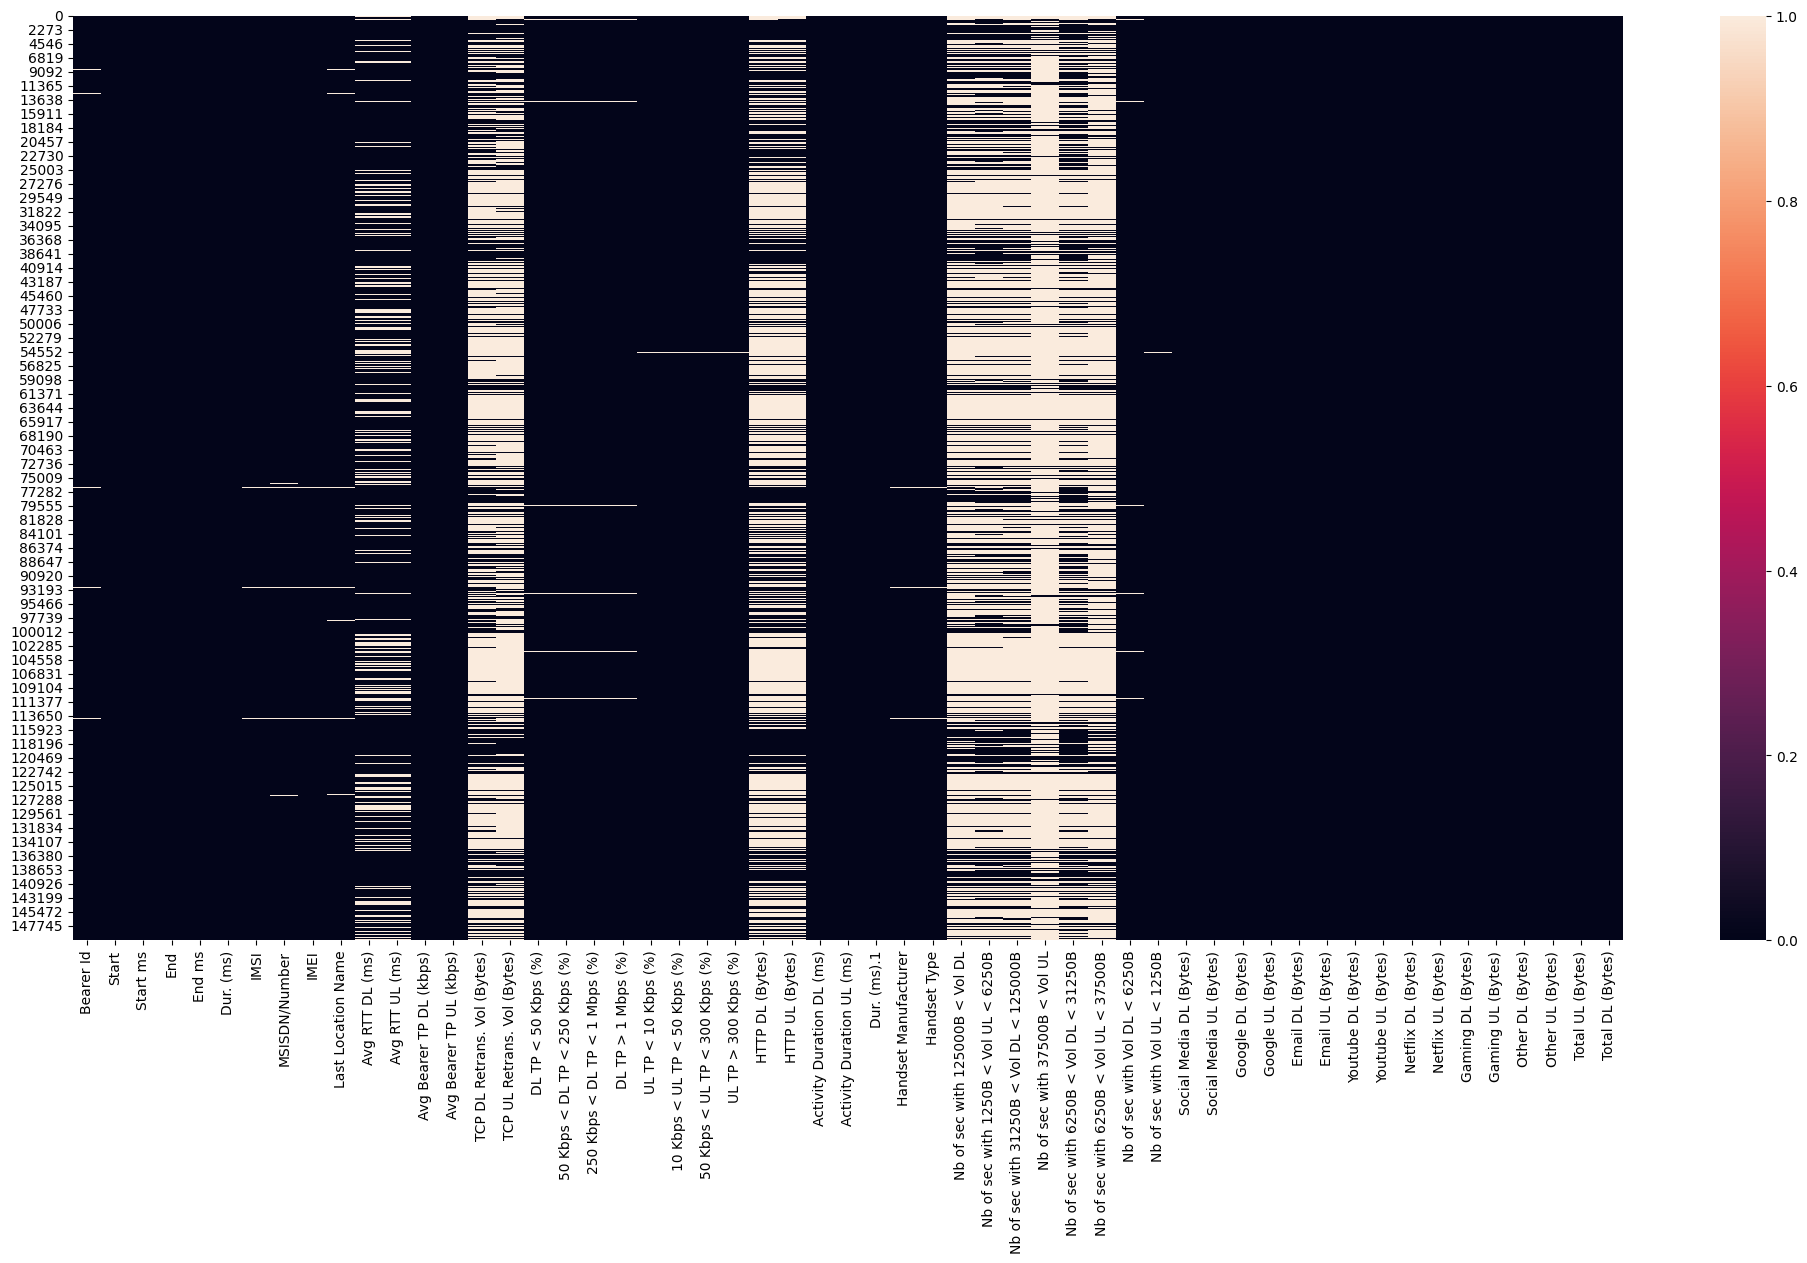

In [11]:
#visulaize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(25,12))
sns.heatmap(data.isnull())
plt.show()

In [23]:
# fill the categorical columns  with the mode
data['Handset Manufacturer'] = data['Handset Manufacturer'].fillna(data['Handset Manufacturer'].mode()[0])
data['Handset Type'] = data['Handset Type'].fillna(data['Handset Type'].mode()[0])
data['Start'] = data['Start'].fillna(data['Start'].mode()[0])
data['End'] = data['End'].fillna(data['End'].mode()[0])
data['End'] = data['End'].fillna(data['End'].mode()[0])
data['Last Location Name'] = data['Last Location Name'].fillna(data['Last Location Name'].mode()[0])


#Filling missing values with mean of corresponding column

data.fillna(data.mean(),inplace = True)


TypeError: Could not convert ['9.16456699548519E+015L77566AD42335AT21824AD88865AT89132C9.16456701058919E+015CELL_208_20_520025_1T42084AL20434CT29911AT21335CD76026BL20434CL20434CT88606BT21481BT72184AD88942CD93750CT29714BL20434CD14033B9.16456701058919E+015T84551AT76876BD11497BD83926CT72910CL77568BT29714BD14000AL16660BT77577BT30020CD78087AD11221BD34244AT86868AD79735AT00750CL72490AD93202AD72939C9.16456701128372E+015T86956AT89969BD94426AD73529CD14236BD72939CT10531CK73601AT73608AT62273BD73588CT21006BL89919CT86956AD84941AT21052AT10556BD72939CT70307AD70484CL11120CL11864BD73388CT72937CD14307CT18291CD14305BT86956AT79919AT10366CL14279BL87568AT21105CL41432BL42405AD73605AL10322BD77586BT42048AT85779AD22667AD14010AD16748CT70307AL10445BD93269AD73529CD92937BD73605AT40222AL73684BD73608BD73605AL76864AT18347BL89085BT48261AD11973CL73529CT19946AT42048AD93675CL76864AD73516AD73552CD15465AT76864BD40108BL14279BL53043AD92928AL13659BD10313CK14291BD11761C9.16456699548518E+015L79699CD16660CD93720BT86956AD78467BL42154AT96034BD96127CT76864BL42065BL41432BD11480A9.16456701374619E+015D78143CD73604CT74426BK11976CL76121CD10023CD73628AD78374AT73522BL76149CT11800AD20630AT76874CD10303AT96034BD73552BD96096AG72351AD74538AG88405AD77586BT85779AT77692BD88770BT77614BT76896CT87664CD33356AD79735AL87871CT79736CL77461BD88691AT73329CL72293BD93381BD72939CT70307AL76667AT34324CT42204BD15231AT85953AD10322CT73550DD92998CT42363AL77577C9.16456699728845E+015T73601BT73550DT73115CL10221DD77577CD77577CD92937AD78143CD10241CD10346AL41414AD12742CT42450AD92954BD73604CL10322CD73552CD21573AD73595BL11897AD73502CD84716CD16179AD92948AD36970CD92954AD73628AL73604BT21295CD11757BD78357CD92954CT48261AD73502AT73683BD10667CD92928AT72261AD77782BD42119BT36970CT33055AD17422CT10966CD22373BD72207BD70228AT42204BT14275AD93721CT51894AL52917CT11284BD11013CD84700BD73604CD42163BD11101BD74670AD79110BT77565BT89855CT71777AT96034BT78653AD15777CD73531BT29801AD93726BT14868AD11816AD16748CL41432BT85775AD78084AD16930AD87678AD40311AD88830AT72389CD72387BD20466BD50128AD14477CD93064BL11000BL11942AT15761AD19946CD14292AL11799AT50006CT88499AT93113BD10322CD73609BT77586CT42605AD42101BL70227AL73529BT85898AT86956AD14160BD17564AD76940CT10006BT92938BT92938BD21059AD42243BD10300BT73571BD14936CT12070AD73550CD89498BL73211AL71740CD12753BD88500BD73569BL10416BD23520CD14171CL92738AD73604CD73565AL92777AD70362CD73670CD94259CL40494AD78084AD52186AD14612AL41377BD21001BL41432BD11000AD10670AD21000AD73900BD73601CL74533BD48263AD10163AD93158CD15744CD42258BD92937BT10543AT42955AL73530BD73542BD78084AT11110BD14868CD73604CT70542BD10417BD42243BD10340AD73502CD11760AT21400CL16728BD15440AL73684BD73655CT76121BL87572AT79806CT79148AL11638BL15065BD74292BL61287CD14889CD11495BD32073AT21286BT88640AD40019BD73309BD10409BL11000AD10584AT77565AT21322BD73655AD12020BD50335BD71728CD78697BT72454AT14154BD78084AD10253AT88782AD42168BT15764CL70465AT83943AT79081AD73603BT14066BD40083CD92998CT42168BD73333CL10423BL10295C9.16456701397479E+015D31435BL00751BD11864CT73548CD73601AT50014BD77577AT92762AD11915AD73601BD11997AD15078CT73683BT84780BT89393BD74548BD73604BD73684AD36342AD88497AG63345BD73543CL16818AT73549CD19457BT19946AT12603AT79078CD19281CT76874CD11960BD73115CD10388CD92954BD42401BD21304AD11912AD70356BCELL_208_20_23022_8786T42101AD93678BL70460AL15462CT93078BD11119AT53354BD71957BD14036AT88830AT53043CT88830AD33814CT92616AD42360BD85750BD42825CT84789AD10322AD53379BD10986BD73601CD10327BD20052AD79161BL10295AT21309CD41377BC70579BT73516BD11879CV77604CU17503CU51842AG94006BG10403CU14476BD87704AD16836CU42605AU22575AG15718AD41377BL16957BL15731CU73560CT11284BG76381AV88381AG79903AT10221AC72330CL10036CD37411BU72318CL14933AU51035AU30015AG52984CG73991A1.5327975494928E+017U71526BD14836AU10011CU72231A8.12221622307593E+016G20218BD41377BT77788CCELL_208_20_501187_4U54300BG12681BG10953AU89931CG10658AD11329BL96522AU50013CU88664AC02949BCELL_208_20_505786_3U89469AT76640CG00438CG21043AU96029CL17137CC19243CT71769CG77284AT87810AG00619BD73529CD73346CU11808BD83980CCELL_208_20_151_19728.12221622307597E+016U94002CD84798AT88739AU76952BG72835AG88167BC70649BU72645AT76743CV89379AD73605AL16251BG72964CG67503AG11955AD73605CG88759ACELL_208_20_500561_8G32486AU79470BD83916AG00874AG86959AT92749AC21360BG01103CT10014CL53132AL16395BL42997AL70067BT50250CT79721BU32615CD77754AD11494CD72721CT89914AD88369CD16410AL76635AD93137AT26848CL40271C9.16456685854234E+015D79717CL15777CD40330CL73502AD85825BG18810AD93184CD71073BV20918BD88484BD86773CT78667BD40643CT94442BG77403AD73531BL42097AD76777CD83896AD41354CD11494BL11528AT71553AL85998AL85998AD51071BD52931CT79137AD15078BD72588AD71737CG92796BL40225AL73115CT42151AC55700AL88983CD15022CT42651AD15960AG10630CD11868AL15721AK10473CL36073CD52535CT88619AD10326BD14279A9.16456701048346E+015D88469AD92712BU14837AD71935CG20985CD87673CD87759BT79608BG20131BD92974CL77463AT14055BD15256BL15241AT70819AD10753CD93241AD12342BD16786AU86687AL11867AL33213AK14666CL10355CG72772CU86800AD74520CT10136BT79603BW93934AT72389CT89191CD10173AD61949AT21309BD11110CD40513CT14825AC83924BD10564CL78244BD83857CD11858CD19947CL11110CD15890CD15890CD42615AD10205AD88942BD42934CD78060AL73561BT85722AD11011BL10002CD93786CD78149CD72977CD79405CD40282CT77197BL10908AD14930CD11220AL14031AD40441CD10574BD79110BD40013CV93184CT52931CL16798AL53523CL10034AD88463CD11797BD62344CD11913AD14312AT88977BD85833BD11759BL77233AT77262AD76122AT85965BL54053BT40281AD71569CL40010AL70092AT85832CD89755CT29796BD15706BT71778AT83888AL14099BD21306BD16743AD16743AL42685BT72935BL42087CC86968BL73501AG11841CT72288BG77471AT72931AD87789CT29847BL29699AD15678AD71618AD78888CL10331BD72946CD88917AT86653CD70077AL72016CD73543AT93588AT76673CL51778AD94340CD92598AD11528BD85931AT93580AD16869CD16869CT78134CD77810AL70881AL50255CT42605AD40374BL14232AD42401BCELL_208_20_502747_1G84817BD11284BU76970ACELL_208_20_229_20028T72980AD71526BL19423CL11105AD30779CD79063BD72396CT88349BL89084BT70356BL74530AT72089BL14339AD42056CU21509BT36763CD93169CT29882CD79085AD14878AD11902CD72851BL89137BD85710AT94460AD71548BD10033BT72389CT92730AL53329BL73557AG00661AL72457CCELL_208_20_9491_11D11880CU83853AD14034AD12762AU89480AL85966BD72861CD87683BT70865AD21000AD10059AD40280BD40013CT93113AD70481AD79598BD74520AT87788CL72326BT83950CT88930BT21607BU10916CD42102BW78075AL14036BD14051BT14056BT21326AD11507AD71641CW77618CL50556CT84754BL53043CD14941BT93123BG62065BD92743CD77754AG78644BL33772CD15961AD50020CT89530AD71073AG87588AT74545BU31370BT71073AT12317BT16251CD53410AL76640ACELL_208_20_20871_64241T40032CT73397CL10430CT79095BD88671AD85684BL72323BD77776AU88602AL11011AD11004AD19946AD72857AD93388BL88679BT76912BL70875BD88704BD33346AT78452BT88449BD71575BG22340AD74303AD21030BT21244AT31736AD79795AT79793BL92833AD92960AD93642CD88835CD78736AD88963AL11997AL88999BD77586BD71564CT72873AD94405AT73075BT84762AL41377BD78888CD78888BD88835BU72288CD16751CD30392AD10036CD33479BD87804BT29995CD93911AG16660CT21813AT73670BG30041AT35282BD64065BG85888AD78794AD30033CD14330CD15069C9.16456698470272E+015G10202AT70820AT70820AD10019CT89325CT73608AD53354BD53354BD12778CL85993BD93675BL76678CD10172CC21829CL11263CD76141AG00122CL70602BD12750CD11978AT93073BU10036BT10396CD86813BD92937BD11627AD87708BL11002BL88983BD11900CD14001BD10109CL62044BD93676BD78742CG14064AD14836CG94374AD89622BD76121AG11464BD11921CG89844BG75248BD23517CD62020CD21564BL42098CT78752CD88492CD88333CD11004BU14891BD77728BD89187AD14873AT71588CT85825AD87702CCELL_208_20_502774_3D73557CD34005AD11108CT79787AD11529AD12091BD14102AL11506BD14130BD14023CD42243CL11002BD40093CL10023CK33213CT76758BD78746CL14118AD53044AD53044AD10417AD14057CT21327BL74528AD73266BD12176BL25023AT88827CD21103BD88458AD18824BT86663CL76667AT76896BT88468BL77618BU96105BT88483AT16829BL89095BD73896CD65167AD93676CT73970BD20180AL10391CL19914CD77147AD70475BL14279BL88995CD10389BD11101AL11906BD19487BD11843AD21289AD84819CD40056CD21001AK36205AD70080AL14155CD89762CD52058AD10957AD36342BD14291AT88606AD70441CL14136AT85997BD79776BD14157AD74540BT83945CD85886BD72077CL10928CD73531AD72854BT54185AT79596CD40998BT21808BT85922AL11942AD72250CD14031BD93806BD11929AL33979CL50128CD83966AD51732B9.16456699518182E+015D14030BL50556CD88345BD40283AD71641CL15813BD79762AL16957BL10909CL16957BU23206AL40242CD87692AD72291AD83925AG61049AD14188BT79628AT88849AD88926BD42098CD16955BD79742AT72909AD40372AD72389BL61949BD93808AT74783BT34364CL72235AL12742AD15849AT77641BD79699AU73607AT16852BT88423CD88507BD10322CT76896CT76896CT78322BL15913AL41353BT21949AT21780CL14069AD21566AD29717BT92804AD92718BT92718BD40370AD84775AG21771BG77469AL77270AT78888BL12312BL42009CD72258BT12840CL54387CD24267BT76896CD93019AD79768BD50709AD78648AG70745AT10571CT10571CT93145CD40329CD18475CD93726AG01100CL10630CD21046AD10166AT85964CD85816AD72162AD72295BD78293BL33797BD93286AG21082BD21522BG20854AU30224BT93145BT78114BL16256BT76930BD79732CT88617BD93238AD14005AD92636AT34194AD78758CD83885BL70465AD21804AD11199BL14293CT70306BT23791CT21035AD76940BT29876BD87718AT93373CT86659CT72955BT18592CD40137AL32892BD78298BCELL_208_20_9283_17D87718AL42636CG21025BT21943AD73655CD72261AD78167CT78182AD10425BD21623BD21595BD85829CD16410AL33979AT93122AC78639CT76887AT72846BD83942CT72997AD93643CT78190CD88703BT21784CD88345CD88345CT88449BL10309CT77812AD77547AD93643CD77778BD72301BD88443AD87789BT21335CD93141CL52926AD21771BT29804BD73333AD92859AD20058BT17786AD70069BD77795CL20279BT79683BU31935AD21286BD21304CT77462BT88724AT85779AD85744AL42236CT88366AG20075CL42951BD72699AT89393BT70473AD88805CD21782AT85838AL70753CD53527BD53527BT78074BD85693C9.1645669848599E+015T29803BL88794BT94467AD23897AT85729AD72881B1.53279754948384E+017L10179BT77692BT73970CT21327AT88990AT21803AD20012BL70086C9.1645670130491E+015T77479AD77678AL70395CU72396BD11497BD36970BG76435CT21328AT70360AD88759AD94364BL78479BT77664BD93798BD71609AD35244AT21242AL70451AD21542BT21329BD79717BD15876AT76614BT73787AD21039CL10344CT18801BD70356BD85774AD79600BT83918AD92606AD93161CT26888BD71346AD10858CT79599CL88706CT72822CD73309BT21230AD93154CL88707CT93038BD77678AT77614BL70227CD20071BD88350BT23773CT88624BD93651CD53524BT77717AT79787CT85855AD44366CT70716AD31171BL77577BL78644CD14171CT42204BD15119BD21033CT78891AD72292BT85700CT89132AL77612AD88805CT88821AT21355AD70704BT93754AD87683BD93579CL30027CD85814BK10401BD70704BD78943BD77716BT76673BL77246AT79718CT79095AD18333AD88406CD79130BD40374BD88893CT83971CT89607BD71567BD72248CT73516CT73516CT85714AL15824BT79754CT86679CD15892BD72396CD93008CT79099AD72316AL40093BT72777AD72388AD10026BD77586AD77756BT79078CL10056AL10642BD88399BD71549BD33655AT79601CD88831BD40117CD70483CD83933AD72172AD72925BT71571CD85775BD18801CL85744AT72392AT72089BT72365AT71408AT85966BD79356CD78742CD78742CD88838AL88347AT74240CU27360BT93796BT92944BD50124AD72953BL89949CT29884BT78666CT23787AD93353BT73360AL77673AL76863AT92698BU29615AC67304AD78994AT85969AU30240CT88832CT76934AT85964BT93706BT85721BT84753AD73333BT21541AL85957BD73394BT85965CD71532AD87738AT41328BL40053CD11018BD74760CL40487AD79128BT71645BD88366AD93579CL77686CD87722AT89158BL14308CT93195CL70881A9.16456701397479E+015T83969CD72213AT74494AT88665AD88373BT73392BD78116AT89806CD21303AT76895CT85863AD93154CT72365AT50250CT85881BD11108BD71589BD93077A9.16456701048935E+015D86684BT72172AD88501BT78692AD79445BD88498BD88835BG79773BD21541CD77750CD88767BD93821CT89370CT77594AD79607BD70789BD79743CT93246AL42609BG77707AL77351CD79699AD29877BL53331BT93775CD77809BD17394BT21327AT70753AT74296BT85908BL70869BL20915CD30849BD71001CD76121AD79593BL77226AD18348BD72351A9.16456701296359E+015D73297BT79120CT85995AT77352AT18592AD93158CT78881CD92683BD36970AL10241BD84719CD87718AD87649CD87702BD14590AD11495BT70451BD73601BT70777BT87664CD31643BD83923CT73074AT88435AD72889BD77160AD88350BD78994AD53335CD21643AD54322CD93250BT83969BT83914AT87762BT70683CT87740AT72314CD78099CT72191CD50555BT76887A9.16456685880014E+015D77351CD92959AD93656AL77686CT79744BD72857AD71532BT85715AD73300AT77462CD70059BD25561CD20248CD10326BT88932CT77605CL72207BT77471AD92949BG14089BD94315BT76930CT79718AT73273BT77718AD73896B9.16456701116877E+015T93672AT78892AT79668AD72351AT29828BT93628AD88936BD72275CD77239AD30387AD93184AD88841CL77686AD71346CD77149AD32505BT83933AT76887AD72961AD21307AT71982BD72942BT92806CD79607AU79212BD78646BD72395CD21289AD10103BT21027AT79387AD88501AD23490AG70925CT83896AT70711CD85837AD19431AD21538AD79757AD93214BD21654BD23124AT88942BT88459BT83877BD30106AT71354AD79765AT92816AT21225BT16267BD73599BT79742AD87887AD93588AD21039CD77222CD21039CD88794BT76923BD14736AD14736AD88345BT89151AD71583AD96057BT89714CD88815AD93696CD21827CT21475CD33356AD70548BT79150CD70472CT88839CD20417BL14178BD94275BL70451CD72388CT85787BT94280BT78452B9.16456701104923E+015L51778AL76646CD93624CT93173CT89615AD85835CT83835CG00826CT29878BL21089CT87683CT71783AT94271BD79085AD78149CL73501AT73683CT93598BT78886AT93579CD93209AT79618CT21319BD77752BD77555AD77531AT83908CT21346CD94458AD88900AT78665BD76750BD77778BL78644AT21588BL87813AT79628BT76614CT21475AT89171BT71631CD93272CT85734BD92602CD78766CL77566BD85844BD79735AD73601AT88811BD78742AT21581AT72979CL77571BT84815CT84815CD34374BT62560CT88975BD77432BL18801BD93174BD88701CD84761AL11110AL85992AD79695AD11040AT88466CD70815AT89665BD72396AD79658AT79727AD85856BD85826AD85826AD28958CD30191CT92734BT77471BD21110CD73242AD21317BD33023CD88443AD93798AT72871BD21797BD72051CT30445AD11794AT88330BD30148CD20268AD70792BD79494CT93641CT79352AT42666CG73075CT89995BT88723AL77697CT77655AT92683CT89995AD70704CD20330AT92850CL29699AD79671CT70306BD21657CL85960BD92911BD76643CT79718AD87678AD14870BD88462BD89741BD93039AD78084CL79734BD74313BD11572AT83953BD42685CL42842AD70787BD88796BT85914AT79064CD83909AD79174BL76748CD70815BD77710CD93268BD74554AT29781BD77413AD10152AT93178AD15091AD70815AD93874BD11464AD12771AD10670AL11464AD42162CL87871CD42162CD89742AT15877CD62501CL42157AL42157AT79596AL16256CD87845AD87845AD21090AD72861BT77183AT72365AL78659BD88332AT93198AD79714AT50252CT72674BD78204AT79110AT77564BL40999CG93437CD21047AT21213AD76990AD93192AT72365CT85969AD88835BD74491BCELL_208_20_501431_1D74293B8.12221624019349E+016D35282BT83945CT88650BT21309CT88747CL77461BL78651AD40999AT88352CD83871AT88877BT71773AT36868AD73297AT84804CT85862AT85802BD92678AD29807AD93522BD89849BT36878AT78140BD79125CD93579CD29745BD87664CD32568CT72352BT41537AD94368CD71404AT89464AT73309CT79057AT94300AD88361AD52931AT85849AD73545B9.16456685919642E+0151.53279754934046E+017D88691AD42236AT21372CT71733AD73405BL70357BT21531AD88770CT76865BU21226BD32505AD73394AD79725CT21806BD88815CT72171AT21382AD93633BT29968BD30101CD92948BD42380CD42173BT79792AD92962BL42164CL53331AD92711AT79757AD88805AD78070AT93644CT25601AD93285CT88598AT85717AT72879BT71782BD72678BD54345BT78144CD85790BL85971AT21466AD15704CD93671CD44028CL40024AL78659CD70751AT16744AD12838CT71607CD21341BT72352BD14010AD94295AD70552CD73309CT85881AD11003BT21263BT21519AD77560BT76470AT74289BT79795CT79622CT88330CD93258CD92606BD87739BD78653BD11221CD11221CT72956AT73886AD72928CT69629CD70800AD22552AD10047BL70448AD89792CT72835AD11041BL10928CT85945BT74307CT79725CD77402AD92647AT78124CT29813CD93280AD23503BD88703CD14007AD10139BT71132CT92617AD93195BD22535CD79146AD93088AT92859BD94275CT73329CT76847CT21222CD77754AD79472BT88423AT00704AD93640BD53006BT73300BT71965AT78322BT73090CT88777AL88775BT88483BT79736AT76896CD77805AD88509BT21545BD92683BV88384BD77756CD11527BT88449BT76896CD88443BD72259BL94377CT72695CL88846BT73348BT85996BD53412AD79712CT29833CD42681AT79099BD40155AD88876BT92714BL85953AD72379BT79057BD72379BD76940BD79728AT79593CT70224BD88509BT76897AT71605CL88846BD25051AL72293BD31468CD73390AL76646BL10659BD21226BT21462AD84816BD73082CL85948CD72946CD21102AD73297BD50022AT77452CD87662AT72199BD87689CD88699CD20269AD74548CT71978BD70226AT71729BD92947CD79598BT87817CT88366BD77147BD42069AD79695CD62558CT88769AD92924AD93676AT85855AT85855AD10436CT85850BT85855AT85922CT78295BD73501BD73501BD70764AD70789AD21332AT85711AD78656AL16362BT94441AT85808AD11508AT21808CT72171AD93013AT88506AD77497AT89177AD85786BT87841AD11529AT73418AT87881AD94453AD85744CD87727AT79602BT76895CT21027AD77771CD50890AD92678BD72856BD29949BT88832CT83921AD34374BD79712BT79102AG22541AT88712CD93673CD52843AD72254AL16258C9.1645670106788E+015D50956CL52928BD10477CT87845AL88753AD77756BD85748CD10409BCELL_208_20_500561_8T62553AT92794BC18447CD10421AD10421AT85706BD50250AT33339BT72881AD88350AD52056CL14771AL11125CD78125CT88840AD70798BD89114AD76771BD72189BD10858AD89643BT76880BL10691CT21220BD72970BD21561BL72051CL70863AD19985BT70472BD88830AT85706CD72877AD70862AT71600BL79743CD84780CT85747BL51004CL77160BT88435CD93357BT29884CD79699CD77255BD78624CT76887AD10037AT88884CT71602AL78134CD92606AG74781CT21805BL76406AD70760AL70855BD88658BD77528CL27367AT21623AD34227CT93056AD88787AL88999BT71738BD93732CT92832AV20716AL77247AD74292BD21535CD53582CL70755BL89136AD79092AD14971AD40643CD40643CD70472BU14053CL92777CD79717CT88821BD79420AD85837AT72942CT21319BD78370CT92956CT79085AT72098AT85876BD83966AD33205AT78442AL77140BU76435CG35216BD73601CD73601CD92675AD25013CD71363AT71347CT88747BG13745AD70861AL14139CL40369AD85744AT74783CD70356BL88347B9.16456699821849E+015T78958AL70881BD88759AT88498BT76755AD78476AL53356BL53356BD21001BD93381BT88726BL53331CD23124CD71554BL42429CD21654BD93868BCELL_208_20_500037_1D93689AD72961AT71613BD72961AD53377CD72361CD72361CD88482AD76696CT73601BD21014AL42123CL74670BD29823BD73530AD79815CD73530AD78994AT83950AL40064AT62553CD72885BT93197BD72312CD78092CT77579AD40333AD77733BT36676AD16663CD42152CD70358BD21325BD72970BD92923CD92954BT73384CD77555CT77686BT77558BD42429CT62594AL41378BL42237CD30667AL42636AT71602AL72058BT72963BL78129AL42258BT85863AT71606CD88393BT79804CT83943CD71973AD71772AD16247CD21533ACELL_208_20_9491_9D77560CL74548BT72821C9.16456701107072E+015T83945AL70854BD79188AT71367AD93890CL78134BD83926AD11401AD72875BD71765CD21288A9.16456685938791E+015D77711BD24267CT85711BL77666CT72193CD92927AT85764AT79603BT87885AT85855BD84798BT74783AD88600AT23989CL72293AT04865CL88347BL88347BD93861AT83975BD77414BT70460BD72336AT21387CD93340CT70804CT88923BD87718AD93721AT21835BL70794BT92854AL78410CT71762AW94471BD77744BD21217BD92786CD21360CD78065AU72399AT92979AT70013AD92970CD21517CT77195BT85990BL92855AU79658CL70393CD21938BT89794CD83933CL88775BL20235CD78360BD94469B9.16456701397479E+015C89366BT88862BL51776BL70855BD79728CT92612AT83950CD50250CL77647AD42014BD42014BT79732CCELL_208_20_9491_111.53279756408461E+017L72586AL77647AL89903CT78974CT74244CT77706AD79769AT70765CD36832BT93605AT85802CT73262AD79760BT14192BD78144ACELL_208_20_505029_2T86661CL52922AD21645BD11051BD16418AD88658AL73211AL70067CD23752AD78744AL15438AD50124BD93159CL70805BL72325AT70808AD11116BT21826CD93711CT21546BD93013AL16395CD21516CT84704AD11531CCELL_208_20_9283_16T21336BD11110BD73609CD21312AT73416CT72423A9.16456699794944E+015D87689BL77584AD16396BD50716AD50716AD78191AD40513BL89910BD11796CT72347BD40664CT85990BT85977AD93579CT88868BT94300BD70046AD85699BD93362BD77514BD78149AL40031BL89094AD18562BD74669CD89778BD42390CD78619AT72262BT77687BT77687BD79717BD78137CD18475CD21532AT78770BD72902AL70084CT78770BT72880CD53172AD42394AT94322CD41011CD28961BT32943BT78884BD79063CD88502CT21399BD88805BD78742CD51899CT76930AD79796CL77718CD11014BT76756CT78062BT88445AT70824CT79491AT93195BT71614CT79493BT85860CT41377AD21326BD88369CC76676BD21318BT26844BT31736AD85797CD11199BT77483CT78886BD42615CL77693BD93588BD33882BL16751CL88977AT85837CL20466CD53534BD70837BD76940CD70635AT79089BD79125CL89085BD88804BT42017CT32510BT42017CL70875CT26838BD14155CT88753AG83976BD78731BD70717BD77716BD93068CD93152AD79405BD88701CD70754BD88379AL72386CT72420AD92992BL10687BL42430BT73482CD78070BT79740CT73785BL88986AD10423CD88484AD35282BD74540BT89952BT72290BD70861BT89087CT86661CT73881BT21309CD77811CT29796AD78416BT89954BT71576AT92618BW89950CT79698AT70897BT92811AU71739CL78065CD41011CL11799AD94410CT85908BD72939CT76756BD11212AT78934AL88865AD34437BD93733BD42025CL78461AW77695AL89903AD88805AT18532AT84669BT29876BL88876CD93184BD42046CT85820CT21354AD18844CD21310AT76673AD76761BD78118AD72963AD72913CL70846AL88865CL78766BD93020AD11284AD11973CL88679AD94380BT88750BD72843BL42951BL42456AL88742CD92968CT88423CG35978BT71663BD42419AD89356AD21326AT88434CD88373AT77423AD93090AD79668BL88974CD88356BT21387BT89794CD11280AD74437CD92623AT18348BD30148AD36970CG77549BT21243AT88816AD93640BL92851BL12802CD72181AD21845BD93798BT18348CC22534AD11962CG11866CT85739AD50128AD10910AD73386AT92842BT72300AT33055BL42951AD79796BD76662BT78638CD73386BD79073BT72334AT72423BD79714AD85744BD10349AD79118BD85936BT94380CT71980BL70753CD78099BD88344CL92813BD88924AD79121BL77791CD14865BT72259CD84719BD30959AD87718AL88794BL77673CT78886AU72925AD21564BD11116CT85715BT88717B9.16456699544422E+015D88776AL78461AD92705BD21317BD21657CT70307AD11803BD41802BD71598CT79727AL77568BD70552CT86654BD88598AL12808AT89903AT79723AT72095CT84755CD10610AD71581CD10313CT29826AD71404AD93579AD70861BL88965CU37167BT52180AL42167CD21229CT88788AT79165B9.16456701058919E+015L10349AD40999CD79085A9.16456701091431E+015L61258CD51901CT18926BT76636CD78766AD92972AD16748CD72853AT78896BT84824CD11280CT21543BD76940BT29803AD77725AD72856BD12616BD88361CT21259AD88361CD72424BT79093CT21319BC77637CL11803CT78624BD11040BD74571BD93782CD94349BT88859AD26827AT85855BD29973AD85700CL11847AT85747CT72862AD18347AD76648CD71951AD11507AD50548CD83909CD84765BT78689AV20716AD18844CL96215AT21386BT87733AT93680AD85723CT85723BT85800BL31576BT79596CD85750BD15465CD78452AD71543CD93676BL74530AT78938BT89936A9.16456701104052E+015D73606AD73606AD79757AD70401CT71347BT88712CT88347AD11531BD78994CD14175CD93171BT76499CD50255CL11116AD85837AD89792B9.16456685880142E+015D21541AT72916CT79610BT85727AD77542AL76784AT72215AT73211AD21296CD72254BT84791AT88330CT85859CD21039AT88753AT21006CT72886AD72301AD11480AD94315AD70704BL70854BD78888CT88967AT78420CD93169CT29747CL78286AT29714CT70804AD10238CT34324CD89114AT21631CT21631CD10238CT73350AT79389AT92725AD11252AL88794BL77148BT85833BT17786AD88607AT93122AT87841AT78934BT12841BD70751CD72963AT73781AT71612BL71740BD87648BT76661AT78068AD79161AD37592BD42012CL11785AD10023AD88710BT21295CT72670AL92731AD85774BT84661AD72773AD85840CL77681AD29835BT89325CD88980B9.16456701111195E+015D72946AD85833BT19934ACELL_208_20_500485_2T71706BD77925AD93174BD78648BL21632A9.16456701116545E+015L89910CT88674AD78089CD79130BD42047CD77542CD76772BD30094BD79174CL42018CD73556B9.16456699508813E+015D94364BD21110CD30031CD85905BL92544AD79768BC88808CD10718A8.12221622150307E+016T77809BD77754AD11041BD77195CD77744CD72288AT78488CD92921AD21030BT77733CD72259BL77616AT21079AT79492CT76735BD71640CT76914AD52555BD72913CT87756AL88775BT21048AT73846AT29891AD29966CD72913BG00272BD79760BD71559BU71658BT87687BD21030BT85810CD78888CT76773BD79174AT23082AL89174AD21462BD33346CD88766CW92590AT42555CT79370CD88486CD87673AD21090AD72351AL89903AL70361CD92914CT78690BL14061AT87740AT70870BT71602AT70895AD72928CD72425BT93254AD77810AT42204BD10305AT79086BT83965AD77810AD84579AT79059AT73352BD78149BD93643AL70080BT88711AT79095BT72420AT85711AL70080BT89085CD72428AD88805AT73900AL18801CD92628CD88605BT85904BL72025CT86661BD94380BG23217BD79695CD34437CD88900AD93786CT94346CT77426AD79356CT85950BL88979AD79702CT88711BD72387CD88774CT78934BD79765CT79738CG74626BD21224BD72934CT21535AD72008CD72008CD21527BD70628CD83909AT29826AW62032CD74293BD70475BD78630AD21329AD78744BD71564AD24279BD71564AD93251AD77712AL30377AT71608AD87867AT72191BL10389BD51034BL72388BD21286AT72699AT76894AT21222CT76865CD42630BT86654BT87791AL78460AD33022AT79716BL10630AT21099BL77686AL77686AD21229BG35196AD73684CD21654AT21786BD93814BT72305BT88620CD14008CD87650CT88329CD11802BL16247BT72963BT71606CD29823AT79625AT83919CCELL_208_20_542986_8D71780BT79366BD72231CT35812BD93244AT87890AL77671CL77463BD15139BD73303AD11199CT78296AD77531BD88398CD93184BD41368CD93205AD72673BT70750AD37411AT71602AD88703CT21359AL85954CD94413CD83915CD77755BD93709CL77574BT73284AD62025BD21046BT93291BD88924AT21261BD77479AL70855BD35241BT88752BD79592CD84566AD21084AT89116BD89738AD93676BD19947CD72934AD21329AL42018AD11460BD88805CD94305AD92927BT78495CL88979CT89738AD88707CL88357AT87871AD42368CT85803AT79731BT72668BD87702BD14393AL29699AD74266BD88973BT26841AD78137CD96090CT72099AD88356AT85785BL84533AT72937CT71376BD79080AD72939BD21938BT93243BD94319CD77716AD85762BT32892AT85964BD42262AT78442AT89193BT83945AT94300AD88941BD11818AT93127BT21813BD21027AT92945AD93169CD71666AD93192AT85787BT76635CD87738BL88966AT26838BD89166BD77811CT93111BP88615AD28958BT73412AT21329BL85992CT29892AT88717BD93792BD14151CD10232BT71375BD12851CD72375CD85967AL77673AL42224BT78683CD85835AD93579CT76746C9.16456685880014E+015T78938BD21583AD89612BD88492BD88886AD74540CU73471AT92969CT76797AD79757AT84703CT70717BD92859BT29864CL92801BT21353AT89773BD84641BT84708BD37573CD93373BD92648AL89903CD79125BT10438CD19934AD15231AD88696AL87661BD72295AL77718AT21545CT92961AT77549CT73352CD77756BD77232BD93077AT73241AD73516AD77140BD93690AT78487BD78888CT72164AD87702BD71697CD88424CT21079AD70819BL70858AD50132AD85700BT78314BL14138AT85697AD88501CL92618AD79073BT71350AD74786AD89988BT93373CT21328AT33055BD72677CD42632AT72999AT21309BD26850AD71003CD88345AT77614AT79800BT72214BD72388AD76853CD89622BT92749AT21048AT29828CT93763AD53205CT77211AD13654A9.16456701134439E+015T92691BT84764AD61150CD21557AD93209AD92968CD40596AD78686BD88409BT88711BD26850CT72879CT21381BL94338AD21544BT23773BT85709CT78437AT78771AT14184CT10473CD72172CT83957BL11460AT93337AL51062CT29714BT70897BD93020BD92970CD93840BT71571CD89643BT79765BD78943AD21351BT89927BD70760AT76894AT88628CT88447AL77140BT74426AT73336BT88747BD94458AT86662CL85707AT88971AD87831AL40281CT77614AT79815BD70628AD88980CT93254AL42154AT71606CD70793CU42260AT85785BD21789CT77462BT79351BD93627AT78764BD78731BD94315CD85876BL77718AD92709BL10139BT85703AT85953AD71404AD79072AD93154AT77452CT85819AL77160AD73211AT85972BL86666AD83824AT70458BD72259BT78321BL76855AT79754AG32431BT92649BT93127BD93285BT85964CD93301BT21793CD93712CD88804AT50128CT88798BV36857BD85838CG72656BT42157AT42157AT71735CD21000AD83851BD21518CT88788AT88711BT73244AT78166CT93707CD11116AT71954BT92632AD21517CT18484AT88342CD93020CT73472BD22511CT10366CT79368AT70710BD94437AD78122AD89879AD79718CG10011AD72857BT73348BT88478BD77495AD77749BT21470AT74426AT83929BD79696CD93354AD77147AD50547CT70715BD21841CD21841CT21354AD76750CD93225AD88350AT79373CD76940AD40672BT78894CD88331BD77678AT18552AL76654BT93250BD73984AD92683AT76877CT78654BD93567CG18810AT71599BT79754CD70888AD30227BD71939AD21939CL10224CT72909AT42363AD32505BD84779BT71975CL85992AL85971AD88332BD93163BD72172AD50504AT21210CD18347AD10913AT88867AT93190AD85825AT84724AT86678AT21031BD14162AD14162AD83930BD73552CT78285BT76644BD74571AD88895AD71935CD76771BD79728AT70458BT78892BL85974BD94296AT92953CL73115CD88900AT85727AT72965BT76614CD21520AD78744BT18515AT77574AT73784AD79156AL72386BT79724AD13076CD32568AD29449AT88694CL88742BD14180CT78754CT78725AD79718BD61039BT21037BD93672AD94212AD85834AD79732AT21530AL21429AD78726AT71367BD71576AD10393BT78683BD92943BT89113CD79068BD70472AT78732BT86659CD21307AD79479CD11947AT72164BL88864AD50250BT71575BD71073AT88919AT76887AL10595AD32073AT18500CD85833CT92677AD72312CD21338CT79058BT73455CD71099CL42009BL24270AT70872BT74783AD93656BT04865CD73390AG20031BT85697CT93018CT93107BD21090CD16247AD51097AT79352AD36970AD53132BT53334BD88388AD78620CD92675AL85957BD93579AT74491CD78652CL78458BD77546CD44028CD73300AD94437AD77147BT89952CT77718AD70629AT79776AT93309BD21337CD72232BD88430BD88347AT42654CT73360AT78454BT83914CD93202AD48263CT86661AD88702BD78144CD11851CD72851CD88782AT85983AD78758BD70188CL77718AD88805CD71009BG00502CT83918CT16827AT16827AT21381AD73300AD21526CD21070BD88398AD92969BD72908CT76876CT88705AD73564CD85735BD92957CT89611BD21651CT21566BD72262BD92778CT78958AT71955BD15531CL78481CD79710AD89111BD89111BT76633AD24066AT92623CT21573CT70369CT89741AT28959CD53565AL88977BT76680CL77673AL16253AD73169BD72672AD77442AD72884BT21551BL30179BD48263BD70801AD21360AD14717BT21830CD77703BL72293AD11507AD77250AT79697BD88915A8.12221622097876E+016D72939CD93184CT21346CD93184CD88846AT87702BT16912AL70869BD72970AD87831CT72862CD87831CT79772AD11329BT77711BD93628BT72901AD71543AD43555CD88486CD84719AT70306BD70227CT71073AT79159CD70358BT85957BL89137AD93192AT23786BD78726CT83975BL14343AD40513BD21785AD73405AD21329BT94407CD78943CD93169CL42154CL42154CT21006BG74609CD93269CT21471AD72933BD71382BD79742BD48320AD92675AD61340BD93137AD74293AT77151AT79705BD77464AT29840BD10446CD15815BD88815BT92982BD93286BT21395BD72881BT78640BD72674AU93100AL73594BT62046CT79389CT79918BD71780BCELL_208_20_9491_10L14168AD88782AT70707CT93952BD92927BD73628AD73628AD93064BL11458CL78644BD16257CD21067CT71724AD11800BD93721AL85744AD21183AL11906AT87885CL18844BK73601CD79767BT73548CT73548CT92916BT85702AD70472BD21826BD71770BD21197CD92963CD14172CD14172CT96552BD85880AD14031BD41367BD41367BD41367BD10322BD16957CT83931CD18333AD13131CL72058CD79766BD73543AU11850AT88830AD15463CD15463CD88753AD73224AD73224AT42236CT42236CT62292CT19914BD42025CL92854BL92854BD79604CT83942BU19158AL73595AL73595AD53334BD21646CD20309CT79671AD12021AD40333CD40333CK61949CD92937AD78180AT93547AD92937AD11532AL73684BD78149CD92954AD92954AL14035AL14035AL52796CD73628CD73628CT10322AT12835CD83909CD15884CD15884CD34453CL42002BT14330BD73603CD14680CD14680CD77577CT77614CD73543AD73543AD70867BD92921BW88709AL11915BC93096CL88981CD40283BD40283BL76743BL76743BT42204BD92969CL86671CL86671CL61388CT73516BT73516BL14345CL14345CD21229BD92992CD85853AD14136AL14172AG14292CD77577CD70358CG52382CL10044BD73588BT72932BG11101CD51102AW14015AL14307CL14307CD10036BD42334AD42334AD53376CU31953BL18939AL77571BD15512BL85992CT72636AD78078BG78889BL14180CD92924AL92695AL92695AT40216AT88844CD10753CD34491AD21329AD14139AD14139AD14889CD10166CD48263BL94377CT88903AT88903AT88753AD14305BT10337CD87670AT83966CD50555AD50555AD72968AL11121AL11121AT88834AD14066AT92911AL70482AD16251BD73609BD53510AD53510AD73609BD71391CD71391CD40999AD73571CD15887AD15887AD21317BT70366BD70789CL42090AG94271CD42404BD42404BD42263AD42263AT52043AT36983CL70088CD73601CT52105CT79059AL89095BD94410AT74665BW11827CD14182CD85750CT31334BT42659CT41502AL72051BL72051BG50250BL73684AT40461CD40458AL70083BT11745BT11745BD21939AD21939AD34383AD93430AD12711BD12711BD79698CD79698CT21838AT21838AT52918CD11013CT52918CT84788BT84788BD19281BL10216CL10216CT92916BL77571BD41414BL53410BL53410BL62414AD12727BD12727BG92974BD10346AD73546AT76882CT76882CT77491BD21839AU10166CD21839AD12717CD73608CD50548AD50548AT70877AD11851CG88408AL54053BG89603AD11497BD14159CD29832CD79698AD52527CD19440AD42462BL11000BD73605CD73605CD14934AL10316BL10316BD40056BT16252AT16252AD14475AD19464AD19464AT42165CL12776BL61943BL85993BT73601CT73601CD14282AD50046AD50046AD10469CD10469CG29958AD71346CD14282AD74792AD73550AD73550AT16827BT16827BD72262BD53511CD53511CL10045BD11002AL77270AD72903BD14101BD11968BT89810BD11011BT73601CD41377BD77232BD77232BD73684AT50555BT50555BD14039AD11961AT16869AT16869AD14163CD40043BD11008CD93013BD93013BT72907AT50013CT50013CD92948CT42635AT42635AD74554AD74554AT85711AD14308CD73604CL11978AD62025BD42083AD42228AU21838CD73396BG31483CD73609CD76141AT73135BD76141AD30104BD41414BD14172BD11252AD10054BD10054BD87954CD33845CL77567CG00417BU14192CD40013BD40013BT83955BD42084AD92937BT51899CL88910CL88910CD88614AD61760CG78340AU42927AT10469BT10469BD40621AK12741BD10628AL14001AD21292AD21292AD72253BL11110CL11110CG33878AL42405CD50716AD50716AT93012AL10389AD88796CD73601BD50127BD42357AL78479BD93726CL50124CD50127BD14036CD14282AL77664AL77664AL52579BL52579BL10042BD85790CT70481BD85790CL42048CL42048CD10721CD10656CD10656CD10721CD70227CL77567CD62202CD73211AD78653AD78653AD41410AD16136CD16136CT85913CL77618AT73601BL15370CL15370CD93750AD14308CD73628CL10411AL10411AT17502AL41414CL41414CD73655AT79666BU77881BD89894BD93749CD89894BD93749CD21812BD21812BT73602AL42616CD93577BD40013BD76766CG83924BD93020BD93020BL74571BD72312BD72312BL77577CD10948BD77220AD92931BL11792BL11120CD79593AL11792BD21800AD21800AT72835AL85796BD15379BD15379BCELL_208_20_20101_20098G52528BT93644AT93644A9.16456701236506E+015D48263AD73605BD61337BL73599CD61337BL73599CG21016AT76121BD36970CD36970CD50127BD50127BT42009CD79964BT40064BD85724CT11460AD73607BD73608AD14198AD14198AD77716AL73684AG74294AD73604BT76678CT76678CD41377BT73601CD11904CD11904CD15777CT74524CD72668BT74524CT00704AD85830CL74571AL74571AT42636CD14887BD14887BT42636CD16179AL31424AD50551CD92937AT29910CD10233CL54387BT42651AD14132AD21083AD51034AD51034AD36970CD33654AT23756BD11460AD11460AD14187AT10114BD12111AD12111AT88952BD13769BD13769BU17597AC29886C9.16456699728845E+015T89389CT73571BD70862AT23898CD92824CL14008CL14008CL10529BL10529BG16771BD74540BD74540BT18291AL42774AC11001CD73559A9.16456699500672E+015D73559A9.16456699500672E+015L11011AD14004CD14004CL11011AL10041AL10986CL16717CT73572CD15234CD15234CD15896CD73608BD71382AD21310BD21310BD12773BT50027AD85762CD85762CL42233CD18824AD21302BD70799BD70799BT92990AD11947BD10222BL73502CD40370BD40370BD15114AD15114BD73554AD17950BCELL_208_20_541272_6L10315AD10543AD78755BD72397BD42368AT70184CD41307BD41307BD52938AD73386BD73386BU21105AG15347BT11864CD41377BD74544AG22341BD40031AD40031AD61706CT29850AD10383CD10383CD15081AT10854BL14281CT52984CT52984CL94377CL10053BD42382BD94423BD10458CD15732AD15732AL53510AG83821BD70481BT89900BD42228CD52793CD52793CD77529BL74551CD19464CD14142CL73604BL85998AU14004CD10326BT71777AD14182CD92974BT40329CT40329CL96836BL96836BD93752BD93752BD40064CD40064CD10627AD72933AL10389CD14025CD16179CD92614CD92614CD00750BD33339BD79068AD79068AD73313AD73313AL42649AL42649AL50250BL50250BG20547BL42014AL42014AD62455CL53406AL53406AL52056BD85823CT62050CL86666BD10575BD10575BL10632CD88476AD41377BG21266AL73608CT92738CD11855AD11855AL10937AL10937AD42087CD42087CD51001CT93151BD51001CT77256AT79383AD23517AD83841BL10425AL10425AD78149AD78149AT78974BT78974BT93807AD50956CD50956CU17648BD41377BD19440AL40329CL40329CD73588CU51069CL72014BU85786CD50334BD11119AW92930AG12129CD40458AD40458AT73522CD78777AD78777AT36964CD50314BD52041BT14134BT14134BL15243AG92930AL11015AD21313CD15796CD14036AD40329BD40329BD10303CD10303CG73782BL54296CL54296CU14118AD72851CD72851CG92928AG33394BD10541AD10541AD70717BD70717BL32099AD92937AD19464CD19464CU73224CD88735BD88735BD72334BD72334BT72925CW77662BT72925CD78105AD50704AT88457BD50023CD73571CD50023CD10938BD42191AD42191AL96691AL96691AD40329AD40329AT52917AD10909AD10909AG01372AL41340AL11968AL40024BL40024BT52945CT88966CT76882CD34374BD10390AD34374BT73564BT71990BL10018BD14256AL10397BL10397BT52183BD15839BD15839BD11284BD11284BL53410BL53410BD16843CD10331CD10331CD74303BD40009C9.16456698563635E+015L12018CT83870CD11494BD41377BD17422CT93255BT14330CT23435BD96079AT73531AD73562CL14152CL14152CD73605BL52253BL52253BD96120BD88708AD96120BD20642BD10686AL11018AD14936AU92978CD70362AD70603CG88662AD93583BD16247CD42462AD42462AG01118CL73561CD15896BD11878BD73684BD11284AD11284AD53056CD88489CD74292CT62013CG14184BD14477CD14477CG76775CT92938BC72301AD15153AD15153AD74520BD73297CD14172BD14172BT88782AL88742BL77577AD92992AD79718CL10209AL10209AT12846AG35610CD93070CD87702BL10416BD11677AD92974AV93862C9.16456698470272E+0159.16456698470272E+015D16247CT89117AT10691AT10691AT88894AT88894AL78134CD36863AT73550DT73550DL10932BD10209AD52056AL20343B9.16456701221556E+015T73683CT14066CT14066CT79675AT79675AT21303AD36342AD93704AD36970CT14760BD50155BD50155BT83975CD14275AD21059AD21059AD11829AU94429CG83919CL11003AD21156AD74534AD74534AD14035BD14035BD51033BD10531CL85992BT41427AD15209CD15209CD88462AD15753BT11119BT11119BD35893BT92762CD42671BL42161CD93851AD93851AD14160AD12720BD12720BD11572AT73550DL42017AL72075CG62449AD30079AD52058CT12002CD12193CD12193CD12193CD11879CD11879CL40370AL11889CD93303CL73609CL73609C9.16456699823565E+015L73115AL72396CL11983AD36342CD33346AC05685AD79903CG86771BD77782BD73565AT73115CD12829BD61335BD61335BD21059CD19947CT11252CL77160BT85764CT42102BD92631AD36653BD11013AD11013AU29835AD15712CD15712CD92937AL51891AU12802AD92924AT92928CD11824AD11824AD92943BT83835AD87759BG32731AT83835AD87759BT88709BT88709BT10909CD10678BD72878CD14198AL10670BL10670BD13659BL20271CD13659BD72189BL15731CL15731CT53335AD12317CD50552BD73608CD73608CL40056AD14887AD21837BD21837BD21552AD73605CD12737AL10318CT14162AT94409BD74506BD73501AL72657CD16258BL72657CD10044AD10044AT12057CT12057CT93584BD00750CD77767BD77767BT36970CT93912BT76882BD73559CD11280BD65208C8.1222162223586E+016D79719AL10608AD14225BD14225BT50556BT50556BL10608AD15739CT51877BD85877BL12323AT73605BT92629AT72198AT72198AU86698AD73605AD84700BT72341CL22349AD11506CD11506CT10258AD16258AU31442CL42636BD93100AD88387AT15887BD10446CD30281CD10399AD74533BD40013CD73603AT14218BG71614AL85838AL85838AD11280AG10279CD85827CD15503BD85827CD92969BD41377BT34491CD73548CL72325AD73548CL72325AL10322BT70717BD70094CD70094CL10045AD72376CT50002BD53410BD53410BT23764BT76854CD11508BD11508BT78314BT92981AD14157BL11855AL11855AD84526BD10464BD10464BL10109BD96090AD73595BT79823AL14279BT79823AL14008AD52917AT88864AD12077AD15218CD15218CT15512CD10525AD10525AD51097CL15243CD51097CL15243CL41390CD53331AT50157AT70092CD19281CT70715CD14301BT69511BT69511B9.1645669972823E+015D36358CD11108CD11108CD14340CL11745AL11745AD16351CL10026BT15256AD19946AD41377BT50006C9.1645669862423E+015L92552CT92930BD14008AT78314AD41377BD88759CL10435BD14265CD93750CD50816BG16957CL12767AD62537BT88949AK14330BK14330BD29831CD85748CD85796AD15073CD33877BL73529CT76861BT76861BD10377AD10377AD38529AD10302BD38529AD77577C8.12221622261716E+016L42102BL42102BT41328BD96057AL73531BL73531BL70087CD92939CD11997AL73557CD11997AD92954BD21839AD30058AL15856AL11960BT92908AT92908AL11960BD79194AD74791CT70083BL70084CL70084CD40329CD11962CD11962CD19445AD19445AT85898AT10697CL10688CD20951BT77186AT93701AD11284BD93834BT40521AT89608BL73608CG77297CL73608CL77589AL77589AT92928CD93733BD93733BU40365BD12762BL77605CD93039CD52985BD29832CD79757AG27494AD79757AT37822CT37822CD72792BL10322CD72792BV92986AG72610AL73516BD41377BD74561BD74561BD14576AD14576AL79699AT70753CT70753CD11116AD73628AT11013AD73628AL42224AL42224AD10600BD92963CT41356BD16744BT71587CD92928AD14187AD14187AT71587CD76473CD18801BD78144CD73531AT71370CT71370CD15788CD74530AD74530AT74538BD11223B9.16456699728845E+015D10172CG12809CD53356BD79167CT77982CD41436BL11002AT86676BD89196BD10054BD36970CD36970CD14475AT70453BD73546BD77529AT72875BD10529BD10529BT79073BD79668CD93158CL41432BD15078BD21303AD73604BT79394BD15224CD21294CD21294CT79732BT15877CD14781AD96107AD96107AU12735BT50505CD11791BD93672CL29742CG00619BD73552CD11108AD11108AT92938BD41377BD79439AT10011AD13947CT73970BT73970BD78887AD78887AD73601CL72264AD61072CL16253AT92916AC16446AD33209CL15776AL15776AD79743CD78882BD92992BD54346BD73588CL10166BL10166BD93712BD93712BD93373AT73605CD70357CV77680CD11802CD11802CD76027BL53524BL53524BD41377BG93350BL11221AD92937AD92937AL70602AL73900AL73900AT73601CL10025CL10025CL77270AD73547CD70775CT14113CT61278BL11794AL11794AD40046AL76855AD40046AT92938CT92938CT17003AD70481BD15877AT50014BU74417AT88486BT33833AG29964CV92928AL73603CD14006BD14006BD12762BD73534CG11268CT42395CT42395CD93011CD51744BD14160AT71607BL12742CD10616CD73546AL11638BL14036BL74548BD85699CL16418AL16418AL72323BT78683CL42233CT73130AD85844CD85844CL42233CD53142BT36888BD94464AD40064AT11003BT26883CT11003BT52922BT92943AD16875CL73604BD11014AD50815AD50815AT92899CL85966BD40013BD73546AT79344BT96362BT40445BD10571CD10571CL73604BT11284BT73601CD87684BD11116CD11638CD11638CD20597BD20597BL76864AD52922CD42084BC89185AG40227CD29717BT79918BD11800AD10316CD10316CD33209CD11572BT87817BD15052CD77705AD51776BT10551BT10551BD77752BD21770AD77577AD64003AG10418BD31498AD79121CD84700B9.16456701234561E+0159.16456701234561E+015D92992CL62594BD88502CD76940CT93267BT16829BT16829BD52058A9.1645669862423E+0159.1645669862423E+015U73698BT70084AD32130BL40295AD70475AD42151BD42151BT85796CU14198AL73556AL42161AD40311AD15809CD15809CL14171CL77667BT73683BT73683BD92954CD42006CL15824CL15824CT76388CD94055BD73609BT42386BT42386BD71562BT10166AT10166AD74006CD14192AL40009BG79295CD88741AD16247CL11968AU40329BT73543CD50555BD50555BD10923BD10923BD14035AD74540BD14878AD92589BD35200CD35289AD10674AT21577BD92937BD78755AD78755AD41377BD21516BL73599CL77522AL77522AT10571AT10571AT35200AT35200AD11009AT14279AT14279AL70471CD70549CD14187AL15440AL15440AT35776BL73211AD73531AD33881BD33881BT16787CD16695AD73608CL14019CL77160BD73609AD15241BD16398AD16398AD72491BD72491BD10384BD89888AD10384BCELL_208_20_20041_6321L16957BT42009BT42009BD12741AD12741AD10136CD10136CT11531BD12757AL42009BL42009BD79753AD12764BL86666BD10584AD78167AT85717CD92928CD41377BD96037BT21283BD93720BT21283BD76473BD76473BD70370CG35585AT73683CD10631CD15253BL73531AD73604CT73556AD73529BT73788BT71768BT71768BD73546AD73546AL72379CD70084CL94377CD73566CT21016AD73566CD16660CG24361CD83895CD83895CD73608BD79730BD79730BD73608BT71777AT70665CD14307CL42774CD72903BT11944AD14009CD14891AL77464BL77464BD87685AD87685AT10504AW40043A9.164566985995E+015L50543CL73604BD62027CD53539BD53539BD74540BD42025CL10928BD40216CL10928BL85681CL88983BD83841BD78726CD78726CD11957BD93624AD92631AT89169AD73333CD10390CT25562BD86966BD86966BD53574AL10034BD77577CL16258CT72363AL14159BL14159BD64073B9.16456698623181E+015T19259AG53359CD17339BD17339BL42283AD70867BL76855AV77991AD51891BV14137AD41377BD76940AD92909BL52977BL52977BG10294CL73211AT88438CD72301BD21326AD15038BL73900AT21786AG79067BT14192BT11872AG72348BL12342BL11901BL11901BG89984A9.16456701107072E+015G21246AD94423BD93382AD93158CT21541AT10199CD72453CD88409BCELL_208_20_505029_0D40664CD42013CT79800B9.16456698616217E+015D10349BD40013BD10384BD10384BD73684BD73684BL14138AU50150AD10175BU53299AL21429AT42393BT42393BT78129AT78129AL73670CT77565BT19188AL10011AT10853AD10448CD84788BD50541AT11014AL73115AT88676CT62803AL19423CD92937AL40043AL53410BL73115CL93139CL93139CD93818BD93818BD73534BD92911AT10944CT72198AL10944AD21296CD21296CC93727BD14312AD73603BD92963CD51829AD92963AT73683CD93911AD93911AD92963BD21535CL73557AL10179CT20117BT20117BD77522AT22382CT22382CL41490B9.16456698549376E+015U18291AD10661CT88162CD92914AD72387BT71570BD62016AT92931CL10568BL73670AD10050AT70897BT70897BU15246BL62048BT73588BD15331AD93902CD20971BG21391CT78653AD11107CD89833BD11849CD11849CD50019CD92950AT62113CD92948BD92948BD53354BD14008BD11816CD14008BL51899BL51899BD79400BT70481BD10314AT85734CD79796CL70083BD12153BL88937BT50555BD50832AD50832AT74222BD85700CD93720BD74526BD93202AD74526BD42243CL89979BCELL_208_20_505786_5D10026BD41377BT96096CD11018BU16745AL73670CD79730CD73609A9.16456698564019E+0159.16456698564019E+015L96481AU64430BL42066BD93678AD93786BD93786BL70863AT42363AD23219AG32426CD79177BD79177BD85774AC86763AD40071AD40071AT42236CU15091AD15982BD15982BD93909BT72572BD79161CL73684BD40329AT53205BD74545BD74545BL12720CL42009CD51907AD11109BD50012BT42616BT42616BG84792AT73601BD14971CT89911A9.16456699728845E+015D92924BG86882BD77577CD73609BD93675AD93675AL10045BD15849AD73552CD16252BD61945BL12776BD38529BT88192CD10033BT42210AD15445CD15445CG01230CCELL_208_20_20071_1513T70225BD52610CD11978AL92801CD15531CG72872CD14226BD14226BT84734CD50017AD11890BT96034BL72748AD92948CT70067AT70067AD74530CD10560AD10560AD92954BD16748CC42798AL51824AD19470CC55289AD15798BD15798BD71662AL73502BD70084CD71662AL73115CT92611CD11064CD33255BL11974AD92954AL11974AD12750CL10391BT42210AD11506AD11506AL89910CL89910CD73551BU74639CD21782AD41377BT70204BT70204BD23817AD42223CT73601BD42223CD83836AL41502AD73604CG87681AT11110BD10387AD41358CG00735CD73605AD10441CL42360AD54267AL10063BD54267AD73594BD41432BD41377BD93100AD79161AT93761BD93584CD73604CD16251BD79400CL10036AL73684BD14477CD61166CD40633BL72016CL72016CD73531CT72452CT78410CD11113AD88804CT40374BT77545AT36674AD85698BL10109AL10109AD92974CD92974CD21046CD21046CT71562BD15731CD15731CL76864CL76864CD14025CL72383CD11983CD50556BD50556BT88949CD78116AD77359BD93902BD93577BT93234AT93234AL53565CD10379CL10327BL10327BD11284AL89085AL10476BD92948CD92948CT52815CD11738CD33790BG15997BD40374CD40108BD73609CT85775AD15241BL72006CD72157CD12502BT77712CT77712CT83955AU79966BL15815AL15815AD92974AD41377BT50541CD40073AD40073AT72423CT62429AD79147AD79147AL72379CD41377BD12727CD12727CD29845BT84785CT84785CT84785C9.16456699821824E+015D21330AD10314AD88443CD88443CL16834AL10224AD70717BD15706AG23294AT50334BT50334BD15706BD87570BT42173AD10545BT70743BCELL_208_20_501646_1D88630AT11968AD14136BD21288CT92928CT79081AD92974BD92974BD73571CD10542AD10542AD41377BD14105BD14105BL20642CL20642CT50013CT50013CD53056CD79707AL11889CT89129BD53135BT93244AT93244AD11008CT18291AL96085CT18291AD23764BD88394CT21380BD78105BD15809BD15809BD41377BL10416BD10029BD40013AT70397CT41410AD61156BL40000AD73605AD77463AL73516CT85970BD73437CD73437CT76864BD78653CD87684BD73604CD73604CD11497CD72260BD72260BG71601BL73900CL73900CU40028BCELL_208_20_502787_0L70587CD83980AL72586BD83980AT72865CT52922CT12747BD15224CT73211BD77423CD78149AT70023AD10571CL53510AL53510AD41377BT50541CL12342BT77586CT77586CD53356BD11797BT18291AD11902CT10128AD41331CT10014AT10014AD15792AD15792AD76149CL77522AD15769CD15769CT89147CD83905CD23518AD83902CD33255BD73588BD93013CT76923BL42227CD15438AD00704AL11221CD74543BL73502AD10387AD10387AT22203AT14066CD19441AD93675AL14281CT94350CT94350CD37414AD37414AT42520AT88875CT79594BD54280CT42520AT72845AT33048CG36597AD50555CT12500AD72671BD50555CD18818CD74561BT10150CD52928AD52928AT92899CD18818CD35200AT40461CD93244BL77577AD79616AD20297AL11938AD13131CL10691CL11781AL16258CL16258CD83907CT51894AT51894AL11938AD92948CT76667CT77566BD77774CD10584AT15256CD73608BD40271CU21632BL10694AT10670AL76123AL77463AL87572AT72525CD41358BD62049BD10854AU29543BT16351BT73559CD79167AT72184BT93685BL10303AT88944AG70672CD10436BD35995AD35995AD14933AD10008CD73546AT29840BD48263CT42064CD21606CT85980BL11903CD93099CD79702AT76882BD83887BD76940CD21303CD72387BD37816BT62261BT93445CL14099CD54500BD76123AD73604CT73601BL16794AD93671BT85898AT40329AT40329AD40618CG00727CT50555CD32971CD10571AD12020CD10571AD12020CD10114BL62013BL72051BL77633AG79707AG94042AT43611BT29964CD71714BD73692AL96063BL96063BD72275AD87856BL15871BD70481BD14307AT83913AT21831BG72433AD93678BD78467CD70799BL42429CD42356BD88458CD14933AD21304AD14999CD11763AD14116CD16492BD15567BD88492CT73096AT93020AL42417AD42417AD11837CT93762AD12735CD73546AD72827AD85796CD72827AT10389AD73588BD73603BL42087CT40120BL30102AT72951AL73502AD10033BCELL_208_20_520166_1T41379BL21089CL21089CT29767BT29767BT41379BT11014AD20630AT93229AG21798AD85707BD85707BT72387BT72387BD73609BD72026CD29998BT29964CD29998BL72396BT83950CL73531AT92916BG00430BL54300CD88399BD70481BT78958BD92974BT42371BD10166AT21770CT79106BT79106BG79629BD35200BU87527BCELL_208_20_603728_15L70884CD93824CD93824CT77114CT74222BT21273AD92914CT79153CD70862AT21221CT71596CD73588BU79824AL30048BD73605BL40202BD14945CL10340BD72376CL10128CL10128CC93237AL77664BT42169CD10107BT73605AD21283BT83948BT83948BD78881AD21283BT78895AL40494AT87938BL11947AL11947AL10239BD16698CD77738AG79645AD73569AD77733BD77733BU10331BU42223BL15091BT21527BT21527BD78767AD10180BD10180BD11507AD12792AD78065CD78065CD93011CD74530CT77616AD51775AD92963CD74533BT73683BT21336BT21336BL73516CT42546BD73684AL77664AL76748CT62803CD71031CT62032CL40445BL11506CU40083AL11506CT50555CL12819CT21298BT72532BL51008BT74792CD77577AC13568BD10439AD10362CT87798CD10185BD70481BD77529AD92970CT78385CT76000CT76000CL10322CD36198BD36198BL52056BT79062CD72389AD33743BL73684BU11458CL51069BT89760BT89760BD44144CL11834AD87684BT51005AG20067AT51005AD10303CD10303CD96079AT16957BT16957BL77151AD92954AT92993CL11627BT16248BT73601BT73601BD12317BL11962AT93298BG71580AD12042BG52690CT40049BD15215AD21325BT76864BD10597BD79194CT72161AL11494AT11978AD79188BU10586BL72003BL77626CD16747AD16747AT11921BL70882AT76882BL10365CD42381CD73599AD73599AD42381CU93108BD93792BT76855AL10753BL73502BL73501CL73501CT11797BT11797BT76883BD42556AD16765BD42556AD16765BL14031BD73604CD73604CT15633BG22667BD76940CD76940CL61008AT11014AD83933BD11506BD40470CL50005AD42419BD42419BG69682CT18484CD79167AD93104AD14297CT62261BL00749AD50014CD93357CD50014CT12835CD83824BD83824BD21519AT88758AD41377BD92943CD78087AT85711AD78087AG21521AD78693AU92850CD74524CD79802AL13654BT12057CT12057CD42084CD42084CT79668CL33376AD14223AD14223AD23747BD11329AD84627AD17422CT10465AL10306AD42404CT42528BD78105BT71989AT10013AT10013AT88739BD17394BD73601CD17394BD52215CT23311CD88379AL36198CL40080AL40080AD85796BD42380BD33217CL11460AD42260AD42260AT70823CT70823CT73437AL41436BD15962BD21841BT31921AT31921AD70888CD70888CL42909AD36342CD11834CD11834C9.16456699728845E+015C53086CT93189AT93189AD41358CD93137AT51906AT51906AD79717BD79717BL33979AT50555BCELL_208_20_9491_10D19464AD93792BD93792BD14010BL14298BL14307AT40043AL14307AL42636CL42636CL14298BD15073CD15073CD72213C9.16456698626944E+015T73115CL10061BT73115CD85726CD74525BT16398AD93574BT72198AD79072AT23787AU95780BD62594AL77593AL77593AT88203CD16362AD93142CD93142CL16718A9.1645670138427E+015D26843AD13020AD17950BD15721AD15721AD40441CD10314AD10314AG00143AL11748AD73608CT76847BT76847BD41377BT78081CL10334BD42283AD93013CT89751AG93231AT73604CT11929AT11929AT88499AD15822AL77647AD93013AD22511CT79909CD72028AD53507AD74558AT77563AD29845CT88353AD41377BD93748CT79099AD73569AD18818AL10119CT93113BD42049C8.12221622353444E+016D33979AD92998BCELL_208_20_501487_6D34437CT83975CD21318CL10179CD93202AD96057BL74529AL74529AT29883BT70092CT70092CL19440CT93835BT83950AD10429CD41377BL10688CL42338AD51776CD33784BD50915CT70542BL42426BD74544BD74544BD88900AL88999AD70063AD14116CD41377BD10959AL73543CT42204BT42204BD14022AG70551CT73573BT73573B8.12221622124448E+016D92948CD92948CD93310AD72496BT74247AD10616CL73684BL73684BD73603BT42204BT71978CD10696BL40263CT53205BT86670BD73588AD73588AD92974BT70602AD70703BD73502AD92651AD93750CU42882AL72748AT76852AT21286BL10661AC21852BT14008CD72380BL11572BL30358AL72248BG74195AT85735AD79768BL73115CT76857BT86667AD85710CD73588AL50127BL50127BL10389CT72184BT72184BT93706CT23764BT50815AD89753AD89753AD52985CD52985CT77114CD71748BL10012AL10012AD88696AT16496BL15725AD73604CT73602CT70864CT92762CD11498AD15320AG92978BD12604CD70481BD92928AD92928AD14156AD12829CT73605AT88424BT29947AD85736BD73609CD14101CT92930AT92930AD77700CD78098AD78098AD73565AD30432BT77618CD87661AT89376AL10445AD50548CD88332BT50084AG34396BD42173AD16247AD89131BD20100BD20100BT83913AT83913A8.1222162255005E+016L16251AL16251AT79078B8.12221622511831E+016D35282CD35282CD73601BD12750CL79490BL79490BD94405CT89903BD40046BT21102AL74538AD35200BD35200BD15038CD15038CD24520AD21770CD16267CT79098BT93105CD92881AT42283BD50555AD50555AD14307CT11841BD70018AD70018AD21522CG30445CL73556AT78282AT79711AD88759AT79592CT71528AD15076BD15076BD62061BD62061BL70882AD29514AL50977AD11119AC73493CT21026CD73608BT21026CCELL_208_20_520168_2D10915AG42026AL10915AD70481BD11010CD74540BL73684AT85956AD41377BD12427AT71606AD77541AD79167CD21046AL14309CL40263CT74543BD42391BD93483AD93483AD79757AD51058AD51058AD92943CD85886BD85886BD73597C8.12221622084776E+016D21000AD21000AD86796CD12030BT53190BT53190BD72298AT92599CD93179AD93179AT42605AT21370CD10518CD10518CD48263BD92928AD85698BD72259CD72259CD20312BT11121AT11121AD11101BD11101BL73529CL72383BT51788CG89207BT77632BT22586AD10300AD23575CT83971AD15997AG73300BD72021CD36876BD36876BL88381BT62201CD73571BD00704AT21210AD15719AD42157CD37567AD42157CD73542BG78076BT18565AT76777BT76777BL50977AD21295CD10034AD11110BL85986BD11110AD71562CT14330BD14275BD85790AD85790AD73115AD73115AD94413CD94413CD15805AT42204BT00750CD11805CD10127BD73601CT71128BD14034CD92928BCELL_208_20_20712_62388D94410CCELL_208_20_9491_10D42671BD42671BD83911CD10350AT73604CD10350AT73604CD14760CD14760CL85992AD41377B9.16456698576179E+015D14023C9.16456698576179E+015L42154AT78112CD92914CU73558AD41377BD10178AL85966BD21304AD53571CD51054AD41377BD93695AL15233BD10194CD14163BL11015AT51824AD51004AD15401BD14163BT17527BL10214BU40445CD10231BD73609BD12721CG22255AL73683BT20154BL72383CL16258AL16258AD92631CD93808AT88171CT88171CD33038AD29966BD93301BD40410CD74536AD93840AD93840AD11879CD11879CL62453BD74609CT53205BT26834AD40019BL18581AT29821CT30727CD93671CL52954BT85740BG76919AD12377CT14173CT14173CT10012BD10023BD10023BD21296BD94465AL76024CG88795CT72964AT10005BL22577AD79670AD83930CD70069AD10907CD41377BL52985BL52985BD50153CL10908AT10908AD77248AD15224AG72895AD21133CD21133CT88878AT88878AD42382BL40618AG72359AT73601AL96384CT12863AT21169BT76667CT76667CD72388CD73543BT42459CD73543BL11889CT83977AD14305AT89711BT20297CT20297CT85790AD11800AT28958BL73557CL88981BL15835CL96105AL96105AD61152BT14180CT14180CL11859BD74559BG72754CD74561BL11507BD11011AG70124BT14332CT14332CD41377BG74238BT92816BD73569BD88347BD11492AT11913AL72024BL16660BT92630CK14291BG21446AD74292BD37829BT73551AL70066AD11805CL70066AL88699AL15134BD42152BD14295AT79733CT79733CG79064CD11110BD11793CT72251AL77577AT70869BL11497BD52645BL93139CD78972BD41377BCELL_208_20_506424_3L40379BK30510CD61350AD11102CD11102CT14051CD32979AL77685BC73465BD57005CD57005CD42681AD42681AU93475BD96379AT73601CD78098BD78098BD14333CU79930BD88924AT79095BD74506AD14152CD42125CT50256CD14307CD10639CD10639CD96114BT36653BD52796BD10915BD10915BL14173AD73655BL12006AL12006AT10319CD89734CT42902CT77739AD52796BD48263C9.16456698549299E+0159.16456698500147E+015D77361BD77361BD10426CG71547BL16793CT88716CT85905CT11043AT78475AD73548BD42630BL70752AD42630BD89561BD89561BD72769BD42630BD92937AL14733CT12742BD50987CL15843AL15843AT73516CT93578CT33661BT73516CD78150AD73297AD10330AD12184BD72066CT73597CD10399AD96057AD96057AD42387BD78097BD72863CT72893CD93583CD11974CD79094CD54379CL15887BD54379CL15887BL42159CD72923AL20067CL20067CD72923AD92948CD21332AT86956AT79718AD12750CD88361AD70791CD78144CD71780BD71780BL42774AL10630BT77710BL10630BT42204BL11936CL77654AD15239BT73090BT73090BD15239BD93003BU42405CD73605BL10670AL40006BL10670AL40006BD73605BD10215CD10215CT85732BT21472CD29817CT74538AT79604AT73522CT79604AG23592CD76000CL92762BD78145CD78145CL72459BT15717BD40347BL11845BD88710BD10694AD15256AD15256AD92948AD40458CT48263CD85677BT41502CD93627CT12720CD53530AL74538AT78489AG76393AT14025CD14947BT73604BT92695AT92695AT40028CT72808CT10697CL51034BT12600CL50256CD79796CT21335CL73608BL73608BD93202AD15218BD70441AD22257AD10245CD17950BD21000CG84882BU50153AK10314CD76849BD92928CD70273AL14308CL16258CT88351BT73601CT73601CD93902CL70753CT73096BT20154BD73561BU93435AT19477AD41377BD77577AD72950AT61038BL73211AL73211AT88965CD70385BD70548BT88486CD89515AD89515AD40998BD42462AT11263CT11263CD10477BT73596AD52528CT89117BT87556BT87556BL76675CT50155BD92948AL77616BD11936BU79292AD79767BD79767BL42520AD70837BD79751CT73213BT50704AD73605AD41377BL40000AD74315BD74315BD21629BD51792BD16136CD16136CD12776AD73609AD73609AL15091CT88364CD92950AU21939AG86909BT71494AL77705AG61081BT40258AD84521BL16410AL16410AL73604BT41383CD50807AD92948BD41377BD14576CD93670AL10162BD74695CT50155BT88493AT61878BT61878BD62348BD73605AD16905CD11834AD10245CD50172CL12723AL42158AL42158AL51813BD73605BT40359AL20125CL76141AD76429CL10105AD76429CD14340CD14340CT88637BD70356BG20357AG84850CL11955CL11955CD10042AD83905AL15633BD76027AL89903BD78105A9.16456698530842E+015D21565AD40040BT73522CD21313BD72877CD72877CD17573AT77560CD17573AD40040CT53535AT16748AT41356CT78122BT52528BT52528BD72482AT78888CT78888CD71543CT93843CL10969BT11761BL10969BD92974BT86660BL42951AT11761BT89192BT14478BT92631AL42951AT40000BD11109BL79903BL40006BD14292AL51006AL40006BL40006BL51006AG20190AD79359AD79359AD15073CL14246AD11978AD20862CD73531AL40225CT73601CD73531AD72251AD50128CD11014BD13131AD41377BT22532CL25043BV72077BU11982BD92948CD94338BT74292BD71772AC77757CD73501AD21156AT73601CT73601CL72024AD92974CD92974CG72353CD10044BD79670CD14884CG51301CL11950AT21245AD50124BD72316CT83880CD73560AL11572BG72876CD16663AD72316CT74292BD11084CD93752AD93752AL11900CL11900CD72323AD12779BT73560CD94464CD73604CT10666AT10666AL72396CL73608BD53142BD40314BD40314BD14297BT88751CD93676AD73502CG14105AL40365BD73309CD93055CL12155AL12155AT61038BL73607BD93695BD93695BD73569CD40441CD73550AT83835CG88693AD94350BD52056BD52056BL92752BD11852BT85747AD74554AT73541CD79407BT14275AD42391BD42391BG89468AL33973CD16247CD16247CT92744CG28967BD20365AD12154AD32664CD10036CD79094CT85733CU11936CD93868AT89745BL40629AT10236CL10224AL10224AT79122AL11761CL10014AU87818AD13076BD76645AT40032BD41377BD11002BD52526CT20262AT20262AU50015A9.16456701221556E+015L10042BT10303AT10303AD10300BT22532CT20375CD93902CT10413AT11912CD83907CD72253BD78073AD37816BD37816BD72251AL74520AT88432CL88864AD65167CD53334CC42321AL88775BD15209AT72903BT72903BT78087BL42426BL42426BD94020AL72325AD41377BL12007BD15704BD74534BD92588B9.16456701104922E+015G72795BD88400BD14393ACELL_208_20_9491_9D14393ACELL_208_20_9491_9U11864AD10809AD40117CD21314AD93934CD53406BD72438AD33209CT10367BT51732CD70385BD11011AD88709AD73684BT88854AU79725CD73573AD73573BU93515AG00567CD10541CD10541CG85842AD92914CL74669BD11903BL30020AL30020AD92970CU10303CG72785CT73115CT73115CL10036CT21309CG87562BL53335BT21309CL73501CL70083BD77239AD77239AD14986BD15997AG83866CD74506BD74506BG89653CT42546CT92728CT92728CC88325CD86682BG73448CT54053BD78256AT93055BD21292AD21292AT21370CD61272BT61095AD88770CD15339CL89085CT11913AG21683CL14949CD53331BCELL_208_20_20281_24507T15246BD23466BT88603BT88603B9.16456699728845E+0159.16456699728845E+015D10381AD26847AD93019AD21288BL73115AL42237BT93838CD40999CT51710BD93676AD93676AD61058AG10960CT93807ACELL_208_20_501445_5L72323DD42101BD92974CD11744CD11744CD15798BT10114BT72194AT72194AD10667CD25561CD25141AD77703CT70453BT70453BC11560BD79194AT19441AD10261AD10261AD61163AD14188AT88632AT40618BD11947BG50907BG74424AD41417CU22791AL10018BD96070CL40365BL40365BT89517CT89517CU40494CT10344BT10344BD12091CD10410CT88878BT88878BL54306CL54306CD21306CL42393B8.12221624033766E+016G62353CT73522CL73569BD15887BT42165CD11125BD11125BT73571BD10429CD21292AT88453BL14275CG11649AL14275CT73556AD76088CD23897CL10042BL10042BD11100BD11100BD11084AT76149CT76149CL42065BL42543CD41377BL14295CD94282CD14146BD14146BT88707BL31829CU21061A8.12221622518368E+016D84528AT70694AT72422AD54379CD88706CD41377BD88706CL92855BL41503CD76782BT79743CD72260CD41377BT88998AD87862BT15016CT15016CD85695BD73601CL10597AL10597AD11003AL11110BT94332AU70881AL11110BL42046CL42046CG33905BD72856AT85768CD50002AD50002AD87569AT88243BD11009BT72392AD53526AL96529BL96529BT74280CL53520AG88380CT94464CT94464CV92974CD50335CG13590CT83856BT42096CT89903AT42096CD96127CD73599BD36970CD14275AD42681AD41377BD15897AD92948AT83969CT92938BD14036CT20932BD10054BD10054BT89378AD78143CD78143CD11866BG78149BT96096CD21012CD93064BT92938B9.16456685881063E+015D20308BG10423BL14293AL14293AD76026CD14008CG88367AD50716AD50716AL33048BL10322CL10322CD73529CD73529CC84598AD88477CD92928AD73602AT83971AL14307CD51108CT72829CT85695CD40328AD25021AD25021AL17634BT21079A9.164566985963E+0159.164566985963E+015T10677BG88447AT10677BD10473CD77774BD77774BD40283CD10390AT88750AL70078AT50554AD86990AD11508BL15897BL73604BT10313BD20339BL73556BL70084CD70484CG10013BD70481AD70481AL10453BD50124AT88972AV85744BL42627BD16418CD51136AL15897BT50335CT73487AL15243AT73601BT30376CT30376CD92914CD40793BD73684BU10333AT79700AD15796CD15796CD73115AD73115AD78105AD78105AT11912BT54282CT54282CT70084BT52550AD72248BD72248BD16787CD16787CL15986CT11000BD14282AT84631AT84631AG20961BD21011AD50335AT12714CT12714CD93750AD12185CD12185CL42191CL42191CD73552BG73247AD93163BD51062AL86666BL70083BD34374CD16253AD41377BT77566AT78089CL10913AD41377BT21520CC12658BT14340AT77566AD14129AG14008AT88777BT11009BL15270AD61328CD70482BD73628AD93008AT88455CG72961AT14308CL11709CD71779BT52053AD88406BT10447CD74538AL73604AU77556AT51801CT10199CT70885CT73601CT71748BD87699AD87699AT62101AD12856AD12856AT41502AD13131CD92937BD21312AD21312AD79944CD79944CD78882AD78882AD19464CL14099CL15320AU54291BT88916CD70357CL10018AT73573BD25131AL72066CL88699AD51113AL88699AD41377BD11010CG85898AD11460AD73554BT79463CD83909BL21210A9.16456698599501E+015L73608BL73608BD10333AT89087CT21291BT21291BT20932CL33775BT42204BT92762AT42064CD12779BL40077BL15518BL15518BD41377BL14868AG78753BD41377BT93670AD15303BD10302CL11638BT37571AL41387BT53168CD21110CD14130CL50334AD92969CD92969CD11779AD11779AT92928CT92981CL16362BT41379BT41379BG17898CL77667CT11108CT54343AD70273AT12747BT12747BCELL_208_20_603815_11D12509CC03769CD73571CD73571CL14771AD11492AL41414BL41414BT86654AL70227BD35839BD10023AL41390BL70227BD42382AD83926CCELL_208_20_20811_62877D21542AD52526CT88725BT88725BL13651BD50703BD16843CD74533AL42381CD10061AD14947BD20252AL33784BD37822CC55410CT72021BL42157AL10018AT22338AD10658AD10658AD72396CD11958BD72304AD10630AD14183AD52796BT14164BG74313BL86657CT11125AT83830BD35200CL41368CT37822CL11952CL11952CD61761BT41069BT41069BG21125AD11981CD14771BL73304BD88399BD83966BD61039BD83966BL70357BT42902CT14307BL77589A8.12221622353466E+016D86919CD92912BD92928AD92911BD71567AL72323DT88339BD40117CD21296CT14557CT14557CCELL_208_20_505029_0L42939CL42939CL14020BG29751BL14279AL14279AD10260CT78437BD87498AD12003CD79356BD10260CD79356BD12003CL77567BD83925BT72386AT72386AL73608CD93740BD70273AG12603BD14301CD79815BD92644AL76122AT37822CT42204BT42204BD72950AD13659BT85701AT12842BT12842BT85701AD72386BD72386BD93683AD93820CD21822AT61884BT73683BT73683BT20681CL40053AL40053AT10444BT73601BT94198AL40581CL72326BD70357AT72326BD10535BT71727AL89094CT62292CL10314AD88484CT72452CD94469BT21030AD92689AD74419CD72025CL15518AD16252AD16252AT53135CD14280BT53135CG29840BD52061CT21993CT21993CU71515CD36342BT79161BL70389BT73548CL35812BD10322AL74506BD73554BL52018CD37827BD10572BD89740CD10412AG21194BG83966BD15347CD15347CL40283AD10572BT83956BD10333AG72433AT10642BT73601BT73601BL50020BD14069CT61943CD40049BG00205BL78486AD14882CD14882CD21337BL77649BC92929AC94206CT93117BT85703BT53354BT53354BD50250AT70021CT70021CT79774AD50250AL76640AT11402CD92973CL14945AD92928AD14279AD70356CL73684AD35926BD35926BL73684AT73602CD10630AT71656BD73573BT92813CT92813CD93089BU15203AD50128CD74792CD31093BT70472BL72193CD78097BT76864BD11848CD73280AD61950BD83980BG71543BT79668CD18291AL42097AD33038CT48263CL87845BD10365BT36665AG84971CT78072CT78072CD11464AD73554BT29955AT70448AD73554BT21218AL53561CL14906AL21647BL42901BD79194BD73531AD73531AD40064CD73605AD79194CT85769BT85769BD52093BD52093BU11797CCELL_208_20_523807_8T83908CD78145AD93708BD94273AD88707CT78467CT78467CD10333BT92923AT73601CT73601CD53205BD73605AT92636CL73670AD13987BD70066AT86658AD14007CD14007CD16945AD36970BD10619AD74558CG74313AD10231AD70481BC76751CD70481BG73846CD40222AW76884AL11006CT11800AL78461CT74303BD74670AT11284BL77351AG88712BD14292CD14292CD42774AD42774AD38529AG69769BL40664CL40664CD19466AD19466AT72949CCELL_208_20_20171_14236L92850AL92850AG86974AD73565BT10376A9.16456699821824E+015T29997AT83931CD73549BD10533AT97761BL42393AD73543AD73543AD14146AL89085CD54291CD73549BD78615BD14771AU10051AG84707CD93909BL74506BT87817BD88943AG79712CG93138AD14025CD14025CG29823BD92950AD92950AD21306CG73793CCELL_208_20_502278_8D53507AD93726BD93726BCELL_208_20_20281_28712D19464BD19464BD14241BD85724CD19157AD19157AT15155BT88691CT88691CD94340CD12737CD41377BD84775CT40998CU21987CD92969BD72765BD14152CG13632BCELL_208_20_501487_6CELL_208_20_501487_6L10355AL41414BD10131AD10131AD10329BD10329BL14933AT78183BD52938AT20375CD35200CD35200AD35200CD35200AD88216AD51760AT23563BT23563BL78486AT42654BT50335AL14198B9.16456699821849E+015D19922AD73628BD73604CT71006BD93671AD73684AD40328AD14036AT11760AD73684AT14893BT11760AD62592CT79752AL40329AL40329AT73308AT73308AL41414CD42048AC85938CD70516AD70516AD50017BD73605BD93141CU79068BD53331AT83851B9.16456699728845E+015L70885AT92990AD14039AG53410CL72452BD11101AD78105AT85702AT52004AD92653AD93029BG72756BT10042BD93720CD50552BT50552BT74549CD92613BT83955BD93285CD73602AT16179CD11220CT73550DG52023BL77744CG72835CD71958AT83950CT83950CV76895AD12503BT84582BT84582BL40295BD92943BD42243BD42243BD27362AL10559AT71393BT15511CG62294BD11101BD21297BD21297BL16898BD14293AD40370BD10404AD40370BD72872BD88673CD93042AD42379AT88429BD42025CT13659BD53190BT85702AT85702AD88486CD50866AD78105AL77572AD14576AT33216BT52018BD15720CL42064CD88644BL42064CD73502CD10575CD21046CL15788BL15788BL15199AL15199AD93752BT21593AL61058CT76654CD48263AL40581CD48263AT79382BD50704AD11460CT51065AD16873BL10322BD61278CD88906AT11120BD92998CD53334BD20971BD92716BD92716BD15706CT73516BT73516BD77171AG20864CT19426CL53335AD41377BD53527CD53527CD61350BD72852BT21102BD41377BL93337CG79110AL11100AL11100AL42154CD85699CD73628BD41377BD83949CD12317AD83949CD12317AL42124AD41377BD79287AD16418AD12584AD12584AL11847CL11847CT40038CT40038CD34251AD21306C9.16456701048346E+015D10441AT72166CL14760BL79699AD10529BT10470CT10470CV89799BD11531CD54183CD92948AD92948AT72901CCELL_208_20_501769_6CELL_208_20_501769_6G74498CD88463BT51899CT51899CL74506BD12450AT76677BT53168AT16247AL92762AL92762AD73534CD73534CD41377BT15929AT15929AD41377BD21807BD11802CT18818CT18818CD12486AU35219AD72395AT31503AT74520CT42169AT42169AT72812AG14030BL20170AL20170AD74256BT79150BL10918BD21770CD21770CD10192CD10192CD52954CD52954CD40216AD11120BD11120BL14036CG14060AL14307CT70866BL50543AL50543AT12717BG00706BL73684BD72051CD72051CD73604CT21169BT29813CD92954CD10986CCELL_208_20_229_36771D72330BD12865BG35225CD73516CW94295CT88900BC88935AD10318AD10318AL72019AD62369AL72019AD14001CL72792BT15027BD40043AD51058AD72452BG88508CD72026BT72457AD41493BD41493BD72008CD42009BT72026BD72388CT10966AT72194BT72194BG74115BD11983CD73565AL11819BD88357AD79717BT42204BT42204BT23776AD29816BT42645AT42645AL76864AD62802BD70067BT87903BD73605CD10362CD10224CD85748AD86726AD86726AD23993AD74791CT88460BT71115AG17422CT72077BT72077BD92937BD92937BD65165AT93130CL14241AL14241AD88389AT72326BT72004CD15398CU42047BD15398CL62025BD12185BT76882BT72326BCELL_208_20_502343_1D15398CT42659AT42659AT79059AD41377BD40059AD41377BD40059AL10527AT42928BD88906AC13839CD11102BD11102BD72453CD72453CD54312CG89113BL89123CL89123CT26830BL85710AD73531CD73588CT14132BT53544BD22203BD73604BT70888CT70888CCELL_208_20_603815_11CELL_208_20_603815_11D42096BG79211BT72323BT71637AT93795BT21006BT70858AD15828AD88363BD15828AT77695AD73597CD73597CT29883BL84543BL72221BD79110BD53410BD16748CT70472BT72026CT70472BL72383CD71555BL42233BD73549CL42233BD71555BD33839BD93708BT10222CT87896BG12601CT29877BD29877BK11976CD11938CD11938CL72249BL72249BL11507BD11113BG50876BL72026CD16818CD12302CL72014CD51001CD51001CD71626BD78105BD52923BT11266CG21298BT83966CD40222AT62014CL73608CD16256AD50128AD88980AD12774CD12774CD85790AD85790AL61988BT19426CT79129BD93869CD74266BD74266BD93678BT87847BG56747C9.16456698599501E+015D36205AT40329CD41377BT14342CT41356BD96156BD96156BD11837AD73169BT62115CD85710CT79351BL72461BD85710CT21808AL70444BD50977BD65320AT10353BD65320AD23294CD21331AT88489CT89879CD10691BD10691BD77463BD12728AD77463BD12728AT14301AL70227CD79741BL15819AD88485CD10422BT89671CT21311AD77710CT73560CD77489BD12002CT53582AT53582AD92914CT84660CT84660CT71117CD15085BD10042BT76884BT76884BD73604CD14836CD14836CW71418AL72051AT92616AD85756AD85756AD54500CD16663CT89650AD93039CD72483BG78374CD14732AD14875BL85796CD77724CL72008BT88656AL40283AC92551BL85956CD70362BD73609BD85723CD85723CD10349AD15824CD89756BD89756BD16843CU21219BG69568BT21835AD12188CL11110BT54266CL42636AT54266CD88331AT74545CL74528AD40999CT88337BD19426CT73604CD10625BD73565AD73565AD88900AD73609AD51001BL88995CL11792BD54291BL11000AU52690CT21538AD10471BL15727CL11000AT21538AL15727CT21335BL11745BL11773AD23435CD79698BT73683BT73683BG14322BL15518AT92942BD42065AD42014BD15445BD15445BD10404AT88329AG35233CD19946CL11890BT87817CL70875AL73516CG77994BD21314CL74554BD92566BL74554BD93704AD36358CD52215AD11829AD88216AD88831CL15819AC89913A8.12221622124094E+016T88381AT42237CD73565BT41353AD14336B9.16456701397479E+015T26884BL73684AL70409CD42096AD93798BC71349AT89914CT92963CG14163CD74331AD50876CD21286CD21286CD41377BD73603CD77577CL14771AL14771AD10383CC37124AD40521BT88744BT88744BD73628CL73557BD70772BD70772BD12867AD12867AD51054CD42263AD42379BD51054C9.16456699728845E+015L50255CD42846AT50314AD14310BD12750CD74511AG88330BL11460AL15567CD83915AD88443CD78620CT15463AD62025AL53570CD10369AL73501BL73501BD10393CT11847CT11847CT12826CT12826CD12758AD10918AD62496BD41377BL88381BD10918A9.16456685955073E+015D21067CD79932BD10404CL16943BT21407BT16136AT92850BD88481BT16136AD70021CD52840CD52840CT94361BT10042BL78605AD70481AD10986CT71567BG71580CD73564CD14034ACELL_208_20_502747_0D70799A1.532797549632E+017D70799AD50987CD50987CD71569AD89111AD41377BT88995AD88192AT26834AD79400CD77623BG11884AG88333CD30309AD74538AG62353BD41377BD42252CD74538A9.16456699538406E+015D85796BD77772AD35200BD18926BD79357CD73601BD92948AD20117AT70481BT70481BL96144AD74665CL77693BT15218CD94463AU88332CL88965BD83905CD83905CL88965BD16247CD16247CD79418BD21306BD21306BT53529BD79418BL78605AD33371CT92928AT85922CD71583AD21939AD21939AG73257CT10428AD16871CD16871CD21215BD88408CD93480CG21770BT79374BD10719CD10719CD93869CW72291BT62215AG88714AD72872AD13020AT77664BD71598AD78211BD21039CT88376AD21812CD77577BL85994BD61976CD61976CL73608AT51011AT89134CL77567CT51011AL73900AL11848BD11011AL41414CD79763BL11018AG70786AD54315AU21837AD94318AL70849BD94318AD85748CD70358BL54282CD16909AL76855AL42368AL42368AD16817C9.1645669972823E+0159.1645669972823E+015L72004AL72004CD73604AD73604AT15957AD11760AT61278BL42673BD14770AD87615AD87615AD15849CD42097BD92645AD42097BD73588BD41377BCELL_208_20_20811_61283T73601BD10676BT73601BD93571AD93571AD15876BD15876BL85796BL73604BL73604BT89144AL42102BL73684AD16247BD10423AT70881BL10314CD73597BL72028CD41377BG14100CD70228BV26859AT73605CT93189BD96073AD96073AT92698BL96105AD16248CD78078AD74681AD92924AL73211BD92935CD92924AD33256AD92935CK73601BK73601BD92954CT21513CT21513CT84631CT84631CT73548CT18801BD11464AD29832AD29832AT10258AD11978AD21286BT83848AT83848AT70844CL10948AD10322BD13451AL40225CD14275AT74475BD72220CD72220CD16970AD53142AD41377BD54132AD74538BT21348AD61388BD10305BD41377BD52215BD73980AL12003AD93752BL12003AD85723CT16765CD12763CD93677BD93677BD70862AG92978CL70455CD65320BT42231BD42261CG10310BT40056CD10036AD10036AD73557BD73557BD32105BL51034CL51034CT42233B9.16456699783065E+015T61155BT61155BC76681AL88981BL73501BL73501BD11899AD11899AT74543CT74543CL70587CT88732AD53510AD53510AG88420AD73562AD70302AD70302AT85887AT85887AD51891CD51891CD33209C9.16456699744409E+015D77744CU51014AD78070BT70517BD53043CU72418CT18939CL12745CT11043AV93125BT92711CL16251BL10352CT92711CT70789BD14301BT70789BD77415CL73437CD14136BD15206CD15206CL72006BD77577CD11808AT53261AT42233BT76851AD16948CU20860AL12503BD11100AD11100AD41377BD73550DD16748CD16748CD92743CD35200CD35200CD11014AT88640AD85695BD83895BD11014AD28958BD51011AD51011AD96145BT72879AD73594AT93274AD73543CL11974CD73543CD13999AT48320BT48320BT48320BD88887AD23764BD73573BD73573BT42204BD73531BT88277CL20139BD11938BV89911BD88600BL42187AL10406AT64073BD72396CD72396CU84914CL78461CD11125BC92565AD71483CD70704CT79495AC76874CT42915AT72299AT21283BG77108CD52527BT77623BD10340AT77623BD10340BD10340BL22312BT42204BD14612AG76616AU70881AD12737CL19440CD88443CG32773BT78658CL73531CL73531CD74677CL72006AD73588CD73588CT31449BL72006CD11973CT92957BD11973CT77492CT83841AT40524BT21807BT21807BT93867AT53056CT85701AL77566AT85701AL11572BT14105BD85840BT92974AT50128BD10179CG73889BD21535BD21535BT62553BL51006CD88637CT93113BT73501BD21312AU72533BL72015CT76923AD14174BD40441CD79794AD78151AD10336AD10336AD11284BD93855AD52840AT11507BG85750CT88603B9.16456699776972E+015D41377BD61954BD92986AT11402BD71556AD10209AD10209AD21325BD21325BD12712CD72396CD72396CT70356BD84922AD11101AD87856BD87856BD52055CT79602BL42915CD72389BD41377BT85803AG52869CT70592A9.1645669862423E+0159.16456698530842E+015T72214CL15918AD83905AT73605BT73605BL42400CD86792AL42166AD52186AD15512CT73115CT70366BG94096AL12826CL12826CD73182AT71435BT40618CT40618CG79992BD11116CT87727CT76680CT77594AD10008CL73655CD10008CT19951CL73655CT71734BL72361CU77556AT26855BD79146BU78191AD21822CD42404CT14179BT29808BL72077BD72172AT88740CL70794BL70794BT78660AD40410CL14193CD92914CG71576CT42546BT42546BD92925AD92925AD42379CL72021AL72021AT42651AD11943AD53337AD42152BT42651AL77594AD12803AL77594AU53141BL10349AD12803AD85825BG70713BD40410CT42204BT42110CD11163AD11163AD96029CD93140AT93271BD73501AL10041AD41414CD41414CC87892AD73501AD10213BL16970CT62340A9.16456699728845E+015T62118CL72594AL72594AL40144AD40410CD40513BL92764AD11532AD41377BU85979AT88810AT73394CD14005AT42173AT11978AD11890AD11855BD78370CT53172AT53172ACELL_208_20_20651_2589T53524BD12819CT21823BG84914AD79698BT76637AU93158CD74354CG10858AT89917CD78652AT73565AT85717CD78652AD72388CD72388CT79074BT79074BD74791CD88333CD78677CD88481BG61033CT11503BT77594BT72286CT78852AL40038BT73554BT10577BL40038BT41356CD36970CD93747AL10381AT41356CT70084BL16748CD84649CT21345BD41436BD41377BD70760AT40263AT84796CD11805CT15835AT71747BD93678CD73991BT73566CD79161BD93480AD11980BL10631AD85816AD41377BT61281BD92950AL41432BT96362AD84631BT78049CL42635AD50915ACELL_208_20_20891_64104D88942BD88942BD42223AT93479CT73605BT93069AD88216AT40271AT21540C9.16456698530841E+015CELL_208_20_20111_20578T36987CT40421CL10922CD10922CL40524CL94320BT78666CD88372C9.16456701260545E+015CELL_208_20_500003_6D61095BT92970CD84779BD88192BT70224AL85992BD41377BD10531AC13777AD77721BL73531CT79106BD42234BD37567AD42211CD40329AL11006BT73601BT73601BD40329AD52645CL72360AT76664BD73609CD41377BD41377BT79750CD52528CT79750CD16902AT73394CT26847BD14280CT92974CL10208BL88616CL10208B9.16456699518182E+015T85702AL70885BL70885BT61008BD10327CD79439AG93173CL51759BL72248CL72248CD14280CD92928CL72028AD41377BD10986BG73252AD73603BL41382CC92548CD65208CD15884CD11968CT73211BT73211BD11827AD15884CT40032BT73541CT83970AL76632CD12737CD29877AD40329AD40329AL72326BL72326BD53376CD10406AG21566BG78227AD89848AT72846CD30779BL11223AL35906CD73608CT88345BD73608CT79098CD83966AD15735CD15735CT40445BT40445BL73529AL41491AD79804CL73531AV93709CD72867BD53510AD14868AD13651BD70080BL14138CD73502CD73502CD93678AD93678AD89377CD79765BU42469AT85801AT32971CD88637AT83895BL20118AU78271BU15167CD16663AL72586BT83956AT14099BD15568AL10192CT18299CT76894CL15463CL15463CT21596BD20142BL76121AU29820BD61271BD61271BD76467BT21098BT79358AL40038AT79358AT79358AL15775BT88696CD88696CL17855AD20081AL73655CG33296CT88613AT72081CT72081CL92728AD93720AD88462AD10440AL70088CT12711AT12711AD92974CD73557AD73557AL10599CL70451BL70451BL94377CT88962CT71631CD89234AU14293BD89234AD41377BD93842AD93842AD72968AD21837BT78963BD21986AD73542BL72208AT88962CD41377BD22390AT92905CD92974BD11497BT17791BD10026CD72968AD42262BD72977BL18801CD30447CT72884BD11929BL73670BT10316BD14192AT21340BD11976CL77695CT92745BD41414AT10185CL88965AD79600BL72051CL72051CD53132AD53132AD14341AD14341AT72006AL72194AD22413CG79668BD15279CL51001CD15279CD73601BL14140BL15440CL88699AD78695AD72961AL51869BD79717BD70603CD88689BL36991ACELL_208_20_501647_4T93017AD10316B9.16456701397479E+015L11889BT41410AT10917CT92854C9.16456701374619E+015T41410AT10917CT10114BD88889ACELL_208_20_501647_4T70023A1.53279754963235E+017D73870AD41377BD40560CD92963CT14057BT42166AT14297BT14297BT53544CD15445BL33882C8.12221622307591E+016T15239CT15239CD92962CD92962CL33882CD22324CL11890BV79733BD50556AD21306CD29835AT73604CD42671CL20172AD74536AD10345BD78146BL12154AD10946BD74536AT83905BL15257CD88359AG18347BD52965AL51779CD42261CD93842AD73601CD88359AD19494CD19494CT93138BT10011AD71532AG11113CT53331BT70454CL70440AU73402BT73683BT73683BL11110BT73267AT29820BD15805BT36674AD83911CT10438AD23571CT79738BT84942BT78169AT70021BT50157AT76857CL76675CD53354BT74545CT83950AT83950BD72906BD12000AT76882BT76882BT76872CT76872CT72853CT72853CT78135CD73531AD94152AD71779CD62049BD21070CT79383AT14309AL77640BD12448AD53172CT11530BD41377BC70957AG72397CG12591CT77461CL74538A8.12221622150664E+016L87631AT11744BT11744BD72856BD92928AL70401CD42258AD42258AD41377BD92909CD35844CD35844CT89903AL42955AT61035BL10036CU72293CD40175AD72346BT21356AT18939BT18939BD20312BD10352AD15077BD10352AT94441BD77280AT94441BD21311BD79699CD21296BT89325BT89325BD10369CD73606AL10036CL42110CT37822CL72360AD21839BL72360AT85693BL70479CD16876AD16876AT51065AD92998CD72885AT21630AD11000AD85693BT73554BT73554BT83885AD78149CD93889AD10202CD14057BD10214BD10214BL92752BT37574BG70025AT92931CT77724BT77724BD41377BL50020AD10425AD40431BD40431BT10388AD93011CL40168CD79164CG79805CD92937BD92937BL40168C9.16456698549299E+015D88753BL10163AL10163AU23586BL14005CD33343BD16362AT10413CD41377BL36111BT88427CD73552CD73552CL77621BD53410AK16902AD93675AK16902AD79080CT79750CT92914CT77819AL88491CL10560AD85721AL36358CL61219CG13984BD73516AT79188AD87683BT79188AD42382AD53526BL15918CD41436BU18565AL12728AT85702BD79706BT88270BD21090AW10130AT42605AU17085AT79354BT79354BT42202AT37822CD89883AG21338CD88463CT73655BD41377BL88979BD74524AT14066BD77497BT79706CD74524AL72208AG79080BT88479BD21957AD92970CL40168AT88479BD79717BD79717BD72394CD72394CD72387CD72387CD42079CD11845BD40410CT15257CD35200BD35200BT16836CU76445CD72471BD84597AD73569BD73569BD11879CD88379CD73684BT84742AD10307CD73684B9.16456701221556E+015L73900BD74497CL73609AL73900BD96090BT94216BD14344AG94031BG20351BD72487AD14471BD21310AD21520BT77673AD72927BD72927BT10128AD52931CD14344AT79684BT79684B9.16456699548518E+015D16081CD11480BD12069CD41377BD42615BG72004CD57001BG22495BT88406BD10003BD21330CT11498AL73547AT11498AT78121AT88607B9.16456698549632E+015D41377B9.16456698549632E+015D16247AT87601CD88357AD88357AW10314AD93370CL96311BD16247AD71779BT50963CD78099BT71059CD16798CT71059CD52614BT15633CT42107AD77531AT42107AD78784AD93070CD15821CD15821CD50010CU10036BD73604CL10338BD11529AT42247AD10911AT87835CD73534BD17383BD35679BG79374AT21563AG79741BT71543BT93151BL11954AT93151BT79826AD93314AL73211BL73211BL96836AL96836AT72029BT29824AC55613CD41500AD41500AL77640BL77640BL74545BL73549CD51001CG86869BL50704BL40010CL73549CD76881AD11922BD14971BD36103CD36103CD88746BL17137CL11498CL17137CD72248AL10381AD14192BL20245BT72869CT72869CG11608AD40087AG79338BL86657AD10517CT94429CL12751AD89356BD41377BT73684CT11744BD12377CD20172CT16896AT16896AL41414BD41377BT88329CL41414BD73595BD88924AD40083CD93902CD96529CD93902CL70863CD14344AT23791AG83909AD42450BT73885CD61988AD14025BD10194CD10194CD88165BL96105AD77786BD74521AD77786B9.16456712043377E+0159.16456712043377E+015D93678AG79601AD11002CT16829BD10459AD16257AD16257AD73549CD21103BT71536BD94305AD83866CD83866CD73309BG29884AD52610CT21610AD41377BL89110AL89110AD21326CD72059CT50078AL10349AD53520AD53520AD16834BT71563BT71520BL61279BD93983BD72254AD70227BD14187CT79490CD14187C8.12221622150664E+016L12845CL74506BD89740CU72726BD74520AC42818AL61890AD93818BD71740AD71935CD93818BD79707BT14941BG88405AT93706CT73550DT73550DC70479BD10313AD10313AD11125CD72856CD16869CD12337AD10444AT73683CD36832BL73636BD12337AT53331A8.12221622518367E+016T53331AD14242AL74506BD92948BL16945CT79707AT79707AU11834AD21606BG74232AT10186CT76939BT14712AT29840BD21128AD11263CD11263CD88363AL88381AD12867AT15678BT96156BD93055BD77811CT76393CD21651AL77664CC21806AG71073AD89207BG50022CL76661CT85928BD41414BT70189CT96156BD85762CG10326BD78167BL74546BT73472AD73211AL74546BG88831AD11912AD11912AD92937BD92937BL73561CD10163AL73561CL62041CT10428CL73304CL73304CL16943BL85994CD72871BT89124BD17588AD52923CL13131CD88906AD42955BD11498CT77423AL10322BD79823AT73684CL76697BCELL_208_20_475_46021D16179CT79436CT79436CD93285CD10002BG88392AD41377B1.53279756375516E+017T15803AG72673AL30376CT79604BT21328AL72025CL72025CD21741BL10397CT42626CG89168CL33210CT79490AD41322BT78894BD78467BD73547CT93126CT93087AT79737AL77565CL10319AL12153CD18299AD73541BD92937AD92937AD84626BD36970CD36970CL52903AT10327CT29847BT29847BD93167CD53406BL92715AT52931BT52931BT15704CU78624CD85825BD93720AD40675AD15788BD11827CL31484BT15793AD73394AT92980AT50084CD40390CD10441AD94461CL40369CT89113AT71750CT71750CT93308BT93308BD16945AL76678AD73601CD79698BD73601CL92752AD10531AL70086AT92788AT16898BD19947CT10965CCELL_208_20_9491_11D11986BD92928AL18824CG78657AT85824BC55307BT12503BT12503BD10625BL10590CD10340AD12742CT77664BD10369CD94413CD77771AD21310BD21310BD41377BL16851BT70853BD30266BW77637CD78394BT37573CL85998AD41377BD93246AT15166AT15166AL88979BCELL_208_20_507197_7D13131AD42048BD13131AD42048BD77752CD92998CT70481CCELL_208_20_23508_1428T13987AD77727AD42069BT83809AD42069BT31474AD53410AT31474AD16786AD21573CD92943CD11055AD11055AT10923BD73608CT10923BL73516CD30229CD30229CD10322AL73516CD53172CD53172CD33816AD33816A9.16456698564019E+015D92928AD40365CD85677BD10388CD21839CD25561CT20264CD18259CD72857BG77403BT78481AT73267ACELL_208_20_500515_3T73267AD79092B9.16456701374619E+015D62576BT71580CT71562CD79702BD89147BD16247BT72015CL77730CT11527AU57263CT11527AD73529AT79431CD42263AL53582CD78067BD14188BL51008BL51008BD50124BL88968AD10694CD96691BD10694CD96691BD15744CD79194CT76149AD84756AD84756AD12070BD12838CD12838CD92963CD42236CD92963CT76857CD11967CT12800CD94461CC72961AD85978BD85978BT74692AG21535BL10561CL10561CL70442CD21574AD42069BD53166BT92930CL14301AT88450BU21308CT61950CD10613BD14039BT61950CU51069CD85750CL14106CL14106CD85750CT77631BD10613BL72009AD14151AD14151AL11957CD92937CD21042CL11980BD42065BU10329BT76643AT76643AD84806AL10657AL10657AT87516AT72674AT14185CT14185CG10206AL10307AT72969AG71760AD10986CG00508AD12018BD12020CU71828AU10678AD20083CD83949CD85801CT72255AD42419CD42419CD12500CT93930CT76721CD16940BG85781AG14001BL10438AL89957AD87658BT93184BT52984AD85744BT88657AT87943BD92954BD71772CL10025BL10025BD50314CD92928AT42902AT12851BT12851BD73595AT79143CD15824BT41428CT85734CD73557BD41377BD73557BD88369CT76895AD92926BT76895AT88346CD33981AU72853BD89217AG01489BD52925BT52925BL72396BT22556CT22556CT10161BD37563BD30065CD30065CG21826CK50704AD86727AL42234BD86727AT53534BD11982CT92767AT92767AD92948CD92948CT73501AT73394CT85832BT10448BT71965CD10397CD10397CCELL_208_20_20211_3639L11050AT73501AD72386BD74639AD11064CD77444AV93062CD11064CC77586BD72295CL11009AD53353AD88343BD41377BD14345BU77824CD41320BL11100BD52063BD10597AT22416CD33209BT93578AD11681AT92923AT92923AG93198BT72916CD50812CT73437CL42009CT50256CG70028CD40013BD40013BD41377BD72455CD42219AD21839BT79706BG14889BT50541CD14679BT73684CT40632AD15853CD16896BD72455CD29834AD29834AD50127BT36964AT36964AD42404CD88381BT85800BD73562AT85800BD73609BD42404CD11903BL76678AT15831CT15831CL11011AD73608CT16257BD37370AT86674AD93695BD12021AD73608CD29543CD88704AD10440BG50876BD73604CT88383BD14345CG00987AT21516CG10054CL42098BT72851CT72851CT79063BD73531CD73531CD47223BD41377BT73522CT73522CT92693AU26847CD53354CD93808AD93808AD92928AD40031CD16853BL42154CT11974CD73516BT70885CD15895AD12492AL77156BL73115CT21973CD88462BU78731AD71770CL73561CD40258BT92629AL72361BL42846AD42083CD41500AD41500AL15016BG79605BD79753AT73522CD10042BD65320B9.16456698549632E+015D73601CD41377BD41377BD10189BD10189BL88968CL72388AD88481BD88481BT92957CU14107BD70065CT93801AT93801AG84602AL73211BL73211BL16396BD11847AD11847AL40040BL70862BT11110BT11110BD14392CC18581AT78765BT78765BT88411CD78089CT89134CD73605BT78371CT12745CD41377BD11983CL77693BD11983CT15114CL16660CD10327BD84552AD14392CT84807AD51185AT77699AL73211AD30301AT50128BT73604BD11903BD11903BT50128BD12844BD77776AT73556AD53507CD70455CD85790AD10423CD10423CL42215CT40084BG79495BT42622AD71580AD15324AD89872BT78493BD30056BG69637BD30056BT61761BT79737AT61761BD15520BL16871BT92735AD85949BL76646BT71071AT51894CD30304AL53527BD93673BL12040AG12184CD74665AD92974BD92974BT92629CT92629CD15445AD41377BD85701AD53329CD14162CL42156AD14162CD72878CD72878CD72677AD85762CL77572CD35200CD14897AD73082CT42654CL76855AG71576AD78881AL73557CD84779BD11109BD40999BD11814CD14034AD92954AT73605AD11814CG21339CD62202BL74520AD88927BD87705AT10429CT70184AT85810BT21945CD50256CL42064CT85727AC72331CG52055CD41377BD92954AL10037CT73683BD92954AT92942BG00705CG88721AT71570AD42382AD17156AU78889BD73559AL16251AD93675BL15835BL15835BD72288BD72288BD93675BT36798AD88848BT76756AT53168BT13769BD92992AD73655AT13769BT79724BG93695CD78105AD41377BD41377BT72912AD93808BT89113BT71628CD93808BT21818AC21070BT21322BD74639CT76633BCELL_208_20_501417_5D73573BL61287CT71563BD51108CD88424CL76863BL77632AD15663CD85744BL40370BL40370BL10429CT15027B9.16456685919643E+015G14011BG14011BT10546CT92971AD42774CD14770AT53056CG25934CG21266AD85723CD16720BD71099BD42025CG34324CG22895BD11857BL14172AL76888CD71714AL77461AL77621BD40633AL73604AG76471AD93808CL51108AD73559AL77621BD73559AU12057AD88759AD88759AL10008CT12786BD93821CD41377BD11113CU14011AT29876BT77637ACELL_208_20_20891_64659D13697AD10322BD92986AD50128AT14279BD11889BD11889BT17226BT17226BD50128AD73609BT92930CT89899BD12736CL10536BD42236AL70087CT51069CL70154AC72881AD92943BT21895BD14672CT88345BG15274CL40010CT88754CT77149AT76648AT76648AL72387CT10677AD73573BD73573BL11498BT10859AL77672BD88906BD79685AT10859A9.16456698549299E+015U53086AD21880ACELL_208_20_502278_2G77904CD92943BD21039BD96111AL16253CT89879CT89879CD16739CU10718AL42164BT93012BD41377BT87755BL72208AL16253CT34441AD13697AD89168AT88383AD89168AT40009BT40009BL73501AL73501AD11011BD11011BD71571CD92963AL70067AL41500CT92930AT92930AD42335BD42335BT70741AT70741AD10325AD73564CV29687BT74792CD14280BD14280BD16862BT92672BD77902BD77902BD36970CW12337AG87511AD42018C9.16456701190477E+015D79718ACELL_208_20_520136_7D72316AT40560BT71680AT71680AV71542AD41377BG36678CL42169BT10543AD14018AD14018AD53043BT88892CD53043BD11329CU78497AL73655CT21006AD14194A8.12221622150231E+016U12876CD93749BD12021BD88759CT30081BT30081BL92762AT11475BD10227CD72297BD92992CG10345AT88940AD92957CT42382AT42382AD10185CD11958AD11958AT21830AT70006BT70006BL73502CT87601CT71973CG87984AD53331AT42666CG72567CD73394AL89919CD15078CL89919CT36733CL72011CD41377BD76732CT21335AT21335AL10063BT50128BG78994CL17422BD57005BL73115AD14030AD85786BD92992BD72006CL89137BD89170CD72006CD51899CU16247CT40629AT71675BU72198AT93139AT21547BD41377BT78061CL76642CT78061CD37414CD21004CT53406BD10841BD14036CT72960BL77693BL77693BD10521AD12168AT72915AT67001CD92957CD10938AD12168AD50994BD78147BD77623BL74530CD35926CT89133AT89133AL17535AL17535AT92672BT23431AD32395BD11212BT93159AU85816AT14142AT14142AT88438AD21606CD20054AD37414CG42026BL11827CD41377BT11108BD28958AT11108BD15250BL78659AD51054CD52188CD88759AG19281BL92695CD40998AD40998AL12742CD11879CL42774AL42774AC77586AD83885CD40379BL10721CD73547BD78143CD14892CT89618BT88913CL73554AD89170CG89399BT42090AD71937AT70820BL12551BU89379AG21545BL12551BD21565AL42101CL11015BD93683AD93683AD74626BD72387CG93235BD85790AG93141BD85790AU12007AD61335AD86684AU11906BU93419BT70944BD41377BL77568CL77568CD72961AL42202AD10008BD50127BD10008BL42202AT21028AW52304AD12763CG74451CT77768AL88742AL10327BT88397BT21774AD92974BD92937AT12585AV26855AL14136BT74551AL14136BT93701AT93701AT78611CT78611CD73529AL10306CT88420BL16731BL16731BT70481CT70481CD53574BD10003BD73601BD73601BT10676BT72028BU72737CD23571BD92970CG71604AD10667BD40080BT11889BL33407CT89618BT11889BL14298AD73303BD73601BG73091CD33219AD14101BD10944AD41377BC36618CD72013CD72013CT93995AT93995AT93995AT26882AD72207AD72207AL18294AD16909CD48263BD16909CD77383CD10686CD71343CT71584AG89872BT10576CT10576CD30667AD72346BD44366BD26880AD78467BT40618BD73552BD77905BT50808CT11976CD61718AL42159BK10399AD73552BT72089BL11855CG72285CT74193CD73546AD78099BT10348AD22354AD10613BD22354AT50018CD73546AL73115CD14349AT42173AT42173AD88804AD41377BL11638BG74565CT14290CT14290CG30244BD54300CD11006AD73601CD92925AT70714AL14330AD72028CD12731BT83940CT42386CT83940CG89791BL51069CL12342CD79712AL15962BD85750BD52004BT42616BT79616CD11102CD11101B9.16456698599501E+015D11557BL14934BL14934BD19442CD53130AD53130AD73309CT74792CT73412AD79758CT74792CD74792CD92937B9.16456699514009E+015D79758CT89529AD40010BD41377BT83813AG84579A9.16456699514009E+015T72290AU53245CT21367BD11896DD93253AD73429CCELL_208_20_540245_18L92694AL17422AD79400CL70451BT21359BU15668AT74279BT88965AD12091AD79684BL10344BT79394BD21039BD48263C8.12221624027207E+016T10327CD20012CD71957BD40009CT78368BD42372AD42372AL10260CT10240CD78653CL10575B9.16456699728845E+015T16256CT38529AT38529A9.16456699728845E+015D11856BL11960AT29899CD92743CD11856BD87830B9.16456698599501E+015D77735BG89328BD93219AL72071CD14891BD78425AD14891BL72071CD88660BD88660BT10387BL10472CT33255BD51779CD10194AU42124AD11808BT53574CD62019AU51851CD62019AT15073CT78972AT17791BD85880AD11006CD11921BD21353BD15218AD15218AD96090AT10453BD28958BL21089CD30079AU89158CT73663AT73663AD72861BD15897AD88671BG48320BD21313CT88707BT89182CT76862BD14030AT52535CD73680CD10542AD10542AD85698BL92854BD52061AG29822BT41383CT14004AD88379BD33364BT16397AT11834AT11834AD73604BT88369AL73684BL73684BT71733AD74241BD79684BL46013AL46013AT10642BG88691BD73628CL11251AD10471BD72851AD22349CD92613BD79742CD38529CD34383AG79702AT88459BC01524BD10624CL10107CL10107CD71512BD71512BD35761AU42228CD21046AD70066AD89327CD83849BT73501BT89877BT73501BL77522AL10050AL42083CT78077CG87953AT85703BT74558CD11001AT10694AD72006CT12791BD70867BD41377BD73543CD70762BD42087AD10459CD41377BD78087AT40242BL74554CT40242BD92914CT10231BD72827AD72827AG52001BD11401BD72827AT37822CD10528BT18552AD40049AD93170AD73605BU85709CG88696AD21353CT29899B9.16456701104513E+015T84789CT92916CD10608CD92743CT94257AD10393BD14171CT79373CD10393B8.12221622189618E+016T42204BL73604CD93816CD78089AD52685AD93816CL52869CT21359BD74561BG88356BD41377BD21296BT73294AL96836BD72827AT18348CD42235AD93750CD34374CD42155BL88995CD34374CU79776CT73294AT85744BG50956CU42842BD77293BT51069CD12551BT51069CD13020AT50120CD40329BD50557BD14156AT21830AD11866CD14930BD10904AD10904AD19459CD73603CD73603CT72012CD19459CT42654CD40633BT72012CD14156AD21564BD72375CD79702AT88916BT11717AD18430ACELL_208_20_505029_1CELL_208_20_505029_1D76940CT11717AD41414CL10909BD88344AD11677AD16891AD10024CT23787AD78126BD74238AT23787AL72016CL72016CG71543CD42846BD18810AL18810AD89893BD96073BT51069CG77993AT92938CD21820CU11100AD41377BD20641BT88763AL41378BT88763AL42237BL77461AD42399BD14242CT40560BD73502CL73604AD85796CL73604AL77671BL15711CD11120AT14159CD93100CL70851AT61018BD30366AD70370AD12800AD12800AC71037CD35241CT72765BD18291AL52056CD53406AD78191AL12728A9.16456698475213E+015D38529BL50977CU93711BD10676AD10676AD12607AD18823AL74548BT71750CL12742BL40056CL12742BD77774BL72452BL72452BD74526BD74526BD10276AD10276AT72016AL10314AD53379BD79964AG61166CD53407CT51006BD53407CT85818AD73601CT41410BT73522CD51108CT41410BD42671CD13020BT14183AD40390AL73556CD42671CG72660CD11002AD11529AL72067BL77405BD70083AD73564AD73608AD10004CD10004CT29876CT88339AD92928AD92722BD93011CD73502BT40258CD40223CL77577AL19259AT14009AG54133AT71342BD11084BCELL_208_20_502676_5G87836BL13659AT89817CT89817CD88424CD33791AD92963BD73604CD40410CD40410CL00749AT10450CT10450CC42354CU86746AD10994BD10994BD12777BD11506CD11506CD88921BT37567AT74554BT50331AD88786BD21311CD88921BT93105CD10685BL85966BT88956BD15753CD41377BD12179CL15918CD15753CT83931CL88966CD92693AG32831CL85956AD79153BT40700BT92850AD79400CT73560AD14310CL72066AL72066AD93709AT83941AT85710AD92930BD40337AD11013CT42188BD92930BL73604BD93737BD93737BCELL_208_20_151_39433D15152AD78893BT76746CD11460AD77771AD88469AD15463CD15463CD50124AD11266CT71587CD74563AL42405CD53524AD53524AD14275AD10166BT10918CD14341AL42008AG79734CL92796AU87930BU64082AD11849CT42902BT42902BT37565BD88917AT37565BT76861BC77699BT21817BD83958BD83958BL72325BT19188AD10435BD23218CD50127CD73559CD51071CD53524BT84573BT11002BD11110BD78881AL15787CG78881CT16397AT16397AD86767BD79758CD40222CT92860AD73599CD88913AD41377BD53044CD77574AD13020AG30376CD17407AD85790AD10681AD10681AD19121BT50084CD19259CT21949CD52928BT11957CD73604BL42939CT87903BD10322CU42065BD72830CD10459CC14626CT77547BT77547BL77567AL15897BL15897BT87917AL77682CD25026AD93350BT96070AD73655CT74551AT70066BD12838CD11530BD77555CL42066CD41377BD28958AT10334AT77981CD73501CD83905AD51817BD83905AD76850BG85732AL70862BD78637AG89235AD11015CU42124CL70395CL11763AL10959CL50977CL11763AD52833AL42622BG85945CL42622BT87917AT73311AL10959CU70597AD73628AD41377BD73628AL42089CT77659AG14162BL15022BT51004CT72323BG11763AT52945AT92928CD73557AD84958A9.16456701104001E+015D41377BL73554CT96029AT72323BT94395AT93806AT72172AT72172AT10050CD42246AG70743BD42381CD42685CD89960BD10517BD10230AD15876CG21807CD41377BD79729AD10403AD79698CT10436BD10223CD20351BT31475CD76881CD10399BD14293CT21242BD41377BD61881BD92743AU50703BD92743AT79383AD15813AL10263CD11110BD11110BD84526AL52579CD73388CD93676CL85974AG11545BD10389AT42260AT77937BD14066AD23520CD23520CT37824AT10212BD40028CD40028CT94413BT94413BT11899AT72010CT72010CD72383AL42009BT52058BD76473BD72323AD72323AG79114AD14889AT79173CT83924CT70885CD93834AD51012CD11829BD19153AT72933CD73543CT77491BT79128AT79128AT85963BG78062AT52945CD84621BT89923BL18823AD53190AT10653AT53168CT53168CD41399BL89961BD34374CL14118AT79727AG76648BL89979BL89979BT73300BD84761AD84761AD52534CD14282AT10458CT10458CT40028CT40028CT12032AT72220BT85702AT41315AL74681BL42997AT40258AD79682AL76855CT40258AT89947CT89947CL42997AD11492CD16961CG93698BD76849AD41377BG21940CD11955BT15713BD25567AD71085CD19442CD41802CL33948BD51102CG21640CL85710AL33948BD29833CL16253CL16253CL10642CD42252AL10309CD42252AD73603BL11900AD73546AD51033BT51824AC92652CT70656BT89493BT71681CU20654BT14183AT14183AD73603BD10440A9.16456701221556E+015D73628AD73628AT73605BD78888CD78888CT79675BT79747AT79747AD33038CD12154BD10600BU93699BD79693CD92970AU85702CT76897AL42159CD32099AL73531CD32099AT84925CL42159CL86853BT70482BD79735AT70087CD11738BT70087CL76026BL77594AT70358CD92948AT85701CD96037BL11636BT87863CT42169BT86669BD94231BT10127BL12712AD17268CT79641AT79641AD51034BT73437AT73437AD15821BT77528CT12263AT21895CD41341CT21895CT23760AD21226BD85744AD26879CL40023CG88308BD41377BT21823BD41484CT21823BT50001CT50001CT70777BT85702AL72360CD41377BD79703BD21310AT40445AD21310AD15838BD73604BT76861BD15838BT71681CD73605AD10396BD79732AG18475CT77564BL42171CD19441CL11922AL10550ACELL_208_20_506541_5L42165CD85828CD88845CD10006CL14293CG18475BT21545CT88942CD18937CD22327BD23398BL77351AL88992BT88942CD23518CD16947AT72087CL73502AD14732AD14035AT29995BT29995BL73502AD74548BD41414BD11113CD10385CD70775AD22555BT76680BT50256AD14008AL40093AD10987CL70080BT12747BD73655BD72728BT42553CU52931B9.16456701104923E+015D11943AD88848BT11110BD76645AD18818CL19445BD32668BL42014BD23739CD23739CL42014BT86999AD10284CD10284CT79811CD41377BD50553BD12851CD84552AG30183CD72961AL72296CT15717CD40487AT40077AD10012CD10012CL73655CL72066CL10369BD92655BT11897BT16898CD14175BCELL_208_20_603815_10T62353AT11981AD14341AD10406AD21224BG86987AT93701CD41377BD79671BD15250AD15250AD14163CD15764CD15764CT72341CT72341CD14169CT42659CT11745AT42659CG36678AL53526CD10165CD72452AD92928BD42387BD71779BG93166CT42387BT21623AT11745AU74303BT76616CT78889BL73604BT78889BT76855AD73655CD73655CT87743CD41377BD92683BD52006CD52006CL73211BD16351AL10403CT79734AT12176BL50015AT72370CT78436BT76857CD89771BT42048AG11916CG26878CG93127BD71562CD88943BD50014CT86655CT73308AT61035BT73308AT86655CD41377BG00979AT15818AL10605CL10353AT15818AU21621AD10446CL10186AD14778BL72360BD50127BD14310BU72051AD10446CT73683CD24270CD41377BD12377CD14198BD96153CT73683CD96153CD10661AT40258CD10661AD77700CD85790CD92928BD15899AD73559AD84577BD78087BD73559AD10915CT71587CT12839CT12839CT72259CT40258BC76676AT89793BT93672AD51894CD51894CT87820AT87820AT88382BL30556AT16395AD92926CD78076AD72258CD70087AT29967AD53574CL10990CL74669BD76024CL42399AL42399AT92914CT14878CD51011CT40071BT42405CD87692BD79684CD11109BT36674CT40994AD16351BG89409AG72532AD53530BD77713BD93578AL42087CL42087CD13651CD83946CD79684CL42087CD93808AL42048AL42048AT42518BG88397AL77632BT42518BT93281BD14069CD15743BD92948CT86701BD41432AD41341CD41341CD14979AD42387BD16256BD41377BG83928AD50964CD50964CD21939BT14066BT14066BG41069BD50964CD15929CD41377BD71764A9.16456701104922E+015D92778BT61349BD78651BT71637BD74511AL20260BD70476BD83923CD15828BD72933CL70043AD11530BT10027CD83905BD83841BD11805CT48263AC12441AL73557BD92937A9.16456701058919E+015L21075BL21075BD19442CD96085AD16248AD16248AD73552AD73552AU89965AD85709AD85709AD93156BT72247AD83930AU10393BU12153CD16469CD53379CT89408AD21308AD79980BT93751BD73604BD79980BT72951AD79731AD79731AG93421AD73547CD14982AL15828BL42636BU20868BD19922CC93099CD14223AG92714AT70860AT77598AD79359AL96215CD72531CL42939CG92970AT14174BT72058BT14174BD20118CT76941CD70548BD70080BD89960BT72483BD10030AD13651AD10663CL00749AD14242AD51760AD83911AG71575AU21705AG71798BD50988BT76882BT79148AT42219BG22166CL73554CL73554C8.12221622320696E+016D85906BD73609CT14305CC78475AD16748AD93163BT70094CD92744CL10224CL10224CU11981CT92743CC85697AG76973CD11867BD85790AD85790AT93019CD85790AD61035BT21287AD92948CD11867BT92793BT21287AT85814CD88889BD92954BT40431AD12600CD20269CL72026BL72026BD73605BT53544CL10560AD93055BT21472CD54053BD14297CG79282AD92969CD50552AD88356AG29933CD73605AD73605AD79101AD11922BD11922BT29821CC70692BD79101AD14338AD29452CT29847BD29452CD10436CT85703AL14175AD23466BL40013CT85798BD10937CD42224C9.16456701039003E+015L52917BT85703BT62317BT72233CD77577AD41377BD42214BD92937BG75126AT84742BD50554AD93824CT79394BD53205CC72805BL42252CT79758AD73501AT89914BT79719BD41377BD83895BT15896AD41377BD72532AT42405AD73502AD77710BD93149AD11300AD11006CD21283CL62014BD11006CL89094AD11300AD40513AT73305BT79345BD41377BT16878AD11284AD79356BD79356BT92963CD50128B8.12221622353466E+016D12826BD40329CT92629AD74292AV89146AD78073AT10401BD42089BD78615AD42400CD92930AD92930AT73516BD52905BT73516BD52905BT50084BG72865AL42101BT10918BU52791CT76491BT70092BD78994CT61279A9.1645670130491E+015T50128AD15719AD15719AL77671BT50128AT78143BD50961CD71740CT92881AT77649CD10684AT77649CD73608AT93228AD73608AT87862AD79291BT83901AG62122AD73516BD22550BD22550BG32579ACELL_208_20_500561_3D40043AL42354BL15199AD53335CD73569BL89950BD77727AD24279CT93142CD24279CL41414AL74543BL74543BD62537BD10224AD94437B9.16456698500147E+015D89740BD20089BD21031BD30104CD14004AG89663CL11968AL11968AD50962BD85709AD18501AD73605CD18501AD15250BD92614BT21817AT42204BD16765BD14472AT21524CD79356AL41493CD70717BD10387BD70717BD10387BT73229BT73229BL40664CT50964BT50964BD92974AD14307BG26837BV94280AD72751CT79384BT52529AT72196BD78994CT78072AD11006CT89978BT89978BT72461BT89983AT15705CD70706AD41377BL89961AL89961AD10284AD10284AD70772AG61081BV92600AT76861BT76861BT10630CL62901A9.1645670130491E+015L72075AT29742AL72075AD47223BD47223BD93337AD11997BD11997BD93337AD50157AD50157AT10560BT83875AT10560BL41414AT70045CU21708AT41417AG10313C9.16456699487591E+015L14106CD15023AD89225AL73501BD85701BT40016CT40016CG73870AD89562BT76791BL76864CC13889CD10239BT73684CD22401AD22401AD92974CD40998BV10379BD42084AD92780AD78615AD13651AD40998BD10194BD74554AD74554AT92984BT94371BT94371BC11621CV89963CT10697CL40028BD53407AD53407AD41377BC21804AL41490AD93679CD37822CL11913AT72367BD72388CT72367BL11813CD10655BD14979AD17058AL10105CD13999CD92549BL76661CD13999CT88435AL77597AD10631AG00619BG77718AL11848CT79713CD15451BD73543AD73602BD70409CD78131CL92702AU71453CT72910CT10473CG73241AD10509CT73437CD10509CD42429AT78076CD19440CD10987AD73300AD10261AD21289CD10261AT89916CU16908CD11933AD14004AL10355AD10322BD74551BD10322BL73115CD74612BL73115CT50009AD73655AD10918AD52918BD10122CD10122CD79741AD72968AC21477AU93203AD78742AD79356BL40563AT93071CT93071CU73980AD50019CD50019CD42825BT21533B8.12221622084776E+016L31493AD10628AD92974BD73602BCELL_208_20_554113_30T79833BCELL_208_20_554113_30T79833BD14332BT11105AG23220AT92739CD72678CT11105AD92986AD71532CT42626BD73608CG93996AL77618BD72678CG10313BG00228BD10411AD10411AD41414CD88509BD41377BG21048BD14336CD10960AD18798AG79994CD50125C9.16456699548519E+0159.16456699548519E+015G01127BD85695BD85695BT42156CT53335AD12193BD12193BD15461BD89156AD83895BD83895BT89112BD35200CC11560AT70094CD10173AD77703CT70094CT42157CG21328AD89894BD89894BT89938AT21778AD65305CL73870AD83905CD35200CL14010BT93104BT14066AT14066AT21826BD10054BL17574CL17574CD33347AD79287AD77991AD88886AL89949AT71587AT93014BCELL_208_20_9491_11D28958BT41356BD10166CL14343BL77630A9.16456698457344E+015L41379BD74561CL41379BD89780AT74543BD10231CT79453AD15775BU21807CD41377BL15835AD10841CCELL_208_20_218_40882T79765BD88502CT89463AU88345BT89463AD76121AT21342AD76121AD96107CU10336BT11460AT11460AT35200CD40232AD51054AD51054AT35200CD53534AL10310AV92645CT50809BD88367BT21784BD18269BD41377BT88475AT10577BD73601CL93627BD15347CT73115AT73115AD73628CD92937AD79753CD12017BT89949CT72792BD16351BL16875A9.1645670130491E+015G76125AU42064BD12017BD10397CT11008BD10008CT92933CD41377CD88481AD41377BT85715CT89920BT85715CT77076BT10438CT77076BT93841CG30600CL14154AL14154AG44415CT30445AD52055AD41377BD72982CD41377BT88846AD53578BG77920AD88804CL93337CD40547BT10577BD12188AD30040BD77538CC22758ED11745AD35241BT93062AD72380BD72380BD11745AD62276AD62276AD73551CD73551CT42386AD62025CD33877AD92947BL30005CT88927BD62305CD92948AT76855CT12736CT12736CL15824AT61084AT61084AD73543AD41377BG79110CD73543AT85730CT70713BD42065CL42157CD10646BL77405BD29861AD40087AT57005CL73607CL78461CL78461CL73607CD14132BT92938BT70356BT52550AT70356BD10387AT85973AD15463CD17085AL10574BD72827AD96096AT64382BD10224CD79668CD79668CU62003AG12488AT86654AT94267BT86654AG83919CT94267BD10438CG10853CD85790AD85790AL19464BD10258BD94461CT79109CL73608AL72000BL73608AD40999AD21288AD73386CD74548BG53582BL10937BD78687AD12744CD11849BD11849BD12744CD40329AD21317BD93681BT71600CU40494AD72939BT15818AD21817AT21318BD10131AD10131AT89658BG72004BD92931CL14940AL15718CD15818CD85693AD14471BD11503BD73571BU40547CD92948AD73571BG71600CT53548BD70465CT51812CD10627CD40258BD94377BD70228AL72058CL72058CD11475CD41395AD87830CD87830CT96034BD29782BD31171CT72067BD50709BT16814AT16814AU40329CV89949CD15815CT53334B9.16456699728845E+0159.16456699728845E+015D21224BT11750AU72781BD12865B9.16456699518182E+0159.16456699518182E+015L76678AT42635AT93606BT92698CL15091CT92698CD88658BL15091CD40064AT29840BT11819BG14034AG84957CG88781BT73388AT15831BG70940CD78887BL00751BT89947AT03471CT23988BG70957AL12411AD83812BT21940AL12411AC74975BD83926BD41377BT78179BD41377BT21260BD40410CT76929AT72326BT72326BC13777AD73502AL73609AD79600BU40320CD14160AD14160AT72089CD73541BD73548CT73437CD72348AT79617AT79617AG89788CD42529CD41377BL10231AL73115AL72296CD37565AD21529AL53406BL73670AG40672BD93205BT10393CU42543CT70857AD10955CD10955CCELL_208_20_51_38380D21643AD10314AL92833AD18923CL72586AT11922AD84663BL89085AD36832BT14017AT93312BU88692CT70067AU61262A9.16456701293748E+015T93807AT93807AT14310BT14310BD40410CD41377BD14344CK50704AL42065CD14011AD14011AU52164AD77529CU29877CT54284AT22342CD93854CD93854CD40013BT93312BL76864AL10959BL88991CT52023AD14330AD14330AD71543CD73463BL15041BT18574CT87703BD89509BD89509BT71543CD10560BD10560BG88410BL61890CT73309CD10664AD10664AU78845AD76459BD73588CD12337BT84535AD16254CT70807AD84851AD84851AD52833AT93592AT11263BT11263BL10337AL14298AL10337AG51901BL16252AD41377BD88848BD79867BD77555CT92963CD21526BG83968BL62107BD10416AD16351CD18823BD18823BD72275AC55398CT73605BD88942AD41322AD77727AD41377BL70862BU52067AD21429AL73502CL77730BV33336AT25161CL17515CD11212AD11212AL11773CCELL_208_20_20712_61825T78135CD10441BT21083CT21083CD72249AD50971AD10589BD72249AD83915BD30092AD41377BT88179AT79409AL42087CD88509BD94106AD94106AD48320AD48320AT78962AT42243BL78483CT42671AD21488AL10574BT40040CT40040CD51097BL14307AT88667BL11638CL11638CT28958CT79127CD72253BD72253BD10047AT30031AD88917AD78076AD84626CD17510AL10349AL18333CT42151BD72792BL12386AT10230BL12386AD41377BD41377BD41377BD77727BD78076AD77727AT79690BT42089BD11010AT42089BD11896CG79059AT12729AD15773BD79085AT21785BT41322AL74540BD41377BD16765BD52368AD11785CD30183CU62344BT93824CD51744BL71792AT77549BT10202BT10202BD50962BD88350CK11902CD15835AT88346BD15633AD15633AL40059BD84801AG24657AG88455CD92937AD84801AL71740AT84859AT84859AD19457CD53172BD14301BD36653BL14187AL14187AL70869AD70653CD10139AT72220BD93092AL42252CT84796AD10509CD20892BT84796AD11120BD71524CT94201BT71598CT71598CG69739BD11922BD24279CCELL_208_20_475_10088T72010BT79385CT79385CD40222AD74539BD70746AD92937AG26827AD10564CD15798BD42234AL11818BL11818BD21538AD77703AD10008CT73605BT73554BD16964AD10008CU42159CD79823AU85750BL61977BT21524BT78474AD20126AG78729BL73557CD12077AT88493AD92970CD72853BD74665CL11011AL13987BT19947CC70801CG20259BD10587CD16834BT51065CD11009BD10111CD35200AC89770CL10909AT62215BD14771CD14771CG71575BD85786AT14949CT96057AD92992CD71770CL72325BD88600BCELL_208_20_475_46359D88600BT12791AD10939CT12791AD74554AD10939CD78192BD73548CD61014CT86670BT61201AD40374BL11954BD94340CV88406AD15727AW40084BD40282AG75054CT11503BT11503BD33828AL16783BT93129B8.12221622163412E+016D11051BG56524AD12453AL73655CD41377BT93868CD94434BT93139AT10383CD10936AD42391AG72255AL61890AD12871BD15716C9.16456701221556E+015L10233CD21031CL70444AL70444AD42211AT73885CL41318CD88398AT93071A9.16456699728845E+0159.16456699728845E+015T86658BD61156BC71411AL10659AD11018BT86658BD12760AD36179AD72071CD42189CU51842AL89110BD85710AL73557CL73557CL10302AL88999AD40441CT12351BT12351BD34324CL42261CL42261CT72026CD12722BD74540CD73605AD73605AL88933BT10429BT10429BD21822CT11460BD85707CT78897BCELL_208_20_23524_12279T88460CD85701AT72026CT88460CU21818AD71548CD40329CD40329CL72006AT36678AD73541BD84658AD23752AG40372BCELL_208_20_500285_8T83915BL10664AT78208BD73547AD40216AL42236CG88472BD41377BD41436AD35926AT73541CD51924CD51924CD89740AT21521CT23764BD21218BD74520AT42426AT42426AT78796BT21521CD12449AD92954BD92954BD41377BD35679AD16747BD10128AL15918BD18565CT21550CD88775BL73531AD21839AD41377BL11933CD13946AD14022AG94332AD41377BD94421CD72963BD21027CT40329AL41500AD10173AD11101BT50704AL76633AL10600CD12570BD14001CD73605CG16116CT79691CD14971CD88630B9.16456701104436E+015D73450AT79397C9.16456701104436E+015D73450AD79407AD42774A9.16456698457344E+015T51104AD41377BD53523AD10053BD74520AD77724AD92639AD41377BL40347CD50890BL11954BT14673AT14673A9.16456701074049E+015T12732CD50994CD88905AD93136BT73249BD88184CC79942BT78359AT78359AT71975AT72220AT42640BD41377BD61166CU72884AD10923CT93097AL42400CD92954BT93097AD74571BD53329AD42191AD92741AD96495CD41377BD79684AD79684AD15224CL76884BT73449AT92916AT92916AD73531AD73531AU62592CU11693AD88345BL15463AL15463AL33848BL33848BD88345BD19464CT89797BU93159CT88637CL00750CT72184BL73561BD40410CD88508CT18500CD92998CD62573CL00750CD51069BD51069BL72386BD88805CL12826AD88805CD71618AL12826AT78087BT79753CD10300BL37167AU16257AL37167AD93167CD53523AL14142BL14142BD29944AD14265BD14265BL73900AL73900AL77589AT73487AT89964BD42234AL53205BU93678BT93346AD52917CD16395BT11102CD21046CL10162AT79072AD77123AD16930BD41377BL15633BD42400CL73680CD41377BL73680CG10351CD42400CT93105AW37822CL10342AD42170BT03471CCELL_208_20_20072_6354D15824BD72860CD41377BD72248CD10923CD93818BL40031BD72248CT50022CT10470CT93168CT72395AD52928BT42235CD74540AT76882BT76882BD73571BD73548CU30381CD52527BK10232CU10405BD52928BK10232CL25116AT54500CD73571BD72248CD96608BD72248CD14066BD92708CD30053CD14066BG10391CT14930BD79794AD14280BD42097AT73605BT70396BD41377BD94397AG78685CT89112BD14836CL10329BG89785CD15890CD13261BD13261BD74535CD72070AL77630AG28998BD73604CT94190AD73216CD11868CD88458AL18269BD96608BD11480BG52012CD79684BD18291AD79684BD77771BD52985AL16947AG78735AT10300AD21059AT42258AL72067BT41307AT42258AD50014BL42882BD40222CD73386BG15166AL77572BD92937AL42263BG87736BD72389CT88354BD15269AT22803AD15269AD72853CT88354CD92925CT52614BL11791BT20081BD10528BT37594CT37567AD71612AT10232BD71612AD96114BT15849AD16256CD10393CD16256CD14338AT74448BT74448BL96114CL30025BD78149CD88741CC53327B9.16456699289472E+015G89498AL40280BT89645CD85877AT79738BG37786CT71600AT21026BD50813CT71600AD30743BV94369BT21026BT72916BD79685AD23928AD41322AD41377BD73601BD73601BG19158AD30013CT84627AD74538AT70708AL77664AD41377BL42627BD85790AT77336AD12751AD74538AD85942CT86654B9.16456701293748E+0159.16456701293748E+015D42235AG00596AD74530AL10923BT12001CD21039BT84648AL15451AD21039BD73502CG79072BD42334AD77447BT21027CT21027CD51744BD52783CT20857AD41410AD93855AD12093AT79681CT79681CU42385CL30025BG85703BD41377BL16497AD72251AT41368AD53354BD10627AD42334AT21370CD36970CT33788CT40059BD10627AD51062BD78467CL73900BD10841AL10383CL73900BD79706BCELL_208_20_501524_2D36678BD52782B9.16456699728845E+015L72594BD40347CD19442CD41377BD11464AD78222CT72993BCELL_208_20_501116_0D94055BD71466CT50252AT73501BC77424AT50505CT72383BT72383BG72194CT93795AT73386C8.12221622130656E+016T73386CD50876BG89842CT15776AD41377BT42609BD42955DL78481CT21319BT42296BT78645BT42296BL14051CL14051CT93795AD21312AD73588CD72260BD40281BD40281BD73588CT28957AD11916BT21465AD85707CL42260AL11841CL10531BL11841CD73516BL79942AD41377BD88696A9.1645669972823E+015T79614BT79614BD78097BD11880BD17492CD73601CD88387AL74522CL40998BL42048CL11847AD73548CT10133AT88438BD41377BT10133AT71733AL92552CL42462AG72645AD89741CT72903BT50128AT72903BL62041CD71583AD11121CD40280CD76086BD96388BT71961CT76783CD10322AL42644AL78693AL42644AD16818BD16818BT53422CT16496CD87685CD87685CL10063AD11041AL73502CL42556CL11903CL11709AT76756CC72351AT42659AG89743CT41410BD14223CD70401BT64207CT64207CT76862AD74546CD74546CG71590BT21291CD77138AT77605BC72856BCELL_208_20_500251_8CELL_208_20_500251_8U42672CD42400CD12492AT21820BD12492AL51069BT62016CD92930BT21039AT62016CT70077AT42204BL11900CD15720BL92764CT42152BD73588BG89308BU73778BL51069CD73588BL42165CD42227CU23564BT33006AL73531AD88345BD73588CD73588CT16254BL78461AL40998CD79080CD79080CD53548CT13480BD40370BT21039CU10618AD37563AD14157CD14341AD41377BG78271BT18552AT72025AD14341AV89740AK14174BT40077AT14330CT78773BK14174BD21993CD61336AT92631AT73522BL10621BL15795A9.1645669972823E+015D72982CD40009BD41377BT83909CD79698BT72184BD85874BL88864BT10340AT10340AL71110CD11878AD11878AD30201CL72028CL26880CD36342BD42018BD17564AD10609BT20681CD10609BL32968BL32968BD37827BD48263ACELL_208_20_20281_56020D48263AT79718CD93374CD15884BD15884BT42087BL40999CD10302BG88356AT92928BT23747BT88840C9.16456701293748E+015D70358CD14341AT12783CT14341AL11808AT29997BT72491BD15069CD79713BD79733BG88464BL76656BD41377BT24097BT73502BL83905CL83905CL15959CL15959CT84845BT84845BD74437AD71581CT74437AL14225BL76855AT85963BT41356CD15805CD92622BD73605AD73605AD92622BD85978BD10955AD21535CD40487AD10955AT93104BL35945BD89736BL53043CT61018BT88659BT88659BT11006BD10645AT62034CU70516AL40137BT76633BD21631BD21631BD92970AD21296CC55185AD21283AL16790AL72196BD53539CC88373BT93131CD79670AT88654BL00704CT41495CD72004AD93029AL11954AL40328AT74202BT21079AT72866BL10356AT72866BL16717CG71575AD14053CL15918BL10653BD72852BT11464CD72852BL10653BT89963BD89976AD10988BD14887BT72925CT92992AT50128AT50128AG24091AL53377BT83930BT83930BT14183CD17085AD92911BT73787AT73787AT77991AL77659AT14275BT77821CD88413CL16814BL16814BT77681AT77681AL10438AL73608AD41377BD73549CD14275AT50512BT42546BD79291BG13544CU79705AD77187AT73683CT50815AD71532BG88508BG79822BT73683CD50014AD50014AD93839CD11958AD10024CL74529BD42211BT83867BT72452AD10007BD10007BD16961CG89169AT14053CT94377CT14053CT94377CD89336AT40560BD42009BT12764BD12842CD77736CL16728AL16728AT92646BT71779BD77736CT71779BD73608CT93678AL15139AL76863AD89540CL42156AG87980CG72854BD11011BD86845CD86845CD74528AL33059BD40222BD96070CD50968AD76149BD77577AD76149BG77725AT29982AT16136AL10319AL78065BD15828AD15828AT40563BT16136AT11782CT89919BD50120AT11782CD16748AD21353CL16785BL16785BL11000AU21075BL10397CL10990AD92954BD74528AG85661BT93587BD73562AL16796B9.16456701075738E+015D29832CC94368AD41377BD74303BT78899CD42825CD21707AT76616CL14036CL76866BD41377BD85791CL72072BD85791CL40225AD79188AD93155BL10037AL40633BD11101CD11101CT42524CT93189BU74304BL10037AL40633BD21070BD41377BT88963AT79746BT23790BD10022AL10413AD92963CG62115CL96552CL15041AD79127BL15918CL15918CG78728AD92968CT77985BT77985BL96144BU12018BD41377BT93078CT50504BD70481BG72067BL15140CD93070CD41377BD16418BT87986AD93104CT15764BD70912BT79727AD40410CD93104CD92974CD93749BD41377BD88165AL10027AD51899AV73249AT93814BG72302BT88735BV71744BD50956BD41377BT76882CL10027AD92743CD92743CT76872BD70302CG62001BD16492BT88438BT88438BL88968AU73402BT11883BT52579BD73605CD92928AT72077BT72077BT40242BT52579BD41320BT42082AT42082AT42204BD10027CD18813AD89736CL10064CG20517CD10517BT33055CT70448AT14472BT88491CD41377BT89097BT89097BG74296CT42518AT18800AT42518AT19441AT72851CL40038BD50119BL10397CD10246AD50119BD10246AL42882CT40108BT14118AD88484CT83854CD40013AU64078AD73601BU64079AD73601BL11867CD31798CD10521AD93136BL41377AD53412AG84797CL16418AD10011BD10011BD41377BD11627BD50964AT73501CT73501CD23739AU70764BD23739AD50964AD73571CD23739AD16930AL70842CD71024CD88458CD73606AD73606AD88389AT29824AL11955CD53544AD42774AG10947BT70482BT53574CD41377BD10202CT21835AL14330AD21521C8.12221622511819E+016D53056BT76896BC50112A9.16456698457344E+015D52579CD78145CD87705AC74428AD21521CL10109BT31419AD11759CT21821BU85650CL70850AD77423AD16790AG01151CD77423A9.16456699734272E+0159.16456699734272E+015D10439AT10628AL77666CT16356AD77820AD40329CD40329CT50250CT16933CU23010AT79611BT79611BT71727CT79073AL19480BD77725AD23817AL72051CG70218AG70919BT88895CU40112AT89917BT72081CT72081CD10398CT88923BL42451CT33948BT33948BU11879BT42005AT40431CT87661BD93748AD11829AD41377BD10123AD18818A9.16456699500672E+015L89961BT77693BD73601AD14293CG88397AD73569CD74292AD12181BD12181BL31097CL86672CD14034CD14034CD79712BD88943AL14066BL14472BL16497BT16829BT93055AT71957BD36832BT92786BL40664CT42156AT84769CD36832BL42164AU72906BL88910BT10395BT10395BT71554BT10447AT71554BG83801AL10019CD73333CD40010BD72976BL47090AU72395CT15718CL86671CD15816BT89177CT17070AD72018BT42231AT79746BD83907AL42673BD41377BT88422CD88425B1.53279754963236E+017D57106CD88425BD92992BT79746BD71382AT76934AL73501AU78898CL73501AD51058AD85700CD79730AD72157CL36378BD33337AL70067AU83933BG11788CD41377BD85796CT42368BCELL_208_20_603728_15D15633BD40280CL15920AD11018BD16818BD14478CT42654AT77577AT77577AD16253BT72297BD11992CD92921CT72233CT26844BT42082AG32573AD14985BT92730CL76632BD14985BD73541AD70793BD73541AD88162BT10276BL76632BD93957BT10426CT77632BT71584AT77632BD51097AT73684AT73684AL77695CT40643BL36678BT40643BT29858BD73573AD11779AD77738CD79194CL15633CL15633CL73531AD93264AD53379BL10214BL42234AL14128CT85983AL77140BD15876CD15153AL15962CL14332CL10865AL72453BD53379BL11284CD76645AT93099CT70769CL73501C1.53279756374391E+017T31334BD11101CL72077BT12736BD87649BD79729BD15805CC88867BT21311AD11896BD71387BD26847CG93794CD77763CL12743AD72181BL70086BD92948CD92948CD51071AD85790CD85790CD72181BD10349AD10349AD92963CD10054CD89989CD76992CD93571AT70189CD72970BD40664AD92749AD40664AT10054CT77565CL53043AL73556AD92911BT79614BD88936CD77678AD10246AL42382AT42235CU21028BT71957BT93864AD14136BD15678AD21807CD21807CL17535BL17535BD21521CL10336BL72019CG11676AD73606AT10129AT10129AT79088BD92947CC77651BD19178AU11121CT79088BT76756BD12735CD92969CD41377BD73606AD41377BL61038AL42520CD85707BD85707BT79175CD61045BD11878AD11878AD92948BD51004AD10667AD42404AT76121BT72914BD41490CD62010BT83950BD21301BL41377BT52833BG51062BT10316BD14030AT10316BD11759AD23832AD53130CL18333AD23832AC61107BD73604BL18333AD73608AD73608AL14101BT76123BD40534BD10232AD42152CD40534BD52931CT41356AT76123BT79081CD92937AL15929AT89478AG35356AL10666BT77589CD40216CD41377BT73091AD78652BD40216CT14305BD78652BT73091AD10921CD10921CT37822CG51788AD11759AG16964CT42386CG11942BD93842CD78060AD78060AD19470CL17422BD41377BD74506BD74506BT83830BL92617CG53141CL88699AD10172BD96063BD72830BD14236BT40330BD10209BD70862CT40330BL15463AD12800BT72939AT72939AL15463AT88979CT10600CT77572AD79593AG85692AD73628AD12020BD14025CG78224BD96063BT73329CT73336CT70587CD41377BU42215AD41414AD88701AL72459CL11902BD76026CCELL_208_20_500646_1CELL_208_20_500646_1G88752AD71957BL42003CL42003CD15920BT85696BD73604CD15920BT85696BT85696BT10212AV88419BT51104CT47090BL15800BT83980BT10560AD73556CD21292AD83853CD83853CU12008CD12762BL73560AT71741AL73560AT71741AD11458CT12057CD85710AD85710AT83937CD11880CD71728CT83937CD19922AD71073AD52783BD52783BT42546BD92928AG83950CL11745BD70483AL73670AD70483CD70483CL73670AL10684CD78697BU15805AD11011AL73211BT73550DT53043AG29830AD21522CT10934CD21090CV88977BT85711BD73604AD73604AD41382CT85711BL11834AT78421AD41377BT78696AD36079CD89659CT35196BD88190BL54307CD10008CT79673AD22012BD41377BD42087AG14216DT89177CT89177CK10346AL72046AT37079AT77577CT37079AT85753BL72066AT12094CL72066AD25174AG14291AD25174AT93437AL11938AT74561CL42123CT71382BL72323BT71382BU76677BD42163BD78067AL10202AL10202AD84716AG30085BL10621BC76656AD78087AD10915BT73211BD64073BD73993A9.16456699548518E+015D72866AL11975BT73684CL40225AL73182BD70482AT73684AT50022BD41377BC55994BD73383BD88846CD73383B9.16456698475213E+015G93341C9.16456698475213E+015T11913CD70500CT11913CT73556AD84780CD42401AD84780CG93723BD14100BT20264CD14100BL89910BD87824BT10858AT79768CG39661CD92928AT35805AT72312CD14344CG00726CD74530CD19448AL77666AG79686CT15462CT72312CD14343AD85710CG71547CD13020AD13020AD14176BD93052AL10024BD51894BD41377BD73588CT92993BD73628CD40013BCELL_208_20_603810_17D92969CG21494BD74548BL15803CD15960CD15960CL15803CT83875CD10988BG88422CD19483BD15503CL10179AT79728BD37567BU77522BG74073CD94434AL70687CT18291AD16149AC11010CD93137AD72386B8.12221622150378E+016D72386BL40093BD14146AD41377BD77820AD41377BD13131CL11803CG10440CT70014BL11816AL11803CG31424BU84542BD77356AD52840BT42622BD16748BU77782BT42622BD10939AG85855BD10939AT72923CD72396CD26916CL40374AT10661CT10661CG79209AD35200BT93184CD88509AC72835BD78888CD85931AL42173BD40329BD72071AD72071AT23760AL10988AD51901AD21519AT70910CD73628CD15076BD41377BT14124BT14124BT77697AD10239BT79100AT77653BG79592AT79100AD73628CT92566BD14184AD10239BD21650BT10259CL77151AD10527BL77642BD21630CD41377BT83971CD83909BD12017CD12017CD14275AL10342BL10342BD51034BD51034BD11947BD70481BL77577AL88775BD93820CT73900AT29713BD93820CT21820CT29713BL22586AT36964AL42256BG10696BT14159CT14198AT76654AL53574CD11803BD10965AD11803BD92683CT88744AD35200BD35200BT62048CT78892CD50256CL73680BL73680BD73605BT50013BD41377BD73604CD14049AD10573BD73502BD73502BU77565AD87684B9.16456699580698E+015L77982CL85710CT61760AD18818BG88357AD42630AT42651BT42651BL92652CD10684CT70799BD94434CD11531AD21301AT74669CD36653BD92963AT10183CT87796AT10183CD10205AT42243BT79738BD11531AD93699CD41377BT14255AD10921BL11572AT71542BD18927BT76635BT76733AT10450CT10450CD18927BG69578AD41377BCELL_208_20_20281_39139D10939CG18367AT70869AT71554CL96862BL72075CL10123CW37829CU42097AD10543AG70513BD51899CL42048BD77905AT88834AT73556AU78898BD11824BD41377BT93841BD11479BD11824BL14101BT53406BD42380AD92970CD21544BD92927AT85711AD41377BT88956BD79725CL96862BT88356AD14275BD79725CL73670AT37822CT77577CD14275BD14130CT78065CD21534AD74540BD92948AL73655AD30180BL10368CD79161BD73559BG00977BD88356AT42247AT72956BT16853CD71957AD71957AD42006BT71679CT70708AT42088BT21220CD71547BD41368BL16898BD73604CL16898BC40158AD92963AD93726CD92963AD40009CL42451AD29832CD20330AU40049CL34045BD74334BD92799AD92799AD15835AL42164BL42164BT11800AG92923CL76855AL76855AD41377BD73605BD77712AT84779CD88691BL17156BD31404BD77555CG77491AT79818AD77555CG71987CD94349AL50709CD11745CD94349AD16836AD27367AD11013CT78882BT21897CD92938AD89196BT85961AD16257CT21820CD41377BL70884CG72933BD79810CD33334BD41377BL76678BD11110BT21838C9.16456698475213E+015L72008C9.16456698475213E+015D40596CD78078CT78049CD79757CD79130AL70862BV85994BD10259CD92935CL53520BD73684BG71605CT70817CL77621BT21837BD79125AD29944AT12188BG11556CD88614AT79110CG00288CD88614AD78078BG00122AD10305BD10305BT88615BL77659CL76855AL73529CL76855AL88977AD41377BT11527CD41377BT34375AD88484CD10586BT78464BC88862BD92954AT10423CL51809BD87768AD87768AD15800BD15800BD73530A9.16456699542042E+015D73530AD41377BU78784CL10667BD41377BD93163BT71780BT78751BD78076BD17950AD17950AD23828BD12717CD23828BD42368AD40999AT76923AT15545CD16748CT93083AL73543CD29713CD29713CD53516AD11068AT84809CD10858AD92974BL11955CL11955CD88623AD88623AD15777AD88671BT21788CD40071BL42419CG85778AT23537BT71769AD18801BD12600BD33379CD40024CL50903AD40024CG73697CD16252AT93424AG70941BT93180AT96090BT96090BD12003CD10935BD70587CT70307AD22532AT88993BD10003BD93139CD88658B9.16456701374619E+015D72058CD72058CD88942CD89114CC93265BL10527BL10527BD73572BL73115AG33060AT10986CD93842CD41377BT10986CD89156BD79695BT88506AD10904BD42375CD10005BD11950BD42022BD14892AD11950BG21940AD42014AD93678CT16553BW88242AD10953CD21522BG10397CD15777CL42546AD15777CL73569CD14069CT93112BG73341CD93192BD11284AD40009BD11284AG21289BL14134CT52023BD73502CT10414BL70587CD88485AD41377BT36983CT52567CL15837BD74554AD40999CD40999CD10387AD92954AD92954AD73546CD40283BL92762CU54314BD11029CD73606AT79596ACELL_208_20_500485_2L73607AL10642BL10642BT88491AD50957CD12050CU22373CT89115AT89115AD93029AD11930CD11677AT10136AD73573BU79928BD73573BG53359CT70358CD62411CT21054BD62411CT78619AL73531AD92924BU50250BD92924BD27360CT77690AT73569AT21552BT73569AT88438AT86663BD14309BD50017CT72753AD92974AT72753AD35926CD41414CD35926CT89925CD41414CG85737AT88748BD11003AT85791CC88830AT21266BT21266BT72851CT72851CD42084BL51001CT37630BT37630BD51014BD93200AL16718CT77739CD42543CT52931AL42520AD41377BT16829CT51809CL40077CD61988CT51809CT30266AT30266AD26852BD72376AD72376AT70092CD93673BT85747CT85747CD72388CD10550AT72881BD10550AT88438AT72881BL11962AT88351AD85692AT89095CU86751CD72359CD19440AD93104C8.12221622150663E+016D93559BD37827AD10223CD42169BT21466CD14099AT73405CL77604AT93698BG21333BT73605BL10507BD10397AD41377BT52791BT77567CD89217AG85736BD93041CD88707CG15887CL10533BD41377BT17070AD92954AD70704CD87702BL11532AD42261CD10464CT83977CT83977CD21379BT40168AV89960CD41377BL74534BT40168AL11842BG79704AG21082BD79725BG50543CL96105AD77335AD77335AD14007BD88509AT94364AG87795BT29997BK12176BT83875CT78072BD41377BT10250CD51136BT10250CD30229BL11125BD15678CG88359CD92925CD00749CU73898AD96154BL10053BL10053BL72010CL72010CD41377BT93029CD42048AT50019AD70065BL10231CG32892AD93869CG95780BT85702AT85702AD30606AT35893CT31639BG00658CD42400CT51801AL70227AL15022CT51801AL15076AD93786CU40563BT93095BG12416AD31829BD50005A9.1645669855918E+015T93139AD14282AL13659BD94435CG74579CT85702AC30754AL88630BL88630BT72396AT92925AT92925AD11717CCELL_208_20_20712_61736D78881AL73655CC18564BD77938BT10125BD78881AD85796BD85796BL86657AL74530AU71028AD41377BG78888AD71780BD88795AD93869CD70094CD40994CG85774CL77699AD47225AT71793CD20294AT73441BT71793CD20294AD16744AD77447CD14117CT74559BT74511CD41377BT16395BL10165AD77994BD77994BD73605BT77598AT77598AD40513AL10694AT30148CD21766AD21766AT70085BT42627AD72863CD41377BT79824CD61008BD73605CD89131BD53565CT89790CD14312CL92777CT76672AT73607BT70931CL70356BL40028BT72853CD41377BT72853CD21297AT89920CD92963AT16248BD79703AV93570CT32124CT32124CD42400CT84754CD42009BT12842BD72353CT79778BC71551BD29673CL14343AT89698AD89774BD18269AT84754CD14011AT21141BD85790AD79703AL40329BD12763ACELL_208_20_9283_15L72792BT71679BD16251BD92924BT30258AT92917CT92917CD31166BT10434AT50541BD37563CD77586BD77586BT30258AT77183AT72184AD33348BD92932AD11109BL40220AD14307BD14307BD78642AL15076BL40370AD12734CD88387BT15314AD41377BD41377BG20310BD84797CU72490BT89976AT96522AT77565AG14836BL42622AD89187CD10969AD50128AD70791CL15451AV40337AD71493AT70451BT10249BT70451BD72431CD76000CD73543BD42156AD41377BT72846CT72846CD14164BD77713AT53526AT92715BT53526AD16247CD89771BL15331CCELL_208_20_20072_3835D35289AL73542AD33210AD41377BD42615BD44144BT70143DT93640AD15708AT11460BT16254BT16254BD93640AD92606AG16973AD74558AD93052AD14132CD93052AT79122AD14025C9.16456701048346E+015T77565BT77565BT71479CG84725BD92802CD79936BL89091BL89123CL51001CT87792BD11119BT21222AL10576CD10590AD10590AT88955CD11014BT50533CD13020BD40347CU79402AD50127CT77162BD40347CG78049CD16251AD57005CD16255BG32505BD92923AD83832AT93123AD88425BD85736BD41377BL92618AD93332AD72455CD41377BT72951AT73683CD10034BD79085BT76667CG70018CV32097BL20933BD12829BT79816BD73599AT50256AL42005CW89966BD10052CG24509CT73683BL11933CD21837BD10301BT74345AT74345AD93902BL41356BD51894CD10948BD29959CL35776BL10507BT79757CD74530AD92998BT17786BL15966CT17786BT40028AD70080AD10266CD10266CD54104CD11016BT10214AT73292BT10214AG84588CD73531BD73531BT10426CD15152AD19428BT51732CT51802CL96608BD54104CL41379CD70023AG84828BD70023AU78073AD73599AG16469BL72594CD71645CD72250AD79695AG19482AD71746BL17525AV40311A1.53279754963004E+017T85713BT21793BT21793AU79680BD15866AD15809AD10639AD10621BD73605BD73605BD94377BG27367CL15139AK10033BL42004CT50252BL77572AD14132AD76086CD76086CD94295AD94295AL72004CG01068CT93071BCELL_208_20_500418_7D15828AD93675AT16869AL15708AT21385AL70357BL78695AD30005CT10362BL70357BG71582AV12830BD93170AD11981CD71779BT10427CT11957CD21353BD72253BV42117CT73573B8.12221622511835E+016T73573BD34324AD20901AD42393BD78151AD40009BD41399BD52053AD20901AD52053AT71679CL40049CD41399B8.12221622150443E+016L14055A9.16456701265102E+015L72077BD53331BT78934AL72194BD92948BT72452CD40009BT10931AD52928BL77693BU70768BL72077BL72077B8.12221624033158E+016L85998BD71562BD71562BD40059BG71681CD15929AD14293CT74528AL89957BD42066AT72029BL52093BD88463CL12762BL54343AD10027AT14134AD94275CL72011CL52931CT89944CG74357BT73336CL89957BT89792BD41377BD93169CD73684CT42368AL36674BD14192CT42651AT42651AT70066AG79991AL10313AD41377BG00873CD15022CT92984AT29507CD42107CL16718CL10210BD14157CT15203BD40038CD51102AT52840BD34374CG73496AD89842BD85816BT21785BL88981BD54343AT53510AL10044AT53510AD23391BL10044AT21785BG71569AK74548BD42013BD87644BD73601BD83905AD14781BD14781BD10246AT11937CT11937CT72181AD40329AD40329AT72181AD16395CD50545BT79340AT21006AL40445BT72454AD10130CL83905BT96362CD15209CT11781AL72016CT11781AD85744BD77728BL14206AD14344AT93123BL77567CL77567CD11531BD92593BD15678CT14307BD14344AT42204BT42204BU64080AL76642CT74222AD16247CV88408CL50555AD41301AD87824AD11896DL72058BG11677FD10316CD10316CD74533BT71562CD21330BL70362AT15463BD93670CD79967BD10259CT79688AU40056BT15799CD73628AD42334AL73594CL11506BT88913CG00446BT89595AD11831BD11831BCELL_208_20_503178_6D10165AD76761CCELL_208_20_503178_6L14307CT61280CD10388AT70875BD41377BD53006BD51012CD10355CU42252BG72908AD79815BD10027CD41377BD11944AT92974BL89903BU70021A8.1222162402977E+016T21835AT16396BT21835AU72207AD96114CD21619CD18324AT83891BT93084BD16938AT93084BD11859B9.16456699548519E+015D96063BL15879AD10013AD15713AT96061AT85755CT78072CT85755CT21529BL10470CT21529BD77874AD77874AG11221CC53524BD11252AT89387BL53406BD53356AD96153CL74529CL74529CD53356AT17571CL72220CD14157CT83856BU92815AD14157CL10657CL10003BD78161AG76125AD78161AD93675BD11402CD21286BD21286BD74530AD10280CD10645AT15091CL10470CD14947BD64077AD35948CD12193BD11975C8.12221622511822E+016U71391AD19458CT18800AL40216AL10923CD93090BG83929AD92954AD11890AT52789CL42102AD30087CT14198AD78099CD88387CD14167BD14167BT73607AD88392CL88983BL73609AL88983BT92692CD11105AD11105AD11759CD21312AD11759CU00826AL10560BD50002AL10560BD89856AD85756A9.16456699544423E+015D73566AG10697CL10387AL10387AD14309BT16871CCELL_208_20_500418_7T76857CU70679CT12500AT83937AD16843CG56747CT73683BD16843CD41377BT88942CG69803BT73683BG93734AD50256CT42235CU73096CL15899AT42235CL88933CL15899AL11638CD41377BD15961BG30108AD41377BL52985BD73609AD15961BL40329AT78958AD14241CT73601BD16247CD41377BT71357CG79978BD73530AL10657CD73530AD16149AG94152BD10042CD93244AD72619AT79746CT85974CT79746CT85956AD93752CL42371BL86657AD72455CG12184AG51891BD89960BD11899BT14036AT14154BT72196AD92954CD10129AD40329AD10129AD19946BD53523AD19946BT71773AL19489AD15221BT88782AD50119BD50119BD36575AD15803BD93137AD36575AD11110BD40311BL73609BD40311BT72452CC85837A9.16456701221556E+015D27379BT72452CD10574AT73487B9.16456699777357E+015T18500CC38515AT71345BT30532BT85823AD53523AD10194BT73115CT11119BT71411AT14198BD51894AD77756BT42400CT93105CL73554CT52528BG73335AG25741CT16829AD41377BT79676AL73603AD14061AL10180CL10180CL73900AD16964AD50128AT41414CT41414CT10366BK50002BL77605CD77304BD11113CT72916BD72452CG83823BD19480AT89951ACELL_208_20_20072_6353T42546AD11220BL85710CL15813AD42462AD41377BT14066CT15804BD12502CD21630BL15076AL15076AD51054AD84914CT15799CG73441CT70706AD12760AT83909AD85748CT92914BD21322BD42101AD79707AD10209AT10853AV93169AD11978AT50027BT50027BL72459BT73256BT73256BD11978AD89478AU10111BT71073CD41377BC67756BT92548AD40258CD93070CT92548AC70629AG74247BD21283CT72067BD42462BT72953BL34456BD15890AD93721AT53329AL70357BL70357BT72067BD93721AD42404B8.12221624029767E+016T36888CT53329AD42404BT37824AT73502CT10718AL40633BD41377BV78089CG21540AL77351AL77351AT50556AG69713AD21292CL10663BC85881BL10663BT72214BT70085AD12193AT12809CD51136AT50556AT73437CD21311CT10236CT85748BD92928AT73565AD12818AD37567BD30042BL53043BD16351BD51775CL14051CD93179CL15813AG10115BG17464AD41377BG37563AG22922BD72428CD72428CG74422CG23750AD88805CD41377BD16418CT73601BD50112AD41300BT77137AT50552CD73601CD11018BD92948AL15920CD92948AT50963AD84935BL14106CL72000AL72000AU74549BD41377BG19489AT50963AD42846BD88972A9.16456701221556E+015D72645AD52063CG85711CT16351BD85844CT83924CD71555BG00693BT88414AT88914AV87738BD72258BD72258BT76925AL76855AG79692CD73594CD15119B8.12221622307597E+016G71386CT72087CT76855AD72015CL16660BT79135CD11965AD11965AT42967BL77637CD10365AL73608AT21039AD88904CD79825BT10590BD72857BD51883AD14301BT94364AT42967BT94364AD40629AD74521CT72636AD11852CT93152AD74521CL10037AT71036CD10913AL72455CG70551BT11529AL72455CD41377BD15319AD52061CD15753BT71625BT62013BL21061AD42215BT62013BT85960BT93148BT93148BD83915AD89841BD87658BT21353AT76882CD40059BL51006AT50256AD40059BT21353AK50331AT29875BG93273BT29875BT88938BT73304BG11155AD35995AD41377BD85723BC89155CT42934CD89155CD41377BT71975AD21986AG21517BD14282AT72951AD14282AD14157BD40024CL40040CL40040CT83971CT79086AD11800BD72396CD92720CT92905BL73603CD78467BD93272BL14004CT85790CG18562BD73597BD11497AT85790CL10590BD92683BL73603CL10590BCELL_208_20_540142_4T17515CT17515CG21346CL93351BD10688AT52567BD40043AU10316BT61024BT78615AG93083AT53582CL53544AD61167AD72871BL10230AT70897AD40043AL10230AD14680BD14680BD14930AG21462AG79778BD85796CD77352AG89087BG93157CT36857BT14064AD13946ACELL_208_20_502747_1CELL_208_20_502747_1D73557BT88224BT36079BT92939AD11947BT88927BD11947BT73573BT92562AD10542BG69649BU17180AG89468CG15222AT40458CD31167AD78105CD78105CT61609AV93065CT78453AC29867CD10369BT23786BD92943BG72862BT23786BD74530BD92943BD72258CL70460BD30743BD70482AL10018AL10018AD72928CL50127BD11879AD14236BD10528CG11947AD10528CL33255AT53412AT53412AD10105AL89500BT78117BT73607BT50541CD35679BL72323BL89500BT51102CD70023BT11251AT70397CD14275AT73501CD74670AT18333BD73542BT70782BT89878AD73542BD88502BD76877CT73388CG12591BL16771AU21061AD72877CU93157BD72877CD73546BC83940CD73546BD88766CG01188CL11221CG77562BD30743AT72784BD10471BT92970CL41329CT11912BT89544AT37818AU40112BT16251CL77568AD94397CL42419BL41329CD74292AD78680AD33830AD92928AT40077CD92970CD92970CL14031BT72193BT78131CL72383AT11529AD88344AL89110BT78131CD23519BD42211CL89110BT52193AT93159AD11841CT93087CD11003BT52193AD11915BD41377BD93055AT11858BD93055AL73655BD72905BT92931CT11858BD92950CL50555CD71387BD11003BD73543CC88690BD21102AD92963AD92963AG35229BD11988BT20215AG00830AT20215AD10467BD10467BG00977AD14265CT71392CD41377BL73115CD41377BD96057AD51877CD96057AT16829BD41377BD89844CT17571CD21702BL15838AD93065BD41302CL53561BT71584CL42321BL42635CD10313CD14162AT16469CT76664AD41377BT76469AL40225AT92937CG52836CD88662AL85998BD92970CT42927AT42614AT40656CT79131AT92928CD12185CD72387BT10946AL40013B1.53279754963236E+017D21070BD21070BD21311AD21311AD76766BG85928BD79080CT51835CCELL_208_20_20072_6353D14103AD14103AT14013AD52004BL53044CD77738CD77738CL70067CD54390AL52193AD14475BT14733AD14282AD14475BD42381CD52004BD14282AD77497AU14612BT71411B9.16456701104001E+015L10445BD14015AT79599BU74304BD14282AD14282AT40168BD20518BT70517AL77667BD51062CT25161CD51883AD77733CT77631BT77715AT77715AD12775BD15463AD61072AD85796CD14310BU78796CD42401CD78178AD15708AT76882CD19232AT40093CT40093CL10691AL10691AD41377BD96631BT71999AG56747AD76026CD42252BCELL_208_20_603815_15L42951BT83933CD93029BT88445CD88943AD51001BD11981CD11981CD50331BT21006AD88345BL53043AD22579AD22579AT11805CL12768BT88998BD92992BT16765BG56710AL41390BD89187CD15798BT73556CT73556CD35948BD83911AT21545AL11773BT79801BD73569CT85732AT79806BT72067BL74571BT72295BT78767AT92925AD10302CD34491AD15179BT40071BG32663BL70885AD15179BL52922CG52012CU71972CD72325AT73559AD11899AD10459CD11899AT21464BW12754AT21295BD15824BD32099CG52037BD77153BD16871CD10947CD29717BD19168A9.16456698549299E+0159.16456698549299E+015D36678BT53511CD37822CT33055BD72973AW89909CL29983CD93142AD73565AT18291AD73565AD93708CD41377BT73329CD41377BT70856BD11007AD21301AD77727CD41377CD79760CD31423CT10987BD10987BT77994CL32300AT94305CD89164AD72670CG78845BT88485CC21116CT10966BD15795CT10966BD85741CD93034BG85838AT42008CT32101CD93034BL10036AD12758BD53570CD79766CL86942CL10600CT79340AL73900AD92969CT79340AL12323AD11495AD10376BD15463CG84841CT76882BD41377BT23768BT92953CL10064AT23768BD11100BD15270CT71981BD15270CD41377BG00718BD53412BD10960BD92599AD22416AC42960BL11110BL11110BT10367BL15708CL15463AT73554BT42928CT14185AL77621BD26882BD16832CD26882BL10368BD35241BC94430BD73547CG76746AL42003CD73547CT53571AD11460AD12783BL42258BL42258BT73548BL16757CL16757CD10222BD88913AT79375BL77695AL11693AU10982AT70763CD10922CD62560CD62560CT79375BCELL_208_20_20131_56270D14132CD51071BD41377BT89872BT86830BL15918CT23756BD30196CD10401BL72459BT72827AT72827AG79154AD53548AT29870BT72233BV89981BT10202AD53412AL72325CD52012BD21059AT10029CD11006CT89213BU50555CD21308AD41377BD41377BL11855BL53574C1.53279754963039E+017L52645BD41377BD53412AU14146AU20971BL77662BD52012BD41377BT73605AD78100CT93275BD40077AD21314CL11761CL14982AL10653CG79130BG70545CG10387AD73628CD41377BG21116BT21527BT21527BG62576AD10010AC18928AD12502BD41377BD10404AL50127CG35627AD93246AD11750AD73870BD11750AT28998BT28998BL41523CU78416CD71937AD31439AD16794CD31439AD76121CD53578CT71408BT71408BT42204CD93909AD93350AT93093AD41377B9.16456701058919E+015D50553AT41353BL14836BL14836BT76667C9.16456701058919E+015L70869AD12168CL11101BG93758BD14106BT93283CT93283CG88609BD92726BT79073AT14154AL73115CD93584CT52058AD12386AT42084BD10666AT88606BD16933AG21535CU52943CG01325BD88958BD40059AD40059AD10118BD10118BD12775B8.12221624025856E+016D41377BG19154AD41377BD11852BCELL_208_20_503178_0D14011CT85798AL77621BD88703AD88703AD41377BD73465AD73465AD41377BL50128CL50128CD50557AD50557AT78109BD10127BT76984AT76984AT83830BD10388CD92943BD89156AG93734BT72942CD78651AL40347CT14155BL15897BT21814BL40242AD93022AD76663AD92614CD92614CT88971BT37822CT70479CU33812AL86942AD42191AD42191AD72671CT29803AD42263CD73599CT34491AK19480CD72950BD73551AD73551AD41377BT24267BV42265BD79767AT53523AT53523AD10023BL12744AT11119BD72386BD78147BG75191CD11497BL16258CD87546BD87546BL20126BD19466CD19466C9.16456685880039E+015T11921BC92701AT93182AT16832BD10362CL10643CL10643CD73605BD73605BD41377BT10307BD40333CD40333C9.16456701104923E+015D77890AD77890AL96111CD14934AD85762CD14934AL73604CD50716AD10205AC88357CT70877AD85762CT70877AD10945CD21286BD12384AD12384AL11933AL15021BD10987BT77365AD15804BD15804BD14138AG00813BT77791BT92962BT77721BD41377BL17503CD14035AD14035AD85736AT14170AT14170AD85736AL15270AD62349BL15331CL73501BG79223CD72861CU92938CD72861CT73420BT14343AD11280CT33055AD73628CD73604CD10388CD73547CU21224AL10653CT76864AD71576AT92721CL77522AD10909AD93730AT79706CD93730AD10909AT14343AD10580BT40629AD50554BT42088AL18530AT42088AD10580BL10336CD74530CD74530CT40994AT20077BD92924AT40994AD16253CT10318CD10261BD78367BD10261BD16895BL14006CL78483BD11402AT20702BL86671BT14130CD15876CT11978AT10064AD42101BL21963AL21963AG87962AD92937AT40283CT40283CL12018BL14106CL14106CT71985BD10054CD11957AD11957AD10564CD16853BL73531AD13659CD29514BL72007BD88509AD41377BT72955AG14103BD21059CT92631AT40102BT24022BG44068CT72871BT88669BT21221AD15712CT16247BD12745CD14275CT86959AT50002AG79110AT86959AD11744AT50002AT17791BT14349BT20406BD51737CT78668BL10037CL10661CD11677CL10914AL15879BL15879BD96063BD42401CD84775CD84775CT76664BD83895BG72971AL52053AL19259AT12854BT76680AD76782AD48263AD41377BD92606AL40084CD88652CD89172AL15717BD10215CL15717BU93934CL15962BL20215CG20961CL73115AL15962BG23747AT21596AT21596AL73115CT42204BD42375CD11900AT78881AD73603CD41377BU14154A9.16456701384219E+015L73543AL53329CD30301BD30301BT78881AT16396BD92974BT20705CL73608B9.16456701232231E+015T23898CD14103BD10613CD41377BD73603BT18574CD93862BT10192CD15440CD21059AD50557CT16253AL40013CL10322BT11002AD41377BD88856AD79063BD87685AT73554BT94200AD41377BT73554BT94200AT74233CD88691BT50003CT51732CT51732CD10616CD10616CD70815CD70815CD14472BD21318BT41325BD10664BD16484BD73588CD73604CD33743CL41500A9.16456701134439E+015L72051AG92930AD12829BT72915CT79137BD11930CD89150CD15426BL12377CD14106BL10575AD14106BG83955CD41377BT52796CT52796CD77143BD41377BD72852C9.16456698560819E+015D41377BD41377BD03436BD88366BD76121BD73406BD88508AD88508A8.1222162215037E+016D52923BD84756CD71714AD79986BD53535CD92970BD53205AW89118BT71664BT15270CT77496AD73565BL73684BD16351BD52215AD72769CL78461CG21472BD78270BG76645BD50971AD76000AG21571AT62553AD92970CC83915AT78633BT78633BT71563CD10464CD35995CD70483CL42372AD51012BD93909BD16787AT78736CD21330A8.1222162251182E+016L88995BL87543AL10542BL87543AL14023BT79824CT42614CD10664BT92974CT83915BCELL_208_20_500251_2T29816AD14336CCELL_208_20_500251_2D41377BD41377BD14345BD41377BT88998AC92764AT10676BT83915BD21804BD73601CT10676BD11978AD14345CD11978AD76771BD96085BL10233BD76771BD11002BD11002BL11800AT89985AL11800AT92930CT92930CL12774CL72051AL72003BL10304B9.16456701171738E+015D41377BL73557CL73557CD93140CT92930CD92970AG77542CD10313CD78726BT40053BT78191CT21103AD71345BD14338AD73502BD15796BL40049AD42173AL72028AL16961BD10309CG85731BV78090BD10309CD73543AT89091AD61042AT92902AT92902AD92954CD24512BD78117BT41307BD23466CL40494BD40329CT15155AD31125BT11002BD18291AG29836BD74527AD53406BL10336BD92606BD70484CG93782BT88919AT88721AD21105BD41377BD87877CT93155BD61890ACELL_208_20_502676_3L10711AD73670AL11000AD42084AD54346BT10243BD11508BD32945CD73628CD32945CC03334CD71370AD79688BT89836AT89836AL73606CD12717BD70204CT61275CD32101CD32101CT71562CD61297BD92914CD84719AD92914CL11738CT14275CD88366BT42237BL35926AD84526AT87559AD88786A9.16456698624231E+015D93571AD41377BT20125BD93726BG00684BL11937AT88829CG73404AD85790AD92992AD53044AD11529AL14179BD88404AL62415AD33978AD72387CU72619BD10394CD88345BD15076CD53523AV92948CD93808AU89605AD41377BD15076CD52531BD15843AD50556AD57001BD40410CD88848BL14330AD88848BD79598BD77703BD10854AT50252BD10854AL72006AT89123AU72293BD61328CD61328CD14307CL70361CT92970CL31485BL31485BT29964BL11102BT88599AU31501AD71073CD71073CT85796CD37563AT92860CD86796C8.12221622353466E+016D11921BT73900AD73560AT72182AT16869AU42520CL10542CL10542CD19447AD35931BD71674AT93034BD53376AK12741BD33849CD50825AD79707BL73437CD10928BD92998CCELL_208_20_9491_9G76420AG11658ACELL_208_20_9491_9T51006AL89094AD10371AU40410CL53574CL16396CD89494CD52186AU21061BD15774CD10459CT50816BD52180AT52793CT50816BD41377BT85707AT78626AD74669CD16912BL53329CT42371C9.16456698549299E+015D77555CT83943AL76661CT52793CT42371CT70077AD93820CL29983CL29983CG10915CT88455CD11498BL19259AD92954CD11119BT88843CD40441AD15876CT85703BT85703BD77464AC13902BD11498BD85710CT92691AU30046CT79420AD41377BT70861BT70861BD96529BU85724CD89575AD96529BC42092BD10471BT53574BD14475AD15991BL42105CD89111AD19464AU35855CT70786AT87858AT87858AL10003AD16942CT71541CL10003AT79746BT71541CG71575CD15997AD16905BL72325BL15793BL15793BD40073BL15021BD92928BG93890CT74313CD40073BD40547CD85701AL15370CT85714AD77736AT72455CL11530AL11530AL10959BD72220BT89923BD14106BD72220BD14106BD10507CD10507CD73606AD73606AD10608AL73560AD62803BL73560AD10608AT88699AD40031BT74497AD15139BL70084CD72067BT93685BD93678CG21391CT88945AD32585AD50994BL11922CL15819B9.16456699548518E+015T77668CU71528BD73557BD89648CL42616AD73608CD21312AD21312AD11727AD14868BD12720BC88946AT89871BD14868BD15073AC92715CD78467BD93909BU50127BD85840CT77586BT77586BT84817CT40108CT85710AD92613CL77632CD12720BD51097AT36073CD93029CT36073CD15863AD74530BL42004C9.16456698575411E+015T42605AU92738CT42605AL89979BG84816BG72945CD72248CD19440CD94371BT15918AD78881AD10315B9.16456701058919E+015D40329CT33320BT33320BD10933AT79394BL62047AD10395BD78154BU21324CL42189AD40083CD16418CL62047AC53299AD52527BD52527BT86810BD73980AL42462BL11997AL10644CL61081BT10401BT00749AL10322CL10644CD73980AT00749AL29980BT73602CG15560BD79824C8.12221622124448E+016D10008CG77718AD93672BD72853CD10325BD72853CCELL_208_20_603810_17T72023AT94429BD11859BT72024CT71768AD87942AD14349CG70025BT76911AT78211AL17855AD10314AD10466AT77681CD10314AL73531CD48263AD48263AD78060AD40410CT77640BL42636CD10014AD10014AD93003BD88927BT10332AG12871CT10332AD53205AT84995CD10611BT77686CD94280ACELL_208_20_20072_4400T93071AT93071AD79767CT72299AC13563CD41377BD10694CT30878AT84758CT30878AL10387AU53570CG87831CD71387BT88492CD12486AT15027BD79190BD92962CD10854CD10854CD92962CD42381CD42084BL72003BU40283AD70394AD31427BD76881CG71580AD21655CD41377BD92986BT40093AT72387BT73598AG77490AG87997AT85956AT85956AL40369CT73522BL10937BT11006BD88463AD88463AT11006BT34477CT10322BD78678CU11847CD72395AD73606CG89776CD15218AD88766CD10368BG11912BL85992AT79394BD73386CT72823AG78064AD78360AD41349CD41349CT83855AL62533CT88439AU51058CL70846BD42825AL51004AG53524BD73564AD10918CT77675CL73684AG33916CL85986BD10276CD10436BD30312AT71666CT11931BT11931BT10109CL10167BL41379CL14106AL10414AD88893AD89648BD14979CL10414AD40064AD41377B9.1645669855918E+015D40009BU11108BD15738CD30022BD30022BD10305AD73571CD96105AT21348AD17494CD96105AD79725CL42233A9.16456701232231E+015L11944BD15793CG50215BT51006CT93292B9.16456698616217E+015D73569BD62215BD50010CT42018CT93676AD88842AU89939AD40329CD21520AD41377BT16818CG76405CT71736AT87711BD41377BT87711BC73386BT14332CL40000AT14332CT88352CT10991BG93251BD40329CU84628BT78789CL72386BT88460BD40329CD21527CD71562BD77560BG78934AL10353CL72000CD51779CD51779CC76656AD88804AT86665BD93820CD79156BW40083AL72014AG17566AG93890BG77462BD50551AD50551AD42210BL42356AL10010CG92935AD93681AT12342BL15815BD17616AT42107CCELL_208_20_475_25894D77464AT62379CD14185BD62012BD14047AD14047AT76861BL12802CD35793BG74008AG72334CD72417BD79729CT18565AD11004BD72417BT14332CT88426BD88425BL50003AD14477CD15246CD88455CT70489CT52922CD42013CT88766CT83908CD41377BT92931BU53561BD11744AT77623BD41377BT78737AD17587AD17616A9.16456699542042E+015D15120CL35893BL12003CT21046AT21046AL23567BD42228AD41377BD77531AT85697CT76697BL89094AD92935CD21283BD19423CD79146CT73604CD15243CT73683BT94271AL88347BT10595AD72304AT76721CD79125CD21522AD88368AD79125CD88368AT73557BL10391BD14162BT77202AT92956AT21307BD40675AT50256CT40643BD10296AD78148CT40643BD73551CD73551CD53578CD53578CD10939BD62449CT73601BCELL_208_20_523807_8D11006CT19430CG70752BD72024AD41377BT34474BU22532BL15218BL15218BL10939CD73531AD73531AL11000AD83909BG71380AT73270BT76423AC88902CT89185CL10403BT70189CD84626CT29831AT78476AD93136CU50541CL14232AD10939BD79718CU14612AD41377BD65170CT87532BT73608AD10405BT42204BC79718AD12137AD54183CT71632BD21313CD74511AD71548BD53205AD88845BD70801BT15140CD73437CD41414BD76086CD14034BL17514BT53043AT53043AL17514BC21325CD40441AD79703BT70394CG77172BD12486AT22199CT74315AT22199CT10960CD94340CG12768BD15139BL73557CD88462AD12750CT52253BT71394AD10022AD18347BD42211CD14878AD18347BD51102CD10022AD41377BG13577AT29910BD74527AL10994CD72261BT10362AD16739AD78099CD78099CD93027AD16739AD17501AT15114AD41377BD15895BT77146CD50335CT77146CL53526AG50704BL96030BD42009BG00506BG70803BT73388AD35293CD41377BL12767BD76785AT11756AD21087CD29507CD41301BD41377BD10248CL78481CD72908AT77770BT70083BD11014CL10153AL18367BT86980AD11013CT94343AD29877BT88463AD85748CT61084CD85748CL10338BD41377BD78778AT77496AD11947BD83915CCELL_208_20_520165_8D77740CD73571CT83912BG88759CT37821CD10249CD10249CT77574BT71128AD93748BD41377BG12759AT72008AT14934CT14934CT92616AT29864AD14011CL11100BD93022AD14011CT29864AT77469BL72066BD79108AL10917CU42672CT89910AD92928AT89213AT78171AD41377BC78895BT62215BD11965AD53043BL72004BD14676AD41377BL72004BD79867CD14676AU16675CT93257CD71045CD71045CT42210AT10120BT14293AD11944AD73595CD40064BD93695BD10575AD88796CL10179AC83857CD42217CD79604BD21297BG12042CT72923AL78684AD13947CD72330BT77697AK73602BD96073BT85814AT74548BU30034BL11944AC86788BD21534AT92914AU27412BD10910BD73609CD10996CL10920AD16753AD16753AT41414AG15853BL42210BT72092BT78073BT41414AT17409AD15347CD15347CD11944AT76764AD11944AT10905AT89213AL62340BCELL_208_20_23003_671T23787AT89213AL51713CD14241BD14188AD34477CT78726B9.16456698624231E+015L14099BD36557BD41377BT72015AD36557BD89166BL42065AG72854AT71412BT71412BL42227CD77776BD92709BT72008CT12741AD92692AL15241CD52528CD15038CT72008CD51058CT51069CD51058CT88968BT93203BG74769BL14185CT20209AL10362CD21632BT15792BD92801CL46013AT62023AD72376CL72004CU79720AD21027CG52287BG52287BD88735BD71774AD40370BL40064AD71677CD71677CD73604CG12184AD41377BU71972CG89165BL70357BT53376CT73683CD88704BT50555BD77560CL73542BT12722CD85801AU11962BL11050AD84761AL40329AT73982BT73982BG12983AD92963AD92937AD14069CG73341CG50543CT79946BD14281AT72876AD76405AD14892AD18844BG93149AT76876BT10119BD74533AD19985CD88886AG88237AT29964BT40035BL10639BD94295BD74533AL10639BU72972AT42161AL85827BL77284CD10162AD88424CT21658CT84673AU72928AT84673AD16871BT15020CL72007AD78153CG21027AD76897BT15792CD15379BG37567BD36832CD36832CD61945BD11101AT18475CD41377BU93055AL15246AD78060BD78060BL15246AD53356BD42101CT10586BG86770BL41377CD11402AD21353CD74542AT51062BT51062BD92937AL15241CL15241CD42014AD88704AG18532BD14169BCELL_208_20_475_46397D14933CCELL_208_20_20211_13652T73988AD79073AL16771BD10411AL40242CD41377BD42630AD93215AD70799BT93865BT40013AD15250C9.16456699581824E+015T88761BG92564AG79705BL40059AT61327CT88895AL21708BG15438AD50918CD18810AD41377BT71386AL85971CD73534BG72299BD51034BD17581BD17581BT11110CD10526BD10526BD88893CL16252AU70579AT72773BD78146BG93152AT72773BD40175BT74497A9.16456701104436E+0159.1645669855918E+015T73601BL42404AD42211CL10213BG21715BD78146BL10332CD11003BG00978AD93288AG61223CL72029AD74305AD14151AD10366BG84668AD12711B9.1645670130491E+015D74292CD74292CT20182BG25559CD16660AD79125AL74538CG79727CD16660AL42673BV88362AD11817BL10330AD11817BD35948BCELL_208_20_20803_5208G89309BT79682AT51034AD36757CL12760CD92992CL10023AD15997A9.16456701284455E+015T88956CD71505AD71505AD41377BD10130BT12826BT21784CT70875CV93890CD73607CT70875CD73607CD72827BD78890CD37572AD71939CD62034BD62034BD41377BL11223AD93798AT76481CT23764BT50504BL10914BD50716CT11763AT11763AD89509AC79871AD79405CD94158CD41377BD89509AD92948BD12802BT30200BT40059B9.1645669855918E+015L40329BD74551CG00822C8.12221622111127E+016T10128AD21000AT83907AD89874CD92707AU40494CD16267CK20351BD14717BD41377BD93351CL12712AG21575BD15870BL53577CD77160BD77160BT18347BD41377BL88775BG62113CD71525BD71525BT88463AD88463AD72379BT77282BT16250AT18347BL77705AD40337BT72871BD74520BD40596AD73588AD72775AG83935BD42048BT16876CD88917CT16876CD11888AL77626AT79741BD88917CL50309AD79741BD15876CD73655BD85791AD21527CD77531AT29828AT29828AD15848BD77531AT78109BD42152AG85828AG71598BT79086AL14278BD12768BD12768BT79086AD72297AD73588AT70077CL76678CD30065CT51006CD73588AL42233CD53575AD53575AD92954BL41382CD78070BD88671BD15076BD15076BT89879CT51006CL10476BT21325CL51001CD14004CD72471BD85721AD74915AL52927CD74915AL51001CT79792AT79792AT14036AT14036AD89859AD89859A9.16456701397479E+015T84968CD93029BT93174BT14183AD14290AD14290A8.12221622346924E+016D14868BT84719AD37197CL50127CT93641BT93105BL41523CD10841BD10120BD10841BL42224BD89163CG70800BG79783BD40596BD51001AL51778AD85853CD50002BG52767BD73548CD40596BT76855CT76855CT10313CD72304CT88815CT15718BL10103CT15718BL52796CL52796CD10437BL11992CT72067BL10690BD41377BL15139BT72912AD85748BD70484CD85748BL15139BT88484CD74315CD74315CL72023CD79725CT92616AL10303AT10243CV85955CL12742BD10923AD11113CT85944AG29905CV92740AT72525CT79700BT11119AD11101AT29895AT40329BL40620CD40999BL40620CD40999BD10975AT88697CD19914CT79711BD51001AT79711BL88864AT77659CT10276AL11857BU64403AT88824CU52840BL76406BD42101CL10932CD12193BT21339AL14154AD41377BT21339AD36443CT73501AT73501AD52843BD21095BD51894AD40596AD50505BT79747CG83940CL50710AD15438CD15438CL50710AD10603BD52006CT73529CU78742AT85958AG71771BT76882BT21369BV21352BD11002AD87888AU83856BD14116CD51891AD41377BL46047AD21358CD84579AD10124BD10124BD21358AD83857AD10154CL89123BT71978CD53354BD53354BT50256CD21375ACELL_208_20_9491_11D10042BD79702CD79702CT88744BD21337AD88424BD92969CD14187AG96608AT21365AD41377BD41377BT18515BD72837CT74422BD14154BT74422BT87755BD62030AD21330BD35995CD74529BD21304AD35293CD93285CL92861AD41377BD61095AD21373CD71116AD16717CD71116AD52004BD52004BD79110AD72213CT19947BL10579BD34437BD15983BU15678BD41377BT33340BD14057AD77932BD77932BD10907BT21376CD53526CC72829CT51891BD50128AT21376CD41377BCELL_208_20_23524_12279T70707CT10010CT70707CT70721BD92974BD10417BD70092BT88616CG15884BT88616CT85729BG73218BT42204BU42391AT77362AD41377BD76121CL11221CD11101AD15991BD92928CD72588BL15231CD21365CG10528CD76123BU79384AD11904CU72861BG83932CG84812AG71606BD21292AD10175AD21292AD10175A1.53279754963201E+017T50128AD72249AD93855AD73529AD79420BD50504AD11125BD50550BG85887AL41377BU12603AL41377BT43611BT93806CD10394CT73501AT15794BL40329AG22969BT72025BD16253BD33478AD72827CD84780BT62375BC22788CD41377BD41377BT33006AD21027CD16253BD41537AL70442CD40049AD10660AD50512BD40049AD21364CC21522BT24267AT83966AT14036BD76911BL62044BD31368CD41377BD31368CC93020CT73182BD72827AT72182AD10122CL88993BD94332AD40524BL73603CD51891BD16247BD15250AD51851CD11899CT73684AD11899CD92954CD92954CD43565BD16255BT79675BT78369CD93808CT83953AD16255BD93816AL76149CU10023BD71618AD71618AD29507AT42235CD89890AL11627BG33886AL36198CL36198CD15139BD53529CT23747CL42097BT42193AT23747CU72330CD73573CT16419CL42518AT42193AL42518AL85796CD14305BT16419CT89290BT89290BT21803AL72058AV93752AD67001CD96063AG72972BD96063AD76645AD10677BD61095AT21839AD42012CT72024BG14345AT10206AT72024BT93874AT42011AT42011AU33807CL92764AG79738AT12607BD62498CG33357BT21322BL70357AD79702AD79702AL73549CD73405CD40793AG22425AT85715BD88706CD74533AG71402AD41377BD10356BD15465BD89734CT73683CT83975CT71661CL10466BT21469BD10365AT88609BD41377BD64063CL72452CT73683CD10002BL89919BL31424AD10353AT84788CT84788CD21557CD79080BT93157AD10448AD72359AL72326AU40232CD72359AD35200BT85800AD12829BU20083CD18297CD41414BD79732BT70066BG31445CT10010CD93909BD93909BD92924BD73602CT72868AD73602CG72375BD74524AL77642CD74548CD84835CT94042CD42049CU11004CG85800CD42535BD11002BD11002BD11220AG88171AD73900BT29865AT29865AG89725AD71780BD70084CD41377BD70084CT21286AU93532CT21286AT26856AU42636CD77415CG14322CL10673CL40024AT87919AT52645B8.12221622084776E+016D73604CD89114CG14176AG62602A8.1222162402977E+016D84719BD79794BD85701AD11266BD84719BD50554CG77992AL42622BD72247AD87653CD73531AT78824AD87649BT42008CD61338CG85898CD76940CT31475AG11947BT31475AD73608AD71346AD12436AG20961CL42615BT36745BT21470AC02780A9.16456699548519E+015D41377BG78118CD78145CT71780AD78145CD50512CD50512CD13947CT42105AT88777AG88677BD84806BU33057CV14248CG29917BD52007CT76122AD87815AT21391BD74292BD89324CD21968AL88965CD21968AD72843AD16257CD40487AD73605BCELL_208_20_23508_1456D41377BL14180CL14180CD88361C8.12221622577538E+016D14000BD83926CD31419AL19947A9.16456699500672E+015D10987BD10987BT92912AD50963CT92912BL42419AL42419AD29514BD10024BD29514BG89916BD72933BL29744BL12714BD51775AD71513BL42636AL70043AD85720AL40618BT77472BD72933BD72286BT78620CT78620CD37411AT72843BD20382CD41377BT72843BT85787CL88910AD41377BL11851CD30092BCELL_208_20_500251_8CELL_208_20_500251_8G85790AT73516BT12607CT79766BL40053AD10238CD15296AU42173AD12771CD12771CD10231CU71363AT93124BD92963CT23764CT72853CT89182AD92636AD93328BD16258BD93328BD50716AT72876CL41377BD73556CT73683CD73556CL54267CC78173BT15246CT15246CT76751CL10908BD11109BT85818AL40013AL77666AG89741AD11531BT10453BT10453BD79696CG72348BD79696CG32999BL77566AT16871CD21352CL18937BD21368BG93423CD72286BT16898AD72396CD50172BL10414BL10414BD42429AL16876BL40328BD41377BT73604CD41377BT52928AG18350B9.16456698545946E+0159.16456698545946E+015D41377BL72249CD74669CT86697BD40629CT12741BD85834CG73102CU21517BL17574CD12722BD12722BT73405AD87684CD62562BD74539AD87684CD41414BT77947CD40629CT77947CG89851BD73601BD73601BT10533AD62562BD72295BT89152AD41377BD53168CD88484CT78784CD11531BT77568AG93137BT11965AC12561CD71618AT21286AG88484AD85741CD41377BT21286AD93731CD52531AT76141AD37567CG70491BD37567CD10045AL40117AD41377BT19121AU21576AG93430CT19121AD11458AD12711BT93341AD73606AG79768CCELL_208_20_501883_8D70792BD41377BD18500CK12741CG71476CT85701BL19440BD92613BT51899AD89960BT71541BD70764CT53205CT35223BT10918BT74188AL77666AD10469CD11957BD85814BD50964AD93822BD50964AD15512CD10685AU42167AT40234CD51891BT15705CT15705CT87894AT87894AC76890BD78267CD72336AD12570CT50128AT14184BG79275BCELL_208_20_9491_11L11833BCELL_208_20_9491_11T86654BL78458AT10718AG52931AT76676BL73609AD41377B9.16456701036263E+015L10362CL10362CL85744BL73211BV73455AD20912AD79685AL72008AL73211BT87996AD87927BD10937BT84830CT21837BU42032AT93841CD92935CG11796CD73531BT88761BT21056BL10413BU40031CT11868AD10006CT72164AD92928BG72845AT85701AT85701AU84780BT26850CD72248BD16250AD10029BL10356AL15778CD10471BD10172CD10172CCELL_208_20_23508_2588T89841A9.16456699783066E+015D78089AD42014CD92974CL16395BG21845BD10667CD94377AG23898BD21289CT73224CT53578AD93689AL10166BT19460CD73531BD11497BL11839BT76788AT85706AT85706AT76788AD41399CL40328BL19464BL19464BU36673CD42879BL33333BV93073BL33333BD49414AT88628AD92972BL77604CD71569BD62345AC36683AD62345AD40370BD10472CD14292AV73852AD61718BL21329BD10421CD88942BL73655BD41377BT37822CG88404BD79698AD70789AT73471AD10425AT70825CT70825CG70069BD10425AT76122AT15803AD78155AD11125AD41377BD62025BD77679AT79081AD33379CD33379CL36358BD41377BD85701CD92921BD64063CD93678BD11014AD14290AT76864BL76667CD10660CT87503AT87503AT12711BD42262BD93678AD42681BT83847CD42179BT83847CD42179BD11810BD74315CT83895AD77721BD15719CC08201CL10918BT50977CD40547CT50977CT42627CT79608AD21771BD79600AG01391CD42825CD53172C9.16456698621414E+015D72275BD64084BCELL_208_20_20712_61450G77703AD53190BT42087AD92943CL85825BL51824AT28998AT42087AL77589BL40035BT28998AL42635AT14173CT14173CD21102AD88408BT88337BG92690AT71340BT88337BT72710AT72710AT74530AL11119BD71070BD10556CD10556CT70218AG92944AD72878CD79662BG17554BT70481BD17590AL10276BT12185AL10276BD37816CD37816CD14945AL10239AD42243BD41377BD10205CD10205CL10276AD73549CD10939AD73628AL15318CD11951CK10639AL10245AT29740BD41399BCELL_208_20_9491_9T88951AT89496BD41377BT89496BD50128AD88735BD88379AD50128AD88379AT88348BU11852CL40333BT71543CD14152BD94152AT93265BC83870BL72261BT88650AD12450AG87801CG94243BD11572AD21311CD92948CD61279CG19914AG78257BT72886AD14159CD00704BD14159CD42101BD00704BD72395AD50128CD42101BD41377BT72066AD71556AT15787CD71556AL73608BL73608BL10658CU10391BG14275A8.12221622150482E+016D10397AT52815BT88367AL50710AG33793AD52990BL42252BL65165CD41377BD92925CG93166CD38529A9.16456698575411E+0159.16456701221556E+015D11051BW72291B8.12221622419008E+016D88942CT42083BT73550DD41414BD41377BT73336BD41414BT14876AD40410CD40410CD42407CT84929BT92655CT74239A8.12221622150466E+016D88477CT11935AU71714AD41377BD14137AD78084BD89868AD52041AT72260AD89868AT74280CT50155CD11915AT88687CD11997AD41377BD79188AD12093BT72115CT72115CG14289CC88181BT77532BT77532BD93139CL11847AD15719BT52833BD89774AD14278BG10362BD14278BC42873CD10210BC42873CL78065BG51108CT10128CL70863BT52921AD51069C9.16456701013198E+015L89085AT10128C9.16456701013198E+015L14982AT50963CT42243BD72106B9.16456698623257E+015D78098BG72007CG72007CT42379CD93681AD93808BL73684BD15913AD11119BL10336BD10459CD79707BT85790AL10322BT52922CD41377B9.16456701295719E+015L11890BT92599BCELL_208_20_20411_56020D40675BG92744CL15816AD10589BD92974AD10589BT71073BD51062CL70386AD92974AL42154AD41377BD51899CD11801AG14241AD88663BT53166AD51851CD88663BL42193CT76427BL73607BG94036CG94036CC76876BT11794CD93295CCELL_208_88_587_48500D51001AD11974AD93808AD19464CD71567BV93034CL73304BT70372CD31492AD41377BD12734AD11974A1.53279754963235E+017L42157AD52186AG10969CU93139AL22403BL96552AD40347CG10696CL72221AT50512CD41377BD89622AT50512CD96529AD92909CD10216BT77131AD85710BL12153AD53574BD10282AT73211BD92954AT87741BD10974AD11101AD10974AD10024BT88476CT79746CD10165AT93703AG00232AD10296AG10569BD10543BL62113CL62113CG22953AT23520AD42401CD12491AT21798AG71981BD12377BD50250AD41414AT89191BU51058CD21949CD12491AD14005AT89901AT88373AT72099AD71618AG21628BD21535AU77482BG01587AD10027CT42013CT42013CD62201AD10613BD10613BD17501AG29959BT72361CG93840BD85822AL16757BCELL_208_20_423_63947G79972BT79816CG71713BD85707AT42193AT12596BD50127CT73000CD85707AD35812AL10355AD29748AT83992BL10355A8.12221622307593E+016G93392AD70067CD93142CL11252AG76000BD88662CD42235CG52838BD71749CD73559AG78233AL87862AD70067CU11968CD52928BT73601BD92970CD93727AD92970CD71578BL72008BD12741BT93260CD12575BD53056CT15678BL12617BL52579CL52579CD72336CT73601BT15678BD93244AD16891AD78616CD16891AD78616CT12032AD23575CT50128BD92714BD51034AD21837BD79718CL14155CL42224AD10611AL14155CD12029CD11113CD67086AD10545B8.12221624027229E+016G21234CU10327CD03436CL76149AD78073CG89157AD15788BT15066AD15788BT72251CT72251CD12029CL12006BG01395AT12800BD41377BD51891BC73426BD72359BT72365CT72004CT72004CG88337AT21466AD77756AL40000AT87798A9.16456699067315E+015T87619BD40629CD71935CT25161AD36198CT25161AT40120BD10165CD73534AD10152AD10152AT42429AT12819CT17533AT88315CT88315CD41377BG21101BD41322BT17533AD15764B9.16456699548518E+015D11794BD34466BT21352AD41377BG36763BD42543BT70063BD42182AT70063BT85954BD48263BD77555BL76149AL15728BL41390BD70441CT70143CT72184BL92617CD11247AD78467CT51069CD21358BT53335BD93029BD41377BD73565AG94357AT14031AD35811AD31505CD41377BD73573BT94371BD74539CCELL_208_20_20081_1126D15708CT88458CD74670AT94371BD10638AW42159BD92972BD92765AT72381BG73252AT14173CT96552BT10259CT36832CD87702AD42048BD88371CT10914BD73551CT21105BD73551CL73543BD11824BT53327AD40633CL42335AT53327AD21217BD11824BD41377BD87570CL10908BT18347BL62201CD72827AT11402BT11402BD42016C9.16456699781734E+015T78882AD11803AD85886AD54053CD15749CD15749C9.16456698556032E+015L70357BD72913BD72913BG79966CD21306CD16492AD40390BD78075BG15398BD41377BT78961AT41500AG16731CD40560CL42636B9.16456699548519E+0159.16456699548519E+015G93760AD15719BT87814CG15391BD84717BD42179AD10589BD10589BL10166AT76616AC79941AD14940AG14136BD42066CD41377BG00461AL16247AT72360AT29729CL50256AD70867BD14612BD11113AD12584BU79471CL50124CT10557AD41377BD23747AL16410BT71618BD93285CT73900BD72297AT53544AG96608AK14666CG78635BT50504BD78972BT10966CD78972BT21513CD89547AT21513CK10061BT74562AT73605BU60049BD89976AT70481BD88151CL40242CU14933AL10231AT77566AT52550AD78149CD73561BL40242CU88345BD88151CD33205BT74422CT42556CD41377BD20068AT87978AD16251BD16418CT93182AT20215AU40329BL42405BL88981AG85700CL33948BT16136AT70855AT85796CT72024BT70855AD42211AD42025CT85702BU21521BT93078CD19143AD19143AU53530B8.12221622084776E+016L73115CD78467CT21587AT78147BD12500CL53561BD12500CG92943AD16748CT71562CT88661AD40028CD16793AD41377BD10439CD64066CD41377AT88350C9.16456699734272E+015T14311AD10676BD71756AD73609CD10462BT89797CT92991BD71550BL26890BT93273BT93273BD15884CL29698BD92928AL40080AD19941CT18347BT18347BD14985BT15279CT50556BL40202CD14985BT15279CD33254BD22575AT16862CD41377BT10185CT78472BT53205AD11788BD92812BD92937BL73900BT21298CD92602CT93517AT89168CT53205AT29885BT29885B9.1645669862423E+015D28958CT28998BT36733A9.1645669862423E+015L73529CD21283CD10695AG92986CL19486BL31097AL31097AT70265AD10037CD71779AU14781BC55183AD86969AL11102AD16395CD10023BT92938BL77654AT42671AD73608CT93105AU40056BD50120BT72944BD71583CT92916CT92918BD10621CD89500BD89500BT29839AD71737CD50001AT23739BD11981BT23739BG94445CL78271AD72886BD72886BT94414AD29748BT10120AT71606BT10120AT89814AT53334CT50155BT50001AT71583CD84788CT71599CU73817BD62456AT31424AD16497AT92914CT31424AT78062AT88406BD93159AD41377BT53045AL53407CD40521AT93671BT93671BT71432BD73541BT71432BD73628CD73628CD88885CD77791CT21835AT21835AG83925BL40333CT42166CD19458CD11842AD93740AC71772AL11506CC77962AT70453BD10569AT70453BD41377BD42098CT88958BD87794CD73266AD87794CD92709AD14472AG71355AD14278BD21788CD21788CD92992CD73597BL42417AL42417AD15813BD16961CD79725AL16794AD92613CT11889CT11889CL42645AL70084BL70084BL42233CD92673BD92932CL14175CD53335CL42233CT10550AD92613CL92833CL92833CU42356CCELL_208_20_502747_0D10624CD41377BD94332CL10003BG89234AD70717BD33909BD72386AT50119BT84775CD14156AT73182BT10311BD79699AT16739CT73182BT16739CD78192BT14339CCELL_208_20_20411_56012T14339CD10436CD41377BL10318CT85703BL42951BT72051CD14891AT71714CD16497AD11041CD15738CD18294AD40071BG72864AG93399CD10424BT77532AL77695CD41377BL78468BD20351BD72850AT10127BD11857B9.16456701036263E+015D50703CD92937CT11119AD33882AG01061BT51877AG85735BL42087CD73552BD83821BD12193CT74545AD11903BG93282CD17861BD41377BL71524AU92600AT71601CL42405BD18430CL42405AD10322BD32124CG10590CD21296CT12760AG52836CT76782CU85866BT92938CD15715BL73655CD15715BT92931BT35200AT94259CD35200BD94296AG44314CL14184A1.53279754963235E+017D78178CD10130CD12443AT10300BD94471BT52921AG72392AD40513AD50228BT28998BT76864BT76864BD10684CT72457AD93011BD10684CG78271AT21039BD15749BD15749BD50876CD11013CD12448AT10276BT10276BD42021CD93874BL42164AL42164AD11941AD92914AD11889CD62038BD11889CT88339CCELL_208_20_520655_2G10346AD11531BD10239BD88671AT85966AT85966AD92938AU64462AD42088BD93666AD93666AC72816CD15890AU76672BD41377BG85829BT42173AT42173AT74315CD41377BD14132CT14174CT23547CL11000BD16905BD14012BD14012BD88481BT93090AT50815AD88699CU93794BT78728BL61081BL61081BT89741A8.12221622320696E+016D73628AD73602BD10227AV94255CG93688BCELL_208_20_603815_11D93055CD89164CU83845AG52193CL11867C9.16456701264539E+015L14979AT15022CD31980BD31980BL14979AL11867CT30849AT20933AD74563CD73565BD40028CL10586BL15022CD40028CL42901CL10280AD21325BD14770AD92974CT87937AT70753CL10865CD11958AT70474AD15822BD14770AD74520AD41377BD42210C9.1645668585257E+015D42615BD19440CD19440CL10865CC71539CT32862BD92639AT32862BC88944CT70143AT73557CD23897AT79818AD10540CD78646AD20231AT14295AD41377BD14051CL40137B9.1645670130491E+015D19190AD11988BD88345CD41377BD83895BL40494BL40494BD20033AD20033AD19149AD79080BD14132CD11824AT70731AL74554AT73573BD10349AD88484CD88484CD73604AD42235CG21036CD19480AL12757BG79474CT79823BD19480AL70080AD93712BD93055AT70885CG21036CL88910AL88910AV40333BT92969CT85707BD41377BL40084BD92722BT96037AT96037AC73579AD94377BT93090AD26879CT93644AT93644AD71554CT10561BL16957BC13585CD64086B9.1645670130491E+015L42673BD21059AL14349BD61008CD61008CD83909CD72942BT71059CD12017CL10186BD72942BD42048AD50046AT64269AD72289BD12757AD52215AD62554BD78620CC21491CD41377BD50046AD10026CT29890BT29890BD10026CD89156CD73115AT22549BT22549BG88607AT14293CT88993CU42112CD42069CL40258CD23747AL40077BD42228CT21291AL40077BL40016AT15155BG00619BL42622CT15155BD16661AT85898BL40038CD11429CL74521CD92914AD92914AD10368BT16556AG21920AT21789CD93013AD33210AT14055CL15800BL15800BT14055CD23253AT78756AD77795CD14934BL62446BV93692CL10921BG15549BD77479AD70059BD70059BV85955CT51104BD94282AU42615CU42084AD41377BL10921BT76121BD42006BU50112CT79061CL87814AT72214BU40374CG14011AD41377BK73601CT78053AL73437CC22297CL73554CT11495BL11627CU11329AL10295BL10295BD10241BG11693CD70791CT71581CD73529AD11108AD73529AT53526BD89889AU42901CG73291CD42234BC85790CD10627AD78167BL15179BD13946BD10558BT40258AT88930AD21522CT72869AD13946BT78368CT50153BT50956CD93154CD76648AD10180CD53142BC85781AD10180CD76648AL10166AD15711BD93303AL76744BL76744BT16251BD14933BT78124CD72051AT84785CT78124CT70751CD42056AD48263BT12603AT12603AT70393AD77712BG93417BD31097CL70393AT70751CL70393AG76439AD52686AD78100CU71714AT16252CD50022CL40108AD76915AD79725CD14069BL73211AD57001BD11464CD57001BU14936AD79670AT41349BD17512CT76862CL73211AD79741BT12009AL77577BD10369BU29824AT72255BD10679AL27348CT79379BT31520CT74530AG85715CT31520CD10679A8.12221622518365E+016D12759BG77312AT84790BD77737BD74548BD10687CL85992AT42204BD23878BD23878BD73684BT10657CT40421CT10657CT83950CG87944CD12154AK10240BD15139AT53043BD14906CD16836CD19447AD34227A8.12221622124448E+016G21714BT51001BT51001BD16663AD41377BL77612CD35893BL36205BT77656CT21524CT21524CV89959BT22323CD71393AD11821CD88363AT52840CT86683BD10120AD88363AD10120AT77541AT89875BT11627CD62560BD79794BT88834AD42096AD78098BU10597AD93712BD78098BD77743CL10915BL62031CD72872CD19227AU50994AT11808BL10952AT84996AD41377BL12018BL53535AT84996AL33775BL15815BD10625BD15831AD84700CD84819BT93814BV89782AU14951AT72029BT10914BT72295CD10625BG69652CG00733CD73531CD14280CL92752AD85930AU42049CL10337C9.16456699821824E+015T85781AT85781AD51907AD51907AT84924AW73607AD73115AL10043AD10313CD93845AD41377BD40675AD36832AD92992AU15150BD73115AT14115AT40144CD14188BD14188BD92960AT40144CT78611BD42262AD11800CT42202CD11906BU16351BL10444CD20540BU42092BL53379AD10597BD14163CT77697AT77697AD92720BG18425BD10964AT85735BG93133AD16418BG79282CL73502BG15929CL77632CU72289CD41377BD22209AT21804AG79241A9.16456698599501E+015D41377BU30565AD93370CT79713BT70769BT83992BT10453CT88958BT79074CT79074CD11856AL87968CG79600CD41377BL72066BT77597AT77597AT21517BG79821AD53539AG10448AT77667AT21517BL12757AT84734BD41377B9.16456699778073E+015T10243CU77596BD50046AD92962CD21522BD92962CL15708AL15708AL16818CD41377BD88393A9.16456698621414E+015T73670BD92948CT14677AD15728BD73670BT12775CD92948CT93090AD94430BT70542BG89745AD94368CG88384BD94368CD92963AT93070BD41377BT17899CCELL_208_20_520009_8D11280CCELL_208_20_520009_8T17899CD92963AU15715CD41377BT92916BT92916BG21398BL18581AT31508BD40998BD40998BG79125BD71556AG88629AU40547AD71556AD41377BT78073BT51774CT88688CT88688CD78088CL10409AD42101CD72396CG73390BD72396CT92916CD41377BT77676CD12379AD10236CD73501CL29699CT10574AD71728BT10574AD11006AT10711AT10711AV77705AT76926AD11329CL14307CL10908CD41377BD88344CL14307CD72330AT33833AL14205CT40618C8.12221624033158E+016D20318AD92963AT36733CG16896AD20397CD11013AT14400BU12842BD37567AD41377AT11827CD41377AT89964BL40056BL10653A8.1222162215037E+016D16873BD73601CT72213CT72861BD92954AD21502AD42379AT72213CT78882CT11961AD71590BD42934BT42173AT77565CL88890BL76633AT16267CT72851CD41377BT76497CD15728BD79606AD78619CD79606AD10613BD15876CG21026BD41377BT15186AT42997AD92599BT42997AD41377BT89966AT85715CL14280AL14280AD53335AK10177BK10177BD70602BL11011AC03872AL92652BD15568AD41377BL92652BD72389CD70357AL10389BD50250BD79866BD79866BD41377BD42387BT71006CU83969CD79749BT11955AT42387AT11955AT42387AT41368BD41377BG85849AD41377BT12500AD77705CT11802BD23572CT96096CL14986BD47126BD79967BD77818BD53172CG70917CD11834AD10118BT11801AD10542BG01191AD10542BC02409CD41377BD13076BU73870AT76930BT70045CD15694BD15694BT70707AD77529CD84700AD41377BD21522BC72961AG87755B9.16456698624231E+015T72383AD35200CT21596BG78070AT48320AL70080AT72383AT73607CL10583BD10167AD23764AD23764AT93103CD72709BD12614CT73607CD42626BT72905AT41428CL21061CT72866BT36763CT21378CG10384CG25153BG79298AD93855AT77641BL21061CT50556AT50556AT70514BD30369BD30369BD78060AT78742BD41377BT76747BD73599CT85864CT18484AT53135CD11915AD76080CD76080CT53135CD17492BD41377BU10441AG72713BT40258BCELL_208_20_20111_6874D10955BT76640CL74665CT14036BT14036BD16947CD71017AC18387AT87834CT87834CT15796AV77556BD71562CD14057AD14057AT61158CD52840CT61158CD53353AD29673AD70888CD92974BD40013BU42162BT93212CT73900CD40998CT93212CD10249CD41377BT87818AD73603BT78669BT87818AL10019BD21353CD78059CT36665AD78059CT94335BT36665AL42233CT32668CT32668CG93645BT88704AL72455CL14193CD10119BU72010CT42419BG71740BT42386BD37567AT84756CD70484BT42419BD73628CT35261AT76882CG12809CL53561BT89987AL70846CT18587AT15819AD10331BG77932BT79091CT79402BD93288BU16964CG21834AD13947AU79377CD21292AD73604CL70460AD73604CT29829AG93651CD17492AT29824AD14282AD10403AD21522AD79295BD70752BD16832CT78735BU94213AL51097CT10209AT10209AL70357BL76122BU20081CD10448AT93198AT14293AT52793CD41537AD15728AD52820BG95780CD34324BT20217CT92999BL53407AD10064BD41377BT84789CD41377BT84789CT89118BT23764BL72081BW79164BL40049BD72852CU40470CL40049BD88345BD85838AD41377BL76749BG30585AD87678BG14293CC55289AT72588BT15803BT92974BD40019AL76661CD79085AD79085AD79976BU51033BT15773BD40046CD76879BD76879BT85702AT85702AT93821BL10948AD88804AD73501BT73595A1.53279754963236E+017L76122BD72885AD19121AD23592BD79707CD50014CT85693AD23747BD50014CD15253BD15091AG21518AD41377BT35844AG88398CL11006AD16418CD41377BT42202CT73332AD11000CV41390CD74690ACELL_208_20_20071_1868T71974AD16396BD73565AT40995BT76000AT76000AD14886BL10927AD42258AL29742AD50127CK12729CW76482BG78898AK12729CD41377BT31480AD52058AD88345AT15027AD16843BC42865AD41377BD10256BD92928BL42399AD15567CL40073BT50823AL73900AD50023CD12017CD41377BL73900AL50256BT48263CL40563AT74315AT74315AD19149AD88804CD14033AL70084CL70084CD14033AT79738AT72028CL73182BT11808BD12263BT79738AD12263BD41377BD89187CG20044AT74419CD76088CD72249AD92937CD37563BCELL_208_20_502676_4T72877BT76756AL72325CL76888CL72325CT10695CD72884BT10695CD41377BD74533AD83841BT76756AT16895CT16895CL41414BU42385AG92978AT77637CV87759BD40040CT21549BD20316AD20316AT78218CD21189CD21822CT73596AD21648BT77635AD16496CD12176AG77375CC52840AD40390BD16496CD12263CD41377B8.12221622510552E+016G10528BD41377BCELL_208_20_9491_10D73565AG14878CT93986AG93068CD14305CD51062CT87871AT42247BD10557AT15725BD07455AD50335AD12802BD10026CT72326A9.16456701145293E+015D14983AT93580AT72194AD14983AG56556CL73543BD70793CD52006CD77713AT40445AD71749BD14206CT72194AT50555BT79709BT79709B9.16456685854234E+015D42163BD50957CD10014AD41377BT14732BT84768BG53334AU64316AT15822CD19445BD10124BG93696CD12743BL11968CG84888BD88425AT18565CD37821CD10245CT72876AD10667CL10230CD30046CD37079AD42125CD15066AG84681BD72028CT70876AD88691BD22115BD16834CD42671BD70791CD86998CD71771BD94067BU70915CL70863AD42375AD42375AG00324BT93795AD42119BL42645CT72888AU79402CL73531B8.12221622124289E+016D93670CT42119CT92992AT73548CD15901BD15901BD84778CT14056BL10630BT76664BT11050BT11050BT11050BT73211BD41377BT16969CL11572AT52018AT10114BD73548BU16362CD73548BD14177AD07455AT21105BT51713CD92928AD30432CT10542AT10542AD41377BD10669BD89741AG62215AD35244BT40117CT83931AD11638AD74530CD35926AD18291AT40347CD12001CD88782BD22318AT72534BC77303AT78118CD78131CU93874BL42659CD11050AT15224CD14187CL29698CD41377BG14064CL42224CD41377BT92974CL12808AL14836BD72668AD21331BT88420CD73605BD21331BT88335AT77531CD92970CD11329CT85697AG12317BD33479BD10464CL73588BD10464CD12588BT93655BT93655BD12588BT71112BL42246CD73559BD40410CD72875AT85695CL31372CL31372CT40040AT15256CD41377BG85914AD73552CV92937AD40664AL40379BD88905AT11986CD41377BD41377BT26827BD74540BL77522AD41377BL77522AT21328ACELL_208_20_506424_5T85831CD41377BG79887BD89156CD72250AU10327CG50084AG53123BT31165BC88690BL74530AD40024CT10122CD73565AT10122CU11845BL40220AD42021CD15815AD15815AT19913CL42233BL42233BD53331BL77935AT72360AD73588CT72360AL88979CT76876AL15873CD16944CD13315AL70842CT11901AT92930CD41377BT11901AT10986AD40009AT79712BT73572CD41377BD93808AL42002AL42002AD10331BCELL_208_20_9491_10D14100BD10331BC92607BD10393BC67888AT88946AG85840CT78492BT42252CT42252CG21553C9.16456699544422E+015D73516BD93029AG85906AL53407CD20031AG21048CD19941CT79736BD19941CD88485CT77646AD93721CD73608BD40282AD40282AD14156AL12723CL40295CD33022AD41377BD16660AD72291CL14053CD72291CT72191BCELL_208_20_601778_17T72191BL85827AD16660AT21524BD41377BD15209AD15870AD15870AU92701CG30437AD96063BG73347AD11006CD11300AT70875CC93065BT70875CG79074BD42671AD73501CD11851BD73501CD41377BD11851BG83928AU74543AG85693AT93472AC93097AD50554AD21090AD76663AD76663AD30510AD89168BG21855BT15929AD89168BD29747A9.16456698540186E+015T54387AD94295AD85816CT88712BD10674BG76643AT15929AT12603BT16418CD41377BG84638BT54387AD41377BG92719BD51924CW72293AD93096CD93096CT92990AT50555BT10216AT26827BT11002BT11002BL70805CG72417AD12323BL89957AD79766BG72713BT88245AT79725AT72002AU10332AT85737BD53334CT14345BG21025BD78151BD88507BT73893ACELL_208_20_9491_10U64076BU33493CT18552BT73680BD72884AG01025BT83941AD89893BD15708CG10007BT11015AT88867BD42084BG16679AG00117AD12779CG71480BT52058AD14868CG83884CL73531AD21785AT70309AC96154CL36079BT83916AG72645AD73607CG88846AL77565CT42009BT21014BT78611CD10655AD10655AG72410AU24513BD12717CD12717CT21341BD88382BG17003BT29796CT12507AL15512BL15512BT88497CT78799BC55560AT50505CT50505CD14118CD73546AD21059AD73501BG33773CT78271AT10621AT10621AC62202FL10232BD42084BG85730BD42009BL70401AT78852AT72845CD10459CD87888CD41377BG21539CT70265AD73564AD93845AD17503CT70265AL73608CT74222AL36205AL36205AL50709BD83897BG15342BD73557AD73557AD85834BD28958CT70085CD10507BD16783AD85786AD16783AD70483CD29885BD70483CT50020AD10507BT76468AL74548BT77631CD93571AD50127BD10955AG10564BL85956AT42252AD10911BD88356CD88356CL11949C9.16456698514894E+015D41377B9.16456698514894E+015D12017CT70481CU74506AD73608CD73608CD10661BT51062CD14064CT15764BT89771BT93721AG31407AT93721AL72326BD10661BL72326BD74530AD74530AG14336CT15166AD41377BD15091AD29729BT74530AD79804BT74530AD51113AD87862CD35200CD10149CD10149CD88927BD42375AG72438AD10303AL88937CD71935BG35779BT79702A1.53279754962088E+017T00704CL42173BT53356BL61943B9.16456701221556E+0159.16456701221556E+015D28958CD20197AD42098AD74497AD15817BD41377BD14009CD11018BD10011BD41377BD41377BD77721AD41377BD92969CG79745BT86667AL70077CD41377BT50716CT92943AD50005CD14008CD40372AT78067BD50250AD14343AD41377BC76633CV71746CD70762CD70762C8.12221622196178E+016L77160AD33816AD12607BD15889BV30963CD10966BT31474AT31474AT89085CD92914CD12607BT85755CD79698AD15150BD15150BD21083AU83903AT21631BL12743AL42262BT96061BT84708BT79717AD73606CL85954AD21657BK15398BT83924CL40013BL40013BT84627AD50825AD89740BL85954AD20537AD89740BG87904CD14913CT14033BL41383CD83907AG18484AD14472BT73684BD93139CT73096CT72891AT73115CT54306AT14293CT14293CD33830BD40117BU40012CD10028AD77752AD10028AD23572BD23572BT92990AL11627CG88616CD41377BD10351BT88932AT20089AD12717CL50313CT21782BG86684BD10037CG56509CC79826BT71444CT71444CD30674BG85781CT77580CT42133AT85787BD14792AL33216AD15153BV73565BD15794BD33343BT15091CD41377B1.53279754963236E+017D73605BD73599AT70450CU16748CD78133AT70450CU11837BD10284CD11003CT14309CT42338AT14309CD78192BT14576BT16891CT16891CT14576BT72286AT72286AT72089CT10426CD10007BL40137CD93724AT52056CT73082CT73082CL16257CU72235AT78460CT14878CT11010BG10059AT73683BD10263CL10309CL10309CT50009AD41377BT87798AL10477BD50127CG94200AU79707ACELL_208_20_502278_8D12504AG79387BD42083AD12504AD93055CT72912AC03740CD51001CD41377BD50334CD14893CL31724BC03892BU41316BL92701CD16787CL42296BV23799AD93151CD93151CD52984CD93720CL11913AD10205CD37122AT32584AG72388CT92754AL19447CT11014CD10322CL16817CD15912AT32130BD51173BD10975AV89738AT15066CD71001CL73607AG89202CT10697CL74526CT10697CD61800CD88345AD41377BD77489CG18587AD36673BD73608BD10965AT14279BL16814BD10467BD92943BD92943BD10467BD16876AG79641AL14069BD79761CD16876AL14069BD10399AG62469AD14307CD79757CL10677AD42236AD42236AL88966AD10677BD41377BD77449CD41377BD53056B9.16456698457344E+015D16743CD41377BD16743CT93724CT12768CT50815AD92974CT12768CD42098AG88382CG13542AT89935CT89935CT11110BD79110BD51801CT83841BT40258BT83841BT34456AD11221BT34456AT73232CL41377BT62344BL77640BD14902C8.12221622176523E+016T93073AD14902CT93073AL72000AL70083AT31497AL36832CD92623BG88607BT74240AU10421CD15719BT79802AT83930AD10010BL12767BG83885CG72852AD42955AD73628AD73628AD17411AD10010BT72221CD93902BD10908AD10908AD73588CD16940BD73588CL12714CT70647AD73548CT85715AD41377BD41377BD11944AL10008BD83794BG88508CD17521AD11944AD76000CD10185CD11280CG79446AT57005CD51108CL10909AG78867BD48263BD10012CT72029BD50309AD42096BD50987CT79618CT14340AD52007AL50256BT73670BD40258AD21785AD40547CD40547CD85724C9.16456701281E+015D10411CT76758AD41377BD42825AG16199CL88753AD88754AT85699CD92928BD33905AD33905AT12747BL42419AT85970BT85970BL73684BG57256AT78398BD42879AD72389AT72830AL85710CT11978BD74222BL16765AV89163AL86671CT10624AT74527CL15764CT92990AT79699BG79839AT10214BD41377BT71458AG12058AG10369BL72455CL72455CL76678AD41377BD41377BT40053BD41377BD14192CG48320AD20122AD71013AG88417AT10340AD50250BD96289AG72964AT54077AT72925CT79383AT54077A8.12221622163411E+016T84697CK16765CD73216AW77632AT78894BT40225BT77355CT78894BT85702AD92937AL16783BD14677AD41377BT50002CL72011BL42224AL15769CL15769CT21288CT16874BL42227AL16081CL61201BT30206BT30206BL15813AD78416AT16362AV89131BCELL_208_20_23022_8321D41377BL10560CT34475AT79102BD32336BK14949CD73896CK14949CC77424CD15849BL88410BT71681CD79753CG72791AL70393BD88502CD10109CG84925BL14138AL12312AT83914AL15728AD11498CT21046AD92963AD84775BT70869AV84895AD14015AT72975C8.12221622124094E+016D29832AT83913AT21046AT93226BL73115AL40283CT88644BD38529CD41377BT38529CD92950CT72186AG88677AT72186AT10526A8.12221622124449E+016D42934BD42934BD73560BT47087AD14295AG52565BL42158B1.53279754949417E+017L42158BD14295AD62359CD62359CD30079AK73531BT72198BK50007CD23828BD15966CL89910CL89910CD94345BT78062CT92957BG77483AL11981BL11981BT74073AD73501BD51097AD62292BT78454BT78454BL70084BT77657BU93819AG13783AD41377BD10047BG21039AT92682AL92695BD36198AD14154AD73501BD41377BD92928AD10307BD62901BT21359AL42064CD14154AT42089BT10362BT42188BD40024CD40024CL70881CL78460AG21518AT70475AL96700AT21345B9.16456701104513E+015D14304AT94273CG93458BT10623CD52006BG11268CD79616AC96698AD41377BD21542BT85814CD41377BT79675AT73556AD20031BD93583BT30011BT20640AT30011BT42386BT88641AD72199AD78742AG15828BD11980BT41500BD51004AU10662CL12176CL12176CD41377BL76855CT78611AD41377BT10002CU10022CD11222BT21394CT33349AT21394CL89120BT10002CL12751CT42185CD15820BT94368AT14472BT94212AL19464AD92947CT42155CT42155CG88867BT73295AD87676CT94079BL73115CD79699AL14172AD10315BD10315BD10909CD42635CG85780BD15821BT29883AC70124AD93720AD73531CD42155BD11050A1.53279754949365E+017T17524AL40329AL85974AL40329AT40013CT76470BL11790AL42518BD41377BD93327BD16748CL10911CD72699AG50968CT86954AL40225CD40049AT64327AD19494AT64327AC92738CL42400CT37571CL51069CT93842CD15526BG40596C9.16456701104923E+015D70704CD70704CU12596CD70267AD85710BD41377BT72618CT41379BG30065CD41322BD40046CL51069CL15445AT21521BD14339AD11010AC88674CT16267CD10189BD15920AU10051CG72982BG62348BL53510CT16862AT77705CT11101AD33916BG11003AD78637BD12844BT41350BG33213CD14007CD11824BT10721CT10721CD11824BT92618CG33210C9.16456698560819E+0159.16456701024589E+015G29820CC55410BL52188AD41377BL22199AD12582BG21048CT21526CD11933BL15038AL21310CD21839AD41377BT21031CD21003AT79702AT78778CT12020AT72198AD40629BT77675CT77651AT77651AG51737AD14169AD73604CT77725AT72059CT77716BT73550DD71554AL96124BL15715CD73550CT92953CCELL_208_20_501487_6D93840AT21027CD53142BD41377BT19448BT78211AL19441AT92957CT78211AT89966AL19441AD33002AT71706BD11572BD11572BD41377BT76847CD53351BG61712CT72249AT21949BG20703BD10524BD88345AT54148AD14156AT70720BU77635BG72220BL40258BL40258BT11531BT15835AL74554AD70481BD41377BT83950CT83915CT78716AT70357AD41377BU64081AD11040BL72325BD41377BD10282A9.1645670106788E+015D78105ACELL_208_20_502787_0U14938AL73502CL88699CL73502CCELL_208_20_20811_61013L73603C9.1645670106788E+015L73603CT21027AD13947CL88681CL42462BL14175AD21105BD19922BL42462BT92999BL42157AD11841AD11841AD40445CT88712BT74237B8.12221622189447E+016T89126AU14066AT88461AD94371BD11921AD11921AT92932CD41377BT79360CT92932CG50314AT16771CT88671BG70915CT88671BD41377BG78229CL40263CT53507BL53511CD41377BT11000BD72852AL53524BL41459BD96031AT10416BD15440BU87491BD96031AT15786CD42375AD11638AV88835BD14175AL40028BD10042AD12809CD93824CT79084BCELL_208_20_9283_16K14184CD62901BD73324CL74571AT88712BD92998CT12188BD41377BT88712BL42168CD22827AG73262BT12504CU71525AG51043AD18430AD41377BD14934BT84550AT83946CG77276BT88464AT88464AD77754AL42368AL70542AT29822CD73670CT30034CV73565BU15076AD73605BD41377BV93672AT50556CT78611CT21291BT93129BT11016AD34437CL92701CT40016AT11507BT52869CU10008AD34437CT21993CD13261BL86738BG34194CD23235BD40632CU22122CG50704BD16794A9.16456701039309E+015D88458BT89208BD15798BD15798BT11750CL11799CT11750CW15986BD34475AT71580CT73487BT71981AD41377BT42158AG10527BU10316BD19428BD19428BK10375CD53353BG92967AD52840B9.16456698599501E+015D52590CD42056AG22003BD11011BD11011BG88398CD10332BD78890CD10332BT77651AT73096CU77680CG27002BD53377CD10417BD88381CD97761CL35812BT77561BL11859BW84761BG85922AD15793BT79093AD41377BL18810AT89873AT89873AG78277BD41377BD10166AT92698AT84909BD14947BCELL_208_20_500037_1D10914BG10969BD15792CD14307CD10302AD10302AL11557CT88406BT72971AL42626AD41377BD79161CG72059BD41377BD77465BD53331A9.16456701104436E+015T73115BD77744AT73115BT79786B8.12221622307594E+016T79786BD88356AD92928AD41377BV78048AT77542CT15314CL10233BU83951BT89677BD71562AT40087AT16878AD50155BD54291BD41377BL88982BD11494CT20281CT20281CT11744BD42298BD42298BT72792BG13823BT85894AD12503CT20306BU37062AT73684A9.16456699548518E+015D23764CL11809CL11809CD35200BD41377BD79365CT77586CD71580AD92963CU16351CD73609BG79593BD94273AD87861AD65181AU53141CD18333BT96318BD12415AT83835AC62259AD42080CT92629AL50545AD11002BT78631C9.16456701221556E+015L42009BD42064AD83885AD72593AD77807AT33739CT92947CT33739CL10011CL10011CD10207BT93588CT93588CT89161BT89161BG11791CL11841BT83953CD92969CD52183BT11107C9.16456701234561E+015D53006BD89870AD88742AD77713AL14057BT20870CD50957CD50957CL40064AD79688AT51901BL10624CD88830BD41377BD52565AT72365AL10162BD21979AD14878CL10209CT19947AD13659CD93673AD21523BD10131CD93865CT72944AD11750CT21778AT72944AD29782BD50555AD11903BD41377BD42934CD35200BG72172AD14066BD30196CT79102BT87741BD94295AD14282AD41377BD42119BD10045CD11107AL53043BD72886B9.16456698461363E+015D72886BD88973AD40524CT93139AT11018BT78430AD41377BG96097BD14140AL40083CD14140AU53298BD70923BD21084CL14330AD85816BD79207AL18801CD92948AD71713CG62345CT72025BU11458CT10185BD54322BD18299CD50335AD10525CT72025BL77632AT14291AU10444CT70602AD76761B9.16456701384219E+015D64076AD72491BD72491BD10527BG00116BT10133BT10133BU92859BT21797BD41377BG12561AU42223BT78075BT34331BT78109B9.16456699794944E+015T14000ACELL_208_20_20111_17648T79396AT88432AD42399AD11912BD53190AD42399AL42161AT72391AD11466AD11466AD33945CD11529AL74520AD87768AD87768AD41377BL15789CD41377BD53205BG15824AT88432AD11933AG30244AD11530AT54266CT54266CD23739AD72396CD41377BT70875CL76866AT88456AT88747CL16748CD41377BD93169BT93346BD73605AD10105CT14291AT14291AD10307CD93169BG76648BL92652BL92652BT42204BT40013BT77497AT71760BL10023CL14309CG29858CG29998CD73605AD16179BU10344BD10165CD73502BC69635CT40995AU01412AG16945BD17491AT78747BD18562BD88922AD40035BG88373AG62476CD79733BD14293AD93270BT15568AD73601CD22312BD72028AD10685AD17491AT93758BK10063AK10063AT76797CD93845AT10322AU40102AT10322AD11981CL12154CT73330CCELL_208_20_507197_8T71457AT76792BCELL_208_20_501116_0D12753BT74303AD33371AL40220AL40220AU88459AT72029BT72029BCELL_208_20_9491_9D96037CG00392BU51136CD29944C9.16456698475213E+015G10280AT79693CD93341AD93341AG93862BL42161AT76632CT37050CG12777BT73257AD41414BD73604BL87574BT93840BT72299AD14301AT23747AU53410AT78117BT78117BG83923BT78067CD15821BV88935AT11936AG53356CD88357BD15704BV89094CD77546CD42018CD41377BD41377BD73559AD83905AD33205CD53329BT70846AT15401BD79966BD73546CT24520BD72387BD73546CU11113BL74554BD52928AT10242AC72908CD15853BL87862BD41377BL52193AG52012CT73502CD21574BT73502CD30029CT72301CU12714CG77336BD37592CD13987BD76695CT15633BD88424CL72323DL72323DT15633BT70864CL10913BD54343BL10990CD10561AD72330CD10561AU77750BD42419CT21341BD42419CD40013BU40563BL89085CD40337CG73448AG56560AT61998AT12019CD42151CD92957CT11856AV76749AL41523BL72006AL86738AT79092BT72389CT71591AT42363AD10340AL70869AT72389CU10222BD41377BT29808CT29808CT77531AT40534CL72007BD79757CL42157BT11968AT11968AD93679CG77830BD14061AD51102AD10030AD41377BT14180CT85790CG92938CD73548CL16396BG88830AL16396BD41377BL53523AL18324CL14307AT61945A9.16456698833433E+015G37562AL10319AG71512BD14172CC88944BT11864CD11852BD14172CD52188CL26890AD61800BG13108AT96350BT40445BG70224AT21734BD10841AD10507CD74511AD92924AT93090BL72066CD21090CT76882CL72066CL42394AT72055CL10477AD88379AL73516AD50557CD10663AD10663AD42102AD10459CT85816AL42430BG33349AG92988AD10043AD73561BT85756BT85756BD72251CL14101BD72251CU40494CT15921AU52902BD21540BT76877CL72051CG10390BD92963AL76027BT12188BD73628BT12188BL73609BT88862AD73869CD51136CT93012BT93140BD14182CD14182C9.16456699821824E+015T78810AL70516AT73144BD10214AT83931AT76891BD41377BD93260CD93260CD42381CT74520AU11850B8.12221622235866E+016L72383CD21523BD93248BL40524AD71939B9.16456698475213E+015D29705BD29705BT71768AL11750AU14866BD41802CD11852BL76864AT93874BD93874BT15921AL92750BT21308CT83905BT85702CD53043BT93706CD20939AT21261AD11113CD77479AC13902BD14887BD79161BL42064AD15725BL88979BW77577BV76616AG10915AD42210CT14101AD83980BT42018CG79766BD92812BD40328BD88637AT76121AT76121AD93065AL15929AT42018CL15929AT10322AG52610BD85707AG79746CT72254CT92925AG11813CT92925AD41377BT50556CT50556CG10236CD41377BT36832CT85744AT77365BT85744AT77365BD70484CG71974AL40220AG92604CD21806BD79717AL50334AT85946BD15723AD15723AL11968CU79117BD16970CL89929AL89929AL89953AD73401CD12783CT40563AD12783CD48263AC17587AL14053BL11100AD20599CD41377BD14590BC71956CG83915CT10423BT10423BT40563AT15392BT30667BD41377BD70483BC89926BG22489BD41377BT94036AW42672CD16496AD35926AT94036AT79151CT10226AT10226AD53412AD41377BD12491A9.16456698563635E+015G79495AG52189BD92598AT42119AD11627BD11627BD11744BD11915BT21291BD78098AG92776BT30063AT88410BD23928CD41377BT41377AD79671CU40059BT41377AG30104BU54314AT21291BL15838BL19423BD79802BL10186CD88484CU12154AG85715CD88342AL76745BD17558AT85838CG14290CD70514AD41377BD88774AG71982BT78489AL53376CG50128BL53376CL72452BU12792BD12067CD87856CL16940CT92811BD10397CD10397CT87847AD10669CT87847AD42105AD92799BD41377BT25001BV78208CL15778CD41377BL42215BL42215BD10913AD77710CD51136AD70775BD62453CT21291BT92854CD88507BT83923AT84758CD78060AT20870CD92963CT79767AD11839CL11794BT51065AD10406BD23934CL11794BD14103AT85750CG83933BL14760CD16966CD42125CD93678BT15052AG01240CT93255BD42125CD21770AG85936CT40013AD23514CU72850AG73883AD10028AG10611CG52206CT40013AT40056CU27481AD79279AD41377BD10405BD88671BD40271AT79752CD78270BT79752CG10509BD88663AG77788CT79669BD51136AC36972B8.12221622320696E+016D41377BL73115CD30053CD40258AL73115CL72046AL92855BT21028BD89771CD79156BD72837CL30051BD42382AT89093BD88489BG70666BT71746CD93432AD86727AL42064BT64074CT14185CD41377BG15451C1.53279754942338E+017D73303AD17942AD17942A9.16456698540185E+015D40120AD61039BD41377BD50555AL11636AD14891AD30432AD77495BD11922AT78202BD42408CU77822AD53526BD53563BL40049AT77593AD93748AD73569BT78667BG88344CG00434BD73604AD41377BT23997BG07795BD14101AD73604AD92970CD14101AT70917CD89375AD50020CL11064AL77683AL11064AD88373BT72644AT72644AD21325BT92930AG88599AT79787CT79787CG76084BT42204BL10558BT15796CT42204BT50120CG85737CT50120CL53565AG28953BG93999CD77810CT88418BD10946AD41377BT85724BD61219AU83924BT85733CL14060CT71760BG92981AG89146BT85727BD92909CD73628AG56685CT77446AD74313CD72942CG88411AT84788CT29816AD52945AL18824BG70749AD79194CT29816AT84754BT84788CL12743BU10901DT71988BT70476BT42214AT11125AD41377BU42212AT79744AD10322CT12791CD16419CD16419CT29836ACELL_208_20_20121_20806D21337CT42214AC79086AU72251CL11792BT72636A9.1645670130491E+015G30532CD16247BG72451B8.12221624029764E+016T74521AD93868BC40012AD15890AD50153AD73548CD93013CV77491BV83860CD78073BT14293AU88607AD78073BT74494AD62297BD72863CL10052CD40117CG79684AL40108AL42247BG83866CT88616AD92949AD11507AT89751AD41377BD23752BU10166CL10026BD74315BD11008CL16751CT15114BD72913AD42022CL10026BT88759CT85872CD71562AT92741BD76122CD76122CL41414BT15114BG21535BD92992BL15713BL10643BT21285AL15713BL10150BD11941BD41377BL11800BL11800BD14004CT94413BD41377BL10109BD70483CU52287AD53582BG29882CD74527AT21283BT21283BT70831BD72250AT50971BT88836CT79627BT16748CD42252CT18562BD72262AD24520AT18562BT52547AD24520AT42204BD73548CD73548CD53130CL92715AD77738BD27433CD27433CD30027CD27433CD70924BT50250AD14039BT12312CD27433CT12312CD71973AT12312CD23537BT12312CL20434CT79823AL10507AD41377BL50709AD47078BD23520CD10260BT12312CD27433CL77695AL12002BD74670AT12312CD42382AT72161BT21283BD10336BD10336BL89222AT21283BL53574BD94116CT72609AT85704CD40227CD72942CT12312CT17515CD70069CD93013CT41501CD88775BD10033BD10033BD27433CT79823AL12845CL42234BT62453AD70021BD96359AT94304BD78143CL42084BD84563BD14031BT88772CD62345AL70863AD93070BT22667AT77593AD83911BD11014AT12312CD88703CD14477CD93752BT22667ACELL_208_20_520657_8D84563BT41501CD27433CT41322AT17515CD93726BD10033BD78143CT79823AD93070BD17098AD34456CD42069AL42951AT12312CD71571AD70069CD11110AL52250CT76658BL33391AL20434CCELL_208_20_505869_5D89505CD10033BT79990CT71610AD30035AT21283BL25043AT74540AL20083AD92802CL92715AD61085AD12093AD93070BL71740CD74343BD86813AD77250BD15073CL42084BT88952BT83856BD10315BT71610CD83911BT21539CD85726CD11014AL70869AT12312CD88703CD78888CT11108CT79746CD21533AL19442BT79823AT51034BD89505CT12600CL77664CD86813AT70409BT41501CL70863AT94304BL20434CD10033BL77570AT70850AD14355CT42261BD11916AD15503CT51776CD70069CT32101AT70450CT15899BD77905CL88981AD86813AD93064AT36888BL88933CD21119AD74670BL31989CT71610AT14475AT22667AT40137AD94260AD94107AT21283BD87887BL11773CD22527B9.1645670130491E+015T73997BL11506BD77415CD73670AT87892BT11008AL19431BT61010CT21220AD16362AD61009AD14246BT20094BD93070BD87831AL84630AD85833BD61882AD35200BD17494CD92935CT42202AL18823AT77725AL11638AD29745A9.16456701232231E+015L88630AT54267AL74549BT83856BD12093CL70451BD14157BT22667AD47078B9.16456685918951E+015D83911BT21539CD33038AL70448BT19441CL72388BL70869AD79085AT12312CT78096CL40084AL77659CT88868BD42231BD11113AD10222BD92887BL92728BD23119BT89729BL11498BD84540AT79823AD53357CD93039AL42951AL30179AD72723CD50555AD92932AD21533AD94195AD79757AD14246BT11991CD10033BT85778AD14884CD71713CD17494CD27362AL11950CD92932BT79343BT53524BT11008AT85994BT15239AD14136AT74524AD14355AT77744AT70856BT79770BD86813AT70190BD11110AT12600C9.16456698610227E+015D22514AT50250AD52808AT72417AT77721BD42211BD78097AD33393AL19259AT87892BT36888BD22511CT16396CT65208BD52990BD77574CD51894BD18844CD10928CL57501AL61888BT21283BT16660BL72006AL50548BL10406CT85965CD42187AD50155AD86813AD11002BD10033BL15134CL42233CD88480CL11808AL31392CD93070BD10336BT11008AD21606BL77661AL33966BD33887BD93675AD50252BT73321AD72181BD72181BD78890CD10307AT41356BD21304AD21304AT16418CT77728CD17558AT83790BD21839CD16947AD61990CD19226AD71507AD74563BD22114BL19431BT70362AD53327BD93070BT72016CD72885CL50315CL42167CT19477BD85707AL31392C9.16456698763648E+015D84658AD33839BT79754AD87556AD11251AD14105BL10017CT93634AD42069AL88630AL85954AD15721AD93852AD61289BD51071BT42651CD88926BD41377CD30774BD29745AL77686AL85957BD14157CT88606AL14836BL31485CL89085CL77664AL76678B9.16456701232231E+015D11913CT71767C9.16456698575411E+015T19440BT10694CD94261BT83856BT93810CL11464CT79754AD79356CT88717BT71610CD47078BD42066B9.16456685918951E+015T94280AD83911BT21539CD85726CD33038AD83824BD88889BD11014AL70869AT78482AT71606CL42224BD79085AT78891BL85954BT86677BD35200BT78096CD88703CT12312C9.16456699837568E+015D27367CT21351BT21329BL85957BL85956AL10017CD88333CD78615BL14008AD71939A9.16456685865549E+015D78888CL78483BD27433CT71497BD23482BD11773CD50019AL72588AL10122CT50308AD12039AL14001BD77818CD93849BT11889BT70711BD23235AD94275AD15789CL11221BL72383BD50128AD42199CD42199CD14102CD11507BD40043CD78924CD10302AL14035BT70854BT14185CT78074BD12800CD79161BD53045AD53205BD53539AD14349BD79188AD89114AT73595AD15505BD10261AD10559AT12007AT79754AD27433CD20179AL72588A9.16456698575411E+015D18844CD79598BD79598BD93726BD92935CD14930AL84630AT21493CT11116AL14393CD10033BT15239AL16418CD52056CL42645BT21830CT70066BL42360AD62025CD72007CD12582BL76640AL62349BT40013BL14836BD70069CD18801AL86657CD71951BT79608BD40271AT35779CD14355CD50252BD78087BT36763CD79147BT41500AD93055AT76636CL61962BD53357CT42400BT41356BD11507BL10665CL15134CD96061AL41436CT72861CD18648AT72943AD88502CD73670AD42356CD62464AL42951AD53570CD14246BT73321AD34374BD79713AL11911BD17494CD93675AL40049BT83960C9.16456698575411E+015D42404BT70856BD50808CL40629BT93011BT61010CT19445AL42451CD35901BD11110AT94321CT36671BD71935CT12854BD78143CT74545AT89755CL42469CD88388AD93726CD21304AD76122CT85723AT88262BD88795BT20378BT83945CD20041BD93070BT12600CD21046AD62044CD10047CL10313BT14136AT83911CD11004AD74578AT73566CD26849AL11221BT14475AD10349AL42774CD40621AT16418CD19140AD11002CD88865CT86660BD93042AT88707BD15843BT79491AD41377BD51069AT77798CD40222AT54267AD72055BD53172AT36888BCELL_208_20_520136_2D42243CT61095CL86768AT50555AT22416AD53511CL11506CL11506CD50314CD74561BD10188AT86656AD42386AT51034BL18581CT71610AL40242CT42957BT88262BT74524AD73599AL21210AD92598A9.16456699548518E+015L70394AT21283BT71739AL74554CD21039CL72006AD11531BD11531BT14154BT53519BD30194AL96096BD42069CL42360AL61016C9.16456701104922E+015D62433CD92606AL10023BD76122AT15899BT85965CT50252BD11119BT83969CL70863BD84563BD11530BT16253CD52990BT11002BD96379BT86675BD15021AL20132BL11955BD16947A9.16456699837568E+015L10913AT42048BT71767CT16878BL14128CD93013AD10214CD88484CT53561BD12263BD11110CD96522CD42231BL10403AL10403AL14184AD10366CT16252AT79669BD89612BD19226AT22416AL40009BT36688AD16728CT17515BT11008AL10061AL76654BD10439CT17514CT11528AL51877CD21001CD14011CD72181BL61029AD72336CL10115B9.16456698838784E+015L16891CL16940BD14985BD30193CD10721AD21304AT10329AD92928AD96289A9.16456699781734E+0159.16456699821824E+015T50128BD88379BD41377BL78381BD88926BD21527CD72728CL11913AD11284BD21839CT40024CD41377BT74528AT70850BL42167CD92743AD30196CT19477BT79194CD72235BT40263BD42017AD88942CT15997AT72457CD78188AD74975BD88500BL19431BD29774BL42235BT36878AT72334BT72744BL10345AD26914CD15445AL19457CD93070BD11531AD17085AT42235AL31392CT42235AT74267AT74677AD93726AL74669BL11948AT88714BT11110BT72851AD15246BD72439BT78888CT61012AL12021AD33775BT89879CD40035CD21655CL33059BT40333AL33059BL89174BD88484CL76633AD35978A9.16456701134439E+015D42084AT41368BD88848BT93121BT96154AL85998AD42225BD42225BD12093BT62578AT62050CT83901AD50823BD10530AT74533BCELL_208_20_520069_1T42097AL92710BT33909BD86813AL42243BD74266AD14011AD10111C9.1645669851753E+015D21678BL40080AT79671BD93595BL42237AD40035CT84754BD15724AT92777CL88630AD28957CT41490AT76867AD88333CD40295AD94338CD12757CT11809BL11835BT87973AT42651CD33648AT77725AD79795CD41377CL76661AD93786AD44144CT83925CD29745AL77686AD31477CD74522BD33216BD79604AD41377B9.16456698550553E+015D30447CT15856CL85957BD14157CD79698AD79761CD11531BL70859AT88894CT72872CT21809CL88630AL77683AD93720A9.16456701232231E+015L70862BT71767CD76784CD10303AD93752CT21777A9.1645669855063E+015D88331CD42334AD92598AD42016CD54322CD11529AD53563BD21526BT72261BD70483AT21302AT93810CT74543CT92712BD77514BD10946BL70433AD72312BT37105A9.1645670130491E+015D93786CD79823AD21804BD78122AD79356CD93726CT77548BL77570AL24505AD11529AD72913BL12742AT88717BD93842BT71610CT72946BT22667AD42066BT10222C9.16456685918951E+015D79671BL72021CD87887CT83879AT21539CL14934AD85726CD33038AD83824BT21327BD88889BT79399AL70869AD84641CT78482AT71606CD79085AT78891BT88895CD10643AL76745BT88815BL70094BT86677BD40365BD31477CT78096CD35200BT40618BD88703CT78485BD10659AL10029BT12312CT93644CT79399CL85998AT76121AT20071BT78074BD88373AD30859BD88701BD10658BT15899BL52250BD19487BL88986CL70885CT72012CD71532CT79760CT20170BD11113AT11948BD50964AD40664CL70227CD78778CD10329BL53379BT73372CT12845CT10209AD11041CL88381CT40019AD78888CD93068AL10130CD85737BL42083CD11851CL11120CD94410CT76693AL15856BD73216AD93902CD72053AT50256AD41377CD19480CT19435AD42047AT22667AD13651AL11000BL72289AD72247CD51001AL77647AT50084CD11119BL11101BL41349CT72909CT21298CL61941CD27433CL73602BT10390C9.1645669862318E+015D15021CD77849BT73988AL88381BL11947AD11794AL52560CT70362AT30081AD33216BD12829BT51034BD70225AL77597BD16947AT16247BT16247BD17535AD78060CT61095AL10258AT42048AT14478CL40242AD73603BD21492CT23398BT40283AD11100AD78804BD20209BD10333AT35906CD93181BD30043AD11527AL42939CT77497BD10209BD93989CT14184BL61009CL25043AL11974CD78145CL74520C9.16456701171738E+015L52183AT22416AD11013CD92598AL70080AD34477CD79717AL40032AD72525CD10937CT16247BL11831BL88735AL70077BT14039AD12058BT10376AD72837BD42223AD11693BD33800BL10646AT17515BT14160CT40013AL30301BT83790BT21283BT88693CD16418CD94464AD29748AD31521BD14105AT10711CD83911BL10103BT50709CT40999BD73663AD16253CD36079CT50977BD42230CT83960BL51877CT42605AD21304BL42260BD42199CD89172AD14985CD14031BD42379BD51907BT72457AL11223AD14865B9.16456698773606E+015D76464BD12177BD21520AL10429AT93712AD42360BD14164BD41387AD10366CD41537AD93940AL74528CD89164BL77820AT79785AL65144AT20266BL50555BD31468CT71993CD93842AD03436CL14293CD10266CD19440CT77496AL77693AT51901BT72770AD21087AL42335BL20062AD62027AT37822CD14175CT29837AL73602CK16852BT92868BT20012CL42262BD88345BD11475BT62578A9.16456698610227E+015CELL_208_20_12054_11D73628AT30394BD88462BD61159BL14290AL14180CD14053CL16250BL77574CD14676BD74670BD70088CL86672BD79698AD12826CD10476BD21527BD15373CD10381AT54267AL41419CD11119BT92815BL77567AL70067AL10356AD42252BL23124BD79593CL11974CT11508CD11911AL74529BL70410CD93169CT54284AD21557BD15257BT89813AT12747BD10356AD16247CL85710AT16938AT42654AD53527BL41325BT93009BT71740ACELL_208_20_500037_2D61033AL10642BD23764CL88864AD11107AL14152CT42430CD70357CD53337BL15777BT50971BD10444CD89642BT79101BL11962CD37826CT15531A9.16456699837568E+015T74540BD32582BT77656CL88630AT79090BT79090BL53043CD76122CD33776BD10384BT76664BL47078AD27433CD31407AD61029AD21089CL53574CL53043AT42154AD15876AL72006AD52965C9.1645669851753E+015D71779CD79699AT11927CD77560CL11532BL70190CL42233BT31424AL42934CD11007AD70516AD93675AD11805AD70516AD15296CL10122BT51712AT88656C9.16456699521203E+015L11808CT76747BD16933CT62348BT17515CD71366B9.16456699790131E+015D51899BD12867CD10904BD88399BT11532BD14886AD78742AD17494CT72865CD20417BD15856BL10212CL40283BT77563AL36401AL14101CL97777AD94295A9.1645669862423E+015D16748C9.16456698535451E+015T20094BD62041CD41537AL21329C9.16456698575411E+015D11507CD42199CL40077AL11833BT51005AD50172BL53565CT78077AD10438CD10322CD93749BD33216CD65142BT79140CL77567CT10329AL77695AT50554AT77744AD10034AT50250AL30167BT79719BD10033BD78211BD14884CD16256BD19922CL61976AT76887AT41537AT42066CD21297AD10232CD16912AD10033BL40994CT40120BL11890CT36443CD93354AD53574AD74548CT30035AD40222CD94377CD79966BD79761BL96079CL11837BD15793AT93756CL77664AD21283BD11937AT16745CD42368CD42469AD30240CD61085CD88906BD53130AD70069CD51894BT10403AD86804BL15134C9.16456701296359E+015D15706CD93699AD12758AD71618AD79079BD42408AD72728CT16786BL10006BD10405BL10017CD11986BD12762CCELL_208_20_20712_61140T77612AD88425CD20223BL42243BT62050CL74554AD17616AD72396CL87618AT77711AL72220AD14311BT96498BT79608BD72769CD14679BD21345AD16179CD40629CT72348AL10944AL10366CD11773CL77566AL12845AD70015CD10411BL72055AD94210BD52990BD11962CG69658AD12731AL12845AD10390BD11460CD10123AD12829AD14176AL18939CD62464AT21642BL14279BD10307BD10011CD14022AT11223CT88842CT85844CT51869AT11252CT89095BD11842BT14309CD74506BD12184BD14004CD16247AT93905BT18617CL10469AD17058AD73319AD28958AD33336AD40999BD41377CD41377CL18297AD94380CT10956BL42882AT93584AL41379CD93070BT14280CD15786BT10012CL10434CT86658AD24195A9.16456699781734E+015T86845AD74543AL61081BT79684AD51877A9.16456699760819E+015L19470AD13632BD85700AL74669BD11880BL14979CL54389CL77618CL74547CL12570CL11638BL10362CT71764CT71357AL42169BT72024BD42048AL33800BD23235BT21497BD15799CL16853CD33887CD00749AL40225AL72389BD50335BD29832BL14185CL11819AT70856BT50124BT14475AD72853BD10036BL11638AT21777AD76149BD11880CD93104BT73697CD14010BD15843CD14053CD11948AT89796BD19226AD70267CT42360CD11110AL13152AD89804AD88702BL10165AD78092BT40120BD16818BD16869CD11464BT42395BL00704BD79085CD72181BD16771B9.1645669862318E+015CELL_208_20_614374_17L30269AD79707CD16483AD57900CT40521AT70078AD11851CT23547CD40431BT41501CL40283CD78742BD86813AD12778CD16787AT33805CD42400BD78122AD93019CD71618CL62013CT20126CD11973BD29858BD41377BD42387BD11819AL11954BD20142AT11116AD21827BL30380BT12791CD93870CT12312CL76678BT72024AT11464BT88383BD15706AL35812BT72286CD50308AD70021CT85723AT42405BD33373CL77604BD53574BL84517AT96154AL19431BD72292BT37105AD72260B9.16456698608819E+015D72489BT42224AL10307AD93366BD40000AT88337BL14280BD35812BT93327BD72181AT42957BL14930CD53357CT71343CD22330AD71387BL42008AK11636CT92756CT77704BT77576BL30023CD92921AL16250AT21105BL70885CD93823BD14246BL87661BT61769BD73303BL77632CL74528BT92683AT11748CT73321AT67163AL72024CD93816CD10412BD78092AD79763BD12762AD93013AL79208AL72006CD67508AT20138CD71968CT72397AL12742ACELL_208_20_505873_3D10256BL70863BL42008AD40445BD14102CD27496AD72334CD74555BL19445AD72387CT10063AD14836CD11974CL11845CD40675CT21081CK14051BD72857BL72025CL70357CT87587CD10396CL01962BD88795AL74524AD10224BL14862CD76897AD14132CD92693BD40038CD11915BD41377BL10104BT70897BD52567CL41416CD62042AT40031BCELL_208_20_541134_5D78118CD73333AD11868CD33216BT19457CL10349BD14138BD20210AD19492BT21074BL11506CT73878BL14118CD85986AT71357CL10332AD79766BD14057AT70572B9.16456698599501E+015D41377BT31463AT21989BT20345BL35776CL10527CD88393AL50555AD10527CT74524ACELL_208_20_501417_2CELL_208_20_501417_2D94157CD30283AD42152BD14061AD31985AT10753CT26830AT42668AL12734AL76027CL74529CD77352AT21283BT11108BT70464BD40012AT76877CD72905AL72006AT21497BT62032CT76767CL76667CD26826BT94104AD12077B9.16456701171738E+015T52921AL72452AD53529AD10399CD42846BD11677CD14156AT85965CD57541AL72051AD72538AD42381CL16937CD62802AT21524CD14836AK12720AT15150BT42018CD15545CD74520AD42048BD88357CL42005CD14330CD52869CD88913BL11954BT26830AD10841BT11108CT22444CT40581AL14311BD21039CT93605AD17693BD76648BT15140AL10403AT88185BD11120BT19494BD42379BD16351CD16351CL96090BD88333CT70865BT88438AD10597BT22416AD88922AD93727CD19903BD14100BL16728BL40200BD79147BD53412CT93741AL41307CT42386BT29998AT40202BL74529BT42014AT11932AT72461BD87616AL25116CD10245CD71618CT12601BT85721CT10222CL10350AT50158AD31520AT93029CT11528AD17510AD19140A9.16456699837568E+015D70225CD77497BD11849BL14007BT42243BD88900AD14311BT37197BL11799AL40035BL10575BL70882AD72248CT16896BD10362AD20360BL72016BD61990CL10618BT70797CD10694BD62349AD74670CD93104ACELL_208_20_501417_5D77782AD72181BT41495AD40040BD92683CD88332B9.16456698599501E+015T88433AT86675BD79824BL74554AD72336CT15203AD21812AD23206AD10011AD35978AT88873AL40006BD72857BD10661BD29817BD73606CT40084CT14069AT72286CD93752AD40596BD16257AD14265BT29823CD84580BL70479BL16891CL72015AD88350AD79824CD11866CD70862AD16794AD21806AL29742AD79823AD29833CD10623AD89501AL70356BD10719AL72453BL42842BD12008AL70859CD25123AT89147BD72248CT37574AT72067BD14102CT23791BD13261BL77666AT21481CD84835CT76864CL88775BD89131BD30193CD10469BT92870BD83930CT73565BL70460BD21304AT73386CD70084CT42193CD53578AD16351CL70086BL64066AT10430BD77546AD70086CD14863CT78206BD94061BD21807CD94143A9.16456701116877E+015D76648BT42363AL77566AT85701AD85822BD10685CT72388BD93749BT83820AT50834BL23246BT52917AT10411CC88944BD15793AD16418CT24505CT92683AL88965CL89928BL77683AT11110AL12168AT42169BD77703AL53563BL10406BD78087AD10587AD72525AT25201BT74497AD64308C9.16456699548519E+015D34449BD11116CT32970AD61150AD72325AL31097AT31370BD40064AT42263BK12720AD41537AT20094BT42048AD79682CD44317AD11119BD53526CD21839CD15804CD77735ACELL_208_20_501042_1D93070CD88407BL22508CD52529AD77712AD78075BT11050CD78744BL42951BT77604AT11976CD14142AD79606BT74546CD10447AT89900BD88795BT42235AD76149BT11110AD72933CT19477BD11938BD71453BD15715B9.16456698550553E+015D16787AT37959CT79787AD53577BT11801AT11108BD10109AT83877CD10721CD35261BT71765BD11738CT40032AD92709CT79686CD37008CT85775AL73900BD10366CT72983AT11102CT21793CL70587BT71406BD42459CT11460AD42934AL16395AT42185AD21292AD93272CL10214CD88382CL86657BD93064AD40049BD78778AL42842CD14130AD17007AD30283AD14155AT51104BD77703CL19431BL77605CD18926CD11280CL42167CD15094AD73304AD62056CT36832AT70488AT77408AT42210BL70506AD14038AD15038BD12838CD78778AD16851CD33370BD12176AT92985BD11100AL41537AD50315CT79763BL36443BD10543AD71665AT14103AT79081AD74548BL72389BT19492C9.164566985995E+015T14039BT12001BL53574BD74543CT72286AD16771AD18333BD88376BD17691CCELL_208_20_501417_2D35931BD93070BT15815AL41425BL53166CT70542BT73548BL93351BT78885BL18813AT51869AT51034BL85966AD93912BD74665CD22114BL42261BD92939BD61949BD34463AL11458CT79671BD78625BD94338CT88433AD23219A9.16456699781734E+015L42202BT41495CCELL_208_20_603810_17D41322BD22437AD41537CT10258CL72361AD10284CL31392CD10469CD30062BD10199AT89966AL70517AT76862CD11479BD76429CD16786CD11102CL72007BL14171CT83891AD53327BD10425BD41377BD88922A9.16456698557849E+015D11004CD85823AT71739CT51005BD77547AD93013CD37563AD74540AT78898CD12420AD12420AD15091AD51713CL21622CD10572CCELL_208_20_603815_16T42013BD14885BT79090BD53135BD15986AD87716AD10858BT40222AD51001CD51054BD70016BL10397CT88873AL11717CD36756CD21632BD54305AD51058BD14344AD11460AD93497CD88366BD93740CL10365CD30743AD87699BD27001BT76648BD93842CD40012BT21841BL52785AD11008CT83977AL32968CD93786AT29837BT85723CT86670BT10559BD77740CT73452CD35282CL74530BD17505AD53056BD79479CD14934BT14115BD77733CT14115BT10392AL11007AD72489BL88491C9.16456698500147E+015T14897BT79752CT77690AT36987BD31576CD84993CT85996BL89084AL52535CL52535CD93678AD93678AL14005BT29884CT77604AD74520AD79359AL10023BL15704BD50078CT92905BT12778AD33346BD19480CD74529CD11008CL77744AD52058AD14055BT53172BD88893CL40374AL53410BD14885BL41495CK14242CT72076BL51097AD89879AT21070CD71542AT77496AD88759AD72018BT86840CL10607CD61024AT71479BT96836CD15843CD74549CD14304AT31463AD93740AT24520AD79763BD53190AL10865CD25110AD74549CD86818AL42381AD14282AD53329AD50153AD11101BT79680AD78644BT10335AL15021AD30052BT86845AL10441BD88782AL10403AD14868CD11102AD93752AT70897BD15136CT34375AT93087CD78143BL40242CT79085BL77744AD16843CD79593AT10376AL20245BL16395BT40102AD70396AT11878AL11968AT93071CD15719AL12863CD16469CL27225BT79716BT78695AL96031BD40632BD40200CL14036BT18824BT93087CL11000BD40337BL41502AD93678CT85991CD88900AL20478BD70066BT42651CT16267CD40258BD88718AD88782AD72336AD42048AT89635BT77792AD53524BD14295BD14295BT26890BD53577AD93733BT88667BD54500BT88262BD40093BD21039CT79738AD18333CT77725AL40077BD87829CT93771BD11531BD86777AD14770AT77748BT70871CD93042BT40333AT88481AT72852BD10645CD61150AD62551CL42659BD10946BD72323CCELL_208_20_514257_1T21777AD54185C9.16456699837568E+015D29745AD77703CT16250AT88831BD11636BL33379CT31503AD74563BD92598AD10960AD11856CT93792BT93792BT42393BD60032AD87759CD10405BD52924CD10989AT88640AT92649BD10423CD15518AT86675AD85796BL62048BT93275BT30042BD93283CL32105BL85957BD14157CT87704AD14185BD50315BT72967AD79695CD33839BD93092BT10381BD84537AT12002CL74530AD15913AD88782AD42231BD10912CL40040CD10202CT41382CL15796BD10405CD40329AT72872CL88630AD15069CD15960BL74545BD62041AL40329BT76678BT53511CT72388CD16873BL11018BL15805BL10337CD76000AD52180C9.16456701232231E+015D86855AD50124BT52840BT52840BT71723BT50118AT21074BL41425BL53407BD53407BT88919BD10242BD74548AD72254BD17085AD83905BT71767CT78894BL70063BD26826CL72029BD10014CD12856AD93738CD19431CD93013BT15828BT42609CL40108CT87817BD12774AD12774AL50550AD93752CD72884AT10920AL40333CT77819AT94407AD72297BD77733CD77748AD17154BD21526BD94464CD53519CD53519CT11912B9.16456712358912E+015L42685BD29835BT71121CL74520AD61956BT12717CT74545BT93810CT71733AT34375AD21246CD17597BT10469BD78058AL42471AD14115AD74546CD71939BD11879AD41377BD21520BT92712BL42064BT10189BT88775AD77514BT71935AL70433AT93630AD72312BD78087AT37105AD74554BD21541CT85970BD88770BD79823AD21804BD79702AT79057CD40374AD41377BL11867CL42774AT14184CD10352BD79356CD72873CD12777CT85834CD85724CT77548BD41377BL77570AT21242AL42622AD79493AT17407AL11002BT88717BD84827BT11108BD88462BD50982CT71610CL15820BT15451CD79743AT16267CT72946BD13987BT52833AT77738AT21399BT88483BT76667CD41484CD10659BT42335AT22667AD47078B9.16456685918951E+015D42066BD85744CD11221CT76667BL51004BT14712AD78125CT72360CD41377BD42335AL42189AD93008CT52215CT74543BD21297CD74542BT23752AD10385CD94377BT53261BL77661AT36674CT74786BL86666AD21014AL74530AL76122BT16869AT16869AL29955AT77733BD40633AD88865CT77724AD85695CD71973AD11401AL77666CT73032BD83911BD87887CL52183AD84797BD53142BL61018AT88967BT16747BT42169AL15438AD23569AD40441BT89238AD93013AT92599AD72260AT29828AD93740BT14160AD11119AD72002CD71042AD72010CT84748BD79479CD79341BT11002AL72396CT79796AT83879AT21539CD41377BD11973AT10465CD29823CT88357CD83933BT78772BD85726CD33038AD78360BCELL_208_20_607766_17L10319AD83824BD41377BD85906BT21327BT21648AT77763CT10388AL11847AT73336AD15224AT86826BD11119AD17573AL29744BD40458BD88889BT83849AT92908BD54389CT86679AD92765BD77905CT89651AD86896BT78881AD93212CT79399AT85983AD11859AT72299BD79707CT88994BT88983CL70869AL72389CD72259BD84641CT78482AT26826CD79125AT71606CD72934BD85744BD79085AT78891BL53379BD52189CL40006BT88815BT42224BT86677BT42233AD31984BT78096CT76693AD12030CD88703CD35200BT21079AT85748BT85748BD72856AD89820CT54387CT72230CT12312CT84770BL10309CT73300CD23774CD88766AL10473CD72939CL33756AD72677CD88481BD78972BD78382CD21096CT83945CD93202AD29747CD71496BD85796BD50012AT79982BT42404AD88703CL11773CD88615AL42901BCELL_208_20_510407_1T10956AL14280BD14010BD93078BD71532CL14884BT61336CT88174AT14053CT88961AD88922AT50505AD94340CD71569AT71764CD79766AD11503BD14001AD51069AD77736AD20273AL77584CD33805CD32581AT88971CD93678CL29742BCELL_208_20_502769_7T73562BT87650AT52686BD74520CL12842CL72325CL15243CD29823CL12317AT79145BT42774AL42405AT31370AD20186BT10450CD14280CD74530CL73900A9.1645670130491E+015D16834BD93823CD21330AL16835BT20380CL40999BT16267BT33345AD94340CT78617BD78888CD14311CL42909CD93911CT30227BT79770BL88707BD18430BT89476AT62001AD77735AT11939CT12835CL72077CD41358BT74565CT93716BD41484AD53190BT42008AL62015CD61086CL54291AD78881AD14949CT79764AT29823CL65168BT79744BD14011CD77735CD14393CT31343AD72853BD40200CD13659BD77297CT15136B9.16456701116877E+015D62054CD17085AD74530CT24345CD88333CT16351CT89775AD72961CT88923BD76080CD42671ACELL_208_20_502343_7L70227CD30010C9.1645670130491E+015L10034AD87689BD93808AD14309CT21260BT31985BD33205BD10721CT76767CD10037CL37198CT17105BT76672CD10990CT50977BD77365BL10689BD61150AL15148BD74538AL11263CD74670CD14309AD10303CD12168AD61761BT88445BT96498BL70393BD62198BD21304AT93738CD27433CT11855AD93675CT10390CD15866BD83915CL14187BD61278CD31931AD77736CD11284AD40013BT12413CL74543BD10064BL92777CD22533BD11912BL12741AL10239CT32103CT73467CL11251AD10834CD51802BD10527CL73529CL12751CL15150BCELL_208_20_501417_2L42165CL73560BL53574BD12842AL11988AD33642AD17397AD42125AD11847AD11503AT12377CL73304CT71743CT94282AD14836CT11508BL23525BD54291BL40108AL29743BD16827CT10401CL62032CT76751BT70080CT16247B9.1645670130491E+015D16247CD14020AT18581BL53044BD53565AD11938AT79962A9.16456712042993E+015D10546CD52804AL10908AT21547CT72055CD17394BD77449BD11794BD88699CL70869AT79496BD11913AL14012BCELL_208_20_500037_1T10458AL50547AL50555CT77667AL72029AD50808CD85710AD53356BD52903AL10390CL42556CL15463CL11847AD15800CT50988BT35360AD10841AD92921CT85707CL85744AD10424AD52767AL15725BT79684AL10646BT30240CD16351AT87725BD61182CD79682CL10209AL14307BD12838CD10433CD41368AD79174BD40022AD79742AL16418CD62049AD72531CT42262AL14293CD40374BD26893AT85734BD11557BL33966BL16267CD93029AT89879CT67508CT36801AD92935CT42654CD14890AL53379BD84552AT83979AT73270AL31435BD72292CD17508BCELL_208_20_502676_3T72012CD11921AT76000BD11974CD96422BD16947CD88333AD73218A9.16456698475213E+015D79692BL10017CD50988AD42013CL50543AD70228BT53327BT30727CT85701AD54389BL42154CD50046CT12786BD07455AD14265BT14130CD10661AL11008CT71978CL10395BT10322CD78070BT70367AD52804BL76787BD10212CD12172CD88343AD10042BD41377BD83905AD94413CT37411AD14007CD88759AL42154BT88704AD42231BT70897BT14160AT11011AD10259CL10572AL36079BL42168CD10340AD10440AD53582CD88805AD14246CL78609BT21784AD14163BD72251CD10444CT79414BD41307AT40013AD73531AD88484CD33746CL10593AD10694CD37572AT42171CT30087BL74554BL77567BD42258CL11782BD88835CL10006BL10661AD16728BD96111BD41377CT40633CL42901AL35906CL11284AD42382AD53539AD16814BD74520AD21526CD10208CT77679CD77532BD15021AD77728BD78116AD11727CL10128AD70227CD92935CD30558BD65320AD93748BD40333BT14113BD72334CT74665AD72206AD12017AT11102AL77464BL77464BD11007AL11799CD42163BD71746BT11507CL70357BD16930BL22544BT20170B9.16456698610227E+015L40084BD41377BD15847CD57106BL74533AD84788BL61049BL53376BT85808AD21288BL12762BD92881AD74529BL73501BD11050AD94377BD79717BD50014AD10560AT21497BL77686BT40283AL11974BL11800AD19480AT96311CT42215BL72003CD21102BL19466BD42382AT42210BL10214CL16258AT21778AD36673BD79289AT94400BD11108AD11498AD14188AT22416AD53548CT14163CL70079CT14309CT21273AT11962BD31096AT16938AD41377CD14862CD10583BT34453CL53561BL10576CD10023BD70754AD40083CD15816BT88418CT34058AL76417BD93912BL11011AT88933BD16418CD16739CT21006BD79670AL19121CD52567BD14031BD21959CD11532AD20339BL74571CD15270AT24195AD93902AD79763CD16902AT10923CT10390CD23270BD23725BL16698BT83924CD11803CT14036BD89734BD89993AD92599CD11018AD79698AD17491CD93013CD40024BD42199CL70356BL15512CL86657BL11508CD72290AD11251AT51005AT72025BD10130AD78125AD10313CT72012CD11120CD74665AD12342AL77646AL40031CL11101BL17422BD72053AL17503CT12791CD87849AD30738CD93758AD62447AD61008BL70078BD14157CD11792AL14128CD93918AT12007CL72184BD96215AD53327BD88886BT21832BL42909AT15020BD53045AT83860CT40333AL89085CT40372CT14475AT52917AD40632BT14246CD62032CD20268AL11120BT92739BD33253BL61281BD53044AT12006AD34491AL15890CD73303BL12712AD20345BD89182CL72066AT42011BT76889BT70749AL10928BT42368AT20097BD93678CT11108CL11763BT42605CT71993CD88481AT83953AL70067CD94377BD15815CT76889BL42451BD77703BD72928AD83991BT72261CD11937CL10034BT51062CD77715AT89303CD50046AD93169CD14011BT88697BT29742AD36342BL15461BL14293AT62348BD92613BL10019CD10476BT77642AT11572BT72015CD42252BD20346AD71951CT40031BD88350AD70731AD10047AL41336BT16267AD33746AD10366CT70094BL12863BD10348CL61702CT85717BD14292CL42261AL42261AD16945CD12852CD52180CT78895BT73531CL85957BCELL_208_20_500037_1L36832CL62015CD93726BL10109AD85814BT83933BD73398BD22114BD94377BD85707AD79763BT74530AD74639CD19440AD11529AT89984AD73697BT11010CD76779AD41377BT53331BD14836CD33947BL40040CD88709BT33485BT72360CD20271BT85786AD14132BD15451AD72427AD70080CT11284CL89085BD12600CL42382BD40077CT72058CD70792AD11495CD72289AL11506BL79699BD11009BT74530CL61998CD93752CT10518BD10388BD11110AD14198BD20644CD40000CL10436CL12155BW37963AD62551BD72388AD31420AD34224BD62501CD67503CD73297BD77735BD50022CD40040AD79758CD62357CD23398BL96495AL42774CD10991BD21046BT74197AT78644B9.164566985525E+015D10336BD30390CD10404CD42236AL62066BD79762AD74535CD89163AT74237CD14986BD52921CT40120CD10450AD74538CD10050AT87835CD77359AD51058BT79419AT77602BD51069BD72387BD77373CD87704AD11119BD37563AD14242CD42379BD42026AT50512CD79921BT52945AD23764CT15511AL10309CT93128BD40031BD12185CD16914AL19457CT11003AT87801BL42156AT42166AD12774AT85983AD16834CD61049CT72206AD16843BD10313CT10376AD10118CD17085AT72351BT89134CL14985CD31501AT79625BD94305AT61297AD21067AD71780CT21369AD34331CD71665BCELL_208_20_500930_4T51071AD93870B9.16456699778073E+015T84522AT53577AD10149AD16793AD74538AD70861BL27348A9.16456699500672E+015D18291AD35761BD72387CT34491BT36796BD40311CD54185AD77577AD73597AD40258AT88429CD93532CL10318BD93055CT73347CD32010BT10239CT77595BD11280AD88425AD76695BD89131AD33026AD79702AD10327AT72923AD57590AD10036BT92961AL11792BT89169AT83969BT14158AT53172BD50334CL19457BD62533CT15239A9.16456699837568E+015D12345BL10469AL14933AD21812CL88865CD88379BT88262BT51001BT79807BD50555BL88991BD71129CT93766CD50009CT11847AT88878B9.1645669851753E+015D42087AD79707AT12397BT93071CT11000BD87726BD11967CD40064CT71679BD10042CT78065CL85723AT11960AD00749AD88171CD57001BD79671BD77529BT38529CD15875AD50335BT11750CT96037AL50015AT77604BD10469BD12003AD70516AD10063BT11014AD14839AT53135AL11837BD42101BT14105AT35811BD10439CD87814CL10023BD93726CL11933AL70863AT26841AD17592AD50808CD52567CD28958AT40999BD96105BL42535AD42529AL71740BD16818CD11013AT73530AL40056AT62551BD78161A9.16456698599501E+015D16247AD10172BD34463CD53335BT15027BD11847CD89509BT77664BT21311CT40263BD10965AT74791AD83925CL70023CT53135CL19431BT53331CT37822CL41537AD12612BL40281CD11748CD93905AD11868AL10115BT41500AD71760BL52056CL42155AD12714BL77570AL70357BL72737BK10153CL14349BD17968AD89889AT43224CD93905AD11528BL87813BD14007BL54346AD10259BL10920BL10425BD93362BD62602AT70267AD11497BL19487BL14185BL13659BD78145CD12588CT10307BD15822CT40421CT40258BT85997CT16247BT15721CL77464BD67163AT52157AD17407AD19492AT12852BL10438CD88486CD11401BD15866CD10580BT42363AD93749AD14170AD41377BT79697AL10261CL50255AD21119A9.16456699823564E+015T26830AT15899BD71772AD53539C9.16456699569383E+015T51034CD14038AD10213CL88890CD11220BD11903BD14105BT72979AD14355CT88650BD42179CT10858AL53331AD11529AD77560BD34449BD14242BL50556CT87892B9.16456701104922E+015T42171AT11102AL10853BL92764AD70018CD36117BD53172CL30001BD16834BD53578BD53539BD93823BD14223CT10185CL41378AD74534CD78060CL11636BT10256CT92777CD10956CT53142AT40330CT70750CT14001BT79717AD10011CD74559BD40283CD11006CD50119BD11183CD88900AD88500BD14034BT12791CD21314AD72851BD32107CL14295CD17381BT42957BD93070BT79491AL41377BT10559AD16253CD11300AL72325BT83953BT71119BD67163AT79716AD30393CD79698CD10309AL11011BD77884BT20917CD10619CL10190BD30395BD30395AD61769AD10033BD71645AL42961CT13987BD11110BD35200AL19259AD50250BD93096BD15279CD93889BD31422CD42156BL88630AL76698CT19445AD12400BL16251BT77641AD25028CD25028CD10310BD74533AD93842CD72396CD15567A9.1645669928489E+015D10666CD21528CL16817AT10527CD10527CD15884AD40258CD93200AT79343CD93909BT96522BT34473AD84879CT73995AD40664AT18715BL87871BT93605AL11100AD53335CD12737AD71346BT35906CD11113BG15718CT76674CD70837CL10631AD40216AD36342CT22667AD10536BL33880CT11460AL10405BT70865BL42237AT88470CL51899BD10056BT71742AD19992BD72395AT77656CT70897BL92777CT15379AT16871BT72880BD21519BT42386AD83911CD12722CD30080AD11890AL53406AT72471CT15871CD15505BL14132AL10240CT78322BL10340AL14004CL19431AL42185CL53043AD72323AL96070BT23787BD72058CT12002AT72949CD15985BL33379CD94428AD52977BD14897CL71740CT88603BL72455AL76678CD11947BT31990CT17903AL18801CL87598AD22010AD42671CD61042CL40013BT93622A9.16456701134439E+015L42009CD30307AK74548AD50027AD15800BD16258BD10527BD93676BD52804CD72396BT10329AD88864BD21292AD78143CD93808AL16875AD72007BT96498BT20644BD71576AD70587CT79157CL33880AD47087AD12092AD87702AL25028AD73333CD51732CT72772CD40374BL14179CD93152AD79725CL77602BD88766AT83931CT21840AD89377CL72863BD14310CD78383AT14138BD16256BD10691CL50255BD11528BD10663C9.16456699518182E+015D10242BD93055CL41416AL92764BD71618AD10587CD11108BT10295BT50815CD10551AD71645AL87814AT50250AL70227CL12762AD11011BD12788CT88501BL21310CD74562CD93181BT17514BT72875CL11120BD50504BT14130CD42774AL33848CT12312CD10204CT14279BD72260AT31392BD22365AD93092BD93039BD53574CT11116AD52527BL74554AD14770AT21283BL92728BL92796CL40049BL42685AT92702AD11879CT14183BD42169AT53574AL11821AD83968CT70014AL42237CD14099CT72215AD15440AL77626AD53574BT72091BL16660CT72233CD12396AT70143AT42008AD21995BD72247AD40999CD73386AD10933CT78695AD88393AT41322AD40059AT77682AD10199BL50809BL51776CT53190AT11110BT76910BL76661BL76122BD10536AT50815CD14157CD50704CL53331AD76086CD11638CL76698AD87597BD51136BD40012BD88502CD71022AD79362BD40024CD53570CD53376AL96836BD72254BD11018AD32103CD72396CD16267AT36987BL10249CD50172CD50172AD70437CD17510AL11011BD70396AL72358CT93863BD61009AD10130AD88359AL53516AT11008AD42069AD88469AT54300BL11110CT11110AD72950BT89798CL76661CL42210AL16252AT40347BT10427CD10469AD64700BD52567BT54267AL15837BD17397AT79191AD73628AD14017AT76678BD52063CT41501CT72840BD50709CD10305BL40080AL16258AL53578BD93749BD11499AT17070AD93244AD42234BD79631BL50125BT50174CD20275AD41377CT51737BL74538AD93689AT42224AD16744CL12742BD88776BD85866BD61329CL41356BL10959AD10393CT87688AT87810BD42685CT85702BL16251AT73482BD14166CT78617BT93011BT78117CT12617AD71951AL10908BT22382CT10436CD61295AD53571CD33648AL77705CT70865BT19259CD71665BD88443BL10051AT71739CD79164AL12711BT79757CL41428CL14225BT12584BD00787AD19226AD42230BL11890BT72815CT14184CT70864AT94321AD16247AD70483CL74334BT70391BT70865BT73329CT92599AL16871CL53356AT32103AD11948AD28958AD53045AT15224AD89877AT11002BT93582BD11458CL92652AD50250CD93020BD61156BT11121AD14138AL72059BD52928BD40155AD78149AL40200BD71642BD76430AD21565AD79407BD21621AT30079AD83925CD83932BD76420A9.16456701116877E+015L20466CD17693AL74533AD42262C9.16456701255195E+015L51001AD21788AT76682CD18562BD14283BD29877BT88661AD12077AT83977AD30558BL14007BT93438AT15985BL20170AL14897CD12800AD88399CL21310BL72323DT23575CT78461CD78122AL11792BD16786AD21490CL10231AD16851AL42227CL21329CD72853BL10404CD07455AD30032CD21329BD41308AD40093BT29824AT16362AL92750BD10042CD21031CT50957CL42261AD62031CD10387CL10162CD10388CT78488BD20088BT42079BL61960CD10256BT72461BT72937AD85707AD53335CD77703CL77000AL10396AT16149AD93675AT70853CD77497BD17950BD12502BD21326BD11064CD20269AT14223AD14178BD52308CD52796BT10396CL40120CL11003CL30225AD10333BD21565AD10400AD10587AD79668CD42235BL54307CD10366CD72250BT70587CL53205AD53582BT85983AD12844CT11464BD78686BG74559AD11973AD53142BL12779CT22316CT22316CL54343AD89169CT96836BD83980CD53379AD30183BD71404AD40629CT79209AD93786AD11107BL14036CD51102BT73390BT70856BD88399BL14177AL85992CD70815BD50994BT96037BT42387BD12851BT35842CL42955DD72193AD10542CD31359AL15793BT89216CD72856BD50808BT77631AD93139BD89182CD11107BD70043AL77604CD16418AD93099AD10310BL10425CD92577BD73531CT11013AD93738CD37277AT10910AL96097AD10010CD40441CD51004CT50504CD16251CD14355CT72899AD42069AT79716AL86732BT13480AD72927CD74665AT92929BD16843CD11930CD53331AD93709BD74669BD15721AD77707AL10295CD40280AD93721BD23897CD21286CD93724BL50003BT86664BD42083AL37972AT76880CD14873CD19140AT93748CL30309AL70410BT53561BT10329AD10224AL62429BD21039AD40073BL77647AD15723AL11506CD11507AD72361BL40513CD71556AT71568AD79758CT88756CD11921BD72641CT46023BL62016AL42069AD71543AD40280BD74529BD17494CD10948B9.16456698530842E+015T40031BT42553AD72894BD23219AL74526AT93481CD70465AD12494AL77681AT71972AD10401BL14301BT62113BD88702BD10224BL40032AD23508CL40513CD72878BL16818AD88485CD16395BT93055BD74315CD53142CD40330BD88424AD94280CD79751CD14344CD93070BD10222BD88475BT10300AD52685BL15892AD53524CL77567CL50956BD93039BT79969AD21782BL96090BL14163BD88359CD34227AD10425CD73216AD40374AD85986ACELL_208_20_501417_5T72235CL16362BD79698AD71642BT42008AD18347CT79420CD42065CD10458C9.16456701048346E+015D72231AT11223BT61034CL77612BD41320CD79706CT71628BD14558CD41353BD12429AD72769BD79707AL77686AD74561AL36674BD10336BD41377BL42166AT92994AT53351CD54117CL11818AD11009BT88829BD70226CD79073AT37567AD14304AT23752AD50807CL40242CT50015AT86668CT21814CT12754CL77605CT11010CL42048AD78644CL14004CT12039AD12601CL30269AD51737BD52579BT11050CD70069CL15134CD88759BT11974CD12826CD15463CD10038CD12022AT10396CD31093C9.164566985995E+015T78179AD78789BD93692BL11506BL70092CD67086BD93046CL89520CD40222BD14293AD10010CD36198BD53574BT33038AD22553BD12188BT11508CT76693AL15794BD89318BD50017BT88289CL79699AT72396AD11773CD87887BL10309CD11009CT50555AL23505AD96145AD12803CD21770BT27362BT29983CT77690AT26850CD15438CD79707AD42162CT72275AL11897AD33216BD51034BD19947CT72014AT88419AT96154AD92963CD51835CT85723CD86813AD14006AT74548BD84628BD10394CL72461CD21367BL53327CD11004BD62047CL14001CT70584CT79385AL16753AD51812CT35995BD78088BD28868AD21070BT74543AL40220CL11904CT41523BD15257AL40445BT40032AD10721BD10054AT72025BT89131AT72256CD21120AD84563BT33206BD11120CD87649CT92812BL41425BT96056BL16258AL40581AT74534CD15081BD10476BD17007AT57106CL11508BD88613AD42227AL88381BD50252BT14949AD92972AD32581BD15789CL53412CL76633AD52590BT42008BD16871CL10200AT93671CT41328AD14069BL42202AT42360CT47126AD11958AT11253AL73182AD12394AT76667CL14036C9.16456698614732E+015L10537CT41312BD21405CD12009BD11460AT21105BT88441CD19457BT11851BD79657AT35811AL70362AD72289AL77744AL42233CT94304BT78782BT40137BD11119BD79712AL70088CD20979AD40374AD16251BD14117AL11507BD33216CT78073BL86722AL42064AL74538AD86773AT85723AD42097AT88828BD53529AD74522AD62411AD40046CD21606BD11557CD85655CD40521AT42231BT10233AD93179AD11835CT62269CD78149BL53407CL12155BL85971BD74791BD88885CD14336AD16818BD11109B9.16456698461363E+015T79777AD70757CD12846BL76748AL42405BL89910CT10376ACELL_208_20_520165_1D10366CD89898AD14216AD74670BD53582CD14393CD15753AD73597CD18581AD40137AL10349CD20432AT10310BD62066AD15960BD10194BD87704AL12762BT23191BD10336CT77702BD51894CD93464BT79121CL53331BT93824CT70885CD10205AD73297CD33743BD15218CT79792AD20186BL70143CD76024CD93678BT16252AD79073AD88718BL52927BD42151CL40040BT15913CL40999CD70021CL89110CD88458CD11503BL20520AT31519BD11108BD11913AD61269BL52535CD93152AL14035AL88995AL70869AT16660CD93818BD78144CD70799AD12742CL10399CT30088AD11110AT18715BD71740CT10450CT84697BD42382AD92932AT11950BL42159AL14836BT93005CD21485AD53006CT21069CD53205CT21803BD74522BD77725CT89823BL10282AD21329AD79706CD94458BD14006AD77712AT79140CD10437AL10990BT51062CD87702AT70450AD19121AT77554AT71739AD51108CT86670BD21313AT21493CD14192AL11479AD14875BD12588AT42405AT14163CD36342CT72792CL10041CD19482CD93681AD21788AT77638AT88687CD88696CD42243BT74771CT12397BD74533BT79716BD16252CT88859BT83970AD17085AD11938BD72973BD10037BT78898CL11944AD30034AD33336AT70362CL10561BL33821BL21089CL15279AD34383AL42997AL14311BD14011AT93576BD25123AD42215CL53561CL50550BD16396BD11247AL88699BD42236CT28959AD77706CD78145AD40999CL96056CT16938BT89484AD10318CL40994AD78793CT10343BT20149AD14163AL51877CD77423AD70768CT54267BD17268BD12551BL77693AL70066CT88484CD10721CT15899BL76744BT71962AD73295CL14298BD14330AD92960BD42223AT42185CD16267CL77647AD71569CD10467AL42237C9.16456698556032E+015T72851CL72025CD16871BL29983AD30302BL10109AL18367AL92888CL14105AT50128BD21771BD21610BD40028CD10122AD16940BD33205CD10365AL16253BT30034AD77531AD34456CT16256CCELL_208_20_540245_20T50153AD79699CD67163AD15179BD11529AL11008CD62025BD22437CD10438CT89910CT41349BL70190CD40534BD50545BD52053AD70503CD14031BD10674AD88333CD53582BT93678BD85760AL10337CD40040AT10172BL16896BD70437CT62349AD83933BT11108CL40084AT77956AD16256BD70749AL76122CL92777AT73245CT71601AD88458CD88684AT14870AD15678AT11717CD23294CT42165AT36888BD30105CCELL_208_20_506394_4L10026CD54387BL10697CD14157AT21876CT16256CD19140AD20090CD11941AD15445BT93796BD10428BD27372CT79073BD93011BD18565AD51069BD14475AD23219AD30227CD11011BD83905BD73980BD67504CD71746CL16497BD11050AD71393AT14033BT78467CL11916CD51001AT93512AT73697CL31163CT11927CD42399BD93149CT10718AD92693BD16247CD74555BD12420AT78963BD53353C9.16456701058919E+015L14175AD11108BL72011CD72286AD51906CT89113CT88773BT62553AT74501AT89979AT74343AL42097BT76880AD14057BL10239CD96031BD11821CD88486CD88462BD10393CL10010AT74506AT52869CT12776BD15962AL42159CD89989CD14157AL16149BT50128BD88333AT76149AD74559B9.16456698535552E+015D14216CL10721BD16267AT76640CT89150BD16747AD10562BD74562CD19440CT79691BT79816BT14183BT88352AT10353BL16891CL10558BD93029BT73336CL12741BL42535CT71629CL14020BD87616CT71604BD42685CD14206AK11773BD61038AT30172BD72863CD76897AL41436AT62445BD70358BD78192BD16876BL16835AL76864CL77464BT21006AT40461CD22342BD19426CD10008BD14322CD11938AD10909BD10388AL10008CD41377BL11981BT14309CD14781BD21311CD10718AD11744CT93011AD11125CT12720BT74302AD78317BD15875CD62453AT50014AT72021CD79696CL16267AD21573CT85927AD41308AD61279CL16267AT70077AD23482BD78149CT87838CD77532BD21574A9.16456701108353E+015D33216BT19480CD20466CD41432AD41377BD40071AT21527CT79777BT89553AD10348AT72881AD36253AD79078CL11837CT85747BD12017AT16252AL70077CD85709CD10037CL11506CL11527BL52977AT85818AD79980BT70726CT10469AL70863AD20924AD12712AL15847CD74538AD11997AL12863CL54322CD15520CD88398AD21516CT10543BD12768CL15889AD85823AL29983CL50020BD16418BD79725CD32099BT15345AD50957AD93748CL74530BT20341BD83911CL70915BT79718BD72825AL89607BD12003CL51710BT16351BD50169AL11527CT71610AL10233BD83980BD37199AD23519BL10688AT17861CL27362CL78481CT70223CT20095AT20095AT10458AD94299AL50255AD74520BD00749AD79161AD79111BD50314CD19431BT10429BT77531AD76995AT92905BD21031CD14151CD10310BD88361AL76646AL53205BD74525CT71569CT23354BT74669CT14246BL10355BD41322BT83891AD71765C9.16456698535451E+015T70302BD10631AD10390BT11018BT51802CT15694BL16248AT88486AT77531AT85710AT76667CD10662AD42225BD42225BT11110BD21322CD74548CL11251CT21283BD33758BL11009BT87726AD10619BD88169BD62591AL11797AD93752BT93724AD72854AD61027BD10470A9.1645669851753E+015D11805AL92695CT21087AT42957AD14115BD93272CD79454AT16743CD11531BD40521AT11965BL72006AD78890CT51869CL18818AD87727AT21497BT70542BT51829AD86835BD88906AT14121AL20223CT78179AD47126BD73502AL12018AL70433AD15760BT62016CT73683AT79167AD70542BD12768CD14160CT79801CD14236CD72172CT21221C9.1645670123858E+015D53578CT93529AT33954AT33055AL18810CL92796CL72360AL76661AD10139AT42546BL53048CT89947CL16251BD88481CD40059BL70088BL86657BD73604AL50716AT85965CD73604AT51901AL89134BT42335AD70080AL77568BL42842CT73388AD42192CD53582AD16362ACELL_208_20_501417_2D10189CD11952CD11280BT72026AD21143CT77132CT76663AT72232AD42363BD83923CD52931BL10261AD41331BT77994CD62041CD14005BT30215AD93136AL10337BT79414BD15713AL70460AL77632BD10209AD72376CD72247AT42069BL76646AD15813AT76652AT73893CD15821BD12193CT93346BT72839BL53043AL70863AD50543CD14118CT72835AT70440BD33379AT30005AT89208BD50014BT50809AD12092AT10227BL14949BD88357CD40793BL72184CL86657CL40043CT76646CL42243CD17648BL10018CCELL_208_20_601292_12L77683CD21789CD29877BD11460AD88500BT76942A9.16456701048346E+015T88603BL10396BD10352AT40445AD42211CL74545CT77616CD16896BT88287CD31515BD54315BD10011AD40370BT12570BD88482AD88500BL10404AT89193AD12423AL92652BD16258BL89484AT20170BT92908AD79698AD10674BD12786BT92999AL27173BL72053CT72221BT94329CL51001AT70870CD11221BT42386ACELL_208_20_9491_9D12451AD79703AT93169CL10330BT42210BL11835BT77679CD14792BT92908AT10317AL15890BT26830AL72053AL19188BD17397AL10403AL11717CT34227CT22004AD16600BT40202BD61884CT93405CT62702AT11785AD35906AD14047AT51104AD48320AD11834CT21326CD29833CD10403AT17533BD16251BT30033CD17861BD83915CL14056AL19259AD10471BD42910CL10245CT12410BT71092BD12443AT14985AT42101CT92750BT72024AT70773AT12838AT22416AD10185CT79689AD10279BT74530AD85721AL87638AD14803AD42357BD11750CT72833BD71665BD27552BL54389AD79698CD21632BD53379CD71749BD21089CT76948BD93704BD74506AD21963AL40038AL10395BD53568AD11947AD10335BD30303BD10462AT89396BD10934BD10934BD15817AD11050CT18294BT10242AT72926AT16914BL72184BT16914BL72002AD21985BL70862AL42842BL36358BT89737AD20260BT79153CD10661BL33048BT17422BD83819CT29944AT83855B9.16456698623257E+015T53534BT34455AT54282AT89191CT77661CD11002CT88472AD31841BL70753CT76121BD20628BL79699CL42553BD16496CD30555BD11464AU51035AL74530BT88910BD78693BT30246CD10366CT78411BL10187AL72055CD70265AT61022AT50078CL87814AL53379AD78143CD10366CL14293AT74669AG29972AL15728CL70080AT21826CL42615CT10607AD10064BT70190AT11223AD53379BT79737CD11508CT77793AT40137AL11110BT74534AL11842CL53511CD93748CT74555CT52917AL40374AD17085AT21318AD88630AD14322BT10222CL74530AT78088CL42056CD42018BD92900BT11006CT21788CD22114BT89855AD71564BD14011CT42237CT76864CD10411CT42210BD16351CL77648AT76614BD15314CT71769BT76876B9.16456701134004E+015T88459BD36678AT77644BG29884CT79104AL10313AL53356CL33382BT71744AD30365CD93987BL85986BD53205CL53524BL10476BT42008BD86774AL11952CT29797AD28958CT42524BD15461BL41368AD42955DD14056AD14941AT20932BL11761AD93708BL19259BL72014CD71578BT73787BD50167CT21310AD12091AT72259BD47087AD76663AL47087AD89379AT11223AT92567AD11973AL70863BT33876AD11965AL18367AL41420AT71739CT15982CD23537BT70450AD72970BD71728AT22474BT72933BT88243AD14770BD30183AD40258BT72874AD83980BL19447CD40006BL89964BL11915BD92599CD15339CT87816BD12743CT88716BD84948BD35751CD11011AT70450AD12484AD12039BD22474BL10348AL73462BT92739BT89802BT83835CL61990CL12091AD10344BT88460BD15440AD79598BD50250AD71370CD14056BD15982AT21824AL89979AD17942AT41537AD73394BT21031CD78746AD31091BD17590AD21234AT14007AD14342AT72365CT52785AT10064CT10348CD11507BL70863AL77646BD40320AD10907AT79298AD73597BD21896AD72181BD10022AD88477AL40168BD11109BD85825AD21326AT10423BL70362BD73597AD20244AT20282BD50512AL70204AT42546CD14157CT40629AL14307CL14136BD78087BT93125AD10439CD70738AT70931CT30020AD72336CD30076BD14355CD77388AL10325BD50125BL11108AD88365AT14163CD10179CD93740BD10915BL27362CD34374CL77565CT10325AD72857BD52869BD52037AT73549BT11284CD21329BD15722BT29840BT11251AD10045CD10854CD12385AD10854A9.1645669863296E+015D51792AT72298BD87843AL96090CD88370AT16947CT23848BL77614CD51136CD10687AT10166AD71569BL12802AD16257AD20311BD11773BC42032BD14475CD14475CT88717BT88717BD51062AD14930CT12617CL72496AK14174BD11875CT61344CD10668BL85796AL77593AD14295BD50554BT40038AD53142BD78677CD40329CL76640AL10179AT10273BT21520AT77555CD41377BT76721AL16891CT70846AD14013BD89960CD79283AD31500BT93096BD21087AD12445AD15451BT79378BT71797BT53135BT11008BD62433CT14340AD40035AD88365ACELL_208_20_501497_2D79237AL93351BD53130CL72015AL96480CT20856CT72184CD84998CL42119BT85740BD96336BD79365CT78073BL62042CT16258AD72067CT78968B9.16456698711451E+015D10561AT36832CD14480BL72438BD62056CT10458CD16251BD16251BL70066AT15319BT79791AT10719AT71095BT71735CD40329BD30201AT29823BD12570BT11002BD21904CD10517BL41537AD10531CT20213BD12741BD76088CD93100AT89981BT16256CD15022BT88498BD42096C9.16456701074049E+015T15325CL53205A9.16456701074049E+015D77555CD10130BT12842BD25123AD53356BT70865AD51058AT85998BT71707BD10920BL41377CL89922BT17524AT83952AD71719BD94414BL15438CL15438CT33654BL41325CD23517AD11901BT92881AT85710AT70835AL85827BL85827BD72007BD11930CT85721CD78075BL42223CT12397BT89903AD83925BT79693BL52931BD22552AT38529CT84957BD15884AT74768BD79461AD72053AD20175CT88652CD74670CT12185BD50084AT15856AD89771BL10332AD17863AL20235CT70860BD88345AD85713BD61466CD40281CL40281CD61166BL77618BL53577AD10310BL36674BT21807CT88946CL40524AD78075BL77686BD94364AD21520BD30048BT42013BT14183BL77686BT10353AL72496AT70866BD74540AD70724AT42386BL53563BL77686BD23521BL70444CT37971AD93748BD54296CD72619AD23398CT89879CD85774CD94061BT14983BT42334BD30193CL15440AL11717AD16252BL42622BL77621AL77621AD92636AL11981AT71707BT50128BL70444CD14051CD14142A9.16456699500672E+015T92712CT42546BL72006CD70080BD72389CD52007AT11110AD31850BD77280BL78644BL40024BL77612BL12750BD41377BD53510AT15401AD16351CL79699AD71935CD20037AT11102AT94157AT18939AD12570BD53544AT52535AT72004CD64076CT94445AD16351CT92744AT76889BD74563CD73405C9.16456701127655E+015D42401AD85828CT20254CD21789CL72588CT21778AD10587AD77495CD17154CT84989BT42119AL70086BL34456CT77566AL70862BD12584CD20597BD15320AT83914CD78242CT21164AD22449CT21018BD14136CD83832BD61945BT70453BD88742AD15876AD88889AD15319AD10222BL41537AD84945CL40064BT10944CT21322AT42626CD40012BD21576AD53356BL24505AD51097CL72058BT15727CT16873AL73530AD78836BD42236AL42666BL15764BT52783BL14001CT72220CD40999AD62501CD71728BT11108CD42382AD11829AT76923BD10026CL15787BT15985CD88388BK14279CD21771BL10337AL40016BT16256CL18367CL10405CD14321CD73594CT14130CD52928BL10403BD77710C9.16456701104001E+015D53048CG56747CT14476AT73090CD73340BD92722AD51732BL10051BT28957AT52945AL88992AD16418CD12601CD10047BT71618BL12809BD52056AT79781BL53568AD77402AT89131AD11834CD15732AD11816AL11975BT12002AL10631AD07455AD84540AD21304AL10331CD10881AD71573BD19139AT76751AD84573BD78881BT89836AD73542CL88933AD40009BD10306AD11808CT89092CT72386CD83911CT79496BT16739BL53168CL70863C9.1645669855918E+015D29877CT77563AL77744CT14472BD51108AD11120BT73342CT52815BD30667AD74520CD40117BD40675CD10120AL72360AT41328BD88848BT42957AD19259BD10261AT89550AL14760CD14930BL11693AT92690AL40379BT12731AD61156BD52368AL74549BD33988AD10660BD53565CT33213AT79982BT78886CD30365BD88345BD12839AD89993BD76992CD11000BT41501AD61945AD11636CT30219BD22382CT77466BD50012CT94364AD10964BD40521BL70444CL10666CD11837AD10034BD14157CD72066BD42524BD23519CL33825CT53043BT42154AD10426AD32103AD11119BD42230CD10310BT10036BT77496AT10325AT30229BT10691BT42151AL42372CD88658BD94067BT88752CT40120BD10964BT51891CT87873CD92708CD14192AT79390CT85735BT88751CD10989AT16914AT10427BT30049AD88759AT86658AD15073CT42202AD14336AD10661BD10477CD52061BD52610BD52610BL14137BT72386BT10273BT14164BL10400BD74530BD74506AD70267BD50127AD74527BT15279AD40013B9.16456699027149E+015T94226BD71507BL22565BG69724CL11100AT88500AT79677CD96096BD85829AT40024BK12720AD42243AT14134BD10605CL88965CL77611AD13317AD40374BT61166CD42211BT70391AL33746CT79677CL11107BT10279BT20094BD70227CT79431CL72051CT31497AL29888AL96105CD14099BK10334BD18810AL70460BD15800CD15764CD78779CT50003AD71770CT61160AL41377BT89113AL40374AD30309AT42372AD21839CD78385CL15041CL42097BT87678AD10352AT88768AT51054BT42008BD61157CL41379CD53043BT18587AL12802AU76627CD15819AD79671BT21311CD92948BD10130AD11108BT79977CD17512AD11119BT79341BT42161AD10018CT21623AT72295AD87649CD78075BT72023CT93705BD94368BD96605BD10411CD11004CL11997AT33872BD84580AT79090BL89095BD93544AL12731BD18798AL77656BG84710BD14836AD10388AT23752CD93422CT51869AT72388AL40281BT29816BD50124AT74312BD16418CD72822AD16798CT40093AD53578AD78744BD93029CD14477CD93029AL53379CD78262AT11748CT10185CT10185CD88333CT10325CD32102CL10342AD93314AT92657AL33518AT14862AD42084AD72330BT76027AL70391BT23787CT77568BL86725CD11064CD72851AD77700AD93013BL40006AT52006CT32130CD41377BD50703CT72396CL29983BL11125AL88981BT83825CD53524AD92777BT10166CL16418AT12009AD42400CL10322AD53205AT42671AD53043BL72016CL42125CD14759AT76122BD15203BD11006CD85707AD40028BL70444AT77568BD74521AD31097CD10105CD93077CD72396BD92613AD10222CT76648BD61159BD74536BT40013AD62476BT85707CL14301AD76940BD79153CT42224BD52534CT70218BD30022BT11794BT14035BL35811CT14033AD14475AL76678C9.16456699777357E+015D37827BL76646AD74915BD88477CT16255CT71110AD22579AD72388CT12153AD11480AT79807CL12774BL70863CL89085BD77538CL41377AD87719AT33210CD29991BT15986BD35811AD12424AT40013AL22565BT94231BD41377BD79699AL72024AD11125CD87673AD11494BT61156CT70184BD10955BD51071BD88408BD15895CT19477BD14053AT71121CT72835AD93818BD19259BT96096BD18926BD21800BT76648BD12617BD10568AD10686AD50335AT85707BD42408AD79073AT89137AT30029BD13659CD10390BD14680AD61032AD41377BT20976BT85998BT40013CD14175AT51712BD14179CG14659AD72261CD17494BD14163BT12600CL15279CD21540AD40031AT70842BT84725AD79702CL74540AL88630AT88965AT71461BT11108BD89836BD15863BD93245AL22565AD10447AD92718CD10365CT11529CD71623AT70602BD88477CL10214AT93106BL42615AD85748BD42170BL42298CD93750BD73082AL89964BT14154BD15983AD40283AD93013AT42386BT42386BL14136AT61010CL42955BL78244BD42151BT72387AT70708AL10109AU42123AD79717AT40656AT84904BD19453BD79600BL12760AD88502CD10326CL77638AL70889BD11935BD19281AD14164AL76692AV72347BT79817BL72323BD42211BD88399BL40056CT70847AD79147BT72024BD41377BT52921CD71959AD12768AL14709CT12091BD11572BT41302CD72852BL53510AC57587AD88463CD42393CD10437BL47174AL76098AD76405AD12400AT94261BT29507CL70356BD15520CD74341AT12711BT53577AL76642CL11900AT72026CD33391BL62455BD42632CL11960BD93727CD88481AD92671CD41368CK14309AT42087AD88477BD88636BL92890AT85810BD42084AD93865CL77695BD70302AD12002CL17665CT36832CT93099BD83930AD10241CT78074CD93624AT37592AD16477BL10429CD33790BD92645AL72066AD40675CL10178CT93354CD17007AL14057CL42048BD72851AD78089CT16895CT72977BT72066AT79342AD88382BT72902AD16911BT83921CD16252AD21353CT71781CD78145CT71740AD21014AD10450AD74530BD30283AT10423BT14136BT50542AT94261BU29717AT71691AD93169BD16748CD19158AD72889AD93909BD14009AT79291BT78465BL42459CD53524CL19431BD62349AT85941BT83935BT14103AD94304CD98044AL50809CD14105BD23223BT10642BD72827C9.16456699790131E+015T21352BD28961BD93912BD30323CL42167CD70484BD72887AD61289AT89563BT73996C9.16456698550553E+015D21353CT85950BD16937AD12399AD16362AT88697BD93497AT76699AT11252CD89142BT73256BL10537AL77695A9.1645670130491E+015T42008BD87673CT89132AD54284BD30307CT36674BT89727AD42047AD14941BD30774BD88786AD12425AT50014AT77991AD10172AD88359BL41320AD15279AT78749BL51788CD78994CD61466CG16170AT10045AT89120AD14038AT15724AT77679CD74543BD11847AD92937BL10577BT28957AD11013CT94394AL42426AD53526CD14121CD88804AL77566CD93070AD11013CD77465BD74528CT92985BT84683BT53043AT19483CD53379AD31476CD50315CL51778BD93889AD21039CD14036BT17786A9.16456685929882E+015D11928BD72013AT70085BT79228BD92556AD70077AD10053BT21573CD10865BL14106CT77671AT77402AD15155BD92692CD36970B9.16456698558003E+015D79927CD11796CD16909BD88845CT83943CT74295AD53563CL11884BT40563AT14134AL11000BD51034CL85838BD79684BT73300BT23253CL72075BT18532CD71345BT21990BD71634B9.16456698470272E+015L89910BT93545AT10426CD14106BD10543BT11841BD85886CT85697CD54267AT76788AD77786BT16253CD10472A9.16456698534579E+015D79147AD79710BL74543AD16395AD14868BD88963AD70077CD14136CD53044CT18581AD72526BD10351AU63140CT89182CL22258BT42626CT15091BL16267BD93265BT85707AT77695CT21390AT70824CL23209AD16748AL14066AL10344CD22317CD15531BD34491CT72191AT93243BD79699AL33059BCELL_208_20_504460_1T22445BD96608AL16945CD12827CD88424BT21302BD53205CD93020BD71665AT93816BD93039BD93730AD96608AL77160BT89928CD11002BT83918CL76642BT83924BD72417CT93636BT93070CT28958BD32615AD33256BD72878CD11508AT89494AT23776BD10105BL92833BD11101AT10628CD96608A9.16456701104436E+015L14401BL42005CD52833BCELL_208_20_522223_2T12317BL79835CD70273AT21103BD88842CD21001CL72792BD73313CD96608AL89944BT72077CT72974AD79763BT11851AT77671CD70267C9.16456698624231E+015D12400CT74521AD52985BT78885BT76654CL78462BD77710CT78617AD40053CT89924CD77736CT14066AD12835AT78885BL40994CD93070BD12783CD62551BD71719AD11109BL89910BL74540AT29867CD10380BL16876BD53406CL15396CT79705CL50335AL74561BL10994CD11100AD40369CD14275AT89379BD70065CT61219BD10042BL14004AL41383CT21784AL70092BD24311AT22257BD11528BL33204CT11223AD10296AD74540CT21996AL10045BL70863AD14472AD78089CD79147CD10438CL15838BL42009CL10438BT72933AD27399AD93842BT10165BD10249BT89938AD10313CD30555BD10205AT42009CD42315BL72361BD33792AT86804AD92722A9.16456685914624E+015T85983AT10036BT76661BT76642AD16940AD71957BL72193AD23756AT96836BL42227AD16898BD18801BL12312AD10199BT72945CT21459AT89152AD10202CD10036CT40087BL12584AD21888BT79172CL74669BT40032BT77812AT71777AD71031BT42084BT77904CT73270BT92645BT72396CD92614CD76431AT42386CL15986AT76626BD92712CD94123AD92932AD87708CD18801BT34375AD72361BD88856BD10232BL10232BT85740CD92626C9.16456699781734E+015D77710CD13659CD72396CCELL_208_20_504842_3D89567CD79497CL11002BT41329BD15241BD89960BL53335CT61329CT61263CD16247CT42419AT23572AT42013BT29835BL42005CD78418BT16267BD22437BL73900AT79823AL16744AD10556CT42247AT12783AT94377BD53565BD53565BT33370BL41503CD89153BD17568AD14198AD10429BD33210AD93319AD35776AD71554BL17503CD11951CT10316BL11011AD73309BD10365AT11006CL42084CD92937BT88462BT42064BT10399AT19492CT88354CD83905BT88380AT84868BD41410AD88331CD31485AD31485AL10579BT84780BD12020CD10325BT10322BD70265BL16818BT76855CL20116AL14118BD83821CD42419CD42934BD61030AD11064CD10587AD93003BD89342BC69667AD64060AD10362CD10249CD10063AT17515BD70389CD40320CD21797BL70080CD11252AD10525CT20175BL77567BD20094BD93824CT89878CCELL_208_20_500037_2D86818AD40232BD14152CD52177CD73565CD93104CT88432AL85954AL17515CL17514CD85942CD79823BL16966BL11884CT16396CD14184CD72885CD10230AL50014AL13659AL87558AT53354BT53354BL31392CT79359AL77670BT72325CT78888CCELL_208_20_502787_0D42543CD10236CD61328AL88999AD50046AT72206A9.16456699821824E+015D10630AT87820BD88904CD22194AT73280AT11108CD78078AD11892A9.16456698557849E+0159.16456698511848E+015D51894AL35893CT87832BT17407AD30148CD42382AL11794CCELL_208_20_501497_8T62413CT89904AL74529CD88742AT88635AT11532AT96590AD50555CD12871AD77160AD17501AT84811AT93822BD93822BT17514BT11693BT11693BT88677AD10037AD42009BD21655BL70204CD88485BL11992CD21046CD19426AD78269AT12783AD40012BT88772AD62573CT20633CD14177AD16251CD84764AT16136AD93730AT72081CL12155AD88485BD11009BD23237CD10209AT16136AT74528AD22602AL15722AT77702BD61159AT76655AD41349AT76867AD11280AD88767BT12503BT36888BL22847AT15868BL78461CD20986AD50716AD53205AD88972BT89185BT10854BD17535AL42429CD78075AD61718AT10469BD92630CT96311CD11801CL70409BL50334AD79600BD88486BL42009CT15824CT11475BL74525CT33022CT10414AD89185BD20975AT77648ACELL_208_20_541272_6D10233CL40117BD33038AT62413AT42296CD74511BT27556BT40108BT48320CD76411BD76411BD17958AD74549CT70085BD15804BD61025AT76000AD12427AL41500CD72887BL22003BL33973BD71634AD70603CD22330AL10052CD74292AL50015AL10177AD21027BT10529BD10300BT78790BD15246AT29800BD21297BD62453AT10438BD40012BD53335AL89136AT70302BT12413BT89092BT51817BT51851AT77413BD10694AT93752CD92705BD93136AD64316AD71346CD71346CT27325AT77496AD62069CT40333AT70143CD11110CT77744CD10246AD11944AD11401BD35978CD41377BD74315CD93245AT14275AT76894CL92701BL50704CT77623BT33746BT79109CL14180AL14930CT86665BD21658AL10063AT11100CL10984CD11110CT15921AL77672CG69739AD54291CD71582AD10923AD54291CD14839AD11901CD16256CL53379BT53331CL89910AL72325BD72181AD74539BT10036AD51891CD88709AT21285BD10679BT76086AD88485BD61161CD12155CT17533AL11851CD11759CCELL_208_20_520125_8D77703BG79149BL11221AD53135CD33405AT72387AL42882AD19226AT86958CD42387BL11527AT72301CD42630AD74561BL23124CD14005BD61494AD15041BT21789CD72927BT16250AT11860BL12734CL85956BK10241BD92954BD11119BT15076AD13659A9.16456701238734E+015D53190BT42360CL30304BL42659BD77727BD29868CT15320AT32584BT14733CD77464BT14174BT42098CCELL_208_20_502003_2T10206BD41377BT88654BT10508AD93588AT89087BL77664AD88735BT77564AD92626AL11251AT12775CL10644BD50812CT88845BD40632BT76462CL15567CT73560AD40032BD74549B9.16456699521203E+015D11944AT79141AL70084BD85748BD12743CL53377BD14336CT86980BT93109B9.16456698475213E+015D19149AD16252AT31724BL76122BD78076AD21517BL10245CL42842CD79608CT11475BD89836CL14309AL10988BL42066CD79729CT70840CT85824BD11531BL61165AD72878BL11903A9.16456699059072E+015D12723CD14332AT10470AD12717CD12717CD16835CT85717AD77529AD96063BD16267CD12838CL88995CD52917AD11933BT23760CL11251AD96154AD33217BL36103AL21127BL11955CD15839CL42645AT21545BD21046AD11108BT42626BT93294BT52006CD94377BD12596CD77449BD10385AL74524CT11110BD15799CD74530AL42842BD83925CL72323BT88397BT11120B9.16456701295719E+015D79598BD35931CD21800AD87834CD15929CL10036CT73529AD10411CL70869AD23500CT85996BL41377BT50335AT88380AL70885CD33642BD36673CL42659CT77796AT42210AT78470AT42210AL85986AD94028CD62202CL40620CD51899AT78686BD15139BT89924AD16869AD93013AL52535CT72396CT10393CD34324AD10604AD12400CD16256CD10406CD88409BL76667CT77255AD89898AT73607BT73774CT10259BT16351CL10423BT70856AD10209CD74529AT94299CD74530B9.16456701171738E+015L15856AD40563BT77498AD30146CD21649CD17509BD11529AL88699AL14293CD85750CT42171AT11110BD83933BL96311B9.16456699289472E+015D85944AD10295CD12417AT72840BD50547BD11958AT16136CL40374BT77604B9.16456698837913E+015D19464CD10691CT92708BD51712CT18294CL10389BT87918AD78151BT10425CT15897BD10518BT74218CD79712AL11813BL10908AD15890AD64460CD15463AG93034CD71772CD53516BD76853AT21459CD78742BD10611AT14154BT77644CD16395AT21805CD40347BL22447BT77702BD14307CL87813BD15511AL10568AD14163CD16821CL10913AL70066CD16871CD30034BT42087CT14392CT11064AD72018BD30020AD87979AT72193AD16716BT77496AT72395CT92905BD10551AT21381AL93139AL42047BD87858AT93083A9.1645670130491E+015T35776BT86654AT17511BT74533CT79760CT40441CG83805BD72024AT79188AT88392CL72077AD16663BD10030AD15841CT10318CD31498CT88690AD41377BL14349AT14332CT12505CD88696BT89565BT86658AD52058AD10190BL42372AD14025CD78381CL74543CD96311BD14476CD94421CD11506CD40028CL42098CT29823BD72259A9.16456701238734E+015L12023AL77612AL50709CD11010CD16389AT21138BT96079AD20083CT42395BL12185CD10365AL35811AD53534AD40283AD78742CD16912BL70094BT88750AD13659BD42006BD41358BL33973BT52954BT77547BK62702BD53516AD40102CD70815CT10301BD42334BT40019AT10392AD52645AD18565AD10659BT77682AD54280BD53172CD19121AT43611CD31089CL73561AD73597BD14121BD22349BT70265AD61016C9.16456701171738E+015D78089CT21351AT72831AD50256CD89185CD79406AD50557AT96384AT79492CT88750AD11891CT73981B9.16456701238734E+015T78077AD83942AD70441CD10329BD19913BT17511BT52058CL10023BL14472BL16835BD14541CD89184BT31962BD40524AL10946AL40013BD50716AT21351AD52058AT29840BD15852AK14242CD52183BL50963AT85650AL11107AD35812BD21352AD11899AD25055AT88940CT78132AT53331CT11503B9.16456699518182E+015D10302AT40994AT52529AD21522AD12384AD11251AT50315CT11284CL53327BT15777CD79707CD40258CL10550AT14344BD10424CT79830BD78644BT51817CT14137AD21351CD16251CT21391BT78898CD72106BT84739CL11955CD11955CD21373CD53135BD74551CT32124CD15462CD53565BD11492AD77740CD52004AD93020CD93720AD11788BD78269BL12617BD14292BD31328CL72396AL51732BL12503CT33336AT71625BT93055AD11220BD74256BD42235CT19480BT16255CT50727AT12846AD14729AD11102AD16952AT14163AT72985AT14557AT31463AT12751AD89163AD10944CD15843CD79767CD11818BD18333AL72396CT26891AD79128BD28957CD10259BL14185CT21652CT76934AD86969AT79708BT74670CD71346BT72831AT85650AT11121AD89893CT76000AL93627BL40077CT17786BD21311CD53570CD13611BD10445BT87961AL52917AT79764CD74530AD93003BT72972AD70069CD93673BT21286AT21776AD16179AD18824A9.16456701104922E+0159.16456701104513E+015L72003BD50556BD72325AD10393BL11760AT40108CD93671BD15774CL11818AT72231CD10340AD79699AL86671AD18291CL70080BD40028AD88759AT84806CD31988AT70602AL42167CT10388AD40102BT72831AT21351CD93055AD51005AD51001AD11002CT22586BL42173BD37567CD11496AT88328CD42404CD51058AT78095BD14938AD21630BD25038AT86845AD72418CT42535AD11113AD40093CD10921AL70437BT93218BD79156BT12029AD88942BT72055CD41377CT72360AT72164BD18297CD14057AL88890BD84521BL88775AD62573BL72453BD37821BD10619CD93733BD70798BT42223CT77774CD93738CD23563CD10525AD14930AD40621AD40629BL77673AT72656BD50549BL29983CL72452BD10104BD14130CD10500CT88463BD89185CD72856BCELL_208_20_503499_6T77494BL17503CD74561BL86657C9.16456699728845E+015D85726BT93679CL18299BD10901AD94371BD28958BD40458AD96379CD61292AL15250CD84779CT77949BT12814AT10311BT79298AL10261BD41436CL42546AL54300AD40216AD89885BD10114BT79085BT12022AT12022AD14770AL76748AT11506CD17549AD74540BT12750AT15020CT70877AD16786CT88852AT42090AD16948CT10352CL11842BD40365AL42202CL42202CD10944AU94072AT74501AT93777CT40618CL12734CD36673BT70632BT84918AD62565AT37968CD93889CT21292AD50957AD12846BT89966CD93749AT54284AD52007C9.16456701109044E+015D33336AT21380BD33798AL74543AD42014BD11864BD14292BT21596AT34475AT93758BD16255BD79698CD10362BL10303CD10178BD14180CT41328AL14099AT10300AD14241AD19440AL11997AL10990AD17412BL12863BT43224CT89966CL61018AT11223BD70888BL10224CD12379AT72335BD42404CD83930CD83930CT42556AT40998BL51004CL10260BL70078CD74639AD89768AL10122CT11125BD15531CD78413CD77712BT76678BT42649CT85943BD79702CL77464BL61085CT93916BT89947CT31501AD20126CD11001AD50834BD10189BD12070AT11506AD15731C9.16456699776972E+015D10295BD92948CD89870BT72326AD29868CD72251CT71013AL11011BD17492CD71442CT78092CT18939CT92651AD88424CT79062BD89185AT85740CL72184BT72230BT72206AD84780CD78778BL15890BT33059AL51824AD10441BT10944CL74526AT88358BD31500BT21291AT72021AD42083BD50124AD93752CL40013BD17546AT42243BL54379AT11119AD15401AD17407BT70857AD11508BD15179AD79707CT11852AD83830BD42083BL86657CL53563CD41377CL46047AD78076BD96495AD84779CT15020CD88882CL12555AD12842CD41493BD84540AD13131AD93070AD53331CT51004CD94377BT72950BL92738AD16739AL10646BL11125BD51788CT40258BD67503AL19188BD74540AD78881BG77353BL76675BD10915AL42842CD51097BD87615AD14110BL54379AT40466CD88404BD33364BL11116CT96311CL42456BL42165CD14007BD52018A9.16456698575411E+015G72213CT92628BL11116CD53331AD14188AL11116CT18941BT42651CT70085CT89149BT85927AD11120CD14282AT78470AD30555CD70587CD10231AT88929C9.16456701109044E+015T40281AD78075BD21312A9.16456699777357E+015D12445AL40059BL77664AD92796AD88367AD88345BD20507AT88470CL14050BD78073BT71599BL10858AD78073AT42405CT10050BD41302AT40013AD72348BD40222CL52188CT72081CT25126AD51001BD11016CD93055CD14157CT78131BD14279AT85808BL53357BT79145AD11944BD93726AT40258BD21660AD15841BD77994AD10388AD94190BL77671CL10945CD10907BL70460BL52793AT42046BL10691AT10366BT10530AD11116AD61040CT73607CD23294CT32099AT52535CT79817BT14099BD78098CT34437CL11627BL40035BL19480AD88696CT88859BD53407AL74554AD92673AD10600BD14295BT73522CT78898CD92962AT16492AT77725AD88831CT79070BD20122AT11010CL73182BT31125BD11119AD73388CT10199CT78488AD21330BD52193CD53511AD89836AD42211AD52527BD93064AD93049AD52022CD14330CL42901AD96215AL11636BD33006AD21785C9.16456701048935E+015T30010BD16943AD41354AD11557BD32101AL11110AT42671AK74530AD53190BD16396BT79373AD79698CT12745AT88787CD94201BD76461CD11883AD51809AD23764BD11252AD11952BL10362CD78145CT30048BD11988BT89094BT41500AD42210CD93078BL16418BL77567BD12042CT40263AT10019CD42119B9.16456698800102E+015T83850BT11006CD88363BD73896CD10249BD10249BD10249BT72852BD10368CD93929AD77623BD11498BT42649AK12176AD61150AD31422AL10579BT11252CT42518AT52796BD93011BD74538CD61283BT15877CT15849AD72023BD72396CT70479BD53331CD21090AL17857BL14007CT89133BL40664CD77679BD53511AD42235AD42012CT34331BD41377BD14066AT93808BT88602AL33204AD10551AD10326BD15749AD19426AT92890CD19426AD10008BD29745AT72184AD79907AT37462AD76121CL11968AD17007AT14878CT79671BT94006AT21291BT83973BL77686AT79293AD50014CT10853CD72000AD15921AT70815CT29983CL15913BD94421CT12553CD88766BD93824BD10315BT50704AD21226BD16873AD40563BT50816AT41387BL10012BD11508CD10440AD21306AD30079CT74511AT21059BD42262BT88481AD79111AL72588BT50815CD11507AD94319BD93423CD88361AD77712AT88476CD93720CD14146AL77589BD17397AD92598AD71770CL10697BD71957BT71575BD15239BL33750AL41356CL74530BD83992BD33887BD17891BD40012BL10356AD14343AT78076CL88986CD40596B9.16456698552499E+015D93912AD61271CD79698BD52767BD10305BT72894CD10428BD85728BT86671BD21257AL37173BT73787CD72939AT79377AG88405AT83943AL14151CT12093BD76848AT72861CD72388ACELL_208_20_503178_0L11818AD70629CD20175BT12819CD78073AT84887BT84837AD14025CT84844CD11744BL15150BL10391CL42157BD88766AD42846AD15856CT10343BL70087CD30286BD14836CD93574C9.16456699580698E+015T79109CT14255BD10854AL72588AL40200BD10109BT20628BD14265CD10236CD14118BL11266CT10327CD11007AD16869CT89094AD83911CL74524AD11997AD72831AT62578CT72852BT10914BL53570BD42381AL51008BT14471AD72455CD79682BL72326BT79852AT11967BD50716CD72396AD34244BT76848AT72856AD70587CD10243CL10653CD89856AD74544BL26880BT86663BD11949CT40258BD29885AD11868CL77632AD94410CT53331AL10639B9.1645669848599E+015D70077BT11750CL20422BD53190AD29865CT18552BL40084BL74530BD51775CT83904CT89889BL85957BT21084CD40077AL54267AD72867CT83913AD84611AD35812AD53511CD79080CD50890AD23232AT14558AT94302BD36767CD33379BD78262BT94445BT16818CD42009BD11280BD42084AT79669BD12737CT30215BD88165AD70016AD88165AD14101BD85888AD21002AD10965CD74543CT89192BD13987BD20245BD72968AT72301CL88794BT94302BD11841CT72301CD73309CT10280AD12176BL11638CD77532BD74536AL18326BD10416A9.16456698974029E+015L10690AD88681CL40632BL51710AT88865AL53527BD16251CL70084BT89924BL76678CD30030BD72248BD11018AD21039AD10984CD72162AT88750BD74543BT11782AT11782AT77375AT53511CL15773AD21313CD21313CD77679BD76512AT50020BT87763AD10257CD31477CD85695CT11002CT40664AL61330BL54267AD15120BL19431AL41502BT21295CT72456CD14013AT21779CD41377BT79716AD52836AT32105CD73390AD14056AD87649AD17510AL36117AT70302BL10665BL42404CT79081AT15091AD14156BT72853BT89947CT78259CT14307CD88616AD11402CD10190AD70587BT92860AT42014AD77381CL74540AD93929AT87648BD74527CD94380BD50131BT92655CT14223AL13261BT79709BT72459BD14175CD71110AT41368BD33814CD50964CL96079AL52534CD72290BL40040CD94332BD74536AL42430CD10394AT70542BL78117BL70092CT11125CD88443BL10441BT16869AL42237AT72019CD11220CD10045BL71740A9.16456701048346E+015L11802C9.1645670138427E+015T88346AD14039AD79356CD17154BT78609BL29449AT72388BD92599CD10469BT53172AL10394CD42096BL40242A9.16456698998553E+015D79073AT72872CD96097BT93110AD52843AD10149CD16398AT70481AD78075BT10276BD70952AT70066BT20864BD36970BL15730AD79699CT77738BL77744CL50542BD26879CL88630AT70204BL14192BD77716BD62172BD15208AL73224AT51899CL11006AT79796CD42096CD78628BD52018CD13654CD92704BD31951BD42048BL15727BD42230CD93748AT40093BL72007AL11800CT10185CD19440A9.16456701234561E+015L11843CD16748CL12029CL72007AD93159BD11221AD62038AD52056AL10036CD88746AD50704AL41358CD11859BL11107BD93029BD11125CD78058BL11773CD42469BD70086CD51069CD41301BD42419CD85710AD42152CD93709CD52018CD88482AD11750BD12582BG22940B9.16456701232231E+015D30369BD53412BD13020CD11000BD21789CT36893CD14136BL77686BD73502BT92754AL72396BT34463AL70092CD79696BT17582AD93855BL85710CL42400BD16267AL18259BD77744BD41377BD78098CT70952CD10180CD72737AD96063BT20288BU77447CL10429AT86660CU73099CT93756CL10012AD11507AT86666BU13946AD10296BD19431AD78890BT21529BD79147BT70092BD11531BD40390AD11527AT12741BD88482AD53172CT72862AL72452CL93139BD88485CU15879BD22110AT62261AD37795BL78129AT17003BL10666AT53327BD11084AG12561CD79688CD74548AL53561BD74540AG71678CD78267A9.16456698475213E+015U79288BD72775AD10352BT14005CL70602BT88465BU52618CD73597BD70603AK74548BD38529AG85853AU51842AL85710AL15824CL14105AD21046BD46070AD41377BD72297B9.16456699794944E+015D76663AL10245AT10721BD40374BT10033BD14345CD13076CD11496BT50807CD40083CG21057BT72323DG92549BD10477AD52535CG15993CG21028AD16469CG00323BD40108BT78061BL88981CD88392CG70744BG21797CT72912BL40084BU17164BG33822BG89325BD12176BD43565BD19431AT52921CD71393AD41377BD33055CL77672CT78894BL15708CCELL_208_20_501417_4D10340BD11818CU15876BT88345AT72003CD10429AD10558BG10373AD72336AD71569BG15960CV78109AG11015CG89726CG30048AU13930BT83857AD35926CD16248CT21083AL53575AT21806CT11051CT83943CD93013AL11006AD37411BD10542BD77711CT33336AL70460AD41377BG21543AD42105A9.16456698599501E+015D79153CT88829BT77711AL11627C8.12221622307594E+016G00994AU79662AD74533BD30028AD11495BD40258AG76923AD51812AT89421AD10318CG71738BD50128AD14309A9.16456701238734E+015T51001CD70067BL10343BD40283AT11787CG71703AG73430CG10011CG21907AG79766CD72844CU72003BD93671BG31984BT93050BT42408AD11108CD10446CD40370BD92887BC67335AL86671BL16753CU15041BT21459CD74549BD10122AD71525BL72461BD61945BD16785AT40258BD11851CL77744CD11868BD41353AT88364CT87710AD77716B8.12221622097875E+016T72876CT92538CD37822CT53539CL10853BT70761BU10616BU19482BD21292CD10004AT21213CC24616AG10389BT42123CG12681BL42404BG20348BD73550BL70084CD19879CD14134BL77602BD40374BD35218BD12429AD10969AG79843CU22009CT21338CD30307AT72207CT21631BD10233AG20058BD29816BL11954CT93107CD31485BG22508AG00826BD94421CT72891AD14053CU21627BL40077CD10107BT72003AD50543CD10691CG77303CD93624AL14280AD12720BT50124AT85894BD11891CT77193CT77193CT51788CT88845BT77618CU70063AL11008AT53568CL42266CG12720CT12397BC34655BD93277BU24207BG89820AL42909AD83909CD83909CD70549AL14330AL72396CT88992BD12819AT72381BT87810AG10313AL10006AG15246AT85958B8.12221622261716E+016T41368BL92890CT42101AT33320AD11000AG93294CT74534CT40521AG39665AD15713AL76669BD52860BD15876BD10042BU93289CG52938CD11965BT78898CD40031BD79730CD10425CL51071BCELL_208_20_229_36364T12039BG62031AT70481CU87616AD72894AD21103AD61279AG22330CD11222CG12200BL14051BG20547BT29968AG11866CD12774AD19430CT88739AL11003A9.1645670138427E+015D14130CU21975AT53577AD51012BL10209AD34437CU76445CT10550AU23056BT10597BT40258BG76952BW85998BD72396CD87624BG10384ACELL_208_20_500413_8G93890AD72258CT73096CT86687CD12779CG12737CD16663CL85954BD74506BL10362AT74763AD83926CC11560CD14340AL42084AT72879AL42262AD72189BT21835C9.16456699728845E+015U76619CD40596BD71346BD61201CG73890BL10238BG69595BT10329BT87844CG20297BU31367AG88638BT72930CD93670CD76141AD94252AT42069CD53142BD62028CD71110CD40012AV88345BT14342CD14057CL42336CL18813AT83856BT30227BCELL_208_20_501524_1L15505AT52610CG12445AL42535AG94195AD11464CD41377BT85721BD70228CT62476CD40328CG21336A9.16456698607846E+015T57001BD10753CL11125CD93574BT72882AG94342AG02706CG62056CT70481CC21360BD93842CL89919BL16395BD61328CL53335CL53335CT50118AD50228AT79721BD70472BD88614BL76635AL77594AL53590CL53590CD74526CD74533CD89779AD88369CC21906AT29982BL70464CT73607BL77664AL53590CD89874BT78891AL73543CT89855BD21214BD93184C9.1645669982185E+015L76855AD40410CD71569BD71764BD74530CT88831BD15503BT88826CV86692BD12762BD19947AT78667BD88484CT12001AC79824CL50256CD30233BD73609BL53570BL57280CD93712AL35812BD78125CL11868BT10376AT86677AT11508BD96105AL15843CD76777CD10664AT77548AL74530CD16251BL79699CD33343BD71954AD15241CD77748AD18297AL51877CD79111BD70370C9.1645670130491E+015D73595CL77604AD11938AD92906BD73604AD77754AL16251BL15463CD10517CT21354AL10209BD83896AD11529AD11011AD40258AD73604CL73609BT42967CD10266CD14206CD14176BD14890AD72258CD74530BT79137AD72251CD89572BD21288BD14949CD73604CD73604BD88658CD61048AT42363AD20052BD40333CD93011BD73604AT70094CD96070AL88983CC88466AT72089BT72928AT73437CD72933BL72459BD21526BT25567BD89149CD94368CD94368CL15721AL51899BD10473CD10639AD11805AL11011BD10639AT15081AT15081AU20634BL29983CD31166CD11759BD21179AL70862CC76950AL72016CD92712BT53527CL14884CT42215CT93146BD16250BD16250BD42630CT10529BD71935CG16973AL10597BU14055CL10597BD12732AD88917AD16875AT70691BD30106AD62433CG32101BD40999CL70395CT88878BD29865AT11000AD21311BT94394CD42673BL14185CU11814AL53379CD42155CD10351BG83876BT10002CL19423AL70267BD35261B9.16456698481129E+0159.16456685952794E+015T42159CT79603BL87871BG72360AT88625CT77357AD11879CD94371BD15314CT76857CD10246AL85723CD85748CD61949AL40200BD79717BT14825AD16945CD16945CT86680AD83857CU15712BD13090AL73602AL33588BG71693BL77683CD72361CT72361CG25857AG56556BL53590BD10131CL19441AT10337CL16497AL11110C1.53279754942327E+017L53565CU01305AD71771AD74524AL54267AD51054BD51001CL15715AL15279BD40998CL87813AL87813CD87570CD77195AG76425BL14031AL11011A9.16456699584409E+015G12582BD15021AD89114AL70092BG21642AD25115CD15728CL10033BCELL_208_20_20211_3639D12729CD50006CC77962CT21518AL30048BT35842CV86814CD85833BD83866BL53524BT76735BU30129CD79795AD79795AT85808BD53519CL78695CD40534BD72588AD10307CD72325CT72877AT72877AD78087BT85832CT79175CG00826CL53577CD21326AD16660AD10987CL70084CT79594CD34437CD72866CT12555CD30393CG75186CD72351AL10937CG12752AD71618AG31464BT71092CD72977AT77557AD79767CCELL_208_20_501365_2G10338AD76848AG22407CD79085CD11529AL40632AD73405CG22413BT76673CD51108CD51006CD94340CD10194BL78653CT79765AL62537CD14216CT77548BG20417CD72397CD89755CT21564BL12551BD36970BV71524BT78896BG87649A8.12221622261716E+016D13020AD11458BD29835BG72495CD53337BL11859BD74543BG71028CD10631CD61014BT88349BD74297BT77996BL88699CD87702BC01393BU29837AT42605AT19477AU76627BD94320CT72089BT21466CD70484CL15889AC70861CV89950BU78073AD78624CL11773BC78820BD42252CD14292A8.12221622150663E+016D11839CD78972BT30013BD14878AT36763CG31464BD21535CL10295BD21310BL72387CD71548BT79684AB78071BT88833CL15800BT87687AL29983BD73868BD16790BL14175AD10249BT79786AD50012BT22351AT71121CG00661AD40258AC78881CD79927CD10399AD10399AD79713BG10346AD21297AL52193AD53563BG23235BT72066CD71741BT72285BL11800CL85966BD41377BU11506AK16937CT96529BD21146AD79188ACELL_208_20_10620_15T89191CL62040CD10412CL15871AD40337CT11955CV93360AD14031BL00749BG22925BD28958BD74975AD74975AT17786CL11527AD77147BG10560BD11460AT83950CT72784BT88930BD71560BG15872AD72389BL72326BD74511BD93055CL30348BD16253BD52815AL14307CD79289AD40222BT71536AD41377CD11507AD42215BT71590CT72881CD74529AT70486CD33414AD21000CL86671AG26899BD93288AT78658CW76764BG77336AT83975CT34441AD77218CD42381BD12614AV88830CD62465AT93228AD11983CT72956BT77768CD77754AD11494CL70080AT78658CL53331AD71073AD70370AT78658CT57106CD74546AD14117BT79431BL11266AD11266AG93958AT89983AL42155AD21326CT89468AL12002BU20910CD15818AD21288BG40675AD10385CT76929AT89132AU84990AT93810CT88493BL42224AL42224AT52931AD11976AD78637AT62595BT79099AD11002BL17156BD40329BG77903B8.12221622353466E+016L18813AT79103AD85888AD51071AD77160AD88704BD87668BD70861BT88449BT78452BD88805CD92606BL62453AT71733AL70451BT62215AD72247CT72998C9.16456701124685E+0159.16456701124685E+015D79795AD31097AT76852BT84821AD71579AD36876CL88707CL77626AD88701BD78736AD88815AD89960BT89967BW77819AD89778BT21526AT21332AT72873AT79404CD12468AD79725CD11003AL77604AL11102CT88818AT36832AD77716AD14157BD93721BL30392AD14157BT85922AD70762BT73789AD50553BT29995CD41377BD79094BD78125CT21813AT72879AT79490BD72827AT96090BL18299AG11838BV93664CD14971CD30033CD92741BT73670BL70881AT94302BL54300CL77576AD15069CD89734CD40374BT21212CT70820AL14868CD74521CC52923CU21219BC96698AD10931CD18347BD94318AC89943CL50020CD77577BT10387BD79707AD70772BT00750CD40117CV88424AD42018BL10476B1.53279754969134E+017L42882BL20434CD92969BD14050BD72857A9.16456699548518E+015G31440C9.16456698447566E+015L20266AV92986AT78065CG93466AL12750CD10854AL70876AD88612AT71435BD92963AL11002BD11458CC77778CD40283AT70871AG20217AD29747CL10109CD11529BL42084CL11506CL11878CD11878CC76622BD72326CG21904CL11717CG16267BT21381AD77716BG01406CD92714AD76121AD20342BD87676AL21329C9.16456685938791E+015T78886BD27455AD61012CG74612BL92777CG00448BD93303CT73333CD71073BL50334BD93248CT78752CD88492CD89612BG11850BD87732CG93996AU92932CD85710AD77736CD10721CG15678BD11627BD17422CT85825AU21045CL74524AD93042BV92931BD16964CG10972AG16720AD21189CD34477CD10639CL10639CD16418CC89306BD11108CL16765CL88775BD40547AD40547AT21381AD15153BD14868AD53407CD79790AT79770AD78383AD50815AT94363AD11986CU89497AD20310AL14760CL19946BD14760CD11506BD11627BT14307AL14057AD12188AD11864CT79711CL88775BD15022CD11921CD10301BL11627CD10300BD14066AD10322CL11915BD14275CD15022AD10300BC24207AD10300AD14066AL10322CD21318CT10300AD14066AD11921AD10300AD14892CD10300AD17085AL14275CD11921BD11921BD92963CT21327BD12379AD16179BD12379AT11744BT11744BD11915BL12727CU42528AD10459CL15708AL11915BD88475BD88475BD53331AD88458AT88468BD21103BD93675BD50557CD70078AD88636BL76667AT76667AD88684BD61330CD72976BT21792AL88991AD22337BD10670AD14017BD10300BD10300BD10131AL41495BD20275AD65167AD52194BD10063BL42469CT94257AD11506CC75059AD73282BD77147AL19259AD96115CD10381AD79159CD21311CL10991BT77635BD33745BG12427AD26826CT88742AV77572BD11864CG72428CL53331CL70227CD15270CL12091BD11009AT37571AD53045AL14933AD53045AD94418AD53578BD92974AD53130CD53130CT48263AW42159CD92969BD92963BL42659BD92943AT76914CD14132BD92959AD93244AT31520CT78972BD10349CD92969CD92947BD21001AD20433BD61950BK11911BG77464BL16765CD16765BD14101AD16250AD88913CD48263BT21376CD62044AD78149BL77647AV72198AD14305CL42123BD79823AD93092BL88991AL88991AD28957CD26843AG21798B9.16456699500672E+015D94434BT83945CK10542CL16940BD92928BD92957BC42856AD12111BL10928CD92925AT85856BT70362AD92737CL41495B9.16456701134439E+015D10955AT70362AD12479AD18923CT71656BT79596BT72829AT72772CL10383CD10865BD84673BT89750CT21517CT21808BD10957AL11497BD10306AD89882BD12865BL85985BD70791AL16765AD61034CD15426CD15426C9.16456698599501E+015T73402AD88382BL33880BD79085AD84717BG00706AD40046CD42214CD40093BL40077CT70391BD37563AT83958CD11929AD71634AT94025BD88336CL11818AD87684BD16418CD42261CG33424BT30963AD10960BD88389CL78462BD52836BL77597AD16940CT52840CT50250AL42224AL30040CD79194BL86671BG92924BT70711CT88349BD92871AT71905AT72829B9.16456685945728E+015C55316AL53331CD85825AD11787CT83914AL42456CT78452BT76773CT14020AT71618BD62340BT88507BD78637AT76797BT73417C9.1645668585257E+015T79602CL21110CD15962AD15962AL21110CT88849AD88926BD71074AL42056AD11864BD76766BL10190AT78666CL88999BD85917BT88459BT85837AT85965AT72909AD50256CT78958CL11773CG61292AD40064CT77812BL72389BD93225BD79824BD78882CD21520BT86661BT14000AT34364CT88420BD72395AD88759CD88507BT88423CT88446CD77979CD88963AT78327AD52791CT76896CL88706AD29877BD50556CL70891BT72091AT21780CT88423CT76896CD71354CT78322BD88786BL11458BD93902AT88423AT78064CD92712BT92718BL12856AD72376AT92712BD88936AT20397BD93721BD77748AL72293AC01064BL77270AL42064BD20118CD74670CD92927BD85941BT73663BT70402AL10224AL42064BD85853CT73598C8.12221622124448E+016D93806BT76896CD93065CT71981BD93019AL41495CL41495AD79684BD92992BD78476BT73970BT42939AD71580CT93759BL74530BT93145CD21541BD18475CD78087AD26826CD79826CT79826CD74540AT72916AD72299CT70476AT85964CD78888BD72162AD14180CD14180CT70080C9.16456701091661E+015L16258CD33391CD21645AD72773AT72312CD72571AL72014BT10215BD21522BT89203BD15917CD94424AG30204AD11008CT21259BT72107BT88775AD77514BL92618BD11529AG71945CD73601BD79823BT88680AD50709AT78958CD72977AD94371BT88919BL70433AD92957CG19481BD88831BD93068CD92678AT21551BD78620CCELL_208_20_502747_1L85957AD15704BT70450CD21401BD21804AD40024BT72928CT70488AL89136CD40282AT71386AD77710AG77351CT88844CT21035AD10537CD83835CT71607AD93250BCELL_208_20_503178_6D92604CD85760AD53048CT21943AT21230BD10854CD74437CT21380AT21359CD40998BD72261AD73282BD94364BD10118CD11837BT76680CT93630AD11638BD11814BL15020CD85838BD29823CT87847AD74542CD79776CD21345AT85914BD85930AL11942AD71479BT72846BD79194BL11942AD79765AT21945CD87981CD93215AD88703BT21240BT92865BD79762AD77779AT21784CD11107BD34227CD40664CT83970AD77352AD10034BL42961AT21101BD72275BT71777CD70764CD78890CD34383AL42237CD77547AD72312BD83896AT88499AD22533BD52004BL85992BD78360AL70875AD14341CD70473AD79702AT88929CT76895CL65150AL88699CD92922AD14099AD17463AL88699CD72312AT32956BT17786AD10945AT76879BD93029AT73330AD93078BL76743BD21337BT92693CD79604AL10939BD21304CT79683BD15835BT77733AT85818CG14709BD21286BD87727AL74529BT73789AT11508AD21304CT11508AL78134AD79108AT92883AD10236CD78370AD88477BT29899BL12021AT92798AD71586AT85779AL85844BD88507BL77744BD41377BD15929CD79291CD10621AD89762BD83933AD93579CL42951BD21517CT79716BD50556BT87670AD10322CD18347AD88805CL42901BD71728AD10300BD21542BD19946CD93821CD28958BT88749CD21782AD88171CL40059BD72275BD72873CT21515CT21006BD85693CT79058BD51006BD21657AT78972CD30437AD29834AT83885AT72865CL88794BD21650AD92969BT85810BT10945CL14242AD23897AT71659AT85937CT73096AL40329CT21309CD88455CD72299AL70866BD93869CT88347AT93192A9.16456685914625E+015T83920CT37958CD21541CD21325AT37958BD79490AD71399BD18348CU21811CT21327AT93795BD21610CD19441CL19441CD42469BL10630CD94315CD88501CD14345AL11988AD72297BT88373BD14345AD79964AD36970BD72290AD61992BD15890AU93219BL73561BD72973BD40672CT77768BL29955CD77408AD16909AT21328AV78620CT70360AD12604AD54500CD14477CL70517AT88724AD88786CT21242BD78125CD72312BD11847CD72873AD79445BT65107AD94329BT92822CD88599AD94364AD21839BD79671BT88932AD78126CD78147CL89607BD88759BD93084AT23203AT79059AL70451AD21542BD23203AT21329BD89643AD50823BT21048CD88770BL88910CT19440BT76756CT41307AD14031BT93623B9.16456701058919E+015D93678CT72423BT71750AD52947CD36970BD20142AU40596BD10630AD10630AD79146CT78661CT76672AT76672CD50012BD85967AD33746CD73383AD74293CD61262BD72275BD88759AD73394CT88711BT88748BT85786CT72669AD71414AD42615CD21527CL89979BT72008AT76638BD71719AT88656AL76654BD78371AD93205BD30235AD93250BT78962AT21035BD23756BD14936BT31503AD14930CD87649BL18939BD28961BD79823AD11529AD21804BT70877AT93038BD77678AT77614BT85841CD88835BD79735AL21061BT88805BL74670BT88739AT79057CD92963BL14138BD78653BD77413CT77717AT79787CL11000AD44366CT93150BD79356CG10558BD71345AT72422BT23773BL70386BT71354AD21033CD20071BT93111BT71606BL77612AL23200BT88468BT79093BL70357BL72456AT89787AD88805CL77169AD87877BD40038AT88821AT21079AL70862BL70862BT79743BT23773BD70704BT88347AT93754AD21329BT74240CD88482AT92976BT88332AL70471CT94030BT94378CD15876AD15073AD93212CD79693AL70385AD88766CL11912AL77255BD78943BT88418BD23575CT79718CT79345AT79095AD51071CT51069CT79123BT72963AD88406CD12800CT93145BT23547BD79824CU21883BL77182AD72292CT72891AD94408CD94408CD88361AL42426AD52183BD71567BD26843BT85731AL51802BD72248CT85714AD15445BT86679CD30027CD14035AT76930AD72928CD79735AL77151AD79146AD94259CD88366AD93008CT79099AT93779AD61505BT93912BT50815CD29831AD94375BL70451AD14344BG15314CD18801CD36443BT21539BD40374AD70086CD84797BU10052CT88438BD88332CL78134CT42164BT21399BT76886AT21545BT72300CT79601CC70703CD41377BD83933AD92963AD85701CT94407AU42651AU20943AG11358AT79059AD14305BT92926BT93097BD85775BL77255AL85744AD71740BT93672BT88632AL00752AD29807CT78958CD79356CD11867BL88775BD87699AL88347AT73487BD19913CT73454AD71569CD71003AD21397CL10441BD14930BT88884BL74549CT92944BT12776BD12111CD21939AD79765BD72397BD76662BT76672CT93675BD78073AD21326AT79594BL77673AL42154CV89659CT92698BD14000BT83945CD78994AD10531CT29714AT88832CD14117AD11199CD77725AT85922BT74527CT52931CL85998CL16947CT93706BT84753AT72088BT92968CT76614CT21541AT78326BD88759AT93017AT76440CL42615AT88705BD73394BD71532AL74670BD87738AT85965AD71543CL12584AT71610AD79128BD88366AD93579CD77489AD85724BD88278BD21817AT93195CD72851AD79407AT84669CT83969CD70775BT79738BD72213AL73211AT88770CD88893CD26847BT93755CD72425CT70874AT73392BT79752AT73782AT79752AD72375CT79757AD21303AD33354BT78285A9.16456685885646E+015T89903AD32108CT93173CD21654AT85802CT70804AT93124CD79631BD74293BD89988A8.12221622511821E+016D10631C1.53279754963236E+017T70360AD88462BD93672AD93077AT78764AT92929CD71746AD21089AL70391BD72375CL10642BD72336AD34227CD79598BC06653AT21546AD79356AT24279AD92923AT76895BT72107AD72844BD21104CT29745CL92777AG92680AD88356AT37105AT73789AL86768AT78482AT78489BD88767BT21031CT21031CT79607BL11800BD85816BL50130AG10241AL72003CL14875AD79699AL88965CT89145BD16912BD29823AD10905AD21332AL10911AT93775CD11084AD94437AD89622AD21234CD23752CD42097AT92821CD72873CT85908BD72839BL70869BD20119AL70869BD11955CD78188AL16787AT71750CD88796BD21070CD89735AT79602BD21797BU76027CD93158CD76086CD83923BD15512BG10310CU15789BT92883CD72301CL40144CD72254BD15795CD87702BD87649AT21048AD72260CD78888C9.16456701296359E+015D12751CD76121AD21070CT78745BT73096CT72880BT76922CD10365AD79608CL10853BD89804AT88435AG56745CD78994AD72162AD83794BD93578AD93889AT79062AD76088AD79718AU77765AD88921CT88958C9.1645670130491E+015D77351AD74536BL14205CT71347CD10417AT83969BD89185AT87741BD89612AD12792AD92623AT87740AD78099C9.16456685880142E+015D29782AL93337BD93350AT88717BT85789BD84641BD51043AT53331AD72973AL11109BT78881BL92762BT71742AT78760BD21817CD92675AD88501CT78074AT88853CD72331AD71477CT89914AD77351AD87650BT76887AT26850BT89616AD36970AL77687BT88862BD93220BD93152BT79744BT72881AD10243AD93262CD12185CD88710BT85834CT85715AT87929AL70433AT78142AD77351CT93722AD85724CD93666BT78661C1.53279754942016E+017T72928CD42393CL11897BL70869BT89370CL40144CU77821CT76930CT72365AT78422AT79617AD23466BD30035AT92990AT79718AD48263BL10018CD92914CD14116AU72668AD92925AD93643AD70018AL42236AT92914CD73896BT93099BT79668AD13020CD78888BL12003CD11018BD92963CD41377BD92963AD41377BD15445AD48263AG87484CL88966CD72275CD10315AT93165AD92928AD92928AD92943AD48263BD92959AD88345CD92922CT21400AD92948AD92974BD92937BD36342BD92937BD92937AD48263CT48263AL77686AD21365CD92974AD92922AD92954CT78067CD72316BD72961AT77139AD70552AD79085CD92937AD92974CD92911BD21307AT71663BT72370BT92930BU92948CT72862AT38513AT94198AD12720BD12720BU79908AD77437AT72868BT12754BD21001AD92928AD21517CT79351BD92963CT71347CD89857BL10477AD15324AD11051BD72351AG21119CT79085BD21538AD79757AT78645AT88472AD92954AU78890AD92963AD92954CG71575AD92954AT88459BU21134BD10400CT79750CD92922CT21328AG88693AD77138BT93038AT77780BD87664CD87711AT88337AT10223AT85965AD92928BD73386CD73386CT77711BT92937AD72860CD18801CT71737AK14051CD21826AD79765CT34364CT34364CD73297BT73418BD92950CL77213AT48263CD11000CL70869AD18581AD92928CD87722AD88398BL70860AD11163AD88398BD71349CD92974CD72847BD92974BD70542BD87887AD36970CT88862BL70856BD88345BT21359AD92778CT70799CT12867AL15841AL12723AT73075ACELL_208_20_601292_12D88815CD21827CT21475CL70849BD10948AD21367AT77548BD72863CL77254AD72933AD88794AT89191BD21574AT21305AD92922AD41377BT89191CT71120CT94280BL77570AD11805BT88395BD79108CD50890BD92937AD92914C9.16456701104923E+015D72299BT79098CT70774AD79718AT94460BL70752AD77706AD92925AT85697AD88915CD88500CD92957BD71714BD88904CD21366AD10362BD70717BT70264CT21229AT62348BD79130BT83835CT29878BD72395AD77497BT79675AD79085AL22417CT83960CT88447AD78078CD21657AT79618CT78691BT72254CD78686CD79668BD77353BCELL_208_20_23003_1000T84782BD21310BD77555AD76785AD77451AT21242AT72164AT77248AD72288AD15879BD10938BD88708BD88900AD15021AD89607CCELL_208_20_501445_3L20417BC93810BD76750BT21006BD93662AD25110AD87888AT36688AD21804AL77567AD77779AT21588BD72254AT79628BD10584AT77193BD83942BD77756AD19922AD78943BT21566AD93695BL92750CT72890CD11922BT24066BD14836BT70750BD71576AL72207BD88612BD72417CT78692CD77447CT85975AT71650AD73297CD73297CT88811BD88398AD72827CD88835AT89191CD72375CD78742AT78296AD15462CL86657CD71345CT19946CT72979CC73467AD21564BT72948AT73352CD72674AD17381BD79493AD88345AD85707CD21541CT77450BT78964BL87813CD28957BT88975BT87753CU41312BD79717AD71001AD21311BT88499AD14180AL72856BD84761AD84658BL85992AD10424AD34477CD10424AD79695AD74315AD78637AL19481CD21084AT85909BD84808BT76630BT85840AC02919AL53582BT76896CT41815BT78457AD87888AT79705BD93225BG10213AD79085AT88945CT89938AD33783BD85826BT21794CD72850AL77638BD88443AT52877AD89779CD93798AT72871BD21797BD96097BD11849AD25567AT21353AT93169CD87888AD21033BG62369CT93916BD50078BL14035BD79742CD79741BD88345CT93641CD12727CT16878CT78158AD33379AD20417BL10260BT87796BD70791BT77256AU83909BD79085AD72867BT77655AT73448BT38516BD92954CL29699AT83876CT21399BL72388CW42645AD79671CD42097AD11930CT88788AD21650AL73609BD72963AD70751BT70306BD93202AD10410BD79765BD88409BD21538AD85693AD73300AL14160AD21657CL14160AL76698CD87888CL85960BT94461CT30304BD20268AD88398CT21541AD92969CD70793BT83920CD11529AD72825BD35244AL15960CT77142BT85697CD87655AT10327BT10327BD79710AD94437BD96120BD72334BD78084CT21240BL70391BD10558BD15208AD13091CD12727CD12727CD14137AG77555CT62431CD14035BD11119BT85975BD16716BL16716BD42671AT17407AD77542AD88886AD11529AG10241BD11529AD88363AD71645CD11868BU79710CT79122AT79754CT72891AT79754CD93011BD11638CD16253BD16253BD93357BT70803BD30743CL74554AD88915CL18530AD79094BD93874BD15091AD17422BD40421AL10527BD12759AT92957CT85808BD92928CD92998CG10619BD11884BT92969CD70799CD85840AD92927AT88892BT88919CD71349BD12746BL70851AD21090AT92942CT89821AL54291AL77673BV71741CL92617BT74530BD92613BL53523CL88616BT00704CT92942BD87685CD92957CT92969CD92925BD10008CD10303BD92969CT85913CU42231BT70369CT89765BT70777BD53044AT76894CD89144AD72336AD15085BT77256AL77644CT77695AD14979BD14979BT76851BT10154BT72894CT79082AT21230AD21352BT14341AT72365CT92942CT85969AD93192CL70891BT11284AT85739CT84725BD48263BD89187BT76852BD21573BG89463AT77160AT92788BL42169BT21339AD71741BD92925AT41340AD79598CD35282BL72452AT83945CD78972BU76967BD71765CD87759CD12750AT89936AD10322AT84804CT85802BD83942BD93258AD93727AD21771BD79125AD79826CD88481AD88481AT94276CT70854BT85906BT71100BT11915BT88685CD10908CD88885AD89166AT73350AD72884BD76695CT88717BT88944AT77809BL21329CT94300BT93798CD92948CT18587CD77542AT83975BT89147CD71479CT71733AD10937BD89182AT79057AT21543BT89872BT76677BD79714BD15820BD85699AL52931AD88361AD21522CD70789C9.16456685952794E+015D72871BD92943BD88943AT79721BT79721BT77139BT78752BT71733AD61945BT88934AL50014BL70357BT42097BD15038CT21554BD21307AD21542CD52925BD15512C9.16456685854234E+015D85695BD89182AD94418BT79732AL10025AD79161AT25559CL10025AD14139BD41377BG11008BD79600BD88915CD79725CD92623AT87885AG25130CL92618BL21089CD88795CL62016BD87685CD93205CT77651BD88815CD21329AT23791CD72963AD93567CD17085BT73291BD51054BD21534AD18587BT88462BL89134AL14836BD79757AD71780CG14160BD14146BD88720AD88462BT70713AL42609CL42609CT29750AD93039BG21154AT79792AL42164CD72304CD10189BT21309BD92973CD21544AD40618CL32395AD93065CT89147CD77293BD85930CT84648AL10423BL62044BU17950BD17268AT74545AD88805AL62294BD77108CT71610CD85699AD16759AT93644CT26844BD21516BT10329AD21541AD19985CD72677CG28967AT70824B9.16456699821849E+015D88344BD85844CD70496BL77664AT21804BD88331BT93657AD72375CD88772BT71782BD51108CD51108CT72949CT79366CT83960CD88906AG62379CT78144CT72835AD78893AT79706BL85971AT21466AT92820AT92957CD15997AD44028CU24178CD79717BL78659CD88495BD88753C9.16456701039309E+015L10301AD93842BG20041CD35244AD14169BD12838CD71954AD78758BD93381BD85726BD72301CD77222AD83824AD32397AT79347CG11636BU88242CT78115AL50716AD93712BL77681CT77681AD11163AD85700BL50716AT72861BD18923CT74222AD77560BT85859BD79795CT76765CT88330CD21329AD92675AD70013AD92606BCELL_208_20_9491_9T79772BD77749BD77560CD10390BL86666CT42386BT79124BD73543CD88407BD71958CT29878BT83975AD10239CT77543AD88804AD70549AD21806AT72946BT76680BD10313AL10932BD89612AD89774AT88330AD93099AT88919CT83957AD74530CD72312CD78211BT77768AD93909BD33830AD73608CD85707CT34364BT84796BT85945BT78324AT29780AL88775BT78756AD70548BT88711BT79725CD92647AG79710BT70369CT76914BD94076CD88703CD77752CT88462B9.16456685880142E+015D11018BD10139BD72181AT92617AT93195BT88446CD72924AD70302BL77618BD79085AT11284CT11284CT71760AD78167AD94275CL76667AT73329CT12754CT78894BD93042BT77461BT73333CD10152AT93675BD89201AD11677BT88431CT21399BD79125AL50548BD93582BD87650BT78322BT73090CT76896CD30148BD28958BT88420BT78964AD21558BT88777AT88504AT78327AT77641BL10947CT21331BT79736AT78327AT88483BL76667AT77641AT76896CT88483AT76896CD79472BG35585AT76667CD89960BD72963BD72963BD44366AL29983CD93280BD72259BD88443BD77810AT23764AD21654BT72255BT88431CL88846BT70309AT85996BT76633BT21015CL12001AT29833CT79697AD77497BD12771AD85744AD29717BT79099BT76633BD79668BD42170BD76777BD35931AD72970BT92714BT71742AT70602AL29699AD10258CD92974BT79057BD78125AD78994CT78337CT76930AD79776CD79728AT21619CT79593CD88509BL88846BD25051AL72293BD14171CD12838AD93205BT87788CL76646BT53507BT21462AT79605CD72946CD93283AD92593BD21329AD88344CT72331CL78659AD88508AT29745BD15339AD71564CT79354AT84754AT42157BD21542BD10205AL92808BL10301BD89114AT72392AT22667AD88699CD84663BD93695BD93244BT93248CD42334BD88842BT71978BT71729BD33855BT24546AD79598BD87727CL42014BT88335AD42260BD40043BT73473AT93143AD77147BD42069AT79695CD21631AD62558CL88707CL70401AD71554CL76667CD72199AT21257CT85855BT88763CD47078BT85850AD36979BT85855CT70884CD94461CD72292AL10590BD93192CD24514AD29834AD21332AD78092AD72248BT29829BD33205BT35228AL10358AD27497B9.16456685918951E+015T71975AW42202AT78760CT21227BT77127BT21808CD21827AT88506AL86657BD87789BD11221CT89166BG21396BT21385AD89114AT23480BT85922AD93624AT73607BT32568CD40421CD73604BL73604BL73502AD70227BD73549A9.16456699728845E+015D73604BD71780BD92927AD73605BT21027AD73566AD88773CD73602CD74551BD74551BT73557AL14034BT72935CL70433AD73531AD73602BD21826AL14100BL42154CT79598AD72856BT89203BL78693CT83921AD15768BD89735AD87705AT71601BD13697AD87863CT21546AD50557C9.1645669972823E+015G54012AT13090BL50703BL92892CD21095AD52063AT88712CT21425CD52579CD72913AD92881BT92777CT72822CD72254AT50084AD77236AD16717C9.1645670106788E+015T89607BD78364AV85986BU73496AT76889BT79064AD78155AD77489CD70357AT87845AD93868CD93868CL88753AD73548CD93662AD88921CT76894AD21096CU32073AT34455BD85700CD14878CD72963CD88864AD42066BD51894CD73529BD93314AT21350CD12764AL50256BD12764AD87661BL89146AL41312CD78770AT79596BU22425AL85971CT78664AT85769BT78330CT78059CT70763BD70815BD85744CD10338CL12742AD72231CT26837AT73554BL73115CD88350AL10915CL11125BD88759AD93068CL77646BU87923BD93749BD89988BD21330CG22330AD78099BL88865AD29807AD79718CT70488AD89114AT89651BD26827AD72827BT76923AD73607CL73595BT29847AT83943CD87684CD73628AD73628AG29933AD72963BG11658AT29961BT77408CL41414BD18291AD41414BL73604BT79627CD93277AD73670AD73609AL73115CL70889BL73670AT73655BD74511CD78424BD73571CD73603CT72873AL73599CD73530AT87796BD85723AD41414BT70888BD77778BL70863AD21541AD73529AT85913CT73572CD73599AT73604CT21459AT74422AL73560BL73531AL73608BL73516AL73542AD79163AW87959AD73605AL10416AG48263BD73502CD14355AL73608CT71600BG88405AD85700BD11855AD73534AD14038AT88435CL77160BL76661BD73546AD78467BD41410AT76877AL73551CL89174AD92630CL92710CD31549AL88999BL73565BD73565AD73601AD78890CD73542BD73569AT73522CD73569AL73655CL73529CT73556AL73529CD70867AD73608BT21225BD73529CD73556BL73608BL73556CT73569CL73560CD73557BD93720CL73900BD73552CD73599AT73599AU85944BT73607CT21328BD77522BL73557CD73609CD14154AT73573BT21805BD73502BD41414BD16267CD93077CD73530CD78126AD73543CD21595CT73304AD73573CD73552AD73557BL73549CT89794AD73557AD93065AT73604CD73588AG35238CL10607AD73531BT73604CT73595BC89962CL77248AT76440AD77936BD83915CT93056AL73655BD93253BD88787AT72194AD73604CD79732AD73605AD36876AD78135CT73501BD42064AT78336BD74292BL10052CD77461CT21953AL73588AT14155CL89136AD79125CT70184AD73608AL92738CD88805CL78693BD92639CT72300CD72375CG20911BD79420AT21329AT78468CD77408AT85965AT85908BD87650BT21058AD70861AD73548BD78125CD11921BT89966CG53334CT89966BD88635AT89923BD53356CT29698AT71095AL77604AT77604AD78755BT89774BL12802A9.164566985995E+015D78143BD73463AU72681CL72028AL74670CD83942AL18801CD12826AL18801CD72024AD88613CT79085AD73896BG14280AT73273BT83971BC21191AD88353BD30303BD92705CU61884AT89151BT73604CD85724AT79343AD92675AT83935AD61157BT71347BD88815BT76882BL11904CD48320AD14709CD72275C9.1645668593321E+015D34437CD22474CT76922AT73605AD70775BT88850BD94408BV71935AD70861AU74354AD21827BT72879CD93268AD79079BD73543CL11967CT10002BD42069ACELL_208_20_502676_4L88347BT78958AD23739AL42069AL88794BT88498BT72943CT73608CT76755AD93090CD72288CL78134AD78085BT70460BT88726BT71990AD10303CD11796AT93255BD19464BD73565AD40137CL76406AD16966AT23756BD78073AT92991BL73516CT23768BD40445AL88615BL52056CD19431BL41377BT92987BT87788BT79700AT34186BT72699AD29823BT94461CT42064AD96115CD10389CD72312BT73566CT71733AT76857AL50314CD40314AD85829AT73516BD24270AL29955AL88775BT79785BD21030AL77661AT88690BD79497CT77142AT88844CD79742AD21651CT29884AT88851CD74520AD74520AL72360BT85908BD77733BD14949BT73482CL85971AD73303BT77686BT50915BL42622BG79135AT79342AD77754AD88805CD93726AT71602AT72963BD42064AD88366BD93711BT21826AL29744CT12840AD83851BT85946AD77171AT79463CT85839BT71606CD88774CT70870BL77604AD76122BD14242CD17553AT70307AD78742BD71564AD73531CD50046CL73531AD12018CT21571CD79130AT79831BT18552AD76897AT83971CD03436BT77717AD93672AT71568CT83945AL11119AT71367AD85721BT93581CT73680BD73541BT21346AT79414AT33347AD92719BL20116CL10246AL42188AD88865CT18532BL19440CG21995AT85913BG72525CT92688AD88787CT92649BT85764AT88724AD42360AL78644BD79682BT29780AD17156AL87845CT74440AD72232BD70552BT85855BD36653BL14897BT72821BT72423BD73516BL89607BL74524AT71606CD71583AL78649BT28998BT71606CL14897BT88499BT21263AT89947CT89966AT26844BD10393CT23191AT23989CL41354CL42183BD79072AL72293AD79598BL42183BD52053AT10676BT88628AD88895AL73543AD42390AT04865CL88615BD88805AL41378BL88615BD40228BT78689AD21573BT21048BD83923CD71973AT16869AD85840AD93861AD78299BD72299BD11760AT83975BT36674CD70800BD44028CD72336AT21387CD78467BD87650AT74783CD93286AT88923BL88491AL70846AD34374BD92921BD76648AL15929BU12791AD78089BT88743CT83957B9.16456685952794E+015CELL_208_20_9283_17T74543BT73032BL73115AL40998CD70764AD72334AT21006BT21286AD93747BD88703AT36774BD21330AT21330AD50704CD72336CT77270CT78178CT94395AD83911BD92940CD78766CD72867BT71599AT92979AD78890BT88432AL29845CD79604CD87887CD21343AT85990BD88921CG75045AT71780AD88614BT73680BD21938BD51894AD51894AT87879CD10256AU20081AG26880AL53582CD11479AT85837AT71733AD18500BD78092CD41377BD93013AT73605AT71656BT21797CT72854BT78167BL78314BD72861CD11829AD88343BD84797BD14034AD50557BD88766BD40329AU10430CD92968CD78149BL16362BT21230AD72396AD72396AD79702CD77779CG00978AT73878CT77530BD87792CT92706AT78657BD50813CD83925AD72260AT85802CD18927BT29851AG93146BT78126AL52925BT72932BT78482AG24916CD70704BD27473BT92789CD34463CT10556AD29973AT93127AT93335AD88941AT86659AD85748CD23752AD83896BD88815CD78744AT76894CD79684AT21054CL42014BT78196BD93159CD77703CD34374CU01358AT21367BT78176BD70704BD94408CD21559AT79611BD88794BD70757BT21826CD85753AD83925BD88399BT21546BL72196BCELL_208_20_9283_16D70861BT21336BD93808AD27367AT89615BT71541AD74543AD79606AG21675BD23928AT21472CL88979CT78735AT42902CD93013AD42097AD42097AL77604AD11460C9.1645668593321E+015T85990BT85977AL77693CD93370AT85727CD40040AT76895CL88775AG94247AD72348BD88775AL10390BD79732BG72866CD42097AD42097AD70226AT79723AD34491AT78203AD72397CD76121AT72301BD21564BT71345CT30437AD29838BD78143BL73603CT70226BD21826B8.1222162251837E+016D62057AT93842AL88707CD52796AD79494AD34324AD72324CD72791CD44366A9.16456699548518E+015T78884BD79063CD79121BD73405BD10619CD70706AD78742CL77718CD78149AL73900AD73628AT78062BD79400BD21213CL77146AT88500BT78098BD48263BD87670AD83841BD83841BT88902AT78958CT53261BT21545BD93736BT71610AD84806CT72177BT72827AL11102CT71978AT71381BD52928BD52928BC76676BT85882BD21318BT85835CD77721AT88967BT72352AD85797CT79348BL74528BD74554AL85970BU87824BD93022AT70713CL76748CT85794BD93282AL88753BT93763AD54332CT77483CD83824AT78974A9.16456699823565E+015T78754AD77268AT73970AT79346AD78476AD53334AD94202CD21949CT70143CD21229AL85986CD83942AD40024CD40024CL77718CT72888AD70302CT74313CL88699AD72189BT83879AL88977AT88711BT84708BD52840CT89796CD71640CU74546BT79777BD83966AD77147AT70310BL11223AL42233CD42404BD21566AT79089BT79136CD16351CCELL_208_20_20072_6354T21569AD79125CD74292BL15706AD85707AD77147AL88966BT15041BL89085BG69773BD12768CL70881AD50876CT83960CD94305AD21296BD92613BT23752AL11003CT72423AD88787CD53410BL70875CT26838BD73607BD11745CT74244BD35282BL53407CT72191AD77147AL70794AD94289BD70059AD77402AD71641AT21539CT77597CD78293BU21521BT36755BD70717BD73449BT29879CL89978AD93068CD29807AD94364CD88345BT78892BD79405BD18347BD18291CD79824CT42546BD48320AT74426BT88999BD53172AD88699CT21531BD78619CD10316CD89746CT88702BD12840CG27397BT21571CD83949AD79128BD21102AL11458BD71370CT93022BT83957CT72846BD93286AT89147BT73482CD92948AT73781BD41436BD72207CT72214BD72861BL12155BT72894CD16948CT88908BD21046AD21583BT88363CD77716BD72672AL88986AD79734CD19431AD14936BT73780A9.16456701009409E+015D21797BD88484AT78136BD35282BD72857AD71349BD78128CD29823CD20908BT93774AD21329AL88735CD88406AD53048AD23119AD70861BD34227AD21804AT77571AL77571BT76867AL78461AL78461AT71347AT21309CL73636AT76855CD21283BD21283BD37592AD78099BT74528AD21650CD15912AL77186AT72286BT21546AD44366CD53048AT73262AD79494BT72260AT78881CT72089CD93624AT77788AL25021CL70863AD23217BL77572CL77572CT89087BD93068AT88357CV89928CD83925AT73405BD21797CD16869CD87683BL72863BD41377BD41011BT79374BD93875CD15748BT85908BT76861BD79710AL70891BL19464AT76756CL73565AT77562BD89560BD79164AL70078BD14177AD83933BT89936AD14330CD93814BT85764CT70861CD73340AD85944AT85747BD51788AL77614AD93214BT70224CT72423CT71727CL89903AD77779CD88805AT78683B9.16456698562432E+015T92929AD88359BD87788CT79473AD71041CD76915BD50548AD78890BD21332AD76750CD21039AT29876BD79085AD73609CD88876CL73602CT79497CT93701CT93630BD21310AD12741BD93912AD85726CD88804AT89197AD52014CL77593AT77596AT76673AT76867AL77594AT93098BD33038AD44366BT71733AT86650AD72913C9.16456701124685E+015T72928CD21535CT72773BL85992BL15179BD72395BD77538BD85710AD92636BT73403AT79141CD37567CT88750BT40333AD30148AD79718BT21243BL14934AD20946BL88742CD14672AT85734BT88449BT88423CT73789BD88783BT71097AD21326AD93286AD18291CL76855AL40295CT10533BD92826AT88434CD83980BD78624CT29821BL89607CT76861AD29745BT85882CD73390AD72769CD72677C9.16456701104923E+015D72851CT79670BT93090AD87650BT79718BD23525AD77798CD93675BD87726AD21630CD88406AT71737CD88906AD79757AD88366AD30148AT87796BD94408BT21354BD23518CT87566BT72864BT70798BD88503CT41307BD88492BL73655CD84641AT18348CD89875AT89875AT89132AD78360BL72008AD12800AT85739AD21541CL42955AL72461BL72461BT85964BT14986BD85756AT21797CD93733BT92670CD21837C9.16456699728845E+015D88753AD79757CT21354BK12863AD21312A9.16456701112372E+015D76761AD21070BL16258CT93213CD79110AD79796BT42408AD77755AD73386BD79194CT88426CL88358CD93203CD77809BT72423BT88402AD88369BD85744BG78394BL96350DT79765BT73522CD79072BT79081AT79741CT29767BT73352AL74520CT85769BL76884AD10150CD10150CL42090AD70861CD94434AD72887AT93193BD93286BD72336BT84812CT79131AD78099BD21308CD72232AT71119BT70794CD72336BD15203BL70842AT93147AT26835CD10313AT84808AD83905CD72207AD48261CD93195CD12155A9.16456701058919E+015D83824BD78695BT78886AT12342BD88703CD88720AD79153BL33048BD11011AL76121BD34251A9.16456699544422E+015D74535CT88685AL78314AD88776AD29833BD40102BD72871BL78461AD92705BT85726AD85906BT70804AD88909CD21804AD93107CD84756CT86679CU71957CL93351BD51902CD51056BT88347AT79739CD77531BT85787BD41377BD88906AD78744BT87873CT92649AT19464AD72860BD87685CT92976AT76747BD79742AD53205CT79727AD72827BT89914BT21090BD94410AL65142CD79815CD78476BT76682CD32103BD78972CD11003AT73779AL88864CT88449BD14130CT79737CT42235AL42939CT86654BD50128CD26826AD77246AD50128CD79668AD76618BD29817CT78725AD87727BT76933AT72095CD79163CT85706AD92737BD11108BT21327BG57517AT24546CT72932BT72894CT21079AL85992BT21591AD17105CD79706AD28961BD71772AD21566BD79084BT78773BT72779AL70855BD71345CL10362CD70861BL10362CD88973BD72254AD34475BCELL_208_20_502278_8T76664AT72933AD15440BT88971AT72890BD71569AT88339AD89738AD87867BD85840AD10396B9.16456701058919E+015T29824CT88354BD70764BT21309BD14612BD11986CD77790AD93613AD16256CD16351CD21215BL70755BT79607BD10221DT85892AW76692BD29991AT77687AD73394BD93294BD29833CD71641BT72979CT85913CL88699AT78212BG20067AD79701BD87664CD12717CT83867BG56524CD93840AD10261BL76678BD30109AD71642BG74246CD72853AT78896BT89803AL88615BD77740CT71117CD71642BD77725AD72856CD74303BT88810BT88943BD93184CL88864AL42191CL73588CL42191CT88499AD78452AT88940AD72424BD72275BD88361CT79093CD10305CT88827AL50256CD50255BT78633CG15711BT78638CD79735AT24066BD21541CT79791AW77637CT37963AT83875CT76922AT72367CD11803CT77763CD77137AT21079AD10670BT76887AL70794CT96070AD40999CT96070AD87648CD10459CL12728BD93354CT78183BD85700CT77223AD92711AT85969AL11847AT73336AT93752CT93668BD79121AT72862AD93631AT79705BD83923AU88600BD78360BL77146CT84755AL76864CD11100BL88864AD35243CT84655AT83926AD77147BL85992BD36999AD72254AT85946BD88706CT83942AD88475BT73405AT79723AD74292BT88711BL78693CD29885AD21116BD87708CD57517AD57517AT79799CD79717AT76680CD10611AD10611AD14163BT79600AD85724CD29838AD11119BD11119BD72316AD93624BL88753AD85834BT21386BD93192BL88986AT93680AD79763AL89137BL10438CG14034BD70960BD21826BD93782AT88752BD10661CT76645AD21573BD21516BD72275CT76471AD93752BT21794CT76941CD14156AT85928BD42419AG53406BD88613AD79734CT72912AL42615AT78202CT78422BL42951AT87788CT79352AT17791BD72769CD79757AT41368BL78117BT29796BD77216BD53510AD11528AL00749AD85837AT78169AD77243BL85957AT70306AL70227CL78693BT88712CT88347AD53510AD78125CT78896BL70043AD79742AT87821BD21804AL85974CD78972BT72879BL92793BT94443BL29744BD15324CD10330BT85832BL89137CL50155CD50155CL70862AD93712CD52368AD11041AD88345BD21039CD53510AL17422BT31520BT88809AD14154BD88508AT93169CD79668CD21318BD89114CT21328AL42405BD36205BD88889BL70227AL42405BD77542AT93274BT10396BT77193AL73557AT92734BT93077CL10259AD77749BD72254BD85830BD78613AT78785BL70386CD71073AD77268BD11221BT11002BL76855BD53190BT78692AG10095AT72829AD77555BT77467AD72886AD79491AT72423AL77226AD93337AD10388AT70716AG87544AD53205BD52903BD53205BT11497CT79785AT85874BD79598BD10029BD15445AT72827AT88435BD79757CD77779CD26843AL10331BL10331BL70854BD93244AD79757BD87650CT88967AD93169CT70628BL15463CT78934BT29714CT79150AT70804AD93631AT87929AT93141CL70885CT79389AT21332AT23747AD11252AD23475AD87789AT51069CD88696AT85950BT78127BD85786AT78442BD77489AD50131AD85723CD92992BL76635BD79125CT35229CD26843BT87841AT71905BD77412BT36733BT62013BT71905BD92922CL51004CT72334AG89294CT88659AD79693AT71733AL77248AD10955BD76777BT83935CT71778AL94338CL77160AT29804BG24485BD35244BL92652BT73309BD10023AT53406BCELL_208_20_9491_9L77718AT71606AD72388AD79156CD21789AD74525CD92844BU15777AT32510AD93625BD20037AD70790AD72946BD54267CD61962AL72348AD79735AT21332BD92814AL89607CT88739AD79598CD87684BD79765BD35945BD35945BD21326AD85692BT21259BD87684BL88865CT21546BD88462AD29885BL78684CD72946AT40563ACELL_208_20_520156_19.16456699544422E+015D94314CD72773AD62384AT88692BD40283AD93577BT83977AL92771CD79493AU10018CD73628AD73628AT77692BD10719BT88739BL12774AU52287AD84737AT78427CD21632AT10928BT79419CD85707BT10355CT88674AD92712AT88766CL37571AD35244AD42335CL88864AT88711BD29885CD77479BD32130AL76642CT78495CD77149AD72316BL42018CD88710BU61494BT87683CD50131BD24503CD72775BT73169A9.16456701116545E+015V93483BD92737AD78887CT77809BD79693AT70884AD31549AT76481AD11014AT79781CT88363BL77744CD77479AD78758CT76481AD87647BD78758CD70751BD89144CD31476CL50548CD70770BT72997CT78488CD93212CD71562AD74571BT83892BD34324CT92638AL77626AL87871AT78888BT79399AT88349BT77653AT12827AD71129CD77473AT77616AG22445AD10965AD93141CU17659AD79776CD78758AT73886CT86680AG87834CD71780CD70805CD70358CD84701CL15503CD72397AL15503CD21826CL16786CT87818AT71656CT73218BD51824CD83885CD72894AL16786CD88830BT78363BD77461AL77667BD11506CD88409BT93183AT85699AT21227BD41353BD15150BD15150BD42236AT79491CD72375CD21595AT72725CD77700BT35228AL85957BD07455AT70045AD34383CT89815BT83922BD93209AT72351AT79062BC70801AT29891AT84727AD52526AD87703BD89877AT85747BD72913BL88965BT73294AG72423CD88268CD92881CT21381AT71541AL70881BD11113BD21337AL29983CL77213AD71559BL61761CT71364AL21177AT84654CD88815CG71972BD41377BT70804CT79061CD00704BT78489BD79295BD72254BD85701AL77597BD78888CL21089AD16497AT21359A9.16456698599501E+015D79757AT74543CD74786AD70787BL42356CT89146BD74222AT93722CD71480BT93076CD79118AT73090BD21329AD88766CU20083AT78764CD89217CL89903AT85860AD87702AD88804AD10152CT71763AD10152CD11100CT71763AT70870BT72299BD85837BT71602AD21654BD61505BL93327CL77633BT85950AD85823AD72928CD70717BD88367BL10045BD74521BD88367AT71742BL89903AU84552AT78124BD78726BD93625CT72956CL70882BL72863CD88350AT85855BL71740CT76788AD87722AD87702CL53574BT29808BT83971BT19429AT79795CL88775BL89174AL13261BD31798AT83862CD21084CU50807AD87727BL72026A1.53279754949394E+017D21047BT21332AD12018CD93866CU32956CD94408AL12809BD88805AT53577BD88773BT93605BL85877AV93777CT85818BD14475AL77693CD72773AT78438BD89185AT79720AT78109CD92737CD42417AT42417CL53590AD84755BD70753BT71737BD72292AL70854BT71905AT79343AG23079BD89753CD93265AD87702BT92805CT62029BD93285BL20245BL42008AD93695CD11528CD78943AT79095AL11528CD51907AL70869BD92675BT71349CT72348AG73857AT94461CT76765AD72773AD93181AD16786CD29823CL10114AD34437CD89750CT85968CL92851BT76894CL51071BD87650BD11300BL11300AD33022CL40441CT93240CT29957BD77778BD11041BD87702BL70869AD51071BU20216CD79356CD51071BD87727AD11903CD88699BD79709CT79625AD71571CT88868BD79757CD79702CL88679AD70789CL72389CT11464CL40329CD11796CL77673CD93588AT71093AD93280AT88434CT78934BD78887BD78887BD50127CD88787BL10002CT79617BT72166AT72095CD73394AT23752AL50825AT79738CL10232BD10232BD11744AD88830CT89971BL85970CD93273BD11100CD78887AL85960AT93124CD15794BD84788BT21219AD79493AT88724AT76894AT21535AD79703CT42395CT72191AU42451CT71607BT21813BL14154BD78364AD15023AL14154BD78147BT21372CL76640AD85826BD77795CG52560CD71765CT77496AD72259BD79094BL77718BU36618CT88805AD78619BD70757BD85828AG88351AT88329CL21329AT92677AT74793CT72867AD85936AD93666AD21518CT88728BD78744BD77171AU94464AT78756BD84641CT21342BD71564AD71564AT21784CG20037AT79114BT21385CD92968BD77712AT85855BD93294CL70846BD54104B9.1645669930711E+015D72351BD88356BT10450CL53043CD14341BG52783BT71978CD85723AT88627AD35241BD88367BT93586AG71047CT76897BD70717BT21459BT71562BD62041CD84641AC14113CT77762AT93109BL72388BG26880CD10033BL89979BD32397AT29956AT71733AD83933BL92710CT21545AD70789CL77682CD34374BL78460AD21283CU71343AT93661AT34233CD33204AT94467AD79604BT88862BT88354BG79237CD62025CD70473CT79744BT78482AD20253AL87784AD21650CD72301BD72264AD84755BL42234AD12758CT78849BD10172AT21786BL70087AD93814BT18552AL70087AT71599BT26826CD21116BD12058BT78752CT70808AT92612BT88399AW76655BD72887AD78660BT37594CT23791CD94318AD29823BD88408BU19445AD29823AD18350CD78994CL78191BT83919CD85707BT78771BD88332CT88493AD88658AU14896BD71626CL77248CD88776AD78888CD77718BT70632CL78117BD87653AL77671CD79714AD84716CCELL_208_20_601292_12D12423AT92769CD53205AD93149CL77626AD93285AD14005AD70433BD73394CD11199CD10165AT88680AD12474AT83914AD92960AD93184BD62345AT79728CD83909CT79793AD71558BL76784BT88711BD88665CT77449CD77725BD93192AT15728AD88703CT78613AD94314CL85954CD88906BT76673CD88370BD94413CT77306BD83915CD10939CT21654CT76613AT73360AD29877CG12757BT73329AG15038BT72392AT85835BL10389BT21305AT76894AD79147CD83954AL11284BT53524BD92943BL76787BL88742CD21039CL16418BD88503CL15241CD78125BL92715CD88492CD88924AD79765CT21261BD76897AD11808CD77479AD79684CD79190CL29699AL86657CT33349AL16410BT89192CT83965CD72189BT86680CD32896CD79125AD12502CL12019CT74422CT18552CT70552BD71749BD78890AD83942BL70448AT11912BD88443AT88929AD36979CT77631CT21545CD72199CL12503CD71580CG33451BT77493AT83965BL88966BD77810BL88966BD72934AD26826AD23756AT71613BCELL_208_20_500561_2D88805CT21571BD88350AT71392CT93205CT84785CT77256AT70871CT71375AD79702CT72791BD12758BD76149AT77418BD88457AT71354BD42165BD79731BT26838BD93902BT71648AT85740BD21001AD21001AD72873AT50556AT50556AD77489CD76618BL14132CT77462AD70067CD77538CT89149CT76783AD14333CL77621BD62561CD88973BL85974BV89563BT23989CT85892AT77693AD14839AD36673AL40563BT21834BD29717BT29847CT79610BT96529AD93205AD19464CD87887AD21000CT72312AD24279BD72351CD77809BT70813BT21039CD88485CL87871AD87834AT78881CT29891AL53578CD50890AD87648BD77811CD62101BD94380BD74419BL88775BT88748BD72396CT12841BD36970BD79731BD79802AT93602BT76857BT78938AT93127BT78785AT93306CD21110AD85856BL85992BD94437BD11000AD11000AT85787BD70751CL88966AD88356BD84581CT62702AD11050CL70875CL70854CW76667CD52093BD70798AD94275AD78653BL77693CT89945AD72673BT70716AT79490AD93310AL77594AT72931AT23475AD92648BD71354AD88462BD93174BD85707BD70791CD85944CL42635CD70798CT71078CT15463BD85967AD93169BD92743BL77673AL42224BD17564AD11018AG20154BD93671BL42005CD76951BD29966AD40064AT88931AL14311BD77679CT92802CD88963AL40093CD88489CD26843BD70473BT88900AT78938BL12827CD95780AT77137BD88492BT11460CT11460CT79103AT23739CU92724AD71951BD92960A9.16456685865549E+015D41503CD72004AT77780AD93643AD89612BD85823AD88481AT21354AU73471AD21533CD71006CT77407BD79757AT69629BL19947AD76915C9.16456701384219E+015D70717BT51065BT86659CD11529AD72375AL92801BD70552CT70864BT79091AD12767CD40374AT21353AT89773BU93929AD21518CD70396BD21518CD18801AD18801AD79085AT78690CT10965CD77776BD37573CD10122BD72963AT79059AT83879CT23929BD93843AL70357BD11120BT83971CCELL_208_20_20461_212L85744BD79085AT79727BL78693CD14001BD52918AD77782BT70789BT72334AL89903CD79125BT73878BD88392CT92859BD72977AD21000AD61166AD32505AD72336BT15027CD23747CT73774CD30606BT15027CL88699AD10564BD79163CD42360AL11107CT71614AD67172BD42360AT61279BL76635AL77718CD10590AL92801AT18504BL88979AD87649BL88865AD54308CD92912CD72295AT72860BD77810BT23773CT21545CD40228BD77153AT92961AT83922BCELL_208_20_604962_11D70805BD88973CT72948BD21102CT21102AL72029AT88839BT88641AL21329CT87646BD87711AD72298BD33356AD79703BT83933BD34227AD93077AD85825C9.1645670106788E+015D72861CT73878CD77531AT83855BT85909BD14178BD10918CT29804AT78442AD77756CD73313AD52006CD52833CD78314AD71073BT71075AT78487BD11968BD78145BT71781AT10303BD72852BT21378CD77168CT79058BT42202CD79146AT77662BD29823BT72771AD70781AD70078BD77703AD88424CD76121CD76121CL77654CD94315CD14311BD93782AD15568AT15568AD23764AT92892AT77146CL85956AT21079AT93189AD21095AT29823CL70858AD50132AD93052BL18798AD93824CD85700BD74430CD42360AD17503CT85697AL70391BD88501CT88438BD10659BD79765BT21471AD71354AL88876CL92618AT72785AT93071AT19453BL76698CD89988BT79373CL74520AT21309BT29877CT21327AT88815BL11997BT73473AD42356BT12002CT93127BL92762AT72214BD11494BT15787CD11494BD94212BD71586CD88387CD78726AT87646AD21619AD78116BD77449BT93763AT93179BD85824BD79668BT93578CD79125AW72483CD85837BT88903AT79103CT78356AT76697CT62702BD88831CD70789CD72199C8.12221622589823E+016T88690B9.16456701134439E+015D10388CT21095BD92749AD88718BT62047BD92924AD29765AD93020BD71780CT78420CT29896BL72388CD70476BT92691BT92942CD33346BD83949BT78413CT70713BT88774AL92777CT72423CD42230BT72160BT88711BD10464AD14216CL11506CG93189BD85844CD79357BD41377BD85856AD41320AL92710AT84808CD79092BT85914BT85709CL12762AL70395BT79596CT79352BT71736CT87675BT78771AL15875AD10012AT88711BD42214CL14175AG93472CD14017AD72353BT86661BL70587CD72856BD72361BD85856AT70897BT79727AL77565AD11116BT76121BL77686A9.1645669952471E+015T84805AD74293BT83965BL89922BD93595CL88616BD79693CT71571CT93636AT85727CT79152AD88612CL10029CT85860CT10329AD74549CD21288AD21317BD36979CD92988BT79352AD72254AL88706CD12067CD10975CL77686CD62202AD33839AT23929BT71541CT92991BT88768BT72854BT76744BT88768BT40458CT89967AU92855AT88329BD88873AD79668CD88718CL77140BL14035AW42098AT42553BT21242BT73336BD11796CD11796CT71952CD21365AD73405BT83935BD79094BD21574AT14055CT84820AT73417BD21804BL10595AT40056CD85814BD10909AD19175AT93208BD93159BD21527CT88971AD89872BD94437AD94315BD94434BD88696BL72053AG84807AD93285AT83960BD92742CL10542AD71543CD77763AD40032BD88612BD70473A9.16456701302094E+015D10469AD88703CD21804AD71349BT83950BL89120BT29851AT88999BT71132CD89575BD78078AD12154BT78788BD74563AD71564AT76746CT36733CT72861CD88906BT79131AD88980CD72259CD88786CT73684AD21800CT79165BT92791BL33431BT93622AG12172CD74303BD94366AL29699AT78972BD78323AD72857BT93340BT21536CT14012AD79698CD21948AL40006BT88616BT72894CD88774CD89612AD29877BU18617AT76673BT88352CT92827BL76417BD21650AD78943CT74240CT21536BL11860BD79063CT85731CT79605BD73309BT89202AT79757AD35200AT85711BT71982AT93626CD71589BT23924BL42235AT34291AT93113BT21547AT26862BT74783CL77718AD88353CD79815BD41377BD93911BD10305BD83942BL70385AD10438CT86658BD70370CD31477CT29879AD72939BT11475AD92675AL88794BL88794BL70394AD79072AD88486BT85968AD40675BL70451AD84779AD15246BL40225CT76672AL89903AD72297BD14035AT70306AD52067BT70848BT88726BL70923BD11912AT78481BT71601BT85958BD10963BT85863AD88704AD21096CD50125BT85731AD14171CD12137BT72887AL71042CD77531CL10694CT89615BL70855BT79295AT78994CT78963AL88982BT14223CL29955CT88717BD88774BT72422BT93127BT79720BL16396CU89478AD79094BD72908AL70855BD92722BT21378BL29699AT85964BD35241BD93301BT88869BU15021CD33853AD35243BT78096CL88775BT88435CL92618AL88991BD73394AD93712CD88804AL78483BD71935AT92641BD10624CT87646AT34441BD85886BL11460BT76639AT88465CD72933CD73896BT50128CD21770AD88408BD93480AT89814BD85723BT79697CG89718AD76897AT88353BD21518CD88508AT78166CT93707CD83910BD21229BD10125AU14007CT84678AD13654AD88703CD88706CD77334BD72733BD19482AD35241BL79699CL76633CD33758BD21292AT33055AD21292AD11466CD93283CT18484AL76459CK11843AD12838CL50957BD18347AT85713AD21948AT93127AL85992AD77147BCELL_208_20_9283_16D50153BT76693AD77250BT83934AD93676BT88717AD72312BG25957CL88999AD89144BD78660AD79718CT10330BD20204CD53043AT85989BT76788AU71535BD11119BD88703CT85928BD30674CT21470AT77146CD79696CT62455CT78454BL73560BD77703CT79704BD78755BT79098BD53539CD73218CL40295BD71954BT88402AD74520AD74520AT78888AD88481BD51071AL74529CT85975AD84756CD88666AT11119AU20648BT94342CT14184BD79101AT21079AD40999BT76672CT79821BT85748BT21354AT36814BT88788AD50545BD92711CD53043BT88712CT87685BL70854CD32505BD92974CD10809CD16252BT78934BL77591BL40016CT77452AD87789CD21070BD87789CU70572B9.16456685854234E+015D72827AL10029BD40672BT85764AT93008AT85909BD79767CT21803BD78416CD21031BD93581CT93127BD93737CD10300BL72293BD72856BD84533AD93798BD51809BD72856AT78236AD88331BT93588CD88864CD77678AT79152C9.1645668593321E+015D93374CT17511BD73313AD93192AD10687AD78652AT51869AL35906AT20044BT88739BD54104CT73267AD35906AL70860BT76621AT93018CD42387BD88392CD29877CT11006BD11878BD76643BD89149CD89187CD78067BT62345BD93720CD61014AD78943BT77477AD78763AD88356AD18937BT42363AT71748BD21573AD21573AD88864AD89168AT72295AD52903BD79670CT85715BD40999AD72775BL42183CD83923CD89585AL77687BT88349AD79717AD36111CD52093BT10469AD88708BD21654CD85833BT79833BT87796CD92962BL77146AD88857BD72982CT21039BD92673AD52796CD92935CD50557BT21336CL21089CT88408AD16961CL16961CD40596AT71606CD70472BD88332B9.16456701171738E+015T24267CT92960BD53406AT93662BD31549AT88862BT71640CD32198BD79161BD78888BT72299AD11016CD10411AT72979CD93192CD10395BT70824AD94315BD11001AT85858AD16942BD85744AD77560CT85787BD21573BD40258CD78619BD89168BL85992AT88457BT74430CT74430CD83966AD77423CD11879BT78369CD72324CD21541AD14355AT83955BT78938A9.16456701101032E+015D21534AD88356AT77813CT84724AD12835AT72370CD21308AD16179CD79671CG20933BD70861BT79132CT30088AD79111BD88497CD89144CU79082AD50556CT70854CD93642AT88712AD73531BD77149AT21031BD93842BL77681AT93116CT42166AT41356BT21015AD88729AD20317CD11429BD21290CD93177BD16945AL16945CT42223AT88375AL77589BL88995CT29813BD16751BD78620AT71570CT76870BT85747BD93639A9.16456685880142E+015T85802BT92685AT78634BT92865BT88449BD70226CD76771BT72890AT94434AL88865AT71411AT29828BD11013BD92972AL42429CT88867BT70765CD21337AD89746CC10080CT70707AL85974BT88748BD85698BT74530BT93097CCELL_208_20_520357_7T85717BD78116ACELL_208_20_520357_7T85703CT20121AT12312CU21315CD16827AD79161CL70881AD52550AD30282BL14136AD48263BT17463BT19494BD11788BD88766CT84770BT94329CD88408BT85727AT10469AT92816CL77605CD36970AD50957CD33354BD79709CD29816BD92709CD71640CD79156AD93159CT93081AD88867AD83915CT77188AD78059CD93678AD29961BL10945BD89182AT88833BT78199CT93223BD61262AD77461CD79493AD79668CD17046BT92904AT70460BT85785BD78092AT92735AT29964BT88891BD93092BT18574CT42069BD15461CT42069BD71580CD88782AT85982AT21006AT21545BT85957BD93582BT18484CD79696BD70815BT88998BT11965BT76468CL92849CT85869AT73289AW79823AD84641AD72298CD79407BT21079AT79756CD14030AD94409BL15462CT70549AD88344CT83835CT77768AD76648CT94471CD78059BD72773AT74353BL92652AL11761AD93818BL77430CD21070BD21535CD18347BT76648BD73309CL88986AT21523BL88977CD93056AT62025BD88842AT72422AT28961AL78314AL42224AT85944CT71606BD15868ACELL_208_20_520156_1T72955CD21524AL21089BL77351CL88753AT92681AD79732AD72336AD19431BD35200AD21822BD78059BT83922BD21528BT79374BD77351BD93008AT85839AT92677AD88922AD21326BT70218BT76621BD10946AT72829CL53407CD72336AL15728CD10946AD21817BD77782CT88438AG22391BD93590AD74548BL92652CD21645AT29781BD51136AT89122AT23764CT73007BT88268AD53337AD79493AD21341BG72721AT70306BD88915AG84827CL77188BD86801AL53335CT78052CCELL_208_20_20051_3030D72254BD93726BD72976CT92772BD11848CD21314BD72425CD85828AL77254AD92737BD61985BD21353CT92986AT76760BT78732BD79094BD12734AT33055BD73896AD16912AD77149AL62344AL88966BD88838CD40283CD93902AL74669CD51001CL50716AT88931AT86680CT79095BD79592CG73342CD10388BT21298BT93111BD93349AD70704CL70753CT88492AD18500BD79823BV86671BD72933BT53327AL70753CT78780BD10120BD89976AD70793BT72326BD44317BT52918AT88454AT94378CD76695AT73300CD23774CU89535AD87702BT84806AD88635AT79705AD87718AL15567CD83923CT79165BD78155AT83921CD78149BD85880AD31378CT88711BT16914BD37198CD21535AD79156CL13611BT77256AD20464BD78122AG30365CD73390AD77756CD72275CD85700CD72861AD88766AD26843BT78764CD79718BG88784BT77566AT76930AT89932AT79070BD93820CD21090CD94340CU89493AT70891BD72902BT71614AT72164B9.16456698625817E+015D88365AT88686AD51097AD70798CD93725CT88977BD78755BL77254BL70227AD36970AT88932CD14945AD72939CD21650CD93643CT14039BD79073BL20973BD21654BD21217AT10165AD79757CD89622BD74313AT70779AT73386BT70226BD71547CD88805CL70451AD10627AT21808CT88844AG78433BD21308BD77779CD29845BD10560BL42951BT93248CD88480CD72677CT71629BD33875BL77464BT88711AD85775AL77254AL40271AD10661CD70861AL70889AL72323DL70881AD78972AT85838AT78958CT72351CD50125BT87741BD12616AT72725AD92631CD15318AD14001BD72853BT72853CD14051CD21292AD14066CD92631CD77546CT11902CT21242AD44028CD92812CD50153CD40024BL42636CD88373BT70848AD76940BD21332AD85834C9.1645668593321E+015T93879AT74426AD51071BD70760AT72300AT70369CD40222AD72961AL77683AD79671BD78143BT85868BD78755BL88876CT72285CD88350CT72670AT31643BT87839CD72887CD40009CT41523AD70775CD93808CG72364BG21493BD71714AG79746CD79794BL74524BD78890BD79765BD89789BD71573AL70357BD50890BT70809AD21096CT88905AD85707CT78888CL88992CT76625BT89137AT29851CD88407BL36111BT87711BT78203BD28958AT84704AT79620AD88808BL92701AD40372CL42774AD72334BT74430AD88900AD88696CT26858CG87958CD83926CT73885CD70764AT78074BL12078BD72249CD79607BT79807CT89188CD78476BT83943BT72877CD93092CT29964BD14066BT79058CD84737AD21046BL42419CL42419CD93578AD76940BT92983AT10023BL31507BD84638BU24651CD79365CT77686AD78134CD93532CD21650BD51102BD35901BD77408CD72248BD71645BU72538CT21554BT87841AD85700AD71543CD48263CT93595CL14933BD85707BD79717AT89794CL77626AD93583CD77146AT20312BL70882AL77672AD78731AT72971AT88688BL11803AD72259CT73779CT10316CD72851CD29838BD11860BL19447BT71541BT21399BD93732AT79599CD71547CT78758BD12023AT78758CL12023AT85747BD70188CD93003BL70869CL77718AD72878BD72261AT71547AL33255BD36342BG11913BT86679CD93141AD19426AD53523CT14031BT78482AD70717BD79407AT21582AT21581AL72325BT89914BT21381AD79359AD88841CT77577BD21116CD88805CT88674CL36079BD77730BD94212AD21526CT88461AD72262AD76915AT88674CD10834BT42202CD42156BD10340AT42842AD71547AD77542BD72908CT85709AT83922BL72453BD88913CD21344AD72076BD77531CL76748BT42166CD77747AT74313AU16744CT88705AL88357AD93244BD35282BT79359AL70889CT15853AD93068CT78337BT72822CL11878AT89094BL10043CD15370AL11009CL70023CD15705AL14176AD40023AT72077BD83966AT85711AD24279BD71609AD10007CD10007CT78117AT78691AD21804AD72336BD70800AT72003CD78784AT96318AD88805BD79668CD14310CD12500CT84781BD85796BD72961BD93683BD18798AL78481CT77631CD21564AD84947CT85957BL16267AD41320AT72164AT88702BD72010CD79714BD85838AD36979CD72886BG07056BD12758C9.16456701124685E+015D88447BD21533BL16947CT72420AD72383BT78692CT85983AT40019AD77464AL53571CD86969AD76911BD15069CD11107BD79161BD18926AT84797BD93415BT71398CD79684CD85723AD62476CT21835AT77357BT72115CD79728BD85724CT94318CD76940BT78112BL70357CD34374BD40999BT21584BT85872CT79601CD88703CT72424AG14781BD16912AT21798BD79765BD88972BT78765CD42097BT70767AD72881CT71736AT72876CL70357BD71346CD12741AL10305CD70757BL70866BD35776CD94421BT78972BD79101AT77154BT72261AD40311CT93702AD16862CD21770AD79121AD88905CT72951CT72951CD78167CD88615AT11119BD42159CD88720CT83969BL70465CD92604AD79671BD71573BD72878CD72881CK61949CD21516BD40064BD19913BD19913BD29835BT72916CD14310AD89629AL88775BD50128AG16748AD16940BL11978AD78067CD14182AL42235CT10306AD53507CD15463BT89694AT21545CD88917AD21011BL11002BD79085BD42014BD26883BG83909CL10313AD44366BD92953BT42673BD93740BD79753CD10052C9.16456698846899E+015D30447CD89742BL12003CD79616CT89714BD26847CD21003CT18500CD21520BD36876AD21845BD94455BD23747CD87863CT72894CD72375CL76024CD14475A9.16456699307648E+015T72862CT89650BD21027BT28958AT29828BT74561BL92855AD94434AD16843CD93721BT83935BT41815AD93749BL40242CT74250AD74533AD72316BT73482CD71576AL70856CT21383AD87650BD83949AT77473CD85830AD40024CD72961AT50256AD43555CD88484BT78747BD83857AD93170CT29834AT70489CD88373BL70856CT93703AT78888BD21310AD40337BL70854BT79159CD88885BT83857CD51173BT88929AD70358BD29816AD21119AL29744AL16410AT89939CL89979BD11108BD10205AT70762AL72296CD24279AT88808CT77753CD17394BL70463BD93683BT71606CD29941BT73419BD96111BT92670CD74539AD88848BD72397CD83894BD72856CT79602CD40320CT23786B9.16456685854234E+015T72095CT85834BD77703BD40228BT72979CT79060AD94364BL92770BD38529BD88942CL12720CD21090AD88704AD88344AT79354AL10258AT76936AD11916BD21224BD92737CL15022CD50017BD83916CL85954CD10322CD11915AD24226AT10316BD73303CT85908BCELL_208_20_506394_3D11010AD10316BL14275CD14064AT79413CD78943CD73605AL13131AT93022BL11572BT78892AD10316CL16943BD88805CD10300BD14064AD14064AD14064AD72388CD11506BD14979CT11978AL88999BT93694CT83934BD88782AT83971CT94353BT78626BD10215AT29714BD71532BD70628AT78120BL14066CD73454BD11921BT29714BL15463CD10931BL15331CT29714ACELL_208_20_506394_3D21949CD85737CD71532CD11220CT29800AT71383AD10427CD29833CT21943AD10322CT78218AT89612AD14275AL18818AL15331CD14064AT73473CL14933BD17659AD10931BD77449BD11921BL76678CT71748BT71748BD88443CD88696BD42231BD14870CD11957AD96063AT71733AL73684BD14064AL40242AD88973AL74538AD93088CL77421AL11572BD33746AD72366AD93720AD14477CCELL_208_20_505790_3D17492CD77147BD87676CL14305BD10105CD17085AL10322AT76783BD18818CL74529AD17648AD10300BD14011CD10427CG22340AD10322CL88794BD87831CD21310BL86657CD72336CD10322BD88443CT10322AT88461BT89750CT71975AT85913BD34313AT76431BT72360AL72008BD88782AD73218BL10322BD72375CT70120AD83885AL19441CL19441CD33026AD61330CT10136AD92704CCELL_208_20_20251_17666D79163AD14472BT62048CL15824AD14472BL16081CT78422BD10322BL92701BT88635AT78119AD42235BD88704AT88362AD14175CD19440AT79431CD79073BD17492CD15303BT93586AD11912AD19440BT70705BT79704AD79365BT74244CT83848BL42090CD70080BD10959AT79133AD88635AD42165BT88875CD12734AT93315CT83875CT83875CD11879BD11921BD14307CD11921BT10362BD87670AD84806BT84669CD85838CL70849AD73394CD16663AD88508AD92606BD29863BD21308BD83885CD88392CL86672CD36876AD72388BD79794CD33346BT85997CD74786CL41377BT71091AD29747CT78129BD70552BD72908AL17051CL70516CT29892BT71980BD87684AD79668BT21382AD40524BD20235BT10572AT88380BL31515AT72164AD72942BD72324AD21650CD72853AD16256CG94299CG76385CT21392CD92630BD77749AT21813AD77725AD70265BT71113CD72982CT21545AD72939AD78151AD17503CD89753AD94289CL14007AT40295AL78659BD26850CT93068CD14985AT50963AD77205BD77818CT89904BD93678BD42681BD88409BD74529AD17381BT71571CL89950BL10358BD93683BD12614CL14298CD10531AD79092AT92677AD87702AD10623CD92648AL53574CL14128CD14066CD77148AL14066CD93205BL88846BD12584AD93195CD93726BD88805CD88331BD53539CT78934AD88729AD88782AD78624CT73403AD13020AL77697AD93909BL76698AD13999BT72887BT93605CU84528AD93662BT10471BD35244AD70552CD89857BT20044BD10316CD50256BD71580CT79340AD72250CL72293BT42939AD78888CD11915AL88977AL10302BL77670BT15166AD14132CD14132CD21090AT74540AT77809BL14472AL77248BL77248BD71780CD72873AL70463AD34475CV71390BT76896CD34227AT79621AD74565CT71733AD87739BT21230AD76648BT11464BD32664CD77706AD76915AT78190AD21535CT77862BT37569CT93287AD70790BT70868BL76747AT23773CD92923CT15856CD53044CT76088AD16267CT15463AD74538AD21070CT21650CD40320AT10316BD11284BT21493CT42262BD79161BD14033BT62413CD77706CT78062BD26847AT10624AD11100AL42056BL42165CD92812AD79707CD53135AD88782AT77496BD10661BD11935BD51894AL10034AD40046BD93280AD71728CL14246AT93855AD20122CT40242AT11800AD11527BD84780AT78934BT85703BL62344AL10915BT77744CL11821AD92622CD11744CD76879BD51136BL42605CC17799AD17381BT76389BT76973AD10313AT70896CD14279BT21319AD19440AD92974CD77531CT11003BD21363BK14206BT88640AT21536AV70356CT79797AD72262BL92813BD78057AL52927CD77532BT70852AD36342BT40175BD89366BT84695CD29832CD14283BD30079BD21353CD79153BD11100BD72950CC17714CD34374AL10179CD14163CL92752BL92752AT42386BD93786AU10640BT21063AD71354CT79155CD42391AT21070BD12819CD71707AT14035AL50314CL10853BG88380BT10376AD10002BT92714BD50252BG74261BT93018CT12600CT88619AD40031BD50554BD42169BD93725BD74757CD14156B9.16456698461363E+015T29898BL78486CT76086AD10450AG10115BD73628AD73628AD42615CD10245CK14291BT88988BD41377BD21785CD74545CD72336AD62338AD85914BD89735BD11221AG93854AT79707CD27001BD27001BD76766BL16251B9.16456698623257E+015T10657CD11888AT79737BD14137AD85710BD14137AG93111AD92953CT79095BD10907BT73998CD21782AL33348CD11119BL61262BT51737CD50555BT89872BD71387AU72896BG88668BD31468CT79764AL11839BT10294CV77880AD83902CD41377BL11868BD40013BT11814AT40035BT71764CD94296AD93726CD16787AT74330AD12741BT76088CD62602BD22425CD73459BCELL_208_20_502676_3T21774AD14121CD79407BD14105BT87699AT74565CT79783BT21776BD14192AT14175AG10989AD11862BD10294BL40258AT40258AT84918AT77697BL74554AD92765BV89842BD71404AL11859BD11480AD21544BT87803AT83908CT15136BD14013CD79671BD53539BD72324BT76745AD11495BT88379CD73282CD11507BD74549CW92558BD92614CL29699CL12742AD70437BL54053BD93245CT78695AD86941BD70749AD21026CD11677AL12600CT73391CT78900CD14121AD79662BD15148AT12263AT21054AD14897AT79370CD92678BL15462AG21657CT28868AD29835AW40084AW71068CL76697BD85723AL10362CT41368CD22667AD93679BD10034CT14770AL22194AD16251BD11759CL72264BT21387CD78382AT37822CT70120AD11004BT24363CD21292AL76027BD40038CD40013CU73247AT42387BD79815CD10227AL11939BD10610CD51108CD11121CD77828CD77810BL11120CD16896BL40093CL88357AD42372AD62802AT72066CD79073AD62025BD42399BD73491CT35811AD10531AT78327AD93748BD10397CL40077AT20239AD40077AD14307CD78092CD11803BT15986BD89854BD14278BL76661BD52535CD93678BD72857AD14770AD14865BL88357AL10139AL76661AL14057AG86923BD73531BD72361AL40333AL70184AT10064BT16765CD15985BD88893CL10411BD22113AD40064AL70356BD14355CL14020BG00942AL11003CD22514CL42626AD11011BT74043BD31093CD88500BD21520BD88500BD14341AT14803AD74539BT70045AT94413AL92801BD13659CT79340AT21472CT42008BD11107AT88455CD83830CT93718BD35906BD15314CD15704AT78131CD10127CD93678CD93726AD42408CD10853CD36342BL70190BD77737CD79804BT77494AL17422BD12154AD10694AD10011AD14157BG88386BD14162AT77466BT31996BD53511BD12302BT92854B8.12221622150448E+016T70895AL70066BD70861CL17514CT11252CL14007CD77531AD30879BD78143CT73297BT76745BD30392BL96041AU12809BD94408BU93418BT15073BD14036CT16873AT40263AD14130CT33745BD15694BL57280BT21538AT19121CT21648AT70898BL72025CD13131BT11460AD53376AT92850AL16843CT40333AD72799BT89651AD89882CT93641BD19226AD77489BD40328AL12734BT72457ACELL_208_20_505029_0D10303CT11801CT42400CK10008CT10469BT41307CT88333CD23482AD72260BT00750CD42173BD14138AD12040AL12503BT21784AD70815CG79247AT76746AD53329BD41436AL11100CL77656BT13654BD00704BL15041BD32582AD10005BG94122AD11120BD18259AL42069CT93679AT50816AD29833AD88612AD15786BD93064CD42211CD88379AD14187CD88345AT40258AL92715AD21632BD71728BD14185CL14134AD14612BD71399BD40056CD10019CD10127ACELL_208_20_500561_3L72380AD72380AD26826CD73362CL11997AD16785AD10411BD93721BD70069AD40222AD51058AL15400AL42605CD53353BG12301BT14279BT40093CL21329CL52054BD51792AT11108AD78146AD78625BT79491CD10152AL70227BT93111BL29742CL11100AT70765CD92937AT93144CT21237AG92957CD78888CD12734AD14007BD14179AT17791AL70204AD78784CT17535AD34331AT12773BT83929AD14933AT88724BD71346BL10393CT79607BL42360CL15218CD17845BT89977AT12553CD42379AD12751AT89977AD21817CD21817CD71974CD15462CD11880BU70593BD31090AD93748BD14321BL30021CT93948AT86678AT76890AT72891BD51883AG00238AD77710CT21515AD72298AV78098CD10450AD10531AL70080CU86828AT50027AD78620AL96345BL19431CD11958AL10597AT23756BT53043AG50360CL89955A9.16456699776972E+015T21843BD42296CL70223BD11890BL53568CL40242CD71556BL89919BD42069AT62273BT70825BT70889CT70719CT20516AD73565AD11902BD87938AD11110BD11109BD88608BD12400BD96037BD30185CL16660CT32103AD30088CD42399BT71780BD42187BD11223BD40999BT30445BD72250BL10586BL53526AD12774AD16254CD15224CD78693BD74315AT18581CG13578BT18581CT18581CD11011AD88906AT11010CD73405CD10194AT62262BD84582BD42087CL89925CD10664BL11904CT78614BCELL_208_20_501417_2D83926CL42659CD15401AT30394CD23739AD93192CD88367AT70016AD72844CD40563BD15401AL40117BL92833AT12505AL89962CD42064BT11880AL42659AT79090CD62901BD94174CL72452AT89213BT86656AD92614CD34374CD79188AL42846CT72387AD21103BD72769C9.16456698599501E+015D11101BD53376BT33878AT61297AL14884AD16247AD42825CD88424CT11954CL10526AL42048BD50128BL77614C8.12221622163413E+016L62375A9.16456698614604E+015T94207AD40374AD53516CT40202BT26891CT62702BT72194BT79602CT78611BT89113CT40629AT18259CD74526CT92983BD40281BL10221DD88469CT21103CD88365AT94377BD14194BD14194BT42225BD16351CL16418AL42957AV78693AT74313BD14036CD10909BD17002AD70764BD14157CD14169BL14836CD14938AT14342CD35812AD10841BD10841BD88462BD42173AD14770AD40232CT21390BD21306CD29838BL40999CD42380BL72792BL62453CT72895CU77448BD77795BT83924BL40040CL15856CT29875C9.16456701108353E+015D32300CD10917CD37563AD85840AL10345CD89182BD25102AC79802AL42161AL11009CD14157CD62047CT70899BD88921CD11529AD10367BD52922AT10114BG72251AD88394BT14184CD77221AT21942AD96063BL73609CT77788AD25567AD21059CD88366BT51823AD89324BT85791CD79121BL42009CL76667BT78335AG71496CD77334BD93360CC21573CD79128BL88981AD93840AL18844AD52253CD10180CD30849AT72869AD72316CD74554CT10344AL70395BT62445BD30229AD85723CD50124AL14154AD29816BD11531CT21398BD85723CD79295CT11003BL72025BT70879BD40281BL19441AT84798AD14293BT42386AD42261CT11808BD41377BT10246CL10030AD74526AL10043CL11864AT93109BT83975CD51097BD11064BD21544BD72388BD11119BD83926BT51802CT76652CD11018AL11000BK11773CD62277CL11000BT71562BD12423AD93889AD10938AD88345BT73607CD42066BT78457AT88945BL88735AD10123AD87689AD96037BT77494BG71524BL92701AT92622CD14007CL70087AG13458BT71637BD13659CT15233AD15257BT42235CL85954AD73559BL40093BL70190BG20912BT71347CD50172CL32130AT79669BL97761BL61264BT93587CL11119CL15838AD93419AD29765CT70762AT21342CCELL_208_20_506558_4T70897BT11727AD14770AD32581BL16247AD72259CD83896AT72916CD72028AL72015AD40320CD29693AT15991CD88388AD51069CT14116CD15523AT74792AD12750CT79716AD42626BD52804AT93678BT93619AL15839AD93229BT92730CT16786BT89538AT33877BW70849AL30392AD62494AL42087AT89923BT70086BD84778CD87938CD62055CL10400CD53044AL10334BD94424CT21837BD21632CT93758BL54379CT93758BD93312AD62294AD93902CG00288AT70372BD85830CD10335BD11101AT79708AD71559AD93029CT93696CD73980AD10387CD14985BD36970CL10389BD37572CD72388CL10327BT52791CL40999CT50014BD71974CT88686BD67508CT41368BD72253BD87704AD70078BD88906AL50256CT71748BD11475AL30380BL11003BD85707CD93798AL10064CL16253AT93172CT62043CD21654BG20201CL31851CD40280AT88600AD70084AG93464CT72248AL40280BT42380BD72261AL42069AL62594BT88484AD14205AL88965CD16256CL72383BT77542CD20217BL10691BD79671BD15800BT62433CL10691BT29853BD16818CL10282BD93752AL76748CD14053CD93902CD21326AT85888AD11119BT84669AD79794AD79794AL29742BT15815AT42263BT50815CD11531AD84600AT89707CD61958CL42123CD53043AL73900AD21102AD11831CD50315CT40618BD71645CD71573BT42064BD12193CT16253BT89904CT70092BD74536BD20478CD94234AL85966BL85966BD70790BT26844BL53329BK62032BL85974BT50982CT72314BT72314CL10139BG93798AL40329CG10037AD73557CT72993BD57001BD73557CD17195AT13659CD18824CL70391BD11064CD10361CD40283AL16256CD10388CL74669CD40470CD40470AD40470AD93051BT11944AD11888AT21845BD94410AD13131CD11817BL21061BT85701AD12077AT42008AD15773CT79138AD73534AD79707CD79707CT72386BD40470CD40470CT78325BT86661CL29698AD27427CD40022BT94338BL15021CL42485AD88370BD11805AD20925AD86801AT21569BD88333CL74540CD93157AL42069AD19985BL40016CG10163BT93111BD88776BT76882BD53329BD84658AD71001BD26893AD11120CD51877CD92714BD42097AT42011B9.16456698610227E+015L10175BT30727BD21573BD16660AD77538BL88357AD16961CT89947BD88915CD50555BD10988CL12774AD79682BL42462BD10507CD93029AD42234AL19427BT16869AT10946AD14863BD83896AD74300AT85803BT42234BG00719BD78099CT53412AT84796CT21535BD77249BD15545BL89174BT50335AT70094CD10904CT76938CD83905BD40071AL41368AL41382CT11183BL18818CD94006BD40459AL15392AD78943BT70481CL40043CD72825CW92850CL14069AD93464BD72389AL10436AD14293AL19175AT29763AD12319AT70865BD73386AD72618CT11002BT10214BD71384BC94296CT30572BD10664AD88413BT53548BT15239AD79073BD94262BD10459CD51891CT77447AD15920AT72876AD72207AT15091BL30027BD14709AL10550AD70472AD70861AL10550AD42673AT20633CD34227BD93388AT21341BL10329BT88602AD92805BL42951AT84722CL42951AT76767CL10425CL70885CL10425CL12742AD62553BL70077BD74506CD11014AD76663CD74501CD14130CL11527BD41537AT93093AD33746AL76027CL12002CD16663AL12007BD11120BT96529AD93142CT51062AL11817AD84761AD21404BT74237CL20047CU33025CT15917BL14343AD15023AL11015CK15279CT11116AD11015CL53574BD78994AD50315BT10376AG61278CD70542BD88486AD14292BD14033BT21830AL30031BD16937CT88481BD14612AD96350AD50174BD14118ACELL_208_20_500561_6T14335CT93870AV89182AL92813BL11968CL11968CD11002CL33880AD10030BD70442CT73605AL77744AD92935ACELL_208_20_520357_1L16418CT79358AT73605AD74266CD20119AL42879CD92948CD11004CD71431AD11506CD11961CD40028CD53578CT54148AT93285BL11889CD16873BL40242CD31161BD16396BD37370AD62009BT42395CD83926BD83942AU70787AL11983AT11010CL88358BL14309CD78145CD15732BT76682BT79747CD14982AD14982AU70456CD33204AD83942AT53142AD53043CD14066AL11913AG29848BT74536BL89929AV79844CD93709CD53507AD93751BL88358AL42520BL12389AD14883AD40024BT21575CT29781BT76086AT29781AT42774AD21337CL40370AD72220AD12852AG89142CT71978AD42101BD12802AD88766BD79671BL10222CT40117CU92718AL00704CL42609BT29908AT96070AT21359AD22803CD21325CD72928BT79718CL92833AD72928BD21326AD21325CT70085CD10388AT21325CD10353CL16395CL11000AL12827BD52833BD52833AL77567AT71999BD53353AD15246CD21059BD72726BD88331BT10561CD11744AL41368CD62576CL11284CT10607AG29898AD10405BL19489AD72323BT88690AT16247AW70876CD71556BD92921CD70751CD96057BL77646BT88670AT23119CD12742BT10450BK16876AT88845BT10222CT10409AT28959AD53565CT16914AD10517BD10469CD72379CT77655CD74535CD74535CG94212AD10313BD16253AL77646BT79688BD89774BT21089CD93861CT88371BD12731AT10373BT42215AD78253CD14100AD14947BD27433CC03863AD53406BD73386CT42102BT79114BT15451CL72025CD71958AL36991CD11529AD14345BT76643AD40216AT12717CD31487BD10362BL23448CT15957BL92764AD10560BT51788CT50812AT21466AD93064AT72172AL85707AD85700AL14036BT10390CD70084BT73776BD88379AL16247CL77572BT92548A9.16456699477659E+015T88381CD11464AD93824CT94336CL11988BT79676CD19431AT79595CD76149BT78776BT26836AD11879CD88370BD74506BT42671CD88400AL10322BD10901AT10322BL30179AD79769CD33379BL21089CT20180BD25561AD70603CD14007CD19470CT74554AT74530CT88436AD10411AD19985CG21825AD88857AD93940AL50556BD11013CL10753AD62384AD50963CT57005CD14477C9.16456698557849E+015D36687CD74565CD53407CL10383CD12466AD93870BT74551CD74562CT42008AT76614BK61084AT83856BL40994AD77710CCELL_208_20_501487_7D88710BL14295BD14295BT71539BD40675BL92813AD14836AT92764AD52560BT79358AL41368AD11843AD52560BD11120BD42261AD88742AL74543AL70862BD12379AD10012CD88942CD12379AD19199AD92962CT88965AU21632BD10310BD96836BD93738BT11638CT37567BD78191AD79717BD71973BU71079BT72945CL70516AT16255CG84699AD78143CD14064AD42107AD20642BD76027AD15445AD52053CT21626BD78128CD13020AW72258BD40102CL10657AD93241AL32073BD40117CD10529CD71741BT93727AT73391AL14001CD88608CT62044CD77529CD14001BD77713BT14279BU79976BL40421BT11508BT42846AL16843BD89875CD21807CT72925AD72298BT62066BD78105CD78105AT10969BT79817BD51781CD96145BD41377BT88844BT10204CG21513BD72396AT79188AT11782AD33370BL41316CD20170AD72825CD89872BL73900BT42066BD22337BD93712AL40281AT79602BD11280CD10383CD76026CD88404BT79944AD12723BG30042BT61009CT72452CD73333CT89117BL15114CT50331CT12319BT40524CL30031CL12503CW37628CD51737CD20217BD15839CD78088BD72721CT40168AD14304CD42227CD40524CL31097BT12379CT36671AD23369BT78464AL11506BT36671AT88683BD88718CL22198CD73609CT73529CD10309CD16267AT29839AD12713AL15715CL15715CT21317BL31474BL16250BL14295CT72028AD14160AT76857BT11108BL53331CD87693AD83832CL78380BD21189BD71391CD53574BL15347BD72260AD93911CD88480AD20119AT10465CCELL_208_20_520166_1T00752CD79698CD79698CT21840CT21222CL41368BD10384AT21840CT79400CD12844CT29829B9.16456699777357E+0159.16456699777357E+015D94409BD15231BD14803CD51034AL40040AL14007AD51034AT85732AT76887BD41503BD30183AL11981BT31990CCELL_208_20_520057_1D71473BT73607BL40043BD30674AD14979BD10315BD14979BL70086CL85825CT16898CD20142AD10412AD12757CL17156AL72206AL72452BT89480AT76000CT73541BD50542CD15139BD14132AD93065AL78460CD10911BD15831AT10327CD17394BD21039CD85760AD34463CT85803BT21087AD74292BL10012AD21329AD11759CL10166AD94212AD50127BD13261AL78460CD50127BT51802CL50004BU75201BD74521CT79675BD14945BD88922AD88709BT11108CD10222AD11899AD15512BD11004CD11009CD37799BD71489BD79084AD85840CL10576AD51894AD73569BL73549CL40563CL10348AL40035BD52004BD76696BD52004BD53407CL11002CD74639AD21908CD20081AT16743CC85997AD40216AD10019AL37122AD30012A9.16456699583641E+015T42640AT42640AD70092CT70361CD11084CT88443BD79161BD88382BD79707CD88379AT70602AD21822BT12777BL85998AL70516AD10406AD88487CD51823CT72876CD93726CD21039CL40028BT84737BT14056BL16835AL14055CD14878CK23232AT42047CD10589BT78454BD10384AD16267CT15962BL78486AD72567CD79810CD11638AD72671BT79754CD11120BD30185AT96215AD40333BL76669BL53043BD16937CD94342BT89734CD42048AD21557AD11889AT11889AD20156CV88332CD15021AT21534AL12154BL70875BT76751BD74548BT70392AT92599AT12002AD14171BD71384BT11693BT12317BD10528BD53205BD14256BU79841CT10214BD12744AL11951BD74436BD18367BL14151CG00603AT78095BT50256AL15779AD70587CL89910BT72007AL40200BT78072BL70587CD62901BL42405AD21039BD93678AD79758AT41328AD42230AL53331AT14557CD21538AD52555BD25074CK10351CD14035CD76663AT14007AT86658AL10322AT50256BD74520BD93726BT70085AD89612BT21011BD42087AT31089CD21311AD15465BL10349BT85703BT85703BD21533CT42082AT36987CT85769BL70516AG16351CD11464AD74540CD14011AT42243BD53356BD20705BD70717BT89798CD10528CD48320CT76748CT89553AD85736CG18475AL78410CC87987BD10438BG11950AD72962BL14180CD51001BT88256AD10325CL14053BT40202BL33379CT12753CD31163AD74546AD61702CD14136CCELL_208_20_9491_10D15873CT15821AT42018AD10841AC33379AD50153AD50153AG33966AD94405AL53568AT84785C9.16456698575411E+015T42064AD72673AD79156CL00750AD10655BL52018BD72827AL15847AD41377BT10450CD54117CL78605CL78605CV92626CD79805BT76757AL14979BT11508AT76757CD50334CT23768BD52006CT93120CD11125AD11125AT76757BD87638AL70587CD10249BT29865CL22565BT14868AD10276BD72837BL16257CD93731BD93911BL10690BD11100AD53530BT40016BD79125CT79763CD53379BL62199BD62016BT79606AT77339BG36848BD16418CT77557BT71978AL40077CT71978AD10222CL11928AL42048AD52526CG20046AL72024BD79969CD21003CL72011BT88864AD11930CD11930CD15438CL86829CD93808AL73543C9.1645669851753E+015D30395AD26850CT88805BT52193AU72184AL22251BD36103CT10221CD14393CD10300BD10318BD42223AD71569BT42159CT10064BG77821BD77560AD93656BD21304AT15957CT71979AD21289CD34453AD21317BG69555AT16267BT31441AD73303BD21229AT14897AD71645CT50963CW92815BL42252CG69582AT40333CD20406CT53568CD14265CD61277BT42654CD62016BG70356BD40563CL10853CL10162BD18587AD15445AT40633AD15445AL10853CD78282BC67688BD72259BD72396BD14290CT20262AD12723CT78072BL10319CD88424BD72815CD10526AD88359BD17164BD42524BD88359BG84629BD88424BG20068CD70602CL40664CD21807CT83913AG12091CD14192AD11252AL77567BD89988CD79707CT22260AD15720CD11928AT33213BT61262BD42372AD42400BD94421AD10385AT84785CT73455AT89966BL17534AL10304BD93727BD50557BL61157BL40077CL77567CL96061BD78070BT20126CD19427BT72456CT96073CT71435BL77695CL57257AT93122AD23764AD14868BD77546CL14868AD40071CD41358CD53190CG10002BD40080BL42356CD29706AT73774BT74543BT30010BD14117AD10905AD14242BT40028BD74436BL11119BL11119BL42152BL10232CD34453AD21105AD85762CL10260AD32395CT29836AD47223BD72827AL10334CT12500BG78647CT29837BD52053CD10361CD93050BW73491BD10450AT85711AD10296AD11851CT73403AT89123BT92759AT88956BD40056CD10318CL10403CD77703CD21329CL70863BL70863BL70846CL42014AT71568BT96362BT15398BD11803CD89393BD10005AL11110CD71623CL14001BU00826AT30205C9.16456698575411E+015T70898BL70517AD17164BT77567CD11280BD71569CD13659BD21307AL62701AD89890AD19199AD19199AT30193AD89799AV70671BT12009AD40563CL40563CD10418AT16267CT89149AD35931CL40374AD93738AD26850CD93989CD11102CT93673BD42626BD52840BD71714CL40242A9.16456699487591E+015D12771AD10947AD25031CD21014AD79789BT51065BT76638CD74530AD73545AD53172CD53172CL73655A9.16456699548518E+015D78154BD78128CL42426BU42681CL30204A9.16456699548519E+015D93391AT61264AT16250AT33518AV42048AT72932BG78727BU10392AD12842AL10256CT42400CT70450BT41428AL67172BT41428AT21219AT72285CD83923BT40629BD52782BT78394CD72456CD15890BCELL_208_20_500485_2T72288BD21229BD93141CD21229BD10531AD78128CD70481BD70481BL70602CT72932AL92764CD79699AD16940AD92744CD87738BT84768AT21220BT88723CT88723CT15462CCELL_208_20_23022_8344G22513BT10423BT42659AL85707CT84768AD19445BT84768AK33654AD62115AD12302A8.12221622511819E+016T84768AD42387BT84768AK10045AL74551CD21606BD16698BT28957CD40547CT72012BL40633BD74571AD42429CD40023BD12775CCELL_208_20_20071_1513L14206AG79692BD79790CT88765CU31549AT88438AL11936CL61949AT70077AD11883AT79743AD11009BD88913CT21057AD35679AU21110AT93870AL52053AT10425CG20062BT10411AT21099AT14137AT70753BL51775AT52931BD10385CG76845CD42199CD11100BT77076AD00704CD79671BD74549AT32130CD21492AG76638CD21234AD21800AL10334CT72262AT41502AD50727BD11506CD73502CT79095CD73346CD10719CT16957CT23265AL14343AT17533AD10326AT74562AT42426CD16948CD42151BD96422BD86814AD14290AD93020BD21996AT20053BL25024AD27001BT72285AD14836CD53574BD11958CT71671CL61958AL70154AD72887CD31161CT11280AD10625BL53043BD11280BL42955BD93678CD11868CD72288CD53135BD10469AD16496CL24270BD40458CL24270BD40263CD11868CD15876BL41377BD42260AD21059BT12185BD24270AT42173BT94271BD71345CD30094BD86989BU92789BL70227CT12185BT89163BD16351BT74540AD10841AD10841AD53261AT79373AD33209BT84743BT74540AT86658BT20288BT21513CL42386BT21229CD88366AL14311BD72396CD20292AT73372CD88900BL51004AT54300BD42018CD14008CT40120BD42065AG70925BT29998AL51069AG21973C9.16456701238734E+015D79725CD93751BD71741AL70869CD10356BD79707CD83841BD10395AD74292BT17003BD19423CT18810AD10153CL86657AD83980BL42243CL42098AT21784AD21087BD16827CD74915BU88658BL42243CT79343CD88500BL85992B9.16456699760819E+015T85992CD72844AD31097CL89919BD16258CT74533CD11531BG94442BL10030CD29514BD12840AL53334AD21289AT36886AD14280AL14280AT14005AT28930AT28930AL10130AT17515CD93157BD14010AU88656BD33336CT23519AL96139CD94299BG71535BL42260BL70862BT61881BT50554ACELL_208_20_502928_0L78117BL88995AT83823AL15503C9.16456698626944E+015D10344AD72251CD73561BD84649AD11986CT96362BD74554AT16786AL10476BL33216CD15884CD74236AT35893AL53329CD11497BD70358AD21229BD10984BD21229CL53205AD21229BL70391AD93460CT76749AD42381BD50823BD15139AL15139AT79669CT29781BD10009BL14339CL70190BD83905BT79060CD31506BD88708BD19482CD78742AD72857BD78888CD11199CL72264CD14154AL10120AD30240AT17514CD79810AL88991BD72024AT79614BD77710AD79699BT51108BT53548A9.1645669954473E+015L14175CL42882BG01088BT10316AD50131BD14022CD52565CD93642AD70302CT93168CD88398CD14022CU10109BD54183AG87570BD14344BD31125AG51552AD93184CL33837BD93824CL16891CG92842BL72264CD15120AD72856BD40022BL10025CT72055AT88798BT76877CD71954AD11013BD11958AD11013BT11266CL52193CT85673AD50078CL86666AT62262AD12723BL18430CT71973BD11013AL77614CT16254CL12720BD89156CD93065CT11018AD12800AD88192BD10313CT16418CD21401BD53568AD72248CD21297CT93284BD14349BD30674AU76396BL50716AD14175BD88379AD37370AD14891AD14891AD11557BCELL_208_20_501497_2L74571CD74419BT70085CD61350BD33979AT11912BT42356AD10472CG62498AT71040AL96079CT79747BT78784AT72323D9.16456685880039E+0159.16456698549632E+015D18297AD71957BD30237AT14183BD21364CT93526AL10391BD77779BD77779BT77568BD79707CD78415AD77715AL31977CD10388BT42210BD18801CD88502CL40059BD29507AD10979BT92728CD37822CD11738CT11011AL52579CL51772CD14310BL11773BD71939AD52040CL41331CD20365BL11773BD41331AL77683AK62032AT62055CG11251AD85721AD62266BD88776AD21295CD22553BD21001AL10536AD88776AD51781AD93748CD93748CD11109BD88677AD93678BD93868CD93678BD10658CT15339CG21626BK10393BD62028AD96495BD72259BD51097BT52183AT93664AL11789BD29817AT40458BD53524BC74065AD41377BT40016CD10366CD70799AL74522CT74639CD42168CD19165AL10336BD10623BD10623BD33379AL42261BD42064BG73438AD78143BT52931CD71003CD31476CL10646AL10646AT14309AT14309AT78727BT85796CD21286AD23466BT88995BD70602BL11837BD72827AD21632AL10303AD40022CL10337CU20927AD11750CL77632CT10376AD74293BD92937CL51759BD83858BT83858BT78895AG21804AL10232BD72791AT61328BT92744AD11010CD93055AD74545CD21979AL42005AD52018CL51069AD14979CL30302AD78416BT85715CD88484AT12137CT88831BT72295AT92961BD40793CW12555AD40222BL85998AD41322AD77555AD15373BD88400AD18347BT93596CD54500BD12827AT72939CL14007AL14007AD79698AT83944BT53406BG27170AL70092CD10054BD72330BD72330BG44063AL20212CD93720AT42386BL12779CD88484BT88333BD94342BT18581CD14308CL77672AD16258BD10214CD16912AD72366AL11810CL11799CD72928AC18387BT73607AD14057BD77463AT71344AD21573CD71535AT73090CD16938AT79823AT71344AL10214AD74547CL40000CG72951CD74543AL74528BD10002BD71772A9.16456698561536E+015T89529AD42774BL65168BT83862BD84907BCELL_208_20_541272_6D10300BL11912AL14297CT11915BD11119AU72427AD77776AV77632ACELL_208_20_520783_2T77788BD61718AD70440CD11119BD14157BT40013AD21296CL11909BD93013AT84746BD34227AD62042AT78885BD11897AL33788CL11121AD53582CD53056BL36674CT42426AD32101AD42372AL40024AD42372AD20047BL53561CC29955CT10313CG11553BG17530AL85707AT42009BT16765AD14171BL89948CL77685CD14056CT62032CD62058BD33873BL26119AL77604AT36117BL11120BL72059CD16798AD16798AT70828AD12743BT36733CD79717CT21459BL15796AL77648CD40117CT21048CD10938AT37567CD51744BT14066CD79753CD14018AT79708AD93752CD79598BT51869AT29862BL42210AD88455CL11503CT73248CD10223BT21398CD21464CT84681BD77555CD14979AT21391CL10214AT78431AT21391CD11847CD70455CL53578BD21839CD11891CD74551CL72055BD51781AL17855AL16251AD77735CD74546BD74670B9.16456699781734E+015D93640AT21283CL76784AD29944CG11007BT79101BD21302AL14164BL10403CT14870AT88844CD72249AG71793CG85829CD70862AD73386CD16660CT29834AL14158BD77497AD73386CW72184AL42224AD74529BL00750AG29451AD96156BT57005CD33395BD33395BT79394BD11840AL72207CD40374BT11002BD83991CD14159CD74530CT51802AL11528BL15847CT78337AD10036AL14198BT77666CD31425A9.16456701058919E+015D93301CD16834CD77497AD94423BL92618AD94423BL41537AL20478AD11084AT73083B9.16456699781734E+015T73597CT21081BD79341AT15896AD88469BT53043AD41436AL14039BD23398AD14105AT79398AD42048BD61038BT21350CD83897CT61045BD16397AD53379BD53379BL10586CT50308CD64700BT70367BT83858BT10381BT70367AD92928AT10381BT79676AG75121AD23592BD70790AD70790AL16798CL12312AT77595BD12717BD77531AL78461CD88458AL33059BD51097AD73561AD73561AD17320BT21342CD11638CL10631AD51058CD51058CD20406CD41325CD42215AD15243CT67086BT14051CL53406AD92692AD92692AU86767AD35901CU53329CD92780BT62602AL74506BT21919BT93142AT83867BD42360AT88846AT93838AD11745CD84649BD76940CD53044AD76149AD11845BT70066BT71376CD10335CT79496BL50704BD71748AT73467CD31485BT79622CL78486AU14175AT10129AD10687BT30142BL30067AD71539CL96145AL96145AL72387CL10631AL96073CL17422BD61012AD17085AD88359AT51054BD88359BD10604CD74555BD40999CL96073BD12050BT40487AL11997CT77604BL72387CD10908BD53190BD14011AG12845CT78112BD36970CT32130AT62341BD93336AT79358CL10045BT53327BG56736BD83911CT11125CT83813BCELL_208_20_501116_1D93758BD79478BL10400BD42262BD93758BD93820B9.16456701106944E+015D14345BU33204AL53376AD42393AL14941AT72899AG34394AL10576CT85914AD41377BD30376BT93686AD84953BD34324BT71407BD72014CL04283BD10411CD71728CD73309CD34466A9.16456698475213E+015T42934AT42934AD72857CD29865AD15876CD52860AT79358CD53331AD53353BD52526AD52528CD71370CD10397CD42553BL41500BL40077BL96079CD33209BT21575C9.16456699538944E+015D14105BT72334BT86654CD40547CD93909BT28959BT47126BD76645AL77705AT85715CD92749AD32586BT78156BT11508CT72215AT72215AL74554CL40633CL89979BL46047AD61012CT79191AT94429BT92902CU33255BD83925AD77884AL41484BD15462CT42395CT85711AG79682AD83858BT93228AD16818AL72452CL72379AC08212BD11954BL53539BG20205CL10232AT41502CD29834AT72457CD16876ACELL_208_20_500561_5T76745BD14760AD78143BG10914BL22583CT88961CG10296CT84724AD76141AD83966AT62447AD93747BD72292AD50255AD10464BG77380CT50084BD74677BL11464AD21630AD33371BU21087AL19429BL76640CL10721C8.12221622150664E+016T70066BD87857CL74548BL16945CD50834AT79152AT42210AL11464AD93726CT42529AL77576CD54185CD53142CT85740CU83941AT77616CL41368AT86742AD40040BD16743CD18370BD53410BD72260AL72360AD21202AG88356AD52560B9.16456701236507E+015T21838BD51102AT21838BD72396AT10318CD72442BT14136AT73224CD85744CD40283AL10365BT76937CT64057AD93758BD37961AD21522BT88980AT79716AT50250AL40032ACELL_208_20_502787_0CELL_208_20_454_20030D53043BL77744BD53406AD57595AL12757BD17046BT73455AD29729BL76661AD14341BL96862BL72360BD11974CL14343B9.1645669855918E+015T47087BT16254CL10430AD11789BL10430AD85735AD41358CT79807BD14101BD83887BD52093BT23204AT12717CL40117AT74547BT16660AU71587CT73605AT70455AG71734CT21823BL20121AD52056AL16660AT73605AT79358CG71625CD96079B9.16456701107073E+015W84958CD85707BT40046BD12601CT70360ACELL_208_20_20201_20036D73601BD93676BD84788BD10179BT42215CL33821AT12397BL89110AT79153CL74665AD74248AL77630BD79616AL77664AD29877BD96124AL78695AD77529CD94295BD78075BL11006AT21671AD74292AL78479BL77648AT15920CD93051CT72089BL78651CL19477CL88981CL14136AT18592BCELL_208_20_500561_1L42215BD11000CT11835BD11101BD11498AT77552AD93383BD15787BD15787BL42951BD77710AT53412BD93740B9.16456698540186E+015D77710AD11717CT71543CD14345CD79118BD15694AD33209AL88699CD93583AD78888CT15511BL41503AT83913CT89879CU79718CL70389BT72926AL11808BD30203BD10266AD40458BD14760BT78611AT51104BD11506CD11107BD21304AD12774BD72395BL71790BT70143DL41329AT85740CL40024CD53519C1.53279754941949E+017D10537AD12838CL40664AL14170CD72295AD77862BT10694AD87851BD61027CL53407CL40220CD93912AT89985CD53578CT11495BT50001CD33746BL37198CCELL_208_20_543457_8L32586BT71114CT10476BT96215BT84724BL50256CD21806BD30283AD11921BL40513CD50816BD62553AD30277AT13611BL77648AL42227CT74538AL74549BC92804CD51097AT16255BL11803BD12617CT19259BT74533CL11842CD54104AG89482BD54104AD14056BD14479AD71612AD71612AT12137BT88639AT76642CD50834AT10185CD19442CD23466CT88670AD53510AD15440AD40374CL10037AD14307CG71954BD15837AD70401BL15837AT10646BD85944AT15020CD92726AT88670AD96111CD40534BL41425BD42681BD70086AD70086AD16257CL14053AD74526BL76513AD21217BL42656C9.16456701171738E+015D10721CL85994CD94418AL15800BL23507BD72840BD21995CD74526CD74526CD76149CU72605AT33886AL31362CD11007AT76930AT42098AT72782BD11497CL50825AT72782AD12751BG88608BT31997CT37462BL72025B9.16456701384219E+015D93808AC70869AL50556AT41315BL10202AD26826CL50010AD88320AD73082AD77227BL74538AT92649BD89371CD17590AD93656BD40258BD40000BD96085CT53524BD10450AD14066AD41377BG10243BD14174CD74558AD72769CD73333CD42168AL77699BT61091CT18937AD42168AD51901ACELL_208_20_504498_5D50964BT50964AL51001AD50545BT24546A9.164566985995E+015T72991AD10841AD87683AU33256BL42157BD33205BT42553CT14242BL42967CD72275AW77662BT42553CT71776BD14004AT18504AT34219CD36342AT42386AT11002BL77693AD14103AL41377BD74511AT72941AU22586BD72844AU72758AT72452BD11840AT79613BL11011AD11011AD27427AL41500BD61152BD33205AD71719BD53574CD79763CD52528CL30027BT22532CD79763CD72380AD15717CL16716AD72258CD41432BT85659AD77938AD72184AD53142BL72325BT96215BD11943AT11003AD89086AD11986BL14311BD92689BD11922AU93306AD92707AL42635CT72985CD41377AK36205AD12431AL11300CD74669BD13020AD29807AD21993CD11838CT71625BD73663AD96037CD96037CT73096AD21770CD77782AL70085BC79177CL10337BT70897BT10064BT76615AD12840A9.16456701099879E+015G72473AD11084AD15243CL10337BC02159BL77695CD11458BD10841AD11855AT37822CD70084BL88983BL19914AT92892BL61186AD78145CD77137BL74528BL96115AD88359AT78762BD37565CG70366BL16945AT78238AD10444CD14155BD79670CD51883AT12845CL74528BT85865BT76648BD14343BT40175BT85715AL70542BD42361CL15843AD30037AD53510AD42399BD17407AT29878BD51012BV88379AD54308BD28961BD93088AD62359BL11840CT84796CL11840CV40263BL11903BT77626CD50555BL11903BD20432AD14115AT88468BD50956AD72190CT14284AD92921CD11221AD11100BD21095AD73561CL40487CL42262BL42262BL14192CL77730AL40295BD94332CL40102AD40222AG79253AK10412CD21059CD12193BD14055CT40295BT62295AT21297CL72007AT21297CL12741AL42360BT71484BD11506CL16252CD13987BD50127BT94200AD79671CT71599CD70078AD93512BT33059AD14333CD10913AD10913AT76639BT18574AL86666AT94261BL11497AD40040CD53166AD40040CD93039BL15831BL70356BD12466AL42056AD72396BT10154C9.16456701058919E+015T72871AL31977B9.16456698575411E+015D33958AT83948BD10377CL15020CCELL_208_20_540245_20D40998CD40035CT31643BD10684BD10377CD10684BV10303CD10243CD16827CD30240CD16827BD41377BT85898CT79073CD83895BL73529CD88794AL76121CL77632CD12612AD12612AL14134AT53422BD10222CD88413CL96345BT89879CD11912CD52931BT52931BD40200CT88768AD74535CT10412CD10587AL77604CD14341AD61085CD50335AD12826BL40023BL62035CD18818CD18818CD51069CD41377BD19477AT86942CT17105AT86672CT11965BL23482BD92714CD31951AD42360AK15398BD42360AT10204BT92718CK62006CD10912CD54284BD33882CD40632CL92855BL16251CD15148BT12005CD86779BT48285BL41436BD21317AD50004BD94340CD94355CT12588BD77495CD85837AD14218CD14218CD72869BD72869BD14188BCELL_208_20_501365_2T89962CL11981BD93740CD37563CD10413BT62032CD14309AD50128CT10854BL40108CD23525AD40282CL46046AT79711CL17105CT79744BD11955BD21785CL70190CL70190CT92647AD40370CD88906AG83879AD93052AT12762BD10388BD40621AG20231AT21780CL77649CT10718AG93811BL70080AD12453AD50994CD88469CD52579CD72213BT30012CT10136CL14311AU11761BT16256CD16256CT88754CL53357AL20071AL11727AD72388BD92777CD78147BD14103BD11928BT73852CT22115BD94295CL41307AD78060AD11983AD16955AT42014CD11011BT26882AD11797BL11002BD52965BT74571BL11936CD51732CD93041CD73608AD14156BD10674AD96079CD53130CD51802BL72021AL16863AG23391CD74571CL10913AD16930AD16930AD12856BD89172CG10009AL72383BD15731AT72383BT12040BD15461CD15832BD93588AD71025AT72051AD10696AD17156BD12757AT73449AD85936CD19946AT88481CT89503AL11011AL19259BL78271CD40263CD74533AD96311AT77641BT77641AD12042BT21513CD89882CD61466CD53045BD20283AL15463AL16794BD79497CL15787CD89775AL31163CD32099CG29796BT83911AL42227CL12845AG84710BL50549BD74533BD74665BD40268CL74511AT17580CD41377BL10163BL36079BL36079BD11220BT79372AW77666CL15831CT77464BL15731CD12155AD11903BL10263BD36117BD77363AL72455AD93020BD88600AL72455AL15567CT70066BD21330AU70759CD40337CD78994BT87823AL42615AD79718CD51012BD92922BD51012BD40337CD42084BT72877CD34453AD21351BT85707AT42017BT88816AU73549AU14770AD42315AD88481AD71765CT70865AL30282CD10307BL10858AD10477BD74530AD13261BD94295BL14163CD70483AD93854BD83805AL11101CD11809CT85760AD42469BT93362BT42169CT21303AD42168BD73609CD87788AD14020CL11792BL11792BD13091AT22615CL10190BL14099BD74535CCELL_208_20_9480_16D23874AL40258AT22115CD52250CD72019AG70918BD89732BD50315AD40040BL52917BT71587CD40563AD16757AL10162AT71587CG29868C9.16456698828826E+015D18347BD15503C1.53279754949281E+017D89874BD23764CD15708AL10436B9.1645669855918E+015D93070CD42774CT83950BD74536BD52923CG16469BD92633AD85796BT50504BL10209AT14298CD30080AL10209AD33814AT21371AU72326AD77700CD93675AT93726BD77700CT21054AT21054AD73597BD83980BD71576AT71392CD61885CT73463AD61012BU30077AD40263CD53356CD52928BT88894AT17003BD11220CL23209CD10006CG73386AL42825AD72867BT77672CL77659CL77659CD93055AD93055AD74561BD74561BD12774CT84668BD72677AD11831AD50716AD11831AD16912AD72275AT71742AT77552CD50547CD93092AD50335BD11950BG15608BD21070BD70302CD14934AD70302CL11843CD10500CD10500CT78485BT50335BT11827AL14309AD73082AD89156AD87821BG78073AT88613BG85721CL89928BD92812BT53529CD94299CT93673BD54379CD14308CD16600BL86687CD21292CD21292CL16251BD11759CL16247CL30040CL85838AD72843AD72051BD11102AG25202BL85838BT12585BT40077CD74520BT40077CD16247AL70078AL16247BT35679BD10955AT93529AL33966BT14001BD76122CT72424AD74521AD14100BD54267CL14311BD53527BD40108BT21102AD78058AL14733AD10953CT53329BT71353BD70046AL62028CL41377B9.1645670130491E+015D21103BD92744CD67508BT42166CCELL_208_20_501769_0T74506AL42382AD93740AL11002BT10222CD62340BC71451AT76677CT78800AD22319AT11108BL16787CCELL_208_20_502278_89.16456698599501E+015T40618BD20178AD74546BD85822CT42048BD16351BD11879BT33354AL13480BD14265C9.16456701278568E+015L50710AD30106AG29936AT89608AT72396AT96115BD25031BT78420AD51744BD77733BD10319AD77927BD19480BD19480BD14171AT88930CD32124CL42069AT30579CD11011BD52023AT14223BT14889BT21298BT54053CD53376CD12008BD93055AD94201BD30105BL77666CD52618CD10411CT89931CD52618CL74540BD93055CT52931AD42774BL72059CT42233CT88979BD87795AD83885CD10528CG51829AL96521AT88411BL11856CT84774AT87926AD11011AT11016CL96521AC37594CL12600AT71406BD78887CD12727CD51054CD20081BD40056AD88921CD22490AL11884CD96070BD79824CD89622BL15694CD12067CD10013AD88364BD11119BL18367BL73900AT78617BT10950BD87699BT73301AT42064CT42064CT15027CT15027CL76884AT83844BD53331AD15257BL77179CD96070BD70517AL40102AU11922AD32047AL83905AD30579CD50124CL61800AD10003CT21823BD92707CL40329BU12585CT72295AD50118AD51883AD19457CD19457CL72059BD85701AD11858CL70356CD36999AD11745CL40016CT70851AU85822CD36999AT51102CU73261CL16253CD10243BT20406CD35901BD20212BT84971CD54379BD21806CD36999AL62537AT86945AD92743CD92614BT89085AL70854CD29833CD54379BD14309BD62446BD52007BL11878BD40629AL96124CT12413BD42825BL42394AD50961CL72193AD50961CG25787CD00749CD00749CD15021AL74536AD41537BT19442CD10471AT40120CL72248BD10471AL14124BT14216BD71797CD11849CG84953CD11018BT71097CD74670CL18581CL15503CD14056CD19442CD21039BK11981AT94363AL96836BL72248BT30445BT42119CV88419AD41377BD40596CD14004AD74543BD79698BT72619AT72619AG52820AD78383AL89944BD78078AD40311AD52183BD10042AD10536BD14057BD72253BD14057BD18269AT10322CT42368BD10259BT72861BD41377BL40064CT50308CL42404BT16808BG85990AL10991AD42462BT71764CD88358AD51014BD73169CT61038AU20079AT33905AL10010AT11693BD42159CD74115CD14341AD14341AD52924CL42842AD16663BL10337AT85927AD78298AT70472AT93769CL42957AD16896AT11108CL73530AD10433AT61264BU12093CT78410CT72220CT72220CT79420CG14176AT21949BD20253CD96379BD93008CD89144AD10303CL77662CL10232BD37799AD14157BD16418BL16253BD74533BL70080AL15824AD19190AG14336CL11799CL11913AG32291CT70870CD11496BD88895CG96698CD89164B9.16456698550554E+015D21541AD71939AD89131BD11496BT71613CT42224BD21353CD21541AD14157BL10670BL40534BD53356BL50127CL15704BT85872BL50127CT50556AD21529AT50556AD93161CL42233BD14185AD16888CD15270CG21753AD10931CG79212BT62563BL96073B9.16456701234561E+015D85707BT71121CT85707AD10303CD42110CD72003CD72003CT54284CL10404AD11113AD74975BD42228CD15019BD13152CD72961AT42651BL41315AT72334BL16817AT93974AD88424AT40120BD14476CT88845AL11011AD10556BL76884AT11108CD72961AD12759BT84534AD72686AT42087AT15713AT71987BD11891CD34374BT21545AL11849CD11796AD41377BD11796AD15440AD15718CD21397AT15803AD17524AD53379AD11460CD19431BD21352AD14290CD10858CD21619AD21619AD42211CD76779AD84797AD50314CL50314CL40102AT72007AG14477AD79757CT77567BC93754AT42386BU42252CT72792BT84948AD21817CD11125AL41336AL72009BD12093BT84512AD88333BL72457BD40012AT10642BD73604CD74530CD51011AG33210AL87862AD70080BD10928CD79598BT79598CT83921BD21296CT70066AD62431BK14279BD53006BT92770AT40053BD79698BD53006BD23803AT52931CD93726BD10395BD78149AD93726BD70078BD70370CD74530CL72075AL72206AD74530CT93996AD11797BT79753AD70815BD11947BT79716AD89774BD89131BT70092CD15792BD40421AT11043AU10433AT72004CL10925AT72396CD14170AL19480AL11693CT79078BL72588AT11748CD16814BD16814BL76678CT84973BG24504BL74551CD30194BT79383AD50813BD21027CT79383AD14771AL53379BD70265BD42066AD28958CL16257CD12007BL10608AT94380BL73501AL72792CL72792CD14036AL70066BT72835AD72363CD14036AT10401BD53570AD10401BL11003AD72388BL88977AD71937CD15897AD30212CD10280AD92545AD40049BT85703BD41417CD89182AD85814AT21537CL42210B9.16456698599501E+015D70862AD76122AD79128BD92743CD92743CD50018CL14280CD12018CD70302AD79826BD12042BL40283AL76122AD34331CT29823BD12002CD96115CD70302AD50012BD72292CL10332AD11986CD41331BD93726CT35906AT41315BT77657ACELL_208_20_500311_0D79712CL40220AT29543CD11938AD11864BD52928BL10908CD11727CT14309CL70393AT93545BL10473CD11464AD72261CT50014AD11109BD10865BT85775AT72158AD93530AD11009BD11812BD93720AD11812CG71961CT12838AT21006BD87979AD93683AG70748BG20094BD14154AT10064BL11011AD67508BD35901BL14066CD12342BT70077AD41377BD37822CT70783BD53166BL14008AD16250CL10411CL30104BD71558BD93013AL53574BL50555CD12007BD77623BD13659AT79754AD93726BL40084BL50555CD35855CD96090CL42407BT41341CD88794BL10337AD73559BD10223AD11796AD74558BT83913AD53575AT71734BD12741BD53582CL52550AT11110BD52610BD57227CD12741BL77614BD42381BT10381AD87539AT10697BT72231CD41377BL42107AD83852CT88828BL35995CL89498BD78619AD11495BD74548BL16253AD53205AT85733AT85733A9.16456701284456E+015T33774CD10349BD16247AD11900AD11738AD93613BD11495BD72854CD21519AD21519AD10037AD40596BD25567BD11981BD22527AT72914BD72852AL10311AD50250CD50250CD21213AT89966AD70433CL78497AD40329CL42233BL12179BL42233BD40664BT11810CG15137AD11051BL11011AD88906AD11051BL53043BL53043BD72526AL14160CD42157CD15921AL74530BD23270CD71934BT85818AT16814AT38529AL88616BD78084AL51778CT74783AD42162BD51006CL51012CT89983BL12762CD42162BL10122CU89497CD93679AD93720AT77482BT88484C8.12221622392786E+016T10711BT74533BD14101CD42334AT71777AT76658AD74315CD89893BD10918AT14039BD10423BD40035AD74506BD14151CD74506BD88696CL19464BL50017CD10039AD62802BD10039AT79754AL40040CD37592BT21543BL42605BD78650CL40999CT88495AL36991CD88706CT11125BT62281BD78784AD20856CL14134CD73559CL74530AD33746BT17320CL10258BD96215AT87692BT41350BG00508BT85740CT21778CL50127BT41500BL78695AL70357BL76141AL42224AD22474CL33784CT72233BL42842BD89111BD12774BD12600CL42210BT73482CD62020AD20047AD22251CD11009AT92870AD11009AT84820AT18941AD83925BL42048AT33395BT11872AD71555AD79164AL32073CG79298AU27427CD50556AT83913AL88742CL89095BD14006BD12184BL10199AD71772BD71772BT21239CD11819AL42405AL42405AD25161AT29766CD41358AL70460BL15717AT16873BD51792CD36767CT84769BT76677AD71390BD53570AD93695CT53507AL40083CT53507AD10514CD21298CD11113AD88598ACELL_208_20_20871_64741D15221CD20307BD88676CD78890BL42097BD93020BD42097BL52869AD70802AD14216BD78087AD50956BT50716BT21875AL72380AD22533AL77683CL77683CL42009CD70088AD11958AL42009CD21224BD73599A9.16456701293748E+015T21590BD11119AD79795CD21800AL41377BD89169AD50250BD93750BL11011AD19470CD77735BD88366AD10213CD53524BD53524BD41377BL41377CT94305AD50250BD18347BD79717BT84533AT86675AT62357AL78766CD33884BD88831CD25567AD15150AD15150AT42056CD34374CT40256AT19188AT92599AU70837BD14013AT76635CD10043AT70143AT93143AL10043AD15817CD10190AT40031CD11868AD12757AD10945CD40009CD40009CL85844AD10834BD10230BL16252AL61042BL11974AV92948AL14154BD15440AT78172AD53511BD79592AL53511BL10909BD52985CD73406BL14471CD70265BT21067BD14781BT10458BD72248BD51877BD16944CT71961CD52056AL11009BG72439AD42846CD11009BD52056AL42105AD15567CD72260CT61769AD96522CT96124AD67086CD29877AD10345AD88696BD30052BD41377BG11859BD16496AD21939CD14355AT21804AT92690AD73307CL42298CL41503BD42298CD11116CT93303CD11962CL22593CT83875CD40374AT42162BD88696AD73268AD73268AD11880CT94171AT78657BT92707AT70805C9.16456699521203E+0159.16456699521203E+015T72006AD92737CD14101BL78381AD84993CT10329AT11003AD77727BD79696CD50553CD11464BD41414AD21948AD41414AL12842CD93676AT79397AD16843BD18291CT30532AL10033BU17537AD40999AD14050AD87649CT89113AD42151AD14732AD73271AL12019CT85952CT70367BD20218BL72018CD70548BD96145AD51001AT85702AD50982CT79746AD74529AT21838AT77599AD74285CT72191AT40633BD72259AT37569CT12057A9.1645670138427E+015D10011AT76397AT29823A9.16456699518182E+015L77616BG65151CL92813BD93042AD78649CT71114CD12759CD92719BL14198AT92943AD79824AD77920AT16898C9.16456699518182E+015U89852BCELL_208_20_502675_1L53527CD93559AD10540BD50125BD78613AD14057AD38529AD22339CL41495BD88942AL10853CL10853CU21212BL88775BL10387AU72839CL15796AL15796AT21600AD51737CD74437CT88628BD14945AL20423BD11116CCELL_208_20_503178_0L72021AD84756CT74546CT83930BD30041BT21039BG72804CT29742AT79760CD11429AT87914BD52840CD10249CD76779AT11064CT10414BL77664AT65106AD40998BD74529AD42382BU10562CD74521CL53331BCELL_208_20_502928_0L42047BD14117AT15877BL11506BD10111CD72253BD92948CD79607AD14242BL11864CD83991BD71414CT74551AD74561AD74561AL88995AT70794AD42404CCELL_208_20_500037_1L10042BD21353BD40120CT79709BT42233BD10300BD23398AL62042AD12829AD51779CD42400BT29787AD50550CL16747AD20065B9.16456701089357E+015L15325CT40618BT77604CD78078CT88993CD42083A9.16456699776742E+015D11120CD53523CD42357CT11475BT79792AT89133CD14333AD83851CT31501AD14333AT10392BD42083AD10412CD14770AD17510AD94397CD14934BT94414CG29950BL77648CG84554BD14006BT88733AD20271BC14875BG93151AL41343AD85723BU21565CD19205AT71733AD20417AC37594CL61008CD36117AT79742CT89094AD93659CT79702CL11974CD07455AD72970BT64382CD15069BT85736CT52055CL70223BD84627AL53561BD72330C9.16456698610227E+015D37799BD79188AD79188AL40120CD74545BD83925BL11968AD16385CD50555CL40013BD93678CT78397AD40013BT52055CD53331BD71573BD78076CL77612BD78076CG15764CD10679AD15705CL11992CD84540AD41502AT89750AD85796AD40012AD11008CD93583BD35243CD16398BW89950BT85962AL88742BT89815BL42233CL42233CL23732BD11921AL41379AT79378BD21526BL11003CD21526BD11051BD10630AD10630AD74511CD83895BG21846BD74430BT76766CT11929CD88980BL10691AL41500B9.16456699487591E+015T41500AT72220CT14106AT14137AT71539AD40000AL53412CT83879CD14983BL15246BD73552BD19487BT21469AD11958AL86671CL40040BT42008AD73531CD10854AL74551CL70542CD11889CD11889CD42101CD32896BD70086BT15218CL11221CD92599CD92707CD79497CD12077CD93679CD79283AD42199CT88469BL10349AT85695BD42048AT78607BD77190AL16484BD42048AD11503BD36257CL11119AL10303AD29863BL14986CD21322CL35893BD93430AT53578CL14986CT77552CT83945BL50716BL70067AT16351BT21462A9.16456701128372E+015L70067AT15465BT50555CL53043AD87494CL14101BD21630BL73554CD79763CL73684BT85707AW88992CT73273BL14305AD26826CL72455CD11899CT42176BD10936BD85781AT21006BT92710AD92844BT79811AD16092BD78073BT16351AD21353BL54296BT79095CT16418AT93069AD79707BT79707CD11125AD21296BD73249BD21296BD72872BT89182BD10471AD73216CD10433CT10711BD93678BL72863CD14162BL10233AD89480AD20862BL11119AD72260BL11119AD77222CD52808AT10329BT40487CD74555BD15241CD79670AT85710AT73276CT62433ACELL_208_20_540245_19L11007BD51812AD79148AL12750AT73572CD85707AT92728BG69889BD79148ACELL_208_20_500192_3CELL_208_20_500192_3T93771BT53168BD21406BL15038BD33038BT53524CL61296AT72286AT86816CT70824CT76847CD83991C9.16456701048346E+015T88748BL62030BL21647AD40445BD51906CL40421CD16418BT71592AT76847C8.12221624029764E+016T62633BT93110AL42429CD93749AD61020AT76626AD10963AD15520CD40390BT88716CT70602AG87823AG87831CD21031AD40083CD71764CT42187BD88774CL70190CT88850BD72933BD10209AD50019CT71769CD72416CL51901CD15716AD92704BD71569BD42382CD92704BL10296BL15139AD87704A8.12221622307593E+016D14007BT88981AL42400CL14132CD37199AD70801BL53527BL70154AT20406CT84745AT79109AD52804AD72856BD53574AD14169AV77597BL70092CD18333AD18333AL72193AT92928AD21654AT17463CD14612BD14612BD12093CD78131CD70441AD10945AD78060BD10397CG01473CT10945AL72455CL11773CD74520AD33905C9.16456701048935E+015T21381AD11773CD40374AD14132CL14006CD62096CD21619CD10587BG14155AD14117AD42379CD77489CD30369BT31510AD20053AL14836AT20053BT10412BT20254BT72785BD21353CD85748CD85748CL10403AD17422AD11116AD53524BL10423BT77638AD16947AL74548AL50709CD16947AT89085CD88413AD10438AD33339BD11125AD15775BT93863CT64086BG94202AT76440AT40458A9.16456699572813E+015L70357AT73215AD13131CL53329CL14341BD93731CD93731CD23235BT73556BD14865BD00752CD73463BD53377CD19480AD93721AT10444AD70021CD73463BT74545BL74571AL33885CD74670CL73900BG22583AD52938CL76669BT41368BD30555BD92844AD40320CL40013BD85735BD12596AL72452AL72452AD72288BT73000CD17219AD51136AT12029AD37565CD72288BT93061BD40258BD92912BL20176BT19935BD14008C9.16456699777357E+015T72785AT15391AL52938CT89879CT11458BD42419AL50256CL88491CD11527BD74546AD40064AL10305AL11007CT92981BT88699AT42627BD10904AT76721CD17543AD85736BD70542CK62006BL52860CL74543BU20697AD62047C9.16456699728845E+015D22455AL73594CL85992BD10918BD73603BT30175BCELL_208_20_23508_2586D14105AD79698CD93681CD85825BT93870CD85825BT76123AL42363BT14278BD88665AD10107AT85957AT42047AT78492CD35244AT78327BT29980BD16252CT29980BT73789AD77712BT78898CT12842CD77712AD72437AL14154AD84797CD30391AD85707AD78218BT83943BD72298CD76750CL14154AD14001BL11955BL72455CL11955BT11018BL72184BCELL_208_20_20803_43279D10310BL40258BT21327BT73789AD93748CD88408BL40258BD11116CT79800AT72829AD16786AD74540BD16786AD52923CD74530BD41377BD74558CD10316BD10316BT61263AT12754AD74520AD14945CD62032CT93670AD52804AD50256CD10310BT40035CL16747BD41428AL40035CT61271CT84752AU89312BL14330BT42368CD61706CD50131CD22391CD22391CL85956BT89182CL86666BD74430AT88424CD77532BT78179AD74665CG10914BD10618CD88709CD51817BD10257AD11402AD84716CD77532BD10948AD11899CL12851BL19464AT78112CL10365CD10273BD85837AD74534CL19464AD41322BL70842BD53529AT83977ACELL_208_20_540245_20D40534BL10340BD84800BT83977AT12775CD17085AD17085AD74527AD74670CD40458AL42064CD72014AD72014AT93759BD10391BL74670CD94262BD10222CD21297CL12743BD11015CL10239BD89726BD14999CT64460BD79823AD30058AL77618AD10189CD53574BD33006BD89775ACELL_208_20_520573_7D51899CD42252AD73846BG54390AD15817BG89564BD24520AD14839AD70717BD93752CD11937CD37573BT29812BT52614CT79378BT79137CT79378BD19281CL42260CD89156CT52614CD21574CT73443CT21268BD10593AL76121CT36755CD12614BT79716AT76885CT36755CD16256CL12342CD79702AD14011BD40534CD51001CD21000AD79702AT50988AD11879A9.16456701371393E+015L41379AD53142BG10472BD72837BD72837BD42065CD50834CL40563CD12474AD88469AD71770CT78683AL70460BD62345AD72885AL40064CL42459CL40064CT51779CD10353CD93244AT23425CT23425CT50124CD50334AL29888CD73601CD78092CD14000AL11102CL11102CL88995CD10337AD89312BD00749CD12155AT94186BT86912BT72986BD11847AD11110BL11847AD53565CD00749CT87544AD64403AL42520BG29695CL42520BT92599AL72194BT11121AD10305BD30092AD93670AD42632AL76689BD22449CD67508BD53519BD42087BD85724CD10233AD93748CC00936CT29809CT92599AL92738AD15531BL54345AD72386CD15531BT85820BD74542BD74530CD52618CD78147BL10260AD12021AT42429CD16765BL11011A9.16456701099879E+015D74520AD74530CT25046BD42360BD74530CD88462AD23218CT12854CD24287AD10130AD74527CD24287AT21291BD29729BT93607CT62579CL92777CL92762AT73455BT73455BT72965CT72965CD10694BT57005AT21526AD10694BT31445AD57005AD57005AL11951CD40010BT10222CL22428BT12007CD51102A9.16456699583641E+015D36338CD88702BD86807CT22340AD77391AD20074BD40632BD84792CD51732BD76778AT20425CD84818AD72952CT12759CD11003BL53590BT12759CL86675AL72206AD10232BT42556AD88487BD10183BL32782BL16267BL74530AD10311AD31482AD53045AD10433BT79711BD21314CD85707AD85707AD10335BD19477AD79712CD73594CL89910CL77577BD10467AD21329CD40675BL14137AD11004CL14154AD89593BU15723CD11961AD40675BT76764CD10355BD74203CT16136CL76866BT52918CD15711CD14105AG25871BD88336BL15847AT78163AL14275CD42215AT73774AD34324CT89136CT36832CD93740CL12018CD41377B9.16456701058919E+015L77160BT42627BD10405AD11252AD40333BT78654CD57596AD71598BL42101CD10302CG15849AD11527BL11110BD21329AD53534CD53534CT10316CD30388AD10684BT73683CD53565CD93748BT19440BT94171A8.12221622169964E+016D71935BG10865AL51737BT77725AT73285CD70078BD21105AD53516BD88709AT88929BT61287BL16136CT88829AD73566CD72928BD73566CD79712CD17666AD41377BD78637AD70805BD71968CT29810CD20087CT29810AL10311AD28957CT50834BL20705CD88382BD11220CD72837CU30040CD11867BD78744AD78744AD10441AD73463AD93241CD52528BD52528BL72253CL72253CL14298AD50124AT72755CT53356BD10575BT78855BD89756CT41307BD77227AD10575BD11572BT43224CD79147BT71040AD88973CT85711BL85971AL20266BT71374BL72457BCELL_208_20_20211_3636D72396CD16247CD50127BD14138CD88699AT51899BT73315CD93855AL50004AD36358A9.16456699307648E+015D42012CL17422BD79717BL77631BD52911CL31167BG78119AL11808AD42169B8.12221622150448E+016L42123BT84773BD79658BT41320BT21623AL92728AD61016AD54267B9.16456701074049E+015T89094AT79804BL50542AD15398BL40283AD14332AT30040CD53172BD14889BG21643BL10913AD40043AD00751CD93272BL52767AT79106BD52526CD76121BT54206CD16254CG51802CL42636CD96090BD77718CL88965CL52534CT42354BD72076BD53376AL70078BT14298CD11947AT72681CL71740CD61388CD61388CL10373CD16851BD33403AL33403AD12179CD50971AD40093CD21330BD21330BG69592AT26844BL23586BL11119BT79397CL14007CT72233CL14771BT78488BD73531BL62464AT11050CG93212AD11002AL10214CT79753CD72387BD88398BD17320AL71473BD12835AT41377AD21146AT71750AD20071BD42096CD88484BT16874CD12604AD12317AD79682AD79682AL77664CT17899AD53142AL70227AL70227AD79869CD21375CL14101CG10445BT21776CD62901BL22443BD93752CG52836CL42243BL76678CT40222CD72861BD12553AD42006BT85983AD77727BT10753CT21295BT10753CL70687CU92810CD40329AD40329AD93100CD52018BT16873AL78460CCELL_208_20_503178_0T10227BT40013CD93055CD61921BD42230BD78653CT61761AD88413CL93139AT88670CL42485BT88725BD42235AL33213CD93013BT42426CD42169AT42426CL10309CD88927BD11855CD15218CD87927BT92689BD74559BT83931BL16362BD67172BD72376AT79791AL85956AT76614BL76743BD40999AT16136CL73531CG20218AT72197AD83930AT21993CD53166CT42535AL14178AD14906AL52877BD79776AG86793AD92814BL10960BL14401AT21572BT62459BL76669BL72657CD71404AD42009BCELL_208_20_502079_2D72872CT11000CD12727CT53507AT72750CD10230AD12848CD16771CD10326AD10464BD88847CD12185BD16790BL86666BL42124AD77555AD14949BL78321BL10531BD15091BD15091BL40258CL11841CT74261BL14897CT53331CD16398AT20088AD87866CD20062AT73309CD16253BD11119BD73569AD78637AD42231BD83902BD16253CT73452CL11903C9.16456699778073E+015T42651CD14265CT42774AT21776BT10423BL89949CT28998BT61258BT17515AT21776BD92937AT88411BD20253AD88399BL11981BT15856CL42616BD92937AG75142BD42004BD62451AD62451AD53516BD15224CD78081AD78081AD20126BT10371AT19480BD10430BD35241CT20076AT53331AD50046CD10047BD53511AD17666AU40793AD41308AL10595BD42632CT21330CT51899CT78451BD10466BL77151AU75215AT21647BL77632AT10302CT71595BL10332BL30301BD72316AD96120BL15879AD11108AT77592CL11834AD11253CL11221CD11253CT51801CD11879CD93518AD10560CL70094AD42212BD41377BT70067AD14243AT53331CD79128BL15705CD29620AD14243AL15705C9.16456699821849E+015D79968BD14280CD61009AD12777AD14004CD11002BD10037CD33364BD11266CT11002BL42214CD51802CT50963CT51802CU78889BD36205BT11800CT11800CL10624AD88710AD41388B1.53279754963003E+017D51899AD42118CT33048CD74293BT71121CD74293B8.12221622307593E+016T15224AD21358AT86991AL16660BD52018AD83895BT40618BD29729CD72259CT15224AT79671BT77464B9.16456701296359E+015T79725AL15241CL70080BL22512AT21283BD52056AL52193CD13987BD50128AT10411CL40242BD72388AL78461CT76086AL14275CD10982BD10982BT74540BT76676AL31461AD21312AT76876BD74520BT14163CD74520BG21517BD88963AL16247AD88917AD41301BD42084AD15868BD96120BD15545AG21919BT77493BD62012CT78359BD88652CT62013BU14825BL10309CL40049AT74545CT77618CD74677AT93029CD72852BU79888CD15792CL10340BL74542CD14304CL54053BT29781AD93690BD74792CCELL_208_20_9491_9D93200AD77703CD35811CL53356BL85956BT72158BL10256CD16930BD10256BL53356BD11938CT72166BD87942BL11954BD10189CT10008BCELL_208_20_520716_2D92974CL33882BD16947CD84818C9.16456701074049E+015L42189CT88800CL19470AL85930AT15512BD94315AD42048AL10326BD78372AL10326BD94377BT20063AD40370BT70391BD72677AD70437AD72330BL40071AT23592BL10854BT79707CD78372AL53335CD11572AL40059BL19423CL19423CD73896BL30307BG73096AL11252CD79810BD88356AL10185BD00704CD11948AL36991CD19209AD93681AD84658AD40998BD93671BD51004CT10185BD19210AL77662BT21329BD16256AT88166AT17532BD89131BD10029CD40311CD42089BT92735CD61182AD78084CL88995CT62020CT79703AC02623CD78145CT53379BD96061AD11868BD10984AD89877AD10233AD92692AD10233AT79172CT89363BD70273AD11967BT14031BU30053AL42230AD11800BD50127CT89348AW78612CD52928BT93761BL12741CD85736BD72970BT50556AD93733BD14178BD11119BD11939AD88359AD14178BT11829CL70391AT73599BL72066AD83925CT73599BV89810AD77811AT19453AL53574CT77477AD19453AL76669BD52560CD73394AU22443AT84704CT12551BT20071CD10368AD10369AW40329ACELL_208_20_501445_4D10004B9.16456699781734E+015D61159CD72346BT76930AL50556CT71958AD16698BL74524BG93705CD20506CD48263BT93201AD41377BD10111CL70227CT89880BL70088AD72260AL22417AT76930AD92689AD70043AG14041AT10421BD18823BD10194BD12745CD72264BD92960BD10388AD92960BG79803AL72002BT10421BT76887AD10231AL92747BD18823BT40487CD10329AG53526AD51011AT15633BT29993AL14176BD51001CL15243BT93777BCELL_208_20_475_11060U96602AD71346CD22667BD93808AT40283A8.12221622163413E+016D88399BT70085CD14069BD17320BL70084CL15828BL14069CL10250CD93041CD17501AD74524CD11113BT73427BD21310BD31334AL76661BT72250BT96529AD23237AD35945AL42243BD93726CT93179CD14770AL11981BT87923BD89877BL10412CT84760AL10368BL10368BG00131AD42243BD20217CT87816BL15704BD17109AD53331BL11006CD11116AD30146BL96105AD14279BT52917AL14986AT50963AD40374BT21515CD72857BL10327CD40998CD85707BT73597AD40998CD85707BD79125AT40028BD53412BL52796CD10587BD36970BT88486AD42084AD42084AD40019BD78888BD53142CD72251CT72923AT15856AD79944AD20122BT42555CD10854AT10256CL10214CD15091AD40311CL50120AL42951BL53043AK13659CD42407CD15320AT93701BD16853CD17508BD79188BD77716AD14008BL10017AT72250BD94377CT29840AD15744BD48263AD40513AL50005AD50005AD37572AD87561AD21286AD21286AT87977AD77710CD79696CL12762AL37198BD77774CD30447CL10326BD24279CL10326BL16957CD18798AD79698BD15503BD42400CL11251AT52789BD42400CL11251AU72645AD21226BT85810BD72299AG79719BD88710AT10045AL70154AL62295BT77704CD23520AD40271AT10989BL70154A9.16456698533324E+015U31506BD15816BD41428AD21001CT21039CD72259BD74538AD40295CT10243BD40295CL41336AD92935CT52917AW86687AD16765BL14309CU30046BD52006AD12507AT72387CT12617AD96114AL40513AT78089AD93692CT79629CT93595CD74538AD37799CT70367BD96037AT54284CD11002BL33391AT16497CT10064AD11845CD88492CL41358AD42685CD33209CV42167AT10232CT36832AT73605CT14180CU79200BL70362C9.16456698533324E+015G19140AD79712BL42171CD70389AD73604CD12717AT12762BL65306BT11981BG20910AD14069CD10336BL40010BT92704CU71562BT70768AD10854BD72680AT72323D9.16456698599501E+015D76121AL47090BD32101CT79192BL11110BT89643BD40372CD10327CD74543CD96645AL70755BD15822AT70854AT19481CD40563CD11892BL14941AD21826BL70083BT11997BT88493AD62215AD74427AL70083BD10469AD79712CD53412CL10123BD29450AD11009BD89893CD42469AD53524BT62520C9.16456699544422E+015T70395BT29836AL88357AT73900AD10584CL40093BT93776AL10120CT41328C9.16456698773606E+015D76411CT71110BD93712BD26891AL10687AD10390BT88957AL11011AD12713AD40049AD11677BL73601AT54289BD79147BD79147BT29878BD14162AG00459CD51001AL89085CL78461CT42430CD78192AD50017CD10154CT42225CD10154CD67446BT51891CD93142BT87855CL30167CD83896AD11266BD12500BL78659BD10512CD14733CL70092CD79698AD11119BL10306AL14897CD79712AD34374BT11745BT71668AD21297CD21297CD78736BD78736BD88336AD53379BD71580CL88699AD93740CD40263CL10233AD94413CD21644BD21948AD21948AD89736BD11973BD50125BT21798BT21039BD10163CD93709CL85986BL11636BD70516AL11933AD40222BD11163AD40222BL70080AD53357CD79789BD53357CD10684BD12070AT79676BT42524CT71683CT79676BT10944CD70947CT72910BD14558AT71528BD77383CD10469AL84517AK52869CD21286AD40675CD34227CT10556CT50015AD74554AL40258AD74639AD72827BT37822CD74546AG11809AL10469BD10205AD10205AL70391BD79365BD88345BL77646CD11810BL73655CL72248BT52054CD77736AL73655CD53568AD53568AD40534AL11851CL12154AD52954BD23747AL77618CD15114AL77618CD78161AD40216AD78620AT93849AD14175AD14175AD11944AD78161AD11944AD85781BL70080BT35247BD11973CL41336BD14163AL19470BD92824CD21800AT11002BD50153CD93733BD62097CT11006BT84660AD14166BT72251BT31441AD53376BT41358BT34186AT40028BT85780AT74783CL14039BD31167BT36689AL14100BD50876AD73597BG93840AL22586AD40347CT41377AT89349BD14930BD10257AD10257AD15793AD33348CD40374BD33256AD20170CD19985BD72275AD21311BD40031CD77776AD11220CD73271AT10172BT72868BG14041AT93857CT85697CD14004CD41377BD16250AL10383CL92802CT72335BL19429BD10257AD61029BD40372CD15663BD27481AD50155BT32101CD14055CD14055CD93842AD93842AD40372CT77718AD10405BL12323BD10023BD30224BD30224BL40108CL40108CT14341AD10979CT51891BT72095BT93726AD10537CD93577BT89091AT92737BT71568AD71370AT72669BL77621BD41537BD11738BD14101CL19453CD21067AL42426BD15929CL77577AG67905AT42360AD21070BD79365BD89114AD11802CD93205BD74538AD72908AT70854AL73502AD53056AC93130BT42368AL72206AD72330AD88917A8.12221624029765E+016L18333CD14025CD14025CD10349CL10423BT85841BL12029AT72396AD72396AD16496AG74228BD40675AD72251CD88759AD79461CD53329AD83909CL12155BT18562BD23752A9.16456701104436E+015T11002BL88983AT71655BL17516BD79079BT29765AL11506AD11009BT83923CT73609CK11011BD94234CD54185CD42261AL72184CD83925BT37569CL76661BL10202CD10424BD74534BT79669CD53353AT72857CD16395BT12842BL10130BT12842BD11902BL20317CT76757BT50256BT42626CD10436CD84533AL35893BT52789BL35893BD53334BT10619AT85786CD16862CD88759BU72669BL10166AD50131CL88982AD16862CL10166AD15890CT87962BD15890CD52528CD11997AD93172CD14339CD10301AD88345BT29823AT15803BD74669BD72298CT93288CD70081AD78105BD40009AD85652BD94295AD37199AD52984BT84956AD16247AL72075BL11527CD16351CD12448AD53142BL19946BT70487CT70487CG18561BT71993CD10584CT40994AD12029AD10859BD21286BL73115CL85992AG84566CD10589BD72248CL11507AD72066BT11759BD78637AD78126AU93995BT22323AT21843CD21307AT40256AL14862BT88361AU84779BT88329CD94010AL15872CL15872CL13261BT78895BT54500CT11892BL42334C9.16456698562432E+015D76027AT10322CD70542AD11464BL74526BL72361BD28957CD10439A9.16456699777357E+015L14053BL15246BD21841AT61945BD52157AT40000AD10423BD84779BD70362BD53261CT77635CD73313BD19140AD88387CD32101BD53577CT14192CD70362BT20976CD88387CL74521AL12783BD11119BD29877AT76141AD14339CT00704CT21031CL29983AD14339CD50918BD72051CL11901CD57539AD10317BL64382AD16247CL11003AT21335CD11284BD11284BT10421BD11101AD10921AT70088CD14193CD10691CD10695BD77798BT92746BT33338BCELL_208_20_541134_3D50557AD70704BL14279BD53520CD53520CD14057BL54282AD12502CD10939CL52928BD93107AD53577CD14328AL51899BD94461AT83924BD78153AL10946BT76122AL85974CD16418AD93096BD53357AL50155AL42084AT12746CT70453BD21541CD21983CD62565AD42372CD62565AD15715C8.12221622648712E+016D40513CL42627AD10586BD15256AD94340BU71340CCELL_208_20_540662_7W88992AD79147BT62429BD72258BT42842AT78109BD11221BT79192CD79718BL62034AT83933BT77739AD35844CD16395CD16395CD72024BT71966AT11119BD17397AD18939CL11960BD11527AL29742BD83933BD10604AD79718CT11507BT83933BL10051AD18367AL92746BT74250AL70409BD10029BD33038CD14679AT83933BD12020BL70066BD12020BL40283CD93909CD96077CD72637AD50014BD78360AD11997CL14343AT14330BD14557AD41377BL72360ACELL_208_20_503178_0L16395BD71618CD41537CD72857BT70858AD50132AT70858AT70409BL88864AD50132AT70858AD50132AT30963C9.16456699548518E+015T92727BD42097AD50132AT12312CT12312CT62349BL14986AD53565BT78887B9.16456699548518E+015T30963CD21039BT79074BT12312CD10387C9.16456699548518E+015T88853CT92727BL53565CT12312CT71729BD93676BT12312CD78067BT79074BD93676BT79675BL23518CT42008A9.16456699548518E+015D14198BD12040BL77664CL40333CT30963CT79074BT79485BT31739AT78445BD93676BT12312CD85762CD14226BL12155AT70372BD77373CL77604CT79102BT29832AT79074BT23786CD79758AL12155AL14118BT30963CD85762CD22543BD53565BT88752CL52534BD21001CT10532B9.16456699548518E+015D53142AD10118AD12040BD65320AD93673AD50331AD11782AD74539BL42008CD93525CD25031BT19985AD93709CT10303BD21137AT92548AT10185CT72932BL11110AD93676BT70858AT14590CD93624AD23538CT14472BT78728AD10383CD86941BL88381BD70267BD40998AD40998AT88772CD93683AD21311CD10549BT72396CT79716AL77604CT79102BD77706CT79074BT83945CD73283BT87702CD85762CD14934BL73655CD10111AL42405BD12040BL25122CL11125CT30963CT79689AT10185CD41537CD11280BD42555CL53565BD72869BT79076B9.16456699548518E+015D10711BT88906BL70863AT10303BD79795BT52127AT12312CT79765BD93676BL11002BD15852AD19430AD21770AT93104BL77577AL70088BD32586AL18530AT79366CD34491BD93676BT70858AL11251AT32107AD11050AT12312CT20380CD74534AT12747BL11847BT79152CT88387AT24505AL10666CD38529CD40998AD11280CD11100BD92786BL70444CL53510BD52796CT78728A9.16456701104923E+015D79190CT71599BT29797AT21543BD11002BT24505AT72233CL77604CD79743AT72233CT79102BL70448BD21307AL14007CL41316AT79074BL10853BD23517CL12155AD14156CD12040BD10260CT53526CD40019BL73304CD29620AD42774CT79791BT53516BD15849CT16497CD71428BD77529BD15462C9.1645669855785E+015D11108BT11909CD11100BD30556AT53205BD79190CD88702AD96063BT88914AT85703CL23519CD14006BD73545BD42234AT21372CD79670AD12826AD10194AD14304CT93104BL53510BD10937CD93676BT12312CD17648BD73501AT79800BD11050AD11785CT14106BL77667AD33346AD79795BD52796CD85762CD94469BD74506BD53507CT78164BT76745BD16396BD73559AD14193AD74677BL11000CD71728AT72396CD42048AT21650CD11480AD10038AD11002BT83914CD20466BL33784AD11110BT79765BD10050AD15853BD41377BD21296CT20380CT10042BD16483AT10396CD53377BT50962CD19428CD74975AD11498CT40999BD34491AT42167C9.16456698773606E+015L50331AT79076BD52985BD11878AL18530AT71504B9.16456698599501E+015D29615AL50020BL50020BD17019AD10380CD33255AD88917AD53190BD88497AT32107AL36443BL53510BT42105AT93067BD14148CL29699CD10605BD40333CD41377BT78199CT74506AT27348BT42927DT31497BT96156AT12312CT53406BT20380CK10061BT83928BT79152CD33204AD12783AT62046CD94453CT10450AT76757CL70542BD40998AT21513CT42363CL11782BT21015BL40202AL51034CD17164AD74533CD74543CD20118AT87857CT35779CD79702BT12177AL72323CT96215AT88951BL10043CL15843CT93176AD42163CD71740CD77244AT42622BT79718AT15400BD10385AL11506BT73229CD74670CD72299CT78452AT71599BT29797AT21543BT89111AL77604CD79743A9.16456699839641E+015CELL_208_20_520025_1T88339AT18552AT79102BT88753AD21307AD10687AD88399BL85954BL10033AL41432BD92922AD20122CD11003BT11010CL15296CT29882AT72835AD79710CT53526CCELL_208_20_502769_7D92614BD11693CL29699CD74543CL42260AD72292BT10631BD74530BT79074BL42405BD93537CD11002BD79101AD11750BD20173BD11221CL53571CD79795BL42405CD11530BD71957CD53142AL79699AL11530AT79076BD15848BL77664CD13947CT10394BD71479CT11119BD62032BL70471BT24505AL52056AT10185CT42627CT15462CD71581CD11891CD74547BD10963BT72674AD18818CT53516BD00749AD88394CT62443CD21059BL42236CD10721AL11901BD93720AD30392BD21520BT71394CD70265AL88381CL77248CL85971AD79670AL74520BT30963CT92738BT70267CD77878CD61166AD74554AD89593BL89174AD11968CD33336AD73283BT93002AD14121CD14025CD20908BT40370AT83928BD52796CL88995CT12312CT11280AD11492AD79709BT77805BT15400BD84716CD42400AD11120BT42083BL42230BD10658CL70143AD42014AT12852CD96120BL41425AT41356BT70871CD77999AD11016BL21110BT72951CT20118AD10111CT35812BT42651AL88995CD34463BT93722AT79761CD33478BD88630AD88917AD10327CT52857CD10322CD40216AT10246CD79717BL14100BT85703CD11013BL11933AD21059CD83911BL70873CT10303BCELL_208_20_501769_0T42167CD40337CT42236CD12551BT50703AD10038AL16660CD71633AD71748BD17861BD85978BD10528CD62802BD72982AT88459A9.16456701058919E+015T10276B9.1645669862423E+015D25567AT78494BD86852BD11100BT18941BL14178BT12377BT50825CD12040AD32615AD21055BT88826BT79065AD53205AD14167CT10365CD14171CD84788CT25595AD88782BD21526CD79707BT40263AD22602AD93136BT73975BL18530AD14349BT12193AD11528BL40664BT72088AD20870AT79456AD10933AL12030CD76149BT72221CT14106BL11750CT74295AT51104CL77604BT12177AT89085BT89311AL42083AL76855AD33958AD33346AT76000CT73096BD18475CD70302CL42842CD15319A9.16456699581824E+015L11997AD14158CT92727BD15505BL74549CT84783BD71618BT21776BT10465BT31497BD10944AD41377BD14265BT78144AD29877AD72304CD11507AL11221CD42399AT72964CD26893AD77577AD83923BT86657BD77706CT42430CT83924CD10958BD67086AD23219AT83894CD72301BT84799BD53507CD53356BT79728CL42261BD10410BD40263BD16418AD18294CT50020BD92922AD40330CD10393BT20067CL18530AD51069AT34313BT42626CT22198AT79366CT31497BD15873CD93690AL22532AT84953BD11913AL32130BT10996BT70094BD21133BD93676BT50556C9.16456698607846E+015D52610BT84725BT86657BT20380CD72301BD14290CL72388CD93730BL77675CL50020BL16714BT52529AT52529AD42387BL41358BL22114CD88917AT34475AT21570BL77666AT34475AD88759BT87726AT10365CL72012BD89778C9.16456699760819E+015D10175CL53510BT42105AD74677BD94204CD32615CD93721AT11800AD83980BT85971AD94464AD88873AD73340AD40117BL11816BD17021AD17021AL11709AD74197AT42090C9.16456698711042E+015D79725CT92859AT10562BT11935CT11002CT12312CT89875BT74786CL86713AT78696CT92598BD14154AD21610AD94104AT29884CT50013CL32584BT35356AT86663BT93097AT83839AD93156BT10023CD93720AL72361BD64028BL73636AL29699CT79152CD14477CT78166CD74547CT76757CT18266AD62025CD79147BD76511BT61281BT61281BT89199CT78208CD11917AD40421AD38529CD40998AD33217BT21513CD14013AT12553CD12345AD15633AD21568AD10441AT21015BD10430BD71037AD33002AD16397CL11222CD79767BT34416CL72075AT70843CL42089AD50124AD93273CT61275AL14034BD74543CD94201BD54312CD87650BD93011BT73372AD93011BT11507AD14034B9.16456701116544E+015D41322BT93756CT78728AD83911BL19445AD79758AT93176AD89182AT77543BT76766AD14983CL36117AT14118CT14118CT78134BD51054AT62275BL10394AL70092CD10623AL10214AT19448AT21385BT11506BD79702BD10450BT52579CD12792AD93782AL11508CT70367BD10006CL10391CT78179AD16947AD11508CT72674AD11529AD15722AL51034AT72586BL96836BD72299CT78452AT14933AD29838BD93799AT71599BT21781BT29797AT21543BT79594CD11001AT92698AT89111AD77555CD21059AD36999AT70273CL77604CL53043AD22455CD21462AT72233CL77270AT76667BL77646BD83885BD79121BD34324CT88339AT86661CD93683CD93792BD16247CD93671CD41377BL76748CD36832BD73333CD35839AD74535CT35228BT18552AD41377BT78934AD21329BD57005CT79102BT73390AT72878BT88753AT79402CT86677BD21307AT79128BD77763AD88838CD88399BL22417CL21478BT34313AT70848BL76026AD50547CD92904BD41358BL23517AD31091AT29882AT79058BT40077BL61609BD11013CL42005AL62576AL42227AL18801CD40010BT10996BD21135CD30817AD15821AL40024CL29699CT53205BD88759CD40379C9.1645669954473E+015L74525BT79074BD10430AT72974AD42107BD89156AL94377BD78378BD11527CT74915BD11638AD34477CD42173AT51012AD21059BD93845BD14291BT88864CD53526AT42048BD92711CD11002BL19470AD42774AL11527BD42215AD16418AD77703AD10120CT10532BT15391BL15991AL11952AL88986BT79086BD10453AL72358C9.16456701397479E+015L15725AT10246CT76783CL53510BD93273CD79763AD79121CT10316BL15023AD10646BT42080BT51901AD74524A9.16456701104436E+015L70227BD52215AL50020BT11909CT92738CD15997CT79148BD40998A9.16456698475213E+015T93679BD74197AL18801CT52785CD11492AT12754CD93011CD11220CD40311CD14936CD15764CL53329AD14242BD11921AL70471BD40629CL42419CD21810BT77624AD93013CD13632CL70227AL42155AD22667AD18824AD74530AT93774BT78208CD11100BD88630AT72346AT88664AT72735CD79702BT11110BD11119AD10562AT24505AD53516BD53539BL10424BT52918CD50167CL41316BL50545CL12741BD34491AD74563BT19430AD10392AD71728AD51001BT77635AL74677BT88359AL54387AD52253CD74334BD70603BD11878BT79701AT14171AT21015BD30148BT21835BD14590AD70790CD40222AD77497BD93056AL15426BT15303BT10436CD12443AD11506CT74639AL70873BD23507BD17085AD10038AD89778CL00704AD11879CT89744CL21110BD53337BL19440BD11003AT10317AD79283BT10394BT73598BT42651AD88795CD10388C9.16456701040948E+015D20296CD21311CD93792BL11007AT88337AT27556AT70094CD37567CT74044AL10438CD93013AD74551BD71028AD93948BD11939CD31424AD11808AD18347AD21651CT73560AL40632AT85971A9.16456699548518E+015D71935AD11913AT16960AD71524CL61049CD89245BD62044AT18259CD10471AT10362BD20070BT93351CT20312CD62025BL70395BL77618CT21105C9.16456699777357E+015T33781AL51877BL51869AT85703CD19913BD77373CD94295BD88481AD72856CT93002AL74529BT76751CD70440AL10303AL37197AD41425BT42927DT24012CD92743BL32615AD41377BD14479AD52796CD93013CD11016BD12193AT12050AD23217BD93008CD12731BL42083BT78076BT96215AT76149BL41368CD10366A9.16456699760819E+015T92651AD92631AL11911BD14177AD10394CD51901AT31829BD88463BD40374CD72769C9.16456701091661E+015D14298BT78134BD71543BL36443CL77699BD15792AD79712CD42404CD70730CD10111AT88328CD79823AT42167CD96090AL72323DT93104BD71037AL10466CL70881CT10185CD40093BD33002CL19480AD89746BL40053CD12323A9.16456699760819E+015D11761BD21331BD42774CL42901AL14232AT41302AL40077CD11693AD93683AT12757CD88343AT21330BD17397AD12111AD11120CL21210BL16890CL77567CD10551CL72323DD40271AT17003AL71790BT72674AT42651CT10303BT77641AT10318CD10859AL70516AT11007BD30301BD92705AD94234CD18269AD11003AD42105AL10411CD93627BT50014AL10661CD72395BD12792BT79063BD10421BT70310CD10421BD48320BD10260CT76149BT79192BT14193CT37574BD10279CT14106BT50962CT52782CT10392AT12614BT79076BL15150AD62066CL53331AD19459CD11834AL11738CT14218CD12774AD78084AD11101AT51104CD16834CL10349AD11917BD74670CD50334AD41377BL01962CT93011AD72024BL70362CD14185CD41377BT40040CL77605CD11911CT94367CD88847CT92950AT79104AD33643AD84818CT17003AD14341BT73096BL74528AD20052BL11119AL16247AD77293AD83861CD73604CD53510BD93020BD10990CD14223CD14293BT93822AL15835BT42087AD79710CL77648BD30392BL96521AD21224AT77666CD64382AD79073AT89875BD10430AT70460BD73609BD88917AD79600AD89511CD52923AD11497BD16258AD31437CD72939BT12312CD10719CD10512BD14184AD30204CT88894AD42210BD17580CD18430CL10469CD10352AT10469BT30205AD96114AD96114AD10216AL14949BL20137AD70483BL14343AT62353BD14001BD14156A9.1645669862423E+015T21781AL10012CD17021AL15796CL10352AT78438AD11903CD73269CL20393BL42161AD79670AL40242BD20037AL50022A9.16456685865549E+015L72012BD14868BD22538AD10959BD42419BD88905CL61039BT40200CD40038CL10352AT83905BD14030AT14341AD94371BD83926CL10316BL11759BD11100BD15314CT89112BD10593BL10189A9.16456701040948E+015T70498CL70460AD88895AD50169CL41312BD40563CL33877AL10127CD83923BD21483BD11221AL96698CD10989BD16247BT40333BD88666CT10401BD88895AT11015CD77706AD22349BL10621BT79765BD89726CD42189CT85980CD10036BL11859AL77648BT25562CD93156BD88498BT88979AT79702AD53507CL70464CD72905BD15853BD10695AD14891BD78060BD50314BT30572AD16267BD62578CT89155AT20213BL10223CT92752BT50552BT88682CT29751CT87795AD16827BD40458CD16247AD11120BD20209CL20266AD50167CL85956AT85952AD51732BT78241BT42169CK10314CD78188AD19985AT79137AD96111BD88895AD78065AL77626CD16661CD93020AL74530BT71686AD16258BL53590BT42615BT72361CL52925BD21610CT42882CD16757AL22114CD19951CT42371AD10613CD79359AD10405BD62702BD42379AL53329CT89966AD11464AL72077AD19430A9.16456698599501E+015D11284AD84788CT79366CD72466AD53353AL33655AT31497BD30052BD10909BT51108CL74543BD71609AD11819BD14226AL14933AD10441CD61767BD51102BT51034CT10394BT89822BT40271AL89688BD17515AT72396BL42188AL16418BD93792BD87843AD88696AT77580CT79154AD53406AD93676BT72326BD16832BT22547CT70858AT11051BD30091CL78129AL70395AL92701BT83839AD73534AL88794BD11464BT50727BD11113AL12006BT51102CL77429CT10273BL11855BD21192AL15853BT72305BL50020BD14218CD14011CT11051AL11955AT12617CD11955CD85678BD14891BT34364AT78166CD10355BD88841CD74670CT53354BT53354BD41377BD17616AL89110BT89120BT88357CT15997CD33881BD79763AT78075AD83843BT88670AD54011CD78155AL40280CL42157BT61038CT32107AT10365CL11829AD71623CT22003BL11460AD77923AT78123BT12747BT88700AD11495BT12555CT76697BT40416BL52560AD93681AD74540BD22435CL53510BD70504CL72028AT76638BL72389BT86671AT78753AD79946CD40013BT89115BL70875BT88166AD19457BD17394AT42546BT87480AT33485CT86681CL51069CD10955CL42005AL10007CD10302CD92614BL14164BT79098BT52529AD35844AT85774CT73392CD88630AD16876AD79742BT10858AT40995CD92582BT70498CL11460AD94104AL20217CT79341BD34374CD70603AL29955AL53329CT51065CT23182AD21839CD13659BD87602BT51034AT12312CD10215AD93046BD14472BL22114CL76640CD11785CL10991BT88786AD41377BT88973AD42096AD21292AT65151BD79753AD40283CD77383BL11121AD74302CD79362B9.16456699821849E+015D70722BT72737AD10300CL72452CD10934BT87696BT89944CT70307AD88942BT87696BD70940CT92575BCELL_208_20_602121_12D21001BD84582AL53590CD79420AD40664AT21006BT21006BD79946CL11009BD73297AT14036AD76418AT10358AD78994CT79614AT21548CT42430BT89940BD10166CD92799BL89953AD11018AD57001BD87702BD10385CD71346AD93020BD12815BT89744CD72290AD78820CD11952CD40077CD93624AD13659AD40280CD11841AD88742B9.16456701190477E+015D18333CL70078CL74571CD26843AD24513BT42659AT79152CD29673C9.16456701040948E+015D73529CD72361BD72960CT92698CT77834AD10325AT86671BL12503BD93055CT88284AD51102BT79173CD11508CL85998AL12802AD93808BL14330CD71645CT52056BD71569AT76757CT74147CD30148CD72873BD17693AD23219AT50823CD93136AL41302CT94447CT30282AT11889BT32979CD11802CT11801AL14281CD52914AT10256CL40374AD12803CT15798CT78853AD38529CD17085AT42107AT21328AT71026BD88408BD71040AL77604CT21513CD41387AL10018AD89608CL16942CT53044CT70066AT70793BL72380AL40283CL92701AD74554AT32124CL77574CD15633AT10309BD11847BL11460CD11116AT92728BD84788CD10694AT87696BD19453CT79701BT21375BD11852BD21375A9.16456701091431E+015D78653BD50155CD61164AD53539BD40664BD31798CCELL_208_20_9491_9T93097AD72053AL10175CL10002BD53132BL53563BT79830BT88825AD42391AT74237AL14393CT14179AD10041BT51071BL14184AT42261AL70854CCELL_208_20_501524_2T78615BD11838BD74546CL72383CL42227CD11001CD40271AD11891CD93179AL15705CD16944CD89607BD73269CD21312AL10695CD15081BT12617CD74543CL34456AD78887BD16418BD11108BD54296AT14423AT73330AT42386AL72396AD50964AT83922CD21318CD21318CD10909BL72264BT70542AD11702AL72058AT10412AL31493C9.16456685929882E+015L40283AD85905CT10295BT73040CD78218AD14034BD57759AT62032AD72396CT74665BD10333CD21001AD77381AD79718CT89949CL10043CT77711AD11879CD50968BD21318BD88484CD83911BT12786CD61022AL31460AT10542CD32338CL72207BD92777CD11930CL33255BCELL_208_20_9491_9T10605CD93020BL36079AD88443CL13651AT10129AD15764AD79161BL11809BT93176AT74520CT77543BD41377BT50084BL89903CD10500AD41377AD41358CL41387BT53578CD93336AT14118CT21829AD32101AT23235AD93861CL10133BD14205AD11974AL11102AT74285CD15241AD11280BL92897BD52022BT40144CD33370BD85744AD33654CL50704CD40271BD40271BD72386CD40337CL11884AL92702AT16937BL40999AL53043BL10441BL89919BT73330AD21070BT88510BD10603AD10691BT84857AD14148CL11922BD61345AT72379CT10403BD50006BL15711BD94340CD78467AT78179AD84761B9.16456698608819E+015D73606BT70857AL10665BD73571BL77604AT17861BD73609BD73552AL33588BT72674AT88491AD70542BD11013BT71092CD11458BD40216BD11006AD88345AD51071AT71746AT71606AL85877BL85877BD11864CL10322BL14275CD35926CD88457AD92749AD97761BD12111BT79751CD14971CT78452AD10248CL85744CD29838BL53565BD48263AD93799AT71599BD42615BD16814BT76930AD73871AD88458BT21781BT83971CT29797AD79400CT21543BD10393CD15962AT16938AT92974BD92974CD92948AT92950AD92954AT92963AT79594CL70859CT92698AT89111AD36999AD88500CD92943BL15983CD11008CD79084CD79743AD93064C9.16456701048935E+015T72233CT70843CL42014BD15816BD21137AD85786BT73562BD14034BT73692BL41414AT88821AT41312CD10338CT73692AL73599CD73531AD76893CD73529AD73530CT73554BD73605AD79163AD73603BD83885BD73557BL73529BL73609BD73604AL73604BL73516BT21546AD73546CD79121BD73605AT88339AD19431BT52782CD73548CD10632AT79824AD70021BT85734AL77681CT35228BD73602BT93190AT18552AD37592AL77565AT42671AD42408AT79102BD88442BT88753AT37958BT79402CT72312CT86677BD21307AD93625BD92749AT85983AT79702AD40995CD51056CL21329BD85762CT88410CD83896AT14155CD18587BD89187CD88838CD21632CD88398CD89187CD11113BT42003BD21315BD88399BD93624AT76886BD11125CT10958BD89742BT71347AT62273BT77614AT93192AD52527BT67504CT11002BD31468BD62451BT42405AT42627CL11263BD42223BD11497BD10064AD41537AL79699AD50961CL96041AL88794BD83843BL77632AT93377AL10473CD21322CL40445BD14192CL73182AL72006CT88434BD54307AD11773BD57524AD72860BL40093CT14106CL18939CD85707BT70465BD51001BD17085BD14182AD10438AT14472BT85719AT79818AD96502BT29882AD50918CD11803CT92927AT50027BT79058BT42404AT13131AL72348BL18818AD79695AD11572AD19440AD15462CD92678AL14053CT14155CT12617AT88961AD30585BK10322CD11125CD61340BD41377AT70360AD14933CD51097BT70869BD89816CD21338CD79765BD74543CD12500BT67172BD10428AD40071CT88956BD40117BT31953BD10232BD79767BD30196CD15567BT70757CL40013BD14004CD72386BD62001BL11125AD41377BD50020CD70790CL21177AD21286BL51034B9.16456701134004E+015D93750CT29816AL12757BT51102CT79118AT79919AL42047BD10029CL72387AT53043CD93055CD72053AD16449AD74539BD10313BD11902AL11125AL70080CL11527AT35893AD20932AD61494CL42188AT88752BD14187CD21782AD14192BD14305BD53132CT72410CL74534AD72396BD42315BL92777AD92599CD71524AD10459AD76088AD83911AL85998AT70094B9.16456701104923E+015D14182CL77618BL12002BD21610CD11841CD20406CL11119BD17268AT93111BD40374CD10517BD88462AL19914BD42846BD53048CD93416BD11890AD72933CL52938AD10315BD12783AL92617AT72370CT10165BD78742CD17058ACELL_208_20_520716_2T85789AT42084BL77664CT93776CD14178BT14893CL29699CD70069AD53412CL73588BD70735C9.16456698599501E+015T89923BD72262AD72289AT74538BD12760AT42668AL87813BD33336AT88686AL14035AT11913CD78149CD21311CT11748AD11119AL20119BL42258BD73267CD93219AD15150AL14298BD42101AD70602CD42381AD72361C9.1645669855785E+015D73406BD88942CL22447BT12057CD11223BL42520AL77656BL96836BD41377BT11284CT41356BD21219BD11113AD40040CD12509CD53335AD94036BD77927BD10236CD88917AL53043BD12323AD14156CL76748AT88846AD83911BD62065AD10216AT50015AD88462BT93701CD42224CT83882CD10428AL20219CD16250BD62431BL17422AL42083CT72949CL14180AT72299BD15708AD10645CD40031BD14008BD70013AD72262AT71340AD33258CD11991AT10424CT32107AD88165BL10177BD10131AL14393CT79074BD20862AD11110BL42939AT26882AD62016BD11284CD87739BT53544AT11748CL36198AL78693BD93678AL89110BD71562BD51744CD88943BT93806CL12751BD10658CT14293AD16856CL11911BD40280BL10232CD88759AL35893AD70358CD13091CD14941CT12009AL15819AL22582AD50815BT86663CT73779AD21544BL26890BD53574AT51104CD79073AT79118AT40458CT88346BD53574AD11819BT72011AL92802CD88394CT74471B9.16456699760819E+015T16258BL14941AD10438CL40108CL53574BD74506BL42152BD12001BD21817CT62702BL42224AD79161BL11527AD11041CD10388AD11978AL20705CD16258AD12792BD93273CD78143AD19426AD11101AT79128BD42685CD93055CD14056BD15711CT21006BD15239CL14345AD21105BD88443BL22342BD40333CT11921BD30240BD10337AL15370CD30091CD76027AD11693BD88673CL33880BT33746BD88754AT12747BL15986CD21296CL40202BD54379AD62431BT42842CT73097CD94427BD51102BD93011BD94025AD30148AL42405BT12588BT15997CD40563CD88921BL11968AD78143BD53337BD77730CD73333CD29807AT21945CD93726CD84797AD72376AD92543AT79718AL72360AT20210CD73531AD74554BD72248CD84641CD11101CT53548CL40202CD42169AD11110BT14934BD89726CT70088BL40370BT28957AD40022AL76122AD62372BL77664AT93181AT62449BL40629BD14138AL72053AL40281BD89086AD83887BL74547BD74563CD10439BT52917BT51065CD50172CD78389AD11498BD89182CL62456BL40281BD41428BD14936AD16418BD19442CT70190CT32107AL30070AD14193AD15209CD26878AD16961CD50013CD50013CD67912AD76086AT23547BD93689AD42681BL11011AL50013AD10205AL11922BT73405AT30270CD12020CD94201BL18430BT14781BL40013BT20154BT61287CD96070AD12722BD19934BL53379AD36187AL15023A9.16456701238734E+015T11280BT16398AD40560CT20532BD93013CT76677CD21523BL11904CL31167CD70441CD11107BD14148BL70444CD87795AD11763AT77566BT11890AT74530AT53565CD88162AL11116CD11495BD93676BD74538AD15520CD11041CD11108BD12007AT40618CL11064AT87929AT15816AT74686BD72389CL15091CD14100AD21645AT79974BL13999AT14023CD53379AL74665AD12111BT10105CD71412AT42546CL76692AD14275AD40311BD16253BD72316CD79701AT72208CL12768CL12842AT12762BT61297BD87857CL53574BD16250CD40093BD53526CL10655CT21784BD50229AL14164AL11460BD12792BD11110BD87711BL10007CD72181AD12337BD14265CD40314BD78191AD10577CT72023BL11961AD11119AT17001BD77727AD88388AD93049AL15713AT20406BD88689BT84894AT15988AD72299CD11495CL10719AD72361CT83937CD51817BT51851AL70394CT79609BD74548BT79823AD40022AD10410BD74540BCELL_208_20_531636_0L40295BD73605AT21780CL77744AD15155BD87693AD51097AT73598AT89875BD11677B9.16456699548518E+015L70862BL11968AD32047AL40080AD28957AL14117AD94410AD92673BT40445BD52783BD11883BD62451BD14121CD16351BD11954AL19259AL70357CD93671CT50555CD12803BT10231BL40083CD85744AD72361CT16862AD88379BD52194CD13659AT11503CD14057AT76088CT51001CT11917BL40013BD42210AD40547AT10397BD18581AT40093AD88699AT21513CT77218AL53410BD29807AT79801AT76618AL70471BD89182CD42681CD72253BD11941AD74543AL70357BD36678BL73684AD30051BD78092CD11284BD42169AV93161AT18500CT53335BD14206BD10619CL77565CT21329AD11252AL11904CD42096CD79717BD78058AD10450AL14020BT77402AD21807BD40222AD77736AD14760BD29838AD88857BD87887CL11121BD93280AT71571AD10038AD15708BT71568AD53331AT79062CT31096AD14878AD11251BL77568AD93156BD87694BD11879CD76645AT76697CL16739CL10041AL11878AL74520AT28959CL10340BT93692CL11800AT10365CD15813AD50169C9.16456698475213E+015T14118CD70602BD14308CL10194BL00750CT83980BL92728BT14576CD73309CT77678BD78777CD21014AD16497AD72441AT54387BD53406AT50533CD27113BD70067AD74554CD15694CL77567BD62349AD15816BL40028BL14099BT14478CT89134AL11223CL42298BD22602BD72389CD33881BD72379BD72298CD16247AL11000CL72360AD21518CL70361CD10718AD10249CD16418AT74530AD78777AT16267AL14100AD42014BD93039CD72970AT88418CD71370AD21296CD10153BD16496ACELL_208_20_520657_2D10438BT73566CL42360BD78218AD21059AT77535AD11926AT42546CL76675CD21110BL42535AL74525C9.16456698475213E+015T10586CD15768CD15778CD19431BD62096CL10383CD11808AD74677CD84914CL14206BD72387AL53510BD14148BD12058AL10166AL11002BD74670CT40282CL11120CL76661AT71628AL10404AD72769BD20083CT31493AL11693AD30387BT14035BL11901BD40547AD71471AD72863AT85723CD11011AT94306BD14336AT74292CL41377CD94315BD11108BT43565BL76661CD16351CD74538CD71770CD62442CT20495BL10537AD53516BD10231AD41341CL10400BD19947AD10111AD79671BD42681CL42123AL74554BD88357BT79710BL40035BD10236CL42393AL70479AL42456AD14130CD20260BD14170CT12614BD42283AT21215BL77664AD12723AD10011AL77730CL53043CT79669BD93724BL50020BD11499CT42210BD77707AT74506BD74520AD73531AT42651CL73602CL72014BL12176CT51102CD10508CL10477AL15503CD42179CL17015BD10053BT89613BD10396B9.16456698575411E+015L42622BD11531BD21286AL14007CD76978CT72232AT78216CD28958AD72260CD22526AD32098BL77642AT53132BD50014BD61292BD92777CD10430BD76122BT11006BT50555BD72081BL72453BT74540BT72770BD10603BT19448AT83928BD79148AT88393CD16771BL19445AL11889AL70587CD73597CD76026BT42084BD93855A9.16456701008666E+0159.16456699541043E+015D14712BD10387BD30203BD61022AD93748AT89372CD17105AT52938AD52833BT15711AD14278BD62802AD11116CD93141CL86666AD79924AD11916AD10349CL61888AT79349AD21811BD14336CD14171AL42387AD42260CD51054AL12774BT89310CL10238CD14279AD72395CL23518CD15445BT10412BD74540BD11528BL11002BT87810BD93690CT76639AD10209CL70444CT92575BD93624AL53406AD12002CD71581CT12852CL42233AD33979AD10202AD74639BT40108BD70067AT76880AD12758BT71987AD14290CT73785BD12762AD50118AL12774BL71792AL12727BT78734BL52782AD12802CD10500AD11497BD14979BT51097CL11108AD94315AL70362AD32996AD10430AL10527CD89771CD79696CT41315CD42155CD10584BD77555CL10063AD10301BD70016BT70836CD40618AL15091AL17339CL16267BL11011AT89962BD17491BD21122BD10139AT21349BD14479AD10955CD14477BD74543CT72004AD61036AD73529CT11508BT12312CD71935CD11002CD15069BD10371BD14178BT52529AD74261AT78058BD11120AT21650CT83948BT15257AL76698AT71741AL70460BD93064CT41383CD42391AD14057BD88469AT79058CL89093BT29882BD11101AK53045BD74419BD88485CD88484CT93620BD88691AD89164CD93624AT79751CT23786AD17950AD79826AD50709AD71414AD21782CD19431BD89804BL70357BT72455AL88794BT73330AD40064BD10131CT71365BD11757AL77630BL77673AT79830AD50964BT14825AL10908BT32105BD19140AL70227AT53331AD74540BT43608CL11007AT86674AD85866CD10367CT71625BT21551BU77114AT79669BL54307CL92710BL70460AD10472AD03436CT93774BD61164CD61024BL86671CD73569BT94427BD77725AL87862AT72288BL10038AD11113AT88940AT10383BT88463BL52053AD93070AD10528BD40473CD93156BT78054AD33829CL78644CD88400AL14031AL11125AD28958AL41495CD72656AT16914AD42450AT21006BT50020BT23058AD83858CD71957BD79188AD89726CT62032AT53376AL72053AD89172A9.16456701109147E+015D11911AL10109BL14293CL53539CT70310CD12742BD10326CT79063CL19440CT42105AD12188BL10019BD51102CL11498CT12600BD88630AT51008BT50013CD76121CL10239AT53351CD18333AL10322CL40225AT72856BD15440CD10044AD11842CD11917AD40998AD11018BD14282AD11464AT42386AL88347AT42158AL13659AD21001AD14163CD14101AD14167BD35901BD73628BD12783CD15462CD87738BT72346AD52840CD14330CT85739BD79188AD40009BD16251CD20342BT42298BL40365BD16711BT33055BL14159CL88968CL70080AD96105CT79744AD74665CD93712BT51062CD50506BD10340CL74549CT72619BD42375CT11050AD10209AD11530BT72872CD96114BD76663AT10597BT11498CD51851CD36342BD29832CD72815CL50017CT61922BL70869CD11880BD93532CD16757AD33830BL50313BL72014AL40242BL11460AT79473BT92701BD14055BL52180AD42555CT10678BL76744BT42168AL40168CL16660CD30301BD72452AT78614BD57541AL70227AD67163BL96115AD20269AL53329C9.16456701134004E+015T72000AD16873BD14310BT86657BD51001AD14870CT85764AT14163CD16247BT77141B9.16456701104923E+015T71617AL50548BL52917CL14205AD21188CD41428CL74533BT71763AT15134BD36342AL11251AD52954AT78644CT73559AL17503CD21483BD62348BD10388AD11460BD13958AT78790BD11125BD11527AD73534BT61028BL50022BT15041BT73322C9.16456701036263E+015T87802AL36111BD70483AD72388AT36763CL11284AL72012BT93071CD71085CT88383AD53353AD72950BD71633AT20699AL77666BL10028AD30047BD14870A9.1645670130491E+015T11110BT42169CD51097BD19121AD11110CT42535AD62318AT19951AL51869AD31439AT71599BL12185CT53529AL42011AD53577AT77618CD50125CD14066AT37822CL72023BT62033CL72077AT11508CL40220AD15798BD21505CL85956CT12840BL10918CL53590CL15962C9.16456698564019E+015T25567AL18368AD30098BL72021BL15721CD88345AL14001BD72489BD10340AL88707BL96030BD10034BD10315AD12760AD12111BD57001BL42356BD42069AT50084CD53006CT40629AT10322CL72010BD10527CD11183CD14113CD32101CL40077CL14280BD52796CT71634AL18299CD73561CL22847CT33883BL85998AT14349BT89871CT89871CG30196AD79188AT85703CD14006BT78168BD73333CD77529CD11464AT93292BD30779BT92613CD19464BD72440CT71399BD89182AD40012BD93624AD10568AD70265BL97888CD96153CD92743CD79128AD51813AD10231BT42651CT70120AD10355AD53574CT12717AD20868CT79777BD93816BT72021AT89677CT72388AD53354BT11508AT88957AD42163CD30315AD96037CL61976AD72396CT94212AL10036AD78281BD70016BD11810CL53044CD10351BD15839CD10215AT85957AD88644AD32615AD62048CD11000CD79164AD79946CK25122CT18939CD10224BD51056BL10416AD71059CT29907BD12154AT21298BL42842CD88443CD83843BL15041AL42262BD62475BD10122BL41379BD41377BD17492CD33979AL19442BL20131B9.16456698599501E+015D15715CD42173AT70885CD93029BT92957CD14328BD93583BT88754AD10257AT10400CL10646CD10313AL89085A9.16456699781734E+015L16744BD15952CL79734BT32105BL53578CD12839AD77555CCELL_208_20_520125_8T41307AT11800AL42368AT72361CT10188BL70080BD10192CL33648C9.16456699548518E+015T93867BL85957AL42967CL11266CD11890AD10444CD11280CT79685BD93671AL15961CD53356BT87814CD79910BD13076CD12826BL73530CL61038CD42026AL42227BD93902CT11845BD70358CD14290AD53526AD89512BL10129BT40618B9.16456699760819E+015T10239BD10644CD62447CD10659BL76855AT93282BT72024CT79124BD14022AL10394AT42169CD62339AD83911AD10327CL11991AT94421AT11507A9.16456698486888E+015D93156BD11942BL14185AT12584BT52053AD42018CD79729AT77294AD52186BT21346AD51097BD15241BL40000BD15794CD53582BT92976AD76750BD11002BT14709C9.16456701134439E+015T42651AD11627BT74558CD15895AL70063AT72854AD12717BD16834CD21039AT89220AL42047BT88460AT78087AD72970AT76855CL33880AL74547BT40681AT69629CD33830AL40077CD70790BD51108CD14301AL16395CD71934BT40513AL17156BL34462CT53354BT50014CD17027AL86727BL42230AL15824CT34441AL42909AT72055AD73602AD88424BD10222CT18926CL14760CD41358CL19464BD61201CL10195BD12742CL42400CL18299AT72221AT50128CL42405BL77705AD23537CT52590C9.16456701238734E+015T72262AL77566AD93738BD37567AT79598AD62553AD72024AL14132CD11879BD71756BD40222BT21546AD30144AD89872CD96114AD35906AD12185CT71954AD10464AD40329CT92727AT16362AD14893CT72428AL50555AL50956AL52007BL77646BT88438AD14194BT93104BT71735BL15897CD61095AD22447BD14187BT85808BT16852BL22009CD92619BD14307CD89169BD42357BD14140BD22386AT79702CD72396CD70184CT16254AT42008BD42210CT42154AD74578AT18347BL16940CD14971CT72726BD53205AD14295BD11220CD21059BL22524CL73531AD77700AL40102AL14868CD10310BD11110BD11107AT85983AD10613CT12601CD52590BT83915CT89879CD74547BL53524BD11958AD57005CD74549CT79698AD77710CD62047BD93104BT12809AT50157CT29983CD74545BD15324AD12582CT50727BL77624BD51001AD14868BD53571CD11841CD10462BD87817CT50554AD72588BD72366ACELL_208_20_500192_5D74554CD27445AD17367AD11221BT73516BD93220AD93823BD21283BD77779BL88965BD40374BT72827AT10996BT72867BT19442CD30082AD11113AT35906CL42879BT73900CT71739AD10005AD10396CT41428AT29840AD42419AL10327BD62413CD17463AT21330BD83930AT92752BD21516CT22556BD21089CD79717BD10469CL73115CT73115CT61281BT83960BD83873A9.16456699548518E+015L73529BD73115CT21006BD10371BT14053CD74535CL15872CL73900AD73684BL10154AD52056BD42459CD10388CL15837BD62038CT21307BD72588AL14933CD61945BD10226AT74915BD96079AD88387CD51012BT42009BD94413BD73216CL85998CCELL_208_20_502343_1T79192BL73683CD10618AT77693CL50548AD12835CT67001CL30007BD10653BD16257CT76876BK11902CT15798CL15708CT73270BT72783BD30271BL18801BT89162CL74544BL50014BD88913BT88603BD78378BD72571AL42235AL70889AD42252BD10120BT10562BD70228BD10934CL77618CL70357BL15828AT17580CT72221AD18350CD40083CD48263AD14106BD14132AD88411AD79400BD14022AD72396BL42047BL42543DD77369AL10396AT14298AL78065AT61336CL92849CL42961CD14218CD89164BL19464BD21070CT62042BD83926CD29973AL88735BD78467BD11831CD79761CT78073CL42363AD85762CT89163BT21312CD10658AD72261AD70801BT77641AD64061BD17081AL14105BD29858BL14180BD21358CT10401BT29983BL77589BD74427AD74571AD74506AD23586BT21776CD10380CL70391BD25038AT84641AD12394AL10166CD10430CT72452AL53377AT76737CT12717AT42386AD41358BD73534BT86657CD86794AD42246BD74677BD15694CD14100CD53331CT12776BL36111BD36103AT14275CL77681AD10349BL73543AT10019CL96111CT83930AT10172B9.16456698545945E+015D42243AT79160CL51062BD71040CL14205AD76877CL70227AL10344CD50124AD33408AT53578CT79225BD21141AT14106BD89169BL20288AT73437AL11116CD42375CD11531CT72863BD21897BD15792CD52193CL77666CD11857AL51901AD14163CD22789AL72325BD40333CD92824CD11009BD16945CT62033BT30963CD72869BD78084BD53410BT93751BT72840AT72840AD11475CL42368AD77212AD67163BD36179AD14985CD53412CD11937CL51894AL14005CD21306BL50555CD31439CT12379AT53354BT15021CT76469AD10387AL42405BT37567AT53331AD10666BT25079AD96495CL70863CL53331BT42368BL72586BT88756BD88630AL10423BL14178BL70078AT11251AT21312CD40421CL20640AL73530BL96114CL12712AD74529CL89919BD15715AD53410BT12504BD93692BD50128BT50026BD19431BD53354BL72261CL77602AT41383CT74283AT72256CT40053AT88378AD30139CD79359AL70863AL12842CD61033BL14051BT74543AD16942CL11900AT14680BL87845AD10034CL10316BL14035BD79161AD26893AL20266AT77564AT78077BT42083BL74530CL77577CD67504CD79593CT93627BD14157BT77333BT76677BD42025CL13659BT42243BD17934AD93692BT93530AD13020BT67504CT77702BD14309AT29822BT42237BD88696CD74546CD33346AT42546BD77495BT72341CD11120BD14282AD21552AL42368BD25561CD42681BD93319A9.16456698998553E+015T23083BD73601BL42069CD33038AT88845AT71414AD34491AD10933CL21352BD37822CL15020CD87694CT11251AD92540ACELL_208_20_502079_2D73609CL70444BT74520CL70395BT21572AD11013AL86666CL72380BD10303CT36688AT36688AL73549AD11119AT88798BL41349BT10064CL87618AD74506BT21575CD72304CT78894CT42165AD79703CL14134CL11794BD19431AT42167CD89988CD77706CT93989AD77706CL42393C9.1645670130491E+015T83960BD87851BD74497AD85707BD85829AD73604AL11102CD79490CD93419AT14933CD51034CT42237CD77531AL73501BT51012AD21807CD10527CL53590CD53356AT42170AD40031CD11864BD21800AD79753CT87796BD88336AD10316CT85715CT11878AT33349AD20263AL70078CD10064BT79701BT42087AD48263BD93808AL70394AD16869CD77798CD16351BT30204AD51744BD96034BL11903AD93902BD41377AT14020CD73543CD11527CT79753AL42193BD21103BD29833CL74546BD15875AL20632AD11529AD14183BT21292AT72891BD93070AL88999BD89816CD72066CD12111AT18504AD40337AD10326CL19426CD92606BD10380CT12177AL21632CD52105AT93143BL11119AL74549CD93750B9.16456698475213E+015L53561CL72497BD73609BT21778CL32892BL19121AD89114AD74538BL10316BL11913AD11531BT10965AD88462CD50555AT42659CD16397CD78100BL62338CD30513BT70092CL40064BD93905CD11018BL72380BL50020B9.16456698461363E+015L50020BD14182BD79795BD33800AD72262AD21985BD62345CD32108CT10256CL17422AD93749AD70370BD10387BD10375CL10109AT72025BD54291BD14873AD53379BD16743CL02863BL16418BL76122BT77631AD50228BT84626AL74549CT77631AD12838CT76675AT88942CD93709CT93428AL18333CT85740AL31395AD72389CD14226AT14934AL11950BD96114AT61281BD14479BD11495CT93758BT10309AT29698CD93136BT83908CD62013CT50505BD20044BL14056C9.1645669862423E+015D10259BD12753CD74533AL50124BT92793BD42543CD85681AD21289AD74670CD61888BD12783A9.16456699778073E+015L42400CT21015BT11803AL11843CT79767AL86801BD21610CT84708BT76855AL42909AT14160CD62041CT79738CL42164AL53563CT61275AD10224CD31368C9.1645669977792E+015D17019AD10404AD51097BD36358BL74677CL11763AD17861BD93354BL29699CT72004AD96700BD83966AD42084AD92613BD54379BT72300CT72090CD70357BD74915BD71626CD74506AD92887BT88979AL40258BD42391BD40093CD40280CD73869AD78218AD78087BD93011BD88927BT11530AT83905BL53524BL10655CL42252CT93221AT73353CD20224BL74530BD71571AL11938AD51108CD16765CL11906BT15727CD21001CL12021BD11825BD73599AT12731CT53334BT73559AT62097CT83839AL40513CL42407BD17660AT42018CD79707AL10937CT26857BL42379BD31844CD19232AD40271BD11003BD74533BL76513AD16395BD72289AD21552AD41414AD74292CD12722CD52796CD77531AD14328BL14158BD53205AT10394BD50988AD96522CD88383CL10913CD14170CD50153CD40258BD11851CD33783BT21006CD11847AT12193AD10302BT10965AD11245AD62494CD18581AL21089CL14158BT40263AL70437CD93496CD11266BL14393CD72933BT10401BK32581BL85877BD10436B9.16456701008666E+015D51891CD74534CT10122AD10241BD42096CD10152AD16418AD11000BT42651BD12111AD11008CD79598BL14177CD92709CD22493CT40664AT15800BD14007BD78078AL78244AD70548BT72396CT88890BD15776AD77497BD10240BL27372CD71129CT10438CT72674AD15875AD73868BT12777BD71569CD40330CL16771CT71528BT88216AD14476AL16395BD42543BD78144BT72262AL31971AD12509BD94408BT20924BL42659AL70862BT14099AT38529CD35812BD11494CT89312BD10858CL51824AT83931CD76000CL70227AD51097BT78066CL77744CD10361CL50013AL14066AD17219AT93761CL20071BD21610CD93750BD16247BL70357BD53331BT72975CD11109BD93020AT72028CT83905AT11051BT53526AD93013CD14836CT21584BT78641AL89929AT92963CD21122AD79670AD51097CT36689CD50808AD16484AT71116AD72023BT29748AD14836AD20182CD72288AD89762BL89480CD71749CD11890CT51034CD88782AL10045BD20231AL41502AT11818CC29938BD78643AL42951BL72461BL62041AD16496CD12752AD20283BD93748BL26880AT10129AD14941CD42462AD10560CD79725CD79758AD62020CD73531A9.16456699781734E+015T31439CD34324CD77538BT74547BT76680CV85998AT77571BD10026CT74665CL50547AD30743BL23210BT17105BL70086CD11102BT77364BL77705AL62273BT85796BL72792BD21298BT70821CD18367AD85737BD10385AD14142CD14142CD79698CT70367BL16793CT93438BD94299AD19486CD14035BD89859AD30390AD53507AL11890BT74571AL10352AD93020CT76946AD10395BT52931BD16947BT89656AT62413CT42363CD10025AT77256AD11003CL23206AT41537AD10224CT41410AD14927CD72379AD93720CD14477AL92696CD10388CD37573AL19445AD54305AT21831BD70500BL42649AD50335CD10441BD10441BL50703BD79604CD36687BD50127BD62202AT73096BD14031BD77538BD20641BD20946CT21105CL10053AD10352BD14101CT10509BL74521BD14865BL11011BL10694AD11839CD33393AT89480AD62560CD71045CL31489AL92833AD17164BT11051CD88773BL70460BD31988AD16247BD14130B9.1645668585257E+015T10471AT15997BD11102AD71746CD94418AL96037BL73603CD76460CL11003A9.16456701190477E+015T70859AD88443CD78831CL53205AD62565BT11506CD41377BD93752BT33255BD21311CL96031AL11983AD10445BD83923BD88384AL74543BL10674AD88369CD21483BD42387BT93002AT15241AD14400AT72323CD15713AD53526CD16753CD73307CL10123BD11843CD11221CD77296AD12342AD12168AD29881CL19442BT52253BD10610AT12802BT79088CD12764AL10404CD73216AT85909BT94202AL70863AT42386AT42173AD11499CL89929AL10405CD15462CT50556CT88641AD15712BD70043AD78653BL74669BD42088BL30031AT71582CD11880BT33847AD11503CD42096BL10327CD61072CD73333CD93386BL70444CT62578CT88893CT11015CT12777BL41425BD17007AT79765BT11890AT22431BT85956AL16787AL78286BD83911AT10569BT83913BT70066AL11800AD94397CL42371AD73266AL72028CT83955AD79760AL14330BD40271BD15021AT85980CL46047AD14051CL16947CT17003AD14008CD65165AL16256CT14279AT71121CD14134CL77664AL77648BD11879AD30365AD93245AL72010BL10258AD31439AD93013CD92714AD93065BD40458BD11503BD11855CT86668CL42011CT89536BT20506BL96156BD10261AT93701CD30258AL15871BT79103CD41377BT72854CL73531CD93721BD11851CD72724AL17582BT42520CD50255CD77497BT14293BT20244AD10933BD93156BD36847AT73865CD11119BD89131CL74544CD30387CD92614CL72028CT29801AD11879CL10571AL72455CD41490BL14392CL72452BT74430BT88486AD72529CT42088BT72008BD21490CD87824BT72396AT72291CL14983BD21303CD40012AD14105BL12842BD76732CT78171AT10273AD26826AD72418BD53507CD17587AT72887BT88829BT29822CD10960BD72051BT15246BD50167CD53379BD10127CD10642CD14793BT21543AG78231BL10352AD29877AT32971CT89282BD52052CL50015AD74576BD85678BL70067CD53524BD92998BD62294AD70078BD76777BD12842AT72008CT72882BD15331AD30315BL15303BD72260CD10388AD40410CD11949AT23547BT52054BT78075AT52984BD79451CL76855CT20053CD21318BD78831CD53354BD16853AT14893CT15339CL77351AD10907BD52947BD85774AT76863AD92714AL72008CK10334AD10401CT33055BD40175AD10537CT40563BD21286BL10908BT76644BT14295CT70719BD72571CT20067CD15023AL14137CD78218A9.16456698998553E+015L20505AL70444CL42951AT93097AD88774CD21544BD27367CD93013BD40283AT64065BD50550AD72258CD53379AD14884AD10276BD77295BL20210CT83943BT23280AT72452BD62032CD73269BD71623CD72731BD16796BD14349CT53520AD20088BD50167CD72851CT78134BT72879AL51779CD53565BT23575CL64209AT70843BT10922BT79598BD53570CT72455CT42430CD15892AD23520CT40458AD10064BT77821BT86814AT10212BL12775CD21363BD10207BT50027BT53044AT14290AT51065CD53568AL61201CD93011CD15462CD10105CD78269BD13338AL96311BT29983CD89655AD88759BT79675BT73680BT36964AL12737CD42087BT70867CT72386CD31439CT72221AD71746AD16179BT62069AG94157CL70077BD14001BT74554AL74530AT11009CT73560CL40144CT70854AL42171CT76645AD14275BD10507AT22526AD22323CT76878BT88465BD41537AD71399CD15094BD71645AL10309AT50308AT11010CD70816BL50543CT16397AD14118AT78770BD21246CT92744AD96079CD12424AD12172BD42096AD36832CL70471BT85970BT94431CD93679CD03471CT10403CD93675BT88963CD40487CD21352AL87624BT78963BT74695BT42622BT42622BD94464AD72726AD10414AL17573AT19480AD14103C9.16456698831155E+015L50005AD36074BD94237CT86794AT73487BT40202BT74340BL14307AD78143CT11003CT89959AL73636AL11912BD42155CT97801AD50709CT12720BD10113CT37971CL41502CL85954AD19947AT74490BD52928BD10915BD85700AD50003AD94392AL73603BD32099CD11936AL40144CT51788AL53527CL15913BL42636AD22256BT12720BD79763CD67163AD13632BL72053AD14198BT12808AD10405BT79764BD14198BT12500CL10532CL85986BT86985A9.1645670130491E+015L42065CD52860CD88608BD10934AD76511BT79383AL70863AT83942CD88795AT79706C9.16456698599501E+015T76640BT40618CD42097CT40120CL40995CD18818AD89746BT93017CD15993AT76080CD88630AD10412BT53331CD84512AD74197AT70063CL89085AT79366CT76721CT40618BD41320CD10429CL14005AT11938BD11978AD14336CT21027CT93738CL19464CD79729AD41353BT21484AD74278BT14012BD14307AD71678CD11986BT10356BL78479BL20217BT79974AD10646CD11921BD52917CD12771AT42003BD11738AT83962BD78131CT31497BD10209AT88602CT21688AD50314AT88800CD94296CD42529AD42243BL50013AT71112BT10560BD70704BD14913CD10439AT12786AD10975CD72376CD32101CL76513AD10603BT21375BD16663CD16663CD15134BL70862BD10421BD10690BD40040BL14006CT14309BD16663CT30015CL11507AD30738AD42260CD53412CT50128BT40242CT17535BL87813BD19946CT42651CT21563AT11892CD93748BT83962BL42234BL41523CD93158CD19440CCELL_208_20_501365_1T10394BD50957BL50716BT33648CL74530BD11000BL19480AD14771AL89688BD40283AL89085AD50078AT89353AD79973BD53172CL70881BL70395AD72013AD12777AD20979AD14889CT87861AD15345CT11835CT42202AT72008AT11785AT14332CL29955AK10421AD11944BD37044AT21411BD79758AD16398AD21664AD67163BD72856BD89737BD11498AD74535CD71558AD88372CD77730BD21817CT71625BT70453AT85953CT29899CD10349BD53524BD30076BD50314BD11120BD72724BT79366CT77813BT14312AL73594CD70455CT72837AT88738AD93676BD42210CT70858AT94246BD93679BL40258CD74511CD74511CT72923CT72923CD53142BD96384CL11761CD40998AL61017CD12448AD79688BD93964AD50823BD50823BD10204BT76745BD10173AT21530BD10393CD30193CT70923BL42459CD23294CD21812CT79762AT12154AT11878CD11529BD11014AD10662AT50331BD78972BT40093AT20380CL11223AT85856AL36103CT83839AT88953CD83897BD12840CT92844AD96090AT78218AL20933BT72847CD10528BT20088CD30307BT76693AL78486BK61095CD10310BD10411CL14304AD50128AD72860AD40320CT71548AT71548AT73890AD10934CD72301BT14154AD53577AT15233AD11849CD10587AD10204CT10400BD72386CT93147AL12018BT70749AD34374BT50816AL12154BL73182AL20518BD42101CD93941CL35812BD10394AD88893CD50018CD11910CL32993CD53539CL26880BT12172AT35805AL16362AT88465AL41417CL16748CT10130B9.16456699039692E+015T76988CT11101CD61008CD72925BD10666BD10600CD14913CD88333CD53575BD33217AL21110AT26847BD89875CL50020BD10111CT78654AT73390AD29863CT72206AD41069BD41069BL14330CD94234CT85815CD73411AL73501BT51829CD51136AD51136BD72289AT89565BT88465AL11011AD16267AT31997AL10933CT73373CD53406BD88333CT74530B9.16456701058919E+015D10230CD12020C9.16456698552499E+015D10989CL73529AT78887BT88981BD77703BT93147AL11003CT12137CL10658CD72853CT76669BL34456CD14986CT71964BT61186CD42096BL85827AL77668CD74543CT21464CD16660AD41377BD21822AD53516BD77497BCELL_208_20_500561_1L86855CD94350BT14039BL70227AD31097AT51732AD24279AL73900BT84755BL40220A9.16456698557798E+015D88608CD61148CD93560BD11891CD50127BD19121CD72831BD31643AD11002BD70653CL11916CD79734BL73529BD14393CD11508BL70227AD30079CD31643AT10628BD41537AD11868AL77699AT50816AD14760CL77568CD83930CD20186BT72215AD19431AT76884BT79762CD15764BD89734BT10355CD94465AT74551CL11064AD18291AL77695AD52547AL16362BD54117BD16418AD88345BD37563BD72013BD72359CD11997BL53538AD10205AD79760CD10834AD74670CD17019AT14218CT79095AL88910BD11475CD37572AL14129BD89156CT93542AT93542AD57106AD10459CL73609BT85994CD77932BT52529AT89856AD78778CD20691AD19423AD10934BT84943CT88770AD73599AT19447CD78075CT32999AL72206AD93726CD88775BD88775BD14246CD40013AD40046CT70267BD88942BL41377AD50127CD62065BT85730BL16835AT76648BL76675CT11717CT72024CD53511CL33800AD14875BD41377BD11113CT77496AT15918BD93727AL14983BL72071BL85971CD74520AD40012BD52833CD92599BD88495AL40328BD74563BD14771CT14012BD23466BD93752CL10042AT73096CD11902BD29885AT20044BL18269CD47225AT77641AL85707AD72316CT17463BT74340BT73560CD70184CD11851CD89726BL15440AL77872CD40374AL70084CD11677CL78381BD78155AD15803BT88491AD42112CL40064AT17554BL53510CT16871BL12762BD73297AD22575AD88345BL16253AT79824AD77250BT79760AL36832BL33774BD73571BT73572CT52550AD93708CL16395CD16258BT93042BT74670CD89775CT85747AD93008CT10388CD78134AD78770BL16960CT30233BT19440CD16483AD10912AL32615AL11913AT84868BD72247AD11004CD10597BD50956CL40311AD14106BD17320BL70856CT18562BL62560AL73560BT10365CT88709CD93822BD53535BD87830CT12317BD40994CD93889AL85954AT12341CL10337CT32107AL77522AD10213BL15918AD21797CT70394CL14985A9.16456701082983E+015D78117BT78961CT72989AD11110BD23505BT85997CT94036CT42967BL77604CU88433AT77151BD18939AT71718AT87649AL40083CD72330CD17381BT40108CT88455CD85686AT78075AT14590BD92689CD73557BT26844BD79684BT79352BT42017CL76513A9.16456701104052E+015D10611BT77679CT88495AL85986BT74795BT89132AD12029BT79675BL11792CD42258BT41328AT93862AD26883CD72380AD83873AT73559AL74543CT35793BL11968AL42159AT93116BL19951AL40283BC21683BT83907AT76943BD10541BL19431AD11284AD53524BD87788AD93219AD72260CT10858AD15787BL17540AL41340AD14332AT88462BL14180AL88983CD40093CD73549CL42774BD50124BD74538CD78179AD19934CT21006BD22538AT89111AD16765BT14282BT52056BT84879BD10433BT83901BD53043AT88869AT86776BD10355AL85992BD10276CT50255CD85944AL62375AD14053BD77577BT36665AD11013CD88344AD76979AL11105A9.16456701039309E+015T14179AD73406AL72207CL72184BL74530AL42451CT32164CT79736CT73900AL33648CD12758BD70802BD93821CL74530BD15755BT76778BD21318BD30323AT79816AL53510BT29977AD07455AD31969AL18939CD10310BD29673CD41377BD78089CD73559CT70453BD34244AT76638BL41378AD93483CT50710AD30774AT30092BD19453AD72000AT10366BD21964CL20071AT79086AL87624BT79152CT22445CD70801CL40258AD10445BD21193AD42360AT72233C9.1645670130491E+015D93157AD71076CD78831CL73182AL33002CT92950AT85729AD40337BL40994CT77464AT21350CT83895BT21923BD74670BD70768AT35223AD87836AD20283AD78411CT29811AD83911BD83925AD92812AD14012AD29838BL72067BL92618BD79946CT42233AD74677BD74511AD26843AL72387AT76883BD11119BD85700AT88846AT86743BD12584BD77432AL12177AT71744BD42064AL77685BD50816AT88455CL73670BD92948CD72301BT40120CD10405BD50956CL41419BL16660C9.16456699544422E+015L14007CD10105BD22789AD84627AD83885BL42429CT21079AT15401AD42462AT86672CD10509CD78149AL74669BL42400AT85855AT51004CT97761BT93704BT42165AL73608AD78076AL19440CT10261AD10403CD15152AT71382AD19916AD93671AD84627AD78149AL70391A9.16456699744409E+015T21539BT79957AD71543CT93192AT79669CT84879BT11280BCELL_208_20_20803_44648D21533AT76930BD94427BD30202BL70873CL23270CT88393C9.16456698626944E+015D88917AD79696BD96350AT51065CD21300AD29834CD14771CL40064AD78653BD41377BT12792AD41377BL40009BD72396CD62278CD11110AD36687CT93912BT52789BD21308BD93808AD40333AD93241BD11851AD10589AD96127CT42064BT70397AT20380BL10422AD32198BD50918AD50250AT51001AL20632AT88966CL72058CD15114CT79671BT93675CT87729BD74543AT92831AD87813AD93288CT77834AD72251AL17422AT14338BD62013CD47126BL70066AD78149AL42335AT10185CD79360AD70613AD71431AD78060BT84925BD11008AL10249CL15461BT37569CD62118AD10279CD62451CT77543BD71393AD88917AD93743AT11051BL11868CD72361AD88893CD30743BT16871BL16267AL10411AD33364AD92708CL11009AD50709CT89906BL16760AD73390BD72853BT10256CD71954BT72004AD85655CD10464CT93104BD72213BD11529BD10560CD11008CT79098BD88369CT77641AT70228CD12509BD41377BT51034CD89563CT42915CD93336BD74677BD72053AD70069AL19947CL10309AT21654CD14157AD11958AT93105AD73552AL42227CT42360AD14949BL73608BD73552CT25164CD14825AD40012AT16743CD70078BT76697BT30437CD51069CD10430BD53530BD61008AD70940CT77407AL72029BL73543BT18367CD74506A9.16456701128372E+015D88786AD73559BD93336AD40311CL10575AT93095CD51813AL40521AD70602BD50890CD79707CL15445CD57001BD15890A9.16456699783065E+015D76511BT77592BT53331AT89134AD11014AD54306AT76618AL10689BD10338AD10349CD33872CD92692BL40049BT88973AD54280AD70190CD42469AT71463BD26849CD73280CT74289AT29765AT73388BL11107CL74506BD14121BT72066AD11929AT73597AD72386CD73502CD50550CL10918BD78078AT89134AT89982AT88696CD30054BL15445BT94442BD71935AT88387CL10345AD12617BD10471BD14471BD42234AK14471BT92625BT41383CL11460AD88476CL70394AL24505AD21747AD10109AD18291AL14307CT76389AD73988AD21314CL11050CD15863BT78075AL38431CL53329CL16960CD10041CD84788CL70460AD30014BL10166BD72887BD84775AD16862AD40374AT15704CD10528BD10226CT85922CL11284AT70498CL41537CT30388BD35793CL70401AT73224CL50956AD50961CD88469AL11847BD77771BD88500AD93752BD74115BD73628CT40202AD78065AT96061BL92750CL12744AD51097CT79154AD79291CD14157AD42119BT76643AT50084BD84533AD14069CT79773AL73542AD14007AD15789CT12312CD51001CD79946BT14293CT10166CL10576AT23791CT89127BT89127BD42089BD77497BD85707AT12791CT14160CD88845AL70876AD79420AT88759CL16247AL87814AT83930BL77632CT79098CL70080C9.16456699538765E+015L96350DD53168BD40071CL70854CD21326AL53574CT71666BT62702BD71562CL10127CD12155AT73304BL52954BD15738BD10438CL62258BD93986BL14309AK52535CT79693CD89872BT72843CD18844CL20266AL14118AL10521CL14000BD53043AD30084CT88786AD79714AD79714AD10114CD12193BT89871AD11903BD88494AD11880BD10216BT16869AD79174CD77710CK14066CL10353BL78458AT43565BT72292CD93865CD29838BT71779BD79636BT89940BT10063BD26843AT10471AL10969AD11329BT16267CT88697BT21508BD14863BT12838CD83836AD70802BD79341AD92722CD88356CD40372BD73608CT92785BD40699BT76889BD62041AL72051CT20224AL70078CD74520CD73595BK10421BT42235CD10103AD88356CD87830CD11973CD11973CL40080AD14392BL22356BT53529CD10937CD16786CD14182BT21227BL42774AD52985CD15778AL70947CT53142BD10163CD79110AT19423AD28958AD78078AL88965CD11002BL72004AT85819A9.16456698475213E+015T85819AT73607AL70086BCELL_208_20_9491_9L12410BL40064CT88806CD53407AD42210AD70227CD72297AD74554BD93624AD20075CL30047AD21039CL15877BL10398BT79701AD93675BD93699BD93676BD88759AT11851CL40220AD10041CD77531AT76639CT64061BD40000AL11782BD72350CL10918BT42626CD17422AD93339CT10573CT34324AD53376CT10226AD28958CT42009CD42234AL92839CL74549BD62551CD12111AL40283CD15727CT93725CT13947CD72248BD79757AD17029BD94369CD50127BL77568BL42069AD77774CD51043AL53331AD74563CD11986CD14863BL70066AD11935CD15270CD19201AD14020BT83857AD94104AL18294CD87602BT70397AL87558AD19445CT71955BL89964AL42335AD89775AD77703CD10471BT11051BT73135CD10426CD11915CD50505BD10433AD10921CD79164CT85810BT88858AT73276AT93777AD36678AT88510AD88782AD21535CD88500AD73115CD14393AL77693BL77693BT84536BD79440BD53407CL70862BT72387CD35793CD74535CT71960AD53261CT77616BT89672AT34227BD21869BL62562CT21286BT72827BD92722BD42400CT71562BD11891CD14979AD72626AD33959B9.16456699548518E+015L12342BL10303CT50250CT16253BL76661CL77604CD11220CT79151BD88773CD16765BD73562BT78256BT89908BT11266CD11006CD89175BD11891CD77586CD19470BT78134AD29838BD73216CD73216CD15440AT29950AL89964AD72286AT50023CD11968AD78092BD73571BD40216AT42156BT42156BT78855AD15897BD11009CD88786AL77647CL72383BL72383BT14006BT30843CT30843CT89584AD72740AD16258BT76864CCELL_208_20_505029_0L10401AD93786BD33804AD88376AD10029BT52041CT83809CD20637AD10045AT78076AT14312AD92974CD21534CT88752CT71666BD70552CT10858AL14106BD96215AD72387CL70463BD72688BD11851AD11677AD40038AD92692BD77375CL72455AD70067BT71057BT16969AD93052AT52921BD14770AD85866CT40028BD10013CT70078CT77681AL77565AT77675CT78662AD37414BL72396AT79767CD15224CT14155CT85655CD85723BT62048CT54307CT11960AT11108CL73543BL11011AD11010CT40379ACELL_208_20_500930_8T72230BD72387AD88766CT83841AD73169CD17156BT79486CD10226CT11801AL51004AT12337BD16796BL42173BD78098CD21025BL87580AD72856BT93916A9.16456701040948E+015T15401AD12808CD51899AD21295BL86666AD79161AD21306BD96124CD52840CL11498AD93752AD53172AL42685CD11120AT88481AD93022A9.16456698623257E+015T29838BD50012BT21286AT77697BD41377BD32107CD77994BD14007BT42382AD70013CT76640CT12779BD13958BT70361CL84557AD93686CD79701CD21286AD79969AT88376AL11693AD77405BD21436BD89500AD10333CD78084BD79880CL10915AD15347CT93281AD40175CL92758BD70628BL77730BT30331BL73562AT86872CD79717BL12774AD11954CL18801CT52927BT15732CT78485BD10589AD79753BL20054BT11110BL10908AT78615BD74547BT88399BD21325AT92727AD11860BT12818AD41377BT79833AD17256AD10230AD12042AD72905BD10041AG92587AD70484BT10657BL89903CD85825BD13501AT42223AD89834AD89185CT73404AD67514CT73404AT88939BD87828AD93808BT40618BT76088BD84836ACELL_208_20_500251_8L11107CT84855CD53337AT16964AD50988BT77641AT41315BT21776BL74524BD12003B9.16456698530841E+015T70771AD19440AT88846AD26879BT76757CD74528AL53561AT78286CD79695CD41377BD86991AD74520AT79223AT54185AD10541CD15208B9.16456698489626E+015D30148CD88356CD61095AD79892AD30077AT35812BD62349AD10199CD74545BD14223AT88351BD10721AD40470CD30743CD92887AT73605AT72247CD73602CT14140AL76640CD10154BD78685CD41377BL20041AT12002CT50335AD11464BT64066CD77286CD10668AD15520CT31463BL78644AT93159BD42112AT42405CT21288CL76744BT79196CT93012BD72053AD52922AT88447AT77748AD84788BD12751CT74267AL19447AT77641AD10041CT77744BL40040AD14771CD19464AL42842CT51034CD15313CD67503CD70225AD10397CT72840AD17256AD78145CD34463CD12723AD78076BT78607AD79875AD50005AT17515BD14612AT43608AD10678BD10042BL78479CD40013BD92627BD79794AL41377CD36754CT77960AD40999AD78208AT73288BT21135CD72361BD10245BD14036BD53142AT11818AT78359BD12714CL42166AD62455BT61081BD73529CT79095BD11064CD92904BD72053AT85870AD10113AT88835CD11840AT11921BD10590BD42774CD42047AT84654AT30859BD79685AD70396AL53561CL12827BT93282BD12714CD97761BL41368AL14115BT10366AT50812CL50127CT93022CD14612AL77693BT37822CD54346BT25594AD88484AL14035BT71615CT72827BT50315CD14392BT62429BD52917CT21566BD10038CT40038AD50710BL42169BD42671AL41368AT79707AD14106BD38529CL74526AL11498AT40028CT76675A9.16456698563635E+015D54185AT25567AD93388BT20345AD88815AD11100CD40056AD74548BD19464CD10421AD70370CD21318CT71988BT27452BL40016AD40031CD16873BL22421AT77612AD88786AT29679AL11727AT83909BD15279CT10120A9.16456699500672E+015D41377BT72904CT92937AD85827CL12762CL42185BD40998AT78109BL19464CD40013BL15796CD17085AL70863CT17512BL16961CD88458AD70603AD14050CT21517CD72388CD17058AD79766AD36111BT87823AD96144CD88382CL18368AD53529AD88905AD13253AD11973BT78493BD94364AT93267CD72869BT78474BT11532BL71680AL14321BT24012CL15694CD40222CT70846AT70484AD73502AT88944CT12786CT21513CD76966AD10003CD50172BL53524CL77718AT73438AT78058BT30145AD40223BL85992AD78357AD78293BD11792BL14185BT93084AD93834BT42233AT88940AL50256CT42233AT42233AD42543CD22010BT18500BT71431AD74533BD96215AD53327BT53168CT71736AD36970BD10047AD14979AT78666CD73604CT36832CD16967AD93137AT10950BT79807CT78234AT79807CD10663AT88644BT14345CD13654CD14393CT79807CD33881AT47126BL16251A9.1645669855918E+015T25567AL70516AD72853AT93758BD52188CD88980BT21838AD11102AT10434CT72872AT88998AD11108BT10972AT11008AD42393AT11251AD89131CD11960AD40019CD52006AT16497CD25174AD87673AD10011AD53526BD10444AT51737BD21002AD87738BD89789AD72248AD21162CT21817BL73602CD14305AD94355AT83955BD21373CD78060AD18291AL54282BD30012CD72950AD30129CT89554AT73655BL42379AD40460AD21800A9.16456699494709E+015D10223CD88487CD93104C9.164566985995E+015T12397BL10423AL15708AD15633AD79092BD79844CD11041CD17412BL12842CD51001AT92928AD73607BL11101BT21322BT21178AL14164AD94295CD73588BD42084CD72193AT10018AT77497AL42056AD96495BD41377B9.16456701104922E+015D16937BD53376BD92565BL10624AD11968AL42354BD89775BT62013BD10441BT15150AD18565CD21137BT93761BT25017BT21015BT19464BT78784CD94295CD16961CL11909AL50022AD61035BL64850AD73531ACELL_208_20_522223_2L11108AL10909CL36674AL41368BL10304AT72915CD92708BT15728AT72383CD72053AD10640BD12509CD14154BT10392BT87696BT12854CL70080AD11002BL11627CD93052AD79758CT42553ACELL_208_20_501116_1D20049BT72254CL22428BL79216CD10603CL10327CD22575AT88458CL14035BT85715CD17541AT76648BCELL_208_20_501769_6L77642BD78098CD18430CD93708BD93064BD93624AL70086BL15134AT14216CT92629BT51034CL72386AD21087CD16733AD16817CL10222AT78192BT76642CD88503CD64070BD10063AT87817BD18333BD79593BL14179AD16247BL10393CT34227BD85796AL73542BD50961CD42395CT79717BT73529CD92692AD11938CT11974AL70678AT71905BL72012BL10332AD71618AL53510CL10719AT40295CD11113CL11944AT77693BD11761BD92928CD14979BT50512CD11108BD11113BL41491AD92955AT11883BD72259CT70045CT52923AD72678BD11862AT11850AD74548CT92805AD11839AD11851CD10959CT93699BD10469BD88773AD87887BK10331CD40560CL11904AL70587AT40320BD78390CD26878AT15179AT14006CD92904BL42009BT70846BD74524AT16252AD53412CT77814AL70863BD10047BD74670CT10429CD14936AD12021BT88440CL72053AT21788CL77584BT76640CD11014AT14162BL20636CD83911BD71006BD15462CL10009AD79717CL40999CD15463BD23520AD94289CT11843BD16351BT10910CD22354AD21338CD10575AD10263BT72025BD30212BD11868AT29821BD72388AT72326AD71737CT42159CK11981CL40370AL11814AD93738AL51071CD74530BD11531BD15253BT10383BD14036BT10526CD79765CL18430BD33830AD12712CT61344CT93115BT71769CT79691BD79714AT88509AD76766CD93752CD20190BD10195BD11939AT85775CD72248CD88759AT62048CT85715CT16898BD12809AL73900CD17334AK74548BD42155BL77667CT74571AL15872BT77690AD41537AT79760AD14051AD21529AD88699AT51869CD73280BT72396AT42107CD14875CD78314BT50006CL16258AD36187BD42360BD11858CL42157B9.16456698461363E+015D10258AL40009AT77612BT11868CL72184CD77712BD16947BD10194BD70080CD21301AT42235AD12601BD42210BT70018CD71567A9.16456701234228E+015D33770AD79730AL42951AT10471AD87982AD11745CT40040AT10438CD53548CT40016AL70227BT21631CT14333CD42394CD31453AD12614BD10623BD79767AD10640CT29800B9.16456698447566E+015T89607BD74563CL51877BT15831BD11532AL86746BD40374AT21329CL40563BL72025CD17412AD74522BD51069CT78109BL41382BL10543BD72023BD21302BT12426AT11986CT76655CD10658CD10429CT76633CL10694AT74555BT94152AD83905BD15849BD74260BD14008CD21059CT83855BD93726CL10387AD78075BT12757AD79608BD76994BL35906BT72389CD19423BT11119AD79824BD10719CL73602CL74539CD78089CL70357BD88917AL74539CT88800CT77464AL31519BD74535CT16254CD12179BT88657AL10011AT83908AD42372AT17533BD73545AD16834AD79717BL41382AD83909BD11931CD10243BD10531CD40374CT77445AL25106CD72913CD78693BD40458BD10301BL94377CD52840AD19140AD10426BT89796BD11222CD14154AT40175CD15462CT87674AT86925BT10012BT92794BD15890CT12759AT40175AD71713CL72360AD40046CD10681AD73269CD18824AD16743BD77885AT50250BD22535AD92922AL16890CD92709AT73115AD79823AL31501BCELL_208_20_503178_0T41500AL73554CT40077CD10946CT74538AD14138CD11933CL15890AD15704BD42382AD12091CL73304CD15717CT10303CL89085BT42087AD76121AT78109BT70858AL88968AD41377BT84719BL16796BD53205BL88968AD93820CL72588BT92734AT83922CD41377BD79600BD37592CL40059AD31463CD79085BT11119AD16267CD14472BT93542AD36977AD72853CL79699CT73409CL10279CT79818CD88370AT88632CT79669CT42260AD14999AT31989BD42524AD21807BL76743BD79725BD16793CT11108CD11917AD72671BT76675CL14309CL70094AT93118C9.16456699776972E+015D14477BD57765AL85877BT11010CL88342AD14892CD19199AD73597CD53044AT78894CL53570BD70755AT24267BL88910CD15895AL72028AT73560CD41378AD14035AT93423CT86771CT86653BT40222AL61081AT78894CD12067CT30224BT27348AD70754BT84654BT62033CD21001BT17511CD76645AT79825CT19442CL11884CD54308BD74791BT76875CD88699AL40010CD89165AD74915AT70092CD53526AD41436B9.16456701234766E+015T10282CD93692CT21354CT40028BD54306CT88940AD53539AL40374CD10688AT88842BL40009AD15296AL78273BD50250AT93840CT72626BD92957CD21154CD10115AD15812AT96111AD10371AD12323AT53329CL86675AD72856CD40222AD51136CT20864CD78286BT51065AD11110CD20156CT93670AT10653CD42069AT88328CD93192AL13659ACELL_208_20_502675_1D10440AD11101BT21110BD53507AD93089BL61282AL70227CD14174CT42529CL92801CD85936CT71746AT11997BT85970BD41377BD21087AL42009BD77725BD89648CD11638CU84898BT72021AD96120BL70357CL70875CL13654BD88660BT73402AL77577AD21317BT11009BL10944CD17616AT72343BL11936BD33413BT16256CL10322BD15065BD21318CD30432BT42166CD40108BL40064AD21365CL72380AD19494AD72330CD10560AL18324CD11507BL42644B9.16456698514894E+015T40333BT93176AT42651AT53510AT30579AT21518BD19934AD78087AD50556CL73516BL72003BD71749CD85978AD12714AT86655AD11013AD17861BD72851BD72851BL14053BL72025CT72334CT62533BD37816CL41432AT12058CT62357AT11852BT15872AT16258CD53135A9.16456699500672E+015D40421CT21809CL10923CD10631AD53582AD85707BD72831AT42173CL10632CL89929AT78702AD93466AD52796BL61027CT79800BD92551BD16765BL36991CT14312AL70464AD53412AT83942CT20170BL77566AT79691CT17490BD93733BL40521AL70587CD21059AD10990AL14034BT10473CD72251CL70863AD18291AT79343BT93041BT11013BL72029AD33872AD94282BT14930CD10326AD21110BT14154AT30063AT93351CD42260BD89960CL32968AT79119AL73606AT11888AL72453BD42166BD61042AT79347AT78728AT71562CD88795CT72323CT76664BT12032BD92943CD78076BL70678CD11119BL40120AD11125AD51071AD50557AD11848BD42048AL40581AD79713BT21521CD11983AT79824AD12829BT93435AT85957BT42090BT70066BT42009BD10689BD79718CT71746AT11251CT19480AL10681AD10427AD42151AT93699CL11901CT41493CL40487CD74681BL10469AD20700CL41377BT14330CT87479AD41377BD74665CD37567BT73273BD11912CL70863BD11883BT37594AD11878AT74542AT76866BD30233AT70864CL78659AD14019AT10316BL70066BT73900BD11761BL70080AD72942CD16258CD18801BD10052CD72289BL11002BD79767CD52215AL19440CL11479AL92850AD11827CD12003CD89655AL42430CT83933BL10458BD50127BT21232CD76505BL42009BT41502CL85844BD40022CD11101ACELL_208_20_502343_1D88356AT74224BD15568AT70366BD74315CT40994AD93678AT72386BT15775CD40281BT10584BT79754AT31962AD96139BD36653BD79702CD40333CD78766CT41331AT77612BD79607BD15831CD88370AD14206CD12720BD10388CT72011CD16492AD30185BT72803CT12551BD79729CT10623CL42368CD11013AD10955CL61155BD50541CT73501AT51869CD42173AT87857CL15817CD21826AT88198BT10630AL41377BD51054AD51008BT93667BD50128AL42247BT11100AD42404CT11101CT21067CT88908BD11978AD72249BU42264CD52907AT89920AD33655BD11497BT10238AD41377BT41493CT23241CD50549BT83958AT79797CT86654CD41377BT79358AD10200BD61279CT93761AT72264AL10859AD72253AD10153AL11000AL10351CL11800CT79119AD11797BD53006AT89933CT93176AD72253BD72645AD12727CD40071CT10011AT35228CT72737AD52843AD42879AK10694BT12067AL42543DD36117AD14182BL77695BD93100CL52579CL33790BD16418AL42334AD53048CD16875AD88805AD93029AT76861AT77867AL53132BD10625CL10914BD19985CD41414BT93957AD89854BT14134AL52579AD15841BT70876CT12747BL18370BT72304AT41377BT71973AD17085BT10064CT89118CL72459CD78818BT88998BD71935CL10915AD10369BT74428AL10023AL50022CT78750AL10008BL11950CT93139BL89110BD35931AT11284AD76123AT14118CT76861AL47600AL41353AT77290AD92748BT88746AT79598BL11507BT88345BD15804BD10526CL70395BT78476AT11693BD10975CL72024AD42084CL74529CD14171AL15728AT87661BG89666CT40618BD10390C9.16456698545946E+015D21311CT52531AD92601AD12490AL12750AD10239BT37567CL72077BT51006CD10387BD88399BD94377BT79651AD21557CD51710CD74539CD10403BD11838CD16876BD11847AL54343BD78192BL16943BD78058AD21702BD93065AD21310CD61045CT79101AD71037AL10107AD17501AT11018BT79774BL15887BD10394AD19430CT14933CD93864AD72908BD74565BD53565BD50010AT93890AL31997CD40421AL14345AD18824AT72261AT76876BT71739CT78626AD87941BL89900BD74543CD19440CD10202CL11018BT30380AT35812BD21326CT42399BD89510AD14983BT72255CT70895AG29811AD40280CT50704BD88759AL42159AT85703AD10421AL11738AL15738AT10240CT62565AD41377BL42166AT21297CD10362BL16179CD12742CT87693AD12742CD12774BD23764BT70154BT21316BD88363CD78193BD36111AT10624BD40271BD16247BL14051BT40084CD86777AT52531AL42393CD12440AD79153BD77736CD42419BT72298CD79593C9.16456698599501E+015T88607AD14198AT10421AT79359AD93699BD21522BD11107AT10398BD22490AD52052AL20137CT89820BT50504BT52833CU74261BD14933BT73684CD19458AT36832CT86830AT10406CL78462BD12596BD92622BD92802AT74528BD21306AT40563AD12030BD29877CL40056BD73404AD16496BT53548CT72875CD72769BL11913AT11902BD11108BL78644BT73405AD76390AD10909CD11968CD12759CT21006AD40222CD76027AT40137BL74539CD16827B9.16456698549299E+015L41377BD11499BCELL_208_20_510407_8D42234BD33588AT71077CT19428CD15852BD10509BD93692BD11102CT11002BD42227CD10362CL88979AD42097AT72641BL88991CD41377BT14000AT21355BL33256BT74272BD40083C9.16456698614604E+015D10185CD10185CL42223AD11527BD11464AT61223CT10403BD72396AD73534CD79702B9.16456698555417E+015L11821AD93726BL10575AL16251BD79344AT94353AD14291AL42266AD14292BD12803CT73607AT88952BT77649CD61718C9.164566985995E+015D76121CD30223BT88754CD10246AD73333AL19175AT76799CD40283BD74521BD73376BL19487AT76654AD19487AD92636CD84540AD92943BD14308CT52833CL15712CL89393AL72071CT79760CD93070CD78073BL10362CL11738AL70542BD17573AD13020CT15959BL10007AL53571CD16786AD77459CL15918AD89762BD10104BL19440CT79770AD57517AD11845CT87857AD42157CD14590CD71499AD14243AL72545AL15800BD16827A9.16456698599501E+015L15231CL14134BD40329AL86657CD96139CD94318C9.16456699477888E+015D79216CD79751CT85850AT51732AD11000BD21345BD21345BT11638AT72164BT51108CL74526AD40012AD21105BD74547BD93280CD11300BD11983AL88794BD42382BD16933AD10406BL11107BT76745BD36999AD40330CD10588AD72671BD12751CT72323AT84521BT74536B9.16456699823565E+015L50716CL10322C9.16456698623257E+015D51094CL10423AD96114BL11717BD12803AT79343CD79593AT86670BD11495BD70078CD79823AT70482AD14889CT77812AD79156BD16258CT42202AT78179AD16257BT15400BL70273CD53331CD10336CT17515CL16492AD15732CD14265BD77744BL72863AD76088BD21595BD10023BL10397BT94368AL76635AD16418AD40031BD13152CD93737CD30245BD14118AL11011AD12778CT21000CT78667BD15091AL14985CD93286AL10624CT77548AD42235CD79824CD21070CD77754AD15270CT52928BD12468AD14159BD42387BD35812AD93496CD12489AD77810AD31448BD89774CL12181BT14008CL41436AD77489CD93861AT78422AT94394CT74554BT11479BD42173AD10472AL10304BD74975AT84869BT79603BL10018AD78076BD78076BL14100AD21313BD72350BL10222CD40328AD50988BD73599AD10054CD96041CT72674AL35811BD53379CL19158AT17861CT92714CD11011AD21800AT77631AD10003BT70542CD11480AT12714CL10166BT88606BD10413BT36862BD92921BD92972AD92923AT72877AD92923CT11120BT87800BD42219BD92923CD53043AD29807BL42224BD15841BT11955AT78666BD10936AT92968CL78653CD93309AD72397CD87767BD88462BD13131CD30035AT72792BT76149CT88349BL14342CL88699CD11880BD16496BT92961AD50046BT79763BD83897CD72851BT17573AD10194BL85966BD83925CT70871AL19464BD73463BT11007BD15215BD93749AT21291BD14069AD14479BT72881CD17950CD10335BT54300AT78658CL88775BD79668CD14477CL11809CD11738AT76867AD83907AT89132AD71713BD71713BD74639CL16731CD11921AL88616BT16257CT78452BT21324A9.16456701124685E+015T34311AL10368AD88707CD78736AT71746AD88815AD89960BT89967BL11867CT21332AD79725CD78888BT96107CT16876AL76669CT71606AD78125CT21813AT72879AT79490BD19440CD92741BT88501CD79164BT10711AL86768BD15920CD16256BD40460CD92968B9.16456701116545E+015D88922AD14050ACELL_208_20_501769_0D92963BD33055AD10063BD78293AD57005BD92969BD42681CL42202AT52928BD10353AL85877BT92963BT42426BL16660CT73501BT77597CT74534CD72361AT10231BD33356AL21152BD83820BD10653AL42169BD71073BT72312BL42685CD21046B9.16456699548518E+015L10327CD93902CD20217BD42381BL19259AT10450BL92750BL42400CD17187AD21318CD11557CT14183BD12727CT88827CT42626BT88475BD14142AT88685AT77270CT21390CD10921BD93265AT50812CT92883AD25150CL33756AT77635AD14308CD87694BT21329AT70092CD42934BL42535AD88942CT40200CT92950BD92959AT92969CT24169CD54053BL10383CL74551BD42825BD78758CD78758CT78758CD78758CD62340BT88932BD14292BD12601BD11834BT70894AD89234CT92925AD30365BD10037AD15997BT21346BD84673BT19442CD14241BL85985BT23929AT30142AL11792CD87662CT83914AL53570CT72214BD88507BT79602CD77547AT86654BT88849AD53410AD88886AD52053CT22686BT93188BT92975BD70833AT92987BT77671AT70713BT25559CD93169CL50228AD93169CD79742AT93170CT85965AT72909AT93125BT14183BT92986AT86661BD92962BT70710BL70863AD92962BD78067CT34364CD88759CT88423CT88446CT21780CT79072CL86657A9.16456701295719E+015T88423AD10202AD93721BD34475BT73783CT93092AD92927BT92997AD92962AD93065CT92944BT92946AD93019AD92921AD92921AT93469BD92932BD92923CT74250AT21470AT93765BD92962CD21541BD18475CD17504AT93116BD72299CD92962BD53130CT78452AD92923AT31161BD93170CD21135BT21797CT70707CT70713BD78888BD92939CD93169CT78074CT70713CD93175BT78726CT78074AT30445BD78726AD78726CD21522BD92962CL92618BD79823BD29514AT94375AD79732CT88919BT93150BD42212AD72886BD92675AD70704BT70049BD32505AD78758CT16896AT72928CT71978BT73288BL88965BD11199BD77710AD79757AD10932AD89735AD40664CD78298BD92604CD85760AL10436CD21337CL92770B9.16456698530841E+015T21359CL85744CT84805CT76680CL94320BT92842BD85834AD79794CD16418BD71479BD79194BD79765BT88393AD92705CT21945CD40228BT93113BD70764CD78890CD93340BT93643CD83896AT88785AD61038BL11859BT88499AL85956BT76895CL10627AT73787CT73330AD14971CD21304CD77426AD92940CD10260CL78289AL72248CD30245BD21304CT13152BT86654AT29899BL77744BD92935CL16258CT73438AD30779CT94443AT71614AT76895BD71728AL78693CD77814AL76678AD21095BL14307BD72873CD30437AL77211BD92969BT85810BT84743AD72881BT21309CD72299AL70866BT85709CT88347AD21325AT78631CT88990AT21056AT21803AD74562CT83909CT16876CD77678AD88501CD72297BT78143AD40228AL29955CD16909AD77495AD16852AD14309AT88724AL92746AT14051BD11638AD34477AT72351AT88932AD76473AD88759CD93084AD77437AD21542BD88770BT21048CD93799AT72423BL10663BD16250CT78141AT79061CD25151BD85967AD92931AT93126CD88759AT88711BD53574CT87689BT88666BT71599BL89979BD17085AD78371AT21035BT72822CD73309BD93154CL30106BT93038BL88794BT72948AD79735AT86661CD92963BD72963BD61150AD93865CT77717AT87721AD21311AT78214BD88486CL77612AT88468BT23773BT21371AD70704BD74222CT93773BD33339BT88347AT92976BD88332AD15798BT87874AT31474BT79146CD88759CD78943BD88838CT79718CT93607CT93145BT78972AD87704AD21619CD87683BL88342CD15796CD72251CD26843BL77186AD21817AL16258CT78691AD10590CD72928CD78763CT79099AT10190AD85931BD84790BD88458BT88438BD70120BT21399BT76886AT79601CD21046BT79602BD29966CT93672BD29807CT78897BT72915AL10405CT21781BD76662BD77754AT78886BL88965CT79594BT88736C9.1645669862423E+015T29797AT21292AD78893AD78994AT85969AD11199CD93712CT84753AT72088BT92968CT93234AD77149AD77795CT78692CD71543CD79128BD77489AD72853AT93195CD79407AT53334CT79738BD72213AD79400CT88770CCELL_208_20_500930_6T85969AT71095AD88636AK11843AD77756BT70804AT79358CD19430BT71367BT88624CT70360AD93077AT50809AD96105BD93250BT73607BD24279AT76895BD10011CT29745CT72931AD85887AD92949AT78482AT78489BD88767BT89197CD29823AL70755CD26852BD21234CT70753AD17085AT74296BT42233CL70869BT76024AT92827BD21215CT71750CD51772CD88796BD21070CT88506AT88963BD72254BT21543BT78896BD79608CT72993BD78994AT93208AD79718AD93643AL78684AD92623A9.16456685880142E+015T78182BT88717BD51043AT78881BD92808BD30447CD73606CT88853CT89914AL77687BCELL_208_20_502787_0T88862BD93220BT72881AT74549CD78685BT74522CD93690BD10865CT72928CD94437BT21469AD23466BT79718AL77673CD18581AT70049CT79668AD13020CD92963AD72275CD70751CD92928AD14007BD92959AD88409B9.16456699544423E+015T83935AD92911AD85874AT72862AT40120BT36832BD89607CL42048CT78285BT10003CT14330BT77430BT11915AT79085BT88472AD92963BT92819BD92954AD93902CT88459BT79750CT79742CT79718CT14242CT93038AD87711AT21459BD12384AT71737AD79765AL70869AD34383CD88398BD15870AT21245BT94419BT79727AT85996BD87653BT76451AD85877CT21475CT89650BD93370BD70385BT79594CD88794AT18574BD70472CD11911CL77570AD83980AD92859BD72299BT79098C9.16456701104923E+015D77706AD77756CT78416CL78298AD70717BD77555AD79130BT88457CT89615AT83835CT88855BD72395AT92718BT85946BD37961AD77555AT21581AT72164AD94458AD50335CT88900AL96079BD76750BT93275AT21808CD15875CT21541AT24505AD72254AT79628BD78943BT74295BT77461BT70777CT85975AT71650AD79735AD72259CD72827CD78742AT21588BD21290BT79740CD70473AD85707CT77450BT78964BT88976BL72856BL70859CT73455CT89665BT74272CT21794CD36979CT72871BD25567AT21353AT21222AT92883CT30193CT73441BD21033BCELL_208_20_500311_0T72115BD93643BD79742CD88345CD79741BD88405AT92850CL29699AT79358CD41377CT83876CD29729BD79671CT76497CD21650AT33743BT85855AD94434AT83920CD21215BT85697CL76121AD85837CL70753CD88614AT93756CT85975BD77542AD88886AD17652AT79122AT17397BD93268BD87650BT10657CT40228BD79094BT70784BD10018CD10326AD53377CT23928BT85808BD10666BD87707AD53568AT88919CT92698AT20532BL70851AT92942CD11867BD85775CT92942BD92957CD76877CD14292BD10129BD11105AD93268CD85829CD74546CD11931BD88893AD79177BD84700CT84704AT42119AD92925AD79598CT10429CD74530BD73607AT21539BL76640CL92696CD12008CD83942BD36999AD18927BD79826CT85833BT94276CD76897AT71100BT93621BT72352AT93798CT78686CD77707AD88500CD71404AL14155CD77542AT83975BT21543BD79085CD71391BT93622A9.16456685919642E+015D87834BD93265CT92734AT76845BD15760BT25559CCELL_208_20_505786_5D12185BT29968BT83975BT78119BD93673CT26836AT79792AD92974AD25567AL70881AT23235BD92973CT85832CD71748BD21541AT92623CV42265BD29944AL14476AD14039BT93657AD72375CD78650AL42046BT78683BT72835AT79706BD79743AD83851BT71607CD10239CT21305AD87871AD72301CT83892BT21361BL85998CD93712BT11932AD18923CD77560BD70552CD92675AT85922CCELL_208_20_520136_2T83877B9.16456698623257E+015T78127BL77255BD72860BD85826BT77543AL10390BT29828CT88919CT73348BT14947CD85707CT34364BT29780AL88775BT29885BD77779AD94315AD88703CD12808CT87718AT92617AT71392AD70302BD79085AL72396CT11121ACELL_208_20_520121_1L77626AD10326CT29946CD70649BT88431CD79125AD30148BT76896CD88333BD88494AT78327AT77641BT21331BT79736AT76896CT76896CD89960BD74312BT23764BL92762BD11926AD10036AT10304AT23764AT29864CL74506BD85744AT79668BD83911BD92714BL88876BD87869BD92974BD76940BD92937BT78337CD79776CD88509BT85715AL76646BD76915BT21462AD72946CD92974CL78659AD72316BT21001BT29745BD71564CT78468CL41495BD21542BL92808BD11796CT78745BD16771CD61186CT92612AG79961AD76877BD85824BD18674CD78121CT87756BD21310BD79598BT88335AT71119BT93143AD85866CT93575BD92712AL78651CD21430BT11904CV93683AU86884AW70850BU73661AU30435BL11962CD21332AD15150AT77594CD72312AT35228AT21770AU77402BD88905BV78409AD72873AD77497AD85786BT87796BT87663AT92892AD88773CD50890AD92678BT77408CD70762BD72856BT71601BD94408AD13091AT84767AD21095AD72254AT89607BT79138AT76616BL77140AT76889BT79064AT70460BD88921CL72361AT89704AD87738CT88821AD93662BT71071BL85971CT93135CT85769BT72881AT72877CT73781AL77646BD21330CD87831AL12155AD88865AD92923CD79718CD11102BD41336BT70488AT78465BD72827BT88833BD87707AT29847AT79813CT85818AD87647BD87653CD35187AT77154AT72873AD77703CL70863AD76893CT74422AD83832CD72199AD10939CL77597CD79125CL79743CD71404CT88435CT71980BT29884CD84780BT79813AL88999BD78890CL88876CT88884CD79600BL11119BD76761CT92670CD93077CL21329CD85906BD93065AD88492CT71952AT21824BT77472BT93056AD78639BL88999BD76850BD89607AT85922AT21546AT92850CL77146CT21953AD54117BL89136AD79125CT88724AD70021CD79420AT88373BD77186CD11266CT85965AT77812BD70861AT79352BD78755BD44028AL50256CD79713CD73463AD15786BD72928AD19448AD78135BD88782AL14290AL14290AT93755CT83935AT71347BL70401BD87655AD79121B9.1645668593321E+015D12788BD85823CD70861AD21827BT72879CT76755AD85833BT93274BL78134AD92921BT88726BT88339AT76756BT71613BT23756BT92991BT84650BD18939AD93631AD12017AT87788BT34186BD10450BT21530BD92954CD72312BD77770BT77579AD24270AT10362BD21226CT93350BD21325BD89960BD77779CD77756BD78128AT88851CD92778AD88805CT71602AT51034AD93711BD83851BT29787AT93210BT85839BT71606CT70870BT78754AD92574BT26847BT18552AT83971CD21329BT77717AD77749AT86675BT83945AD83926AD70762BD15233AT85764AD50703BT88724AD72674AD83851BD72232BT87885AD93651CT71737AD11107BT76865BD85906AD71583AT94461CT71606CD72248BT85952CT23989CD79072AL42183BL42183BT04865CD88805AD78191AD21573BD83923CD72299BT83975BD77756BD72336AD89984BL70846AD76648AT84655AD21116BT26836AT96079AV76692AD21292BD93747BT72974BT78143BD78065AT71733AL70357BT92979AD78890BL29845CD42012BL10579BL78117BD10385CD40283AT74240CT50710BT71780AD88614BD70013CD88369C9.16456701171738E+015T71733AD93013AT93377BD88635BT21459CT72854BL50968BL73405BD70472AD32505AD92968CT78482AT19935BD89734BT77530BT77477BD85707BD73846BT11638BT11638BT21370AD85748CD23752AD10436BT70708AT79611BD70548BCELL_208_20_9283_16T88431CD93808AD76618AD93857BT78888BD87689BT78735AL88979CT85715BT85990BD70046AT76895CD84700CD37592BL17669BD29998BT21006CT92710BT76086BT04865CT79071AK11266CD21564BD18475CT70226BD72976AL76676CD79121BT23237AD10316CT29965BT76756CT78062BD79493BT94353BT71978AD85701BT73075CT88967BD85797CT88753BT93257AT93357AD93008CD77268AT73970AD78476AT72899BD88776AT79059AL88699AD21520BD83966AD72316CD14290CD21566AD32568CD79769CL10127BD74292BT29828BD85707AL88966BL72059AT83960CD88598BT83969BD14986BT23475BT85734AT77756CL77681CL70794AD71641AD36979BD93068CL72077BT78892BT14301AT35228BT88999BT21531BL88699CD88703CD88379AT72233CD79128BL94320CT71120CT93190AT83957CT72846BD78067BT72214BT88659CD72672AD11002AD85880AL77686AT21333CD92675AT29823CD72316BD10400BT89952BT18552AD21329AD72791BT78785CL88735CD12720AT15229BD21804AD83980AL78461AT85946AT88908BT78136BT78074CT72286BT21546AT42084BD16869CD92648AT72089CT72422BL78695AT70897BT89087BL74548AT21346CT87699BD41011BD93870BD87789CT89936AD34437BT10438CD78416CL77614AD87727CT92929AD74225CD62701AL72028CT29876BD79085AD76940BD21295AD85826AT79497CT21592AD10450BD21310AT76673AD14309CT88748BT73597BD21307AL76855AL77594AT93098BT86650AD10450AT72928CD21535CD78744BT85922AD72260BT77459AD30148AD79718BT79076AL88742CT85734BT88449BT88423CT71097AD21326AL10695CT88488CT29821B9.16456701048346E+015L88699CD73390AD73300AT78899AD53190BD88406AT93113AT21551AD92623AD72908CT29800AT21354BD93625BD72330AT72864BD72181AD88503CT93606AD88443CD40672BT89132AL14930CT85964BT19985AT42087AL21329BD21046BT79061CT21807AT79102BD79765BD79072BT73352AD14305BD78888BT92968BT93193BD21308CT78895BT93147AT77141BD10939CL15849B9.16456701058919E+015D88494CD88703CD88720A9.16456699544422E+015D85726AD72106BD21317BD21804AD21657CD23206A9.16456698530842E+0159.16456701039309E+015D72297BT85787BD88906AD36979AD21574AD87684CT92649AD89607CT92976AD79742AD72827BD73405AT21048AD70798CT88163CT79737CD26826AT71562BD78293BT85937CT72095CD92737BD71581CD21059AD28961BD93656AL70855BT76930BD12803AD70861BD79668CD78763BT85738AT88339AT79165BD93064A9.16456701058919E+015T29824CT21309BL70227BT93210BD16267BD21297BT85892AD21297BT78485AD85936BD73394BT19440BT76636CD89804AT83867BT88768AL42609BL77730CD77725AD72939CD93184CL21210BT78431AD72424BD72275BT79093CD52056BT88827AD89164CT85996BCELL_208_20_500930_6T21227CD21632CL53331AD88442BD10381AT70809AD94349BD79084BT78896BT78183BL12727CD78070AD79121AD83923AT88753AL14393CD73216BL85992BD10300AD88706AD72254AD76789BT37958BD88706CT79617BD74292BT76680CT79600AD29838AD72316AT85918BT21386BL88986AT93680AD79763AD53205CT84824BD77767AD88841CD11856AD21826BD11781AT76645AD61081AL77447CT79749AD42681AT72846BD79766AD71354AL14941AD21084AT77142BD85837AT70306AD24267CT88712CT76791AT78374AD79742AD35926AD78994CD41322BT87874AD89185BT24173AD88815CL19470CD52368AT71541BD21039CT89114CD93155BT85727AD78613AT79402CT73773AD72860BD50709CD79491AD79598BD14047AD79757CD92705BL70854BT77497AD79757BT70628BT94365BT94276BL76747CT78934BT29714CD92904BD93309BD93730CT93141CT89914BT78886BT77686BT93842BD74293CT71952AT85950BD85786AD21039CT87841AT36733BD35241CL70753CD27457AT21231BT71733AT84801BD35244BD37592BL92652BT86677BD72388AD21307AD14157CT71345BL72028BT32510AD87732AT87696BL77681AT21332BD70862BD93273BT87793AD10689CD78145CD84673BD79765BT72067BD23739BD73561BD72946AD78149AT79131AD50823BD16898AT88739BT89812CD78648BT77809BD35244AL88864AT88711BT78495CD88710BD10397CD79693AL77151AL77744CD87650AD83980CD62578BT78488CT92638AL77626AD21030BD78758CD71129CT21794BT85983AT86680AT42546BD72397AD21826CD83885CT93183AD52555BT85699AD51173BD74520AD72330AD84778CD42223AD84780CT70045AT83922BG24110AT85747BD72913BL88965BD72249CT21381AL77213AD10358CT11851BD14066AT79061CD79295BT85701AD78888CT21359AD79757AD11932AD87662CD79118AT93076CD21518CD51056CD21329AT72725CT36187BT88486CL14118BT79693CL21329BD10441CT70717AT71742BT72324BD83930AT21947CL42298BL70882BD93662AT79411AD85762CT93591BL77447BL50957BD40547AT88862BT85818BT79720AL89964CT72586BD84755BD11508BD14803CD50131CD93695CT79095AD88742CT85881BD14057AD29823CD79695CT19935AT76894CD88384AD18923CD18587BD48263CD78639BT85989AD72331CD72678BT88373BD10934AD79356CD85726CT88448BT42535AD79709CT79625AT35793BL88979AD71571CT88868BT74331CD79757CD72331CD79702CT88711BD73557BD96090BD93588AT88434CD70015AD10047BT72166AD61945BL77648CD89187CT87719BD76897AD88171BT89971BD93273BT78887AD89642CD85707BT78661CD73609CT21535AL88616BD79703CT84824AT71607BT21813BT50834BL88615AT77140AT50956BL70086CL76640AD72259BT77641AT52931BD78137CL40242C9.16456685865549E+015T72300CD21329AT93183BD72827CT78756BD71564AD15081BT21784CD85774BT79114BT21385CD10369AT85978BD72351BD85723AD76897BT71733AD36205AT21545AL77682CD21283CD42235AT88862BD21318BT79744BD85698BD72301BD72769CD17268BD78766BD11110BT78422AT21786BT18552AD93814BT78752CT72335BL15890AD93690AT88329CD29823BT83957BL70067AT72314CT71541CD78888CD71645CD79714AD14030AT79491CD73394CD85692CD93624AL42671AD88398CT79728CD10619AT51883CT26834BD93250BD78888CT78613AT76673CT24546AT79757AD79199CD79190BT51792BD83954AD10199CD11935BD78314AD79765CD88924A9.16456701104001E+015T79351BD84737AT19947BL10657AD83942BT89116BT50547AT85732CD78685AD83909CT87848BL54307CL71042CT87767AL14171AT78495CD84817BT83960CD79702CD83896AT71354BL77664AT26838BD42399BT83876BD77489CT23989CT14064AT79186AT79186AT77693AD72939BT71777CD76618BD36970AT72312AD77716AD74529BL70357BT71628CD11498BD42632CT88748BD92950AT26838BD73303AT14311AD77212BT21813BD20051AD87738BD23466CD72425CD76121BL70875CD12017CD87678AT76773AL77693CT85832BT89945AD72673BT42243AD15094CD88405AT85937CD52796CD11253CD88462BT72993BD77529CD70791CL79765CD50547CD10188BT85967AD88332CD71345CT93281BD93671BD21302AL16748CD19431CL40263BD85930AD26843BT21213BT77996BD11221AD89612AD88492BT23739AD51001BD78293CD18347CD72313BD88481AT21354AD21533CT70475AL78644BT69629B9.16456701384219E+015T86659CD92859BD72375AT70864BT83939AD30231CT94398BT73350AD88399BD21518CD73333AD79085AT89618CT78690CT79059AL88983CT23929BT85744BD79085AT23565AD71003CD79125BD72249AD14034CD23747CL11859BD62553CT73345AD79693CD92912CD72295AT73473CT71570CL77718AT72361CT42243BT21545CT83922BD88973CT71951AD10536BT87646BT12747BT10307BT78640BT72971AT78442AD73224CT73458CD92957CL42649CT83850BL77464AD83837BD72852BT88510AD21070CD29823BL77718CD77703AD94315CD20081BD10263BL53043CD89165BL10586AD21095AD15139BT83866CT85905BD74430CL70391BD20190AD78888CD88350AD70791CG21575BL20052BD93327BL92762BD86741AL78191CT21309BT77407AD70799AD93808BD78084BD53331AT73988AT94390BT77614AD33398AD83932AL92762AT93127BT93763AT93179BD10663AD16247ACELL_208_20_9491_10L70401CT78628BT88903AT79103CD72199C9.16456701134439E+015D41377BD93055CD73565AD42372CT72761BD93020BT93676AL72058BL14105AT72423CD77459AT88711BL51034CD50915AD61945BD71749BT92796BT73789BT72350AT72951CT73595AD51054BL70395BD10391CT78771AT77560BT88711BD17693BD72856BL52188BD15793CL52188BT72780CD78624AD96061AD15788CD77171AL88616BD77147BT78661CD92623AL72586AT86991AD12555CD72254AL77686CL76121CD87871AT72299AD77751CT21243BT88632BT88827AT73336BD15887CT87653BL73530CD11879CD11050AD94458AT77355AD51102BD71641BL53043CD20330A9.16456698501734E+015T88971AD70548BL53524BD74520CD88696BD93327BT77614AD71543CL77464AD89149CT73392CD70473AD20091BD74491BD10384BL88699CT83950CT72423CD77555CT79102AD21800CT79165BT21319BT71606CT42902CT88747CT21530BL14986BL11018BT52840BD88363CT74426AD78943C9.16456701091431E+015L70077CD12029CD15820BL85957BT78764BT79605BD70023AT93626CD11851BT21547A9.1645669855918E+015L77718AD88353CD12601CD21564BD88614BT71975AD42158CL70385AT11748CL18367BD72939BD14103BD92675AD88835AD79072AD11006BD15314CT76672AD93269BT85819AT70848BT88726BT93598CT86664BD21807CT21213CD14151AT72888CD88886BL85986BL76855AT78994CT78963AT93771CD79365CT50308BL70855BD88696CT85964BT88869BD96070BL88775BL10064BT11801CT34441BL72014CD73896BD51102BT85860AT83945CD88408BD18927CT88986BD21000AT15694CL50709CD26843AT78166CT10963AT71954BL78321AT42651AT88706CD76122BL23210BD79085AD89758CL53132BD88356AT18484AL76749BCELL_208_20_9283_16T23897AD10233AT78451CT88717AD77190BT70710BT19442CD76761AT53354BD29745BD88703CD89642AD93512BD73561CD70433AD79696CD35893BD21797BD12741BT79781AL34456CT78199CD93169CT70120AT85975AD88666AD78370AD89876BD78924CD21103BT19934AT88712CL70854CT10438CD15879AT83943CL85825AT77561CL70227BT88816AD41383BD79479CT72909CD78416CD78289AD93798BT88864CT71905CD77678ACELL_208_20_9491_11T92629AD10130BD42774CD85756AT12006CD94289CD72375CL14060BT88739BD72312CD11960CD10195CD72251CT10438B9.1645670130491E+015L53574BT94353BD88958BT40175BD88373BD21516BD88958BD88356AL10608CD92614CT78356AD21087AT72295AL10306BD11879BD00750CL23567CD88835CD77380BT11897BD88708BD40268CD89804BT87796CD11965AT77719BD21527CD42357CT21336CD78068CD12750AT21217CD18581BD88497CT88724AD87684AD87703AD21107AD35812BT71606CL10128CD40053CT92960BT88862BL88933BL42382BD78888BT72312AT21459AD10509BD12752AT87703CD79616AT88931AD10608BD77560CD18846BD11004CD53335BD29998BL88381AD14941BD88425CT88457BL79743AD96111BD77221AD72324CT93190AD93029BD89573AD21534AD88356AT72452AT78661CT72334AD10635BT77482AD77749BD10545AT71739AD88497CT70854CT88712AD93842BL71740CL11773CD11013AL14985CD93285AD88345CT93116CD83930BD74526BD11429BD21290CT76845CD14836AT71570CD78620AT76870BL14025BT85747BD84907BL10337BD88345C9.16456701104487E+015D93855AD76771BL88865AD79765BD72526AD62445AT29828BD78144AD11119BD72908CT52018AD74669BL15721AD21574CT10279CT85894AT88710BT88449BD10549BD10311CT42233CL40040AD79101BD11113AD87718AD21229BD70775BD18927CD14293BL74549CL72072CD10989AL92745BT85970BD83926CD87739CT70440AT83915CT88891BD93092BD40374AT18574CK15730AT85982AD94315CL92849BT21349CD93582BT21317BT88998BT42123BT21105CT79758AD74538CT61977BD87845AD85756AT79756CD10471AT40458AD88344CD88370BT88998BL77730AL41368CL42394BD87716CD79702AD72902BD79757AL15708CL53574CD42825BD88411CT71606BT72955CD21524AL42065CD94315BT92681AD72336AT10316BD72881BT93190AT93127CD14069BT50128BD78726AT78888AL72383AT92677AD88922AD21541CD10105CL29980AD85801AD30227AT73729BD72336AT21817BT86653CL92652CT29781BL42774AD20268AD11717CD79493AD21341BD16947CT93572BD93726BD21314BD15789CD72953AD23739AD10526CD61150BD72827CD79094BD61048AL10107BD21307AT18818AL88966BT70085AT21804AD79725CD21311CD14011AD42212AD21573BD14309CD16136CD42626BT79187CT28998BT93612AD72939CT71575BT21657CD79778CT93801AD70704CL70753CD10681CD72933BD10122AD89976AD79685AD70793BT72951BD14400BL77666BD62061CT88454AL15239BD23237AD77703CT76472CT78136AT92894BD50961CD21557AT35215AT71599BD22474AT89899BD20138BT85715AD74669BD83923CT79165BD61016AL40220AD11280CT88711BD21535AT79156CD31920CD79407BD21541AT85900AT21319BL78659CT74521AL41322BT93699BD79718BD73169BT79070BT89932AD96070CT93622AD72902BD74551CL53535CD42098CD88408BD77776AT88977BD78755BD35893BD50964AT88932CL88794BT78894AD79073BD54148AD77740CD11110AT11064CT83888AT70779AT51869AD85930BT93377AD88805CL70451AL70401CD70385BT21808CD23425CT93699BD88382BL15705AT26855BD85775AD33038CD78656BL71110BT48263BD70861AL42546BL70881AT12762BT78216BT42169AD79824AD10280AD14011AL19259BD77546CD10390AD28961AD21332AT93879AL88699BL77683AD79671BD78143BT88366BT87809AD89156BT79162BD10127AT88844BD21983AD92606B9.16456701293748E+015D53142BL72293AT11222CT70080CD77250AL70357BD50890BD61328CD88608BD34475CD12617BL53379AL85707AT76894AD94377BD61264BT73522CD71404CT93117BD93055CD88808BT17027AT73249BT70228BD77218BD71714AD92777CD77912CD77805BD93590AD14770AD88430BD61335BD52918AL42842CD93092CD11944BT73360AT72347AD88608AT78665BL76646CT92983AT77686AD89607BL11000B9.1645669862423E+015L77626AD79757AL70869CL70869CD78731AD70755BD12723BD29838BD88782AT42152BD15713AD13987BD71547CD77391AD93003BL92849BL31969AL77718AD17394BL62258AT71587AT77248AD72261AD11497BD51062AD10325BT83918CT12323BD37592CD79407AT21381AD88805CD54307CD21526CD72428BL72014BD21059BCELL_208_20_603815_10D93385CD52923AT85709AD83922BL12762AD87670CT57005CD31435AD88357AT72876CT77462AT88434BD88815AD93068CD54343CD11220CD71562BT83962C9.16456701048346E+015D70762BL21329BT83953AD24279BT30085CT85711AD83933CD15038CT88624BD21214BD78370BD79668CD10623BD72961BD79365BT93706BT40019AL78481CD77352BD79714BT14836B9.16456701124685E+015D88447BD70018BD78652CT72963BT94368AD72428CL73608AD14156BT85956CD62025BD85723AT28959CD72860BT41356BD94461CT79602AL70451AD21257AD93020BL72006CT14223CT12601AD21332AT16827BD93319CD15962AD83926BD40329BD79121AL14930CD88905CT40216BD78167CT87791CT77812AL54379CD35931BD20090CD29835BD72330CT29808BT70763CD31483AD14226AL72293AL70744CD11102BD93209AL88775BL41377BT10221AD21651AD76024CL70356BT94387BD88917AD78890BD62023AD72939CL33204CT93355BT74571CD88846AT21843AL73606BD22527BD21520BD15224AD23747CD86969AD70789AT78489BD28958BT79772CT76693AD42021CT29882AD72825CT79368AL16937BL51809BD96215CL70856CD71576AD77763BD73595CD83949AT88480CD92598CL73670AD72961AL73870AD88486CT77530BD93039BL77791CT78654CT29834AL70856CD78888BT85900AL21630AL70854BT83857CL29744AD79823AL70385BT11973AD93683BT71606CL11842CL40016CD72856CT79602CD10051CT79058CD77171AT11101CT79060AD87726AL61884BL15503CD88344AT79354AT37567BD11003AD92737CT16248BD83916CT24546AT78443AL85954CD42235BD26882CT78058CT78892AD72388CD88782AT21784AD72231CT29714BD84701BD77818BL19423CT79058BD85828AL29699AD79153BD10938AT73473CD77449BD21290CT71748BD11009AD79742BD10445BT72880AT73348CL10365AD48263BT70154AT79765BD53574BD83930BD88794BL16257AD87831CD88443CD77749BT71650AD77497BD83885AT10023BD93286BL11464CD94412BT14176CD04283BD21619CD10527AT87837BD93747AD88501CD36970CD72861CT73292AT79704AD14308CD11220AD85741CT88875CT83875CT83875CD53353AD72250BD74530CT94322AT88508AL77464BT78900AD83885CL86672CT10558AT85997CD87852CD29747CT71608CD79668BD72593AT20520AD21800CT21382AD77779BT72879BD72942BT21548BL42159BT11912AT21392CD92630BD77756AT21813AT71113CD72982CT79725CD11199BT16395BT72939AL77673BD78151AT29983BL88794BD29966BT79596AD70188CT93068CD93840AL70440BT23768BT89904BT70898CT42372AL85998CT40035CL41353BT71571CT71372BD13698AD21820AT70842BT79344AD37821AD77268AD51877C9.16456698599501E+015T92677AD92648AT12762BD41368BT32510AD88805CD79767CL14099BD76618AD78149CT51011AD16256BD79125AD78097BT42450AD93583BD70472AD87845BD77251AD42382AL41379CT10125BD10194CD71580CD33821AD42615AL16945CD72250CD40521AD78888CL88977AD61182AD10204CD22533AT29714BT76884BL78271CT77768AD21152BT12181CT76896CD88486AT88961AT88933BD77706BL53524BT87762AD76121CL77744CT37569CL42123CD37822CD88658AD29991BD79063AD23565AT88942AD62349AD42223AT41537AD12177AD74241AD15735AL72028BD87792CD74522CL15835BD10412CL11801CD14580CL42002CL77632CL14982AD40117CD92954CT71460BT23592BL72220CD50127AD33777BL62032AL51772CT76615AD10249CD88455BL16862CD71780BD74639AD15246AD34331AT76658BT86663CL92777AD88857BD77716BT77699AT88483BD94318BD21311A9.16456701048346E+015D11917AD14878CT79700CD83820BD76879BD21811BD33209CT21319AL21429AT29824AD12751CT73388AD62114CD88782AT41349BD53190AD88718BD72262BD85707BT93017A9.16456698623257E+015T15983CD93675BL74549CD87821BD42097AT15027BD71354CD88333CL73609AT36733CT71414AT71637AT74281AT93018CD23223BL11638AD19447BD42215AD14185CL78486C9.16456701104922E+015D10233AT41069BD42169AD14163CT41382BD10946BT35262BT72867CT10014AT78077AT14672BL10658CD78742AT11973BL72053CL20132BD89371BD71366BD71951BD50548BD42048AL27362AD11102AD40009AL14985CD72026CT74554AT76783CD11464BD71951BD74554BT10025BD87702BT93777AD53539CD14001CT20076AD42107CT79717BD22553BD41537AT61048CD51713CL11108CT93081AT50128AD40043A9.16456699584409E+015L11506CT72015CD32099BT83908CD16267AD10302AL61941AD50172A9.16456699538764E+015L40137CL42105AD14246CT16396CD20044BT21220BD14232BT72190AD15832BT10327CL73900AL85998AL70516CT10242AT73562BL32892AD92719BL11479CT29796AD14873CT30027BL70357BD74655BT52918C9.16456698599501E+015D79824CD88344AL76661CL76697B9.16456699790285E+015D70484CL77681AL72386BD30232CD77776BL50555BD12742CD15243AT73369C9.1645669977792E+015L10368BD46094AD88370AD72525CD72396CL70885CD70704BD10305CD22330AL15320AT73597CCELL_208_20_502003_2L10028AT79767CL42171CL42354CD93989CD62903CT10300BD71957CD14146AT70410BL40108AD15957CD21501AL74528AL14128CL10400CT88272BD11006CT14985BD92704BL70067CD76088AD10925AT79346BT72334BD74285BD41537AD11974CD62901BT10232CD11532AT10561BD10955CD70267CT93777AT10574AT73336CD88893CT37799BT94412BD16896BL10937AL74543BT10202BD21520BD14007BD11960AD37799AD78149AD72334AT21472CD11967AT78049CL72455CD23520AD37563BD72330AD78887BD53353CD88387CD83820AT79347AD89771BD42681AL33882BD53205BT51104CT32098BL11000AT79480AL15708AT70602CD21131BT53534BT71625BD14884CD88333AD15231BD83794AD10390BD93720AD77574BD11508BT20177BD40347BD11006CT42262AT11110BT21035BD71765CT89349BT89979AT29800CT76862CL76747BT30021CL42263AD78060CT72890AD93709AL10428AT72841AL10162CD21286AL12783BL50005AT14064AD93108AD79763CD10042CL72051AL36674AD89774CT79732BL10414AL57566AD50504BL11819BD14793BT22789AD62345BD21224AD16843CT79491CL14004BD79698AD12502CT23787CT11002B9.164566985995E+015D10405BD40999CD33887CT12058CD88379AD18294CT18937CD53407AT93144CD72253BD52645CD42243BT16753CT79492BT88420BL25164AT21011BT15895AT79607BL73530AD10373BT62459BT71397BT70865BD42235CCELL_208_20_502787_0L10576AL10365CT74073BT53577AD79161CL42048AT76667CT11016BL19489AL16418BD93167BL50127BT86678AD72264BT36205AT21515AD76645AT71737BD71957BT76882BD30855AL65142CD73269BT50512CD16258AL29699CD14307CL10423CD11113AD61072CL76744CD93349AD21315BT85894AL42405BD40999CL42263BD72853BL53331CL15897CD53130AL19489BT21824AD21789CD11528BD53356BL40390AL70154AD74261AD92778CD36342BT27556AD72262AT12397CD14182AD73562B9.16456698599501E+015D33825A9.16456701109147E+015D21315BL16843BT72007AD88344AD33219BD93748AD10343BL61165BD10260CD70799ACELL_208_20_501417_3D93013AD12792AL10937AT73560AD78131BD10223AL14057BD12582B9.16456685880014E+015D93712BD92922B9.1645670130491E+015D88192AL70067AD88500BD37968AT14677AD93782AD62058BD30307AD11912AT86709BL72053AD50504BD10865CD78415BL11991AD50124BT76921BD61048BT88651AD74555BT12377BT42246AL74522CT93381BT92698CD42361CT73557BL32198BT11110BT11102AT21545AD11018BL10577AD52574AD14836BL38515CD77818BD77818CL72361BD53130CD88696B9.16456698475213E+015D92708BL70043AL11890AD83911BD88501CD21785CT42167BD11883CT29800BD21179CD10841BD88171CT21059AT10133BT79774AD14066AD18333BT88701BT53056BT14893BD40795CD94414BL36117CT88686CT79753AD72673BT17422CT73692AD93666CD61095CD19459BL10909BT14179AT11284BD92948BD70190CD93726AD40019CT79217AT10642BD77560BL14069AD93013AD33776BT73388AD72395AD50155BD88795CD42401CD10537AL42354BD71569CT42654BD72428AD78154BD72376CD85693CD70888CT79297BT73097BD20138CD11799CL85992BL12720CD89147BT26844BL14933BD41417AD11116AT50963CD40056AT50192CL11938AD11125CD15137CD76141CD88867BD93738BT78884AD79671AL70227CD11933BD72851CT85922AT11108CT11799CL51012BD14875BL10007CL77664CL77632CL72361CT79702AD61042CD52041CT10326BT37818AT93969CD11796CT50710BD89500AT62046AD18333CL29699CD11220CD33209CT88665BD10012BD93915BT21041AD41358CD00750BD84788CD14309BD10405BD87644BT70854AD14242AD54379BD14171AL10019BD30229BD73609AD42084BL15505BT89198BD16891AL72194BL15091BL10019BT20053CD74529BT12803CD54053AD72452AD22010CL77642AD54296AD77265BT15774CD50331AD16660AD87658AD17597BL10399CT89088CL21329CD73605AL32101BD21573CT15253CD10469CT85755CD74521AL16251BD10245CD17219AL22115CD79688AD15856AD54011AD61962BT11084AD15081AD10013BT40028BT30219BD16785BL70063AL35893BD16818BD79699AT88965CD33391AD10429CD52843AT25105CL89957BD54183CT87793CD21564BL41378AT84669A9.1645670114729E+015T11050BT19983CD12616CT79390AD14132AT15503BT30037BL21708CT74545CD18430AT77631CD73169CL42189BD11911BD11847BD79188AL51034AD52555CT21291BD16469CD12758CT72006BD11572BL88933CD42215AD74554AD11638AD11638CD53142BD50002BL40283AL21963BD16961CT41377CD79701BD40470AD40470CD42368CD11933BD93731CD96037AT21110CL10476AD71957BD11050CT11936CD79671BL10316AD21103AT50710AD40470CD11902CD10023AL72075AD41490AD42263AD53516BD11014BD15722AD10307B9.16456685918951E+015T70409BL14341AD88443CD79729AT83931CL10226CT78881BD21046AL11636AD57005AD40329CL76122AL72792BD92714BD21375AD70356CD88357AD21314BT74426BL12188CL50555BL36443BL50710AT10396AD23366BT11802CL42048AL10390AT19464BL10012CD40629CT79754AD92683BT83934AD72396BD16938BD36573AD42231BD41377BL42379AD12067BD79226BD78943BD79698AT85740BD16876AL40056BD40458CD77529AT73683CL74533AD93748BD92741CT11280AT77595BT42360BL77687BT92600CL78604AT23104CD10446CD70861AL53377AD14157BL11939BD88608CD14873BD42025BT77483AL70080AT89561BT73556AT10428BL41537AL53574BD11401BD52555BT77108CD93013AD52555BD11002CD10430AD40547BD50046CD30040CL42164BD78994AT88454BT89669AD15828BT76791CL76748CL78381B9.16456701058919E+015D21286AT79750AD73531AT89906AD53511CD12491AD77718AD52006AD74538AT41537AD94380AL10064CT27431BL14297BD50314BL70092CD14053CD78746ACELL_208_20_12054_11D10019BD79717BD93731CT86678BD79717BD12845BT71543AD50022AL33774CD93712CT14137AL14056CL42400BD10064BD10367BT72058CD52938CT93777BD73268AT79964A9.16456701132058E+015D83942AL70842CL10718BD10340BT77566AT12775CT73560AL85998BD10009BD94368CD73597BT78754BT88499BD19481CT83855AD14282AL10573CD70021CD88759BD21800CD72258BD11107BT78899AD33209CD72295AL76744CD40999BD72299AD53568AD16469BD16851AL42243BD79405CL11252AD89875CD14868CL14006BL42124AD93020BD88735BT71582CD77736AD16351AD12184BT42419AD11109BD88373AD70652BD11738AT72974AD79161CD70124AL15712CD12819CT70854BD50555BD10658CL40563CD20156CD76429CD88759AD76732CT20083CT12342BD10573BT11055BD15836AD93699CD72316CD14105BT37822CT53511CL14099BL41312AL51823AT77655CT61048BD70358BD42018BD10619BD21800AT92902CL10719CD79758AT72852BD70481AT88371BT85720BD78742BD42380AD79670AL14979CT20137CD42211BL17582BD71935CT72383CD14066CD37367BD93752A9.16456701048935E+015L10694AD21318AT79145CD73684AD16835BD15253CD11738CT33781AT85841BT93598CD88699BD10414AT78465BT77592BD30405BD88379AD10859AD52840CL72011AD17511CT10231CD14732AD87735AD30323BT88491CD61279AD77877CD53406BD12721CL42008AD14590CL74545CL70479AD93720CD50127CL76640CD88718AL42169BT25567AD53507AD78742AD72331CD33979AL10313CL11761AT85715CD38529CD21827BD76643AT71954CD53142AL10624CD33855BL10403CD10005AT72455CD19985CD21078CD74665CD11531CD11879CT93087BD40329CCELL_208_20_603815_16L42622AD11800CT78198BT89111AT42048AT11108CD14312BT87834BD21608BD10030BL14933BL62442BD42101AT92719BT53524AT40994AL72055AD15663BD14146BD70745BL72194CD19431CL11889BD10205AD17411BL41368AD72497CT36832AT88841BT93879AL87624BD94319CT10628BD50977BD11638CL96115AT30555BT31497BL14282CT93395BT21346BT31362BL14246CT79777AD54315BT70078AT78128CT42046CT76689AD74540BD71345BD11051BD92954AT72928AT73006BD74521CT72230BL36117CD76505AT77690AD30240BT29892AD14137AD93139CW12337AD12032CT12747BD87662BD21001CD53574BT21335B9.16456701104436E+0159.16456701104052E+015T85715CL26890AD32107CD11084BD88766CD72178BD42110A9.16456701236506E+015D12019BL72002AD14066BD10859BD10353CD72933CD10260BD11116AD15805AD93733BD72286AL41502C9.16456698599501E+015T11221BD42361AL12168CD89377CT88773BL70401AD21218BL10663BT29816AD21619CL40064BD10911B9.16456698616217E+015T42395BL77699AL72008BL16398CL53329CD21353CT79602AD10403AD93678BD70816CD78924BL92710A9.16456699290265E+015L20243BL77618BD42846AT89651BD93855AD92948CD96608AT11120BT50971AL40333BD14393CL50130BD79743CD79146CD78625BL19431AL11000AD10426AD12734CT21780CD78193BD74533AT71365BD85726BL14117AT86672AL40347AD12723AD76121CD17164AD11903CT94342BCELL_208_20_540140_20T88871AT84779CD40632BL11120BD71569CD17585AD85775CL16149CD52093BT93337AD15179BL33756CT74522BT92887BT79117CD93662AT10392AD26887BT15853BD88500CD48263BD21011BL92701CT76080CD62560AD92948AD72872BD10694BD19483CT42626CT77715AD70188CL77683C9.16456701116544E+015L31500BT00749AD12842BD88379CL88699BL50004AD74549AT21459CD70587AT29892BD11761CD21490A9.16456699777357E+015D79161CT79137AD53520AT73900AD14007BL10195AD93678CD42774CD40374BL78486AD72251CT29797CG01100AD88462BT88940AD42335AD96379BD79604AD14136CL76669BD20597AD16418BD15774AD33973CD74543AT52931BT84763BL42382AD40200CT12617CD11004AD73224CD10590AK10375BD53575BD11973CL96289CL42400AL22544CD72261CD14192AT10858AL50963BT83977AD11016BL11003CD11507AT52180AT62594B9.16456698552499E+015D10923AD74571BL74520BD10467BT14282CT14008CD11980CD34227AD78972BT29767AD15813AT40049BT73885BT29767AL72253CL74528BL11803AT73182BT37588BT21614AD87857CT13659CL61494AD10405CT79074BD41410BD74563CD88963AL92740AT76642CD93692CL11800CD79188AK62032BD52018AT79712AD14979CD19259AT87866AL77695AD57595AD27370CT86668CT61881AL40263CL73516AD23419AD93625CD93786BT20375CD11962AD74511CL88699AD71764AD77736AT83943CD94421CT93265CD31465BL42069AD15727AL78605CD17412AL78605CD71580CD12712AT78891AD79776AD21292AT74530BT74530BT89137BL10136BD42022CT21472AD12500AD83911AT76757BD15462AD88759BD61157CT94171AT21518AT12058CD40222CL70862AL89903CT41368BT14330AD93889AD84597AD51056AT93745AD84797CT76655AL72055AD50125BD72055AT71741AD53331AD12185CD17590AD15462CD10631CD15345BD16256BT83975BD88885AL16748CD79688CD14307AD74197AD11220AD72194AD73588AD79789BD96063BD93029BD92718BD10907CD11002BD93013CT12397BT72983AD26891AD11220BD11013CT85697AT42955AD21443AD16418A9.1645669862423E+015T89758AT32103AD93064AD15373BD53135BD88405AD93855BL42003CD10052CD11797CT33303CD52012BCELL_208_20_502747_1D14053BT10322CT88965CL70227BD42084CD21957AD74563BL15821AL42685AL15792BD52923CD72737BD40330BT12003BD21564BD22340CT35893BT79708BD11100CT10259AT76027CD42225CL16251CL11532AT89939CL20088BL16771BT77673CT42210AL14343AT50812CD11819CT88846AD53205CL16660AT85715CD93013CD78652CD83925CL87616BT72314BD42018AD30779BD10034AD97761BT31953BD40664AD74546CD74533AL11904AT88668AD41436AD73561BT22431AL42882BL42321CD77736CD19946AD14868BD52931AL40445BT76677BD10314AT85928BK11902CD62038CD42151BD52579BL88775BD10466AD89168AD11284CL11119BT74551CD29881BT15962BD61494CT36768AD73896CT73606BT29891AD11572AT29891AD21771AT18552BL70862CT21399AD73896CT21399BD17219AD14157CT21399BD93003BD10029AT32105BL11813AT70887CD53190BD16711BT62464BL11002BD52796CD33839BD72288AD72288BD10854AL42189CD31089BT61012CT70856AD10955CT29805BT11110BT72932AD93720AL16862CD13659BD11677BL11464AD16257AL12588BD10392AL11002BD16748AL11263BD62101AT72978CT20648CD17564AD12788CT94016BT79668BD88398AL18299BD13152AT11125BT72285BL53527CD11266BD84818AD51004AT14878AD74540CD42334AL10319CD14284BT52791CL76698CT72985AL54379AT87598AD10944BL42225AD14134AD79671BT19259AT41340AT84811AD11880AT21770BD50174BL70482CD11938AD12184BT89123BT71003CT71003CL74533CD10179BD11962AD14477CL21632AD76088CD14056CD42681BT41537AD42069CL14020BT29891AT93070AD15831BD51894AD50128AT72285AD37573BT77637BD15209CT29808BD12751CD88502CD19162AL53582BT12057AD15255CL11003BD88706CD14148CD87722BD16947CD62591BT85707BD79073AD19121AD84641AD85760AD93065CD10052CD50315AD73604AL12154AD74543CD78881AT71769BD21353BL25124BD72248BL89929BL11528AD14216CL40258AL15960AD40013BT87814CT16945CT24270AT70490AD24527ACELL_208_20_501769_6T72456CD40038CL53565AD12845CT71509AD72304CL52056AT89694BL36832CL15983BT77472AD72981CD16248BT71741AT16908BL22199CT14136AL42644BD11638CT77496BL10618BD14007BD57005BT29514BT72347AT61018BD29507CD50005BL72025CD74535AT42187BL10560AT21353CL11107AD73995AD50813CD61884AT87647BT21229BD33804AD14006AD74561AD88359AD50127CD14035CT76912BD93537AD35793AL10527CD88192AT21838BD10841AT70865BT84581CG89147CL10166AD77740CD88746AD15021CT78072AD25038CT54267BD11879CD30387AT10571CL74529CD11125AT76471ACELL_208_20_501365_1D32098BD87739AD83911AD88708BD88846BL10109BT21099CT79598AL72053AD12420AL11799BD11102C9.16456699518182E+015D77710AD42934BT70092BT72348AL72193CD18939BT72983AL12029AD78143BT83962BD41331BD77899AD72275AT85930AD88398CT73787AD72199AD54291CD72827AD35200A9.16456698496283E+015D93184CD88917CD31395AL14007BD14156AT89371AL16798AD11938BL53356BL29742BT10638BD16827CL16247AT21754AD52796CD19162AT79076BL12614CD54305CD15345CD33055AD85700AD10300BD10128AD16663AD50335CD14129BL11251AD86702BD77712AL11817AD62029BT11843BD74292AD70204CT72365AD54346BD42379AT71116BD27209AT71612BL88934BD11973CD10664AT65151BT71666AD16933AT12584BL78481CD21297BD14999AL42951BL11101CL14136CT93670CL88699BD51136CD15318CT12000CD19489AD11921BL42520AT73502BD88906BL96096BD79073CD11727CT11125BT83930AD78646CD11496AD15884AT93221BD10036AD70357BT21770CD11527CL10041BD70722CT21776BL11503CT42151AD89165AD77738AL62446CD73531AT41308AL10033BD71713BT10263CL10917CD21839AT36882CD73340CD61014CL16871CT11100AD30022BT15462AD11015CD10037CD76000AD12584CL10232AT10917CL40043BD57005CD21800AT88499CD42096AL16247AD89180BD16255BD53574BD53376AL72455CD74293BD42518CT40664BD21330BD52767AD41302CT53511CD11693CD10623AT53376CD77574CL11506BT10392AT12775BD11003AD92743AD73552BD77149AD50023AT11915CT10450BD52055CT12193AD40374CD93726CL77744CD16937CD10179AT83943BL40117CT42666AT22494AD42382BD14057AT79193CD11499BL15503CD70069AD76663AD21520AL10009CD92937AT11932BT21309CT12263AD79826BT53523AL72006AT78092BT12758AD14053AD11221CD83926BL16362BT16948CT88675BL14154BD12723AT52007CT73090CD79826BL16890C9.16456699487591E+015T16898CL15445AL72028CL88979CD40028CL40200CD77464AT23768AD11906BD52574AT79084BL70043AT00749AT85845BD93137CD11199BL10631BT21779AT94306CD93889BL10441CL10261CT42243BD79600BT86657C9.16456701107073E+015L40295AD72006CL88933BD73333CT21472CT72852BD52840BD50124AD16267AL40311AT76615AD77727AD94458BT78462AD10114AD52860AD33656CL72380AD21033BL11636BT16248BD50556AD79717CD16785CD79717CD36342AL14933B9.16456699477888E+015D50552BL70088BT62702BT42393AD10133BT10326AD19431CL10469CL12503CT87875AD72066CD79859CD15094CL20117AT15257AT79676CD88893CD42231B9.16456699500672E+015T40282BL15463CD15841AD52924AD35241CT88333CL42230AL12767CL88707CD84537AD15440BT41537AT89911AD35812BD24513BD21059A9.16456698556032E+015L12067CT88370BD14031AD10450AL77664AT83966AT31468CD73628AD89153BL54291BL76884AL52767AD92957CL76640BD52053AT12005BT83854CT11503CL42105AD14232BD78149AT12003BD79860CD79636AD14155AT40258AT79398AT10367CD40431BL72438CT71590BT73787AL35811AD77541CT93711CD11527AD78778BD71728AD54185CD16933BD11879CD33022CT71766CD10681AL11829AL77565AD18939CT88345AT76655CL77608CD88458AD10189CD53334BD85695AT53376CD12742CD83830BL54500AD21351CD42199BD27455BD88500BD74522AT77114AD54307AT71376CT10401AT79496BD10332BD21351AT29977BD16793CT79727AT12397BD74530BL34456AD72388CD50127CT92548AD27362AD14242CT89476AD16418CT40053BL12743CL76747CT92737CD70764CT40222CCELL_208_20_504498_6D88500CT84820AD11004CT14061CT42555CT79341BT88420BD14868AT87738AD10124BD74546AT40629BD93200CD16483AL70078CT70204CD21358AL72024CD11100BT52840BD37822CD79223CT14825AD93909BD40372CD10450AL11506CL96483AT29742BT71719BT85714BT85983BL42939AD79688AL29955CL14305BD10369AD11955BD61152AD72003CL78271CT87661AD16179BD52067BL42640AT00704BT73501BD71728CD18939CD14885BT20338CD16843BL14193AD93013CD50128AD77730CT72456BT67163CT78884AT40000AD71031CD36767CT71952AD10579CD10352CT88479BT70484AD77778BL11000AD12000CD42105AD16398BT40999BL10261AT21210BD11102AT50125B1.53279754963201E+017D85701BD30674AT15076CT71514AT77616CD53376CD79073AD72471CD22447AT89126BD78742AD88782AD74524CD31455CD11102BD88336BD21501CD89726BD11125CL10396BL10009CL72383BT79802BT42009BD10990BT93765CD79766BD14121AD50314BL74571AD40120CL14392BD88481BD11944AL74639AD40487AT87646AD11000BD73304AL11636CL76121CD42382BD50866CD83861BD88973BL16258BT14105BL29699AT93012BD40040CT71442AD85707BT73890AT62702AL92695BD12022CL62013CD72353BD14167CT42088AT23398AD93911CD14162BD41377BD11251BD11814CL15918CL78651CT42395CD42087CD78075CD13654AT72985AD42258BL41368AD21210BD16418BD53563BD11266AL40329AD72396BL40009AD84788AD16853BD14355CD11528AL14031AD78888CL61327CD50004BT50334AL85710CD77899BL12720BT79365BT42456AT10607AT93142BD74554CD88857B9.16456701134004E+015L40494CT73458CD93749BD83966AT20283BD70441CD74506BD71939CD42087CL78693CL72025AT40487AT92727AT78166CD42096BT52007BD40281BT93777CD42360BD62006CT79346AD10619BK73602CD74554BT10920BT89983AT88492CD92708CT96070CD50541AD74506AL12176BL12176BD14342CT10329AD40675AL11527CT10376AT14056CD93065AL61018CD11402AL53582BD33393CD12093AD11818AD92949CD14340BT93103AD15920AL14136AL78385CD88345BT71608AD10037AD33204AD11266AT96139C9.16456701040948E+015T52560BL89137AD79706BT74670CL19466AT72985AD74571CD14311CT92762AD50512AD14187CL00749BT21039AD10397CD79130BL18324AL17422BD78060AD34374CD14060CD65151BD21782AT79763CT14558CD51071AL50127BT14113BT10473CD42296BT14171AD77239AL42227CT92649BD92675BL86671BT72672AL11107BD11120BD53331ACELL_208_20_501116_1T94394AT41377AT72957CCELL_208_20_540245_19D50155C9.16456698727272E+015T72909CD12762AL14278CL11950AT14332CL50130AD71070AL77585BL14118AT89583AT85778BD53353BD14862AD10691BT21838CD16817CD74540BD62025CT89666AD11102CT10396CD42381BD16869AD53507AD40685CL42183CL10507AT85829CT79700BT76890BD10944CD88492CD93092AD40365AD10410BD15633AD16876AL10034CL11109BD11100CT72011AT21987CD77546BD79698CT42235CL74542AD88808BL53331CL42469AT42553AD70542AD40022CL10390CD70717BD53538CD79698CT52927AD21095AD11529AD71645CD12018BD70787AD11529AL74530BT34456CL77461AL11018BT42957CL72008CD11800CT87810BD21373CD14051CL40524AD79703AD62042AT11745AT11938AT12723CT11917CD79796CL72253BT12754AD79657AT21650CT17514CT70397AL89949BL29744BL14308CT73599AD34244AT19259CD62274CD42535BD10036BD42119BL11101CT85844CL88381BD40093BD61707BT92634B9.16456699781734E+015T10995BD50890CD20254AT21658CL10337CD40083CD36653BD21535CD79161BT35811AT72259CD77725AD51054BT79297BD12826AL10240CD20910BD53337BT10392BD83933CD11835CT14983BL42419BD23756A9.16456699039692E+015D11119AD19879AD52782BT72724BD79699AD88835BT78889BD34324CD88782BD14393CD10433CD25150BT88696AL42997AD10565BD15764BD14979BD54185CD11902CD40038AL50727AD14242CD78149BD79850AD74669BT71098AD36205AT40521AT73697CD14148AD88350AD74533AD19423CL16250AT20079BD85707AL42400BL40664CL62016BL77642AL72594BL11717BD36653BT86659BT89127BL70084CT34455AD13654CL14106BT92634BT72251AD14118AT73605AD11897BD79670AT42069C9.16456701295719E+015T84882AT77960AD61084AD94377BT12743BT24223BT50815CT85830BT88914AD93670AD15324AT16878BL61160BD53570BD76026BD23774CL36198CD17931AD11496AD14103BT78444CT40521AT40372BT85952AD20217BD78105AD32099BT78872AT12413CT94204CL70067CD33205BL89944BD20268AT34455AL73609BL79699AD21257AD11125CD10469AD14182AL74538AT87988AD10928CD10044AD41341CD88710BD79810AT79713CD53516BK62107AD14476BL11750CD10348CT10914CD79725CD11220CT36789AD12317AT51817BT78068CL42107AT77666CD42185BT62032BK74548BT51034BT10362BD76881BL73609BD88443AT70084CT42614CD96105CD65170CD92653BT41302C9.16456699823564E+015D12768CT42649BD89185BD74670CL14001BT78212BT77564BD77926AD10464BD10913CT50013CD53578CL74529AT20209BT11494AD53327AD11119BT54500AD72861BD84775AD16395BT88199CD10250BT21591AT62413AL10469AD20543CD14192AD16834CD11744CT93095CT72923CL10673BD14057BT11503AT21355AT78654AL50155AT86905BD93013CL42008AT89983AD94424CL10179CD40320CD11508CD41377BL33205AT72014BL30369CL72380AD10453BD32073CD35812AL33213CD20318BD89826AL74561BD14146BT87835CD62496BD50013CD72006BD11917AD88477BD73562BD14061AD73573BL61278CL77594AT30175CT36991CT23791CT10304CD79725CL72326BD11838BL14134BT77667AT32105CD12040AL52928BD12379AT11108AL70409BD40028BT10695BT11002AD85941BD93013AT70481CD74545BD15723AL10911AT86670BD93141CT86670BT77631BD31454BL77567CT70870CD57106CT84678BD53056AD36979AL11851CD14146BD10384AL53570BD87649AD10012AT42520AD11002BD78143BD14188BD10350AT23521BL70866BD71612AL51102AD83930AT86670BD70815AL10011AD11851AL30026BD89174AD11954CL77646BD70475BT42161AD93740BT71340AD76405AD50551AL92715AD21286AD21373BT11931CD11952CD21337BT89383CL74677B9.16456698530841E+015T93077CL72325BD42955BD89872BL15875AT77498AD11773BD10661BL92890AD87887AD10687AL20975AT89933BD41377BD73437CT40282AT85794BD89182CT23125BD73313AD16940BD57106CT42390CD14479AD11827BL23685AD33364BD84808CD14057BD15325AD11110BL10332AD72250AD10438CD93852BL42233BD21573BT14218CD84818AD33256AD72858CD48263CL73609AD72259BD34491BD18348AL10042AD53406AD62346AL89085CT76767CL72586BD14192AD42013AD22113BL42609AD78087AD74266CD21520BL70587CL11107BT71365BT87570CL11944AD40524CD89143BD73303AT62007BT16252AD21001AT10337BL14069BD16267CL10588AT12720BL10175BT73670BD12775BL10560BD10944AD20139CD11879CD74506BT18500CT79792AT16817CD62027AD89740BD72396CD42065AT77587AT89938BD21797AD93064B9.16456701058919E+015L72453BD35844BD29877AD71771AT92739AT88473CD76732CL96115AT88794BD42673BT16251BT10473CD79766AT79669BT72724BD11009BD40258AD21558BD22351BD92614BT34455AD15821BD88373BL62602BD13261BD52984BL33837BD74285CD19941CD35906AD41459AT88782AD73303AT78889BD18291CD42419CT11495BL89134AD10433AT77149BT93186AD52018CT74783AT88352AT21324BD40664BD19140AD89960C9.16456701131828E+015L73501CD12302AT88853CD79636AL16785BD14340AD79130BT61042CD12502BL72792BD11958AD10630BT88854BD41349CD15370CT92600AD88356AD17164BD88795CD62802AD79153BL14117BD21523CT11955AD14936CD15038BD42069CD79766AU19431AT88489CT79733BD11835BL89095BL34456CT78073AD40216BD37567BL20460BL70479AD50127CL70086AL16743CD51817BD83949CD51012BL72396BT73970AT50962CD42632CD78143CT89914BT42659AD62040CD94332CT14180AL70482BD93244AL11460BD96114BL53568AD89182AL13654BT85983AT93761AT76646BT42008CD93013CD70888BL36208BL72380AT16970AD42260BD78619BT71345BD11530BD15114BD33650AL14051BCELL_208_20_502343_1D78078BD10259BL85948CCELL_208_20_500646_0D79717BL33746CT88931AD25561B9.16456685918951E+015D85648BD24235BD78367AT53351AT52614CT79084BD11300BD23448BT78438BD17189AL70087CD89775AT88869BD79156AD21224AT74289AD94282AL70451AD70016BD77497BL12503BT73782AD62578CT72007AL14185BT52529AD22597AD71543CD21067CT85998AD12774BT78168BT52984BD70370CD73588CD79593AD24340BL78410AT14198AT21048AD11821AL10394AL50169AD72253BL10390BT79360CL88933AT50964BD10362BT12741BD53130BD78832CD72851CD41377BD93752AD11531BT79343CT62413AD71576AD16765CD30555BT72873AD54322CT25151AD61958AD89361AT71978AD14293AD21517CT71387CD20505AD42049CD30555BD22474CL72387AL11002AT73452CL88983CT72421CT74215CL10429BL77693BL50549AD72396CL29449AD72248BL10109CT13261BD84627AD70603BT36059BD50127BD21351CD15828AD71737CD53356BL76141AT89926CT76751CD77727BL20644BL14136CL47090BL30229AL14246AT74428AD64070BD10122CL10429CT85855AT40263AD30302CD77736AT73970BT21536AL74528CD11958AT77611AD83911BT29835CD41377BL10967BD50809AD14770AD70358BT72172AD22113CL42101BL11527CD14891AD41377BL14884AD85699AT72917AT73774AD76940CL10937BL47227AD72014CT87858AL16743AK10403BT21263AD42243BD79080CD51006AD33839AT72164AD41377BT36847BL29699AD34374CT26844BL10658AT70811AT79764AD74543BD79841CL12751AL74334AL36378BL40117AL78483BD14156AD32336AD41377BD84830CD10045BD73604BD29620BD93748AT79691AL70863AD51108CD12505AT89492BD78646CD79291CT37201AD71728CD30387B9.1645669862423E+015D77146CD92948BT21319BT51869AD79698CT83979BT21307AD16909AL73636AD77750BT78934BT73096AD50023AD14134BT12786AD78642AD21906BT51869AT76872BT85695BD11084CD12509CT29803AL41377BD32338AD21654BT18592CL41500AL11011BT88848BT71606CD11843CD11976AT93706BD71073AT88932CT30258BD77713BD10411AD11284CD85723BD22198CL30145CD78731BD73547BD92614CT41336BD12001AT73789CL70854CL78298AD88269AT29745BD11116BL21329AD33256BT76864CT70884AL88846BD71556BT73329CD34464BL10536AD78820AT15952AD64065AT42371AD41377BT37569CD14938AD78736BL14309AL14301CD72053AK20307AT26853CD12840AD83980CL70356BT84806AD11938AD41377BD22432BD40458BD41368AD71640AD20633CT40618BD50823BD76027AT92902CT21288BD10258BL77695BT21302AT10310AT78049BK16964AT11975BD41377BT74783AL72389BD14307CCELL_208_20_501417_0D33968CD40064AT70936AD11693BL72360CD52534BD37369AT76747AD10022AL12741BD12774BT21660AD14885AL31988CD12176AD71478CL40056BD18266BT21048BD71548CT33055BD71957AD35200AD15832AT12030BT72249BT18350CT89962BD92805CD94296AD14167CT79738AT89618BD21103CL12826CT27370CD50335AT40697AD22541BD83949BD10406CL32098BT12596BD42298AT78891CT21650CD10958AD92553BD89173CL14349BD92943AT73347AL15796BD11116AD10909CD11911BT70600CD12509BD14175CD70805AT85986CT76896CD70587CT79704BD93078BD21295CD79085CL85971AD72299CT78320CD79360AD53006AD10660BL77572CD40998AT40521AL11263AD14580CD27374B9.16456701238734E+015T12854BD41377BD21561AT85703AT74426BD93064BL10039AD53327AL72007AT53327CT74558AL20522AD16252AD41410AD53570CD85774AT10056CT52974AD93574CT29797AT88362AD21894AD50890AD22545AD37411BL88699AT86656AL70227BD36117BD18824AL11992CL15243CL16943BL33792CT29898AL89925CL88699AT93761BD16853AD79670AT79636BT21261CD41377BL42258AD51812AD93625CT88435AT89127BL11952CD72774BT71952AT88979CD14933AD62031CT92670C9.16456698501734E+015T93070AD42214BL41416CT30085BD21788AD00750BD74626CD10660A9.16456699500672E+015D73266CD51136BT84806CD40675CD23756CD10246AD12803BD13698AD30010AD74555BD14309CT88633AD79766CT11978AT93684BT92826CT12745AD20090CT93622CD14341CD77167BT12791BT85838AD76088BD14333AD93092BT86679CT93275BD11458CL10192CT70863BT83961AD21224BT40281CD92914CT84991AD54346BD88774BD34374BD72948BT21545BT78438BL53335AT77877BD77412AD41377BD77412AT73549AD87791BD79084BL88775AT77280BL10438AL11506BD19922CD24516AL89919BL77672AL42394AT40083CD15792BD77514BL10927CL89618BL88890BL85957BD14873CT21473BD10243CD85886BT79720BD72913CD74315AT70310BL77638CD78744BD12826BCELL_208_20_500930_2D30302BD40271BT53043BT16832CT72637AL10397CD74542CT40108CD77171AD76779BT83915BT50545CD89142BT79342AT88841BD21573BT84766BD21314CD73549CT78779BD84606CL78649BT53135BL53524BD93020BD71539CD14223AL10396BD72905AD73606BD42231CT94332BL10394AD23928AD52555BT33770BD10224CT11938CD16743CT85738BT92908BD72170AD54346AD18291CL40024BT29896AT76639CD11529BD11116CK10178CL31091AD21290CL18368AL20597BT93355BL11997CD10250AD93671AT72301BT11507AD74329AD14985AL70881BD93056AT72256AL72184BD10423CD30085AL23507BL89957BT74490BT72993AD29782AL52917BD79732AT50331BD14913AD21087BD92737BT72424CD71537BD42210BD34475BD11868BD79159BD76431AT93103AL11978AT77683BD92692CT72323CL10400BD24270BL21329BD12617CL11845CT89817CD72304AT12050AD18926BD14293AD40222CL88890BT74791AD93738BD93824CD11006CT50815AD15866BD12775BL77632BT88162BT35229AD79607AT77796BL88753AD88831BD79796CD37816AD10859AD79698CD21313AD73606AL10425CD85877BD40228BL70092BT53329BL14101CL76675AT88347AL74529CD72297CD72260CT21039CL70357BT11000AL42098CD72254BD72260BD10458AG12788BD84602AT42298BD62097CD40040CL50022CD92673BD42387BT21788CD42048AD78890BT85831CD92692CD17510AT73347A9.16456701023464E+015L70849AT37821BL16418AT42651AD16257AT85729BL16492CT72915CD88364BL72389CT47078CD88503CD10429BT72392AD21804AL74545CD87845BD93912AD93798AT16814AD72769CD88980AL10400CD15983BD10429CT31092AD11508AT74460AD33204BD30266AD85681BT21006AL53422BD73268CL62200AD50727BD16663BD78084BD10003AL50013BL79765BL31162BD94104AT72059CT93189AL74554AT50554AD36737AT32568AD10375CD79701BD40046CT25123AT21821BD74440CT73388AT85713AD93861AD33845CD12032BT22208AD10385AD21332BL27552BD76940BD21797BD51034CT10036AL42354CT36103CD74521CD73606CD89608AL10207CD15462AL77160AT84669BT20682BD51056CT20682BT62050CT78765BT74639CL77631BD10421BT62259AD10384BD21782AT93122AT11845BT76762BT51812BD71525AD84817BD74533BD78656AD14163AT78440CD12764AD72181AD93013BD53534BL14152CD77779CL42046CT79365AL50545CD51108BL70875CL16267BT71628BD15234BT21309CL10166BT78963AL85998BD14889BD21770CT76887AD93750CD77774CT88979CD11835CD93671BT85994AT92783BT37594CD12768BD74430AD77413CD14292AT21631BD71951AT21372CD79198BD72008CT72015CL16247CT88739BT85974BT12863AD50716CL14099BL88342AT42014BT21335BD88770CD40009AD79658BD21095CD73543CD21329BD10307CL72452BD72351BT89311CL10390BD73269CD22437CD77168AL42243AT71602BL77189BT79469AT14118CT70307AT78325BL14034BT88930BD50555BD72942CD72973CL42084CL74520CL15815AD72843AT72908AD92689CL73608BD16418CD87834CD76785BT93795BL72184BT29884CT89820BT72249CD71714AL62020CD14162CD14034BD70437BT76895AT73295BD77725AD10149AD50555BT25142CT79103AD21352BL72026BT15866CL52055CD79073AD79341AT52579AD79682BD72748CCELL_208_20_506558_4D00750BD71665CD72359BD72260BL10939BT62378AL14330AT21943AD11121CD88498CT79822BT21084AD14136BL50313BT52928BD83933AT72979CD13659BD85700AD88710BT73437CT76894AT92979CT76680CD77678CT42005BL40242CD21532BT72861BD16869CD79592AT85838AT11121AT92683CL40010BT21831BD21290CK62578AL21329CT70717AT77672BT88711BT74340BT84641BL70891BD94305AD78659CL50703CD70759CD88363AD70481AT89903AD16389BT70306BT85989BD87647AT15567BT40013AT74538AD93152CD73394AD78075AD10313AD88710BD92598BD93740BD88703CT72457CD21011CD73879BT89717BD41377BD72677AT72171BD65305BT92743AD72275CT92777AD53376BD77771CD23509CL10356BD93855AT71987CD70356BD42404BD77809BT78945BT53354BT79787AT42395BD15545AD53582AT85703BD30148AD85692BT77996CL76633AD93192CD14886AD72259BT89985CD93671BT72928AD79763BD79765BD88815BD79668BT85855AT79619BL42258BD78744AL77254AD73300AD33846BD92914CT21070CL14099BD79671BD93149BD92925AD77725AL40374AD93149AD88350AT78202CT73268AL42009CT85881BL42258CD72773AL29699AD14154BD88703CT21259AT93576CD88684CT36665AD73557BL40083CD70548BD10045BL40633BL32102CT76874BD72055AD79216CT42654CT77702BL88974CD11011BT21263BT14393CD42158CD88773AD21070BD12575CD79159BT93178AD42407CD10310BL40365BD42083CT94267AD72831CT22598AD79606CD10276AG93645CL27556BT88393AD44317BT70018BD88699AD33414AD10576BT10653BD14106BT88711BT79754CT89939AD93157AT93107CL77693AT89903BD88500CT88711AD52186BT23766AD88171BD89762AT70784BT11125AL76747CD77725AD92741BD10469AD15257CL51102AD30180CD51901CD93709BD21296BD84792CD16419CT10273BD42400CD30391AD11911BT79754AD31342AT88376BD88398CD77767BD83915BL70063BD00750CL10646CL96145AD88630AD10227CD23587CD14293BT85928BD53045BT78884BD78467BD52923CD11113BT51065CD48320BD72013AL14279CL41377BL16258AD93678AT78359AT86671BD16947BD88942CL29955CD11041AT88942CD64136BD11895BL88616BD70016BD10379AD11221AD12551C9.16456701048346E+015L53510CT20283AD40064AD21027BD41358AD88332BD10433CT43608CL10536BD11527AD93675AL11992CT88733AT70542AT72365CD72162AT76661CT16258AD10189CD18926BD93918AT88376AD73383AT21361AD14057CD15871AD42101CK22532BT42647BCELL_208_20_520156_1L20494CT29803BD87887CT78626CD92862AD51001CT21541CD93851AL40168AT77747B9.16456685880142E+015T72370BT21390AT78658CT92870BT72352BL42456BD54300BT83922BD93000CT40374AT85756AL40563CD12851BD10018CD12502AD29817BD40524CD93590CL42774AT89899AT11717CD29816BT21778AD89114CD42101CL14160CD84700CD21059AD71973CD24340CG00274BD88927BL14180CT85702AL10207BT88973BL54291CL53043AT89376CD72304BT11002AD11849AD70440CL10223CL20460AT21356AD88408AT21571AT72325C9.16456701112372E+015D79073BD33661BD83942AT21835AD10401CT78881CT71607AT72255BT73560BT72301BT21222CD30087CL15243CT94318CD88408BT86826BT72932BL50334AD50119BT71345CT88188AD93357BD21657BD74563CD93039BD44366AD10180AL10551CD89622BD21189BD76121CD76761AL85998AT92910BD21318AT77637AT88828AT89928BT70714AD10115AD40329CT76914CD88443BT72868AL10009CD94169CT52565BD52917AD73313AD88942AD21939CT14878CD42064BT92854CT77484CD21286BD79699AD03436CD88345CD11125AT41301BD71598CT23787AT51774CD93633BL72221BT21945CT73322CD79717BT77471AL50812CD74424AD93749CD42382AD79356CT23791CD31441AD24267CD10280AD11284AT21334AT83919AT14979CL11864AD74538AL88991BL46039AT85995AD72286AD16796AT83931CD78755BD22560AL70602CD88972BT42214AD72387CL52528BL70755BD10209CD78755AD89780CL53578BT10109CD14188BD77776BT21813AD88915CT42088BT93103AL77463BT88892BD35926CD96037CD30067AD93286BD74315BT72497BD93354CT78620BD15744BD78943AD14099BD93751CD73609CD70065BD42048BK10241BD72330AL42018AL74669CT72799AD20046AL42456BD50013CD71363CD83942AT72909AL70092CT88445AD10661CD87702BL11110CT89130BL70854BD10036AD21397BD83911BD93902AT12786AD10411AT78732BT85946BT42654AL30167BD78320CT70707AD30101CT29980BL15438AT29980BT78327BD15715AT78072BT85709CD79076BT89916CD52215AT78288BT23768BD93736BD79616CD74558AD88847BD31851AT52590BD33122AD88407BD40547AT78134BT73345BT88833BT76468CL11904CT86660AD88958BT70805BT79281AD53335AD51851CD94437BD00702AT88932CD11084AT22502BD78994CD62030AT86653BD78149AD78882BL41537BT78938AD78126BD30014CL53510BD61279CT79738BT92944CT78958CD17510AD10948BT83913BD78881AT21350CT71123CD72854CT72387AT88602CD10368AT38516AT10316BL10469AL16955AD14999CD24527CL10044BT88486CL12752AT64081AD21489AT62702BT53524BT85960AT23756BT42405BT84994BD37826CD73564CD74313AD72792BD72873BD88709BD62030BL61703CT76437BD14057AT78885BT89903AD78653BD31094BT72948AT51034CT72846CD84756CD11480AD93195CD11014AD22431AD87862AT88844BD31977CT10214BD89166BD94410AT21466AL10326BD18581AL14128CD71935CD72678BD88905AD40675BD36999AL00704BD10125BT70226BD93192AD87789CD83905BD11163AT21541CD85837AT88896BD11284BD21095AD40521BL11845CD72946CT18617CD51817BT36882BD29833CL77647AT79058CL88966AL88999AT20282AD92741AT77388AL22508AT79099BD61014AT14034AL22511CD11013CT34475CD36117CD21610BT42154AD21001CD93244AL72454AD79701AL89903CT21324AD11460AD78088AD79729AD92881AT77780CT36983CL31489AT92698AT85965AL16794AD92959AT23566BT79691BD78646CT74692AL16267AT53574CD24503AD15764BD77538BT21658CT35906CT79701BD14132AD88366AD94010AT77442AT40633CD10205CT61344BT62032AT74282AD12555BD19466BT41377AL70471BD34314CT73225AD10366AL71934BD21949CD14344AT17513A9.16456701091661E+015T89799A9.16456699544422E+015D26854CD15239AD77149AL16940CT93168AT83879AD52565CD71074BD79908AT27412AD13131CD71512AT27391AT79724CD72299AT79098BD42630CD40064CD40370BT74783CL70881BD11013AD83896BL92752CCELL_208_20_520127_6L40618AD14117AD71756CL70881AD85698BT72854BD72934CD70801AT21082CD77678AT88683BT21339AD42079CT79765BT93213AD72887AT88483AL10444BD41436BD72866CD15038AT76896CL85970CD72253AD79719AT35221AD30194AL70855BT77562BD11937CD31484AT79740CT88912AT92575BD71099AD72863CT88345AD73405CD26049AT79342AD10194BD79734AT42395AD74339BD77489AT73416CD83930BT76680AD30287BL78461AD93671AD35244AL29845BL77718C9.16456685952794E+015D71989CD16418AD20569CT85997CD74533BD17616AD15241BL22115CD14206BT29828BD41341AD16251CL10665BT71750AD79161CT74417AD78881AD88906BD35812CCELL_208_20_541272_6T77641AT79205BD72884AD21095BT71059CT42047BD10944BD30305CD47801AT30369BD21516BD72253BL85992CT79801AL74528BL36208AT53570BD42210CD85930AT77141BT78884BD79604BT93217BD72827CD62901BT21337CT88869AD88500BD93049CL74554CD71346BD72334BD10028AD40200CD88492CD85825AD21568AL73501AD21286AL77571BD10355BD10934CD71741BL20406CD10017BT86666AT21346AD11496AD29717BT70872BD72260CL11889BD73896CT10280AT72835AL11494C9.16456701058919E+015D21540AD50815CT62066CT51104BT14173AT72253CD14281BL42235BL85948CT73347CT21334BT51104BD37414CD53048AD93029BT29804BT42166CL74669BT86671CD21067AT29864BL10127CT42666AD21326AD88795BD13090BD51054CD78685CT79057AD70861BT73473AT76847CD21619CD72844CL53575CT12312CL40202AD25567AD11041BT79823AD77735AL16796CD71939AT72059AD53565AD21330CD84717CT88748BD83896CD86744AD71001CK18824BT70063CT29879CD14030AT88483AD13020A9.16456699776972E+015D21103CT12172AD14892AT78756BL53574BD30148BT71127AD14936BT79705AD93070CT23538CD30182BT78894CD10907BT88982AD52037AD30266BD79073AL53526CL85957BD77353CL52056CD51033CD88774CD93613AD72331CL88347BD72312BT88485AD71567BD16252CT88420BD72431BL77604CT21031BD42260BD17058AD51136CT85859CL11460BT37963AT93109BD10385BT71975AT71769CL53044BD16912BL23448BT21777AT73365BD78386BD32991BL12002AD74535CT11002BD21804AT88685BD61086BL10230CT79708AT89879CT10398AT42008AT93093AT79154BD30743CT70887CT52985AT70487CL42243BT76392CD78078CT88447AT72979CL87871BT88465CT25151AD14293AD93013CD53335BL53561BD10447AD19934AD72361CT54306AD79668BD11109BT79716CD84540CD85786BT11252CD29729BD21358CD88487BD74528BT11252CT87851BL50002AT54500CT78667AD76658BT88335AT72191BD21055BT79732AG27457CT23480BT88277BD88345BD21810AD71713BT93089AD14393CD71645CT79494CT88375AD88876BT87885AD11107BL53510AD77375CL10037AD12838BL86684BD14163CD30052AD41377BT50809AD11064C9.16456701058919E+015D87738BL70846BT52931BT78163AT53327AD52253BL85707BL70357CL27362CT51802CT29821BD79159CD87863CT89147BD10214AL70087CT78974AL88699CT93715AD21564BD74489BD89629AL62041CD79765AT88449BD14121AL77351CT70894CD10560CT70126BL70891BD92927AT73281AL40108CD88708BD35200AD10236CD88770BT76757CT85791CD87683AD71598BL21329AD88361AD72258CD21096CT72827BT70875CK10302BT50256CD21518CT70458BT23791BT72827CT83855BD88344AD11805BD79844AD52938CT92722BT74244CT85717BL78460AL74530BD79822BD11001B9.16456701124685E+015T84669CT36198BD85724CD21308BT88884BD17934AT92821BD50964AD70226CD18587AD88805CD77751AD42199CD31089BD93799AT77548AD70815AT72835CT92827BD84806AT79081AD21782AT83934BD74530AL11843BD88766BD88805CD77936BD21574BD72070BT12058CD72290AD87862CD79742AT21056BD15440AT21334BD15962B9.16456699790131E+015D72290AL11792AT42083BD18926CD21544AD26849BD88345AT77481AT78367BD21001CT70542CL10718CT71628BD79494AD71346BD77532BT71536AD72260AD93265CD71414AL14134BL92710CT72264AD71589BD17492CT79058BD84788CD79699AL76635AT88992BD71099AT21291AD21325AD21039CD93011BT89202AT85952CD72316BD93751BT72822CD92726AD92992BD12717CT11402AD78452AT88712CD23119BD83926CT74538BL78644BD40024CD73383AD93169CD12612AD85861BD70759AD21287BL14175BD77716BD93340CT79058CL70227AT29968BD52579CT87756A9.16456701039309E+015D88344CT89179BD79356CD53331AD88500BL77630AD88492AD70599AT79494BT72900AD12007AT79614BT74237CD21016BL61029BD88873BT93748CT86658AT93131CT88438CT29879AL42387AD94329AL72029AD89612BD92648AD87719CD92606BD14933BD10425BD50128BD14286AD52006CD21820CT77352BD73394CD10388AD72495CD42615CD10238AD70015AL42064CL40077BT70306BD87664AD88612BT84810BD78092AT21472AD88704AD50006CT10476BD72292BT38529AL86829BT74272CT72088BD83824AD70370CD11910AD70370CT79357CD88458CD72963AT88839BD20117CL11121CT14007CD92906CT11105CD14310CD13659AD79616CT78322BT71650AD40012BD24279AL40365AT78485BD50825BD83915CT70887CD85721AD50128AD85750AD10315BT93109BD88442BT16251AD71951CL10586AD83885BT23791CD71405AD79494BD72872AD88772BL72323BD89493BT76923AL77604AD10166CT85841AD87703CD72929CT12867AD53043AT10172CT26844BT92611CD85814BD34475CL70482BD88333AD77437AD11401BD14034BT88752AT29840BD10064BT92794B9.1645668593321E+015T12617AD85700BT72066BT50962BT85937AD71677CT21399AD14309BD23739CT19483AT79750BT52529AT93111BD71765CD88614BT78665BD42228AD96127CT29876B9.16456701058919E+015L52007BD03451BD93327BD89593BT52840CD12008AD11199BD79606CD88614BD88906AL10279BD79604BD84719CT88904CT21543BT70877AT88333CD71575AT77248CT71600BD79743AD70358CT88965AD92722BD14039AL88491AL11508BD61976AD72053AD36832BL42615AD83923CT70402CT12757AD71031AG79283AD40347BD77756CT31092AT50313AT74554AD88942AT71610AD19457CD92711AT84820BD72894AT78070AD88766AD50127BT78443AD79710AL23119CD79757AL11709AL50716AD83905BD17648BL40271AD72250AD77740CD93720AT77681AT89500AT77353AT78892CD79174CL40083CD15812CT74783AD93798AD40038AD92599BT78454BD78890CD12093BD79094BD22413BL88982BD36832CD12154BD71954AD79760BT11013BL15795AT79803BD70455CD93726CD76848BD70433AT29839CD26847CD10841AD11003BD93643BL14155CT73384AD21000BT78611A9.16456698576179E+015D11978AD72336CT87675AT71613BD88344BT79062BD94302CT52786AD77165AT76845CT78049CT21945CT15253BD87678AL10398BL10595AD19477CD78758CD93712CD85726BT40028BD83980AT71656CT78974AL70891BD87767AT79781BT26837AD71961CT79595CD10231AT85703AL72323BD14056AD53571CT70815BT20041CT42159CT10697CD72908CD21033BL41500BT70067BD72363CD72387CD20216AT53356BD77779CD77165AT72881BT76677BT71773AD70768CD71099AD77531CL65142CD50022BD10595AD74419B9.16456685885646E+015L42236BL88977AD50017CL72081AT74497CD70757AT77270CT16255BT37569BD21314BD70613AT92642AD88845CD21295CL85954CL10412BT53578CT36964A9.1645669862318E+015L85930BT71631CD79598CT71606BD42187AL86684BL14167CT15027CD53048CD10385CT89329AT51737CD14339BD11000AD83916BD94464AD52808BT78658CL11507AD11910CD83933BL77647AL73870AL73870AD51001CT77372BT92679AT22777BD13654CT21006BT33055BD26827AT85707AD14194BD93712CT14679AD42083CD76000CT89803CT27452BD88665AT71990BD10517CD72973AD31520BL50809AT72422BD21522BL53334CD50971CL89903AT72256BD16267AT92788BT88904BD21367BL16410BT88435CD10605CT71350AD36653BL40311CL42520AL42090AD79490AT21225CD79718CT21328AD14282AD10318CT11008AD18926BT83835BD37572AL77605CT21371AD88684BT36733BD79101AL11572AD11759CL10250AD88917AL88735AT93169CD12193CT61159BD89575BD21103CD79766CT30380AT74225AT87727BD78099AK10261CD14236CT14009CD72857BT83914AT70844BT19440AD72856AD93567CD88905BT11010CT93657AT51062CT78482AD79085AD10421AT42951AD79761BT84761AL70855BT94441AD42234CD93167CD71626CD10136BD73333AD74313AL86671CD20223BT42125CD14878CT92712CD92960AD21826AD88796CT89794CT77626AL62297AD10130AT88337BT88499AD93643AD10130AT21398BD10416AD40093CD16255BD50961AT79085BL42223CL10529CD12727CL22403CD21353AD10719CD40080CT21776BL11890CL10327CD72162AD79714AT62115AT23756BD37959AT93631BL14982BD72900BT70777CL89958BT36832BD70043AD73655CD14309CT85917BT89085CD12829AD79118BD53574BD21789CD71346CL14154BD83922BD88759AD21345BT78487BD11100AD93169CD93721BD10989CT77480AD74303CL42105CT10946AD22544CL72006CL70227CD50956BD71972CD89988BD71713BD23502AD19947AT88458BT72381BT17665AT10936AT73028CD40117BD10428BL20041AT93041AD35241BD61033AL92851AT35240BD15832BD74511AT71001AD85744CD10512BD92963BT72649BD79702BD87702BD37563CD89189BD85750BT72865AD89607CL89964AD72677AD83925BT72221AD12093AD14256BD93708BT89615BD79763AD40093BD78070BT28959CL41368CT10361BT51071AT88697BT21489AD88599AT50002AD77703CT88725BD21096CD11001CT88348AD74349AT88349BT88788AD10711BT11121AD11923BD94435CD14760CD50815AT85775CT88450CD83980BD92940CT16398AL20245BD78360BD88924AL10295CD42382BD88830BT88339AD18581BD21360CL61950BD88409BD74437BD11923BD87855BL42459CL20266AD79725BT71571AD88500BL12176CT83932BT93146BD14033BD71512CT40071BD93064CL42155CL70752AL88681CT21056AD14298BL10865AD87664CD72923AT42535AT21015BT79404CD93167AT21309CD28957BD10472BT79090BD88494BL14129BT21371CD85824CD40258CT50078AL10310BT85980CT62261CD14355A9.16456701091661E+015L12176AT21079AL70881AT21399BT71098AL11009AD71532BD10531CT72861BD14010AT86662CD29834AD93748AD50314BD77814CT93271BD74558CL14004BT89882CD10568AD30084CD21310BT93109BK14242CD85723BD42408CL19440BT71978CD10450CT71782BD83915CD22474CD70751BD10947AD34227AD77147BL72006AD79733BD40028CD77352BD88702BD79608AL93139ACELL_208_20_500029_8D23739BL77570AD78726CD28958AT50555BD93628BT85959BD77153AT78358BT88753BT71955BD15800BT21824AT21827CD79742CL96495BT32107AT83916BD31483AT85785BD77149AD93029CD71116AT16970AD93169CT88832CD85723BD53190AT85859BL89903AT88331CD92954BD42048AD71391BD74292CT53142BD79668CD14008C9.16456698773606E+015D10230AD21595BL88937CD79684AD53565CD83885BT89904AT93184CD92683BT21973AD94315AD93137BT88510BD71749BD93137AD21785CT50964BL42101CT40242CL20074BT78184AT79395CD89607BD77463AD83905BD21096CT78881CD77125CD33356AD89184AD10362AD73557CD78067AL10025AD15339AD37592CT77725AD42167CD77108CD79717AT85839AL70433CD78742AL21089CD21619AL62553AD19985AL42957CT20633AD72298BL12714CT33339BL19453CT71904AD72887AD87664CT12607CT88833BD12774CD62069CL42379CT78689AD72220BT72881AL50017BD36342BT71781AT79744BD27391AD54284BD71748AL88794BD33745AD21516BD44366CL53379CD77514BL76744CD72260AD62344CD32585BD79763AD77774CT85968AT14154AL89137AD79702CD34324CD78060AD78098AT78136AT71543AT70822AD21330AD21520AT84669CD92969BT88739AD92923CD71370CD72336BL29980BD54296BD10368BD93172CT65151BD11051BCELL_208_20_502343_1D10051CT16874AL88979AD24513CT10913BT76784CD79718BL41331AD62044AK61949AD88503AT21459CD78476BL76678BD41011AD85886AT42386AD88350AD50815BD14177BD10464BL72055BT78683CD76782AD88373BD74525BD78135CT76490BD93154CL77567AD21317AD21318CT74272C9.1645670130491E+015D83980BT89130CL11506CD85710BL40242BT89923BD92704CD41377BL54500CT85859CCELL_208_20_500561_1T53135AD84716AD27412BT18581CT77149BD79768BD93214AL11785AD83942BD74529BD94165AD88893AD14868CD10342AD11261C9.16456685914625E+015D21939BT83892CD21654BT51004AD85737CD92938CT89843BT79150CD79826AD17156BT77614AT89796CT84648AT16869CD79698CL23246AT94460BD62015CL96691AD10199CT40077CD10543AD70751BD71399AT18552AT88354AD33394AL70869BD14304CL17339CT74545BD73604CT92943AD21462BD93666AT92611CT89112AT77631BT36665AL14677AL70881BL79604CD74540BT73789BD85707CD88494BT14279CT79062CD00751BT76887AD79365CT84737AD70861BD78888CD33006CT84761CT83943CL21089CT74639AD15704CD19121CD79365CD72010AD72887BD77171AT20353AD21315BT21515CD15849AT16743AD22451AD88495AT73970CT83922CD94295AD70473CT71733AD88350CD89156CT93087BL10305BT88471AD88409B9.16456701040948E+015D42224CT72791AL10246AD54307CD11879BD78204BT42009BT21803AT73418BD14001BL37571AD78161AT21400AD14936BD53582BD88704AT85938BD70801BD21807CD83925AT71723BL33945CT14590BT32568CT84948AD21804AD83909CD40458CT10034AT93593BD88331CD72011CL70753BT23791CT78485AD72905BT93190AT93588CT73368BD79718CT70716CD93055AD88814CL50256CD78753BL53574CD10063BL89979BD79462AD78122BD87727AT88848BT79124AT21048BD79712AD42879AD54077CT22424AD71560BT29742BT72902CT92883CT77651BD41377BL70401CL29744BD79291AT88711AL77604BD11284BD40064CD52804AT34219BD88407AT89618AD16247BD92970CL40009AT23388BD79118CT18269AT83874CD77718AD10351AD12008BT42546BD79079BD11003AT21380CD79598BL92777AT88839CD72970BD70013AT16873AT29878BL42066CD71556AT79495AL70067AT79165BD72301CT79706CD88759AD41495CD21296BT73135BD15313CD88909BT21546BT50084BT93801BD24226AT74522BD12002CT12323BT21015BT71628AL85954CL85992BD79753AD16890AT79801AD53356BL15794CT77568AT29744AL70881AL77671AD40563BT29820CD11738BT88789AD72872AD11831AD72076AD89612AT78296AL78651AT72028CD13611BD76618AD21027BD41382BD21329AD77679BT77471AT84754B9.16456701127655E+015L14177AT85952AT14137AT92611CD16395BL92801BT83879CT20862BD93625CT62201AT88946CD88904CD64084AT92685AD94116BT53534CD93064AD88498BL76678BD21542AT29780AD11100CT73267CT79596CT77638AD94408BL70356BT29797CD11986CD78068CD21215BT29813BT79712BD10394BD72873AD78145CD70483AD73300BD79440BT76932AT77753CD10401CT79618CD79717AD20070BD12714CL11901CD12714CT29800BD10937CD35241BT21353ACELL_208_20_506394_3T92943AD79600BL77188AT73799BD87888CD10243AL14158BD92639BT92623AD10385CL42102BL10393CD93041BL15440BD12829CT10161BT79387AD14069BD71746AL42157CL76855AL85998AD77795BL88707CL50155CD70787AL77673AT89935AT87741BD71564AD87788CD93588AT79152AD10305AT76746CD77779CL53561BT51104BT21063AT29853CL72380AD83991CT94322BT21185AL54352AD93583AD50555AT73096AD28961CD72058AT88761BT93112CT52127CT29797CT79610BD93572BT14558AT78457BT21297AT77547ACELL_208_20_541134_5D27455A9.16456685854234E+015T88730BD15794CD29817BL42189AD34227CT87696BT88753AD21657CL36111CD20703CD88384BD85825CL77632CL42152BD77555AT29848BD53527BD14341BL76635BT72894CD79735AT72909CD14792CD10063AT87767AD79668CT86658AD41377BT21222AD70833AT26838BT21591AD37592CD72827CD40064CT31455CT73352BD70757BL10245CD88708AD72275CL51894BD29838BD14156CD21394CD88720CL10441CD21325AD53356BT79394BD14035AT21227BD23764CT11119BT78634BT77447BT79085AD50956AD87684BD88708BD89746CT77193CD21595AT73486AD93169CL40999CD78151BT77548BL77686CD15890AT74237BD74238BD84787C9.1645669976082E+015T72452CD89746CT79132CL53329CL77566BL70542AD79710AT73483BD72297AT52833AD88915CCELL_208_20_501417_5L70460AD93090CT72096C9.16456701099879E+015T30100AT71124CT71566AD78656AD77497BT29847CT77269BL88342CD23764BD74313BD21351AT21545AD88599AL11968BT21329B9.16456699521203E+015D88384BD12447AD14008CD33872BD51802CD72857BT21543BD88846BT20149BD70861AD54352AL96215BD93842AT78296AD93676BL88775AD93159AT76943BD14282BL15986AT88668CD24267BT22312BT83943BD23756BT89618BT79145BD42048BT79145BD93624AT10309BD78161AT79723AD21595AD21535CT50002AD11003CL29947AL20219BD42230BT79133AD41377BT42430CD10215AD79767CT88448AD00750AL94320CL50314CT76667BD93064CL93613BD11102AL79604AT21577BT77256AD77747BD74437CT72350CT77707AD14281BD87702CD14005AD94319AT79104AD72425BL88968CT88961AL30279B9.16456698564019E+015D10326CL10365CD78777AT76088AD93749AD72424AL88986AL40006AT79093CL11064AT79089AD16873CD54291CD83991BT40049BD84788CD78994AD21103BD31798AT72233CL88966CD93209BD31549BL70094AD40271BL77464AD42009BD21031BT84528AD21574CT87741BL76748CT85956AD44366AD11221AD10381BT21472CT21545BD72878CL16492BD23525AL42083CD77809BD40064CD73604AT18348CT21328AD78424BT21472BD21770AT26835AD52215AT78062CT78129BT93213AT76889BD11107B9.16456701039309E+015D30674AT70803AL10687AT21400AT78218AT87874AT21359CD19985CT79754BD77786AL12757AT79064CT85977AD83911BT76086BD10326BD77775BT73264BD16717CL10337BT93285BL14206CD21397BD93732CT76894CD50010AD72961AD16418BT78158CD34374BD89988C9.16456685854234E+015T83823BD21325CT29896BL77670BL14982BT23929B9.16456701111195E+015L73607CT88955CT73096CD72851CD79707AL11792BT21392CT88353BD42630BD18824AT86678BD87863CT92820AD17035BT85808AL51894AD52907CT70067AD15715AL11107CT88786AD10753BD11527BD33745BD41358BD07455AD96836BT21399BD78084CD14166CT70820CT34233AT87884AD10365CT51065CD77754BD93866CT21642BT20532BD12717CD16843BD11506AL11497BL11976AD16418CL70067BD14038AD93902BT21371AD10853CD88867AD72286CD84755BD11497BT21399BT85982CT21359AT10469AT88705AT79743BT92618CD71576CT85952CD11492BD74538AT71115AT77662BT73774CD77236AT12312CT85703CT72781BCELL_208_20_9283_15D42014AD85724CT21399BT79295BD77730CL61095CD52833CT21079AD52565BD16945CL16744CD77729CL19453CT92611CL70502CD77555CD21338AD50125AT30237AD15633AL11982AL77160BD34463CD21542BD88343AD94427BD72867CL15843CD74529CT77695CT31437A9.16456701104001E+015D67163AD21325CT79772BL92652BD16876AT70309AL53422BT73211BD76750CD78076CT79608BD61505BD77479AL20505CT93774AD78972BT79622CT88726BD50127CL77791CD88409BT73329AT29892BT21784AD72852BD88443AT15256AT92725AT72071AD74571AD11221AL20091BL85957AT88929CD85944CD79670AD12007BD21518CT40411BD87704AL11015CL16747BD83885BL76743BL11494CD72928BT85846BD88475BD16785BD89960BD88706CD72388CD16418BD73394CD11976CD93148CT21484AD72873AT37594CT21797CD89960BT78337BT89806CT73388CD92606BD79732AD52067BT89133BT88750CL78289AL10477BD12600CL40999CT21220CD89131CT93614AD92887BL85992AD84700BT71367CT24279AT73028BD79765BL36443AD89801CT88851BT72979CD92844BD50124BD79717AD93209CT92929CD72968AD13091AD11013C9.16456698599501E+015D11922BT20252CD89114AT70858AD12743BD42681AD88805AT93283AD50812CT76614BL72383BL78486BD85949AT12776BT74665AT79793CD79111CD42258BT86665BT93237AT10657CD77149BL42372CD62537AD51906CT73348BD33198BT23787CD79092AD87662CT29751CD72881AT40028BT21523BL10405BT21545BD11016BD19121CD73597BD93577BD10923CD93273CL42394AT79373CT83914CT74665CT85789BD94414CL94377CD16827BT42087AT79807AT53526CD88399BT77413CT87803CD11221AD51001BD42379CD67508BD11817BT21390BD74521AT14134BT85723AD88393CT79669CD72853CT73365BT83949CD88384AT64399BD15022CD61008CT78622AT30388BL10697AL14175AT12551BT70788AL72014BT52560BD79688BD11102AD92653AD89775AT57005CT42605AD61283CD23369BT85985CT88907CT88834AD51894CD10438CD15866CT77604AD14171BT77673AL96124BD89153BD40012BT12058CD41410AD50545BD42096CD72298CL70227AT74548BL40242BD00750CL74525CT72379CL14137AD70016AT72024CD83933BD79718CL40028CD93740BD53205BL40328CT86667AL88933CD62020BD50987BL70080AD10044AL88699BL10434BT11889CD79718CL11402AD17006AD10103CL15270CL53574BD11921AT14007AL42166CD70018CL70267BT87946BT77492CD42173BD88481AD93752BD93752BD14778CD93656AT73405AT77496AD73216CT70788CL10014AL70094CD11125CD42382BT76667CT53044CD11000BD73341CT41500AL70063AD72288BT50964AT79783AD88637BD88469AD73572CL11981CT79708AT73336CT52869CT88750AD21027CT14118CL10162AD61950BT21213BD72897AD74528AL41502CD72545AD42846AT42846AD10388AD21292AL11528BD14477CT88944AD71129CD10256AT50128AD73609CD16938BD21557AD12017CL11000AT85859BD16257AD21529CD93902BD74525CD11499BD40329CD62023AL72361CT54381BD70228CD83991CD51001BT93890AT40633BT23786BT40093BD42382BD72960BD51732BT21006BL70227BL46039AD12188BL62349AD10222CD52931BD14906AD79699AL10396AT92731AD41490CD41377AD50987AL96056CD21529CT77554AD10469CD53574CD64003BL14177AL74524BD72330AD42025CCELL_208_20_500311_0L53574CT93127CD87635BL42360AL77621BD11109BD11108BL17339AT73399AT74315AD21102CT89182CL73543BD85707AD51877BD12263CD37822CD37822CT71935CL77685BD10631C9.16456701112372E+015D78452AT78204BD61012CD93029AD74546BL76855CD72854AD11527CT85894AD21292AL51069AL31161CL70794CT11933AL35901BD16252AD72051AL14471BT88277AD93732AD73609AD14206CT53565AD83968CT40137BL42266CL11530BD79490BD70542BD93986CL61038CT73900AT42202AD41331AL62344AD94296BL41368AT70094CT92632AD50022AD10222CT11002BT10303BT16252CD14862CL53527BD11531CD62344CD42363AT88690BD88382CCELL_208_20_540245_20D79148BD70455CD10042ACELL_208_20_540245_20L70862CD62199CT21345BD11107AD11492BL20177CL50127CD10627BD15503AT79764BD10230BD40458BD50127BT89369BD40175CD79101AT21047BD79356AD10939BV88352AD94464AD76732CL42101CD10556CD17006AL70094CD79686AD88192AD76643BD15831BD40263CL40263AT89869BT40333CD88607AD79725CL15735BD73791AD53045BL10410CD51823BL72459AD10303AD71988BD14792BD40664BL40664BD64446BL41379BL54267BT88345BL15021CT40793AD79712CL76661BT33946AD11763CT92775BL42429CL11903CD36111BL42429CT51108CD79604BL30555CT21776CD78143CL42188AL71740BD42399BD27004AD88383CD93170AT20758CD79130BT37628BD20310AT15152AT11458AD93627BT11121AD42399AD14099AT11006CD42399AT78622BL10063AD40329AD71003AD15804CD93039AD12776BT89803AL11011AL13654CL11943AT70437CL52250CL89910AL12759CD33945CD13090AD51102CD18291CD61945BD88895AD53043BD16948CL76681AD21224AT70308CL88966BT52006BD42012BD89879CL70409BT79717CD93905BD42096AT92928AT87741BL77604BT42419AD33379BD92675CL42955AD11968CD52984CT40329BD14945AD14194BD11220CT10935BD78778BD93902CL70227AT29679AT72937CT74915BT11889BD74506BT89127BD74791CD74530BD71556CD14030BD83980BT77522AT72184BT72298BD76947BL70862CD76663AD72258CT51065AD10038CD93070CD52921AD50961CD74422CD42401BL11000BD74533AD51006AD10583BT40458BD42263A9.1645670123858E+015T92737CT33959AD10865CT40416CL42230AT92737CL70516AD16398AD88376BD11002BD42107CD11840CD70016BD16398AL77608CD93721AT16250BD51732CD20703CT70366CD20083CD93078AD42047AD79717CT42842BD74670AT17069AT16873AT50001CD50716BL40071CD78161BD52917BD50716BT93071AL41379CD18801CT52938AD16251AD61328CD74539BD16765AD71492CL72006BD11973CD42379CD79707CD40263CD10026CL74551BL40242BD40064AD30315AD11508BT78218AL77667BT52183BD52061AL76661AD85695BL88993BD11108AD14005B9.16456685929882E+015D12029C9.16456699783066E+015T76847CD40049BD78161BD93679B9.16456685918951E+015L42846BL16786CD42090CL11884CL16717BL73900BT36674CL29983CT89919BD74554BL11002BD10113BD93726AD93726AD50017CL15778CL61027CD10661BD33385AD21302AD40283AD35931CD53377CL10366C9.16456698599501E+015D71623CD42400BL42157AD88848CD16827CD21812CD86684BD21782AD10205CD96154CD21297BD37105AT10429C9.164566985995E+015D32586B9.16456701134439E+015D30011AT14039BD94259CT21791BD11084CD17256AT12786AD72014CT77679AD40524BT83841AT88466AD11212AT11503BD42357BL70409BD93142AD53354BD11013AD12722CD93624AD34227BD89164BT85973CL42188AD79703BD11911CD65208AL42154AD71085BD40258AD88805CD42021CT74526CL72454BL74522CD12007BT42386CD51012BD10315BD93857BL77646BD72851AD16267BD53006AT94158AT76664CL10430CT78612AD50549BD89562CT17001BL77618AD21516BD87684BL23124CD28958AD70751CD42097BD62453AT50335BT70751BD10322AD78755BT25141BD88973BL40038BL88342CL40038BL92855BT78455AL14781CD53356AT21779AT78455AT21779AT10131AT11968AT21811AD40330CT41328AD11015AT41368BD52928AT10248BT11011AT71092BD42017CD35793AD40117BD11007CT72164AD14039AL61008BD31980AD70094BL50120AT51869AD53510BT62015AT70950BT88911BT50128AT50128AD20911AD21539CD44144CD10405CD40046CD10336CD72387BD74539AD51034CL42842CT74539AT11851BT88952BD21311CT70086CT41353BT74529AD11011BL70448AL42407AD22827AL70460AD72361CD34491BD11464AD41537AD93011BL73502BL72248AT94367CT88427AD88398CD14206AD93699CT76865AD14304AL16852BD14170BD93865CD70731CT73455CD83812AL10109AD85801CT88687BL72461AT88687BD11810BL76642AD20117BL76642AD70746CL40080CD89163AD10009AD42009BL12154CD21331AD21059CD52007BT11498CD11837AL88794BT88335AG89760BD12713AD11839CT10696CD71974CD33784AL70092AD10390BT88427AL42842BT88427AD14868BD88673CD33784AD20170AD12775CL11223AT79098BG72452CD51058AD72388AD72388AL14979CT70361CT88687BD51136CD73340CL40077BD85790CL33978CL29742A9.16456699548518E+015D83820AV76638BT16254BD71740AD21632BT10301CT70899BL14298CD79146CD93738BD77711AD10036BCELL_208_20_506394_4D10154BG84577BD18333BD11101CD73547CD51071CD10545BD21353AD79161CD93013CD70862AT10246CD21283BD93068AD21310AD10674CCELL_208_20_506394_4D93905BL70444BD11010CT50002AD53205AD15567CD51034BD72897BD74555BD93578AT73867BD70302BL72184BU16556AT78464AD78088BD10669CD70476BT70828BD77877CD79758CD72298BD16695AT28961CD23505CT15241BT77558BD85814BD10656BT88957AD12728BT71766AT76693AD11708CD11113AD15720AL11851CT72184AT72076CL15713AT40283BT89786BT76757BD72657AD51899CD14101BD14301AL19480AL41387BD77352BD85830AL10340AL20142AD62292BD10450BT96115CD94318AL70092BD19457CD11677AD73463BU34383AD10450BD87708BD77577AD15997CG11976AD92709CD16891AD40216AD14163CD14142AD14930AL70067AT89791BD14297CD93050BD16247AT87741B9.16456699008947E+015T76122BD21797BD18367BT62455CT72250AT71599BT15773CD71387CD15716BD15800BL40056AD11958BD10030CD61021CT88798BD16794CD16794CD10403AD10403AG50331AD10631AD14328AL10318BT85714CT71599BD14328AT79752BT17422CD12067CT29882AD10691CD35995CD79651BT21594AD70409CD74639BD50334CL72072AL72000BD52006CD11805CCELL_208_20_500561_19.16456698833433E+015L70862AT19121AL96336BT72786BD12193CL15838BD16834AL10658AL40108CL11851CL10658CD50010BD70768CD23397CG62579CD79688BD73599AD83843BL11003BD50250BD25036CD16869AL73516AL50013AD30051CT79221BD67163AD10619BD16945AL77744AD50988CD76405A9.1645670130491E+015D23564AL53574BD40040AT51869AD93078AL11009BL50256CD15728AL40563CD50155CT78736CL31362CL12827BL72051CD14053CL41379AL41379AD19121AT50977AT88661BD11284CT89094CL88991AD14162AT85957AT10959AT61281AT21817BG77495BD10111CL76698CT29767AD78145CT29867BT53351AT14154BL50130AL16362AT83991CD86773CC71797BD15021CT10377CT12057CD19947CT50704BD42234AT92604BL70859CD77464AT72003AD62050AD21311BT78894AD42165BT13651AD11199BL10103CD11947AL74528BD78222CT89130CT78938BG22474AD54500BCELL_208_20_500392_2L11911BT96552BD11113BD10215AD42087CT21811AL72525AD92577BD12502BD26890AT76480BL16251BD36832AD94469BL53205AD11903CT10377CD61283CL42997BL42230CL12500BL77604CT20048AD10208CL12032AT30271CD11000BD10114BL14936AD92974CD42012CL11000BD92743BD92743BT84933AT79793AT88652CT71938AD42083CL19464BD10177CT42283AT88609BD14733AT74538BT70624CD11221CD28958AD15873CT78485BD40049BD70065AD14873BD14157AD14007CD10466AD41378CD19440BL42009BT42934CD14007CT79691BL40006BD12070AL40006BD78218BL18581AT51774CT72262BD11814CD12474AT42485AD76643BL40333CL22431BD77710CT72971AT72012CD21330CD93749BL10186BD30129CL73684AL50119CD10527BD26843AD13654CT50709CT77666AD11223AD10340CT42009CD94423BD89487AL40053AT52945AD21330CD30014CT21309CD17861BT10231CD21306CU11981BT79291BD79164CD21031BD11492AL74544AD10695AL22556BD20126BT72360CT71599CD33346BL96115BD79128AT42546BL10575AD29449AT77834AL41329AL40487AL15727CD40117BD10450AT50027B9.16456701104052E+015T84773BL42636AD61152BL42069AT77398AD10238CT79060CD11497BD10469BL42842CL42069AD21210BL70362BD11508BD10934BL11773CD21210BK62602BT85909BD15876BT86671BT84910CD22453CD15461B8.12221622511818E+016L40144AT89085CD71680AD86835BT93111BT72024AD26827AD50866CD10907AD10986CD35243CL16258CL11981CL78479CD73791BT72364AG87832BT41390BT92696CD10259CT36794AT10390CT42430BD23764CD31456CD93808BD10221DD93808BL41356AT42535AT79836CD16944CT14322BL40283BD11955AD10423CT92805ACELL_208_20_502787_0D16944CD15716CT85753BL70078CD10462BT11009AD73383AT87881CD42235CT12154AD10373AD31935AD10373AD73383AL72012AT70752AT12750AD54284BL76646BD30196AD14025BD72389BD64382BD64382BT21329BT21329B9.1645669848599E+015D51883AT21387CD11988AT92862AU93260CD12845CT70084BD76122CD76122CD74538AD50013CD12768AT85696CL40038CT12176BD16351BT71739C9.16456698486888E+015T14472BD71550CD15016AT14193CL30376AD10921AD10165AD12759CL51069CD42110AG00718CT72361AD31125BD53507AD17492BG12057AD79719BT84758BT41537AT79410CL15803CT11748CT94367AT94367AL10010BL64265AL14128CK11843AL10694AD10430BD11506CL10260CD12030AD10584AD88795BL26880AL10984CD88333AL26880AD14349BT70865BT15246AD41377BL15875BL22323CD53261AD94442CT37823AD70587CT72593BL14187CD31977CL85827BL10064AL85956AL40028BT51054BD61998CL70463AD11475CD79768BD78191AL10639AD10549BL40534CT79747CD72396BT10064AD11011BCELL_208_20_501431_1L36205CD15465CD12193CT76637CT70308CD78143AD12067AL40064AT33055CD14223AT33055CT20224AD42097AT18484CL72194CL10583CD87685CD88805AT20224AT53510AD78924BD40046BL94377BD21059AT72326BD40445BG69571AD10175CT78753AT93131CL14036CD15804CL10008AD89726BT36888BD10590CT42125CL54284BT71539CT87721BD42386BL14036AD72871AD10560BT11119BT83855BT87713AD15897AL11842CL11842CL61281AD84552CD79671CD10361CD93670AD40222CL33978CT16418BD92614CG93035BD79194CD33804AD14010AL40040CL54500AD61281AT42518BD12443AD89163AD53205AT42659AD53205AG37795CD87980CD10026CL11916AT52791CD29543BT42651BL10430AU84943CT72424BD71391BD71391BT79057BD78083AL72016AD78218AD16418CT88620BD40038CT36117BL10052BD14198BD53043BD72231CL41368BD21610CT70460BU40016B9.16456698626944E+015D74554AL53565CU93481CD41377BT70084CD73383AD50988AD53527CL30001BL32968BD10310BC77848AD73390BD88770CD15819AL14163CD77497BD70483CD11084AD11084AD51071CL11954AT11284CD73501BD11084AD72860B9.1645670110354E+015T23791CD11221BD70083CL13659BD10349BL15021CD30011A9.16456699521203E+015D12069AD42408AD53043BT88846AT53574AD30288AD42151BL42088BL40329BD40022BL92801CD11531BD15243BT77738AD35812CD35812CD93902BL40329BD70356AT86659CD92943BD11980CD70483BD11119AL16258CD14293CD12007AL10631BT72957CD14241AT19423AD10908BD10303CD73597AD79360AD62258AT70077CL11015CD87844BD40281CD73604AD74533CG72853CU40112BD20361CL37105AD29817AT70448BD11002CL11464BT72938AL42233BD11464BCELL_208_20_501769_6D92606BT50127BD77497BT87782CL70227AD73597BD30240AD70124CD50084AD70124CD79766AD48263AD15445BT79785AT79785AG21449CL35751BT88709B9.16456701397479E+015T52877BT11003AD41377BT11003AT51034CD94377BT79669CD88900AT10327CT21548ACELL_208_20_505786_5D62028AD11464AT14930CL18291BD78758CD74538AD10311AD15816CD10311AL51006CD84540CG71110AD40998CL77604CD12584BD16891CD78888CT54387BD74548BT72221AT88869AD73346CG33122CD78144BT51034BT72024AD89182CT89191CD50823BD50153AL92764AT30224BT78717AD11507BL72361CL16253BL11864CD74529CD16818BD16258A9.16456699500672E+015D21055CD42400BT31971AT72215AD88677AD50866C9.16456699500672E+015L11818AL11818AL42528AL11018BD87888AL51071AD62030CT71777AL11974CT10301BT29690BD19430CL22586AT62702BD93749BT77725AD42825AD79729AD71677CD15440CD78075AD88365CD79766BL41495CD79130BD79718CD35812AD14343AD11858AD10646BD11010CD88922AD84908CL72021AD11892AT41493CD78269BD11010CD12396AL74529CD87683AD88347BD74563CL77685AT18801CL96079C9.16456701104052E+015D92960BL15717CT79341BD52215AU14626BL72170BD79707CU71471CD14292CT40333CL40379BD42400BL41484AD10139AT89163BT89092BD42615AD10467AD41377BD15314CK22342AT52783BL16714BD79712BD96145AD79712BD52860CT12007BT85814BD10012BL54389A9.16456698557849E+015D12762AL78065CL51071AD12263BD21557CD42173AD14839CT93097AT93061BL42224AD16902AD42173AT62562CD50541CD50124BT78149BL14171CD21042CD73218AU30035AG00326AD14305BD71598BD10037C9.16456701048935E+015D14870AD11050AL50128AL40632BT72026CT14342CD93137CT94262BD23219AT32099AD21811BD10459CD10362CT94262BD77778CD85700AD18565BL10119AD93163AU12743BL16748CL53329BD74506BL42609BD10990CD89182AD88481BD11495AL62044BD42235AW94116BD10362CT21313CL74554BD21310CD21310CD50988BL11119AL74547CD78065AD89792CD78097BT74511AD83905BD92937A9.16456699487591E+015D50334CD11572AD72452BD52985BT89872BD73501B9.16456699780659E+015CELL_208_20_500311_0D84771BD51136CG76761BD42400BD88384AD40271AD40999CL14338BD11107AD53331AD10139AD10139AD11506AT12791BD48263AD10355BT37594AD70389AL73684BD73684AD51713CD51713CD42263BD77489CW77679BD62028CD72856BT88408CT79764AT73997AD93678CCELL_208_20_20411_56040D10004CD92601BT76759BT53172AD10063BD50823AD11498AD50823AT72381AT11498AT79349AL35812AL62431BT76440AV77576CD35812BD11105CT78765BT93922BL10207BD96085CL51069CT77464BL42471AT77464BD15440BD15139CD14060AD21625AD70357AL14020BT71980BD10912BT76857B9.16456698478285E+015T11932BU21657BL85992CT88328CL85992CT14000A9.16456685918951E+015T20041CL18818CL40043BL40202AD40009AL40080AT79157CD11997AD11879CD53524BD40009AT72347AD72856BT77146CD17491AD96529BD51034CD29816BT50834CD40222CD20089BD14223CU42231BT14118CD10669BD94469AL40283BD83915BD53582CL74565AD36673BL40144CL36674AD77529CL10854BT40024BL22542AT89939BL11938CD77529CD14292AD15345CD21138AD40040CD10527CL77682AD79702CD40793BD50555CT30179BK30225AD11952CL64066CL10430CT62038CL74545BD40046CD50551AD12588AD14192BL10011AD21033CD22582BT76664BT76680AL74545BL72025CL10045BT40998BT14106BT40998BD10109CD79753BT78611BD11507AL50556BD79701CD12502BD12502BT29813AT21283BL10695AT72388CD30866CT89399BT88471CD71662CD78099AD78099AD92613CD14057AD42553AD74521BD13020CD93659AL42419BT42430CD21785AD12767CD50167CD10429AD21070BT72059CG25029AD78259BD70802AD17408BT50118AD19460BT42614BT21469BL40282AL16253BT89323BD16909AT96156AD16247CT42381CD21839CD72259CD10246AD40999CT83953AL30183AL10166BU15835BL10166BD11284BT42064CL10013CT29824AD42825AD42230CL73670CD11842CD72375BL42230A9.16456698549632E+015L42262BL53132BT72455CL52793CD11105AD14295CL12032AT73330CT21824AT11967CD10575CL16258CL74530BD79668CD42825AL14192BL53577CD11002AT50084CD16483AT88386CL50014BD73607BD79365CD42230CL10002AL40077CL77589AD17861BD11003AL41325BD92683AD92683AL76122BL18430CD40059BG88246AD12302AL11636AL14025AD72526AT50832BL88966BD52193BD10975CT50120CD93064CD93090CD42215CT73487BT30205BL76661BL12762AD16876AD13020CD72261AD10948BD13020CD11809BG16743CD16876AL22341AT93759AD10050CD78149CT36205CL85974AT78186AD14132BD72380AT93761CU10692AD73608BD73608BD21812CT14332CT29744BD11507BD73608AD53582CD10165BT79137AL00750AU42673BD10239AD40283BT74639CD31521BD16496AL54291BL10393BT50125CD72388AT89137BD10913AT61294AD72388AD62349AD15838BL17542BT53422BD42101AD93055BD21307AT16258BL42262BL77820AD42543CT97801AD42846AL16798BD78191AD93824CD53565CD72844AT71588CL11717CT93180AT50957CD70358BL77646BD41368AT74272CD42097AD40374BD41377BL73405CL87813AD50504AD53578CT42065AT42065AT11529CD94413AD11018BD78374AT20330AL72386CD72740BD52985CL72455AL14176BD14009CT74525BD71058AL11799CD53044AT16398CD51802AD10326CD72025CD73605CD73340CL61977CD10711BD93011CL10250CL70753BD11251BD12845CL11221BD10338CT40013AD88882BD40073BT70454BG21596AD21303AD11745BT74551AD88333AD50554AD10215AD72671CD72769BK10658AD50554AT16497AL41316BL77693CT74783AL62115AD78098CD10662AT11010CD14193AD12745CD11001CD72924A9.16456699781734E+015D42553CD21070C9.16456699781734E+015D72055CL78460CD51071BT79089AD77464AD11001CD77464AD72325AT79807BL72389BD14193AD83841BT37592BL72389BD15241CT72347BD25562CD13946BD93430AD88365AD10623CL11847A9.16456699777357E+015L14275CL77666AT79295CD19922BD71554AD89142BL10927AD14066BD42231AD73309CD85888AT21784AD10687AT79592AD42231AL11100AL92849CT78871AG16957CD92765BL62054CD72726CL10334CL76633AL72455AG10351CT76633AD41377BL42371CD41377BL76661AD93855CL11845AD12750CT89926CL10334CL72588CT79733CT29826AL72066BL51812CL70755CD11797BT71622AT79701BD16733AD72014CD14279CT31165AL42233CD71393AD73310CD73229CT24527CT79770AD53577AD79073AD72387CD15952CL11110AD88848CT89651CD88350BG74237CT79718AT78410CL42233CD70401BT51001CD10028AD93673BT51744BT20352BU21521BD76848BL10226CL10226CD62122BD72765BT11119BD53577AL78410AD78410CD10202AD11014BT16911CT18291CD50331BD79194CD76848BD74548AD70781AT42386AD10939CU33383AT93823BL11251AW76675BD79757CT84956AD92707AD73628AD71025AD52977BT70061BD73655AD52977BL10655AD42556AT72198AD76848AD70358BT88490BD54379AL40093CL77593AL78410CT64057AD73692AD73692AD52215BD11867AL11884BD16843BT42008BD12829BD15876AL70442CL89123CL74551CT93357AT10466BD10037AD88856BU40664BD42357AD14008CD11527AD62036AL18581AD51737CL10109BT79717CD41377B9.164566985995E+015T16396CD10387AL77685BD10972CW77667AD14341BT11508BD74540CL72253CT50027BT77707AD40337CL14118AL14137AG30376CD16663CT16711AD40258AD96090CD10355AL14341BD93192CT11872AT92922BL12091CD42243BD37572CD11508BL76027BD12792BD70476BT79492CD78144CT14309AD14170AL16254AD53511CT42671AD12802CD79094BD73385CD72259CD19951BL41500AL70455CD21103CD93964AD74293BG15920BD10466CL92721BD41377BD53520AL11000CT62032BD96145AT72875CT10044AD72330CT78651BD19951BT40049CD33845CT50017AL74526BD89164BL74526BL92715AD96105CT88951CD10253AL85986BD10026CD10026CT79340AL85986BD10026CT79823AD42298BD96105CL10179AD78742BT21587BL86942CD12092AD88787CT94395CD11816AL77647AD21304CT78114BT22323AL94338CD76121CL76121CD48263AT21237AT71117CD77147BD77776BL12342BT73300CD11223AD76122CT78049AL19121CT21553AD70635AD36970CT79609BT88768AD14136AT42231CL10318CD14115AD28958BD10375CD33364AT53544CD14115AD73297BD14341CD72000AT21295CT79605BG12486AT78760BD10221AD78289BD74543AL92774AD88368AL85827AL10429AD33414AL10337CL11266AD32892BT20345AD53379AT85997BL10665BT21291BU10394CT78886AT77222CT26835CD42400AT78285AL61962CT77284CD53048AT40998BT73246BD14933BD93909BT92712BD83923BL20077BD10130AD14110AD14590AD11997AL72380AD12845CT78127BD14940AD14154AT14295ACELL_208_20_20171_20001U17085AT72251AT21305AD14099BD74197AT42210BD11125CT73309CD48263CD21368CD72825AD72024BD71934CD83835AD15713CD79757AL16835AL42169BT73075A9.16456699487591E+0159.16456699487591E+015D40459BK96521CD19165AD31480CL70357BD62054AL77664AL35995CL76678BD89893CD76141AD42400AT88734AT85676CL42169BL11860BL11860BD42400AL33788AD10937BD10937BT26836AT14349AL62016AD10036AD78060CT86660AU14321CD14870AD73082AU88244AT92613CD10036AD21296CG12852BG78064AD21295CD77149AD79073AD18266BD41353AD10327CV89753AD53578CD14893CT77809BD11102BD83911BD93752CT50125AD84779CD11974CL52796AD77152CT62262CD62476BD35839CD17261AT71750AT40077AL53356BT88893CD76121BT16765CD44366CL16786CL40035AT72012CD93264AL42119AD30305CD16247BD42087AD12818AL10362CT79800AD12570CL42110CD52782BG77108BD52782BL96145AT79397CD96139CD11121CD15663BT79366C8.1222162217652E+016D15663BT52253CT11800AU92811AT21349BD16253CU25105CD74562AL42064AT79716BD74562AD14106BD15774AL16254CD16827CT16871BT77703CL10261CD93219AL74529CL70067CT73683CD21292AD10450BL50555CD72520AD74535CT42018CD14057CT72724BK62338CT76941AD89182CL88995BT87811BT12058CL50256AD11107AD10623CT61038BD11107AD93720CD15796CD96631AD11495BT79793CD74670AD42261AL30220CL00749CD12484AD10189AD72251CD11401BD94377BL72379BL15838BT53582BK15243BD40200CT79456AT40283BT15140AD88906AT83870AL10411AD50014CT77467AD77756BD74292AD52188CG21044BL11938CT50710BD70815BT70086CL19431AD54389BL72024CT72370BD88753BD72024CT89967AL53539CT12093BD53357AT18294BD84658AD42681CD10444AT88425AT16829BD14105AT14036AD42357BD11851CD73679BL72454CL11000BD71954AT71059BT10444AD62470BD23747CD14157CT10421BD11965BT42298AD88904BD53511CU42236BL11915BD73340BT40311AD93708AL89957CT77589CD88660BD11922BL33948AL10038CL77744AD73280BL62013BD12722AT11506AD77744AT71627AT35893AT86658AT89134AD70483AD88424CD50023BT33055BT10411CD15965AD12181BU20174AL14282BL88992CT10365AD71939CU16660BD22365CT79792AT79792AL76122BD11004CT77631BD15895BD84716BD21373CT83932CL62447AD14022BT70875CL72380AD85707AD11508CL88794BD11939CT72792CD14771BT10603AD53331BD50017AD10008BD73529CT70757AD11220AD11889CD10423BD87684BT78119BD19190AD76088BL41354BD62464AT16247AD11978AT84594AD74511CL42210BT40046BT11909AD53006CT76398CD31953BD73304A9.16456701104436E+015L74554BT71582CG54045BD72822AD19199AT53327CT88429BD14242CD53523CT15531AT71028CD14155BD12502BD74791CD94166BD76787AL12091AL40280BD33660BD40664CD21189BD83991CU11029BD21529CD77776AD87844BD00750CCELL_208_20_9491_11T85704B9.16456701232231E+015L19480AT40019CL74506BL73609AL51097AD94364BD21610AD74548BD17855BT72015CD29816BT73074BL10625CL33882BL40028CL16851AL42354CL70465ACELL_208_20_541272_6D11942AD17590AD52560CL42354CL10011AD10109AU15243BD10028AL52917AD51102BT22552AD78411BD15732CT10226AL16418CD25026CD78647AT50120BL42048CD72851AL92746BD11125CD51056AD77151BG20695BD40329AD72021AL41377BL11903BD72323AD42230BD10202CL21352BD14142CL72323DD10414AG88665CD33038BL77648CT29875BT40633CD74293BT20705CT33774AL88794BT42379CT42379CD41302A9.1645669855063E+015D10223CD53044AD35776CD51894AD85814CD14117AD14117AD10853AL14982AD40283BD15813BD70483BD88333AD10109AD18269CD18324BL40010AU30129CD11973AD77497AL15856AT78109BD42360BT11976AT84768AD15021AL15856AT21459BL40333CL72006CD11638CT10008CD52308CD14781CD92714AD53379AD23764AD23764AL10295BL42227CT10416AD10914BD10438BD77713BD11849CD71935AD96105AT32101CD88404BL21595BD14004CL42234CL14290CG89814CD61279BT10393CU74298AL40329AT11866AL40329AD77735BD92704BD79146BD93933CL73115CD50128BD14680AL10304BD51001CD14174CT15897BL72025CD23403CD36673BL41368CK10178CT40263CT78119AL11878AD14282BT71674BT42261AD19170AD93909BD15347BT85724CT84820A9.1645669977792E+015D12762BU10296AL42520AL10561BD40222CD17085BL14154AT15392CT42654BT18581AD51069AD79161CD88767BD10037CU77496AL42123BD71562BL88775BD77994BD16898CT88390CT21559BT26859AL11101CD10549CL12741BL12741BD88345AD21312AG21018BD73551AT78765BT72941A9.16456698475213E+015L21630AD16774CT88773CD88345AD21351BD15792BD77703BL16896AD23502CD16179AG00367CT51774CD88684AL16818B8.12221622327252E+016L13659AL77647AD53335CT15728AD11884AL78479BD73269CL14246CL71032A9.16456698534579E+015T21545BT21545BT42082AD72346CT72232AT76749BD13946AL11801CT21135CD61038CL42426BD12551BD19922CT53331CT88328CL51901CD77546AD61279AD71069AD16136CL33947CD30108BL15150AD40009CT72873AL16254BL77664CT11835AD10165AD62034BD74540BL10064CT73232AT83914CD92720AT40019BT72915CD51772C9.1645669851753E+015D87711BT21391CL10657AD93139CT42915CL73609BD42632AT88418C9.16456699487591E+015T53561BD87704AD10152CD10006AD53526AD10006AT51104CL15890CT77693AD71580AD10953CD94174CD72289AD78383AD42632AD74520BT89314CD88709BT73463ACELL_208_20_9491_99.16456698457344E+015D11817BL20121AL70482BD30432CD72388AD87727BD52018AL11110CT20352AD61048AT88929BT42404AL11818CL72360AD42101CT76876AT89917CT74547BD79682AD79682AD44144CD88399BL10038BD92675AL53574CD11222CL41425BD79163AT70821CT11402AT42260AT86651BT87989AD79161CD88608AT86687BD29838CT12410BT41503CT41503CL11997CD42228BT42234BD40222BD19440AT10051CT15027CD17412AT83931BD71025BT79102CL14101AD41358CD11064CD93941AD92844BD79717AG11904CD74533BT62021AD74547BL72025CK10909CD10232C9.16456699518182E+015D76026CD72289CT85801AD11102BD27362AD77529AT42368AG86755AT89890AT88354CD11992A9.16456698549299E+015T79697AT10231BL40038AU21722BT72974AD14310BD94368AD42173AD16256BD22114AD53565BG20156AD21310BD21310BL88775BL10670AL10023AG70791CD94364AT12323AD93676CT83862CD11841AL51774CL77604CD94104AL51778CT79693AD11992CL72586CL53331AD71390AT73602CD92653BD78145CD70798CD14836AD51894AT35776BD52528CD93834BT88830BT89134AD79188AD14099AD14099AG24178CD51056CL30309AL14175CT72737AT88944AD11530AD72055AD40534BL15038CD11116AT14947CD77149AD85825CU70069AL70227AD42262BD79734CCELL_208_20_500561_4L72051BD11891CT86674BD87738BT79341BT14342CD94377CT92600AL53574CU14626AD21001AT74424AD14278BD74677BD11891CT11252CL92839CD76464B9.16456701260545E+015D33881BD21993ACELL_208_20_502079_8D88462BD78338BD74677CG71714BD64136CD11527BD78394CD74529AD11102CT73449AD42006BT23519CL10403CD11496BD19457CG20973CL42087AD72396AL10056CL85986BT11018BD11891CD79593CD52833C9.16456698828826E+015T30203CD79073CD96480BD10948AU10042CD11466BD10008AD10008AD79795BL77682BG92962CD12743AT14004AD18347BT20330CT14180CD89217AD11793AL62112BT62025BT42419AT78068CG54012BL54379AD72262AT29839AT13131CL14051BT53574BD10307CU71614AD11827BD21812AT78972BG71016BD14175AT84649CD50010AD77495AL52190CD10327CT21096AG72726BD15821BD71779BD53172BD21812CD42471AT72915CT93765CD53172BU20382BT36832BU72410AD42004BL14118BD77149AD11991CD74548BL11636CD10421BD74546CD74548BT92754BG10989BD11503AL74554AD11007BT29983BT42382AL74561AL74561AL53574BT92634BT10365CCELL_208_20_501417_4T93089A9.16456698557849E+015D79713AT16398CT92887BL76642BT23776AT21316BD15889CD12814AT50157CT33055CG16759CL15022CD10914BL77638CD14064CD92673AD70602BL12181CD74546AD11835BD15997CD21106AL14206AD11018AD42101CD11757BD51004AD72248BD11495BL72323DL11253CL10631AD71972BT71349CL42105CL16743AT84787AD42097AD42471AD88708AT86661BD10210AD73531AW89989AT40633CD71972BD14193AD85823BD85815CD40280BD62501BD10564C9.16456701232231E+015D11506CL30014CD19121AD29786AD19121AD93749AL50256AD29991AL78461CD16873BT11506CT42529AD93726BT73692BT70402CL10329BD70018BL89085CL85710BD93676BD88486BD14046AL16947BL51894AD14007BD88424BL14223AL70087CD74530BL11222BD50127CL42187BD72881BL62058BT21110AD11496BD20231AL70227BD93855AD72982CT42098CT42363AD74527BL76678CD40347CT10284CD40012AD42013BL10316BD93065BD14933BD50555BD10063BL77604AT92932CT53166CL96139CD62030CD72298BL76698CD21789CD34244AD78060BT16252AT71402BD78467CD88607AT84540AD13020BT78171AT42202AG11813CL73655CT72008BD71935AL52041AT32105BD11003CD15795AD72531AL85970AD16957AD12751BD36832AL73115AD15795AT10694CT50250BD14051BD11003CD88345AD72452AD89086AL12002AT16876BD94204AD50255CD74238BD72906BD85707BD14174AT79390AD21807CL51907AD84907BD15877AD79707BU94165CD50250BD78887CD93808CD78887C8.12221622150179E+016T76870BD21650CT16136CV70489CT93916BL76646BG20053CD73388CG00243AT15400BD17105AL14985CD21888BT76635AL35812AD70749AT76638BD88704AL31474BD11800BD12819CD10405BU11933BD14332CD79125BL77618AL77618AD50505AC32505AL15445CD23752CD53135BT21304AT12588BD53135AT72232CD10526AT87648BD10128BD10128BT70092CL76661AD15731CD77538BT70722CT70094BL78381CT23878AD50010BD10910BL10326AD10910BT36117CD12846AL41358BL33979CCELL_208_20_501524_1D93676AD25036CD93055AT23776BD16251AD14878CT93798CL76864AT11941CD21296CD11901CL16876BT23773AD72933CD70021CT79718AD88746BL33830AT11785AT73437AD41069BL42233CD42018AL40242BD10136AT77642AD72928CD76121AU22431AD15077AD16267CD50127BD16851BL72325BD16851BL21310CL72325BD61039AD15873CT77571AT11108CD14342AT28958A9.16456698610227E+015L74639CL77695BT84789A9.16456701104436E+015D41377BD61040C9.16456685918951E+015D50127CT89961CT70858CD11429BL70858AL32099AL70862BT29876BT10473CD12193AD23466CD41377BD78818CT89131ACELL_208_20_502278_2D76122BT31547AT16267BD40087AD92630BD11108CD34331AD42087CT71607CL40664CD42087CD20012BL77681CL77647AT76943BL16418BD29816BD74511AL40370BD53331CD52183AT79366CT41490AL70094BD21224AT72792CD72396AT78461CT72391CD83909CT78413BT50167B9.16456699581824E+015T73455AD11531AD87648CD54077CT88951CD42069AL41316BT88493BT74533CD72827AD71935AD29694BL77626AL12762CD11810CD29816AT89095BD10430BL50120BD89746BL17292AD53357AL92890AT92634BD77932AL14576BL10003AG19149AD72292CT11110CD92954CD77464BT52529AD11002BT11050BL42471BD14321BL42471BD10630CT85927AL76027CD15816CD61095AL19440AT94318AD11110CT42605AD77531AL15451CD10577CD93712AL53205CL96085BD11220AT87649AT88656AT50331BD96115CT14936AG72316BT85961BD61283BU21574AL70357BT76614AD53568AL50256AD76024CD12723AD78105CD17492CG70059AT85700B9.16456698564019E+015L16253CL70078CL77693CD78078BL53410CD11929BT40032CG89735AD12077AD72491BD16933AD31973AD53334BD79766CD11529AG62591CD16933AL86671CD10646BL96836BD10396CD21289AD30035CT76674CT72221BU19487AD11121BD94282AD40040BL10336AD50716AD16418CT21838BL50716AD72259BD77334BD10911CG93243AT73501BD21292AD42018BT40242CD16267AD21409AD17031AD79427CD14321BD53205AD14321BD40487CD14035BD88699CT78486BD29945AL76122BD72330BD71525BT76855AL10430CL53561CD87726BD84627AD12803AL53524CT29780BD12803AD79456AT37594AG71773AD42260BD88509AT72860AT79602BD88509AL10043CD79688AT10300AK74548BT72248CL72388AD17494BL14339CD10996CD74526BD88915CD78137AD10953CT77532BD72353AL77668AD11838BT10282CD72854CD93020CT77657CD14576AD88369CD10991BL76681BD62456A9.16456699548518E+015L70078CL14982BD74530CD52840BL14982BD42469AD93824CT84989BD40056BD40056BT21991CD12337CD10450BT40009AT78609CD73684BL74549BL41377CT94332BD53526CL41377CL31999AT79340AD40064AT78049AD61884BD94079AT11102CT40311CL14060CD10284CT83961CD44144BD10284CD53006AD15876BD50556BD12006BD12184CL10509AD12006BD70370BL42426B9.16456698549632E+015D92614CD14868BD77677CL31407AT17535BD77756BD15257BD42088AT11889BD21286AT42014CD25130CD11125BD72259CL30040CL10984CL84658BD14558CD11284AD12759CT93370BT79668AT36848AD21322AT14242BD88425BD71748BD42168BT21619AD74506A9.16456698623257E+015D21535CV38529AT29514BD50964AG02009AD88350BD31507BD53261CL22539BD50890AD51173BD11458CL78461CT42524AL42152BL14897BD19483CD10043CD88199CD28958AD62359BT79123BD70124BT74540CD10416AT50023AT11107CD88906BD83915BD10995AD10719BL51001AT84661BT15081AT83896CD14936AD11903CT79816AT10248CU22980BD15505BT93824CT52921CL10959A9.16456698545946E+015D19879AT79725AU10624BD96379CD57759AC79671CL19431BT88369AD88455CL15016C8.12221622111078E+016D51069BT51779AD26849BCELL_208_20_500392_2D74669BT14034AL88933AD11638AL53406A9.16456698549299E+015D50128CL86671CV89905AT51813BT51813BD53578BT76886BT72298CD11464AL73115CL10120CD10607AD10398CT50124AD11102BT89152AL77624BD18269BL89964CT40629AD96073AD42066AD10517BD15853AT78053AD12758BL51069BD12802CD21302AL72071CD53356BT88773CD79695CT52927BL12040CD11896DT96156BD40040BD11900AT88756BT10668CT29780AD36832BD12185CD11818AD79753CD11818AT93479BD74305CL62041AD36886AD31527BT17515CT24520AL42372CD23398CT53205BU72399AD77818AD42774CL15728CT42204CT11801BL72004BL14035AL92701BU19480AD10381AL70862BT50556BD53539AD30015AT50556BD28958AT12754CT88930CL77589AD73628AT73531CD19464BD79767CT31463AT11110BT21838AD72248CD87887BL40295AD41414BD10404CL85998CL14036BD71099CD30282CL40064BD42162BL29615CD10854BD94268AD21996AT72389CD73560BD40024CD71598CL72008BV86716B9.16456701104487E+015T53407BD72262A9.16456701104487E+015D42387BT79628CG10199CL53578CT89133BT50256AT10521CT21285AD72262AD83980BD15705AD73552BD21234CD42014AD41377BD73405CT78763AD53376CU15027BG01027CT70486AD96090CT14933C9.16456685880014E+015D14057CD62345AL10166CL40168CD11936AL53377CL76123ACELL_208_20_500192_3D11475CD16256CD11842BD62049BL70362CL14330BD73604CD10391B9.16456698623257E+015D79073BD96114CL33206BD11791BL11847AD42243CL70227CT47090AL11009BL11121AD42065AT78062BT93017AT10628BU12838CD52833BD10362CD21059AD41377BL70444BD21059AD12111AD19470CD21330BD10304BG37816CT79718AD10865BD21090CT12177AT15153BL14309CD72260CD50314CT72058AD21908CD11113AD12193BL72066AG33210CT85964CD71677CD93055AT21291BD88942CD52022BT79702CD71088CD11495AD33217AD50314CT88876BC76493BT79777BT89508AT70190AT70409BT10931AT41459BT42188CL74530CD10326AT85728AL42083BT42640AD10410BL40365AD22474CD74559AD85695CD79717AD40329BD53526AD15843BT42260CT73878AT20532BD83894AT73878AD94368CD14913AD17029BD62019CD15870BD14913AL42087CT89833CD42087CT70028BT89936AD10471B9.16456685854234E+015D70602BD12829CD10302BD72396BD79110AD79606AT15877BT77477AT96522CL62297AL16695BT21593AD11967AD10037BT84719AD12184BD42334BD11962BD62215CD14116AL12019CD17320BL11939CD10989CD88388AD40311CD11942CD50006BT88481BG21631BL72194BD71973CD22490AD74315AD11000AT18347AD10149CD70358CD20210AD92780BD77464BD51008AD12486AT14333BT14770AT85660CG15503BT89584AT42011AT42011AT72792CL72379AT88210BL14035BD96037CT85739BD96037CL42363BL11638CL42260AL72075AL72075AD11930CL53565BL53329CT79101BD74315BT76675BT79101BT88424BD42334BL74549CD73601BD15324AD93200CD10910BT87696AD53577CD92881AD78089CT88610AD50013CD11531AD25561BD10122AD10122AL11847BT83905AG73824BL79928BD21651AD21651AT17515CD52102CD93020BD93905BD11759CD11220BT70204AT11717BD10645CD12759CD53331AD83858BD11064BT71463CT72392AD10645CD88192CL70061CD53526CT14290BD12742CL72021BT76639BD11817BL88410BT83915CT79604AL16253AD89414BT15370CD53205AU33959BD64003BT15633CD30817AT15897BD79725AD96215AD79699BD88469BT41484BD11000CT77631BD88615BD20090CD10166CD40000BT40258BD23817AL62115AD86886AD79084CD51001AT94378BD93065BD72058CD72452BL42261CT76000CD12759AT84991CT22560AL40010CD93670CT40664CT74544BD20360CD20223AD11220BT14137AD18581BD72942AD88481AD88481AD62115BD87573A9.16456701058919E+015D11800BG70551BD79767CT78068CT71098BG88754AT89120AD15567BD70370CT51006CD16743AG10375AD72657AD51108CD61275CD71390BT16760AD40470CT76788CD10012CD73216BL42101CD11842BD14301AD10462BD88502CL42842BT10381AD31989AT14175CD40000BD87702CD16661CD10586CT21376BT31978AT42430BD15019A9.16456701134004E+015T77822AD30014CT76855AT78848AD18581BD14056AD10530AD52786BD77705AL16771BT89780BT88786CL73561BT16396BL15076CD88808BT42079BT88839AD79712CT77707AT93969AL11002BT30091CT73597BD10721BD93104CD85741BD85741BD10261AT51004CL11794BT14282CD79202CD15347CL10988BD10988BD54185BL12069CD33209CL14175CT12584BL70361CD14891AD10205AT14115BG61345AD72588BT76667CD88774CG51012CCELL_208_20_500509_2D15812AT76861AL42084AD16254CT78062CG13987AL10214AD10374BD15150AD10374BD12750AD31125AG77147AD88637BD73388AL74554CL12021AD72396CL74529BD50545CL89903AD50545CD21218BD21042CT12000CD85853CD84658CT76385BD14031BL85707AD77351CT42393AD10646AT11402AD74511BC78378BD10677BL10008BD42169BL62442BD54148CD93202AD70862CT23475AD74559AT79826BT71118BT72230BD72522BD72389CT74520BG11889AL78659AD14301AD17007AT10282CT51006CG32518BD10199AD30042AL41377BD40013AL74520CD10430AT14475AL88910CT84779BG20156BL36103C9.16456698719437E+015D41377BD73595BD14035BT42368AU73608CD11013CD42156CL31514CD10226CL17876CD17871AD10340BD10340BT14102BL88908BD88361AD15091AD20217CT42202AD94405CD42387BT92743CD71713BD53526CT76643AL42997AD74302CD89167AD11110BT42382AL77667AT77256AT70092CL70092CD73573BD10054BD10054BD30381CL85957BD11983AD16757AD16247AL85957BU72442AL42166CD10384AT10384AT72323CD72250BD77413CT21939AD71001CL42118CL52954BD79712CL10367CD10580CT51802CD15993CT79598AL77695AG19879BL11100AT52877BD70483CD94397CD41395BD41395BT93604AD16793CD88345BD10192CD10569BT51006CT16904AT79496BD88345BD10355CD10472AD10472AD14328AL72325BT84810BD88475BU72859CD50555BD50555BD40268CT89673BD10340CD26847BG27315BT11016BL12551BL11102CL70356BD11004CT12754CT26890AT12754CD15081AD89312A9.16456698610227E+015L73304CD52180BT28958CL19480AD52180BD11119BD21541AT21541AT20076AD72323CL89085AD21619CL14836BL96031BD16660AG22541BD14836CD10368BT79354AD93246AT79752AD29706AD50020AT88897CD72925BD11183AT70306BD10841AD19914AD93720AD10587BT84989BG00493AD92705AT10335BT21411BG14035BT42386AD16136CD16136CT00749CD28958AK50008CD73663BD11936CT73548CV88741AD11506CL10334AT86650AT21329AT72941CD12168AL11101BL42405AT72835CT79752CT10530AD70455CD16895CL12040AT15870AL76121CT96096CG22582BT88709CD74549AD17490AD93137AD10036BL77867AL77666BD40263BD92623BL86671BL42154CD78122BT78484CD30200CT76988BT18390BT77739BD50982CD14282AT77739BL88347BD52190BD62019BU50548CD42237AL72003BT77566AT11978AD62353BD31598AD40268BT84760AL11105AD79884CK10624CD40024BT93174BK10624CD40009BL11105AT10257AD87722AD19188AL42252BT89712AD10167BD10167BT72912BD36079CD10165BD78075AT78362CD93141AD73670BL11107CD78075AD44144CL40994CL10947CT78327AL85998CT74530CT74530CD12184AD88893BD78652BT78062CD16258AL16258AD10365AD32615BT62259AL40281BD15739CT77666CL29744BD71713BL25115AL12003CD79725BU86831CT51102CD21313AD42555CL10394BT72059CT89129AT89480AD40022AD12759CD21311CL76676CD72815CD10006CD93708CD40009BT86663BD10514CD10036CL93351BT15804BT10202AL11952CD11781AD12758BD10356BD12743AD10279BD42379AD62357BD72769AT72264AD12742C9.16456685865549E+015T85961BD74555BT33462AT79720AD16253BT34374AT96522AD70752CL62013CD26893AD16362BT10718AL92701CT93122BT76080CD94371BD30579CD73604CL14099BD50127CD50988CD42048BW10315CL76122AD10356CT85719BL52534CD42211CL14060BD15136BD42261AL72066CL31493BD73588AD42211CD10202CD73604CT22560AD20494BL35893AD40049BD10249CT40618BT10261CL88907AD21083CL11884CD72213CL72457BL53048CD14170AT30847AD10349AL42154CD20977BL77672AD11913AD10128CD93711AL14181CT11890AL42154CD23366BL11102CL29698CT76635CT42651AL30179BD17180A8.12221622353466E+016D24226AD47218AL31471AD85744AL76661AT62261AD12720BL14293CT11010CD62030BD12420AD12720BT10381AT85764AD77218CD52928BT88422CD11913BT78894CD52928BT78894CD86702BD93679AD79078AD11913BL14301AL14132BD14134BD71935AL40618BD30201AD93065CT42553BD12728CD21357AD37567CL12023AG00350AD33258CD93678BT86674CL70442CV93658AT86674CL10128CD73266AD33414AT85962BD12723BD89861AD12723BL72379C9.16456698479029E+015CELL_208_20_501365_8L11101BD41377BD93163AL77597BD72000AD33002CD93163AD79842AD93671AT88462BD21771BD93670BT74559BD19121BD10694CT21351BL77568AD72748AD42066BD72275AD16497AD78087AD21084AD89859AL70357BD41377BU92571CD76853AD11458CD78154BD11011BD53530AT23397C8.12221622392786E+016T21945CD85684BD10444AT73607CL10933BD16267BD10258AD94113AD73566CT29836AD73534AT10023BD33882AL42955DT16834CL50550AD70482CL72026CT10577CD53406CD12865BT70184AD12742CU77444BD51006BD51006BD84649BD17412AL16660BD17412AD28957AT54183AD15890CD14256AD21103BD25561BD42162CL53331BD73550BT36763CT16398CD88885CT88392CL96073BD27390BL15704CD93039BT84859CD93163AD93673AD93854CD94377BD34466CD94397AD76940CG69535CT89312AD12717AD14218BD42231CT70782CL15462AT34246BL11909AD16783BD73390BD11756AL42518AT76889BD15723AD15723AT10450CG89842AL51008BL11922BL11922BT29801CD15073CU84929BT42158AL33772AT92695BL77673CL77673CD93169CD72262AG00486CD50128AG56647BD12819CD77999AL19448BD33872CL12779CD19468CD51008AT14022CD51008AD10934CV77690AT74571CT79728BD22455CW92722CL70086CD11013CD10353BD11013CD83905AD93283CD11796CD42357AT12776BT88459BT83808CD12184BD53044BD41414BD38529BD12819CL10239CT12851BL42069AD11013CD78784AD18430BT73605AD89562AD52579CCELL_208_20_541272_6CELL_208_20_541272_6D11508CL73601BD77710BT21070CD11011BD72588CD11253CD93366BL53329BT71742AD14770AL61038BD40999CD12775CL15705CD11253CL42626CD40999CD93678BL42166AL73557BD77994BL73557BD14321BL17934AL42354AG12154CD77532BD52198CL72193CD67508AG11557AD14170CT78609CD73573BG71942BL52004AL42451CL50155AD10469CG61943AD17616AL14001AL14001AD31519CD14284AD79684AL15021ACELL_208_20_475_11017G77860AD41537BU36979AD31519CD12764BD16771CT30432CD42211CD10025BD48263AD10590AD22527BD73560AT72207CT79713CD34244CD14020BL11125CD11125BL15091CU12871BC89876AD71935BT16267BD41367CD41367CT16247CD42955BD78105AD22318CT10512AD76027BD19158AT71026BL11102BT42360AT89163BD94463CL76398CD10258BV88746AD15257BT61328B9.1645669930711E+015L72588BW72012CD10387BT18565AD34464BD14672AD10030CL54322CD74292BT29965AD70358BD76940AL74520BT72326BT93580AT79443AD52053AD52833CD70396AD21660BD88815AL42354CD14134CD21559AD72396CD11015BD72396CD93273BD30235AD41331AD93656BD41331AD14736BT70783CT10396CL72058AT70783CD92651AD53548BD78087AG52531AD53548BT52560BD41432BD21521BG85796A9.16456698564019E+015L18810AD21283BT85981BL86666BL40242AL10395AD11968BD14310CL11460AT84791AL14308CT84697BD15203AD79341BD14030BT53142CD14030BD62553AL11936AL72248AD88699BD14875CD88408BD21105BD14130CT14176AD21286BL42069AT42386CT87871CL53044AD42064AD21312AT21006BL50710AL50710AD89872BD21312AD41377BD92614CL10627CD12720BD14206BL96215AL14280CL53331BT71039BD11880BD10500AD93748AD31500AD31500AT62112AD53524BD70228AD71770CD72837CD52833CD50127BD11867BT20048AT88932CD70267AD12751BD89182AD93671CD62494AL40329AT78154CL10927AL11464CL50956AL11464CD12818AD31935A9.1645669855918E+015D88384BD51102CT93105BU86969AD79685CD50987BD72396AD88500BT10607BD51136CD76027AD14010BT14305CT50012BD15440AT89843BD10238AD79161AT73550AD61016AT40009CD16484CD11475CT93042AD21224BCELL_208_20_500251_2CELL_208_20_500251_2D67163CD52528BL26890BD52528BT16908AL50169AD93726CT92932CD93201ACELL_208_20_520156_1D42102BD10318BD83897CL53043AL11889CT36894AL14171CD14218CD42162CD41377BL72012BD50153CD51097AT42169CT76853AL40093CG71026BD88363AD16250BG94383AT21099CD10104AD10104AL88977AD71543BL50017CG69674BD62046AD12774AL74528BD62573CD10621AD21059AD14117AD50512CT73885BL11911BD33210AD21297AG10524CT14140AT18390BL70437AT40120BT74489AD93258AL53511AL70437AD15440BD70704BL72029BD17412AD12751C9.16456698623257E+015D16717AD33255BL12750AD87649CD50228AD79795CD52926BW79930BD11819BCELL_208_20_9491_10D10166BD79593AT40120BD16961CD16961C9.16456699548519E+015D78648CD11064CD21820BD16843CD78134AD11084CT72298BL72071CD11837BD61016AD78887BL52054CT50815AL72379AT79706BL52053AD35282BT31454AT42084AL42090AT88603AD21820BD51792CL10514CD88495AD88495AL10306BD10280CD42681AD73463BD71569BL70869CD17397AD19483BL72361BT72058AT11829CD15373CD48320BD15373CT12588BL18801CL18801CL77463AD51014BD11801CT92806BL14177BL50020BD11917AD83907BD52041CT79689AL74520AL53334CL16834AD40028AD25561CU22114CT21555BD19165AL14036CD19435CD11883BD41495BT72254CL40093BT83900AT88979BD42089CG22518BL14066AD53578AD10624CD78078CL12179BD61300AD83925CL85992AD50012CD50012CL76646CG76391AL16395BL16267AD40283CD10542BD40035BT76086AD26849CD10173AD50128BD72181AD21046CD32099AD79461CD11838CL77589AD93042BL14206CL18939CL16818AD53577AD16818AD33255AD15728CD15728CD51108CT72467AL10403CT89639BD52922AL20090BD78385CL11983AL42405BT52954CD83926CD14283BT79398AT77859AD20170AT88459CD42401BT72545AD42401BT42390CT52579BD10409BT12023BT16942CG23777BD96495BD93670AD71391CT16255CT78329CT00750BD93786AD37031BL19879CD14181BT89714CD25015CD50988CD51737CD11003AT86671BT10280CT84724CT14949BD52183CL36674CL11761AD15224CD15743BL54500AD76473CCELL_208_20_502774_5D88759AD72588BD11464AD10053CD34374CD79966BD15805AD72028CT42165ACELL_208_20_520156_1D15997AT79089AD32397BD74525CD71624CL54387AD78097BD30144AT84770BT42846AD93092AT74511CD52006CD14192BL72075CL50716BL12742AL70357BD11889AD93613BT76675CD42630BD12424AD10129BT72452CL61020CD83980CD70815BD20341CT42158AT21328AT29837BV89762BD93202AD50124CT14184BD74549CD88359BL11799CD21283BD79729AD11799CD19464BT23764CD94421CD40056CD79729AT42164BT10996BT78079BL42224AT21047BD10719CT42605AD74511BT29801AL18813CL76689BG94407CT54390AL88706CT29801AT14330BL14986BT21547BD93013AG23575CD42112CL10342AD40031CL42430CD33210AT76024AD53529CD10322AD42379AD53356AD42400CD12774CD51058AD10385CD41377BD71779CD92709BD67163CT87702CL72011AL50124CT11402BL86671BD40053BD17002AT79787A9.1645669928489E+015T62275BL53205AL53539CD42632AD54331BD42119AT54267CD11944AD21541AT77407BT73397CG13999AD72908AD79707AD77727BT21303AD76761AD53582AD11492CT42360CD79707AD79688BD93070AT12841BD10469CL31515BT85856AD10200BT76732CG69739AD88658AD93724BD10691CL42107AD42252BL16955BL42090AD72012CD11497BK11011BD37004AD14345CL20142AD19965BT96597BD14171CD14171CD76512AD96030AT76655CL62576BL62576BD19487AD53526AL41353BD93870BD16258AD15711CD15723AT12614BL41353AV71505CD79826BT76897BT51062AD93670BT89124CT11868CD14185CD15224CT11800AL15705CD52836CL15705CT89851AD11980BL72325AD11221AT41428CD50078BD93820CT52529AD23567CT10969AD10114AD77531AD16765BD74506BT77649CD32198A9.16456698485992E+015U42357BL11120CL42002AL12743AL40064BL11748AD21298CD77756AD71009CT21557CL42002AT42193AT11119AL19441CD10661CD10661CT89627CD72827AL40283CD21330BL61262A9.16456699548518E+015L73595BT72029BT88711BL16891CL10915BT62357A9.16456698599501E+015L72021AD10947BD92613BT89327AD53412CT11727CT11819AD78619CD36876AT78813AL53561BT71387AG73286CT93629AT15983CU84769CT79399CD40271AU61171AT71639AD93163AL22586AT10256CD54291BT71933AD19445BL10925AD11108CL54345AL16945CD79161AL16945CT73872BL10303AL14035AG50153CL53574AT11797BD26891AT16497CD11847AL11773CT10371AT21475AD93679AT85810BD93823BD16940CD50315AT83924CD12008AD14142CT14930CL15243CD10149CD71935AD78476AD14154BL42183AD11125AL96079BT79289AL16418AT42429CD19459BD22555BD88922AD62553BT79764AL42237AD21027CCELL_208_20_500485_2L74520CD61167CD74520CD20062BL10531AL72361AT83905AL74530CT10243CL11003BT53520AL31097BD11930AD10368BD12757CD94418AL85974CD93748CD53048CT36848AT21838CD72260AL42088BD72011AT52789CL74543CL53410BT10697CL40347CT14475AD11108CT53412AD53353BD10542BD42391BD10542BD76897CD15324AL74528AL89949BT15732BT93619AG72879BD14241BT78661BD42173BL10064AT19427BD77186AL14180CD14100CD79159BD10462BD14006BU73995BL11818AD42156CL14142AD14163BD89741AD10411BL51004AT88328AT61295BD14050BL88933CD73297AD50716CL16247BD21379CD92932CL74533BD33791CD10381BT72292AD12509CD93720AD12440AD10007CD11280BT72024CK11976CT79818CT71543AT42236CT71634CL10241CD72055AD14781AT17156BL77664CT10310BD17950BT41320CD88463BT79676AT21054BD52931BT42426CT76732CD12764CD93156BT93761CD14010CD93151BD89182CD74558AD12759AT89842BT21054BD14870A9.164566985995E+015V93840AT23739AD42065CT70857BL10006AU31463CL11840BT53520AT72067BT72955CD72316BD21306CT92754BD71779AT17665CL50547BT88361AD15991CD25116AD42252AD15324CD40283AD42391BD40283AD12476AT14171BT14171BT14171BL23200BL42368AD53582AD10030AT50331CT76432CD53578CL14134BD21837CD71414AD35244AD20081AL72455BG87532AD10527CD10527CD72822AD10657AD12842AD79073AL42246AD42246AT88931CD11009CD74571CU72527CD70084CD40222CD11978AD17564AT42615BT14176BU14626BL53530CD16827CT37571CL85956CD53578CT88773CL33210CD14680CT11002BD10405BD85725AT93550B9.16456699246312E+015L76122AD15816BL74539AD21528CT21259AD79161BD11557BD17292BT10307CD40040BL19470CL77642BL40077BT96597BL10318CT70061BL70227BL10561CD30076BT33739C9.16456699777357E+015T85673AD11508CL10590CD11508CD16818CL15426BD73601BT92962BD72861CL12767BT79677AT88424BD10037BL61977BL61164AT78070AL88979CD40053CD16748CT78070AT42430BT11121BD11638CD20054AD73297BD88462AL73569BD70021CL10365C9.16456698540186E+015D11002BD70120BD18299AD18299AD33356AD21526BT34437CD11851CD11973CT72910CL73502CT15164BL14129BD72289AD96336BD92974CD79712AD14007CT42335BT72891AT88702BD52917CD12185CD15241BD14194AD12185CG23587BD88766BD88766BG12030CD40032BD10411AL53527CL70855BG73218BD52843ACELL_208_20_9491_119.16456698596301E+015D40031BD79164AD62294CD94427BD79714AD79714AT14760BD14152CL42159AL96836BD79651BT76393AD11527AL12727CD42013BD85874AT27452BT53519BL42234BL10326AD72248AD53043CL11788CT62046CD65170BT88469AD53043BT10561CT11745BT41356CD40040CU79445AD83980CL40374BT22852CG74767BL41331AT21829ACELL_208_20_20121_20760T72206BD14136BL14293CD10042AD52058CT40329BL33802CL65151BD73608CT85693AD11221BD11221BD14157AL92854BL42915CD72253BG77555CD50006BD54148CL11251CD74561AL53132AT54307BD10041CD11506CL72323DD88394BD71099AD85710BL72184BD94377BD93721AT88463BD19951BD11902BD11116CD19477AT10163AD41377BT10250BD92722BD79671BT12846AL11942CT84634CD29807AD11851CD77297BD21491BC70452CD84775AT79711AD16852AD77352AD14008AD79148AD29823BL10395BL51851CD22113BD85917BT72007AT72007AT72007AD15241CD33217BD16798CD11251BT76656CT71599BD53337BT72007AT77662BL18291CD83905CT72007AL42400CD79080CD42400CD72359CD54379CT42386AD10026BL52922CT79178BD89168BL10304CD70673BD78180AD87767BT77125AT73598AL85966BL11960BD16258BL53331AD11884BT70454CL12851AT86667AL86684CT21459BD78180AD18801CT73598AT79810AL23507AD23507AT93062CL42123BD76026BT71756BD71569BL14280AT42380BT88711BD78180AT88354AT73598AD88707BD21782BL11968BD14590BT34456AD10529CL23507AT72852AD10424AT30100BD11497BT10381BT86667AD33391BD42048AT70092CG72694AT92734BT88711BT88354AD72055CT87761BT79744AT87706BD88356AT73598AT79744AL85966BD88707BD79767BT84819BD79146BT30100BL15021AT14246CD14333BD72809A9.16456698549632E+015L42064AD11531AT71603BD32101CT72852AT34456AD85710AT93754BL85956CT93145AD50557CL29980AL78117AD65320AT70766AD10310AL11912BT86667AD10938AD14004AD10388CT12754CT41368BT92734BL77662CD78180AL88742BT92806AT10014CD93157BL42014BD42879CT83943AT73598AT88398CT79744AL85966BD88707BD14178BL15023BD93013CD17394BD22516AL42233AT84819BT34456AT30100BT71756BD72571AT42901BT12791CD10310AL14179AL42939CD51781CT93754BD78972BL40999CD11744CD11744CD79767BD73550CD42236AT10509CL85994BL72396AL70092CD14170AD85724CD74430BD10111C9.16456698557849E+015L72046BD72455CD78218CD72388AT10865CT42224BL42882BD54500AD88469BD83909CT16252AT88902CD16398AD27552BT88902CT79832BT10051CT10381BT86667AD73573BD78105AT14069CD89561BD78105AT12091AD79805BD77147AD93511BD93749BD42400AD92543CT79843BL88630AT15787CT72292AD10646BD10349BD15753BL13654CL10718CD88635AD34313BD74545AT54379CD10657AT72831AT77733AT52928BD83911BT92734BT72894CD88915CT21371BL77662CD78180AD93643CT88703AD79665AD93382AD74430BD93157BD15347BD29452BL74533AD15081BT73598AT88398CD88332CL19259BD20089CT79744AD11759AD88707BD40374BT16908BD40137CT79756BD62578BD35254AD88696CD76000CD14056AD50132BD21146AL72024BD88424BD10440AT79167CD42404AD10608BD10404CT14154AT73985AL10327BD94423BT84819BD94368CL72066AT71617AD40333CD62579CT23280CL85930AD41493AD10335BT33882AL16660BD51781CD54379CD10259AT25567AD52067AL41329AT93127BT86667AD88501BT76122AT88980CT79744AD12302BD76761AD14330BD94409BT89827AD11913BL74530CD88635AD35360AD40043BT12768CD85723CD20042CD83968CD30264AD51899BT50250BD16251AD21841CT34456AD93740AL10165AD50716AD79125CD10023CD11460AD79360BD85760AT16751BD92743AD85695AD30869CD50127CD14178BD70603CD15718AT11917AL84517BD14308CT11717AD14046AD10467BT14930CD84976AD16351CT88998BL14945AL72383AD53574BD53334BD21841BD12018BT79712B9.16456698564019E+015L72396CD12773BL14053CL73543CT70711AD10127CD79238CD12154CL74522CT79340AD85710CD11744CD62107BT50155CD77531AL16267CT72012AT93699AT77733AD10438BD42401BD15821AD41331AT73245AD42404BL14760AD61279CD34463AL11936BD15241CL10597AD20215CT79095CD40374AD40365AL70080BT72863CD10388BD10938AT14198AL23507AD93177BT21517BT73335BL53406BL74669BT89501AD42390ACELL_208_20_500646_1D20648AT93754BD93050BD50968AD11954CD79167CD11888AL11952BT53578CD16834CT34471CL10023AD10305AD14242CL11627AD11864AL23507AD62036CD93679AT77561CT42018CT88479AT79718CT86667AT88788AD72336AL15713AD19154AL72360AT52767AD10391BT21356AD92574BD10938AT42151AD77529BD10989BD89608AL70389BT73437CD93782AD76000AT21356AL16785CD10206BD93532CT57517AD51001CL77744AT52610AD20067AT93699AD10583AL10646CT73315CD14280CL40064BD35805AT71062AD85724CD21287AD73211AD77497BL42164BD85748BD94471AT12758AL10019AL33379BD76000CD73354AD12717BD85942CT14781B9.16456701048346E+015T14103BD78643CT42382BT78163AD54117AD85710AT12758AT93699AT79712BD77715AD14242CD43652AD21949CT14279B9.16456701116545E+015T53548CD92543CD62261AD11013AT86667AD71393AD96111BD85724CL74530B9.16456698564019E+015T73605CT15065AT22349BD14179AL10224CD10450BD17156BT65208BT14232AT73605CD62594BD12003BT53351BD21879AT10923BT10527BD29833AD17268AL23507AD73324AT73335BT86667AD10238CD85724CD79767CD78105AT21574AD10300BD10302CD10331CD92614BL15463CD18846BU15163CL10018CL72325BT11495BD53205CT32999CD73324AD51108BD10587AD14066BD92647CT21231B9.16456701104922E+015D42400AD11284BT74244BD93511BD35931BD78143CD89187CD11627AD71770CT93545AT72292AD53570CD70706AD83933BD88887CL52785CD19489AD51034AD18852AD93430BT11495BT77733AD11002CD11864CD94295CD23575C9.16456699823565E+015D25164BL16247CL10313CD74624CD73324AD19489AT88709CL12742BL76652AT70079BD88404AD88492CD19951BD21949CL78461CD92887CD73354AD38516CT93754BL50825CL14053CD14936AT94384CD71578AL11922CD89567CT79832BT85909BL73502CD10987BT19487BD94262BT50313AT50313AL14177CL54267AT10915BD15787BD93842BL19259AL10574AD15744CD14007CT78062CT71736AD73896CD83905AL14949AL12757AT19448CL12762AL72072BD19965BT71344AT72885CD88842BD20097BD24267BT53331AL62016CL14155CD31503BL18810AD52990AD73324AT16947AL89480CL10643BD50250C9.16456701106944E+015L47227AD10379AT89952CT89952CL14106BL16253AL50716CD19947BD17950BD10471BT74323BT50250BD20045BD31844CD74545CT11003CD14282AT36983CL74554BL19440AT87857BT42223CD11997AT79832B9.16456701040948E+015D93678AT71553BD14339BD71559CT74534BT70821CD67002AD89879BD21288AD92647CL30229AD92963CD41377BD26883BD14345CCELL_208_20_500509_2T85946AT52905CT79832BL89910AD72792BD14205CD10129CD79491AT21475AD93049CD14154CD31494CL10213BD23237CL11498BL96063AD10043AL50120CT15812CL16785BT79896BT23981CD16418AT62013BT62013BD94156BL78461AD79600BL72051CD11013AD10136AT42404CD14293AD31424AD11013AT73074CL53334BT76026BD89185BD21283BT10625BT88337BD10923AD88333AT76680CT41315AL10984AD89608AT61328CT78368CD73603AT79716AD14179BT89988AD15804CL15134CD10433BD88379BL96862BD33205BD78172AD12575BT70869CG88496BT42372AD10586AD18823BD10189AD12763BD89572BD11884BT76672CD32615AD72939CL70092BD12091CD73692CD88742AD13020CK11906BT36763AG79086CD79223BT10603BT94123AD23569AT79683CD10574AD88882AT10865BL50127AD72716AD54306AT15215AT50816AD79710BT14226CD12431AL11845CT40664CL40242AD83911AD15462CL10010CT20933AD10322ACELL_208_20_501497_8T10934BD40013C9.1645669862423E+015T21368CT78868CL88381CL11009BT70885CT40664CL88381BT77542BL12176BD79760BD42236BT11867AD11110CD42360CD71790AD11901CD16744CT10005CD77489CD10471BT72291AT79078CD24501BL41331AT36763AD72872CD11011AD11011AD36111BL40108BL36111CD17520CT76864AD13090CD15716BD14132BD85826AD10401CD85713CD85736B9.16456701048346E+015D21087AD70791CT21834BT11931CT71779CD73896CT88441AD72396AT17049AT74285CD14152CD10955CT79352AD88481AT41459BD23519CD36767AT16396BD41377BT21780CCELL_208_20_500037_2L16728BT34248AD54500AD93798BD72388AD14344AD11916BD10022AT76867CD89162CT62036CD11800BD14979BD85814CD72872BD70065BD88786CD79725CT88831BD15796CD14156BL40059BL14232AT85701CT83950BD16862AD10033BD70800CD10429AD88660AD41331AL11107CL14986CD34466CD41495CD11745BD78253AT36763AD11013BL15711CD29833CL76646AD88481AD93139CT77624AD11113AD11113AT29904CD20081CT88463BT73564CD92954AT76080AD78642BT12809CL10608BD14182BD71564BD10064AL15512BL64071BT74571AD21103BD72261CD15901CL10687AT12617CT50012AT72196AD73896CD89196CK14342CT79091CD93011CD41432BT85946AT42967BD14025CT93902BT83975BT71536BD11480BD15022BD42163CD93748BL40202CD15531CD42429CL35893BT10248CD93748BD94461AD10465CT85946AT11889BD79696BT11016AD14223AT85975AD93297AD10342AT21283BD73896CL53376AD14933BD21541AD21544BD10327AT76746BD72026CD93248AT10444AT76680CD72260B9.16456699776972E+015D11938AD21039BL42520CT52789CD40596AT14307CD10047CL14151CD74529BT76862AT76677AD71714BD40283AD10374CD11266CL40513CD72861CG69578BT10260CD71006CG71100BL50963BD88795CCELL_208_20_501431_4G21543ACELL_208_20_501116_7G21619CD78653ACELL_208_20_229_4603U14401BG22953BU92973CD16258AG10418BU72720CG11849BG62259CT73096BG85709CD92622BU14184BG00978BD93612BG77751CU96063AV61920AT78272CG10202CD40049BG10249BT79340AG21919BL85844CU62215AD41377BU20494CT79761BG62344AD71578AL72361AL72361AD41377BU93343BL11458AD34456CV40043AU79925AV92622CD10500CG79243CD40374CD93050AT25164AU71563CG62014CG33437AT16252AT42069CG15889AU14293CT77614BG93121CC18382AG32843BT74697BD79714AT12840CC89903CL70444AT42167AD41377BU26046AD70743AT11912BG30240BG72495AG84850CG10248C1.53279754949275E+017G75122BG11951CT79340AG88822AG23058AU42381BC89938AD93748BC03876BD83933BD41377BT71705CG16477AW72055BG30376CT76149CU22341AD12341CU87684BG79954BL72000CT10304AD61988BG84579CG16477AG14103BL72396CG70753BT33774CG11814AT88885BD40013AT85818CG31520BD54104BU76840CD30146BG11902BG11527AT14010BL16267BG93274BG70628CD14930CU10411CG45011AL52928AG77884BT89927BD15776BG23518BG83908CT42087AG16515BT42087AU51058AT88469AD10335AL77693BD93749BL14175CU23265CL15243AU21136A9.1645668593106E+015D21534AL12827CL14170AD21797CL10397BT11008BCELL_208_20_505786_3D62595CD88477CL52253CT78128CL14018AD79698CD92970AD78092AL18844BL76635AL11011BT72943CD11572AV14148BL14171AG88373AD88867AD93726CD15218CD15749AL11105AD72948CD14938AD42187AT42233CT42233CD52914AL70094BT21469AG01425AT89142BD10694AG21181AL10011CD10322CL53590CG62013B9.16456699728845E+015D96037AD70433CT92854B9.16456698623257E+015D50155AT77548AD30376BD19947AD14793B9.16456698623257E+015T73596CT73596CD15503AD14933CT64028AT14478CD54308BD12803A9.16456698575564E+015L77666BD87804BD40059CD88913A9.16456701104513E+015T88900BL10948AU84598CL12007AD21001BD14345BD11981CL15134AG20417CD74293BD21535BT42882AD16256BD70302BD11109BT14137AL50710AL85970AD14188BL40077BG87648CD79360AD12771CD11004CL40056CL10127AD15959BL40056CD21839AU64446AD10006AT79677AD79742CL17665BL11627BD74639CD72442AL11949CT72861AT72029BV12077BL53043BD74292AL88699AT14184BL42957AG88339AD33882AG72352BL14053CD53510AL14053CL15503CG94068BT71536AL10063AK10063AD73606CG36754CL12092AL12092AD87871CT78756BD73604CD10963CD42098BT11896BD61706AL73601BL11507AL88342CD53406CL14164BD10450CT88782BD72350BD29461AD87801AT71722BD42263AL11813BD51802CD15153AL14005BV93020CG30271CL73115AD21329BD21401AG84848BL72360BL72028CL10990CCELL_208_20_506558_4T40633CD40281AL29980CT79353BD21462BD10387BD21542CT88369AL53377CD53377CG70021CD13020CD92972AD92923AT12067BG92824CL72007AD88508AD15345CU33774CL10232BL10232BL42334AD89789BT10574BD52923CG00146BT73896CD92601AW94371BL85992AG12439AD62001AT62003BT76679AT72457CD27389AD14295BL12584BL12584BD88637CT77354AD10639CG21463AV26882CT73329CD85699CL40093CD72970BD72325CD16267BL88699CD93724BT25029CD96350DL15961CD11981CT12814A9.16456698489626E+015G72964AL10224BT40416CT79602BD11922CD11930CD20269AT42009BT42651CT53570BD88347BL92702BG32646BL10677CD12753AL32105BT31343BL32099AD31507AD92645AD11402CCELL_208_20_20211_1574T72026CD16743CT73096BD10388CD42156AL16757BL10928CD65165BD40200CK10401AT84758CL85744BL11717AD94371CT88646BG11896CD11464AD61800CD13091AL15890AD71478AD70370BD18291CD10575CC36989AD94461CD88351AD10987CD92881AD42169BD20868AU73548BT25601CT86662CT42167AD77767BD41358BD15129C9.16456699781734E+015T52531AT88438AD10462BD40022AG00312CD11809BL77621BD12771CL76141BU89494CD73605BL11955BT64066AT89132AT16969AD10050CL19457CD89175CD89172AL15022AT49414AG33872BT88418CD93286AL10023BL88966BD12732CD72885BD72247CD21351CD72885BD54185CL88707CD89960BT21332AG11851CD79725CD78888BD70225CT72879AD93808AD71624CT71367CD10194CD10307CG93982BT62029CT77693AD92741BT88501CCELL_208_20_500561_28.12221622150311E+016L14031BT14478CT11986AD15852BD11891CL10337BD11748AD93708AU92805BU73543CL89120AT18562BD85721AG21543AD92963BL16252BD92639AT87839CL85998CD50250BD10590AD79795AD10300BL11527CT85860CT53578CT53578CD42357AD73529CD50046CW42124AD53329BT12500BD33356A9.164566985995E+015D92599BL42354BL16945AD15800BT72353AD87729BD42211BT79669BD78755BD16793BG94212AD70226BL10036AL10036AD12337BD12337BT88650BD16942CL15243BD74533AT29835CD41377BT83933AL10560BD12800AD41377BD13946AL51062CD16362AD10154BG00435CT42008AT10465CD93280BT23817AD12185BD18297BD21318CT92999BD15713CD30447CD25567AL88979AT88827CU79076BT76497CL73684BD88475BL14005BG10036AD89245BL19448CT21390CL10124BL10222AD10575BT43611CD72189AD10416AD40083CD70370CD10388CC01436CD33391CD79725CG01229BU21315BD11936BU89655CD70775CD42471BT78758CD11497AD71707AD40410CL50250BD21311CL14055CG00265CD70802BT73878CL88965AL14136BD74292BD74292BL85957BD92598AD10426BC10087CG10313CL85985B9.164566985995E+015D15997A9.164566985995E+015L14349CD77413AD29877BT89616AT88911BU21226CL70516CL42235AT71615BG62047AG24916BT79132AT89127BT83925AT61039AD51062BD79111AT11839AD11839AT77407BL11792CL53565CD15775BT71116BD16875AT83914AU85700AD88958BL74530BL70875BT71607AT88507BCELL_208_20_500485_2D77754BT10014AD77547AG31931AD88886AD84719CD53376BD93678AD71074AL10469CD83852BT92975BT21047AD83887AD93169CD94464CD94464CD94464CD83887AT85965AD92937AD57005AD73543CL40064AU71710CL42098CT18515AT70710BD19457CL10937CT41537AD78639BT88446CG62357AT21780CD33653BL78461A9.16456701295719E+015D72933CL89950BT42390AT72300AL70881AL10204AT92997AD14336BT14893CL72454AG70800BT92946AL16247AD70815CD88885AT78891CT71656BT72865CD73303AL16258AT72955CD85827BD92949AT93116BD88171CT74795BD93170CD72388AT70713BT50078AT78074CD12193BD93175BD92799BD12509CD14401AD78726AD10260CD93172CL92618BT85692CT29878BT85692CD79823BT71501BD29514AL73670BT93150BT88951AT85717BD92678AD10425BT89773BD73609CD73609CU72536AT72928CT37569CD85834CT71978BL89136CD11199BL70849BD40222AD37426BD89735AT10028AK10027CD15451BT11916AT11916AD92604CD85760AD21337CL70482AT72786AT21392CT16136BT76680CD10222AD71345CL72348AD85877CL77682AT21945CT15723AT93113BD78890CT92950BD83896AT71606AC89774BD78424AD14979AD78125CL73684CT93327AD13020AD11458CD85760AD78086BD29838AT73330AL72016BT89206ACELL_208_20_23019_9402D21304CD70743AD29823BT92883AT86654AD77721AD11878BD85978AT72881AL40077BL10381AT94443AD74670BT71614AT73996BT76895BD71728AL53044BD21095BT37818AD72873CV88427BD93169CD21770AD54379CD28958CD70793CD92969BT85810BT33048AD53044BD85829BD72299AD40064BT85709CD78652CT93810CT88347AD19464CT21566CT88990AD70016BT21803AD10669BD83909CL70875AD10721BD29745AD10932CT71569CT83963BD16909AD40043AD40043AT88724AD11110CL29980ACELL_208_20_10620_16T72931BT70026AL40347CD88759CD93084AC13627BD78410CL77791CT21048CD77172BD53406CT21334AT72423BD13654CG79974BD79823AD87704AD10166BD53582CD35241CT78221CD92931AD85967AD12616BD87794AD88759AT88711BG36859BD22575AU23792AD50555CD12181CG69650AD88782BD77736AD78371AD92859BL92618CG16496AD79606BD10122AD35244BD72822CD71737CD79760AD93678AD94458AL11773CT93038BD79735AT26841AD79094BD72963BD92963BD53334CL11717AT92820AD93865CD11818AD88753BT85727AD88486CT89952BT88468BD14999CT23773BD18500AT93622AC88846AT88347AT79064AT92976BD42236CL10258CT29995AT72334AD78943BT79718CL11221AD78755BT85862AT93145BT74543AT85875BL88342CD26843BL16933AD53377AT53056CT79618CL77186AD41302CT78691AD78763CD85906BD14099BD93721BD29831AT20385BT20385BD11527BD84797BT88438BD42021CD85737CT76886AT71614AT83842AT85808AD33484BD74786CD11531AT92968CL88615BD78888CL77699AT72915AD88786CT40032BU72483BD16909BL61327BT93098BT79058BT78886BL10677BD78994AT85969AT78894BG77117CD11199CD78881CD42400BT84753AG86744BD77149AL14099CT88840AD24267CC23747AL70794AD41802AL11759AT78692CL86671AD14056CD71543AD21519BL54267CD78624BD42224CT33484BT79738BD16744BT10316CL12851AD54300CT85969AT71095AL11845CD88484BT79358CD96061AT78771AD96061AD42065AT70360AL41353AD14004CL78651AD73557BT89116BD24279AL78486BG10467BD14156CT29745CT11803BL77681AT72931AD31549BL62588CD73242CD92623AL77649BT89200AD11102CD29823AT77355CD11041BL89957BD62028BD70473BT74783AL70869BD88361AD21631CT71750CD40073AT88750BD88796BD21070CD93169CD85833BT88506AD30447C9.16456701112372E+015D72254BD93151BD77756BT14053AT14053AD94469BD93253AT78896BD79757AD73561CD50961CD50961CD79608CD71404CL92796BT83935CT72993BD89163CT73405BD10905BD79718AD74489BD71543CL15461BCELL_208_20_500485_2D10362CL11931AT87741BT40994BD00749CD92623A9.16456685880142E+015T78182BT76941AT88717BU54132BD51043AD11000CD85796BD53539BT77531CT78881BD30447CL14192BT70713BT21400AL85844CD21213BD93205CT21338BD77892BL14308CD85877CL40513CL77687BT88862BD93220BD61030BT72881AD13091AD11527BD79356CL29947BT89978CD10047AD77888BD87614AD88676CT88748BT94443AL72220CT72220CD77756CL11120BD14171C8.12221622150309E+016D74292CL77673CV86671BL10006BT12057BT70784BD94023AT79668AD13020CD70021CD19440CL14137CD88409BL11507B9.16456699544423E+015G77930AD79085CD12057AT15988AD92911AD18923CT76680CD88804AT78658BD93325BL76640AD40013CT71536CD77795CT79085BT88472AD92954AT12586BT88459BD77586AD14007AL10677BT93038AD71961CD85786CT92775AD79765AW86902BU71828AD11506C9.16456698549299E+015L77213AL70869AD78648CT85855BD21817BL78065BL77464BD72253BT21245BD26890AD92814AT37958CT73075AD92914CL10381AT72347AT88851CT84710AT85849AT94271BD88794AL77140AD85710AD35901CL10429CD85710AL19457AL88846BL11915AT73780CL77570AL16798A9.16456701104923E+015D11904BD77706BT52985CD14930AD70717BD77555AL16786AT89615AT78958CT88855BD72395AT85946BT79624AD87699AD93258AD85835AL14035BT26844BD87685AT72164AL77461BG11251AD70805BD37959BL88753AD76750BD26850BD71532BD15520CT79399AD21541AD78888CL73224BT88375AD78943BL70752CD70475BL74561BT85975AD77818AD79735AD72259CD16947AD21084AD76940AD85707CT32124CT77785AT84784BT78964BL12091AT70475AD67086AL70859CD84641CD21564BD83911BT73455CU73787CD93049C9.16456699781734E+015T92734BT72422BD77529BD77703BD78770AT72993AT21309BT72871BT10966CT10966CT73441BT36763BD29717BD88345CL18297AD88405AD79742CD73543BT92850CD16834CD96111CU79968CT83876CT79352AC77892AT11108BD15239CD93248CD53048BD88720AD78143CL10963AT93766BT73530BT83920CT85697CT73405CT79100BT19440AD72024AT21571AD72336AL70587AT72997AD88886AT85909AT85946BD15774CL33660BD10205AT21573CD74520AL15837BL53331AD50131AD10214CD73333AD79094BG01261CT71955BD72253BD15732AD23497CT85808BD17922AL74520AD14332BT88919CT70851AD15831BT92942CL72055CD85827AD94392BT92942BD14194BD14194BD41377BD71624CD77296CD79695AL74551CL74530AD21516BD10034CT72894CD40024CD70768AD42408AD88443BL51012BG70358BD92925AD93750AD93750AD79815AL10028BD15719AL89903BD11015CL15872BL88876BD93055CD79826CD76897AT76887A9.16456701112372E+015T21240BT93798CD18367BD77542AT83975BD73216BT21543BL10136BT21469BD84755C9.16456685919642E+0159.16456685952794E+015G23120CL42088BD10573AD10573AD11859BT21291BT77496AD71390AD88915CC62553AD11929BT29968BD21540AT77352AT83975BL88890BT21048AC73829CL70881AT71570BD21837CT78934BD92973CT89147CD10135AD78125BL52917CD21541AT92623CL88357AG94296AD15957AD40093CL85707AT72835AT79706BD83851BW17580CD11802CT71607CD40664CD72872BD72872BD24267AL73115CU10569BD88782AD40998CD72301CT21371BD14154CD88373BL70859AL70859AT78482AD93312AD16787AD93712BD77560BD73386BD79735AD70552CD92675AD11119BL14056AG11916BD77749BD16469BD88909CT79058CT87863CD93064CT29828CT88919CL77571BD12022CT73348BD10390BD92737BD85707CT34364BD78122A8.12221622307596E+016D70548BD76794CL14298CT76914BD11183AL89979AU89741AD88703CT71372AD79085AD79072CD88481AL77626AT87838BT88431CD79125AL14051CL76747AT77693AD92948CT85941CT21399BD11967CT88483BT21331BG79841CD89960BD71728CL10365AL92762BT78420AL10240BT23764AD40137CL36073AT29968AD78637AD79668BD88876BD92714BL11018AD76121BD40664CT78337CD53335BL46046AT85715AD88508AT78363BL70753CD16912AD88443AD88409BD92974CD92606BT85732AD93251AT94322CT83923CD71564CT78468CT72301BD11968CL92808BD21215BT78745BL16267AL16267AD35200AT79136CL54291CT88967BT79623BD21283CT72452CC93154AD14106BU51035AD78620AT88911BG74916CT35228AD78755BT77127BD21827AL11955CD77497AD78972BT21944BD53582BD53582BT79058CT79351CL92833AL74530BL40202BD96079AD77258AD50890AD16247BD79707AD92937AD70861CT29847AD12758AD41377BT71601BL77351BD13091AD77623CD21095AT71645AD21307BT16898BT16898BT79626BV37562BT76889BD87738CU84617CT21645BG12008AL11799AL11799AT88903AT77631AD71479AD16660BL85971CL10307CD79671BD21330CT12005AD79718CL62262AT29824AD11252CD30447BT93097BD72827BT88833BU14341AT79351BD73896AG40227CD88388AT72873AD50890BD78098BD71770BD74542AT21469AL96037A9.16456699538944E+015U73303CL77597CD79743CD71404CT85908BT71980BT29884CG71528AL88775BL88999BL77662CD93679AT76940AL70391AD85748CL16410BT74548BD35893CT88884CD92683BD93864AL10436BD88599AT92670CT93630BD88492CT21824BL92793AD10645CL85993CL88999BL72193BT21546AL72193BT40040CD40040CU11508AD88363CD79125CD52555AT21538CT88724AT93138CD72275BT88358BD21789AT79603BD72773AD78116BL77248AD78180AD72827CT15065AT89932AT79352BT79712BD21623AD73463AD42168CT73449BT78692AD92675BT79743AT77693AD73211BD11794AD78135BD88782AD78758AT93755CT83935AD16714AL42235CD87655AL42236BL77151AD21827BD16774CD83824BL92851BT85983AD11263CD93643CD15445BT76887AL72207AT71613BD88900AD72939AT74295AL31501BL29699AD92954CT93591BT77579AT70488AT50971AD72963AT85802BD21325BD14053BD92969BD78372AT26850BV74944BD42046AT88851CL70357BG29966CD94455BG35812BD54291CD93711BD11119BD83851BT71606CT70870BT78754AD77749BT93173CD72843AD33026BT72941AT93240CL15856CT18552AT83971CD21329BT77717AD77749AT83939AT93666CT73896ACELL_208_20_9283_16T73096BT79058CT77693AT88680AT88724AD34475BL74536CT78884AT29884AD71583AT74783AT21263AD72248BT78689AD21047AT72375AT85952CL42183AL42183AD78191AD92963CD84638BD72312CT71602AD21797AD89984BD70226AD78924BD76648AL70850A9.16456685914624E+015T26836AD15786BD79903CD93747BD21353AT88703AD79128AD72913CL70067CT78178CD78065AD72297BT71733AL70357BD78890BL29845CT72772BL78117BT71780AD12379BT88711BD52368AT74783BT84724AT88720CD11008BT87663CT93377BT72854BD29833CD14477CV89834CT78482AT77530BD85707BL11506CD85748CT14033AD23752AD93643AD11284BD85880BD92963AT79611BD11878BD78882AD77413CL14171CT72760AD93857BT78888BL86709AT85715AD87683BD93579CD70046AD15038CL16787AG62560AT21006CD72792BD79159B9.16456698599501E+015T04865CD79084BT79071AD18475CT78124BT70226BD10052AT83945ACELL_208_20_20451_56001L88968BL77146AD78125AT77693AT79493BD79810AD93370BL73565AD77138BT74795CD14936CL77693AT42083BT92870BL10023AT70394BT79346AL77464BT77655CD93348AD78372BT15392BD24287BT92999CD72316CD32568CT29828BD85707AL88966BT83960CT83960BD72827CD77779CD72973AT11957BU51004AT76472CD14018AT70870CL78314BD78413CD71345BD93068CT71601AD42066CT78892BD79824CD72672CT35228BT88999BD88703CD94271AD88379AT72233CT71120CD94377BT83957CT21381BD72452BL72452BT76931CD78070BT72214BT84716AD79085AT88659CL93613AD78972BD42230BD85880AL77686AT21333CL77686AD77205BD15724AT40563BD92675AD11004CL88735CT78785CL78461AT85946AG21683CT21546AT93672BD76088BT72089CT72422BD78135CD78135CD42469BD11084BG37426AD88805AT83922BL11890CL11890CD74315CT89911AD21573AU72049BD40038AD74293AL70860BD21788AD21788AG76790BL77614AD72854CD87727CT21307BCELL_208_20_500037_2T92929AD93808AD72792BT79497CT85829BT29884AT70224BD21307AL76855AL77594AL77682CT86650AT72928CT21309CD78744BT73886AD77459AD30148AD79718BT73779BG24631AL88742CT88449BT88423CT29821BL11120BL72193CD14291BD88406AD94408AT40016CT18552BT21354BD79751AT72864BD72181AD88503CL23448CD74529BT21342BL35893BD40672BD14345CD14345CU93986AL42842CD85828BD41436AD94261BD94261BD14875AD21657CD79815AD79765BD74554BD79072BT73352AT88855BL70753CT92991AD93141CT72881CD10939BD88365AL41414BT79737BL41414BD51776BT21027BT29800C9.16456701058919E+015T21338AT86665BD88703CT76664AD74292BD42014BT10023BT93757CD34251CL18581AD85726AD94302AD72106BD21059CT72879AT29977AT21229BL77683AT85787BD88906AD87684CT92649AT36970AT92976AL40053AD72827BT21048AD71073BU21622CT79737CD78637BD71581CD92737BT73230AD84766BT70855BD79668CD85723AT73781BD96037AD88846AT85738AT79165AT29824CT21309BD10610CT78485AL11827CD73394BT40117CT76673BG25137CT40117CT83867BT77235BD11818CD10007CD85840AT29781AD71951CD72424BD72275BT73049AT79093CD14342AT85996BD78628BT78360AL11801CD79703CD78972BD79084BD85707CD78117BD10362CD78070AD79121AL15824CD83923AD21938CD89768BL17540BD88706AD72254AT37958BD52579BD17085AD29838AG15153AD21544BD89741BT84661AD74292BT93680AT71091AT10979BD93253AT78295AT93578BT21561BD89792BG71074BT93685AD10166CD11847CT96522BD87702BL77602BT76791AD79742AD70358CD78770AD78994C9.16456701134439E+015D88447BL85838AD93155BD14134CD14134CL76698CD94305CL74525CD53578BD21519AD11002AD42262AD88873BD79203BG33405CD42380AD84778BD35926CT71098BG62048CD85853AL13654CT79744BD15795CD78624CT77497AD79757BD10256CL89169CD13659BT94276BT73215AL76747CD10127BD77423CT93842BD79121AD87702BD40994CT21230BD21039CD79295BD35241CD93595BD70475AT78665BL76697BD72316BU74343CD35244BT93097AT77170AD19879BL53563BD21307AD93020BD14781BL10165ACELL_208_20_501487_6L92833B9.16456698592616E+015T21332BT88739BD79765BD87759CD71549AT89765AD93382AD21817AT89812CT79346AD35244AT88931AT88711BT94327BL42256AT78495CD74424AD88710BD93902CT79620AD40618CD79693AD78070BT72330AT71606BD78758CC15570CT86680AD10619AT72725CD15531BD23237AD29451CT93183AD52555BD21257AL70753CD72330AD88963BL88357AT85747BD72913BT21381AD79194CT79061CL77160AT21525BT21359AD79118AT93076CD21518CD21329AT84701BD88486CT70825BT79693CD10327AL70882BD93662AD78758AD12838CD83966AD71740CD72873AD35282BD21845AD11842CD35901BD19489AL11055CU72792AT85904BD93695CD88742CD53205CD79695CD11110CT70874AT84681BD88384AD21521BT35221BL78286CL76855AG26847AT79625AL88979AD71571CD29717CT88711BD11941AT72166AT42087CL77648CU77751AD92737CD89612BT78661CD71001CT71607BD16252AT21813BD85936BT87876BT78754AT72346CL21329AD72827CT21784CD85774BT79090CT23989CT92860AT79720BD72351BT92968CD85723AD18937BT92988CL89979BT71733AD42158CD21283CL21632CT21808CD88905AD79164AD19200AD19200AD87684AT83950CD85698BD21654BT72956BT84755AT72365AT21523CD93690AT88329CD72361BD12758BD20119AD20119AT79491CD79844AT15129CD73394CT14155BT79728CD71001CCELL_208_20_20411_56056T77449CD10571AD78888CT21361BT79757AD11000CD89726AD79765CD79118BU11001BT93260AL16760AD21770CT83945AL73115CT79690CD11802CD11802C9.16456701058919E+015T83960CT25564BT71354BT40013AD78648BT78117AD73267CD10901AD72976CD72939BD30148BT79737BD42825AD36970AD77716AD41377BD10199CT92982BD92778CL11912BL78695BT93763AV72707AT21813BD93750CL14393CT73482AD79725CL77693CT89945AT83940CL14053AD79765CD88332CL29955BD93671BD85930AD29823BD88492BD88484CD18347CT72965AG88427CT21354AT31736AD93157BD12502A9.16456701384219E+015T88685CL70805BD15920BD92801BD72375AT78360AT21518AT23929BL85744BL85877AT83835CT15918CD72295AL77718AD21544BT93124CD88973CT85794AD76761CT21563AT73878CT21555BD35282CD72852BT29813BT72771AL42934BD94315CT21095AL41416CD76915BD74430CT18532CD88350AT72351AD93327BL92762BL78191CT21309BD21566AT77614AD93712BD21619AT93151BT21545BL70885AD77351CL72029BL77186AD12193AD72199CT26838BT79754AT26838BT72397AD72397CT88711BD17167AD16660CL70395BD41377BT78771AD71073AD51894CD51894CD72873AT21258BD72254AL16947AD72199CD34244AD78298BG18810CT54282AT73417BD77423CD93205BT85865BT79061CT73522BG32844CD71543CL88699CT71078CT77149AT79102AT79165BT16252AT16252AT21319BT71606CD85856BD21257AD93671B9.16456701091431E+015D93588AT85706AT88983CD77351CD11507AT21547AD79699AL88794BL87862AD88658AT85819AT72888CT78963AL73900AT83945CD88365AL72024CD21000A9.16456699518182E+015T78166CT62013BD78736BD70265BCELL_208_20_9283_16D73896AD29745BD85748BD71780BT40258AT40258AT70087AT87874AD88171AV93806AT88816AT10625ACELL_208_20_20281_28712D37411BD93798BD53578BD74491CT26861AT88705AD72375CD72312CD21364AD71547AD32568AL41436AT85928BD10410AT21541CD72773BT21286AT10322CT42387BD21039BD93676AU92613AT88724AD92960AD12714BT52007AT85764AD29998BT88999BT93190AT87821BD70751CD72850AL40013CD78122AT71750AD21326BD93869CD40664CT93116CD79702CD11102BL84631BD11429BD70473BD88345CD88345CD71935CD50132AD79728AT88920BL74665CD78144AL70410CL74530AD74555BT89802CL72221AL42009CT21016AG83965CL92752CT94435AL78134CT88891BD93092BT18574CD87655AD77149AT79756CT78754CT16869CD85700AT72235CT18333BT18333BL86722AT72955CT21826AL21089BT92681AD72881BD72963AD78726AT71366BT11917AD72336AL92652CD23739AD21307AD88475BD13659BT71575BD33346BT89983AD22829CD72933BD71391BD15186AT88454AD77703CD21557AD78167AD79701BD72773AT78423AD53056BD88162CT85900AT21319BU93529BL40458AU73900AD61027CD10517CD21573BT70779AT73598AD88805CT79716AL88616BD79161AT15511CD33038CT71381BD70861AD87662AT79819AD77546CD28961AT93243BD37572CT88844BD92606BT78086CD77489CD79295BT71375BT76625BT76894AL70448AT93117BT21056CD72334BD18926BT73360AT92983AD79731BT77686AD78731AD93824CD93035BD93003BL92849BL77718AT83918CD79407AT88398CT21381AT73300BD88805CD14875CD21526CT92825AT14056AD88815CT36945CT88510BD77212BD11163AD89607CD14178BT78117CD72939AT88668CT70204CD79668CT89967BT21551CC16717AD72961BD52056AD85838AT70310BT16905CD10687AD14157BD14157BT76890BT76890BT72115CL15445AL15445AD14341BT79431CT10358AL15129CD21257AT29878AT50807CD21332AD85774AD92623AD70801AT77812AD12341AD79735AD54389BU50014CL72293AD93738AD88917AT72909AD72939CG73405AT21346CD92962AL88965CT73437CT33878CD21520BD23747CT78489BT79772CT79368AD42155CD77763BT35276BD88486CL70854BD72387BT85887AD10241BT89794CT77768AD93748AT87796BD11284BD30556AT87699BT79354AT87868AD11506CD85942BD84717BD72388CT10125BD88782AT10125BT76929CT93291BT93291BD16397AG24549AD83933BD34227CT71748BD71543CT72880AT79765BD87831CD92963AD88443CG15398BT16251AD83885AD72861CT79704AT88875CD79494BT93588AT93636AD77351BD12002CD88503CT72879BD72942BD13659AD72856AT71113CT70825BT21803AL70859BT10655AD20244CD87718AL77464AT79596AT93068CD21089CL42605CL85998CL85970CT71571CD73628BT92681AD92648AD14030CD17058AD37573BD17058AD77251AD21084AD70793BT78888CT84739AT15320AD15960CD21518BD72375CD92630BT93879BD72248CT71957BD37573BT29862BD15568AD37959AD37573BD10676CD17525CT73330CT73330CD21303AL12021CL12021CD11100AD11100AL42335AT21319AT50084CD87834AD40283CD88782AL41368BD11497AD11497AD88707BD88458AT36733CL88999AD94409BG87933BD11976CL78486CL73606AD73605CT79735AD11572AT76643AT13987AD40046BD40046BL15134AD78467AT11002AD14069BT85719AD93902CL11627AD83991BD10597BD10392BD73307CT40374BL76866CL15913CD10400BT78943BV29961AL42252BL10564CD74565CU44045BD11125AL10332AT11003CL42450BL70448AD79899AD15821BL40077AG32645BD88893CT21530BD10854BD64070CD28958CD11497CD93070AT12317CD79758AD52535BT70356BT79114BT79114BD79101AD70753AL15663BT10436CD85823AD93748AD93748AT12851CD78371BT21237AL72253BT21942AT79607BG12091CD42459CD36977BT21515AL40073AL40073AT21843BD79227BD21286BL53526AD11464AD33205BD41419CD11819AD42064BD42064BL50256CT94414CD10023AD93192AT12021CL73684CT89960CT78394CT21591AD14053BD12758AT29877BT29877BT53334BD72769BL52785BL76027AL76027AD72856BD40031BG32660AG00537CD54379BD79751AT50189AL10103BL10103BL19431BT16254CT76121BD88867BD31643AD72656BT12001CD29766AD79699BD12093BG72887AD74285CL72194BG61166CD19447AL40117BT30106AT29877AD61337CT88975BD10560AD77706CD77706CD77706CL33391CCELL_208_20_502747_1T92827BD30212AT89959AL70862BD21314AD21314AL73115AT71113CD37411CD42018BT74571AL10038AD14053CD10963AT54379AK14982AD88600AU70367BL73211BL36674CT72360CT53410CL77254AG72756CL40083CT11962CT11962CD94425BD94425BD72292BD26826BD29998BD11927AD93179CL10019CT15713AD15164CL77681BD84779BD88443CT11223BD77497BL10192AD10939CD61279AL89919BL40043CT74524AU73406BL89900BU93782BT72108BT62199CT79343BD94259BD94259BD21557BD72295AT79708CD93748BL10028AD42393BT53205AT78427AG15503BD10470AD10470AD11220BD11220BD88165AT88371BD19477AT72255BD70302CD70302CD10239C9.16456701104487E+015T10413AD85744CT79069AT83914CT89501AT83950BT36763AD79684BD11921AL73609BD77546BD11884BT77612AD93857AD41377BL19947CD30245AL10387AT74520AT74520AT88347AT88357BD85723CD79699AD15847CD14875CD88942BD10348CT78128CD93782AL41377BL10945AL10945AT10421AD73565AL16252AD41414BD41414BL42009CD33213CL42400CG88693BL14884CD96145AD93748BD14056BD11253AD11253AD12177AT89856AD74197AD74197AT30727CT77647CD72570AD72570AD88333BD74527AL40283BD34463CD40009BD40283BL50956BD15078BT12786AD88376AT93103AT29797CD15769CD93690BD93690BD88503CL42356AT93103AL41379AL10613BD20274CD11941AL72014CL72014CD74536BL42171CU00826AD85756CD85756CL70602CT10322AD15873AL10719BV78105CD42246BD51136BD33873BD11745AD15462CD74538AD40009AD79903CD11936BD73303BD11936BL10280BL40144AD42334BD40283BD40283BT88750CD50334BD92673AL11100CD15748AD10026CL16794AT21103CD74555BL86657BL40283AT42556CD79729BL10119BD79729BD30277BD21325AL73531AD42379BD10966BD11100AD88775BD70517BD10054BD10054BL10527CT36768AD21492BU12717BL70079CD78084AT89785CD18299AD18299AT18565CD35295AD78143BD78143BL10423BD88926AD33802CD94469BL11738CD88356BT29891AD14868BD14309CT11939BD12617BT42360CL11848CL11848CD74225CT78327BD71711CD12773AD22582BL10572AT72255AT41315AD12846BD88398CD48263BG77280BG77280BD12617BG78269BT11856BT72866BU15775CD10231CD14781AD14781AU37035CV89792AD14101CD53534BD93874CG77380CT70465BT19431AD93029AT78626BD29729BD21296CL74530CT79731BD14001BD14001BL14330AL14330AD41432AD41432AD21102BD89893BL73115AL10010CG14001CG24481AD83824BL77214AG20237BT70310BT70310BU76452CT92706AD36342AD11002BD11002BD15795AD12751CD92737CL36205AT70451BD21375BL62354BT21324AD35805AD53410BD53410BD85826CD76643BD11851CD85826CT14001BD71003AG35811AG88635AD16765CT89906CL88983BT73483AT89095BD62375BD10259CD10034BL11002BL14938AL14938AD10307BD11878AD11878AD77679AT79818AT79818AT78155BL14137CD74315AT14055CT14055CT21798CT21798CD79121BT79718AL77616CD10663AD11113AD10166BT40016CD10166BD12742CD70867BT29836BD30305CD10389AD15241BC94276AT79154CT79154CT92696AL77567CL77567CD14341AL10353CL10353CL10353CT78611AD89734CD78637AD72297BT24546AT89124AD20088AD10428BD10932AD21574A9.1645669853376E+015D53168AD14017BL16267AL16940CL42636CD78467BD76881CD73268AL46046AD11280AT70711C1.5327975494234E+0179.16456699503207E+015L77618CD14672BT83848AD93855CT15027BD93808BD40458BT72298AT72298AD16869AD77497BD77489CT21624BT21624BT79443CD70434BU89307AD23897AL40035CT89951AD51102CL37930CT84819BD78646BD79695AD54346BD10459CD93855CL72383AT74639CD42097AD42097AD93055CD93055CD74522AD72860AD89187BT94039AD84737AG89441BG70823AD84737AD54307AL53563BL53563BG15725AD11829AD79592BD10054BG94445AL10915BL10858A8.12221622150482E+016D73303BD73303BD10199AT72724BD19489BD23774CD23774CD17411AD62027BD51054BD51054BT76677BD41377BT77566AD40268BD15725AD85695AG51877CCELL_208_20_20711_38614L70863AD11508CT42386AG72887CD92737AT89094CU41307CD52921AD11011BD53043CD14034CT41503CT74292BT74292BL72011AD85830CD19431CD42404AD72394AD85830CD54379BL40999BT53335AD42404AT79784BL72386AL72386AD41377BT96145BD71728BD41502AT79765BU50167CT88668AL15890BL15890BT16829CT16829CD10054BD10054BC70942AT89719CL72012BD93678BD83830BD10922CD93738BD93738BD67163CD79365BL73529AT83963AD21533AD74520BD85825AD85825AD53205BD53205B9.16456685947009E+015L72264BD11113AD10447CD10447CD10043AU12919CU15445CD11933AD11933AD11497BD16942CD72961CD72961CL88864AL88864AL20203AD93727AD20636AD41414AD12017AT19914AT88329CT88329CT88427CD84756AD84756AT79723CD21292AT79723CL76123AT11917CD40216CT78756AD10038BT40629AT11693BL11000AT89914BL16250BD11965AL16250BL20296BT78095BG30100BD10914AT74289AD10914AD50556AT72386AT72386AT50017AT50017AL72396BD93676AD85699AD70799CT72198CL10209AD77713BL10209AT85723BD11903AD11903AW50548BL14155CD73698CT21048BD10122AT78683BT79738AT85760AD79706AD79706AL12176CT86679CD10365CD14477AD29944AT21473BC86717BT42161AD54343CD54343CD54343CL10239BL10939AL10939AT70859AT70859AT74490BL11813BL11121AD21059CL77667BL77667BD10300BD50256CT72392AD11496AD11496AT88342CT73329AT88654BD21297AD21297AT33642AD12840CD72388CD12840CD12800BD72388CD79072AT21079AT21079AD87721BD70094B9.1645669848599E+015T83933AT76894AD92683CT74786CT78072CD79079BD11761BD72396BG15735AD85816CD93192CL42171BD92925AL42171BL92695CL92695CT92883AD70548BT21070BD72456CT88393AD72456CL77668AD11429B9.16456699734272E+015D23897AD23897AT10659AL15777CL10556AT42171CL11745AL11745AT79793CT21541CT10335AT72370BT74530AD10376BD88600BL18269BT17049AD70370BD70370BT85702BT85702BD89182BL77667BD92628CT70714AT76914CD72248BT50158AT50158AD22533CG83855AD40560CD40560CD37799BT88892BD12503C9.16456701384219E+015D76911AL12040AL12040AD83942AT14140AT14140AD14986CD14986CT23768BD15694CD15694CT11858AL96836BL96836BT84752AD10625CT85960AD61800CD61800CD72946CL74554AT21297AT21297AT83867CT85965AD93309BT83867CG20599AG11300AG00659AL14180CT21297CD72299AD42630CT73347CD72866CT77562BCELL_208_20_505786_3D73313BT21219AT53526BD78188AD52984CL85992CG74043BD11266BD11266BD21229BD70861BL92849BD84717CD10300BT71975AL72381AL72381AT52783BL40458CD40328CT88447AT50710AT50710AT72974AD21055BT77780CL14906AT62003BD11284AD11284AT93715AD85744AT93841AT88331BL40013CD78075CT21587AD21308BL40458CT11055BG77739AD40370BD40370BD50956BD50956BD40374AD40374AD52985AD52985AD50549AD93011BD50549AT72822CT76680CL40225CD73394CD53412CD29816BD29816BT10037CD72260AD88458CT86660CT78485BT71980BT71980BD10542AT83949CT83949CD88344AL51772AL10053BD10624CD21822BD21822BL70267CL70267CT15899BL51772AD79084BD72894AL89136AD88766BG93745AT78443AD42261BD92719BD92719BT94467AD79094BC77770BD50250BD76663AD76663AD10305BD11947BD72933CT71613BG01086CL73554AD94429CL73554AT21518AT71773AD70013AT77270CT72177BT93127BD15038BD72388CD72388CD21367BU20633BT79718CL11955AL11955AL14940AL14940AD93567CD72856AD21789CD21789CD74313AL10018AW21110CD62415CT88796CT79085BD40040BD40040BD41377BT72900BD88759AT89988BU30033CG83925BT77703CD10915BC02168BT93146BT21591AD15879AD72292AD71748BT86662CT76889BT71978CT34227AT71583AD23739BD36342AD15243AD36342AT88402AT88832AD93628BT88402AD33217AD10631AD72324AD93738AD83909CD83909CG00864CD52004AD52004AL10239CL10239CT29904CT71562BT71781AD79717AL41301BL53205AT85968AD79702CT70357AT76938CT16874AD12846AD77153AL70267CL70267CD77703AD72963AT76747CD21292AL18269BD77703AL72029BL72029BD78318AD79287AT92611CT73789BG10305CD79725BD79714AD41377BL37571AD78161AT71098BD88704AT71723BT21804AT21105AD85874AT89979BD14280CT21099AT89614AD12026BD41377BD24270AT77428AD26830AL85992BG52560AD88927BD88927BD11119AD11119AT93625CD93205BT76878CD88498BD14018AT88980CT41312BT72383BD71719AD71719AT53056CT21227BL72381AL72381AT85909AT21063AD31474CD31474CT79610BD53056AD53056AL10377CT22167CT29766AT79744AD37592CD14343AD21325AL74543AT40032CT93612BT74295BD88915CD18587BD92692CT70789AT74313BD10936AD10936AU73678CD50012BT73096CT11018AT53354BU77328BD21095BD50012BL70083BL86684BT88448AT76635AD17156BD17156BD62199CL70440CD10393CL88986AD70548CD21031BT23791CT23791CG86755AT21545BT21328AD94377BT11638AT11638AL70393BL29742BD73282AG89331AL77666CD50809AL77666CD42088CT36671AD78653BD78653BT36671A9.16456699776742E+015T79727AT42064CT71097AD21542BD10304AT72360AL42123BL42123BT92725AD41377BT89960BT79628AC13889BT89922AT89922AD29832AD29832AD88502BL15503AD73386AD73386AG96289CL11458CL11458CD78297BD11495BD11495BD84756AD15847CG94006AD20156BD41377BD77795CT79130BD87650CT79130BD87650CT50504BL70395BL70395BL72396CL72396CD12792BL70078AL70078AT86667AL42955BL42955BD71583AG37559BL27477AL16945AL16945AD53205BD14283AL42909CD16785CL72380AL72380AL85930ACELL_208_20_502676_4D34437CD11496AD11496AC21111BT40311CL85992BL71740AT77690BD14142CD14142CL50003BL50003BT21291BL72071CD10753CL40000AL72029BL72071CL72029BD21292AD10753CT21107BT72884AT50716AL10677CT50716AD77463AD77463AT70362ACELL_208_20_500561_1D51891AD51891AD23569AG10039AG79702AD17416BT94368AL10721CT14066CT71600CT14066CD79685BD93721BD77436AL77436AL36674CL36674CT79394AT79394AD50046AD78778BU31444BD50046AT29879AD12745BL10302AL10302AD10309CD14339AD14339AD41377BL92750BL92750BD14297BD94067BD53356BT70801BD10696AD10696AD21353CD42101CD15324BD88351AL10029BD34313BD61033BD14179AL11759BL11759BD10669CD14179AD50823BG88410AL85825BD14010AL85825BD42025CL70863AC18963CD71556CT12553CD41419AD14343AD94273CD10865CD94273CD21310BD21310BT74289AD89861AG79081CD77736BD41377BT88731BD71714BD21789CD21789CG00475AD70482AL89919AD21630CD35812CD35812CT72545AU52685CG13632BL72459AT50023AC55265BD37411AD16873CD37411AD21516BL77618AV89894BD41377BD89562CD42210CT12070BT77787BT76027CL74554AL74554AD85723CD50010AD78650BD16251BL40995BD12017CL61095BD94421BT61945AD79717AU20979CD40013BD12193CD70484CT14862CT52918CD11909CD15779AD15822AD15822AG89879CT51065CD88848BD42915CD42915CD72837BD12753AD72837BU10383BT92921AT79118CD12023BD15531BT89147CD15531BT77147AL15164AT16869AL10352CC92906AD89976BT42556CT42556CD71951CD71951CD53510BD53510BT78994CD93671A9.16456698607846E+015T10259BT10259BT78163AT78163AD93671AT93199AD93064CD93064CD71954AD21310AD93055CD71954AL70094CT70401CD21310AD21610AD88759CD30551BG50861BD42155CL10670AT88694AD10545BL61962CD72822AD11460AT88743BD19486BD19486BT88743BT78190AL14393CL14393CT79777CT20062BD40137CD40137CD40374BD94453CT72164BD61350CL62027BT77355AD14345CD14345CL70437CL70437CD52985BD51012BC55803BD15863AD74543A9.1645669862318E+0159.1645669862318E+015T83975CD73542BD72248BD72248BD12500AT85696CT72916CT79747AT72214CT72214CD21001AL16252BD71558AD94418AL42951BL42951BD94418AG92628BT77906BD16248BD79078BD79078B9.164566985995E+015T79158CT79158CD15819AD10232AD53048BD53048BT83943CD10379AD15744CT92854BU35812BL42152BD15462CT17786BT21289AT21289AT17786BD52796BD50010CD50010CD74545BD70228AD11011AD72189AL15712CL41378BL41378BD21083AD21289AD52193BD70356AL70356BD79365CD42191CD10450AD42191CD10342AW78677CD79706BT50250BT50250BT77618CT79427CT10309BT73082CD88677CD72822AD88387AD88387AT72884AD40372CD36970CL35906BL35906BL12503CL12503CT92917CT14055CD41377BD79790BD14004CT76639BD72733AD42158AT74555AT72891AT96522CG79879CD54183AD41377BT78359BT21808AD54183AT73075AT12721CT12721CD21216AD21216AD41377BG79973BD16496CL14175CD16496CL10394BD93064BT71978B8.122216224059E+016L10306BL10394BD93064B8.12221622458322E+016D78630AL73531AT21294CT21294CD14198AL10970CL73531AD92748BD92748BL62040BT62702BD70077AD12179BT15678BT15678BD21314AD93792BD93792BD74665CT89120BT70805AD40043AG30058CL40664CL40664CT86674BT86674BD16418CT88902AD14012BD42375BD14012BD70227CD70227CD42210B8.1222162211752E+016D52917CD42210BD52917CT73303AD22003BD88413CT29964CT78774AD10302AT11890AT11890AL72495CD41377BT70842BT42417BD53376AD53376AT51901BD11884BD10397BG89774BT21939AD52055CD72671BG11545BD70021CD40064BT89951AD93096CL70267CL70267C9.16456701039309E+0159.16456701039309E+015D92601BD74539AD21785BL72025BD72295CCELL_208_20_604962_9L85930CG71040AL14025CL14760AD11007CD88500BD11007CD53331CT72965CD14927CD88718CL85993CD11818CD62903C9.16456698475213E+015T14180BV88991BL30012AD79706AL42224AL11992CT74272AT23898CD79130BT89191CD79130BD52183BT51065BL11497BL11497BD21949CT36832C9.16456698599501E+015CELL_208_20_507197_8D93749BG52690CD77735BT40390CT71117CD74302CT62565AD52062CL42224AW40144CT85997BD11983A9.16456699783066E+015L40010BD11983AD42231AD48263CT72825AD10678AD88424BD83905AL16818CL16818CD85748BL16818CT79705BD88882AT85696BL74533BD15889AD30305CD52804AD41377BD50504AD23466BD93050BT20633AD10645AG13033BD41419AT50556CD53527AD16247AD12018BD40071CD41377BL76698AL73560CD10558CD21544AD71765CT14019AT14019AL16247BD10161CT85732AT85732AD10589BD29717BT73074AT73074AL14936CD14307CC79966AT83876BT83876BT33845BD77560CD77560CD42357AT76868BT76868BL72792AL72792AL10655CL72792AT89116AG70722CD20126CG10579BL70084CT12736AD79760BD88696AD83925AT16256AL14290CD19423CD74665AL16660BL16179BD12736BD12736BD70717AD14157BL16179BD62349BL88699CL14036AL14036AD70358AG74612BT71777AT71974A9.16456698461363E+015CELL_208_20_541134_5T76664BG93430CD14138BU73605CT12736AD53142BC18405BD53142BT21328AT21328AT12022CT93677AL10036AT12022CD10403BD85695AD85695AD10403BD41377BD40022CL42387BT12005BD53261BD77751BT70154CL10568AL10568A9.16456701104922E+015L70204CL16395AL16395AD41377BT77247AD12737CD93013CD87704AT85922CD16765CD93376BL25055BT70410BL76123BD51173BD88766CD23398AD52560CD88766CD92599BT10430CD10464CD10464CD15511AD72361AL11015AL42189CD40038BT71933AD12759AD12759AD78073BD71428BD61706CD93020BD79710CG89802AT79086BT12768CD88660AT79492CT11460BL72008CT22113CT77374CD19985AD11498AD42223AT71957BD16964AL14177AD79688AD50988BD50988BT70602BD51812AL10990CD10366AD10366AL10990CD19445AL10854CD10987CT57517AL10653CL10653CL16835AD92678BT73541BD73542BD88980AD88980AD33855BD33855BD74530BL73571CL73571CT53526BT70702BD15892AT15724AD21534CD21534CT21521CT78198AT21537AL10423AD83911BG75098BT92855CD10969BD22532CL42520AL11902AL11902AD50816AD50816AL50716CD72262AD72262AD93720CD93720CD93712BD93712BT20345AD72389CL19486AL10394AD15920BT89871AD21948AD79598CT18801CL73115AD73588AT35811AD76122BL40016CL40016CT12323AT12323AD72070BV79656CD85816BD85774AT79706CT79706CD74551BD74551BD10227BD10227BD73224CD12342AL10393CT88749CD83954BD92623CD40087AG86683CD11003BD11003BU72262AD40329BG56660BL76652AL51899BD11891CT72979AD85931BD51062CT92981CD51062CT92981CL52188CL42842BL42842BD72877CL15920CD40470AD94210AD21542CT79677AG72164BD14033BD14033BT40016CT88342CG10230AT83950AT76945AD10042CT62702BD11506CD14309CD11819AU88613AG79463BD11000AD11000AD94210AD18348AT40633AD10577AL72051BD41377BD10577AD15711CD15711CL72051BD10259CD10910AD10910AD42110AD72856BD11009AD11009AL74533BT64382CT72389AT72389AD74549CL10256AD15076CU12614AD84766BD84766BD73684BD77188BD12783AD16744CD16744CD74529B9.1645669974377E+015L47600AT11529CL72325BD78994BT11529CT62702BU15866AD78686BD78686BL14175AL14175AD40064AL15912CL15912CG53261BD72929CD10330BU72396CD72929CD15320AD15320AT70809CD53043BL11980BD10412AG79496AG83857CT51034CT51034CL20119BL10656CD78073BL10656CL88968AL88968AT72420BT76867BL83976BT12570BG10657BT52186AT52186AD74520AD21632BT85734AL10444AD88383CL62565CD88383CD70794AD42156AL10403BD14986BL10621BD73605BL72059CL72059CU42264CT52062AD76088CT00704BT00704BT79419CT79419CD50709CD15838BD50709CL14321BD10445BT52253BD20644AL14321BL21210CT14401BT14885BT20918CL20425CT10923BL14101CT52921CL14101CT52921CL35945CL35945CD11102CD11102CT70828CT72965CT72965CT70828CT52796BT88657BT72396CT72396CU79752AT16395CL15139BD41377BD89572BT16395CD11981CD14115CD14115CD42357CT10355CD17931AD17931AD16251AD16251ACELL_208_20_554113_24D72259AT89926CD14181BD88455CD83812AD72968CL70080BD10192BD72933CD72933CG20701CT84955CD10105AD10105AD11936AD40023AL88991BD14770AL88991BL86684CL72003CT84648AD19947BL42097BL42155CT92796BD14198AD10313BD73549BD10365AT42084AT50809CD14293AL76122CG30585AL76122CD50335CL74542CD50335CD16896AD16896AT42084AD87759BD15743BD15743BD10391BD10391BD88409AD93142CD74506BD88192CD40280AL42161AL96521BD88671BT72092CL19259AG25785CL19259AT10161BD11496BC11285B9.16456701104923E+015D72856BD72856BD21315BT77494BL10396AD10421BL10396AG48665CD21948CL72326BL70204AD20116BD10118CD11280BL14177AT52789BT76681AT77664BD94423BD53379BG21099BL72006AL72006AD20385BG75257BT70465BL78461AD10911BD10575BD10575BD30359AD10911BT15091AL42394AD19440BT71944BT35226AD14187AD14187AL76121CD79698CD79698CCELL_208_20_505029_1L76121CT88700AD93782AT61124CD10616CD12727CT51272BD41377CT71617AT77552CD72396CL14163CD51006AD51006AD89780BT88885CD11880BT74530AT42166CT74530AD33981CD14343AT21923AL89919AL11107AT72383BD72939CD41377BD53376CD88500BT41495CD88500BT41495CL14304BL14304BT72861BL29744BL72028AT21513CD85723AT51097AD85723AG93983AL72264AL72264AT29936CD53329AL14155BL14155BD71719BD53329AT79712CG21953BT77567CD17535BD79698CT83913BU14979CD41377BD93902CL14105AG56731CT53351CT72964CD15257BD70066AD72396BL72387AD72396BG44414CD88477CD92673AT36665AT83826CT83826CT42659CT61327BD15314CT21258CD10447AD51058CL88342AT21258CD42016BT41307BD16827CD16827CD73266AU79858AD88379BT78368CT77692BT77568AD52058AD10195AD15520BD10195AD79479CL10322CT11050AT21564BD11018BD11050AT89927BT85717BL72012CL72012CG16834CD52006CD52006CD79714CD79714CC13839AT70857B8.12221622176518E+016D70790CD70790CT21103CT72008BL62049BL14171AD84625AD16856AD16856AD33745CD14330CD41387AD11973AL70448BD16492AD11808AD10194BD21087AT70080BD88782AL77567CL19259CD23210BD11900CD11900CD42399A9.16456701295719E+0159.16456701295719E+015T70456CT70456CD18801CD42162BD15821AU31997CD10685AL72396CD10685AL72586BL72586BD10685AD21031AT88459CD78777CD53406AD74545BD88973BD74545BD88973BD13987BG69738AD35679AD10054CD15440AL14309AD41377BT93150BD41377BD15440AD10841AD78893AT93150BT79090AT72864CD53261AD53261AT12791CD10120CD10120CD79717AT72864CL11944AD16748AD88608AL11944AD88608AD16748AT72946BD93042BU72805AT21372CT10430C1.532797549632E+017T21387CD21297AT11708AD16743BL40220AD40374CD76121AD40374CU20206CD14275AD42212CL15253AL41502AL41502AL92850AT15091AL92850AT16871CT14275AD50172AL40010CL70866BD77820AT72569BT72569BT83975CT83975CD21296CD19426CD19426CD21296CD15318CL16247BL72004BD52931AU86937AD79153BL16247BL74521BD52093BT40000AL74521BT13131AT13131AD85790CL14051A9.16456701255195E+015L96041BD10613BD10613BL53334CL10677CD78731AD92801CT13987AD10933BD78087AD15876CD78646CD78646CD73601CK14019AL11125AD72831AD10366AD10366AT50127BD57106CD41377BL77632AL14349BL96862BD10960BT86670BD50014CT86670BD79767BD10439CT84788CT84788CG20190AD35811BD10246AD93695AT78994CD50128AT72103BT40664CT40664CC83885AT71733AD12838CD41377BD71346BD10437AD10437AD14159CD71346BD14066BD11976AD17546AL10865AT29877BD53205BL11101BD16873CL42161AL11101BD14892AL42161AG12791BD41368BD35200BD12020CD12020CD72007AL41503AL92811BD42372BD42296BD62259CD85822AL54307CCELL_208_20_503178_0CELL_208_20_503178_0G26871BD11936BD50127BT50118BL10423AT11990AT11990AL11000BD50127BD50957AT40006BT77592BD93808AD93808AD14020AT89393BD12379AD12379AT71619AD73549AT16948CD93013AD74525BU79191BT15239CG15694AT15239CD11016BD11016BD16875AD71728AT21354BT73449AD37567CD76473CD76473CL88699AD42169AT73090AG56564BL10008BT17268BL11108CT17268BD16748CG00719CD88371BL11108CT79764CD11508CD14679BT42107AT79764AL74526B8.12221622510752E+016T79764CT21015AD93808AT84788BT88443AD41377BD57005BD57005BT51802AD79823CD71076BD11936BL42223AL85844CL16247CD11906AD42471BD71558AL52931BL52931BD72452BD41377BD84611AD10858AV76430AL10600AL10600AD14105BL53516AL53516AD76088CD83968CT53523CT53523CD10214CT10327CD14057BD50557CD41301BD16179CT42009CT85711BL14154AL50014AT40563BT85711BU16484BL42152BD40998BL85744AD40998BD14475AD14475AG31464AD14118CD15179AL42335AT10577AD92765BT71112BD21542BT71112BG14011AT23182CD34491BD15876CD89734BT11943AT11943AD92887BT78158AT70086CT78158AD11108AD94377CD94377CD62035AT76885CD50256BT76885CL10394BT53168AD76893CD77529AD14205CL88977AT71606BD79826BD21375AT73785BG86970AD74292CD10216AT29820BT53334AD78642CD78642CT70465BT73090BT29820BL11109BL14036BT73090BU20071BT33055CD72258CD72258CD23502AL42258CL42258CL12742AL12742AL10597AL10008BG12476AL10044AT72860AD14886CD77767BD10162AD14886CD10406AT72831AT72943A9.16456701127655E+015T50155B9.16456701127655E+015D62901AT14936AL10311AL11816AL51901AL72361CD14930BG78789CD22593CT83913BT83913BL72361CG88255BD11864BD11864BT79724AT94340BT93699AT83835CD31798AD42048AT73390AG01174AG21288CT72162AT21288BT21288BT72162AD15803BL10019BL77666CL77666CT72193CT76661CD40043AD24279CT72605CD52193BD10384AD89836CL40144A9.16456699548518E+015D62038BT10603BD74551CT87844BD74551CT87844BD29717BD16909AL61945BL14246AL14246AD14225CD42258BT52198CT73564CD72348AC70452CW40202AT10221AT10221AD72348AG33409CD10394AT15396AT71739CD42419CT42233CT42233CD14100AD11429AD42372AD79725BD40632BD10909BD83930AD35995CD93163BD93163B9.16456698616781E+015D15873BT73437CL36198BT73437CL36198BD12474AL10429CD93798BD40281BD61048AD61048AL73607CT20372BD74540CT16253AD16253AL19440CD79794BD41377BT14866BD85833CT14866BD21090AD29507CD29507CG33205BT74548BG50046AD11119AC33784AL42009CT77649CD42012BD10440CD92623CL70077CL85710A8.12221622353499E+016L42230AL70077CT72358CG88709CD16718AD16718AD70904CL77656CL77656CT15787CL31097BD11903CD79125CD79789BL10162CL19457CL19457CD41537AG30144AD78075BD50017BD70484CT78058BD88344BD44028CL11110CL11110CV88927CK74548BL10037AT79102AD72853CL16418CL16418CL12760AL12760AD88972BD88972BD10037CT78211AT88458CD78105CL72196AL72196AD42400CU27431AD11890AD11890AD85786AG69546AD10044AD10044AG17585AT88675AD71645AT21309CT79106BT79106BD93709CT88598BG61166BT79399BD41377BD84779AD74530CD52007CL10688AD29877BD12154BD29834BD12023AT21316BT21316BT36653BL40064CD53331CT73449CD50125BT79834CT40031BL10690AD10227CD10227CD14069BD72259BD72259BD92796AT10231BT11010CG52382CT79792AD14129BL64071BD14129BL51097CL51097CD62345AD21311AT72351AD93748CL20077AT21282BT11284CT11284CT70853AT21006BT21291AL11900CT21006BD93842AD93842AT42182AT89917BT53574AT89917BT89917BL15066AD10149CD32586CT10681CD77703CD77703CL88742BD10571AD10571AD21302AT88617BD21302AD92955AL61030CU88927CD76911BD76911AD10047BD10047BL52053BD93107AT15153CT15153CT22777CL42335AL12018CD12604AD12604AL72325CD10435BL93072BD11527CL76652BT54300CT88457BL16267AL72545AD10435BT72452CL72586BD10948AL72545AT54300CD83930AD77220AT12786AD41377BD11902BL51869AL42173BD15961BD40059CD12747CD12747CD78105CD14004CD14004CD11800AD53261BD10388AD92939BD92939BL12323CL53376CD11125CD19483CD71618AD10579CD41377BT30224BU89562CT70757BT85703BD10043CD12713AD19423BD19423BT73522CT14132AL72016BL51901BD85790CD10025AD15727CD15713AD21363CD21363CT31384CG70671BT76783CD51097BT86826AG94016CD51097BC67848BT83915CD87523AD16253CL70184CD18823AG70598AD89726BD71404CD70080BT10261BT10261BL20180AD62040AD61800CL35926AD41325AL42957AD41377BD11848CD11848CD12617BL14053BD10371BD14333AD14333AL14979CT42626BL12751CD40009AL53530AD10250AT85708CT85708CT78368CT10436BD11858AT52931BT21471BT62022BD11845BD83915CD12474AT87814CL41316BL79604AD40664BD10013CG92819CD31372AD78098AD78098AL74520AD11802AL77621BT11464AD83946CD83946CD14166CD21519CD35893BT79126BD12771CD16257BL16875AD10661BD31423CD11848CT11763AL71010BD10232BD41377BD50132BD50132BG71679CL76678CL76678CV88394BD93212AD93212AL11002BG20071AL20915AD71714BG93233AL11105CL11105CL10395AL62016BD74563BL50956AD74563BU11113CT50012AD14004CD15828BD15828BL89961CL41353AL41353AD11528AT93169CD88909CG11849CD10306BD72878AD73588CD11101AG84783CD93834BD12854CD93834BL50956AL40329CT52579BT52579BD16660CL42520AD10180AD31988AL11015AD14878CCELL_208_20_501445_3D52843BT89843CT89843CT15821AT89169AL72025AL15796BL15796BT92860AT92860AD94422CT23897AU10610AD11818CT70045BD71590AL62025BL14179AL42056CD76732CG00195CT12507AL14132AL14132AD11906BD14295CD72637CD14295CD85695AT73315CT71060BT36187BD11816BD11816BC88484AD15804CG16395AL42105CL42105CT73560CD53166BT79766BL53412CL11841CL53412CL11841CL20271CD53166BT79766BL76640CC24330CT25564CT25564CD15038CL76640C9.16456699581824E+015T25564CL88979BD94371CL12750AD54300BL10589CL10589CD62008CG14308BD74665CG72819BD21516BD72973AD83923AD83923AD70227CD10314BD72973AW21902BT93104AL10202BT93810BL77664AL15993AL15993AT11745CD92943BD92943BD85748CD50127BD52579CD52579CL50127BD11051BL50127BD11693CD11916BT50809BL42417CD11693CD11498AD21087AD78281AD88746AT79624BD71760CD21030AD70358CD15139BD10205AD11986BD70483AD19431BT89179BD10013BD10013BT71576AL73501BD10340CL86671CL86671CT70078BL50014AD83909CD21574BD83909CD42235CD12803AD12803AT93750AL14155AL14155AD10421BT21316BT61048AD10841AT10014AD88746BD88746BL10551AL14304AL14304AD11102CT74437AT29877AD21103AD21103AD21103AT14055CD21535CT85740CT76652AL10427CD74285BL51869AD84778BL51869AD62261AL61036CT62456CD10661CD10661CD14282AT11108BT78958BT50957CT70063CT70063CD83858BD83858BT11108BT79354BL77565AD14760CD14760CD52056AT73560CT73605BT73560CD72396CT73605BL53561BD11000AD79706BD79706BL77567AD93184CL12720CD18291CD18291CD71583AD71583AD11889CT14020AT14020AD93070AL77565AL92793AL18937CT76635AL18937CL11627BD41377BT54213BD93161CD93161CG18552BT79828AD10397CD10576BD10576BD12802BD10397CT10476CG84752AD12802BG70743CL11223AL88977AD10438BD71770CD71770CD18348AD72323BD17085BD15179BD17085BT73781BD15179BT71981BL10232AD10939BL10393CT42640BD11498AD40365BL51069AD14781BD10118BL10576AD15511AD15511AD10118BL74548BD93737BD72389BL00750BT70790CT74511AD11992AD14736BD14736BT21340BT85703BG85702CD94299CT85703BD94299CL42056AD94295CD11121CD11121CD53565BD53261BT14936AL72008BD78060BT11110CT11110CD52836BD11016BT53578CD52836BT53578CD10721CD10931BT10577CD10931BG30513CT16829CD10721CL46041AL46041AD53331BT12503CD53331BD93876CD72262BD79698CT32098BL89910CL89910CD17525AD12392AT30376CL18299CL18299CL76866CD85741A8.12221624027549E+016L11055AL10195BL10127BL10127BT53335AT73096AD17558AD74547BD79699AD79699AD50552CD10256CL16256AD37592BD37592B9.16456699584409E+015D40664BD40664BL15983AL54284AG22953BD10242BD10242BT71345BT70084AT93357CT53574AL40347C9.16456698514894E+015T79154AT79154AD50256CD93049CD93244AD88198BD78131AD18297AL72003CL10690AT85721CD29694CD15708BD10678BT10661AD15279AD15279AD16793AD16793AD54011AD11864BD70188BL76661CD93699CT42176CT10644CD11864BG00287AD50250BT15022AT41491AT42400CT50555AT52918CL70084BL70084BT79803BD21985BL74540BL74540BD10337AL74543BL74543BT77552CD16843BT11957BD93163AT15918CT74490BD11527CD11888AD11888AT14930AT71600CT14930AT71600CC83966AT83915CL15134CL51817BT29879BL52022BT85944BC73230AD42022CT40038CL88995CT33845BD15760BD15760BD83818BU10190CL40016CL10139AT92921AL11809B9.16456701104001E+015D50020BD72301BV78208CL96139BT70067AL17665BT70067AD79826BT40016CD52985BD21521CL62025CD10667BL42097AU21968ACELL_208_20_540662_7D11008CL77666BL10120CD11008CL11884CD10260CD40445BL64060AD94280AD40445BT40016BG78888CT83895BT83895BT10248CL70066AT72835BT50812CT11494BU50150AT11494BT10628CD25567BT34467BT72365CG10042CD88443AD10336AD74536BD41377BL10192AL11800CT72964CT11878CD74613CT11878CT62413CL12844BL12844BT72360AD11744CD15370BD15370BD77716AT79831BT79831BD42471BD21083AT62033CL14132BL14132BU10242BD88469CD10053BL53538CT83910CL11848AT10014AL14906AL11848AD21110AT74272AD84806AL77673BD10014BT14986AT14986AD53377CD40064BL20364AD42119BL42258CL42258CU72879BD18801CD96111AD96111AT21107CD89827BD14283AT89842CL70862BL16744CD78410CV77580CT78089CL14053CL77642CL14053CD42671CD21087AD42671CT16843BT41419A9.16456701171738E+015T79354BD77774AG64813BD51802CT79394AT40629AT37572CT79394AT50128CD78652CD41377BD72396C9.16456701221556E+015D13659BT29800BU73605BT85695AT21408CD61704CD73603CC78841BD29833AD10577AD51062CD10577AD51062CL14134CT42102CD18581AD18581AD18581AT21574AT21574AD89893BL72028AD89893BT14154AT14154AT87700AD14101CD71972BD85826CD79718AD71972BD21564BL53331BD74549BD52984CD11464AG50084CD35842BL53331BL21210CD15716AD42048AL72016CD42048AD15716AL72016CD73605BD14301BD14301BD50555BD50555BT29813AT92975AD14171CD14171CT53043AV92690AD62592CG54307CT16248BD87792BL74543AL15796CT53331AT53331AL15796CD53379CT14033BD53379CT14033BL42193CL42193CL15853AL10413AL15853AD94319CD41377BD10695CD10695CD15876CD15876CL76698CD41493AD41493AL76744CG01288AD41377BU71017CD16418BL88934AD10044BD88484BD88484BL11006AD12177AD92619CT21536AT78073AD88886AD42381AT78073AL74533BD42381AT92954CT88472AT88472AT53048BD16944CT53048BD84765AD10175CD15821CT79754CT76788AD51901CD71772BD10944BD10908BL10351AD78143BD78143BL11904CL88699CD50890AL14330AL53379BD40043BT50812CD70084BT79811AT79811AD73529AT21320AD73529AD51732CD88796CD12729BT89879C9.16456685880014E+015G93577AD88787BL72396CL72396CL40024AL11627BD12077CT72865CD10352B9.16456698485531E+015L14066BT72865CL51034CD92887CT42046BT42046BD50014B9.16456699518183E+015D11119B9.16456699518183E+015T72421CT72421CD89778CD85781AL10246CG00749CD21312AD21312AD10841BD50014BT83942AD79794AT16933AD53574CD53574CT30224BD72389AT14933BD10471AD10471AT21372CT78078AT42215BD22423CT42102CT42102CD53205BT79592CD93248BCELL_208_20_500192_3D15821AD15821AD21224AD51812CD50554BT83838AD10530AD40271AD40271AL15243AL15243AD21841BD93902BD15725BT10450BT21807C9.16456699518182E+0159.16456699518182E+015D15824BD52527BD15824BD52527BD73588BD16862CD11531AD93670AT73360AD33887AD51004CL15718AV77464BD50127BD23502AD42179BT78482B9.16456701104922E+015T72876CT72876CD40283BL14309AG18500BG53544BD10556AD40216BL42842CD34437CD35200BL11763AD20703CL11763AG00239BL42520AL14180CL42520AD10230AD10230AT12002AT11890AT11890AD12020CT73294CD85681AL15831AL54307CL11951CT72014AD84766B9.16456699781734E+015L74520BL74530CD76645AD21837BD51792AL85796BD16136CL11916CL11916CL20946CD10388AD14576AD14576AD17412BD30105BT40175BD11973CT16760BD78144CT18581AT18581AT11750CD88344AT52796BD42360BD10530AD53582AD14118AD53582AD85790CT65208BL70517CT52927AG00605AL40664CT11938BT76745AT11938BD79685AL42233CD21105CD14216CC72893BCELL_208_20_9491_10CELL_208_20_9491_10T70482AT72264CD12838CT85700AD51034CD79796BD72396AD72396AD12838CT96597BD88345BT11829AL73529BT85700AL72361AL73529BT42202AT70891BT70891BD79695AD67163CT16945BD29745CT89786BD76122CD76122CD36342BD72394AT88649AT88649AL10007BD29745CT52006CD21025BD72769BD77414CT71120AU72075BL42161AD51011AT92951AD11808BD12762BD50127BD50127BD12762BD16914AV72222CD20215C9.16456699518182E+0159.16456699518182E+015T89391AL10400BD84922AD40013BD40013BT14393CD18333AD26883BL61269BT42404CG25866AD61706CU10209AD42363CT77681CD61800CL88699CL11221BL11221BG36073CD41414BD72571AL77744AG50547BD77188AD10362CD10362CG23182AD20862AD72330CL10023C9.16456701134439E+015T78138AG18300BT88670AT50543CD15819AD15966CT87702BD16940AG01118CT16940AD11263CD11263CD10433CD52917BD85888AD21210AD85888AT12551CD42556AD10619AD15805BD74670CD15805BL88699CL72387CU52056BL72014BD88486CL72014BD10322BL85998AD73529BT23182BD15821AD93818AD10322BT70711CD72389BD72389BL11284AD20068AD79835BT92732BT92732BG85874AD42215CD42407BT72196BG87924AU76417BT42426CD96495CD96495CT42426CD70078AD42215CD70078AD74548BL70084CT76895CL96350BL15793AD72388AT79716AD93862CT79716AD10920BD14471BD12753CL72072BD10920BU85796AD50127BD93532CT83838AD88344BT79742BL10394BL89910CD14297BD10583A9.1645669851753E+015D14297BT93039AL36865AT71783AT77605CT42627BD12762CD42462AT77630CG33405CT42387BL40374AD88718AD88469CD42224CD72395BL42018CD10411CD10209CD10209CD40370AD40370AD77711AD88926AL65151B9.16456699474997E+015D14055BL46046AL40083CL78695AD14187AD85701BD72297BD15832BL10362BD15832BT53516AD57001AD11842CD11842CD93695CD79685BD40370AT76480BT15568AT15568AL14140BL14140BD11839CT36832CT71978BT71978BT78073AG16964CD44144BL10006BD16663AD11113BT72015BT72867CT79641AT79641AL50314AT70853AL61010AT21798BL85992CT72863CL50314AD11497AT70486CG21346BT70486CD72913BD40675BL42171CT10377CD40675BL42171CD44144BD21363BT72999AD72388CL42117BG92548AD72388CL42117BD92622CL50710AL11119BL74529CU72968CD11841CL50228AD76027CD76027CL50228AL40999AL14099BD14057AT79193CT11913AG86734AD72532BC54147AD11833AT15134CD94413CD11009CD12379AT50504BD94413CD11508BT71756BD54332CT70094CT72457AL14279CD17511BT72206BD14225CT92921AT10284CD42258BD93679CT24169CT77640BT77640BT29884BT42651CL74530BL74554BL74554BD42158AT79603AT92714AT11981CG72971BD96145AT77354BG24158AD21292AD96145AD21292AT62357AD88486CD40012AD92948CG10365CL77618CD14477BD14477BG31986BD41377BD10390BD10390BD52928BD11789BD51894B8.12221622124449E+016U00781A8.12221622183071E+016D53376AD40222AD21353BD53376AD16267AD72853BD72853BD10163CD10209AL77589AT21349BD16947BD74551CD11013AT30572CD30392CT84901BD89168BT30572CL14225AL77632AD30392CL77632AG14056CD13659CD21070BD21070BT50543CL70393AT16253AG21401CD14115AT21637BD72425BD72425BD10023AD92937AT42204AL72055AD10025BT42204AD10033AD15725BT23878AD50709CD50709CT77779BT85693B9.164566985995E+015T85693BT23878AT89938BD74536AD11013AT72375CD77353CD50809AD71764CD10984AT85717AG83942CT10307CD10984AD10450BL42210BD72162AT89206AD20077BT89206AD72330BD72396BT78895BL29744BT21517BL11911BD85713CL51008BD77711CD10674BD10674BD72376CD21292AD21292AL11911CD77706BL11911CL16660AL16660AT40458BT40458BD12792AD12792AL11939BL11939BD10433CD14056BL42930BT21337BD93192AD71626CD12792BT79610BL11813BT10248CG00779BL11903CT18515AD94418AU79978AT52954AD74520CD15777BD14883AD15777BL88699AD12737CD15993CD10136CD10136CD41377BD50335CT78961AL11997AL74669BD83909BL42069AG30237AD83909BD12017BL42069AD12023AT11530AD51056AD79758AL31097BD17566AL22339AL22339AD53130CG14038AT71614CT71069AD83980BT83943CT11913AT72421CD42236AL10697BD42236AD53044BD72388BD52565AD72388BT62199CD33905BT21083CL12752AL11782BG78268CL11109BG78251BL42048AT11495AT11495AG71605AT78072AL10526BL10526BD16876AD16876AD11011BD78789CT77557CD21292AD21292AD88759AD17394BD42219CD10994BD10994BL86711BD14297BT24223BD88973AD14297BD11884BT93675BT34383CT53135CD29823AD41377BC14043DU84971CD42419CD42419CD14182AD14007CD14182AU11834AT89899AT89899AD74571CT53044BL14101CL14101CT73347AT21292AD15804BT70465BL10389AL10389AL42230AL10405BD11800AD93288AD11800AT72010CD11879BD11879BT23475AD12057AD79668CD79668CL10109CT54267CD71774BD71774BT19985CV93327BT72206AT76654CT79698BD10988AD17861CT92705AL15076AL15076AT42546CG10007BT42546CD11834CD11834CG50119CD11879CL70078BT73097AD42774BD10948AD42774CT61091CD31459AL89174AL16081AL89174AG78893AD15794BD77560BL88794BD11531BU15096BD40059CT52918CT14019AD21283BD62533AD70455CD12337AD70455CD12337AT14947CT77482BT89926CD79741BD16711BD50023BK14242CD77489CD74533AD16948CG71554CD16948CL16943BD85748BD92708CT70716BT79792AD88842AT78888CT78888CD40040AD10322AD11000CT73309BT73309BG71098BL42605CD11910CL11003AD50172AD50172AL15712CD72754AD72275BT61157BT88463BD89820BG84764AG12800AD89820BL42951BD41377BL42951BG52534BL12323CT92683BG10587BD94320BT40618BD19429AT40618BD11499CT21332AT10212AT12791CD41377BD24664CD24664CD93282AD93282AD10433AT14010AT14010AD41349AD42191AL15440CL15440CT77728BD16253CL10858AU72055CL10858AT88786AL40329BT72206AD83885AL16871CL16871CW50015AT72829AL93072BD42014BD74315CL85994BCELL_208_20_501417_1CELL_208_20_501417_1T21555BD10674AD15152AD15152AD50866CD12023BD93169BL40295BD78643AD11867AD88462BL88742BD74551BD74551BD72028AT10345BD78425AT42626BD53357CL77464BD11967BL14930CL70854BD11967BT79786CD10314AL42774AL50704BD10043CL22539CD21011BD21011BD41377BT93763AT73075AD21789CD21789CD42400CD10476AL51869AT10661AT21513CL51869AL30281BD72933CD72933CD85700AD21089CL11100BT89919BD74520AK14019AD42400BL61388CD14101CT62065BL10028BD74520AU83800BL10028BD88909CT21336CL87814CD12020CD79188BT76860A9.16456699503207E+015T21545BT21545BT79777BD40596CG76391A9.16456701111195E+015G22527CL88999BD79766BL42158AL42158A9.16456701111195E+015T88386CT79695CT71779BT79695CL42951BT10185BD15774CT79695CL42951BL85971AD10911AD21812BD10911AD77423BD17950BT83930AL10322CT77618CL42236BL42236BD11973AD51001BD51001BD76761AD42387BT78112CL10304BT88337BL10304BD53524BL11506BD10921AL11506BD10921AD53190BL10990AT21535BL16250CL16250CD87650CD53190BL19121AT70453B8.12221622536783E+016CELL_208_20_501883_2D79642A9.16456699734272E+015D14025CD10214AD10214AD87792CT20125BT42069AT19448AD36443CT17786AD88361AT72939CL11847AT50120CD72189AD11906BD11906BD36342AD14305AL40010CD36342AC33783AL33048AT76616AG11497B9.16456701127655E+0159.16456701127655E+015D89165AT72014BT72014BD93220AL10107CL89120AL89120AD96631BD41377BT78788AT89927BD93163AD93163AT50823AD42360BT89927BD42360BD16964AT72375CD72260AU19946B9.16456699548519E+015U14951AT89901BT52905CD25151CT73609CD20065BT73609CG78826AU11105CG78122AD73282BD85842BT89735BD10043CL15708CT72058CD19448AT29840BT72058CT29840BD16660CD16834CT19477AD40337CD40337CL10551AT19477AD78943CL14341CD50554BD50554BD40073CD74530BD10054CD10054CL10613BG89389CD52056AL10551BD85736AT92760CT21952CD11508BD93100CD10221DT93719AL15022AT93719AT83875BU84831AD77144AL14400BK73560AL40144CD50866CD87738BL41417CD15303BT77605CD15303BT74543AT88907AD52526CT70184AL42168AG01228BT12069CL42234AD62476CL11284AL11284AL40370BG87910BG72302AL40370BD16251BD16251BD40013BL10011AL85957BD54343AU60355BD17558AD51737CD93192BL10261AL10261AL42450BD84792AW11827CT78127CD10918BD40337CD40337CD10918BD88455CD21540BT16794CD85760AL14307AL14307AD85760AD35244AT77644CD71060BU42117CD21906BD94315BU29621CL46017AT88347AT21546AD40200AL46017AD40200AD53516BL33210BT73978BT89879CL10429AT78994CD14476CD89182CT21067CD89182CT12070AL50256CD51034BD51034BD88345AD88345AD88345AG71647AT37588BL10122CT53530AT79675BD10608BD10608BL42543CL92701AT19445CT88894AT52833BL10036BD87717AL10036BT93671BD72882CD77541AD73602BT74555AD71526AT13632BD10694AD10694AL10413BL10531AT78112AT88337BL72361AD78639BD41377BT83888AG41064AD62533AD83925AT76667CT76667CL70444CD11101BG69572BD11101BL31161CD50001CL92833CL92833CT11002AT11002AL74530AD14256BD70789BL19259BT76867AD52783CD14283AL10858AD10413BL10858AT13632BT21291BT21291BT36756BD10413BD10061BD16843CT70817CT70817CK10718AT15728AD89532BD89532BU72531AD89756BT50023AL31167CT12009AL10233AL10233AT12009AL14167AD12184BD10338BD88345BD14025CD14025CG87731BD78888BT94207AC72973CD78755AD40994CD51056AD32101AD19480BD85888AD40311CD11936AG84566BT92970CD92606BT70451BCELL_208_20_500930_1CELL_208_20_500930_1D72388AD16395AD10405CD72388AD62199CD16843CD71779AD93039AD73609CU42553BD72869BT72291A9.16456699548518E+0159.16456699548518E+015D14000AD72869BL88934AD14050AL14036CD79790AD78144CD11759CD11759CD72900CL42360BL42360BD31422CD15819AD15819AD93288AD74792CD52974BG15319AD17164AD74792CL50988BC40631ED21464AD10974AT50807CD53524B9.16456698596761E+0159.16456698596761E+015U76497CD14891CD11084AD52055AD42097AD42097AD18367BT83943BL72588CD70787AD11084AD70787AG14281CT83943BT12851BT12851BD10374CT92812BD79642AG23592BL10908AL10908AG35679BD11506CT93107CT85818AT23584BD40232AD36117CD74292BD94461CD10330BL16786AD11000AD11000AD79703BT21469AG78644BD42102BT50957CD72878CD62036CT78206BL74520BCELL_208_20_500918_0L74520BT43565BT71770CT71770CU12759CD15270CD17520CL10393CD16796CT10957AT35200BD11530CL16247AD10131BL16247AG93607AT28961AD53168AD11000AD71006BD71006BG77936BD87700AD21047CD87700AD50964BT64060BL85956AL41523BL41523BD96154CD96154CD42407BD93902AD78994CT87483A9.16456699781734E+015T78158AL72003CD23739BD35751AD87702BD19447AD87702BD35751AG69555CL62025CT79809CT79809CD48320AT62022BU85889AT26859AT85764AG19143AD10952AD10952AD40023AT20079BD88484CD15531BD88484CD15531BD11050AL10019CD79794AL10630BD14305CK10037AG21392CT12018CD42155BD14157CD10667CT79759BD10994CD10994CG69501AD15835BT77566AT72391CT72387CT77566AD73564CD93851AD93851AT79066BL42846AL14184AL53331AT72979CT21798BT61265CT21798BD71772AT79696BT79696BT94260BL11890CT88768AT73786CD88830CD10230AG74263BD85986CD73115AD50127CT21332CD11002BG72698AD42231BD16834BT78994BD16834BD14175CD79101AD14175CT40664CT40664CD93202AD93202AD41377BT83877BD14178BD21315AL42243BL50956AT85965AD42243BD11116CL14055BT79738CT10865BL42451AD71765BL10334AL70190BT16869CL42774AT88782AD88409BD32101CL10990CD84765BL12500CD10056AT42188BD78770AT94407AD16660AT11016BCELL_208_20_20081_1125T79096BD40222BT79389AD21330CD78153BD21330CT72881AT72558BL73606AT12854BL77576CD78146BD11896DU10599AT89759AD79491BD11896DD93829BD50335AT76787CD76787CD43555BD26890AL42084BD83933BL40563BL40563BT42939BD51001CL14304CG13557AT77561CG51054BT79094AD79805BD76473CT83969CL10139AT50252AD14050BT73605CT73605CD51899BT85810BT62115CD14157AG19920AT77497BL74542BL74542BD42215CD79161AL77632CD11110CD92957CD79161AT72605CT10638AD11838BD21296CD10342CD33777BD10600BT93108BT14198AT92979BD92606AD70228CL14349BL53578BD77771CT11495BL40083CD19464CT52921AD62020CD88857AD88857AD78075AT22198BD16252BD42119BD21003AD10352CT40618BT78075BD11910BD10605CD11808CD11808CL72010CL72010CT92642AT76746AL70080BD41377BD18430CL15318AD21519BT18504AD92970CL72029BT18504AD16852BD16852BT20691BD15892AD71618BL11991AT83862CT10338CD50012BT16898C1.5327975494844E+017D93351CD21785B9.16456699500672E+0159.16456699500672E+015L74520AL74520AT21835AL40994AT21835AT11874AT11874AD93003BT88347AL10915AD41377BD79758AD70513CD85790AD11986CL72028BL72028BT25567AD71518BD93865C9.16456699583642E+015U75201AD70473CD70473CL42901BL42901BT72890BG50934BT25567AT89132CD41377BD10305BT88690CT88690CL14298CT72206AT72206AL72361AD10907BD88171BD88171BD88171BD10907BT88752CT76642BD10527CD15863AL40999CD10333AD30035AT42615CD93172CL62016CD17046BT83913BL42666AD88492CL42155CD11831AD88492CD94461AD40080BD70775C9.16456698773606E+015L42546AL42546AD12077AL85992AL85992AT83977AD76987AD73609B9.16456699544422E+015D42097CD54011AD51136AT93116CL11101ACELL_208_20_9491_9T77764CD77248AT71382BT71382BD74303AT12005BD88867A9.16456699544422E+015D16396CD10214CL10018BD77716AL11497BCELL_208_20_554113_30D74571CT72381AT72381AT72396AD10470BT40049CL14057BD11944BD88653BD20223BD88653BL53574AL14158BT17692AD44144CT72264AT17692AD33882AD88169BD88169BT14060CL18299BD34374CD34374CD88413BD12502BD88696CD11110CD42214CD93229BD12502BD42262AL53334BT20933AT42008AL77589AD50550BD83991BG20071AD93708AD72298BD93675AT87862AD41395CD15066AD15066AD74419BD41377BT77597AL70077AT72375CV70875CD79699BL70227AG12788BW88933AD15813AD15813AT92738CD10470BD93740AD21312ACELL_208_20_505029_1T85964AD93675AD42357CL50250AT21105ACELL_208_20_20411_56053D78118AL10241BL10241BT85994BD21313CT19477AD21313CT19477AD93824AD93824AL10925CD17180AL11497CL10008CL88699CL10008CD10923AT12786B8.12221622458323E+016D72867BL85992CC93340CL70887AD88924AD88924AD15803AD15803AD19453CD71575BD14475AD74530CT29862BT72026CT72376AT29862BT78268BL41377CL41377CD53354BD88458CL73502BD15164CT85714BD74530CT84710AD70455CT77481AT86680CT70143DT70143DT89936AD42212CT83948BW92695A8.1222162223586E+016T87718AD21995AT37561CD16748AD83923CT10391BT79712BL36111CT11890AD71728BT11890AD96029BL10644BD10664AD88665BD88665BD16256BCELL_208_20_520125_8D83857AL11107AD92704CD85701BT14933BL11498CG19423AT18347BD72262BT53539CT10222AT36187BL42088BL42018BT79721CT36187BD18500BD52931BG83857CL72383CCELL_208_20_554113_30D50335CD10185CD10185CD20234AL50153AL42123BD21296CL42123BT77621BD50541AL96041BD42151AD53331A9.16456699474997E+015D10669BD10669BD10669BD79072AT84768AU42265BT84768AD89771BD15732A1.53279754963209E+017L14136BD10390BG79593CT84760AT12188BL52796CD88424CT42386BD21046BD77495CT92698AD73607BT42405BV78070BT10128CD21030CD11253CT41315AD10118CD54345BD53335AG69874CT78410AD72769BL52250AD41377BD70482BL10635CL42354AD11833AT72976BD70482BD79593BD51812AD79593BD41377BT73786CT78410AD41377BD74525BD40271AG88867CD53142BD40271AT87825AT11973AT88331BT88331BT88331BD21375AU83871BD14163AD73297AD70793CD51004CL70393BT76775CD42224CT42520AT78163AD40258CT71107CL10925CD93070AD93020BT42082BD76080BT78109CD70552AD11013AD10130BT72029BL10295AL92695BT89923BT72029BT88854AT62056AT73211AD79699CD14166BL42233BT89923BD14146AD14941BT20182BD10310CD21283BD42334BG14345BT92812BD40372CT78109CD15728BT72864CT78109CL73529CT72864CD10232BD16251BD14030CCELL_208_20_506541_4CELL_208_20_501497_8V77633BD15749AT11889BG00718AD41377BW29888AD73282BD11800AU31844CT89133BD51006BT89133BD42012BD51054BD86937BL12323CL10381AD72258CD72258CT11829AL16748CT42097AD10199C9.16456698575565E+015T23766AT51034BT76771BD93140AD53510AT50255BD12792BL50710AD12792BL10166AD14868CD14101AD71387AT89903AD42382BK50017AD42382BG70704CD19489AD14345CT79918BD42368CD89893BD54331BG85719AT14004AL70440AD54331BL29742BT79610BT71612BT71612BG72851CD74670AT17172BD37963AT96029CL72055AD73606CD84658CL10621AT88982AL77464AC24015AD14558BL72066BD17164AD72889AD19480AG78695AC79765CU83937AD92709BD19480AD14154AD14154AD10047BD16179CL10395AD93749BD10936AD93749BT11050AD87759BL11839BL11839BT61949CT72456AD14103BD11967AL10038AD11531AT93074CD93902BD21368CT21337BCELL_208_20_20281_39140T15255CL40038CT76680CL11884BT79074CD76024BD24267BT42214AL10469AL31161CD15166CL11817BT73360BD15166CT73360BT88855BD92743AD11896BT15511CD10368CT76664C9.16456699500672E+015T21340B9.16456699500672E+015D15723CT92905CL70517AT85702AL40016CD42089B1.53279754963209E+017G21858BT10500CL10400BL10400BD78153BD10329AD10915BT72965AT62013BD00750CT78868CD79080BT88380CD88165CD88165CT50556CG52917BD14130CT88380CD41377BD15400CD87704AT92981CD79717AD76643AD76643AT92981CD11978AD14256BT85699AD52007AT29823CG73291CT42233CL11962AL10010CD88171BT21826CT21826CT85815AT85815AD12771CL11911CL51869CT15320AL51869CT15320AD41377BT70517BD12379AD14340AT88975BD78281AT78179BD15728BT76121BT78611AD12502CD14056CU42535CG10331CD19477BD72302AD93671BD72302AL10600AD88917CT70872CT70872CT71583AT89168AD00750AL77693C9.16456699487591E+015L41340AL10429CD14945CD16385CD16385CT89938BL21210AD88942CL41340AD72248AG87929BL42626BL42626BD88922AD73303AD73303AL88794BL88794BT78070BD83942BD10113AD10113AD10605AT12410BL12323CT52193BD10605AL53578AD93246AD89778CU10351BT11015AD71779BCELL_208_20_510407_8D11113CD11113CD14010CG93139AD15711CD21544BD74437AD21083AD21083AU73554BD74437A9.16456699777357E+015D84788CD11119BD79161AD79161AT37573BD12713AD12713AD40999CT70806CD14011CD41377BL50716BL11911AT21355AT79082BL50716BT92600AD62573AD86991AD72232BL72453BD26847BD78087BT72397AG92571BT77812BD29877BG30045CD29877BD84788CT29830AT85703BD41377BD11497BT11808CCELL_208_20_523807_8L14282CT21805BL50548AD11840AD11840AD87792CC89216AL72594AL36832CL72594AL10476AD12774CD78092BD72933CD70481BL73684AD15137AK10063AT72077CD88677C9.16456698621414E+015D72396CV88502CD16909CU15668AT86951BD53412AT50812BD53412AL73683BD72887AD15727AD15727AT16808CT16808CD21804AT79813AT79813AD52528BD52528BD40280AD50023BL72588AD73529AD73529AL77631AD74530AL72008BD16937CL72008BL53412CD79767CT50331CD42462CD42462CL40295CT11856BG10028AD92704CD92704CD85796BD79702BT12070BT12070BD79707CD10865CD50961CD11212AD78411BT74317BD79810BD79767AD79767AD79707CL73501AT83901CL76654BD10025CD10025CL10403AT72456CT96090BD72248CD93709CD93709CT72872AT72872AG50812BT10041BD11280AD22403AG37816CT78416CD88895BD88895BL70869AT40016CL12720BG11014CG78890AD15246AD15246AK16902AD88913BD30258CL14279CD19441AG00439CD15929CD78117AL70444AD78117AD42162CD79194CD00750CT21818BT85693AD10002BD41377BD42210BD93625CD42162CK11266CT15392BD12723BT42659CT42659CD10332BD74520AL89962AT79093CT70080BT72677AD10947BT79402BD83812AD52985CD10947BD52985CC78053AL92617BD10642BL76633AT62357CT10335CD79717CD15139AT12575BD15139AD10305BD77479CG72439AT42014CD79125CL14159CD73218CD10507BD53334CD87759BD10551CD78686CD19447AL62054BD93699CD72260CD52947AD72260CD70792BT83969AT83969AT16871CT21546AD77876BD42083CD16385CD16385CL40220AV92599CD21804BL40283AD78298BL77744AT93835BD40232CD78620CT40032BT12018CD71556AD10353CD10353CG16497CD71569CD93808AT21778AD41377BD74115BD42048BD16938AD42048BD89164BD15852BD11221CL70092CD94259BD94259BT42626BT70691AD11913BL14242CD88846CD42357AL40524CT54291AD10195CD10631AD88382BD10425BD10631AT54291AT74317BG83790BG70500BT93137AT10012BT93137AU20229BL40168CD11860AD16909CL40168CL00749BT12185BT78896AD37567AD10179BD72860CD72860CD10179BT51869CT51869CD70603CD10316AD89871BT70066CT78087BT10161BW93055CD10316AT10161BD72881CD11874AD73282AD40329CD21083CU11834BD21095BD10246CT11008CT11008CL30203AD32098BL92695CD52921AT76861BD50014CD50014CU22531AT76861BD11280BT86650AD51008BT86650AL12827BD41377BL51012BD74554AT11936BD74554AD85695BG89826BL70086BC78454AL79699BT11901CT11901CT70184AT21547AT72089BT70085BD15545CT70085BT10316CD36079AU29807CD35812AT96522CT88810BD93695CG17564AD11531BCELL_208_20_500509_2T78734BD33830AG92979CT11800AD14304AD14304AT11800AW14308CG51710AT50331CL11101AL11101AT79378CT74530BD79214CD88786CD88786CT72745CT74665BD14124BT11011AT40016AT71613BT71613BCELL_208_20_9491_9CELL_208_20_9491_9T78972CL72053CT52931BL78461CG88287BD11108BT79057CL12802AG79161CD14194AL11794CD11693AD11693AD14194AU11507AT76748CT12720CT94377BT61328CD41377BT94377BD71580CL23507AT72285CD15896AL14307AT19914BT14295AL88965CT10577CT73781BT88902CT73781BT10391C9.16456699521203E+015L73554CL73554CT21107C9.16456699521203E+015D10913CD10019AU30092BT88606BD42018BD42018BL70086CD93865BD93297AD33839CT36671AD94375AT30088AT36671AD15983BD71430AT89944BD10397CD78076CD14781BT72842AT11748CL92618AG85753BD14103BD14103BL92618AL14155BL12711CL12757AT40175AT88999BT21220BD10329BD70069BD85762BD12193AD21002BT73384AU42166AD70088CD70088CL70204AD79698CT47087AT17535BD41377BT50812CT17535BT50812CD40120CD77733BD15139AL76656AD21343AG56507AT10316AL76661AD14476CD36378AD14102BD14102BL76661AT61949AT12763BT12763BD15719AT35200BT35200BD50019CD14875CL77666BL53205AD76086CL10535CL53510AD61281BT50834CL10179BL42164BL42164BD14345BT89155CD15462AT89155CD50125BD50125BL42123BD40487AU86732BL16251BD17950BL41378CD15836BT33002CD41377BV77671BD70754BD52796AT83920BT15713BD34437CD34437CD93370BT89771AD21315BU34437CD40059A9.1645670110226E+015T14866BD15091BD73565BD14171CT12319BD10969CD12720BD10969CL10345BG79167AD50334BD16136CD52840CD52840CL70875BD11101AL70875BD73573BD89780BL50314BL50314B8.12221622196178E+016L14129AL10189BL14129AD54291AT21045AL77664CT83908CL20203AT12759BL10405AD40108BD21800AT14770AG88623AT14770AD50001CD31617AT42152BL50716CT12570BL10694AD93092AD93092A8.12221622084776E+016L11125CD10013BD10013BD78151AL11955CT72993BL33059AT74571AD10395BD10342CD89774AD11102BD89774AT83914CD33343BT10986CT78640BL14069CT14216BL14392BL92695BL92695BD87887CL14069CG00586BL36991CT88429BD14336BT14863CT10928CD14336BT21316BD41377BT21316BT77641AT10208AT10208AT77641AD88342AT11120BT50807CT53327CT51899BU83866CD16827CL52053BL73550BL73550BT21654BG71599CT21654BL88983AL88983AT86664BT12319BD15743AG56691AD29863BD14243BT11785AW37574BL16257AD21133AW85993CD88831BD88831BD21568AD41377BD92930CT21330BD85880AG72476CD93676BL15778CD73394AD41484BT21688BV88424BD11933BD11933BT73549CD52093BL29742BD94318CD94318CD79688AD79688AD14280CD41377BD11479AT88386CD50019AL10304AD79161CG89287BD20235AD42825BD51901AT15150AD18923CG71699AD41377BT70094BD84798BD52840CC18493AD78972AG50118AL40009CD51014BT76121BT76121BT77111CD14036CD70504CD15749AG83917BT10630AL53524AD42387BL10411AD21632AT52922BT77631AD12722BD12023AD84719AD15716BT14206BD15716BD14194AD53534CG71777CD14194AD88357AL41349CL18333BL18333BD70867AD85736BD85736BD10568AD17492AT52789BT10185CD88653BD87655CD20012AD11018AD40059AG79157CD40059AD93068AT11845CD16351BT42009BT12030BL70079CT74124AD73564CD79751AT42064CL14332CD20122BT42064CD10127BD15241CL50957BG11654AD79194CD10928BT73487BT89206AT89206AD14170CD89824CD89824CD18937CD18937CD92744CD15705AD79795CD79795CT65169A9.16456698485531E+015L10045BG25708CD85786AL41377AL41377AT88952BT72835AD83840BD83840BD71547BL42187AL73900BT10628AD11002BT10946AL70094BT10946AD74915BD71772BT79121CD77798BD88922AD88922AT89899AD14162AL62049BL10853BT25567AD11119BL11913CD93750AD12757AD85748BD11119BT73437AT77780CT53519CT77780CD10573CL12741AD89726BT93774BG88711AL22340CG23518AU42170BD53353BD72900BD72900BD53353BD79357BL72454AL72454AD50823AD50823AD11011BT94233AL10026CT35793CT21372CD19879AD19879AT73605BD42048AL72325BD73560BT25202BL10226CD42048AT48320BL14279BT40330AD72863CD11967AD10054AD71951CD42429CD42429CD42156CD42156CT10653CT88484CT10653CD94364AD78218BD42372B9.16456698831155E+015T11508BT11508BG78122BL22115CT77561BL74533AT71726BD12714BT83913CD11738AG79132CL16256CD11220BD14007BD14194AD14007BL10597BT50512CT50512CG73441CD16796CD53334AD16796CL15711CD37959BT21045AD79712AL77686CT88500BL10280AG87960CL42882BD50552BT93626CD92928AK14000AD42429CC18519CL10199CL85998CT85727AD62035AL42419CD10938AT89167AD71589AD71589AL76698BT79073BL70849AD88913BL72325AT92690AT92690AD40596AL92728AL92728AD40046BT85740BL42066BD70228AG79062BD21820AD21087BL15717CD72389CT52928BD79295BD41377BD11018BD40330AT88662CD40664CT85697AL85844CD42235AL42237AT73487BD42375BD11931BT70811BT70811BCELL_208_20_9491_9D14154AU74944BT29835CT29835CD52188CD92743AD52056CD52056CD52926CT73572CD93675AD96056CD93675AD83896AG50046AT85732CT70784CD86794BD86794BT88867BT88867BD30042B9.16456701104436E+015D92935BD72388AD62449AD72395CD72851BD85753CD74230CD76911AT77614AT14341AT87964AT52789BD88766BD73599AG00439CT42382AT88892AT42382AD73599AD12779CT85732AL72323DT36769AD61706CT15166AD11464AT15166AD10834AD40998BD11100CL41353CT10166BT78067CD88500CD85844CD53529BL14330CD42168AT72821BD71483AD42168AD21306BL14941CD93963AD93963AT72058CT53132BT53132BK20094BT72058CD74563CD40009BD74563CD89185BT11064CD10034BL72014AD10034BT10471AD50127CD50127CD41377BD52840CT88351BL35776CD42004BD77740CT12323BD10678AD73541BT77591BT62029CD40370BT72860BL14117BD78686CG88387AT85715AT54306CD92692AD40374AT72860BD62115BT40513CT11108CT11108CD12005BD76027CD76027CD19440AD78078BD84673BD84755AD88906BT13480CT74665AT30305BD10029BT30305BD10029BD86951BG00418AD93808AL14936CT73304AD12727BD12727BD14198BD14198BD14057AD72361CL10918AL85744CD73601CD93874BD93874BD14053CD21110AG48661AD74559BT88465BV78071BT10335BL19429AT73780BT29886AD07455AT11572BG92925AG33448AT61271CT61271CT10465BD96090BL10239BD11843CL72066BD42083BD10411CL15721CL19423CD15218CL15721CT77693BD11015BL70859BD72189AT89335BT88955BT89335BD21521CT88453AT78081BD14341AL42774AD94424BD17085ACELL_208_20_500561_1T89747BD32586BL11402BL10387BT78179BL10387BD41377BT72017CD10549BT94421CD50968BT50968BD21039BG31340A9.16456699778073E+015D42408AD11899AD93874BD93874BD40031CD85695BD85695BD96107AD03471CD03471CD96107AD94338B1.5327975494499E+017D62041CD10337CT78077AT78077AD15462CL72586BL15663AL15663AT16469CT16469CD11006AD62442CL53357AD10608AD10608AG11892CD42087AT21292AT40009CT40009CD79642BD10974AD11923BT84927AD40329CD89762CD93179BT70717AD31381CT85710AT21083CT10659BT85710AT21083CD14177AD14177AT42546CD33855BD50504AT54343AD85737AD85737AD15815AD14778BD53574BL70184BD53574BD53048BL79208AT72024BT93362BT71470CT71470CD23832BD14057BT88981BD14057B9.16456699821824E+015T42005AD14281BD14281BD79420CD42262ACELL_208_20_20871_63268G21622CG14344CL53544BD53205BD12017BT79706CD76645AD76645AG29908BG92581AT74506BT11727BCELL_208_20_520744_2T93626BD19429A9.16456701109044E+015D53539A9.16456701109044E+015T73900AD12783BD53539AT78079CT16418CT21349BD72927BD12005CT21349BL73603CT10204AD41377BD10963CT12172CD53135AD53135AL42083CD83980AD93678AD78089CT14875BT14875BU73681BD78637AD10242BCELL_208_20_9491_9L42371AL13654CD72872CD11916CT21067CD11110BT16904AT16904AD62802AT79106AD79759CD10406AD79759CT42234AD85726CD79765AD62349BT42009BT71779CD11800BD10433CD88867AL77695CCELL_208_20_20071_1536T79700BD10433CT85992BD14159AL10109BD42382CT10261CT10261CD74542AD33880AD11125CL92752AT77757CL92752AD73309BD42632AG23989CT50512CT10466BD71533CD71533CT11931AD79695CD41377BL17540BT72792BT10246AD92622CD73603CL16937BL16937BT51012BT76614AD72007BD72007BL19464BT72288B8.12221622203092E+016T77429CT77429CD72028AD73604CT14115AU79251AD15875CD71400BT14115AD17511BD31798BD42632CD50716AD50716AD12829CL50127AU29742BD16796CD16796CD12751AL10050AD57106CD41377BT23756BD73405BT73292BD15633BL14118AT85748CD77727BU62050CT41390BT73608CT78938BT73605BD88333AT74070BT13632BD51777AD79757CD15022BD88333AL77612AD72348AL42901CL88864AT83930AD88500BL10028BD41377BD85825BD85825BD50127BD50127BD78778CD73324AT15794AC03549AD50017CD50017CT73268BL15503CT73268BD93064AD10561BT88674BT76852CT76852CD33743AT70063CD20632CD62456CD88708AD74526BD78726CD76848BD11842CD76848CL12760AD84954CL12760AD79076AD79076AD10448CD14047AL72360AD42101AL72360AT83896BT83896BL70854BL70854BL70854BD74032AD83895CL70862CT72259CD40524BT41537CD79760BT41537CD10192CT79669BT83885AT83885AD10531CD41414BD10531CG24168AT72295AT21334AT89875AL11120BT42659B9.16456698599501E+015T21779AT70391CL77667CD54280CD54280CL77594BL70080BL70080BD72452BL15993AC23919CD35812AL10575AD10371BD40431AD11002BT33413AD51097AD88502BD89771BD71779BD11693AD89771BD23874CD23874CD11507AD16944CD70225BD16944CL10136CD72295AD72295AT88351BD62456CT70066BD74506BD71405BT72792BL53335CL88846CT14009AT79402BT10348CD10019BD77479CD77479CT21309CT77669CL32999CT73779AD71382AG29884AT37822CD74548CT51069BT11917CD11937AD10351AT77661CL72053CD21893BD21893BD41377BD94397AD94397AD93902BD93902BT11014BT89903AD11880BT85701CG21360AT70752AD16938BT79062CT70844BD71578AT70844BD79707CL87564BT11975CT88445AD73545BD79125CT73502BD40010BD71654CD71654CT12317BD51069AL88983AD88458CD88841CT86664BT50968BD16793CT10368BT10368BD77744CD16793CD77744CD52056AT19935BD36767BD12337CD12337CL10547CCELL_208_20_502928_0D61018CD11859BD16938AL40083AT93240CL88357BD21294AD94332BT21351CT21351CT70708AT79700BT70492CT14393AL74548BD26882A9.16456701296052E+015D78192BD10238CD10131BD10337BD10337BT50252AT50252AD88400BT21339AD71556CD14873CD71556CT10348CD11497BT77686BT74670AD53516BD51097AT76393BT74670AT78711BD76957CD74677BD41377BT76667CD41377BD74669CD33882AD10318BD78637BG78266CD10477CD41490CD41490CT72605CD79359AD71514BL70356CL10423AD83980AD85814CT74769AT74769AD85814CT73386CT93092AT93092AL70356CT92837AD14863CL50963BT71580CL36111CT20505CD16827AD53135CD50118AD51034BD51034BT42069CD10423BL72014BT88600BT88600BD34456CT10472BG70228AD87895BD53539BD23756BD26916CT21096CD79701BU14328AL14008BD35247BL42003AD17167AD53130CD11890CD11890CD51062BT67508CD40083AD11002CD11002CT16908BT79298AD78742AD41377BL73502BL42233BD16940BD16940BD50013BT52054CT23280BL52645AD21296CD94295CT21354BD51891AD10623AT42014CG87860AU10012CD30387BD10337CT74559BL42156AD10337CT74559BL18299BD12503BT10327CT11223AT16252AT16252AD40080AD40080AT12758AD72387CG17616AD42217BL74571CL70357BD54379CD84580BU76779AG20253BG76628AL78651BD16944CL11636CL54117BT72207CT72207CT76765BL70451B9.16456701091431E+015CELL_208_20_541134_5D85762CT77715CD40120CD85762CT10466AT10466AT21200AD10166AL22556BT76744AT76744AD10166AD52093BD85701BD30046CD10215CT10166AD15863AL88358CD72637BD41377BD72637BT14893CT35200CT35200CD92631CG92986CT23747AG22936CD40064BD11497BG33760CD94422CL85986BT73235AT73235A9.16456699776716E+015T94201AD40328BL89910CD14179BT53577AT53577AL52193AU71393AD89877BL14007AL10187AL10187AD93965AU10987AD50124BL14338BD50124BC36989CD20334BL46020AT33055BD74558AD10129CD10042AT11855AT93034BT11855AL70464BD74554AK31444AG11006BT77695AT77695AT14180BL70516AD89789AD73463AD41377BD73463AD15773CD74181CD37411BD12551CD79695CL40458BG35196AD21566AL14163CT52804AT10010CD88481CD14056CT62413CD21303CT52610AT71750AL72455AD71543CD71543CD78097AC55730AV77668BD21499BD11902BL72396BD88973BD15256BD15256BD88973BL15897AD12763CD72491AT51001AT24520BD70227CC35240BG21825BL54389CD11183BD10604AT14934CL85957AL50256CD11120BT88680AT72835AL21683CT16136BT88348BT78464AT88348BT83918CT78464AD85796CD85796CT73891CT53548CG00653CT85702AD15150AD10036BD15150AT85702AT12854BT12854BD40258BU14107BD40441BT54267BD53379BT54267BD14949BD14949BT42152BD78736BD78736BL73607CD92671BL76661BD92671BD10964CD85701CD85701CD11831BD11879BD11831BD11879BD70717BL77666AL77666AD88735BT10304AT77638BD36443AT53538AD88477BL16792AD10907BD14290AD15152CD88477BL77565AD35995AT14304CT21031CD85736CD79714AD72186CG72746AD72186CT21318AG72295CD40046CD10439CD14101BL16250BL11284AD93749AG67507AD10398BG71797CK11011BK11011BD15895CD15895CD79147AD79147AD33885CD33885CT15839BD78075AD52006CD10955BD14897BD36970CD93022AD62449AT21291BT79132AT89115BT89115BT93784CD33205AC06836CD53582CD79174BL89903CT19448C8.12221622150467E+016T88714A8.12221622084777E+016D94268AG72885CD94268AL10918BL10918BT72396CD10944AT77472BD17577BD16852AL17550AD16852AD89816CG96522C9.16456699734272E+015T41320CC85876BD11064BD10233AD16253AT29773AT89537AD42065AC72881BU53510CT52053CL16876AT52053CL16876AU87825BT77721CT12842CT12842CD88835BD88835BD10644CCELL_208_20_23508_1408G72884AW53086CL72325AU15875CL42636CD77560AT84756BL16251CL16251CD40031BD13020AL11950CT12747CL50256CT79136CL50256CT76735BT11981CD79161BD15319BL72014BD78642BD79161BL72014BD14041AD41377BD10376CL14181CD16873BD13131CD78742AD51097BD15764AG62562CT50078BL86666AD50727CT74524AG87571BT79138BD40793CT21355AT15824CT15824CD19992CD19992CD14945AT23787CD52921AL42666AT74285CL88358CD10192CD61169CD10664CD16469CD78370AD78370AT79707AT88777AD40043BL10695CD73386CL10695CL77632AD15246BD40043BT88623AT86655AD21306BG21177CT86655AD72593CT42556BD33800CD10425BU42084CT88708AD74665AD12185CD12185CD73354AD53048CD53048CT72843CL14118BL14118BT74543BD51069CT12768CL47090BT21835AL10063AD15463CL10063AD16948CT74540BT42368BD84793CT50504BD88772BU15021CD88772BT50504BG34233AD15713CD15713CL42065CD72248BT72395CT52984BT88463BD93902CD50504AT77702BD11906AD73995BT42386AT42417CD15038BD85710AD85710AD42173BD73531BD73531BG83892C8.12221622518387E+016G73394BT40222A8.12221624029782E+016T50982CT73604CD85698BT71554CD52923CD52923CD61262BD42110AT14159BD41377BT33055CG70700BT15511BT15511BD21352CV22027CD71571AL10012CL11003AL11003AD53526BT50710BD89762BD77774AD94319CL77463AD33745CCELL_208_20_20111_6896T85714BT30307AD78191AD10010BT42154AD78191AT18576BT71589CT77618CT77618CD40283BD33784BT15270BL83905BD14106BD50010AT42236CT78711BD85721AD77497BT14130CL14105AL35812BD85721AD88795CD42084AT88656AD93571BL72010BL72010BD73607BD71728BD19914CL92750CL92750CD53516AD22777BD10689BT54343AL11572BD15085BD15085BT79063AL27379BL27379BT54381BU10411AD10313AD10313AG79493AD10276AT72391CD10276AC13826AV88414AT77472BD42673AD74539ACELL_208_20_9283_15D77168AD84552BD84552BD88162AT21303AD42774CG10677BG72438CD10719BD10719BT76856CL77571BT85798BT85798BT72769AL10653BT72769AT12777BG25125BG35194AL50956CT42372AL77632BL77632BT11013BD42361CD41377BL72046BL11841CL11841CT70923AL14242BD12786BD54280AD88635AV37628AD10610BW89111BL11991BD96105CD94371CD41377BD10673CL11110CCELL_208_20_501365_1T93702B9.16456701255195E+015D40013BT15091AD51760AD93749BD88766AD70920BG79742AT35220AL20254CT72948B9.16456701255195E+015D72884AT61289CT61289CD88845BD14345CD15713CT89952CD15713CD89750BD10645BD41377BT52945CL42252BL42252BT85841CD40470AL10224AL10224AD88630AD10921BL35893BL35893BD78643CD41377BD20644AD40513CD72253AD40421CL11011AD12826BU10753CD12731AD93136BW88691AD21059AD21059AD23575CU10660CD10385AT50004CT88822AT88822AG22593AT15997BL12827CT50004CT83971BD15023CL72006AT87983BD51097AD51097AG21376CD73601AT72381BD73601AD53354BD11532CU76418CD94464CT70542BD16744CL15708BL10560CD16869AT15884BD40077AD40077AD10014AD11744CD21353BG00781BD14138BD79407BG71015BL12720CD88345BD88679AT83960CT83960CD78208AD88345CD24664AD24664AG56662BT10928CD77529AD10638CG92935CT24296BD18259CD11922BD25562AL10019AD42404CD40046AD00749BT10521AU52067CT61201BL10114CD74315CD10508CL70482BD52686CD52686CD78098BD78098BT16948CT70395BD10104CD10104CC78776BT14162BT14162BD15069AD88400BT94377BD78070AD11902AT72299BL50812BT79981BT79392AD41377BG74312BL10960CD16351BD92599CW88933AD78084AG29845AT40049BL76661BL76661BD71662CD71951BD71951BD93733BG21518AD88857AD10012BD10012BL35906BD42419AD79758AD84625BT10470AT37745CT87672CD73559BT74235BT74235BD73559BD88973CD79670AD88973CD50807AD93034CT36989CT62451AD50809BD52793BD50809BD70542BD14157BT53356BG78624CT73322CT72926CD10950BU19440CL89919BT16969CG72428CD51712CL11800CL10123BL10123BT93573B9.1645670130491E+015D71585AD71585AD85655BD50150AD50150AT10421BD10427BCELL_208_20_505749_4D93675AD93874BD76121AD41377BG12786CL33342CD89164CT72014A9.16456701040436E+015L78065BT76679AD21283CT74247BD34244AU17052AL85974CT72325CG16017BT85708CD71569BD53524CD93029BD20071AT11014AD12762AC78827AD14148CD41358AD14010CD14010CT33387AT25558BT93071CD13946AL19447CT10559AD79110AD94464CT94018AT71965AT36763CL11794BD79706AL11794BD79706AT16267AD21027CD42934CT72259CD12604AD20644AD21027CL76866CD37573AD37573AD10405CD13654CD15164AL10240B1.53279754941949E+017D71594CD83923AD85756CD71594CT42556CD10917CT22198BT70488AL85998AD71935AD71935AD14760AD36678AD10245CT88951BL12002CD40222AL12002CC03339CL40999CL40999CG00860AT10923BT71603BT52579BL86694CD78637AT78077CD10214CD10214CD74506BD72884AG78200AD40222CD78467CD41377BD78467CCELL_208_20_541272_6D50727CT88828BD40227CT94461CT94461CD85657BD52804AT93087CD85684BL71594CD21283BD42401CD42401CD50551AG62042BD12751AU11531BT14471CD42400BD10192CD10192CT79691AD11929CD11929CD77936BT73330CT73330CL92731BL92731BL35893BT87683CD11890BT72849AD93013BD93013BT70395BT70395BD72571AT16351BL33880AG62054BT73315CU24277CT73315CG50977AD53045CL62031CT62016BL11859AL11859AD89988CL11813BL10560AT84907BT72220BD51813AD41377BT74291AT37745CT37745CD11903BT72014B9.16456701075738E+015G20857B9.16456701075738E+015T76648AD92954CT76648AL52985BD87648AD87648AL52985BT53142BT53142BD84996AD53205AL78659BD53205AG12034BT72394AL72380AG33210CD11947BD18824AG11002CD70754BT73522AD70516AD73547CD73547CD70516AL10406CT79707BT84904AL15730BT74282AD10854AD16256BT74282AT15723AT21083CT21083CD14185CL88981AD10352BU42673BD10352BD92988AD92988AD18430BD70441CU11912AT14020AT14020AD74639CK10331CK10331CD79702CD71583AD40998BD74506BD74506BT88655AT10023BT84981BL14576AT11843CU53128CD16247BT79390CD89168CG94237CD37567CL42394BG15706BD10471AD20147AT73522AL10476AD93042CT77154BD53376AL11458AD36205BD36205BL53511BD11756BL53511BG61707AU72866BT42204AT42204AT21342CD70273AT37567BD84761AD11744AD93055CT62040CT29773AW77649AD79073AL15706AL15706AD70067CD70067CD73549AC21805BT70465BD17691BT84638BD10412CD10412CD42211CD51817BD14064AD13999AD10056BD14064AD79110AD10056BD13999AD79110AL10122CL42360BD21939AD10933BD84551CD11978AD11978AT51034C9.16456698564019E+015G79750BD51033BD51033BD50547BT87847AD88942AD10504AD88893AL70357BL42084AD16961AD16961AT12741AG87988AD17045A1.53279754941899E+017D30254AL11466BD30254AD16765CT73308CD16945AT14875CD52928BD52928BL11221BG79096AT20132CU88681BD41377BD88442BD88442BT72058CD14176CC19900CD83834CT17416BT76748CD73603BD83834CD11008BD11008BD14242CD72726BD19453CD35812CD14148CT10401BG00457AG10231AD41377BL42173AT53519BL10616BD11791BD79359AD79359AD88462BL10616BD88462BD14012BD93064BD53412AD12604AD14983BL41502AD14160AD72260AD14160AG13778BD72260AL72011AL72011AD78073CD93042BT10947BT89379BL40633CD53574BL40040CD85709AT72884BD85709AT72884BL12734AL70092CT21777AL15503AT42234AT11223AD79741BT42957BT11223AT73281AT88412BT42107AD14590BD71345CG15824CL11738BD93277AT29906AD93277AT29906AT88387CD10355BL10970CD53006BT85880AT78609CD10050C9.16456699548518E+015D11842CL50128BT72366BD23431AD61703AL92890AD74533AD17590AL11002BD15920BD10440CL15913BD85695AL11636CL11636CD29766BD29766BG12617CL10340AD29747BD33209BD29747BG69829CT87704AD79616AU42202AT87704AD79194CD14020AL96289CL76864AD40283CD73333CL10153BT23584BT77818CL10153BG37838BD74315BT35223AT76675AD11677AD11902CT74529CT74529CD50017AD41377BT43565BT96049CT96049CL16783AD35945BC73579AD97761BD97761BD12762BK10401CL77642BL77642BG22969AD79160BD79160BL33255BG21119AL41377BD17422AL42164BG14709BL50550AD93808AD10391CD10391CU42562BD70084CT96145BD31437BD16720BCELL_208_20_20072_6371D61152BD10918AD10918AT21835AT76469CD11967AD41377BT72186AD72006AD41377BT40441AT40441AT18266AG72910CT10331CT72389BD21039AT72743CT14130CD74975BD83980BD19440CG30270BD74669BT12846AT52905CL70859AL85956AD11013AD11013AD16748AG53334BD71524AD30267BD10388CL15134AT92755AD79682AT89793AG69917CD93220AD85786AL41379BT51776CL42252BT16945BT79173BD11503CD79707CD79707CD15831AG93175BT26878CD11947BD92613CD92613CT70026CT15038BT15038BL88699CL14305AD41377BU11850AD71400CD74520CD88676AT53534CD22527AD10422BT53534CD12717BD10422BD12717BT52793CD74520CD74975BT42008AT42008AD15711CT72976BD31162AT88925BD92526AT11904BD21817AL53132AD85760AD12826BL85954AG88670AD72301BL10332BD40258AD40258AD42685CL52914CG93666BD10172CT93684BD15890CD92943BL72388AU71707BD12803AD12020BD72726AD72726AD93013BD52012BT40513CD41377BT50963CU14137CD93013AD19447AD19447AD70065BT29822BD10587BD93154CD41377BD76473BT77301BT77301BD93720BT79712BD14771AL10166CT42417CD93709CD14771BD88770CD11220AD12732CD21090CT13632BL89480CL74639BL74639BD10423A9.164566985995E+015T21542AD92957CD73313BT79716AD53142CL10476AT74202A9.16456701104513E+015U97761BD40064AT92933AD33856BD11843AG16662CT16856CD51732AD11497BG76459CG78444CT88773BL85710CL85710CD72259CT10212AD51001CD50013CD51001CD50315BL42842BT10113AT21328AD21286BD50013CG83912AU92978CD10619CD51894BT78972BT78972BL10562BL10562BT85750AD51894BT85750AD77147AD77514BD77514BT52931CT14781CD19914CT14781CD72028CD19914CT79716AC89088CT10029AT79103BD73557CT93692CT93692CD50017CU40043CL10377CD50017CD10655BT71748BT76024AD16395BD14053CT12839BT79753BD40643AT79753BD40643AL10050AD52127CD53353BD10029CG21006BD71794AG79604CG79739BT70755AT70755AD77820AD41377BD16251BD15704CD15704CV52851CD73216CL14134CD21519BD41377BT10657BD10022AD72878CT14339CT25071AT33791CD41377BT42616BL70143DL70143DG24885AD14241BD14241BG50890BU60032AT15027AD22593CT89138BL14057AD83907AD16966BD42553AT14160AD77353AK10658CL42417AL72006BD19170AL72006BL12005AL10608CT93002CL15777AD92708BD31439AD10661CD74551CD14293AT11119BT11119BD21087BT73302BD85760AD85760AT70094CT70094CD21301AD21301AL88890B9.1645670130491E+015D94195AT77730BD93726BT21400BD14188AL14275BD93670CD11064CT53351BT53351BL51062BD92974CD41495AL92617CT53422BD12774CL11638CL71740AD50250BT53578CT85699AT85855AD14312CD88759AL10231AT50823BD93738BD19946AD19946AD71558BD88759CD88759BD78122BD41377BT71580AL70923CL40064CG10969B9.16456698562432E+015D74278C9.16456698562432E+015D74530AD11837AD11837AD89879BD11958AL15462BD93370BL15462BD52046CT88434BT41377CCELL_208_20_20712_60943T14242CL77604CL72379AD10576BD10258AD42156AD42651CT29742AL51004AD10421BD54308AD10576BD93064BG21208AD40524CD10967BT70264BG21341BD14947BL74528BT10309BT70226BL76640AD40311CD54183AL10383CL10383CT12818AD42252BL10109CD42252BD41377BT40513CL40365AT72879ACELL_208_20_531636_0D10243CT92956AG89858CL30027CL15817BD71393AD10119CT92957CD41377CD11004BD12808AD42243CT62702AD71774BT92956AD93824CD62055CD93824CT92605CD50825CL10365AT42524CD15889A1.5327975494499E+017T52985CL72387CL72387CU92708BT84746AU10036CT93469BD41377BT12153CT86654CT85860AT86654CL40056AL40056AW84756CT92956AL73529AL10389B1.5327975494095E+017T73493AT73493AD12779CT64073CD12779CT85917BT16792AT16792AT10011CD42375CD20122CT62033CD77546CT21331CT92956CD70362AL70448BG78428AD16947CT89938AD16947CT88910AD20088AT84810BL10917BD70302CT88339AD10023BD10023BT42082BD17968AL15041CD72851AD14057AD79735AD79076BD88759AL10295BD73313BT85676AG24447AL14069BD32099AT78258AL41382CT53539CT73785AD78778CD15730AD10238CD89874BD10403AD15518AT12722BD21000CG96700AT10473CG29673CD79475AT72657AD86684AT72657AD92948BD92948BT93092AT71569BT83960BG26847BT79804BT10521AL77695CT50003AT72954AT78208CD40009AT72389BT78208CT50003AT88902CD79701C9.16456701104923E+015L10984AD88443CG29877BL11050AD11859BL74530CD74419CD93051AD40370BL12846BD61704CT50512BT62459BT88734AT88734AU40563CT29679AL16714BG79864CT88677BD72853CD93142AD50548CD51744BD10695CD41377BT14891BT42119AT40521AD21039BD19154AT18504AL11890CT14891BD12773BD10435CT62115AG88454AG00727BC41500CD40064BL15777BL10476BL15777BL10476BT89966AL88983BD42012CD40295BL72194CD10186AD70653BD85710AK73560AD41377BT14905AD88501BD20087BD88386C8.12221622150663E+016G93164BT77727BL51004CL10284CD79125AD10379AD79125AD78994CG69722AT62357CD78994CT87935BD29507CT77957CT77957CD41320AD10428BD42049CT11000BD71351AT42386CD15081BD23514CT10684CT10684CD50006BD72843AD96145AT50023AD14986CD96145AD10986BD83915CD83915CD41377BT79106AL77638AL77638AL31995BW25100CD72894AD19429AD21001AW10309AT76693AD11253AT16911CD11891CD11891CT77739BT77472BU62040BD79462AT74549BK74530AL00751ACELL_208_20_20171_1226L00751AD11821AL10353CD11821AT11943AT50812CT47090BD42400CT88424BD42400CT18592BD14154BD88906AD17535BL10945AD92938CD40031BG10561ACELL_208_20_542986_7D76778CD88814CG93528AD89114AG89199CD88766CL17463CT42187BD72376CG00726CD93672CD74522CT88753BD50005AT73557CT50120BT88348BD77814CD11109BD14293AT53561AT53561AD10213CD10213CT77813BT85695AT88965CD71399AL10008BD30279CT70479BT42064BT89952AT14936AT21834AT21834AT10261CU71444CD10307BD10307BD77586CL11834AT21781BT93460BT93460BL11816CC79740AL11816CD11792AD11792AT10509BT70710BT10509BT70710B9.16456698475213E+015D41377BU10678AT53376C9.16456701265102E+015T12020BD72933AT14338BL12342CD16251BD12193AT24546AD61160BT62032CU79477CD10428AD72791AD74548CT50816AD14175CD70648AL40032CU14053BD12057AT70793CT15715BT23878AT15715BD26893AT23878AT21518AD10458AD14046AD53524BD53524BT83879BT83879BL11119CL11119CD42401CD52056AD10104BD10337ACELL_208_20_501417_5U31461BL76678BL76678BT27362CT36656CT14934CD11915BT36111CD11915BT77374CD10127BD10127BD94431CD77451CU79490AD10304AU30392BD11253CD15114BD41377BT28958AG74341ACELL_208_20_20871_64230D10036BT52127BD41414BT33055CD16663BD41377BL53578AT76122BT85965CD41377BD41377BT33254BT33254BT79786BT93085BT93085BT23508AD14134BD15769AL85956A9.16456699783065E+015T92870BD51058BD92780BT42408BD52914BD52914BL76669CT78212BT74188AL42236CD42401CD42401CV85983AD42098CD42098CD11933BG00977BT93329B8.12221622235661E+016T11251AD77623CT14206BT14206BD11498BL10246CC76878CCELL_208_20_502003_1CELL_208_20_502003_1D72248CD72248CG12842BD12612BD41377BL41368CG74424BU74578CT10362BT87847CT72851CT77718AD50308AL14934BL14934BD50308AL72452AD92963BT53539CT79707BD12783BT70370CD12783BD12091BL88699AL41379CD11221AL41379CL33391CT72376BD93679CD93679CG13823BT89964AL89964AT79824AD19281CD19281CT74530AD42635CD42635CCELL_208_20_23003_1223D88742BD88742BD16817BL11975AD79835BD73309BT15788AT77681CD41377AD41377AD96041BD96041BL14170BT71568BT50963CD53353CT72324BD14012BD14012BT42018CT42018CT74548BD16418AD20147AD93709BT21950BG64700AL10136AL70094BD50335CD71746CD71746CD42048AD42048AD50335CG50557CG30034BT77498AT77498AD93712BL71791BD93712BD71550CT87714AL10544AL10544AD74222AD92962CT36865AD21353CD42382AG10246CD40053CD40053CD93704AL10041CT84897BT40256AV94296BG52180AG83884CL88933AL88933AT54308BD78467BD21304CT88277AD14242BT16904AT74312BL52922CD10336BD21234CD10014BT70189CL16257CD18259CD36832BC70385BD11009AG18504BT88892AD10205AD10205AD40031BT93041AD15727AG51833BD78089CT93692AG72708AD88357CL78381CD88357CD11004AD50127CD50127CT14179BD10303AD10205CD10303AL70154AG69881BD15150AT72910BT72910BD10595AT72909CT21776AD70483CD10043AD70483CD15821BL40458CL42003AD41377BT21342BT71365BT70078BT62578AT21342BD14156CCELL_208_20_503178_0D14156CD74538AD96107CD14180BD41320BT11460CD14180BT70395BL77683CT21548CL77683CT21548CD85936AT00749AT29938AT00749ACELL_208_20_520125_8G72392AT16258AD14934CT11748CD72961AD12815CT88784BL92618CU72845BL10221DD94016CD94016CL10018AD12009BD12009BT11002AT11002AD10610BL53407CL10221DD50554AT15396AL10965BL89910BD15873BL40242BD10047CT83943CD78191AD72326CL42419CL42419CT19427CD41432AC70773AT50552AG00649CD14198BD14198BD14198BT15678AD83909BD83909BG85822BT15678AT21329AT11498AD21650CD11818BD79728AD11818BD43652BD20924BD83966AD52093BD36342BL88968CD52067CD52067CT32101CG72971AD51829AD42401AT50548AT76865CT15153BT43652AD57106CD21837BU10579BL78461CD78060AD57106CD15755BL42426BL42426BT72894CD52618CD94235CD72231CD72231CD17525CU73608CG74118BD21565AL11884BT40016AD52183CD54379BD78646BL10175CD88398AT71539CL10853CCELL_208_20_500930_4L10853CD54185CD88708AD23520AT78734CT88376AL16728BT70143AT29813AL18333CT16759AT11991CT11991CT10014AD10012CT51824AD76473BD16743CU21645AD14309CT70711AD16743CD36111CT88825AL40077AD11119BG14162BD11119BD77147AD71556AD36977AL10256AD88400BD77532BT12777BT12777BT76929BG21683AT76929BT10915CT42605AT42605ACELL_208_20_23510_1240T70782CL18939CD10948AD21645AL72594BL72594BC70576BD10721CT10051CT73315AT73315AD15852BT73437CT42107AD89393CT71374CG62415CT72230BD50127BL10583BT50816AT50816AD41377AD10388AD10388AG87983CT10438BT79700AT10438BD70227BT10301BT41312AT10301BD14034BD14034BD83790BT11858AL22556BG11981BD72950CD83909AD14034CT10329CG16695AT89093BU70048AD52917AL10334BL10334BT89945CG78227BD79073AT89945CD79073AT42080AD85796BT42080AT19440AL10329BL10329BU93348AT93104AT78455AD88411CT93108BU15243BT72023AT52965CD26916CD41377BT11709BD88885BT40258AL70357AD93670CD88759AD88759AD36111CD11110CT40093AG10368BD14983BD70021CT79076BT79076BT74315AT41318CD83885CT41318CG73218BG56661CD15069AG79765AT37594AD76000CT12093BT15320AT15320AD42223CD77555CU10990AL57900BD72856BL57900BL10010CD77532BU40237AT88786BG93271BG50813CG71608AD78154BU51035AT18532BT10625AL72014AL72014AD40333CD14170CG13831BT73530AD12741BL50956AT50004AT79707AD42626BD14157BD53043CD92954A9.16456698461363E+015D21310CT72300AL73603CD20067AD96318BD92704BT71569AG79890BT79830AT79830AL72055BL86684CD19431BD96318BD12155AD23739BT85930CT85930CT14132AT93252BG15792CT14132AT78460AG85750BT78455AT10646CT41502CT40049CT29698AL36358CT40333BL40220AL40220AD93890CL36358CT79793BD93285BT89879CL40077CL40077CD34463AG84826BT78943CD76121BL88890BT15821AL14182CT92884AD78411BD70227CL10322AT42951CD83907CD14781BL10322AD62027AT42951CG21011CV79758AU23220AD87533BT30847AT14255BD15120AT14255BD85723AD85693BT10471AD42235AC12367AD40994CT16785AT74571AD42187BD42187BD35945BD89775BD89775BT72985AD17394BT93909BD14580BD14580BT93635BL10536AG24925CG12842BL11464BT71380AD73470BD73470BT40056BD16267BD16267BL72593CT86670BD15738CT79767CT52198BD79763CU61034CG43925CD84755AD77713BT10309CT10309CD52127CL76864AD42022BD21574BD14030BD13946AG71397BD20870AD14030BD72867BT21309CT11909AT52180CD11284BD86684AD17549AT25164AL42252CD85824CD16834AD16834AD50964BD71654CT10421BT10307BG21630AD85877BD10587BT62357AD93483AD73541CD73541CL40093CD76121AT77604CT72076CT77604CT72076CT93944AD41322BD96063CD41322BL11101BD14188CD11738BL72055BL72055CD14160AL85993CD87791BG88450BT86667AD10186AL72051BL72051BD10911BT72877BD92943BU11911BD42543BD92943BD10436BL11708CG94329AD96631AT70362AD76771BCELL_208_20_502787_0T79691CT79691CT62553BD10500AT50250AD16663BT50250AD16663BU15835CD41377BL76086AT86722AT42659AT41350CD88635BD42368BT11745CT76438AG00570AL36198BG14160BT51069CG20012BD72769CT42225CD72769CL77647AT42008CL52007AT42008CD71550BG79718CT14936CD12503BL52007AT12069CD93902CT89116BU11939CL77827BD29944AD41537BD72657CD72657CD73547CD93752BL40013BL15890AL10302AL15890AL77163BD41377BL72396AT17512CL42084BT41419AT41419AD93671CD93671AG15892BT70307AD40083CD83861BT70307AD35200BD35200BD72844CD72844CD50716AT85994CT72207AT15462CT10465BD50716AD40013BD40013BD62020CT72995CD42399BT79718CD41368CT41356BD15139BD78145CD41368CD15789CCELL_208_20_501497_2D77541AD42079CD41436AT11011AT21324AD21286BT78461CD74563BL20054BL20054BD52056CC88667CT42627AT92921AT77757AT88709C9.16456699544422E+015D72323BD72323BU21282CL10033CD88709AD41377BL11708CL35893CD79159CT83935BT40009CL12742CT83913CL42107AD93752CU53086AT83913CT76745AD77546BD21827CT77557CD10333CD10333CL72014CL72014CD14883AD74533CD79719AD41377CT74238BD11183AD41377CD17156BD53334CCELL_208_20_20281_36015U88319BD93681AU79841CD12020CD53132AD11251AT19429BT19429BD14118CG29650AL20132CL20132CD14345CT72915AD71548BL11506CD15253BL10644CL10644CL11506CT10392CL73405CD14176CT74571AT88606AD12753CD12753CD84551CT70442AT70442AD85744BD76881AD11992CT41377CT42018CD70084CD94455BD96379CD71728BD71728BD96379CT41377CL74530AT21659AT84789CC93087CT88654BD96061AT72605CD10964CD78887CT76745AT71748BL14053BD40524BG00168AL14018AD00012BT87829AL14018AD41377BD00012BD16912CT29780CD51011AL40031AD51011AT12809CD14349BD41377BD88963BL10572AT86660CT11508CD87699BD22556BD10669BT25043BT25043BT74497CT92744CT92744CD88848BL15727CT78748AD70061CD70061CT14232AD17045AD71006BD21839BL10136AD10918AT87762BD10918A9.16456699734272E+015D21313BD16930AD70015CD89885BT72264AV85992AD33268AL42387AT42901CD15060AD15060AD19442AD10154CD42159CT21536BT40013AD85744AT71543CD41377BD14051BG00202CL42394AT12058CL42451AL42451AT62199CL42394AD92613BT88903BT18818CT88429CD74524AL88699CD32198AT85702BL72075BD72871BG36735CD42910CT73599AD14290CD21564AD14290CD10129CL14897CG00356BT29829CD78364BK15296BD12091BL70086CL70086CCELL_208_20_501417_0L11000A9.1645669954473E+015D29834AT13987AD11801CD11801CL72012BD21059AT10915BU21133CD21059AT73522CD10624BL53043BD10624BG73852CL53043BC27317BD71770CT23897BT93103AL17156BL17156BT79809BT93824CT79809BD18562BD10955CD18562BD20049AC84725B9.16456698556032E+015D88407BD70228AD11011BD88484CT71723BT19429AD15720CT19429AT16771BT23502AD11782BG72782CT52804AD33336AL10038AL10038AD52198BT96030AT96030AL15713AL72067BT61337BT50125CL10104CD54307AT50125CL70876CD78105AT15239AT77413CD72389CT86680CD78105AD72389CD35241CD12712AD21307AD33905BT79125CT83894CD11980BD93003CL96105CD93945BD32099CD10300AT85922AT76652AD11980BD79688AD79688AD10175CL16250BD72851BL57005BD10175CL57005BT10179CT10179CG86866AD11508CD72851CL42065AD10920AL70516AT72907BD12842AD17691BD73608AL21089CT84773BD10809CD73608AD10809CL96079AD73608CT03471CG00506BD89143BU79142BT78430AL77664AD73559AD14783BG20251BD19480AD93070AD78943BD77247AT40013AD10645AU53561BT86662CD52917BD17492CD42393AD42671CD17381BD50021AD17610AD50021AD94371CT33067BD11842CT19440BD10029CT19440BT78888BD77774BT88750AG95291AC33345CD88710BT79804CL10199BD93470CD83923BD83923BU42361BD15708AT94384CD15518AD88379BL70876CD12342AD10471AT42426AG41020CD12345CD12345CL11572BL11572BT72930CT72930CT10696BG93698BG21054BT10696BD14279BD14279BD72253AL88937BD70504CG21263BT74315AT74315AT79443CL15021BT10718AD74549CL10030AT42064BT83913BT83913BD29833AD10469AD11897BD11897BT10915BG73489CD16786AD16786AT40222AT40222AD53578CD10605AD10605AD26883BD26883BL12809CT54387AT72261AD85866AD10333AG83828AD87699BD14803AL10937BL11221BD51901AD19489AL13659BD10541AT36187AT42236BT42236BD85796BG92911BD10465CT21948AL10413CT74244BL12762BL12762BT42399AD12713AL72184BL72184BD52917AD11799BT84727BD16753AD16753AL10413CT53205AT53205AD78258CD41377BC21339AT84734CL11816AG76421AL70862AT42090AD85710BL65105BD53407BG93699AD10227CL74549BD12003BT42391BL11221BT15895AT21536AD93748CD10227CT72886BD71578CT72886BT21096AT20701AT20701AD89742AL70444AT72915CT52560BD76695CT79416AD14305BD48320BD52194CD52194CD29832AD40040AL42159AD19167AT85781CT70154CD20644AL72325BD40280CD86762BT29845BT23791AT42004AD85748CD74545CD14305BT21330BL14053AL53354AG83959AD42151AU72605CD51069CD11532CL72025BL16267BL16267BT40390CD21785BD88331AT72323AD96090CD96090CT88420BT77693AT92655CD40046CD17268AT53168AD72275AL51071AT85702AD85790CD85790CT72916CL70863BT85702AD10917AD40216AL42626CD14836CT15917AT15917AL70862BL51069AD88480AT40374AT15748BD88361AT15748BT11015CT72230B8.12221622150229E+016D35200BD71737CD79794CD88893CD70960AD72194CL62042AL42069CD85796CD74545AT73596AL85744BT77699AT93199AL42102BL85744BT20052CL72025CD70078BT72955CL15243CD33268A9.16456701058919E+015D13946BT40629BD83837BT92691AD21330BD11508BD11508BT16869AT16869AL77648A9.16456701104922E+015T10438BL15512BT70923AD50554AD79688AD40283AD52056CD62578BD52056CL10400BC18428BCELL_208_20_603815_11CELL_208_20_603815_11L10695AT40009CG22341BT40009CG10367AD10656CL11915CT72248CT11002BL12802AL12742CL72383CL12742CT78179AL72396CT21331CT42382BD11284BD79758CT73501BT53331AT73501BL76122AL11781AD42097BT83943AL76122AD14115AD21557CT21469AD11222CT42161AL72066AT40175BT74571AL42394AL74549BD14162AD11011BL40263BL23507AT70021CL88908BD93823BT79121AT21316BT73619AT21480BT21818BD73549BD12193BD10130AT78852AD16748CL72381AD16748CD92924AL11100CD74293AD53412AD74293AT10029BD42825BL12802BT70362AD53412AD89213BD51058BD23237CD11110BT84910CL85970AD92954AD83930BD12111AD79702BL70357BD11788BG11941AT29820BT72851CU88465AT70143DL10458CT88942CT88942CT10458BD92737CD35200CD74501AD93752BT16396CL74525BL74525BT79365AD73543CT79066AT42102AD41377BD10261AD62551BG00154CC89503BD11759CD10173AL88358CL76656AD14035AT42371AL88699CD74548CL88699CL10653BD71583AL10653BL70094BD14873AT85928BD42407CT50556CD11110BD50703BCELL_208_20_554113_24T74225CD21310AT73232AD42169AT73232AD40513AL42393AD96350AT29800BD10676BD10011AG19431AD10315BD40059AU21061BD21288AD42357AL10377AD83932AG93732AT71614CD21311CD11429AD21311CT76680CT19480CD10315BL42064AD21283CT76480BT14930CT88445AT40374AD21298BT21335AD29823CD77713AT52833BT92652BT92652BL70854BD42065CD42400AL41383BT10052CT83943BL77632CD78060CD41377B9.16456701374619E+015L29983CL76149CD76149CD40365AL42215CT54267CT11110BT12005BD14309AD42400AT70786CD51732BG85654BT79722AT21087BD88333BD42210AD15224CD42258BD21011AG78278AT52056AD42210AT52056AD21527CD93656BL88979BD93656BT73335BD10024BD50125CL10011CG52037CT42018CD11531BD72260BD77532BG10014BG93159CT86667AT79834CT89392CT89392CD76390AD92737CD88835CD41377BD20758CD92921CT21789CD92921CT77611AD79148AD96350CG69588CL16253BD72897AD11855CT37797CU89801CD52067AT85704AD40083CT89123CL42234AT83910CD78154BT78972BD12500AT10923BL73609BL15461BL11782BT41427AD88345BG19165AD16252BL85993CD15462CL70094CL72014BL89498AL11782BD51907CT86658AT79658AT10301CD10859BT40222CT42614AT88908BD88900BD21812BD53357BL11121CD10369AT21824AD21817AD50809BD21283BD93748CD14049AD14049AD85701AT19426BL88707BL42967BD50716AD72937BD88500CT40049CT70087AL72323DD41377BL77689CL77689CT36763CD16661CD53526BD74561AD14170CD52007AD64462AD10376BD41432AG21392BD40222BT87661AG89804BD40009BT79720BD10556CT79720BD70548CD21318CD19447AD12747BL88491AT29834AL40633CT29834AD78070BD20065CD20065CD42375BD21533CD40012BT78640BL62027BT73572CD70704CL62027BT21087BD26877AD79475AD73547BL53577CD88379BD21550BT70825AT92726BD73609BD33343BD70013AD35241BD42261AT11014AT11014AT72301BL53132AT41503CL53132AD40117CL53329BD52924AL89094BT79354BD14117AG89508CD79712CT79354BD79148BD30020AD36342BD36342BD40372CT40049BD12553CT70078BT23182CD42006BT79675AD20131AT10527BD14035AD62578BD85655BD62578BL52928BD72298AT85740BT29947AD72688CL15463BG74073BD41331AT85693BT50078AT73249AD10337AT85950BT42368AD14280CT88484AD22533BD14280CT88484AT42368AD22533BD88942BD11002AL53412CT10558AT10558AT29807AT72206AT50834BD71571AD10026CD83911CD72851BT13152BD93676BT83895CT29807AD13697AD85724CT21291BD53043BD14025CT21291BD87804AT21216CD89874CD14344AD51011BT29858BT42008BT76680BT42223CD88942CD50956BL78117BL76027A1.53279754949363E+017L76027AD31482AD92743CD21654A9.16456699823565E+015G36664BD92743CD88718BL19259AD70484AD11116CD52253AD52253AL42400AD72388AD78742CK96350D9.16456701296359E+015T78895AD70154AL40369CT79901BD54053AT74530AL70078BD71085AD71951CD71085AD16497CL74540AD18823AT02301AL74540AT73437AL16247CD72942CT89113BT11974AD73297CG93924AG53359BD92599CT71995BD19152AD10305AD85707AD72251CD10305A9.16456699518182E+015T42417CD28957CL10224C9.16456699518182E+015T50823BU35238BT15788AT71974AD11479BL89134CD13020AT23216CD50556AT61182CD89879BD42236AD78211BL40524AT10340AD35200BD35200BL10858AD74639CD11125BU70370BD21102AD78779CD21294CD72885BD41377BU71625BD88709BD40019CD40560AD52954BT15203CD53578BD53578BD96070BT76123BD30323CD21224AD11199BT72457AD42097BL40010BD10834BD10834B9.16456699514009E+015T88343BT40633CD11018BD71428BT79402BD83858BD14159CD83858BD21059CT42166CD73565AL12783AT76754CD94234CT15155BD79707CD11163AD10975AG72350CT53530AT21950AD72872CT42614CT79717AT70602B9.16456701104001E+015T61890CD10356CT73548BT16871AT71750BT16871AT93399CG83911AT78855AD14004CT77522BD74670AD72925AT70391BT21574AT11852BL11000AD10236CT78752BD35282BT21291AL20364AT15027CT15849B9.16456699548518E+015G74302AT43650BT43650BT42395CG79737CL10908BU83857AT21791BT79375BT14836CL11107CD18810CT11982AD74665CT72951CD83858BT15918CL74520AT12846AT50555AG74760CD92914CD79805AT72865CT79188AT79074BT54300AT16869CL11116AT16418CT92743BT92743BG79803BL73115AT16869CD14171AD93679AT72096B9.16456699544422E+015T83931BT11003CL35906AD16492AD62297BL35906AD41495AD88387AT21312CD77736AG00423CT16774CT16774CD21541CT10646CD21055AD93749BD15774CL42644AD89778CL73670AD41377BL11002BD24505BT88894AD11011AD65170CD41377BT34456AL14101CD14031BG79431AL11967BU15167AD33656CL42188AL42188AD50127CT71603BT70092CD52579BT15793AD77514AG74230CT16258AD42048BT11528AT23739BD37573BD40268BD93055CG24340BD41377BD52007AT77459CU77299BD53565AT16873AL73115AD16253AD40200CD40200CT36983CT93103AG74303AD92598AD84535ACELL_208_20_9491_9D20337CG10470BT72024BL11808BD88787AD88787AT19426BD21102BD21102BG93724BT12720BT12720BD85781BT37958AD83818CD94377BD72455CD40013BD18269CL42202AL16251BD61027CD93104CD18801BD18801BL42065CL53511BD84761BD34491BD79707AT72913BL10334AT40032CT88364BD10302CD40643AL10334AT14709BD11221BD79094CD21105CU77566AT78166CT70087CT12057AT12057AD41301BD11018AD51097BD51097BT70087CT40059BT70094BD71556AT10401CT10401CD12723BD54315BD70704BT40643CD72889AT88465AT36671AT62558CD10423BT36678CD21283BD11572AD11497BD83840CT15799AD15022AD73604CD15022AD83909BD33346CD79094BD42934AD93902CD85786AD62020CT42546BD88492AD88492AD14393CT76640CL70094CD76732CT52093BT85703BD10424CT14216CD40328AD12555CD40328AD12555CL10366CL10366CD42400CT10429AD92742CD71666AT79697AD11002CD52180BD53356AL72386AT79777BL30281BD78088AL73609BD70227AD72248AT92721CL10963AT21838AT42224BT70863CG88419AD93201AD21294CD21294CL10044AD10659BD19448AD33038AD11856BT89904BT89904BD50704CD10659BT14130CD50704CD21882AG69812BL15023AD50005AD52645CL16258AT53539CD92914CD50555CD16663AT33790AT11808AT78889AL42098AT78889AT88910BD17085AT85715AD41377BG88760BT18501AT42008AT79753A9.16456699728845E+015G11803BT72256CD21314BD10236CD21314BD92974AD10430CD78098CD11268BD74530BD11268BD10315BL11018AT76695AD21839AG71349CT30365BD23928AT88493CG71607BL12018CT88834ACELL_208_20_20803_26775D36970CD52056AD40333CD14069BD41377BD53205BL11105AD12342BT87845CT72058AD79795AD72231CD40329CT78604AT42235CT21368CT93135BD15633BD41377BT85960BD42087CD21000BL12032BD10224CD79407AD79407AD79356AD41377BD15440AD14305BL12018CL41414AD15440AD74511AT30028BT71617AD88941BT70264CD10276AU41325BT10400AD53130CD52860BD79718AT17422BT70086CT70086CT79340AT79057CT71559BT79340AD53524BD14031BD14031BD21483CD21483CU30053CD11527CD21365AT72292CL65105AG78192BG50344CD11856BT53568CD14007CD21365AD52990AT12732AL74530AL50957CT16252AT16252AD41377BT79132CT79132CL50957CU20648BD88407AT11402AL14345CT11402AT93930CT93704BD14156BD14472BD25038CL14345CD25038CL42183CG16973CD21974BL42518AT83949AD93733BD22527AD14051BT74530AG20352BL15776AL15776AU77710CD16794AD16794AT15396AD32099AD18801CD29834A9.16456699783066E+0159.16456699783066E+015T62031BD10253AT77961BL15821CD16179AD16179AD16351BT76689AG21657BT42107CD85790BD88707CT88758AV21375AD85790BL15134CD15531AD40337CD42231CD72754BT11002BD21288AD93497CT62055CG94247AT83938AT70897BT73437CL50716AT10313BT10313BL73683BD15152CD15152CT21943BT61261BL17527AT21524BT72182AD50547AL17525AT76682CD94235CT21545CD41377BT92997AD10618BD10412CD10412CT76615BT76615BD62348AD53356BD40093CD84649BG88765CD93078BD93078BD12720CT71367CG88465CD79682A9.16456701106945E+015L42173AT42003BG56705BT42003B9.16456701296052E+015T15022CD10645CD20986AD70437BD20986AD15796BD70437BD37592A9.16456701104001E+015U21839AT15824A9.1645669851753E+015D93911AU79347BD62097AL51788AD40012AD40012AD70542AL46041AL40994AL72383AD20433AD62008CD14349BL42210CT29878BT79708CD14349BD53529CG01549CD53529CD14187BT71622BL74533BD71058CT42168BL88977AT88782AT89978BD48320AD14945BL10854BL10854BD93712BL15694CT93019AT88975BD10430CD16250BL88983BL96350DL10551CT21119CT21119CL70092CD41377BD74548AD51001AC71528BL70063AD72863CG93038BL42156AD92718BT72853CT72853CD53534BD70358AD40043BD42372BD40043BD14148CT93902BT10529BT10529BT21058AD72291CD21619CD14355CT76779AD42879CD34374CL10599AT42622BD93051BD14355CD14236BD88786CT52984BL10477CT83942AD41377B9.1645670110907E+015D93726BT21058CL11978BD15962AD15962AD10600AD52918AD10600AL11978BD41377BD52783BG23741BT30859BD94295CT88967BT11901CD11110BT73305BD53142C9.16456698617139E+015D41377BD74530BD12081AD42012BD89534CD89534CD22495BG93185AT83940CT83940BD10256CD10664A9.16456698623257E+015L19457CD22758AD42681CD73297BD41377BD18846BU50112AL50957BU77965BD31455AG11014CD93055BD41377B9.16456698623257E+015T70678A9.16456698623257E+015CELL_208_20_9283_15D41377BD10345AT61159BD10345AG32843AG88380BT62040BT79394BG84540AD11856AD61265AT85704CD73601BD53527AT62433BT72864CT77548BT62433BCELL_208_20_502278_2D73608BD73554BD73608BL76654BD14292BD14292BT14476AG78675AT14476CG89480AD72850BD10180AT52023AD11220AD11497BD78467BD26890AD78467BD11497BT11100CD79214CT84990BL42627AD77820AT78164AD78145CD78145CL11952CT84910CT73401CT74287AT74287AT29813AD40222AL72010CT36667AD16945AL72010CT84958AU51035AL15890AL15796CD36860AD36860AL11906AL12757AD41377BD40227CU89666AD79084AL30005AU85956AD10562BU74315BL50013BT16252AL30005AD88702AL61279CT16252AL14005BT21231BT21231BG79719BL53568AT13632BD14308CD78218CD15853BD40064BC42140AT71944BD10931AD10931AL11967AD88389CD88842BD88842BD15838AD16698BD78620AD16698BL73680CD22203AD10528AL11003BD72396AD21864AL41377BD79698AD52610CG10603BT88973AT37594CT11108BL10233CL11855BD11936CD11936CL00752BL61278CD15078BL10260AL61278CD42163CD11102AD73552BD93139CD73552BU11800BD14576BD14576BL10695CT74530BT21322BL10224CT11009CD14055CT11009CD42187CT10577CD88501BT11009BL64080AL64080AD88759BD33493AD11975BD11975BD21039BD21039BD19457BD19457BD93808AT70066AD83851CD10397CD11819CD54267CT73597CD54379CD10388AD10388ACELL_208_20_506424_5CELL_208_20_506424_5D16896BD74555BD62107BD77809BT13632BT13632BL10214AD94295B9.1645670130491E+015T52984AT70094CT70094CT42419AD10301BG85861BT52984AD18347AT19481CG52002BG72193A9.1645669972823E+015L78481AT93169CL11845CT10231BD79698CD30014AD30014AT78410CG72396AD41377BD42553BD94235CD14187AL89919AG44211AD38529CT42011AD38529CT53334BL52041BC18628BG86704AT20925BL14051AD11855BT85942CT79625BD83895BD21908B9.16456698608819E+015T11760AD74571AT84843BG69816AD74571AL14933AD20209CL11837CD33336CV77726BT70602AT40379AD37369AL89910CD15831AL36674CT14206BD89774BD89774BT11904CT85731CL73608AD34324CT52062AT11904CG88339CD14192BD94434BD88413CT18592BD42097AU21595AD42097AT93098CT73785BD40374CG73385CT42084BD12000AT89213BT88329CD88742BCELL_208_20_531636_1D62278CT29983CD62278CT10923BD74670CD51071CD51071CT93009C9.16456698607846E+015L53570BD11968CD17045AD17045AL10307AL10307AD10025AT40028BT40028BT31997AD72948BD72948BT42360CD72682CT11251AD79085BD11923BD11923BD23546BD71780BD73242CU21961BL70465CT87857BL12018CL12018CD92937AD88676CD88477CD14307CT42654CD21527CT93288CG72525BL10221DG25126AT10658BD88942AD11464BL52928BT10313AD11842BD88942AD41377BG00566AT92924BD70204BD11497BL41417AD77464AT53135BT53135BT85856AT85856AD11497BT26844BD72248BD88684BL20126BL20126BD51136AD14477AL10023AD21329AD51069AD54185AD54185AT88707AD37414CD10645BD10645BG12008BT50971BT50971BG10910AD37829BT19445CD93840BL12842AT11011BT14051CD77532BT21003BL40220AT42233CL40220AT74315BD21087BD73988CL10162CT61014AD21087BD72386BL16863AD73599CD88889AD35200BT73458CT17464BD41377BG00483BT17464BD85986BD18813BD15890AU53299C9.16456698562432E+015U42673BG94343BD10280AD42215BD11921CT89901AD17616AD17616AD40337AD88913CT41377AD71779AT79089AL18939CD77876BD15078BT15027AD41377BL42951BD11917BT16912CT78204AU42616BT78416CT89803AT22444CT50556CT72348AG79115BG34416AC21939AT50189AD11102AL40263AT73560AT73560AT72254AD21311CD29888AD53130CD29888AD53130CT76681AT14137AU93115BD21318CCELL_208_20_541134_5D83980CT93787BD14476AD14100CT43565BG75163BD88906BD88906BL76475AL14053BG78140CD14100CL14053BL85710BG88842CD93733BD12728AG72480AD78890CCELL_208_20_505_63029T77693AD42399BD74334BD85662CD85662CT85808BD74554CD10127BD12792CD10127BL88876AD14999CT23237CD12792CD72769CL12040AD41377BD10390AG70929BD72769CD40793CT23237CD18810AD18810AU88794BL10109AT14342BD11101BD14236BD14236BT92571BG50861CD84761BD88424CT11840CT21006AT11840CD42210CD89144AD93029CL11949CD41377BG32492CD10047AD40035BD40035BL14934CT15761AT76782BT15761AG93038BD10687BD21353CT89303AT72862CD16257BG89690AL70778AD73602CG79086CD16827AT14181CD41377BL52928BT88844AD50956AD50956AT74326AL42064AG78446AL73595AT10179CL10435CD10438AD79699AD41377BD61012CD10440CG31441AD62027CT88829CD85827CL54296CT74543BD73597AD42235AC38529CD42235AT79821AL73588AD79753CD20268AL51894BT70898BT85875BD73303AD42387CD10543AL92854BD11105AD77707CD19440CD10136AD19440CD42615CD88958BD71550CD11108BD71550CD94414CT83948BT79804BD10691CD10691CD52102CG10342BT79808AD40137CT73017AL72586BC88361CD21314BU78071BD41377BT88234BD53205CT88691CT85733AL53334BD16796CG36886AD30245AT20692CD15503CCELL_208_20_20451_56003G36678AL16905CG10243BT85856AG73243AD92922BT89774BT11014CT73900CD77725AT73900CD37563BD16827CT23786CD21283CD19934AT54389CD14053BU31479CT42185CD29729BD10012AD88480AD10012AD85762BL15246AT79756AT85831BD88383BD88383BL85796CD79682AT78899CD79682AD93460AG85820AT52921CT52921CL88735AL89095BL89095BT10348AT10469AD41377BD41377BL73607BT36964AL61990AU79902CD31162AU10036AT88951BD88805CL70448CL12154AL70448CT42234BT78653BT73334CD10509BD10036AD10036AD11015BT89786BD11852CD52526AD93211BG72670CD22417CT22417CD41377BT72366AD78881AD41377BT72191CD41377BT77649CG14477BD10972CD10972CL88699CT14218CL77618BT21228BD51034BD11530CD11530CL51869AD30227BD21306CL10853CD21789CT15875CT40222BD93721AT40222BT41417BT41417BT14055CD20268AT61048AD10574AD76893AD76893AL10719AD72189AG93171AD12185CL70542CL70542CT72029AL14242AL42951BT71747BT88878BD16663BT74272CT92785AT70710BT71133BT73386CD78882CT30267BL10673BT10923BL41503AD15875BT50256CT12040BT85844CT16878CD77560AD93683BT25175CD14101BT25175CL11119AL10441BD73554AD41377BD73554AL11119AD79758CD21033AD18347AL70889CD12093AD51744BD21289BD94260AD94156BL14471AD88805CD64382BL10313CD71578CT73604AL41356BL96105AT72004A9.16456701104513E+015D15929CD14349AD14349AD53205BD53205BD34456CD16258BT93902BD92737CT96029BT96029BD40998CD10128AD51008BD12337BD12337BL10589CD79177BG00931BG13651AT21825CT21825CT16469CT16469C9.16456698599501E+015G79135AD84641AD11300BT89799BG00662BL53351BD11890BD11890BD17529AD94340CT52793BD93325BD10216AD37197AG17727CG70018AT12019B9.16456701295719E+015C26878AD88425BD61169BD61169BL29983BU85657BT71592AL34456CD12612AT21780CT72863BT85880AD93662BT78745AG54306BG16913AU76629BD48263CL70357AD11761BD53527CT77752CT61012AL92696AT61012AT50313CG72858BD37971BL74544BG33847BD40223CD62027CD29729BD41377BD48263AL77632BD40083AL77632BD10319AT12791BD41377BT76948BT76948BT42169BD16351AT89920CG74303AD73502CD12723AD88371BT76632CD70542BD11499BD11499BD14781CD14781CD40333CT79819AD41377BT14866BT10921BL14301BD50552AD88900AD88900AT70045CL74530BD74530CD76663AL70602BD89792AD21766CL30105BL22338AD62903CD11916AD70021CD42471AV93168CL10918CD11220BD10645BD96070BD14341BL40080AT17515BD52189BT50556AT50556AD92614BT94346CL40080AT21001CT21001CD14140BT40431BG61039BD11212AD11212AT88956BU84922BT76879BL11100AD14341AL70084AL70084AD40031BD37959BD88165AT79354BT73406BD42635CT84716CL77577BT84716CL10425AD28957CD41377BD70356BG15224CT11222CD74506CD74506CD42386BD79861BD85744BD70092BD92614BK14927AT73543BD72863BT40049BT40049BT73970AT72255AD10387BD93020CD50127BD50127BD92599CL16798CD71555AT40242BD50015AL96114CT42386BD33856CT14558AG72856AT79058CT79058CD52534BL11791AW77285ACELL_208_20_20451_56008D93868BD93868BG73773BD16581AD77514AT71760BD77514AT71760BD89182CD89182CT51097AT71648CD93070CD93070CL72387AT42123CT42123CD12181CL74543CL74543CL72387AT50816AU14979AL85971AG72750CD20311BU72313CT92973CD89182BD89182BL15140BD87683CC76656AT83925AL40563AD70787AT74289AL40563AT83925AT77127AL78644BL10441CL10441CD93202AD73601BL15567CD11015AT78882CT40258AT40258AL22577AT11120BG44212AL72012CD78218CD12727CD12727CG89554AT51062BT51062BT74289AL15718AT71768AT14282BT40077AD41377BT84783BD10239AL77644CD19464CD78685AD78659BT11002BD20126BT11801CT11002BD71624CT52056AT29679AU93912CT52056AD89984BT40370BD89984BT85853ACELL_208_20_20451_56004T10950CD10205AD10621CT79497CD10621CU72866CL72453BL72453BD41377BD52574AD83905BL16267AD93708CD93708CD18347AD52574AG88342CT14307CT70410CD74222AD14293AD93078BD14106BT15764AT15764AT29942BD50547BT89927AG21029CT94424BD50890BT94424BD41377BD15822AD11858AT42021CT42021CD77235BD77235BD50957AD21782AL10441BL10109BD21782AD70227BL10109BL20644BD14332BD70790AL11000AD41377BD41377BG25561BL72325CT12871AT73557CD42025CT11975AD83915AL42419CD74522BL50710AL15320BT10577CL15320BT10577CT15870BD30035BD30035BD10263AD10263A9.16456685880142E+015D10518CU94107BL53048AG89379BT89879CU93733BD10525CD42235AD42235AD74419CL10029BD33840BD33840BT53335CD10125BD61329BG32600AD73684BL10915BD19431AT42014AT89088AG23235AL89094AT31370CT31370CT76654CT50255BT71124CT76682CL89085AD93374AD92923CT42182BT42182BD19423AL14308BD50023BL77621CL77621CD11891CT71129CD21839CL50153AD16748CT72025AL61279AL61279AT42927DG70372BD52840AD71794BG94293CD52840AD73216BD73216BD15952BT10450BT10450BD88393CL41328BD37563CG72869CT78323AD18347AD14771AG35805AT93578CL79604CD16912AD74669BCELL_208_20_22540_14617D74669BD88393CD46020AD40664BD41377BD12779BD88741CD12779BT12181BD14291BC89726CT36832AT92986CL10390AD92741AL10390AT78615AD87684BD16748CT12741AD93902CG32206BU79967AL16247CL16247CT15164BD72856AD71382CL77683BT72089AD12185CD12185CT92979CD79161CT10427CT50006CD92692AT70063CD74349AT29824AT29824AD15567AT10427CD79713CT21540CD18824AD79713CD21574AW77680CD93055CT14311AL53043AT71774AL16247BT74530AD12768AD93857BL41312CD41377BG33798BT71640AT53351BD53530AT53351BD12762BT42393AD12829AG00282BG77463AT92681AD14216CT42774BL53334BG50961CL10261BL10476BD73333AD10476BL11902BT79102CD89861AL72396AL77571AL77571AL85992CV70451B8.12221622518371E+016L15872A9.1645668593106E+015T29615AD41377BD52188CT88380BT42204BT87692AT87692AT70077CD15889AT53376CD52840BG62431AD61036CC92565BT77644CD85744AL21630AD12379AD61091BD15224CL70391BU25142BD21529AD10676BD76505AD10149CT77717AT79114AT10037CT73235AD72376CD21526CL15503AD21526CT21817CT21817CD42101AL40329CD21841BL42882CD23124CL40329CT88710AD53571CD42018BD10306BT10398AW79990AG11119AD92812AG12777AU15021CD40295BD41377BL11819CD40268BL41353CD72939CT22527AT22527AG21540AT53135CD15021CT16497CT16497CD25119AD25119AD85816CD85796AL10165AL72072AT41301BT21548AT41301BG15817BD10224BT71367BT71367B8.12221622084776E+0161.53279754963236E+017L14471BT71345CT31439CG11988AD52840AG79920AL70753BD48263BL77693BD15819BD15819BD85735BD40281BD14349CD11120BT10421AD10365CD79194CD53379BD41377BL14124AD11107CV72232AL74528AC11550BD83889AG89691AD16256BG79102CD29944CG85750CT42387BD65170CD50716AT42387BL10318BL10318BT21786BD70015CL88934AT50017CT50017CD41377BT42192AV21304AT61186CD11834AT83943BT21058AD11528AD21812BD20271AD21812BT73448CD79875CD79875CT83971BL10524CL52796CD11968CD94305CL85998AD52833AT88346AU84942BT88346AD73597BD85684BT73213CL62431CL42997BD72330A9.1645668593106E+015D72330AD42382AT29615BT29615BG74259BD21804AL77568AD85692AT88670AT21781BT61171AT35360BT21781BL74536CL74536CT94271AD72885BT94271AG14183BD12443AL17525AT72262BD70634AT21231BD10989BD12584BD51012BD78075AD53376BT78472BL10446AD93748CD85781CL19423BL19423BL52928AD93748CT85702AT76664BD57005BT70204BT62602BL42123BD42825BD10583AU77597CD10322AU10990CD50823BD42825BD50823BCELL_208_20_502747_1D53357CT84762BL76698BT72858BT11997AT11997AT62264AD15818BD19430CD53412BC72330CD93758BL10010CT16827AD12584AL10605AT16827AT87702AT72985CD88598BL42645CD94422CG79251AG75239CD93678CD53534BT50809BD52368AD96350CD85825CD88336CD94464CD94464CL50704BD14256AD57227CD89643BD83980BD16747CT14933BD92970CT77638BT79098CD10329AT16869A9.16456698564019E+015D52186BD53335BL53335AD12600CD11856AD72380CG52308AL10990AD21283BD35805AL70066AL92813AD14934BT14118CT14118CD53335BT51102CD41377BD10403CD51104CT88796BT70066BD61084BT74524AD41377BL87813CT88742BL86902CD50189CD78386BD61164BT33268AD21619AT33268AD96063BD15775BD15775BD50956BD50956BG21525CD41377BD72051BT72891CD10528AD50189CD41377BD14001AT73487BL11847AL11847AD73609AT79739AD73601BD73609AD21306AL40043AL40043AD62003AT79196AD72860BD78084CD73867AD78084CG86853BL78483AT93835CL78483AD41377BT42157BT62565AD41377BT42408CT42408CD20924BD92636CT94378BD40102CG94315AD21039BD51710AD10854CD93052ACELL_208_20_20712_62966T41537AT41537AT19951AL10012BT79407BD73557AT42165CD51011AD10450CD54053BD54053BD41368BT74571AD92606BT19914AD42626AD17339BT51809CD79420AD16827AD16827AL72025AL72025AT42188AD42236CG88776BT10186CD42166BD42166BL41537BD11064CD74533AD85790CT51869CD41377BL12752AG88822AD22115AD14882CU88786AD50026CL62455BD93683BD93683BT88408CT42298CT14055AD15838AT14055AG84922AD10371AU88171AD78887BD78887BT70389AD21310BT89976AT20460AD14243AT71578BD93890CD41414BD85814BCELL_208_20_475_46617D10064BU42955DD88787BD40043BT40040CT71735AG79341BD21822BT72955CT72955CD10130BT14330CD85693AD74559BW42429BT70628CL62702CL42825BT40295AT25564BT25564BD21030AD14242BT54289BT14825AD50127AT70678BD12017BD50127AD12017BD30432BD88359BT89888BL77604BT89888BD93588AT11748CD77829AD77829AD11529AD14031BL14343AL11527AG72872CT73379CT77757BU10653AL11527AT71987CD12007AT11014CT15445CD10403AD71774CD33743BD12007AD92726AL70092BD22583CT15462CD40337BD41377BD88782AT93852BL72396CD41377BT79809BT21294CL13659BT93088AD73605CU10009CT42659AD42125AT30148AD15694BD41377BG76947BD21311BT74558CT73438CT12019BD51108CD93890CD93928AD23741CD40999AT41377AD36673AT83905BT83905BD78078BD11497AG74497CT89836CD72942CC24015AD41377BL15038BD16827AD93857CD88942BD16961AT20918CD83851AL11855BL12040CL41537BD85829AD21771BL11855BD21771BL70227CT70459BT85707BT93029CT79725CT79725CD50994CD76123AD14999CC42892AD14999CL70356CL76855BD11910AT79419AL40242CD92962BD92962BD11910AD21306CT85798AK14279AT85798AK14279AD35200BL74520CD72070CD72070CD36338BD93681BL11494BD85662BD74639AT70479BC42005CT94429BT11717AT52056CD52804AT78684BT11792AD10011AG21246BD11843AD11843AD79749BD19447AD72334CT78079CD41377BD89514A9.1645669972823E+015T10185CT10185CD57005BD15776BT73606BL92617C9.1645669862423E+0159.1645669862423E+015D29877AD93092BD89893BD11902BT42450AD41377BD73597BT72360AV71790BD72380AW77632AD40431BD40431BD70861BD42006BD51899BD16947AD14206AT93087CL40006AL40006AD71129CD92599BT71631BD17510AD74571AT89923BT21225AD74571AD18939AD18939AD76777BD76777BD42419CD51891CD88696BD53135BT89147CT76750BT76750BL73900BL73900BD88696BD51891CD92928AG70651AG93108BD23466AC86654AT89185CCELL_208_20_603810_11T83975BD78075BL72360AD70757AD70757AT93076BD88486CD15445CD21003CD65170CT29875AG10243CT29875AL11458BL11458BT22777CD44144CD21003CD88804AT14022CD14051B9.16456701091661E+015T42215BD84787AL52917BL52917BG33340CD10695CD14301BT42635AL88775BD62115AD79824CV88774CD41377B9.1645669862318E+015D41377BD37567BT83854CD41377BT12040BL18269AT77644BD12500CD10241CD88413CL40053AL40053AT10243CD15843AD15843AT79270AL85970AL53565CL53565CD88363AD88887CD88363AL52574BD71559CT93142BT92641BD10022AD10022AT93673BL52574B1.532797549632E+017T73683AL40225AD74341AT40225AT10670AD85701CT88685CT77471BD85695AD79698CD79698CL11498BD52560BD52193BT16904AD11003CD78083AC40144BD72292BL54291BD52193BD17490A1.53279754949401E+017D53571CT77256AD53205CD21353BT21814CT11284BD41377BD14171AD22190CD22190CG71721AD41377BD93820CD24503AD72873CD92627AL10332BD92743AD53511CD11835CD11915AU79374CT11801CT47126AT74244AT16660BD12450AD50823BD12451AD50823BD76663AT94254AT88380CL10012BL10012BD10241AT11120AT11120AT86826AD52793BD52793BK16902AT92691CC32264AD11958AD11958AT52056CT23981CD42471BD31163CT42622B9.16456698608819E+015T42356CL11627AT61265CL77695BT77812BD16947AD23518AT31093BL76640AT93704AD89187CD87981CL10352CT15022AD93430BCELL_208_20_501497_8T42171AK16856CT42171AD61160BD74341CD15779AD41377BU40108AG21781AD33878B9.16456698461363E+015T85702AD70265BT86777BL42164BT86777BD16814BD16814BD15848BD15848BV93093AD36342BD67163CL42164AL42164AL77673BD50815BT42107BD14868CD17508BL70881CT64073CT64073CL72075AD74530BD74530BL10913AD11867AU11901CD11867AD38529AD72525AL42101CL77659CU15633BT42237CD29885BD52368AD76141BL77659CT72726BT72989AD62115BD10296CD71749CD40028CT93187AD40028CD33391CL12422BD71624CD10509BD20244CD88980CL88630AG10439AT15279BD41377BT71400CD41377BT25567AL70440CT70928AG72162BL33847CD93297BL10923AL10923AD34227CT94423AL10050AD13020AL51877AD37567CD20047BD10109BT21058AL15567CG88314AL23124AD88388BT50710AD71973AG14304CT85764AD89574BG00201CT31097CT40032AL10434AT79128BD70069AT42430CD21565AT62031BL42354AD50552BT42430CT51759AT78644BT61327CD89168BG88822AD53507AL78117CT19448CT10560CD72825CD88766CT12188BT21283BD19459BT36848AG79619BL11009AL88615BD10960BT21283BD92887BL14137AT70386BD70143CL70143CT42368AT11018BT79298AT78146BD11506AL16258AL11101BT42368AL73405CC52690CD41377BT10280AL42419CD74536CD93678CD20052AD20052AD41377B9.16456701295719E+015T79766BT50956AD74536CD52056AG86904CL96063BL96063BD21283CD21283CT50956AT89938BL11002BD19494AL72383CL11002BD26891AT85740BG83963BD79063CG69642BD14890AL12750AT88606BD93902BD15081BT88739AC16206BD40040BD10907BD10907BD14709CD14256AD14709CL50963CL10044AL14100AD21296BD21296BL50963CT14039AT72292AD78075AL14010BD10586AT33797CD52250AD52923CT50012AD52923CD37035BD16785CL11119AW12723BL76667BD10240AD10240AT83952A8.12221624029767E+016D89642CD10809CD84976AT51776CL42123AD36832AL77632AD17422AD77860CT74639CL76689BT51883CT51883CT50832CL76689BT11841BL11950BL14945AD41378CT70386BL11813CD50504AD92704CL11748AL11748AD77744BD41377BD72387CT21390BL54296BT10222CD10348CT89976AL11819BT21059BT21006CD20406BT12034AU14007CL11781AD16395BT85909CD15567AD19445CL15920CD41377BD93679AL15920CT14333CT72678BD93141AT52614CU30435BD61703AL50120CL40664CT77567AL10213CD92671CD41377BD10542CT79095BD92671CD84641CC20902AL62040BT84783AT84783AD19199AD11221BG89849BD92887CT71740CL16660AD93078BC42830BT74551CD15718AL16660AT14936CL77464AL74549BT76872CL92701AT77568BCELL_208_20_541272_6W12379AT12188BD41377BG21336CT11852BD79698CD15164AD50013CT85733BD12734BT10676AD73502AT79129CD10053BD10303BT71957BL16843CT94409CD41377BD93241CD93241CL10355AL10355AD13307AD13307AL72029BT92881AD92948AT72230AD11108BD52368AD10403CL73655CT17512CT84648AG78140CD10231CG52180CD12342AT00704BT78458BT78458BL88983CD77547AD78890AD79725AD96079BT76080CT76080CT73445CT73542BD92708CT73542BD92708CL89110CD85744CD10257BD89572BT73501BD79658BG23928BT42651AT40618BG22338AT73501BL42233CT16253CT21283BD92962BD11818CT88279A1.53279754935572E+017T71622BT10628CL70463BD14541CL16785BD77771BD78192BD77706CD77706CD10915AD12154BD72221BD40596AD12396AL73603CD92673BT31973AT30202C9.16456701296052E+015L78286CD89659BD40547AT14478CT83952AT87672CL11980BCELL_208_20_505029_1T42386BD40043AT12754CD89503CD89503CL42405CC93935AD20186BD10619BT21593AL11803CT10681CT41307BD12509C9.16456699548519E+015T92806CT77739AT86997CT41307BL42609CD10944BD92948AT52931CD10177AT77796AT52931CL72000CT77796AG22181AT74293BD10179BT42166AD19150AD11938AT36198CT71734CD52938A9.16456701296052E+015T88409CD15879AL40524AD89642CT29946BU35811AD11967CU79958CT10391BT71719BT71719BL33979AD79148AT12034AD71478BD88629AD16258AD79218AD50172BG69563BD77147AW85681BD72882CD88388AG78891BD21313BD77767BD16869CD83980BT84925BL10575AT17415AD88388AD14206BL10575AT84925BL62016BD10678AT83954AT17415AD30092BT16869CL41493CD77415CT72846AL52056CD85701AL52056CT74307BD85700AL11936BT10343AT72291AT21058AD14020AT14019AL42616AD41377BG51835CT21778CL10632AL10655CD51781CD15114BD11709CD10967BG18350CD13501AL10011CL52193CD74506BT79823AT77375CT10500CD42236AU71935AD40031BT71522AT21818BL76744AL42202A9.16456698599501E+015U77867BT51759AT53056BG32898AL11050CD14148AL11000BD10834CD10834CT77979CT12815CL15633BL10656BD73601CG01325BL51869CU20199CD31604AT21513CT20976CT20976CL10400BD78784BD78784BD85827CCELL_208_20_20072_6364T50812BL70587AD78784AL88968CT11507AT14875CT54213BD15462CD21059CT50022BT78884AT52004BG18539AG72474BD93808AD42151BL10599BT14004AG79063BT73366BL76141CT93002CU76437CT93165AT93165AD87722AT20868AT11110CD74548BL10401AT86977CD20264BT30270AT30270AD52007AD52007AU12773BL73684AV88946AT73438AD31474B9.16456698616217E+015T73991AD88344CL11120AU41428BT11572BL76697AL15789CL15789CT85738CD52102CT71404AD93065CL11817BT50703BT72207CD70484CT72207CD79177CD35200BU53298AT96522CL78605CT72843CD84658BL42155AT87875BD93889CD93889CD41377BD40120AT72112BL16843CL14036CT88965CD51136BD19447AD48263AD48263AG71986AT73411CD35931BCELL_208_20_20072_4409D78067BG88357AD10663AD14117CD32615AD85824CT79752CT37594AT62295BD15243AG85905BD15832AT79374BD15832AD17381BK11931BD19464CL15796CT14393AT93944AD93712CT21329BT21329BL11855BD70793AD70793AD93749AD18333AL42002CT72291AL42002CT72291AD92914CD21574AD92914CD15849BD41377BT61922AT61922AD94329BD14770AT93842AT42157BT42157BD71790AD72162AG76390CT79817BCELL_208_20_614374_15T89193AD61152CT10352CT89938BD41377BT93590BD14345CD17085AT84788BD93644AT11572BD52012CT10628BT89147CC52526CT11983CD71954BT11983CT74221BD92937BD16267CD50128CD61958CL10180CT36755BT21459CD10313BL96350DT27367CT21578AT88408CD14936AD11967AT11750CT30088AT74543AL88979CL40108CD10183A9.1645669862423E+015U83835AD71382AD31920BL11125CT10358AD78378BD78378BT79081AD10038AD15796CD16256CT50816AT19457CT50816AD78686BD11636CD11636CD11015AD93051CG16662CD10356BD89165AL14179AG72866BT51011AT10469AL70859AT27367CL72003B9.16456698540186E+015D10232BL14099BD54352AD42069BT29698AD77560CD89184BD11121CD15081BL11991BD79094CD11121CT42097AT42614BD19483CT42097AD21879AT10396CL14339CL14339CL10028AT62003BD42069BT42842CL72325BD79359AU29701AL78461CL78461CL15091CT42666AT22349BL35812BU40369AD14310CT78622CD30012CT70821CT73597AD21286BD21478BD51772AT52796CT52796CT18818CD40013AD53190BD10311AT61040AL53335CD40013AD10024BD21310BD21310BT12323BD11901CT78481AD77782AD77782AT78481AG62057AD10676BT88897BL15986BT61038AD79094CL40108CL88981BC06548AD50554BV76632CC94227AT70356BT12747CD92937AT40329CD41377BT40329CC76681CD10282AD57516AD10282AD11429AD57516AT50956CD11429AT89951BT21311AL15962AD23752AD23752AD41377BT14192BL20214BD89826AT70782CT74520CT79669BD73247AD11108CD10306CD10306CL52928BT72198BT79669BT78726AD41377BT72669AT83888AT72913BD10589BL19447CG29890AT88744CD42615AD41377BD11495BT12153AD11495BD10385A1.53279754963201E+017L10616CD34374CD34374CL10616CD18923CD74520CD74520CD16492AT72880BD78972AD88856AT35219BD72247AT78144AT11266CD41377BT22514CT72872CT22514CT84788CT10383CT84788CD53510BD50167AG93965BD92928AG42026BD51006BD15876AL61945BL12711CD40064AT74239BL20213BD93808AT40295AD41377BT71554CL10444AD16256CL10444AD11855CD12057BT71554CD12057BD14290AD14290AT77695BL10166AD52965AL10166AT14902CD50250BU40563BT40222AL16251BL16251BD93808BL16253AL16253AT79103AG72934AT78734BL15788CD41349CD11834BD20012AD21003AD94235CC92791AV93184CL42237AD12003BL10963AD14770AL14163CL10963AL14163CT89447BL72014BL62431BD12848BG20943BD79684BD79684BT41377CL88616AD88332BL22114CL72380AT93115CD71939AD71939AD11531CU21574AT92794BD11531CG88822AD50961CT88776BD78147BD71492CD11475AL10559BT76417AT72941AD17085AT72941AL40144AD17085AG78140AD21325CT89809AT79745AW40283CD11475AD72259CD18299AL11997AD64462BL14069AD23518AD64462BV93151CD40117BD89778BD14160AD89778BT62055CD14160AD42390BD42390BD61156CD89187BD10006CD10224CL41377BL11800CD40370AD14243BD26883BD40629CT73074CT73074CT78072CD42162BD29832BT42430AT42430AV72029AD73549CD73549CD88980AD41377BD72346BD72346BT73391CL42774AD88171AD16492AL12176CL12842CD71666AD92614CT10969BL12842CD10670BV93761BD10670BT21355AT20639AT14039AG18824AD31096BU86895AT10029AD83925BT12091AL77693CT76857BD52793BD10551BD41377BD16251BT51102CT10376AD15732AD51136AD73529AD74539AL76675CD41377BT77328BD88718AT42909AL11107CT10318BL11107CT10318BD35893BD35893BD14033BD14033BD52796BD85786BD76121AL70863BT73082CD92748CD16251BT14216C9.16456701236814E+015D54183CD54183CT40242BT70484AD14282AL76518AD16251BD93712CU10239A8.12221622550048E+016D16251BL89091BD93712CD94255CT42535CT42535CD10202AD34314CT10472CL18269CL12741AD94295CD11429CD11429CD16834AT14341AD40283AL10576AD10576AT42371AD10243CL86675BL10564BL16253BD40513BL10564BD70837AD16660AD14185CD10243CD15016AG69764BD14129BD53356BL70077CD72295BD11064CD11064CT93174AD89114AD15094CL12762AD14293CT50250CD87694BD83915CG83957CT51901CG72177BV20345BT76664BL40080AL52793B8.1222162223586E+016T10646CT10646CT89568AT79770BL88381CD16418AL40563AL72077CT42176CD41377BL40258BT85717BL36001AD41377BT62118AT42144AD10119AD10119AL92812AT10462BT10462BD79167CD19489AL42233CL42233CD42097AT21327AD42404CT21327AT52574AT86681CD51043AD41377BD14255AD74548BD74548BT83947AT16829AD72250BT16829AD11018AT40175AG14312AD21304AD16136CT85894AK14099BL42605BT85894AL42605BL74554AL10368CD13020BT72095BD16136CT73978BU10316BT72095BD42630AD42630AD41377BL73502BU11251AD10261AT11284AL40618BL40618BD10261AT96362BD22582BL36674AL36674AT88668AD33210AL47090AT70864CG24212AT78486CD15445CU40056BD22474AD62354BD21826CT14279BD10616CU12876CL77695AL77695AT74540BL10394AD21353CT10969BT12741A8.12221622425558E+016D72388CD72388CU72680CD83820BT79090AD10163CD41377BL42188AG35218CT83884BT72256BL42626CL42626CT89887CD71618CG72375AT72256BD70084CD62345AT15732C9.16456698575564E+015D77168AT88381CT14137AT14137AD52153BD35812AD71387BG73241AD72854AT31436CT88897BD87523AT52550CD84673AT11055BT42671BT88907CL42394BD79658AT73559AT42102AT42102AT88714BD78270CT73559AG12840AD70789AD10380CT42671BC55307BD52004BT20125BD10955CD10955CT29875BT88484CT76862AT50017CT76669BT29875BL88699CD51877CL11508CL11508CT85737CL22575AL15897CD20648AD10002BT70736BT83812AT61015BD50125BD10979CD10310BD61295BT20758AD53530CT70409BD88905AT70752A9.16456699821824E+015T21823BD10326AD10326AD17394BL11011AT21823BL53043AT40093AL10139BD37198AD10205CT88443CD10379BD88941BL74530BU94321BD21519AT29959AD21519AT86748BT72868BG52785BT10325AT10325AG72860AL20281CD52006AD10984BD52006AD15038BD70800CD41377BD79671CD74915BL76086CD57516AL52796BL52796BT79395CT50552AD41377BCELL_208_20_403_39035T73257BL76745BT87881AT71118CU42117AD41377BT74665BT74665BD10982AT42902CD72247CD72247CT10209AT10209AD10047CD53570CU77361BL10664CD41377BD72830CD72830CD11475CT42097BT42097BL72456BT50331AW64446BT50331AD53570CT85711AT85711AG73313BT15890CD92881CD15890CT35811AD61883BU10921AD34460CT10327C9.16456701264538E+015L16787AD83911CD73550BT72849AT54267AG21846BL74571CD88410BT72977AT54267AD11936AG52869CT42202AD72887AD15873AU36745BD17950AD92922CD17950AD71391BD42260CD42260CC72092CT76735BT76652AD71559AD78105CL42123AD93889AD16252AT73483AD93889AL42123AD16252AD73082AD73082AD93566AD88359AD89567CD93566AT10401BD85700AD41377BT10401BU77344BT72628CD11805AL10544CD11015CL10544CT93135BT10327CT10327CD10984BD50334BD93029BD11329AD21771CD93709BD15877CD14056AD15246BT10206AK16852BD84775CL46047AL46047AT89088AL10172AL10172AD11981AD21003BD11002BD93140CT70782BG92935BT79641CT84641AG84761CD85677BL40049BL40049BD10436CD10436CG72396CD62346AL15462CT42170CT50173AD71714AT50173AU73870AD79688AG70622BT89163BD14105BG33877BT71640AD92692AU71504BT50128CT31485AT84981BG88481CG50150BT88357AL14392CD76122BK15461CD42230CT52018AG88389CT93071CK15461CT10061AT53376BL41368BT10061AT53376BD42230CD10529CT72323CL10397BD73295CV94305CG74775AD52917BD52917BT76855AD33055AD94349AD79111CL18333AD79111CD18333BD93579AT37563AT29816AD10421CD41377BL50555BL61165BT37563AT53331AD87856CD74539AL10529BD88398CD15988AD42096AD77532BT72008ACELL_208_20_20451_56000D42155BD83857AD51056CD51056CD10459BL40108AG79930CD88905AL40108AD88718AT12840CD21812CT12840CD21812CD92744CD83857AD33958AU73437AD84756AD92744CT79349AT17490CT72158AT87695B9.16456712240384E+015T87695BD93678BT84758CT42170AT42170AT88967BD10619CD73274CT88607BD61279CD42087AD73333AT42951AT10909CD72181AD77703CD72181AD38529BU40202BD11507AD14223BT14137AG79096BD52926CG33409BD52926CK62025BD87661AT28930AT10686BT10686BD14873AT72386BD52840CT92758CD11867BT72386BT10694CT70765BT93293CT77788AT77788AL74520AD54305CD83968CD41377BT76617CT88353AT72523BD40216AD89164CG79203BT88955BD15462CU92623CD15462CT88793BD11834BT12786AG10440AD73608CT88782BT40995CL31497AD72254CD40999BT36733AT16267BD29507CL42334AL15140BT16267BL31497AD10029AD10355CD12323BT15060CT88680AT15060CT21303AD15799AT10571CD15929CD15929CD21304AG78430BD15799AU33978CT42125CD88766CT92710AD61182AD61182AT89905AT42659AT52215CT78972BD10551CT88955BT74757AL50704BT85715CT78758CD16894BT71553BL72025ACELL_208_20_522300_1T15545CL72025AT21307AD14349BT53327CL92710AL92710AD79701CT42188BT10376AT70897BT70897B9.16456701295719E+015D14012BD14012BL85954AC72982AT10923BT93909AT21537BT41343BT93388BT11018BT93388BD11928CK50968BT62602AD22527AG79759BD72220AL42372CD79841AD21337BL15152AL88933CD29823AD12818AT72988BD10023BT93784CD77402AD94342BD10697AD10697AD12871BL79699AD72863AD11962CD21283BT72852CD21283BU11968CL50001CL77612CT42158BD18333AT72933CD79823AD19263AL70078AD71780BT21361AT21361AL77572CD11912ACELL_208_20_23524_12281L53539BD85701CT10009CT10009CT12034AD53582AG72714AD79710AD85796AD21716AT12422AD35200BT12422A9.16456699548518E+015D16869AD41377BD11506CD41377BU72970AT52984CD79688AT78093BL18798AD88676CL18798AT71632CT71632CL70080AL72184BT77640BD17339BT73412CD10111CG56519AD10111CL53331AT12791CG71028AL15503AL15503AT17514BT17514BD21105BV87813CT85681AT40633CG36847BD52037AL12788AL76633BD89111BT18818AD12838CT11102AT71595BG92562BL72396CCELL_208_20_500251_8D14279AD12838CD52918AT40032BD19441BT77708BL72264CL96350AT79062CU10306AL72264CD11693AT14291BT14291BD11693AD10676AD88345AT85993CT85993CL76675CD50704CD93725AD50704CD40083AD17566AD88608AT84955CD14290CL72193CL14124AL72193CD12759AL72059AD84798BL72059AT85831CT86693CD29877CT85831CD12759AD40365BD29877CD40365BD71070AL92805AD71070AT74530AT70066BD11507AD42357BD35751CT92922BL92805AD35751CU40534AD14004AT23750CT10915BT88436CT50710BT10628BT50710BL42157CL72383AT13632BD74571AT15076CD42219AT79132BD10025AT79707BD50172CD79883CD94453AD15803AG21094AD10025AL14293CD16895CT41500AK10241BD10435BK10241BV93702CL14293CT14309CG21063BD72856BD72856BD41377BT76857CT76857CU50131AL88968CT92932CD78415BT12742CD78784AL10558BT72259CD42112CT85961AG56527CG93144CG39657BL11831CD15720BT14223CD12555CD42152AD42152AG20946AT89960AD40022AT38524CT76678BL12842AT42882CCELL_208_20_502747_0CELL_208_20_502747_0D10627AT20116BL70189BT20116BT12337BU14612BD41377BT70602BD78149CD78149CD78149CT92932CD77522BD41377BD73342BD77522BCELL_208_20_23003_699G00417CD50823AD79725BL76654BD14868CT84958BT93195CD14868CD14018BD21216BT84958BG37797CD14018BD11284BL77659CD10263AT70955AD10263AD72900CD86684AT15918BG29828AT72067BD94333AT15371AT15959AD93350BT10230AT76886AT10230AD41377BD20012BT93013AT72067BD10667CD87692AD87692AD35811BL40016CD52183CT70542BT21027BT77699CD10232BD21039AD52183CD11531BD41377BG50861CG85838AD11531BD10131CD10131CD11782AL10362CT53379BD42382AG92969C9.16456699744409E+015D83968ACELL_208_20_501365_2L10202CT77637CT77637CL89084BT79379CL41312BD15094BL72029BT85720BD10396BT10905BD10018AT10905BD10018AD93181BT92942BT89988AD11220CD11050AD40513AD41377BL42261CL14888BG94158CG72904BD87533BD87533BD10173AG88356AD10173AT86670BT86670BL12263BL12263BD42469BT74431AD93798CD87702BD11010CD42026BD87702BL74529BT29886BT74530AD42630AT79162BT74530AL11101AL61761CD77703AT51062CD10019CD88973BD17381BT85736CD50727AD16790AD88393AT88284CD11284BT88284CG87895CT93061BT71773AG88831CD20044BL10127CL10127CD20234AG78142CD21516BT74562AG93006BD20044BL33743BT40028BL33743BD70603BD50314BD42774AD84566AD84566AD11497BT78077AD85856BD85856BU14880AD93203BG21222BL12742BD12803AG88787CD14868CD14868CT12842CK12842CG00862BT42214AG78760BT29816AT89948BL15788AT83915BT83915BT71596AT33756CD72983AL15929CD17418AT78430BL70947CD50709CD50709CL72008CL77566AL14106BL51034CT79158BD78076BD50127AD50127AL42154AD11879CD15799AL42154AL42069AD11879CD88864CD16663BD16663BD10437CT85740CG63346CD93890CD10258AT76652AD72316BT10307AG56663CL12762AD14223AD11102AD11102AT79154AT10335AT10335AD79147BU35761BC89136CD31488CT83915BG73418BT17156AD37563AT11266CL40016AD62560BL40016AL52093BD10149AT71405AL76633BT21805BT11793AT11793AL70084CL70084CD72686AT12776BT14876BL10531BT78626CG93412AD31459AT10917AD73295CD73295CG27457CL72026CG78888AT72780CD85790AT88448BL11954AL72361BT79671CD93020BT79747BT79747BT61945AD33916CD10105AT21938CD10105ACELL_208_20_20811_62540L74538BD53132AD18294BL50169BD35812BL88966BT74529CT29845CT72782CG24934AL77567CD10227AD10179BD14036BD74543A9.16456698557849E+015D14036BD41377BC88740CL77644BT16869AT73366AT72206BT72206BD79139BT79825AD52018BD28958BD40374BU41410AD42173AD77703AD14590CG79668AT51069BD41377BD10006A9.16456698616883E+015D61157BD70154AD70154AT10561AT10561AG83949BD79760CD79760CD11638AT70863CT70863CT77651AT93180BL41377BD11638AD41377BT85888AT25567AD79707CD72259CT74203CL10200AL10200AD16251BD12042BD93227CD16251BD74554CD12042BD10263AD15960BD15960BL40071AT53335BD41377BT76677AT78216BT11904BT42082BT42082BG14343AD41377BG93418CD76848AL11717AL16179BL10689BD89836BD89836BD42235AD37192BK20919BD15711CL10025ACELL_208_20_543457_2D42235AK20919BT10172BT71120CT79952AL11909AD79291BT18347BT18347BD52093CD41377BT14301AT14301AT21377CL42430CD62015AU70869AL15887AG85774AL50716BD29838AD10471BL15150AL85957BT21351CT17791BD10915AL11284BD88430BC03613BD14242BL42224AT11284BD11402AD10309CL77693AD73386CG21101BG50046AU84815AT21006BU79394BC77597CD93721AT88408CL19431BD42151BD42151BU52368AT20312AL77584C8.12221624025857E+016T93111BD52796BD52796BT89132AT51744BG88367BD61494AT16829BG51016AD42210BU93206AG12176BD41377BG94080AT42084CT10590CD16748CD11110BT71714CD21308AD53261BD16827AD19879CD89174BD89174BT32101AD42101CT35229CT41368CU42227BD10621CD51014BT71553BT50084CD11499CT11402CT83921BT83921BT42636AT36745B9.16456699568E+015T88794AG54206CT62578AD14870AU88829CD15718BU17136AD11101BD11101BD70815CT54381BU78287BT93689AT54381BT73605AD10665AT35276BT35276BD53351CT96350BD92937AU15705AD10665AD12723BD12341BG00603CL77693BD31097CL10438AD10922CL17422BL86666BD11831AD50118AT21353AT87858AT87858AT21353AT78049BT84820AT79767CK14342CT62264AT62264AT84630CD79702BL62576BD14866BT14933BD35812AD35812AD16827BD16827BD33884CD96090CG76985BT73330AT73330AC89631BT85826AL42405BT10301AG94345CD10029BD96215AG92537CT79759BT71411AT71411AL88681BL52917CL42405BD17512AL10599AL77664AD62409AD85684BD11064CT77574AD11064CT34291AD20088BT78453AV12830CT34291AD92887BD41377BT79744CG73385BT21995BG22435CD72003AD76663BD72003AD40337CD76663BD10639AT92739CT92739CT54282CT86938AD53142BD21083CD21083CT93586AT85727AT89784CD41377BG72331AD93915BT14184CD20044CL12802CL11845CD20044CCELL_208_20_9480_15D79795AD10243BD88909CD10243BD41377BL12802CT21410CG78062AT21410CT79816CT21079AT00704AT00704A9.16456701104436E+0159.16456701104436E+015D96105BL96105BD10246AT72184BD20636CD85825BD93020BD15836BT77721CT77721BT20910BD71586CG83932AD53142BT73406BG23988AD12840CT21991CT21991CT88867B9.16456698576179E+015C24260AT52928BT79816CL88794BD22009CT92951CT89983CT10944AT52928BT10944AL10946BL10946BL72253BL40225CD79729AD79729AT78791BL72011CD37411AD41377BT62460BD11109BD11109BD10246AL15918CD10246AT22021BD79203BT88383BT92745BD52006AU76481BL36443AT73455CD52006AT79752AD11499BG76405AD40281CD40999BD40281CT50964BD51877CT61032AT71343AT78453AD52022BT78453AD74520BT76086AD21352CT96061AT72184BT76086AD40102BD14164BD40102BT50512CD93029AD35244AT51894AD93029AT10681CD21059CT10681CD61165AD10302AD10302AD93720AG70551CD16911CD16911CD77555CD11744AG72871BD85796CW73271AD53410BD85796CD89742BT86767BL11939CD89871CL11939CT10263BD53527AD73550CD53527AL42645AD14332CL42645AL85986BL85986BD11738BD61048CG40222AC72313AG30148CT11018AD34453CD18333AD18333AT53548BD92937CL10656AT61327CD42298CT87920BT87920BL10663AT53548BT72007AD74538AT14118AT72917CG37821AD96336AD50131AT71717CD93712AD72882CD93725CL96388CT73516CT72792BD41377BD11864CT73516CD11864CD74115BT16943BD72381CD62278CD62115CD62115CD72452BD76122CD88336BL10542AD88336BG79704AD20274CL16484BD70067BL10542AD30738BT79734A8.12221622346924E+016D10931BT76682CT19440AT76682CL16484BL40013AC61442AT21513BL89961CT42645AD36999BT12078AT94255AT29892AT29892AT61057CD53043CT11495CT78415CL40064A9.16456701036263E+015T78415CT61057CL40013BT42456AD40999AT42456AT74272CT74272CD40999AL96139CL15993AD83905BD53135BK14025AT79803CT42214BD79758CD88413BL51001CL51001CT18291BT14242AD62003AT72941BD74305BL77654BT93741AD42155BT89164BD50014AT16948CT72941BD93928AD11222ACELL_208_20_288_29361L11884AD50014AL11884AG73476CD14192AT14282BD42155BV23770CG84540AC92708BD10306AD87830CT96061AG17692CT76660AC86835BD77820AD76149BD14242AD42110CD93731BD11528BD83991CD79903CT29837AT94043BD21133BT94043BL74528BL10214CL15091AD12003BT21835AT21835AT53048AD74430BD71748BT72965BD71748BD12003BL15793BL15793BW77604CT13480CL41503BD37816BT11016BT79677AT89132AD72250BD54183AD72250BD10544BT85697AD17180AT88863BD20131AD17180AD40017BG11779BD65170BD73571BD73571BT87864AU26895AT71541AD41377BD65170BT12747BL70087AT71541AT77716AT77716AD14103AL41340CD18333CL40093BT10358BCELL_208_20_20712_61943T10358BD41377BT53142AD53142AD41377BG00725BD10173AT72291AT72291AD10173AD16418BT70768CG89735BD92599AD92599AD40995CD73295CD14180BL96030BT93169CL10384AL88381BD41377BU71805AD41377BD79701CG89389CL72249CD79092BL72249CD92777CT72862AD92777CD15518CL73531AT21536AD15843CD54346AD36847BL72863CT71601AD88936CT71599CG78962AT71601AU36847AD41377BT79984AD11876BT78468CT78468CD10587BD51801AD88379AD88379AD10105AG18587AT10670AL42009CT10316BT14891AD96090AL42009CD62305AT11939CT53539BT10316BD72769BT53539BD77017CT92718CD41377BD96090AD10026CD73268AD70066AL86853BT26882AT93125CT29863AD62005CD42408BD42408BD11402BT85711A9.16456699821824E+015D79063AD41377BD14236BD14236BT79673AT40258AD51008BD11119BT40258AT29695CT29695CT79098BT70888B9.16456701238734E+015G35619AT40563BL12815AD93272CT87873BD70704CT85711AL40263BT42298BT85719AT85719AL20251CD79701AL40144CL40144CT42298BT92715AU64080AG79616CD42234BD42234BD53043BT14349AT10436CD62592CD72396CD42261BL12845CT10222BL40521AD92533BL12845CL11102BU76467BD42379AD71714AD14066BD14066BL86684CG77936CG89670BT84712BD21059CT21665AT21665AD84673BCELL_208_20_458_19761T73289AD10960AT72360AD36079AD84775AD50169CL70875BL70482BD92921BT50982CL40168CT15463BL40168CT50128CD71713BT35228AT35228AD83968BL42159AL61950BD72193AD41377BT72004AT15463BT94383AD77586CT73481CT73481CD72769BL40458C9.16456699781734E+015T77721CT52157A9.16456699781734E+015D13253AG88851CG79810AK11867CD13253AL14174AL14057CD70946CD88774AT21777BL14057CD10358BT14282BT93631BT41349CT93631BD88900BT10530BD93034CG88332AL70602ACELL_208_20_541272_6L10043CL10043CC23055A9.16456699548518E+015T29946AL12168CT21059CD79760AD87650CL42087AD12745CD89131CT21059CL42087AL70854BT11002BL70854BL10322AD93011CL50250BT21776BL27002BL89957AD93011CU62016BT42008CD21329CD33983CD41377BT11499BL70067CT21776BD50716AT10261AT79110AT79110AD74669BD14181BT79089AD16254BT20868AD10937AD41377BD16254BT42009BT42009BD10681BD10854CD72359BD72359BD10388BG93133CD72933CD14393AT15889AD13659CL14934CD40077CT11531CT14118BT12791BL10643C9.16456698562432E+015D14181BL70855AU72247AD14477AT89760CU40664CL42014AD42334BD42334BD10340CC86731BL70855BD72070BD11693BU72323AL16786AL16786AT79137CD15694AT21838AD34437CD72259CL77644CL77644CT93754BD79341AD79826BD11008BD79341AD52527CT77667AT77667AT77614BL72657BD14045AG78650CD85744AT10945BT10945BT12019BL14100C9.16456698727272E+015L14100CD50124BL70067AD93840BT16759CD53507CG23572BT71528AT71528AT88709CT88709CL53335CG16206CL92721CD73605BT23874CT23874CD93929AL64075AL15962CD12729CT94270AT94270AT94409CL77638AT88656AD10371ACELL_208_20_502747_0T88656AD10371AD79668CD79668CT40013AL10599AT79709AT79709AV73471AD53406AG85834BC28959AD11102AD34324CD11102AD12729CD14339CD73628AD14293AD74543CL29742CD52058BT78649CD20477AD41377BD21630BD10657AD10435BD52058BT79126BD41377BL70084CD41377BT76865AD88699CG53050AD88372CL10162AD52931BU11968BT41308AD74530CD85707BD10042BD85707BT72326BT77147AD37563AL42156AD53574AL10331CD53574ACELL_208_20_229_37361D12001CD70831BL88982AD52528CL74530CG50326CD10393BG53377BD10393BD62594AD72295CD52093BT85707BU92978CL72028CD11508CD11508CG72355CD36884AD10010AD93351BL42404AD79701CL72011CD79701CD72162AD40295BT79610BT79610BL40006AD74555CT35235CT72231CD40295BT11110BT14803AD21516CD79636BL12600A9.16456699544422E+015D88835BL70875CD21039CT85755CL70393BT10450BD12744BL52180CD42046AD53544AD73692BL52007BL52007BG71553BD53190BL15897CL15897CT42656CT11507AT41368CL10018AC61219AT93706CD10528BD29877BT50125BD78644AD14256CT42656CC77749BT23739BT76851AT12786AD29877CT76851AL70875AD42026CD70226CT73605BD14057BT11108CT79089AT73605BT36117AD35812BT14099AT10559A8.12221622130661E+016T79764CT11108CD41377BW72291BU75165AG29590AD50124AD93671AT29745BD10394CD41377BD21845BL11105AT73338BT10653AT10653AD11120BT78481AL42405AD62097AD11506BT78463AT87975AT10195CT10195CD54164BT88994AT52918AD41377BD93269AD54164BT52918AL52928BT14400CT10991BT14400CT10991BD53048BD71710BT31520AG10646CD85814BT85820AT42450BD41377BD10469AG25544AC72331CT78650CD36832CD92904BD92904BT15166AT70865AT21513BD12846BG94465AD19281AD19281AT70865AD71714AD92974BD71714ACELL_208_20_20281_24507L10917AT89369BD52782CT85837AT79669BT79669BT50962AD76122CD78097AD16945CD16743CD72376AD17504AD50555BT11709BD52843CD52843CU42003CT64364CT64364CT73336CD85748BT89378CD78887CD41377BD17504AD51069BD61159AD61159AT42158AT42158AD72260BT70720AD77923CT79381CD77923CT13152CT70720AG79068BT62019CT62019CL19481BL19481BD23764BD92801CD71453AD71453AT87841CD88365CT54284CD88365CD72851BD20330BL10441AT89936CD50252AD74511AT53376CL51907AL51907AT12413BT12413B9.16456701039309E+015D76123BD74529B9.16456701039309E+015T73379CD85866AD40108BD19482BT89092BT21390BT78881AT19481BT19481BD71569BD79805BL74506BL41377AD42166BD42166BT89747AD74138BT21331AD74138BG14322AD54379AD54379AD93738CD52804AD73601CD52804AD14311BD14311BD11879CL42520CL10932CD14151AD92630BD41377BT83960BD37822CK18299BK18299BT21520AD41377BT93401CD18941AT14349AT79599AT88478BG21534CT42666AD42082BD72325BD85942CD14344AD51907AD11003CT72379CT72379CG11857AD10038AD92998BD72316CD19423CCELL_208_20_505029_1T36784AD22319CD19423CT78142BD61262BG87691AD74554BT10014BL30011AD10859BT42556CT11693CD10500CD10500CT10956CD72588CD72588CT52789CT62702BD77865BD40040AD40040AT77290AT10469BT84631CD54183AK11785CT11498AT79758AD40487AG73249CL72184BT42386CD15839CD15839CD33347BD50084CD73405CT77532AT21513BT21513BT77532AT92887AD73605AD73605AD93137CD93137CT83966AT72781AT83966AD40216BL78644AT62702BD17381BD78686B8.12221622150297E+016D21625AL50256CL50256CG32645AT21045BL10209AD53527CT29884AD94414CL11572BT79143AD92599AL74669CT85909BT73785B9.16456701281E+015D42018CT42957AT73466AD93816BT14179BD11910CD88795CD93099CU21319AT40652CT21940BT15794AD10947AT79764CL12762BT70360AL12762BL42233CT79693CD72250AD72250AU10332AT70888BT70888BD16252BD67086CD14612CD16252BD70799CD70799CD11831AD42026AT84918AD96030BD11938CD10859BD71645CT41301BD41301AU85695CD50125CW74304BL70087AL73531AT21964CG21521BD72726AD72726AT77618AT89920BD12617BD93789AG89814BD19489AT70789BT12791BL72051CD79732AD50963BT85836BD41320AD10335CD88359AT14393CD88359AT72476CL42258BL42258BL70362BT87863AL70362BT51901CD23764BT76636CL10560AT89095BL10560AD72952CT79738BD93855AD77555CT74223BD16663AD18818AD79604AD62431BD42211CT10574AT10574AG78877BCELL_208_20_520025_1T18552AD50250BD50250BD41377BL14241AL14241AL23124BD70815CD88424CD72457AD17085AC29750BD73390BU32978AD40263CD42097AT12058CT20378BD10542CT20378BD10542CD00704AD16469CT61045BD73390BT21309CD41377BD21315BD42528BL72792BD22110CD88486CD51006BD11497AD11497AD74540BT11916BT79292CT53574CL10996BD34374CD61977AD76121BT86657BD88936AG72933BD88936AT78266AT89783AD52793CL70409CD53563CG16957CT78116BT78116BT92681AD40379AU70881AD33878CL50256CD72792BD40441CD64136CD64136CT89664BD41377AD73542BT83977AU79872B9.16456699783066E+015L83905AL83905AT79378BD93870BD18562BD72792BD88865AD30062AD40461CD41301BD79699CL11911BL11911BT15706AL10469BG73247CC85762BT79122AC08243BD14307CD93681AD41377BV88979BT42360BT10367BD10960BD10960BD88484CD83905AD14576CL40144BL23567BD21788AD10002BT42360BL23567BT83955AD74530BD74530BD21788AD93327AT70083BD93327AT11002AD88663CD29991AD12852CD12034AG73308AD12752CD92714AT88335AD92714AT78892AT10719AT10719AD10391CG30179BG32432BT88685CD37822BT21832BL42615AL42615AD88608BT21804BT70481BD16912AT21213CD14132A8.12221622550048E+016U14175AG79603AD14154AD71554CD83911AT70066BD52198BD78893AD11805CD11805CT14322CD73354AD21141AD42261CD88425BD61150BD21312CT77411AD83853BT76758AT21468BT21468BT73254AT21587BT88333CT88333CD19913BL76864AT35360BT72288CD42064AL42368BD10266CD42064AT83940CT15221BD79696BT77492C9.16456701131828E+015T77402BT77402BD42967AD74506AD32102BD16418BD41353AD19965BL10406CL77566AT51012AL72028CL72028CD21493BT94295CD94295CT79675AT79675AD61152BL88983CG16662AD51058AD15296CD21083AD74538AL78481CD21083AT10388CD40513CG83956BD84798BD50314AL18801CD89760BL42224AD71740CT52938CT52938CT24267CT24267CD18562CD77678AG00857AD12179CT78727BT15761AT78285BT70846AD19149AD19149AD41377BT42048BT42048BD42774AT79340AD40064AD19445BD10366CL10530AT73225BL10530AL42934AW42046CT83830BT83830BT42380BT42380BT16898BT88405AT89844BD71099AT50158CG73993AT10447AD88867AL27002BT52945CD88864BV76633AD72927AL77604CL77604C9.1645670130491E+015G10939BD88905CT52789CT21309CT21309CD54500AD51097BD11480BD88484CD16251AT94364CD88363AL77642AD71008AD11981CT16515AG88833AT16911CT72869BD16912BD22586AD78073CT72076BG71563CT72076BD52004AG44322BT79716AU42219BD10399CL96139CT78087AL96139CT62033BL11997AG14311CD52166BD52166BT51108C9.16456698610227E+0159.16456698610227E+0159.16456699548519E+015L70506BT51108CT22560BT79819AT88656BT40347AD79696BG72190CD32336AT93133CT36888BT72910BD22597AT21577AL53539AT40347AT30878CT70066BW40369AL77463AL54117BD52007CL10469AD11055BL73115CCELL_208_20_20281_36016T14159BT14982AT14982AT70705AD70754BD72395CT51012AT84762AT84762AD89143BD76750BT85696CD73608BU53299CD94409B1.53279754963003E+017D14011CD14011CD93727AD93727AG74486CD11930CV89607AT72981BG52093AD85796AT61888CD85796AT96079AT96079AU12876AT72981BT40168AD11947AK50968BD12835AD89314CL89120AT52921CT72207AT72456AT72456AD12153AG93462CT70204AT21084AD12153AD67163AT78710AD14117AT40175BG78064AD70078CD85762CD85762CD53354BV88465BT77692BT77692BD33006AT71617AT71617AG72884CD10464AD10464AD41377BG50027AT85881BT11000BG21394CU88692BT77472BT93890BD93798AG00823AT79352BL72207AT92943AL76654CD40010BD11848CT52985BT88600BL16961CL42429CL10041CL42429CD14103CD14103CD73543CT96105BU61295BD71634AT96105BT71624AT85732CT88977BT85732CD78167CD35200BD52007A8.12221622084776E+016D14188AD14188AL50716BD11982CT74290AT79079BD71556BD14162AD35200BT78329AT42671AD72455CU64079AD64210BD19464BT85711BD19464BT85711BD93013AL10340AD10022AD72668AG71375BD64210BD11529AL10318BD11529AL10318BT87840BG51737BL42321CD10233CT78268BT50512CT73976AT85711BT74290AD50512CT85711BD52918CD52918CD93136CG21471BD42651CD14182AT76857CL40513CD37822CG77690CD10440BD50078CD93865CT10956BD93865CT50256CD10404CD10404CD12757AD14180AT85781CD89342CU40547AD15139BD72856AL11803AL11803AG21074AD72878CT92791CT40031BD10411CT50505CL20052BD61157BD83949AL10336BD76951BT71569BL10165AD41377BD71569BD88501AD92986CD79359AL74547CD93862CU12601BT14053AT14053AD10221DD94292BD11496AT40137BT40137BT16397ACELL_208_20_20101_20104C02719CD52927BD11681AT50313AG26889BG89146BG75109CT36755CD72251CL33882AL15279BD42169AD42169AD12181BD11899AT42110BT52614AD11899AT12005AL10405BT79122AT79122AG56601CG24057AT94378CD88498AD88367AD74535CL36079BD10114AD15982BD51907CL89948BD10280AT29822BD33206AD70482AD41377BT86659CT77676CD93020AL40632BL40632BD79110AW88699AD88742AT70066BT87850CCELL_208_20_23003_1206D41377BT10223CD88501BG92956CD50335AD88469AL10044AL15694CD67163AT77480AT77480AG72849BL85993BD42119AT70465BD11955CT40175BL72856BL85993BD93154CL72856BT83946CD42407CD19914CD35855AD88492AD88492AT72784BD50173CT50550CD51058AD10064AG37574BD41377AD10022AD12747CD88345BD12747CD88345BD11862BL70440CD20330CD20330CT21048AD16718BD52053AG12714BCELL_208_20_20191_909L53335AC22364BD72459CD19914AV88905AD79729AT37574AT64060BD88775BD92633CT37574AK74548BT83933AD11000BU36179BD16933CT92990AD93842AT21608BD76648AD14312BL10309CL10004C9.16456699538944E+015L88735BT93014BL72457CT78381CD41377BD41377BD50084CG71408BD40102CD72388AL42429CT88500BD33405AD88608BD33405AT83949BD74975AD10023AD21055CD14301AU72875BD10165AT79094BL40370BT89879BL76689BD41377BG93131AU30010CD18565AD74538CD52535BD70088CC79420A1.53279754963004E+017D21055CL79734CT42165CD20074BG11874AT78688BD10619CD57005AT89122CT77683BT47090BT47090BT85887AU52562AD10263AT42084CL40077AL70862BL70862BL92897BD88904BT88485BT11064CD10330AT11064CL40077AT89635CT71735AD52767BG11528ACELL_208_20_500251_8D71547AT72024AD40222CL71594CT85798BT85798BD40222CT21809CT15153CT79384CT85715BD50017BU23631CT21838AD11006BD12431AL72325BL72325BD52535CD52535CD41377BL14154AD21837BD21837BD21011CD85791CD16247BT10429AD92998AT77482AD20122CD93282CL10550CT21220BD16247BG72231CL78483AL78483AL50127CL31483BD15831CT10659AT10659AG61010AT11110CL50002CD15831CL50002CT19914CCELL_208_20_540245_19D87595BG79717BD88942CD12829BD89156BD72894CD72885BL10607ACELL_208_20_540245_19D14138BL10607AU10423AD36342BT52977BL61329BD61024CL77567CL77567CD93842BD11937AD10610BG72862CU12017AG70734CT21239BD10243AG74313AT88333BD16827CD16827CT51001CT10243BT10243BT50710BD13958CD93020AL89964BT92785AD79802CD79802CD17857AT57001CD85678CD10393BD17857AT57001CD92683BT85960BL11889BL11889BD21619CD21619CT11532AT70850CD40311CD15896AT89970AT72352CD71699AD71699AT88890BT74244BT20868BT74244BT62048CL77675BT79076BL77675BD79684BT88849BT88849BL40102AD40487AD78097BD88636BD10365AG21561BD84540BD84540BD73388CT93808BT11011AD12604AD41377BT79100BD93909BG21357BD42025CD76778CT93313AT93313AT73516BT29828BD43652AD93011BD88332BD88332BT29826BD11878BD41377BD11878BT89294CL51891AT86674BD11221BT89583AT89583AT83980CG88414AL92695CD11860AT93217BL14941BD25115BD88343AD40108BD88343AG56696CD50547CD93090AD14949BD40487CD40487CG72312AL89500AG53141BT16869AD13090CG71620BT72024AT70885CU83885AD78087AU53412BT88463BD10059AL62054BT78758CL12188AD52574CD42006CC03354CT88844AL11528CD11557BL72396BL89953BT51824CD41377BD47223BL10222CL70448AL70448AL72184BT72588CD77794AD85853AT77562BT89872BT42102CT89872BD15889C8.12221622242057E+016T42155CD92824CD10362CT42155CCELL_208_20_609415_15V92912CT92824BD79762BG25555AD88508AT71770CD10969AL40053BG89821BD77862BL51008BD52004BL76745BT77471BD42096AT77471BD52004BD00749CL50120CT10258BT53530BD41377BD72831CD72831CG13790AG12782BD79684AD11009BT89719CD74544CT76632CD15749AD76141CT78463AD14124BT89821CT19460AT10414AD88333AT19460AT10414AL10560BT10667CT70846BD11498AD92992AT21058CD11498AL77631AT86656AD52907CC88798AU10413CL10306CD85796CT83958AD33653AT74530CL10690BT12754BD78143BD76123CT96085AD79420CCELL_208_20_506541_4V88457AD26827AD10052CD10052CD14007CD21310AD77961AD79130BD84509AD10865BD10865BD85678BD85678BU72316BG87873CG33209BD41377BT92692BT21578AU73490AT70264BL35812AD12184BT20118BT11051CG79383AD93876CG11803CD21993AT79668CU73303AU52941BL23519CD73362CD41377BD64462BD93808CD73362CL10037CT10450CT15793AT93389AK16743CG15824AG79084BT92916AG79103BT92916AT21820CL72455CCELL_208_20_23022_8356T79059AL77963BL77963BL11119BD35200BD17508AG79189BL11119BD35200BD76080CD42632BD74115AG92955CT74307BD17590AT76787CT42614CD88383BL42018CD41377BD21314AC88935AT12819CT74248AT79366CT79366CT11002AD79671BD53524BD53524BD41377BL85956BD10472AL11997AT14184BK10403AD41377BD79125CL42951BD42380AD42069BD42069BD78149AD93248BD85710CD85710CT93722BG23760BT89844BT93722BD17510AD17510AG69669AT79760AD86818CD15526AD51812BT12005CD51817BT11800AD72900AT11800AT77492BD51781CD51781CD71713BT54266CT54266CT88234BT88354BD24279CD10631CD24279CT78732A9.16456685743873E+0159.16456685743873E+015D40999AT21647AT85963BL16786AD10315CT11011AT86700BD30348BD14836AD14836AT87676CT20425BT92979BT87676CL15728AL15728AT42090BD14194AD15077BL88986CL88986CL16794AD89180B9.16456701048346E+0159.16456701048346E+015L15841AL89955BL50550AD88350BT29823AL15841AT29729BD23571CD71060BL16395CT29729BT88834AD40222BT85764AT85764AT86666AT83884AT76680CD21307AT83884AL92890BL92890BD74292BD74292BL42404CD00749BD89629AT73608AL85710AT40035AT78079CD16912AT40035AD92722BD72253BD92722BL88979CL88979CD54345BD10590AD10590AG44070BD72769CT72258BD11507AC76664CD14927CD62576AT72066A9.16456685929882E+015L15962AD71633A9.16456685929882E+015D87650BD87650BD11859AD41377BT15166AD41377BT15166AT93023AL18939CT42009BT42009BD41377BL29451CU67451AD11981CD42391AG77825CT42426BT42426BD10508AD62294CT76664AD12829CD40017BT89537AD20517AT85835CT85958BD62010BT14176AD15822BD89608AD40372CG72864AT94429BT85774AG79722AD41377BD22453BD20311BU77872AT42450BT13987AT14036AT13987AT74554BD78994AU51851CD78994AT14301AT83811CD88462BD52046CG89994AD40596CU19259A9.16456701036263E+015T79684CD30175BD30175BT72232AL18939CT72232AD23764B9.16456698607846E+015D52833CD23764BT72636AL19470BT79122AD72253BL10327CL10327CT78850CD95780BT62460BD42048AD12154A8.12221622222393E+016D12154BL77298AD23049AD10322AD10545AT21004BT41383CL76661CD72843AT73380AT89203BT89203BL16253CL11107AG15257BD71569BD51894CT89951CT89388BD93823BD10958AD84779CD10958AT79760BU89953AT40016AT40016AL77644CT50994AT21309BD86937BT21688BT71581CD41377BT71581CT12842AL72008BL72071CD87650BT10947AT10947AL72071CD41377BD21001BL70066BD17510AT88951AD35893AD72295CD89172AT11839CD21352AU01358AT31439CD14182AT31439CD14182AL10658AT93527BT11839CT16252AT16252AL11841BD11529AD10023AD19457CD10023AT71594CG85778CD79407CT88402AT88402AD11496AC42405CD53407AD53407AD78117BD10192BD93720CD10397BT50956AD10333CD10333CL11497BT50956AD10694BD41377BT76783CD10233AD86835AD92599AD92599AU12048CT20363AD10310CC42116CK62034CCELL_208_20_454_58768D11008BD11008B9.16456699821849E+015T93064CU32464AL40632AD78191AT41491AD88759AL42123AD76121CT88776BG34305AT21059BT50710BL10400CD41377BD87862CT74237AL10400CD87862CD77703CT78640BD10590BG84813AD93720BT29884BD62554BD20690BG62034BD12193CD83895AD83895AD42400CD12176AT78285AD16869AD36832BT11693AD86910CL72196AT18324BD14305AL77667BT42018CL76661CT15713CL12757AT15713CD93011CD53524BT85727AD89147CL72196AG73473B9.16456698457344E+015D51071AD14033BD10561A9.16456698457344E+015L77608BD73565AD79758AD93842CD72416BD72416BT11120BG11109BT86938CT20107BD62048CT21121BD62048CT50504BL73211BT87950AD21839AD11460AT93019CD12757AT72769CD21839AT72769CT47087BD23514BD40793BT94262AT83866BT94262AU96311CD83826CG89880BD89164BD40040BD50155CD42357BD42357BT94336BL89903CG21382AD70484BL73594CT77531AT77531AD84943CD85791CD11738AT72876CD50512CD74543BT30445AT88434CG84629BD85886BT88434C9.16456699519667E+015D21522BD85886BL15835CD85941BT37592BT40032CD21789CT40032CD10423CD14343AL10165AD89184AL10165AD89184AD21789CT79739CT76886CD12040CC12508BD12040C8.12221624029767E+016T50127CT92815AT92815AD20243BD93824CL16247BD12717CT50027BL10423BT92628BD19922AL40390BL40390BL92710AG83857AL92710AT70863CD78887CG29826CG73995CD42825ACELL_208_20_20171_20008L70862AD41503AL31419AD93104AD88381CD94349AD89872CT76892AD42393AT50825AD40080AD40013BD61124AD88702AL11000AD83923BL10574AL89949AL89949AD50013CL11527CL76675CL11527CV70570CL42164BD10575CT71595BL12773BT10476AL42004CD61152BD61152BD11064CT70228BD78116BD42212AD42212AT53538BT92925AD85701BT62594BT21780CD89168BD92974CD31437BG87807CL10721BL10721BT88841AL42243CD96041AD88845BD96041AD79177CL76632CT74287BT74287BG61712AT71580AL00734AD11800CD61555BD14883AT53548BT72923AG50046AT93245AL40242CT72162CG85762BD21610BD21610BT76892AL29699CD41377BL16253ACELL_208_20_20871_64722U64076BD85844BT73299BD93909BT73299BT93909BL74529AL70869AT71370CD74522CT92802CD52938AD50816BL89928BT10366AL42230CG10066CT11110CT11110CG29745BC85992CT42165CL12762BT11002BT77189BD71772CD15768BL42224AD92556AT89977AD92556AL36674CD79291BL10574BL10574BT83847BD21527CL12323AL14136AG50869AT85787CD29695CD29695AG22993BD10199BT85787CD19457BD93743BL12323AU60336BD40175AD92974CD92974CT13651AD30183ACELL_208_20_501510_7D30183AL70542AD50125CT12032CD50125C8.12221622169964E+016T89116BD40031BL76855AD77586BD77586BD85853AT78665BL11950AT78665BD50335AD50335AG69823CD36876CT86657A9.16456698608819E+015D10389AD72396CD72396CD85844AD10508AD11492CD87735AT76675AG36673CT79385CD41377BD92948BT85872CT92916BU93725BD41377BD10910AD22597AD74561AD10910AT42155AT21003AD88842B8.12221622097876E+016G01104BT52528BT40994CT89978BD10405BT96114CD72637BT52528BT21803CT21803CD88906BL10677AT42243CD83830BL78653AG70691BL72249CT77894CT89935CT42915CD78097AT10659BD12802CD52067ACELL_208_20_501431_4D36673BD41377BT96318AD37563BL74554AT34233AT50127CT34233AT50710BL10674BD10043AD51001CT72923ACELL_208_20_23003_1136D85796AL72029BT16743A9.16456701058919E+015D78881AL31989BD17463AL31989BD41377BT92932CT92932CD41377CD11859BD41377CT11223AD12731BD40108AG00649AT11010CD41377BT62901AD50228CT36857CD13131CCELL_208_20_500657_1D13131CD10396AD88359AT79727BD11797CD10280CL73601BD73557CG92597AD73557CT92970CD20079AT79727BT10571AT10571AD93902BD41377BT83916CG78095AD14099CD14099CG89452BT76482BL72023AT52531BD36342BD74115AD73599AU79106BD23466BL42124BD88973BD10190AD88973BT34186AV77580CD50022BD40314B9.16456699776742E+015D10190A9.16456699781734E+0159.16456699781734E+015T70356BD14157BT79744BD92974BD41377BD73599AD21807BD19263AT11693BD93104AD14198AD13020AD13020AD72851CG26899CT72196BT19494BD94397CD94397CD73680CD73680CT79152CD50547CT84638CD72878CD72878CT21784C9.16456701048346E+015D10362BT93099AD15727AT19442CT78093AT19442CT71705CD57001AD93370BT11968AT11968AL53335C8.122216224059E+016G12809CT88940CD94280AL12155BD78972BT85801AD72262AT76762BD11011BT93798CD89164CD41377BL12155AD89164CT11464AU89944AT85801AD41377BT93798CD74561BD74536AD11011BT77693BT79419CD89168CD62476BD52923CD29877AT84991CL11960BT79736AT77589AT93038BD33478AL10631AD21310BD15224AT93087CD42429CT41356BD53351CD41377BD15224AT77171AD10507BG51016BT40421CD29816AT40534BD11220CD11220CD41377BT15812CD15717CL12153AL12153AT42298CL36079CT42298CT88848AT42237CD12582CD72291AL30052CD41377BL62338BC37414BG88411AV89213CD11903BD41377BT93086CT21805CT21472CT21805CD85748CD76141AD11879CD79344AT70542BD10327AL00752BT94377CD84914CD74571BL41428CD74571BD53379BD10018AT88347BT72232AT85717BT85717BD16179BT50994BD20243BL10590BU12005BD72395AD41377BD73294BT70542CD12614BG19281CD19441AT10600CD92986BT40059BT10600CCELL_208_20_20131_56002D31643AD42107BL35812AD15804CL70460BD10232BL73670CT34437AT34437AD11492CD93070AD79359AD11492CT73352BT12002CG77556AG62114CT42626CT50013BD12181BD78076BT50013BG61032BD22010CT20643AT88670AL40258AL40258AD77468BD15722AG72884BT42934AL11000AL11000AD41432BD14056CD72456CD72456CD14056CG21346AC83856AD41432BD52014BT28958BL40329AD10250AG83931CT79776CD92986BD40064A9.16456701101032E+015D07455AD07455AD88398AT89132AL40006CD71404AU78089BG33958BT89132AD14008CD14008CD35200CL14982AD10664CT87858AL78486BT72868AT72010AT73541BD79717BL74565CL72008AT31844CD50716BT14295AT14295AT71086AD87817BU42459BT74530AD10249CD10249CD77707AD93889BL16267CD88361CT88888AT87769AK73605CT51104CD10011AD33854CG79066BT85724CT88366AD36847CL33376CD26852CD89168ACELL_208_20_20072_6352D19947BT15743BL89110B8.12221622176518E+016T79077CL14036BT71118CL14036BT21395BT21395BD73606AD71714BT15794BT92728BD14882AT93675BT85790AD14305BT72948AD40329CD11084CT70143AG69610AD41377BT92728BT72003AD11006AT71078CD53520CT72003AT79803AD52526CT79803AD14182BD14182BD53526CD89854BD89114AD53526CD72452AT26878AT93678CT93678CD72886BD40282CL10355BL10355BD42163CT92714AD13091CD93843AG20689CD29877AD87789AD87685BD84798BG70737BT72456BL53043CD10162CD73309AL10366AT88914AT93660AD21789CT88980AT26879CD72571CL42164BT10603BD21619AD11756BT21993AT62047CL74534CD93184CD53356CD53356CT10970CT72015CT85956CT72015CD78075CD11891AT85956C9.16456701128372E+015T88408CT79340AL72326BD72973AD16796CD72973AD41377BL14136BG92634BD41331BD14875BD14875BT93704CT10307CD78089CT88775BD78089CD12181BD14022AD89768CD41377BL31520AD53520CL31520AT21776CD72900BD72900B8.12221622169964E+016L76888CD62202AD50046BD50046BL14167CL10853CD87689BT92735AD48320CT53538AD23752CT84652AD12431AD11805AT84652AT52965BD21619CD21408BT86767BD21408BD21619CD12792BD73531BT54267BT62033BT54267BD74497CD71562CT12754AL40459BT70869AT21216BT21216BD72827BD41377BD57901AU29823AD70772BD40028CD57901AD10396BD88906AD88906AT21182BD41377BL77744AG84922AD72588AT21778AD70745BU30889BD72588AD94434AD21789CT42161CD74430BD52685CD85648BD52685CU31341CT42371BD40534CD41377BL42018CD79418BT88709CT70781AD77811AG21913CL10970BL10970BD14066AD62431BG71400CT20692CT20692CT74428BT83915CD14033BG71580CG79761AT72396BT11003BT11003BD14033BD10945AD89816AD62016CT42204BT52253AL10605CD20216CL10605CD20216CT96350BL74543AT89716BT89716BT88414AT89120BT89120BU78659AT21619BT76767CL76692AL72454BL72454BC89949BT14343AL40664AD26852BD62453BT21524BG12032BL76866CL40664AD33853CD41377BD23752BD23752BD77767BD51058BG15379BT94183AT21105AT21105AD11499BL42961AL42961AD85762AL40077AD85762AT12842AT12842AD25051CD25051CT29946BD21789CD42381BD93986CD42381BT10052CD42258CD42258CD93200CL12067CL12067CD42107CD51069CL53578BD41377BD51069CG23482CT70356BD42118CT79601AD74526AD12714CD42118CL72066AT16947AT92760CT85798BD52840BD41377BD11014AD83824A9.16456698479002E+015D53353BD78731BD78731BL77618CD12077AG74295AD35244AC40225CT42666AD53530AT84820AT93116BT11064CD14140AT72258BL14053BD10440CD52093BT11064CD42087AD52093BT72258BG54306AT14216BD78357AD79491BL89928BL89928BT30100CL50543AD71645AD37050AT50704BT93062AD42155AT42084AL77682AD14341CD10938AT20142AD53376AT21011BD53376AT21011BL87862BL42165CT70086CC53141CD21991CD11879AT12867AD10149AT37567BD10528CT21320AD14934CD50314AD21368CD21368CD14291BD50314AG73336BT72456BT62013BT74915AT88842AL51813AT88842AT83830CD72199AU17203AD11004CD72199AT12600CT72029AD14179CT85800A9.16456698610227E+015G79607A9.16456698610227E+015T85800AD50314AT79750BL14293CT83862CD71749CD41377BT72645CT76642BT21048BT14876BT15678B9.16456699500672E+015T70067AT85731BT88701AD35241BD51891BD36342AT40263CT40263CD50118AD42107BT17514BT72919CD53337AT17514BD11838BG10295AT74539AC88895CT88701AT79743AL72452BG94368BW92764AT79743AD17556AT16836AT94212AD79951AT94212AT88465BD41377BT93105AT93105AL88995CD16717AT76775CD16717AD21286CL53561CD11838BL53561CT78885CT42154CD88709CD93013AD53006CD93013AT93776CL40064CT40330AT93776CD40629BD76761AL76121CW76632CT78397AT12600CD70376BD21039CL10039BD50334CL10039BD74540CU93944BT40330AL15786CC21535BD20209BL51894AT89148AD85748CT89148A9.16456701112372E+015L51894AD10014AT51737CT52023AL89094AD14232AD14232AD83911CG21789CD72452BD50557CD14134CT50977CT71599BT21992AD93902BD21116AD52928BD87705BD51104AD51104AD79699AL37628AD51104AD73324AD33122BD34374CD15805AL11100CD11113AT77545AD71618BT88831CT21520AT83950BD11890AD92923AD96085AT50825AD11973A8.12221622510752E+016T61888AD30141CT79702AT61888AT88610AD12741BD14982BD93874BD72387CD20197AT74524AT88894CD41377BT93309AL85956AD12176BD14064AL77667BU72846CD86682BT73606CD72946BT70061CD88387AT16496CT73606CL36073C8.12221622432113E+016D41377BT37594CD41377BD57511AD93135AT16909CT10129AT93240AD40664CT62803BG83919CT93240AL88986AD12728AT73900AT71552AG88376AT84742AT42556BG56624BD30031AD41377BG23756BD30031AL14000CD21039CD15218CD15218CD41377BD89170AD88398AU72571BD29838BD73404AD23531AT78615BT72096BT72096BL31934BT88878BD11009CU42117BT85710AD16351CT85710AU21217BD77716AT14340AD41377BL40144CD21083AD21083AT79081AT88902CL40144CD10185BT85819AT92785AT84631AD12721CT14216AD14345AD70484AL89085AD10987BT72004CD15917BD88673CT21342CU15892CG87858AG00602AL37628CL37628CD11110BD72619BD11110BD70484AD96090CL30005AD41377BD88399BD50026CD50026CT84663CD15320AG10414AD71556CT12155BD52977CT78609BD71488AD74536AD74536AG79070AD41377BL10192CL42188AT62199CT79826BD70455AD77529BD52186AD52186AD51043AL11913AG71408BT12617CT12617CD15718CD88924AT77713AD93000CD94397AD41377BD17556AD79713CT77624BT70092BD74305BD16469AG15911BD14142AD93595AD11006AD10028AD11006AD51102AG21894AT21178AT40618BD92614CG53356CC21061BD78084BD15520AD41377BL70516CL76635AT41356BL42003CT93773CG13159AC76860AD17556AD74228BD17556AD71973CL50710AT86811CD11911AL32993BT79389CD88805AD78425BD73531CD34374BT93671CL77654CD12803AL74549C9.16456701058919E+015D93013AD79478CD42170AD42157CD42157CL88965CT42622AD51069BD96120CD96120CD16827CT78649CT57106CL12091CD53582CD93107AL41503AD93107AG00620CD40365CD10934BL16149AD10061AL41503AL72008CT33872CT33872CD88359AU73272AD11100AD85736CD12751AT73313BD12774BD12774BG88925AD31440CD41377BT73313BL15231CD40012BG85697BT53523AD15461BT71484BD15461BT71484BD40337BT94413BC79156CD21417CT88383BL11773CD78476AL11773CD11497BD41377BD11497BD89196CT71750CD89196CD12844BD12844BD40012BD42101AT89938AG93308BD42101AD74530CG72394CT88241BG71938BT50541B9.16456701058919E+015D22338AL10561CD92628CT86657AT31096CT16829AT86657AD11875BT78728BD41368CD10109AD53507AD53507AL72323DT70889CT42909AU14936AD42107CD42107CU42005CD19447AT70889CD53578CT93681CG14176CT16496CD41377BD10332BD41377BD52056CD10111CD52056CC43005CD11856BT77611AD11856BT14878CT14878CD14192AT42556BT70226BD12067AT78208CD12067AD21610AD21630AD14019BD15518AT85927AD94295BC76782AD85662CD54267AD11936CU42048AD92974AT72348AG12747BD72388CD41377AU72316CL20041BL10233CT85711BD14892AT51108CL10349BT78052CT14033BT78052CD85753BG20288BD72259CU72726BD85753BD14941CD11002BG92986CT72862BD72259CT71543CL52579CD14130CT88982BT12871BT79764AT79764AD10258BD79223BT11121CD50026CT70763B1.53279754963236E+017L14311CU70069CD86941CL14311CU10439BU30013BG71567AT21964CD52783CL74554BC21814CD52783CU92622CD10928CCELL_208_20_502747_1T76141AD42173AD10928CCELL_208_20_502747_1T85956AD42685CT85956AC11573CD33909AL31384BT76141AL14185AL14185AD85791CD85791CD53335CD10528BC76895CV71382AL52550AD21544BD14875CT94332CD22545AD42236AD78078CD16660AT40013AL10429CG21996AD12744BD51817CD51817CD19494BG78202BG21047CD40374CD40374CT51901AL77695AD52923CD31442AT79420CG93018BD10300BD50255CD72388AL77685AD42236AT11901CT11901CD53407AD92756BD14187BT78164BT84626BT88655AT84626BT88655AD14321BD40283BD40283BD86793CT52529AT52529AT92832CD76911AD14038AD14038AT16947CD94305BD88356AG11968AL85966BD79701AD18824BT77820AT71460BT33973BU52941CT21339AG69505CL11064CD84533BT71779CL77632AG79241BT79180BT79757AT79757AG71036AD40458BD49414AG83885BL50013AT53526BT12555CL29983CU79272AD50172CT84760AT14007AT14007AL77612CT70359AD93712CD93354CD79713CT26831AD10400BT88414AL11817BU21084AG78289AL74543BL10952AD73552AL77659BD10409AL72594BD21177AT74534AD71044BU93724BT42967BD36358AL61021BD41377BD23237CD85796BL61021BD10619AD11119BD23237CD88909CT29717BD12732AL42429CD42381AT73268AT73268AD11855CD72024CL42605CD72671AT30041CD72671AD79607AD11841CD93743AD21292AL70862AD79607A9.16456699777357E+015L15819AD41377BL10043BT50504BD74530BT73270BD40056CT10586BD40056CT10586BT10945B9.16456699548519E+015L17534AL10430CL10430CL73531AD88332AD21095CT21116BU79725CT10691BT11016BG73225AT85814BD52056CD73394AL74533CD78143CV73757AG11003BD92598BD77876BD94471CG85941AL42909CD71445CL17554AD10575AD30006AT77697CD30006AD71445CT73670BT73670BT85697AL54379CT53539AD54379CCELL_208_20_520166_7T72007AL70854BD94074CT73372CD10310AL11107AL62345AL88846BL70386BT70839BD19460CL73602AT88772CL88846BD10036AT11851CD14680AD70482BT10185CL22524BT78125A9.16456699548519E+015D77738CD36253CT71649AT76943BT89418AT14875BT12773CL10397CL35776CT83946AD79790BD70084AT11851CD72878BD11107AT83946AD14336BT10222CD21789CT78241A9.16456699548518E+015D70437AT88772CD21789CD11801CD35244CT83949CL88846BT93127CT79717AD16418CD88345CD72452BD70084AD11801CD30172AT12003CD23766BL15795AD92675BD31514BL72023AT83946AT42243B9.1645670130491E+015T42243BT42243BT83946AT78241AT21826CT88772CT72076CT87498CL21483CD21789CL41340AD93905BT71735CL70448BD14130CD88356AT83949CL88846BT78241AT93127CD14056CL50957AT10966AT11745BL40242BD16418CT15890AD52843AD93724BT10222CD10036CD88905AD77725AD17381BT11851CD77713AL42152AL42152AD84581AD12737CD12000AT77604CD14011CT11110BD93671AD93671AL11107AD53354BT87707BL10018CD41377BT86664BL33746CD94143AD78180BL14168AL72361BT42064BT11851CT30579AD30172AT92802CL10438CT12754AD17521BD19143AL33048AT88772CL51008B9.16456699518183E+015T42556CD40222AD21789CT30232B9.16456701104513E+015D94143AD15866CL70448BD79494CT83949CL88846BT93127CD93624AD12181B9.16456699518183E+015D78742CT70092AL85974BT10185CD15398BD88927BL77567CD19143AD10533BL30102AT72323CD71645BD12783BD10352AD17381BT11110BD40347CD16351AT89911CL70854BD88767AD93865CD12584BD30172AD70084A9.16456701128372E+015D77489CT42380AL42069AD71748BT71626AT14001CT94428CD62028BL61335CT10368CD42825BD74248BD14051CT16248BT10222CL42152AD27452BT53135BT11851CD21103BD53043BT52253BD92675BD10305BD16418CT42243BT40374C9.16456701089076E+015D11108AD17970BT79725CD42681AD21983AT14290CT74540AD86942AT88799BT79063BT87795AL00750CL61167AD74315CT22431AD17970AT79126AD26850CD93671AL42161CD42169AD74559BT86942AT33800AD84868AT42014AT15872C9.16456701060941E+015D88905AL42939AD84946AD74535CL10224CT72386CT83946AD79707BT35261CD41377BL10352AD72199AT72008AD73551BT11756AD88457BD14047AT88459CT11851CL40144AD51744BT21367AD53527BT21826CL89928BL70882BD87834CL70882BT89983AL40487AD74670AD11889BL77572BT70440AT78241AD10240CT61030AT88772CD11212AD97761CD10165CD92777CD78087AT14130CD17014AD17014AD21789CL85825AD74315CD10305CT11864CT96114A9.16456701104513E+015T89938AD14035BD92943BT93052CD73304CD94143AD14047AL74528BD21329BL70448BD79494CT76487AL76635BD87717CT83949CL88846BL72028BT93127CD19143AD10209BD15876BT72334CL16351BT10392BT41417BD93820BD42168AT40242AL10695CT40374CT53412CT19121CD79725CL70863AD11000AL17665BD42955AT26838BT78118CT10584CCELL_208_20_500311_0T42419CD12154CD10224BT11110BT78751CT21292AD30172A9.16456701106944E+015T93087CT70370BT61030AD11974BT71626AT29729AD11878CT21304AD14060AL42636BD10327CD16253CT72821CD54315BT42064BD13451AL15114AD93748AD20054BT42252CL50550AD16247AD72249AT89911CD17381BD14175AD62414CL88986BD72918BT72853CD14045AD26878BD12153AT70873BD11912CL85825AD53379AD96850BL11855AD40333CD10315BD18844CT11909BT42243BD30172AD13020AD93724B9.16456698599501E+015L51008AT42371BT42371BD14188AD93740AD14012AL42939AT77572AL11992AL74533CT79669BL77577AL42152AT72323CD77736AT62030CL92750CL18810AD25031CD26850CL16362BT88608BD73551BL20254CT53135BT11864CL42105CL41356AT92760AL10946CD42224CD62025A9.16456699518183E+015L50555CD70225BT85998AD50078CL70863CD76473CD77888BD62016BT24207AD32099AL70067CD10923BL40144CD88927BD14292AT10185C9.16456699548519E+015L21632CL41410AT83921BL10232BCELL_208_20_8431_14L11119AT42386BT88662CL10399AT36745BT71665CD10938BD41377BD12009BT77613BD84756BD84756BD89234CT71934BT11876AT77604CT51894CD78087AT12021BCELL_208_20_500561_2T72025BL40117BL72249CD73869CD72253AT14781BD78087AD12803AL76632CT23086AL10753BD93671AD93088AD26914BD74559BD11773CT22255BT89462CD35926CL14293AT92760AD88404B9.16456701384372E+015D15324CL72726CT21786BL50313CT10718AD78153CL16247CT74543BL31505CT72949AD78263CL70394AT84987BT79753AD88922AL40216AD18367BL33382CT70873BT74506AL33206CL88937CT16251BT36557AT12842AT12842AD70751AD10990AT79157BT11010CD11064CD72626AD18367BD40040AD73298BY72157BD21294CD93013CD41350BT83946AD88398CT15041BD85723AD12399AY72157BL40458BT31521CT74558CD77771BL77566AL14118AD17510AT36557AT89178AD12763AD11862AT78615BL30301CT83946AT22565BL15718BD88915CT70873BD85707BD84756BT21367AD78131CD79407AT79077B9.1645670130491E+015L70794ACELL_208_20_514257_1T16251BT10473CD36678BL86675AD15819AD62348CL18669BD10296AT78615BD19281AD76911BD71666BL72588CT78241AT88926CD17381BT11010BT12003CT72298AT72298AT74578AD16964AT21826CD12337BT92876BT19460CD21487BD41368CT11899CL72361BD62066BD61019BD40263BT78116BT30556CT30556CD79199CD74526CT76985AT71117CD11906C9.1645669855063E+015L72383CT94177AT10428CT71985CT89158AD73294BD12443AT10917AT19489BT29973BD15229BD78076BL78134AD10918AL14183AT10226AD42048AD76122CT61019BL30005AL12737CL16876AT88772AT72220AD53578CT61030AT93089AT74546CD10530AT29868CT72025BL71740CT88772CL11909CT93150CD72012BT30175BD88413CD54315BL14349BT76652AL42622AL72017BT42390CT77704BL77682AT10597BD30010AL10753BT61014AD17085B9.16456699518183E+015L16876BL16786BD89882CT11464BT16351AL42335CD92780BD74315CL10969AL10476AL19174AT11831CD20041CT10917AD72566BD72566BT12737BD22447BT20031AD88404A9.16456701104513E+015T15678AT42046BT93052CT71735CT72427AT31097CD77724CD11527BD73551BL62554AD21329BL31505CL70448BD79494CD11263BD12018BD19259AT76673BT89969BT70871CD18937CT83949CD19170AT42419CL88846BT88608BL10575AT93127CD14198AT53135BD16418CD33379AD10923BD17558AD12155AD78089AT89144AT78061AT50963CT72860AT70370BD13659BD40295BT10917AD19121AD17510AT92943AT72026CD11116CT51869AT62414BD12317CD78083AD70648CD12763AL11906BD12337BD79365BD16267C9.16456699728845E+015T16351CCELL_208_20_512938_4L53574BT78653BT89847BD11015CD73868BT11110BD40028AD54379BD92675BD14152CD10987AD73529AT15347BL73565BD93748BD61338AT79356AL18824CD71489CT88418CD73608BD42156CD73551BT40379BT14333BD17845AD20054BD11845CT00750AD79218CD85825BL31505CL72361CD12713AT14392CD11906CT70871CL12263CD88356AD79407AL62065CL14057BD74543BD92887CD34324B9.16456685880014E+015D73390CT72965AT76673BT93157BD11507CD88775AT70084CD15257AD30172AT92943AD14771BL35893AL77821CL70448BD89493BD74579BT10584CL72380C9.16456699734528E+015D11163AL10109BT73573AT61030AD88333AL42009CT29878AL10853AT26838BT11890CD14017AD54315BD18798BL85825AT77718AT83946AL41537BL77682AD21089CD79936AD73605AT79777CD11101AT21825AT73846CT42360CD16970AT78454CT11851CT89911AT83946AD74315CD92922CD40421CT79756BD53412CL12773BT93089AD11051BT79077BD17085BT11744BD11976CL77682AD73599AD40311AD30869CL72014BD51894AD93708CD93055BL72220AD11001CD11906CL10349CL10223AL76635AT14477BD73383AL89944BT40087CD41377BL72028BD53574BD19922BT21944CD52917AD19199AL72000AD12742CT21304AD73605AD53190BD73628AT22359BT72184AD42372AD19440CD53574CL72058CT42382CT52945AD42399BD92614CT89851AD41377BD72010CT41523AT22359BD77577CL72024CD16748AL18810AL76697AD19143AT42529CT12058CD17510AL12848AL13632BT74529AD42382AD16771CD11013AD50335BT21353CD15876BD14295CL10189CD92801CD72769BD10989BT89120BL40053CD15812CD53331AD77153AT12842AT78241AK16876CL10577BD70080AL13654BT79140AL11008BD52056AL42152AD73604CL16891CD50716BL76689BT79365BL53410BL14033BD74540CD20466CT51005AL16902BL10362CD21660BL10923BD93748AL76632CD12775CD26878BD78137CD54389AD14157CD72220AL11050AD92962BT73096CD86765AD53565AL70479CD35776BL19470AT20210CD78639BD62276CL10136CT40242AT42123BD31996AD42381AD10214BT14010BD42214CD74639CT10597BT71116BT62032CD19440AD70867BD74563CD12168AD12153AL14103BD61800AT79057AD14885BD93330AD77531AT69511BL67086CT87874CD42231BD79073AD62065BD10305AT88607AT77291AD87869BL17422BD15139BD19157AL85956CD10936AT93761CT79126BD78131AD78131AD79713BT10133AL50314BD74248BD54305BL11915AL12503CT42182CD86696AT42651CL42003CT93790AT73216AL33656AL77695AD22374CT84557AD14012AD40222BD12188AD42228CD94143AD53568AL14171CD53331AD89498AD92709AD14889CT52931BT74543BD72006CT10036AT71562BD14308CL10009CL11900BT15721CT88885BT89923BT11010CT10921AD79969CD21046BD33774BT89910CD18581BD28958CD89501CT42156CD41436AT22359BT70909AD20205AL11507BD21487BT42371BD76088CT96499CD40441CL15793BT23086AT20031AD14099BD31476CT76682CD14036BD50823BD92812AD17566AD40043CT52767AT92808CT92932CL15889AD11944BD15398AT15815CD92974CL76632CT72248AD10183AD78078BT72220AT87726AD79758AD14590AT85709AD72479BT79126AD88845BD89234AL79198CL10037AT11002AL20316BL42152AT21391BD11220BL14986AT92776CT30324AD72359AD21529CT92776AD11983CT20758AD85736BT10447AT10280BL52058CD16267BL14007BT93146AT21779AT21779AT93127AT89969BT19935CD10920BD20641CD10050CD92737CT71040AD72885CL52023AT85704CD14343AT14342CL16765CT11851CD73605A9.16456699548518E+015D14343AT88849AD93169BT71550CD30468AD72452BD16395CD70484CL14979CL70876CT88931AD10037CL10411BT23747AT40441CT72874AT88772CL70869AD12155BT78241AD88404BD38533AD74315CD10124CD93055CT52004CT88328CL70227AD23927BT11529CT53412CD16851AD11300BD88484CD11252BL77568AD15200BT12747BT70504CD11220CD10694AD72250CD85707AT87853AD62048CD93049CT00751BT72008AT21261CD88363AD18367BD21364CD84756BD92714CL19188BD10122CD11937AD11001CT79101BD79695CD11912CT83894CT70716AT33404CT21680BD11717CD71001CT88345AL70092BT79739CT72396CD30233CD11121CD62415BD10327CD89740CL77644AT87858AD96483AD21337CT11002C9.16456685880014E+015D19165AD96379CL42368AD10179AD12263BD93325AT71735CD85786BD14194AD10934CL85974BD79125BL89964BT72312AD21329BT77637BL10349CT70273CL16081BD93840AL14101BCELL_208_20_502079_8L11008BL17861BL16247CT42169AD15884CT79482CT77612AD72330BT73347CT74665CD10616CT83921BD88404AT78068CT72220AL77631CT88892BD10303AD72251CD50018CT71116AT70402CD10462BD53511BT42380AL53561BL41377BL77834AT83933BT10388AD14157BL77666B9.16456701058919E+015T16149AT10438AL85744CL47126BD23537BT88185BD12153AT21779AD34491AD61338BL41377BD10165CT32892AT93092AD50813CT14118AT32999CD62340AT79791AT31372AT79722BT94206CT70924BL16957CD78778BD71569CD14309CT72949AT93111BT18297CD12193BL88965CL11847AD19481CL13261BD61609BD27391BT77897BD89726CL10326CD94295CT10393CL10630BT33364AL50716BD89882CD30084AT93410AD53527CD12396ACELL_208_20_520038_8T16829AD11499BL15868AD12775CD30088CD77334BD85710AD85790CT10014BL73529CT77604CL15793BL62346BL31420AT78889AD88469BD15438BT89982AT89933CT71707BT73516CD16267AT79431CD17085BT77644AL51781AL40633AD76995AT10435BT72910CD73870AT21225AT20856BD72688CL40006AT72220AD21595AD17078BL42957AL77226AT21632BT74548BT50504BL72051CT71937AL74524AT89392AD92737CT21606BT12091BD93720CT42083CT72046BD52186BD41377BT84668CD54379BT79126AT88802AD41301BD41301BT84780BT10367BL41377BK11773BT15445AD62551BT79744AT72459AL10163CL11843BD74559BD88637BD93678AL70882BT62040CT31951BD11401BD72588AD72253BD94028CD15921BL12069AD33219AT88335AD73309BD10952AD42846AT42252AD21104CT10276AD70927BT21944CD40053CT33340BT40093BD12768CT16904BD94424CD10165CL42164BD11050AT11498AT11498AD10590CD86696AT28957AD77736AD79291BD40633CT53561BT50816CD10433BL17534AT22532CL79699AL79699AL10349CD74247AT88364BT88711BT12603BD21337CL33382CL72361BD10437AT29858AT84897BD77736AT29714CL10362CL40083CD85949AD16759CD11808CT14066AT21326CD10222BT93512BL10037CD88677CD18348CT20031AT12617BT93092AL96669AT11002BT10583AD54315BT70815AL70463AL11738CD62277CT10409AD76732CD10470CT23537BD40458AT50256AD21329BD17078BD21102A9.1645670130491E+0159.1645670130491E+015L31514C9.16456698557261E+015D40458AD98308AT77076AL72388AT40281AT61030AD88399BD50709CT79744AD54500AT72726CT70815AT88875AT40016BD79598BT10276AD72330BL40117B9.16456685880014E+015D72288AD93216AT88364BT77813BT10027AT10387BL33048AT42371BT85988BT11002BT10917AT11002BT10753AL74551CD93545AD73502AL10322CT21944CD93983AT79785AD14333CT77249BD10957AT29824AD78076BL70602AD78076BT53510AD65208AL12021CT50164AD93496CT12603BD10665CT11498AD14146CT79077BD11507BD61990AT70785AT79126AD62340AD52046BD51058CT30029AD17085BL88933CT16960BT11110BL42556CT72876CD73900CK11896DL77461CD74559BT72010AD10921CT50164AT20083CD93034CL51071AL51071AD72193AD20345BD40333CD11997CT10753BL10414CT51069BD72452BD93676BT72298AD21337CD74791BT42048AT42087AD76658AT77571AT88376BD14892BT72923AT87893BD88476CD42211CD88476CT79383AT93761CD73798CD37567CD20054BT74506AL14136AL76863BT21087AD11681AD62345BD21789CD11110BT17515CD54315BL11011AL10209BT85709AD14047AD41377BT88802AL77656AD61262BT22530CT50023CT72025BT30556CD41377BL72379AL21715BT40534AL71934BD88845BT70815AD30513AD84521BT89919AT89901BD71562BD10923AT10388AL70227CD32581AT89748AD11013CD16257BL76633CL10854AD42230AD30144BD30144BL15879BL15879BD10922BD84552AT21944CD70065AL74547BL33839AD17175BD74527AT33650AL14392AT83796CT92818BD23997AD79125BT15887AT77076AD33804CT50027BD79110CL15849C9.164566985995E+015D77479AD10972CD79404CL42014BT73531CL77566BD30084BT21006AL70587AD21283BD53571CL42555CT93258AD17546AT42372AD17950AT76024AD77756BT16136CT42626BD18367BT92573CD32149BD72388AD00787AT10064B9.16456699518182E+015L70077BD10711CT12302AD70722BT42161CD41377AD88973BD42379BT72837AD21375CD94397BL72792CD61024BD14004AL11961CD53524BT10139CT10139CT93283CL70482BT71479BL72046AD15789CL92793AT12319BD23764CL14036CT79077BD21529BT79126AD72830CD17590AT78336AL10346BT77076AT12057CT12057CT96522CL41377BD89993BT42671AT20532BL40053AD88774AD54315BT74549CL73543CT13261AD10356AT40077AD10396CD12177AL40064AD73135BD72566BD71664CL10531CD79214CT15985CL76884AT54296AD10054CD26849AL40040CT89819BD42211CL17512AD17521BD78149BT72002AU71063CD73135AL31505CT84774AL41425BD62456AD14019BD18367BT72397AL42066BD40108BT85954AD79291BD14047AD17510A9.16456701371393E+015D23564AL70227AD79642AD41377BD10296AL15725BT12751BD89114AD11763BD71562BD19281AT22255BD30029CD16351BT70479CD87716AT15633CD30172AT11110BD19423AT72656BD12763AD50015BCELL_208_20_505781_5L53582AT10226AD93842CD93842CD27362AT11531BD40093CT74783BT79602AT21846BL10351AT40032BD21313CL15788CD89775CT61030AT17511BT83946AD11102AT15959BD11906CL77683CL11064AT76744CT85650AD11532AT89186AT21840CD14321CD72259BD94260BT88364BD50709CT87702BD96359BT10246BD79725BT93624AL40032BD92904BD78476BT88849BD52062BD93052BD36970CT10223CD40028ACELL_208_20_501769_0D92655CL61890CD72376AD30022AL10586AD11100BT88824AT79773AT61030AD50704AT77348BT10366AT42774AT88882AL14128CD92959AT74524AT10345CD33856CD96037AT14185ACELL_208_20_520125_8T20076AT10371AD12800BD93716AT50256AT72861CT70086BD78778BL96031BT88352AT22112AD40102BT89094CD78076BD89836AT21779AD17564AD21217BD13020BD87650B9.16456701104487E+015L89964CD79718AD54315AL40994BT10396CD74506BT84904B9.16456698548326E+015L77566AL77566AL10179BD22527BD79742AT89166AL12040BT79717AL42298AD42125CD17085AD12029BT93668CT77076AT12154AT70875AT88636BD88636BT33791CD72249AD70730AD42097AT40024BL11119CT42535BD52840CL40374BT27399CL42298BT70875AL77572CL40024AT72466AD93675AT10414AT89735AT12585AG78081AD21217CT79747CD72905AT72827BD78367BL84658CT10401CT10401CD96020AD40000AT11892CT70014BT79141AT42645AD10352AD21364BT25601CD86807BD17041AD20378BD77538BD78126A9.16456701040948E+015D88915CD21102AD61045AT10136CD88842CT51901AD71399CD21351AD15717AD51851AL70842BT70853BT87824BT30034AT71769BD42013CD84756BT87688AT77959AT62016BL92715AD77735BL73501BD78778BD72851AT89951CL15426BD72289CT72286CD12429AT13152B9.1645670130491E+015D19165AD88905AL40168CT14169BL76745BL11119BT21469CD52618CT26886AL10438BD40222AT79092AT92681AT36832CT51104BT51104BD11531BL20117BD18844CT88930BT10429CD10371BT88701BT10403AT70815AL17514CD41377BT70014BT35261AT76926AD15876BD79718CT21367AD89960CD18801BD89893BT26016AD71662BD14012BT20052AD42315A9.16456701104436E+015T93518AD62034BD53327AD11829BD30022AD30022AT20308BL42235CD40046AD16250CL14349BT89084CD85790CT50512CD53376CT12040BT72688AD10469AD10543CL31496AD94104AL53510CT54267BT93635BT12040BT16909BT16905CD72452BT93098CD77293AT29907AD10209AT42161CD12763AD23766AL40216AT92802CD70021CL74524CT85733AD10953AD11002BT85866CT72846CL53578AT79081CT10318BT84798AD83841BD89879BL17512BD12476AT79702CD14001AL31521CD21296BT89116CD21313AL72361BD88388AL61032AD31407AT93141CT93586AD10661BL42955DL57257CD72396CT10405AD33268AT42235CL10012AT11981BT76855CD52618BT42219CT29766CL42394AT88785AD41383CD93938AD42357BD19165AT52911AL61950CL50155AT61030AT14836AL10400BL10192AD96836BT79732BT79719BL72010BD41377BL16751AD53130CD10036CD93241CT78379AD93327BT10335AT11119BD79761AL11002BD33856CD14803AD50505CL51034BT77991AT16852BD72019CD94143AT94143AD77293AT41328AD10394CL17515CT10550AD12845CL14176BD11942BD11495BT16895C9.16456698454452E+015L33973BT88763CD72023BL88993CT92943AD96114BT93179AD84578AD71038CD71711CD71059BT50710AT22307AL14225AD17172BT93870A9.16456699734272E+015D74544AT11921CD79616BT31510BT11904AT72782BD36342BD23878BT30387CT87795AL15150AL11497BD89775AD10939BT21382AL10224BD76080CD94210AT42546CD14020BD70484CT77580CL70455BT86691AT61026CD79125CT40280AD42236B9.16456698473319E+015D94206CD11838BD70440BT29679AT78058AD15445BT70356BD93029BT10450BD92778BL41459BD11974CT72963BL11779AD77225AL35995BT79814AT30085CD51817BL92796CD94471AL20344CL12002AD19201AD96359BL73900BL42247BD10343BL52796CD52056AT92775BT10295BL41353AT93933AD17510AD10661BD22447BD22447BD42363BT21288CD19140AT10913BT93571AD17085AD93675AT40995CT70815AT70557AD16751BL19464CT84869BT72944AT10345BD53135AD11944BT17515CT17515CD12453AT16751AL14278BL41490BL41490BD71662BT21842AL72026CT79153CL77612BT10185CL10327CT50512C9.1645670130491E+015T16661CL11119BT21826CD30007CT78861CL15041CD72872CT33359AT11941AD77712BT50256BT77338CD21807CD42934CD50125BT74915AD17616AD78089BT22563AT71587CD89849CT76940CD16955BT23567CL15041CD62013BT11954AT37031BT33048CT88376BT88349BD52618CT36774BD10429AT84681AT20227BT15986BT89969CT72890AD74441BL31499AT21822BD83841BD72017AD11950BT40263AT78284BD17412AL14309CD62573BL96836BT40032BT18314CT72851CL12389AD00704AD74670CD23774AT86664BD88703CD37799BT15520AT88895CD20067AD12763AD85944BT83841AT10589AT89963BD10441AT51788AT15889CT73516BD78784AD11004CD10333BD73562BD16492BD14051BD89150AD72861AT73970BD10433BD37199AD50704AL70362AL10195CT76121BT88714BD17502AD73597CT92548CT10279CT17533CD19229AD19229AT88455BD31860AD50153AD15856BD97761BD15398BD12476AT17515C9.1645669855918E+015L96580BT50192CL16771BD16419CL54371AD15784BT84798BD47126BT10673CT52984CT79406AD10209AL16149BL88775BT17515CT88469AT88469AT11496CT86959AT29956BL22544AD89732AD15179AT79697CT61030AD92932C9.16456698624231E+015T62006CL72452AT42243BD72844AT21493BD12479AD12479AT40056AL40000BT11252CD11978AT71961CT79761CT12814AD74520CT74511CL10674AT72489AD94299AT31829BT31829BT30585BL51809AD35931AD12466AT10346CD42243CD19213AD10618BT88942CT10115BT52004CT73220AL42117AL50957CT89900CD11848CT14401BT12750BT33648BT42335AT77956BL10611AT79669CD15794CD94329CT88491BL61027CD72825BT20446AD14011AT78327AT11110BT11932CD50256CT87477AD89371CD12466AT50308CT89094CL47174AD72773AD42187BD10014BL10630CD79718AT33518AD16894AT15890BD89572BT78837BD15279CD21292AD74548CD11402AD51108CD89872CT78336BD16786AD16786AT72396AD40071CL15712C9.16456699538406E+015L10260AD41377BD96529AL10565CD93159BL11110CD31468AD47126BT11938CT79347AT21394BT70854CT88465BL17514CT17514BD70805AD19165AD77736CT18348AD30432AD11002BD21024AT79742BT79742BD12466AD14771BD16748AL17542BT26858AL74530BT70719CT88926CL16661AT86994BD78777CT22190CL16787AT88849AD41377BD50017CT26891AD53412AD22112AT34452BT12397BL10583BD14047AT35893AL19158AD79718AD10469AL14321CD10915CT93448AD18846BD85828AD17268CK14000AD16257BL12802CD51781CL42159AT94434AT88391BT88391BD16362AD41377BD77677BT73605CT92925AD14046AT12809CT12839BT87858AL40225A9.16456701295719E+015T78145BT17515CT73315AD40295CD93163BL37197CD21487BD88399BD86969AT21353BD85949BD72013AT89163BT31493BT11002BT14115AT10051CT54310AD16254BT79345CD17535AT26829BT89981BD23583CD17501AL15824CD73604AD17534AT12585AT76086AT31501AL10967BD15545CT10394BD17514BCELL_208_20_602215_169.16456698595482E+015D42234BD17503CT78359AT36774BT79732BD11300BT84783AD15876BL96145AD79101AD17502AT30222CT72457AT10476CD65170CD61040CD10266AT89951AL10627CT17410BD93181BT89396BL37197CL17515CD42379BD42379BL20142CT10959AD14046AT22356AT16851AD10628AT12603BT26859AL40108AL40108AT15962AT42671AD12423AT14673CT10371AD11858AD12763A9.16456701104487E+015T11693BL17610AL12023AT10166AT10166AD88482AD89893BCELL_208_20_9491_9T17578AL53527BD88972AT31996AT89914CT72919AT77591CT78053CL15959AD84663AD10005AT70045AT50809AT10331CD12153AL73549CD12386AT72381BD10215AD61171AD93821CT88733AT42008AT21643BT10564AL15873BD21839AD14612BCELL_208_20_500515_3L74543CL70063BT77493BL15793AD12468AL14242BT10450BT79349AT79349AL14138CD10388AT15633CD11300BT37824CD10385AT93670AT96495CT21228BD88263BD10008BL14330AT70221BD79291BD12768CT76972AT77514BT42417CD73300BT18333CT12750AL10921CT93957AL10865AD87689CT17156BT94353BD14045AD14030BD89166AD14138BD11008BD89753BL11981AD11848CT76895AD88501B9.16456699548519E+015T88773CL77744CT88491CT17515BT89950CL42622AD30104BT87800BT78196BT52253CT52253CT79720AT79057AD87768BT77495AL10373AT73448BD93740AT10394BT14279AL47126BD14242BD11002CD89960AL43565CD85786AT14730BT76935BL12422BL33408CT71634CD88191CD17508BD88704BD41377AT36671CD88704BT29804BD93049CD73605BD11016BD92904BD65167CT72828C9.1645669855063E+015CELL_208_20_603815_119.16456699821849E+0159.16456685854234E+015T71079BT14423AD88345AT16876AD19470CL42064AD43565BT12093BD10955BL88357AD10421AD22556CD30001CT42169CD21070CD10205AT93453CT72839CT72839CD21719BL11497CL88706CL42018BT10326AT79492AT85956AT76894CT10674AD12482AT88375BL33648CD14030AD42083BD93820CT33358AL70460AD33209CL11981CT11251AD52783CD11100BD73608AT77552CT10381BD15804BD41495AT40431BD15961BL22255AD12436AD76951AL10915BT88493BT14000AT14184CT72003BT40431BD23482BD12386AL72010BL76787AD92741BD12312AD12445AD12582CT72360AD19464CL53335BD21595BT14155BD11007AL11102AT10206AL10114AT73472CT73472CD21311CD50334BD12486AD10317BD41368BD21000CD89775BL10469AL30309BT11981BD40793AT73472CD53190BL33382CD17524A9.16456698560819E+015L53510CL53510CD88494B9.16456698610227E+015D41377BT71980BD19149AD42155AT79375BT83873AT14282BT14282BD14047AD14170CD70225AL70862BT96836BT40077ACELL_208_20_521827_7D17510AD31454BD41410AT94322CD14182BD52527CD41377BT70864AD84756BD84976AD11816AL77664CD11284AD23253BT92775BD94392AT13131CD74292AL35945BD74520CD78078BD79604BD79725CD79725CL42098BL17573AT94363AL17554BT15401AL15730CD72250CD11458AD77293AT30085BD10979CCELL_208_20_500561_1T93725C9.1645669977792E+015D21522AD17510AT72067BL47087AT73522CD78823AT77076AD19188BT11125BT77739CT71746AL11105CD10535CT61014AT14949AD52006CL15426BD53331AL72594BD71951CD12771CD79843BT71740AT11799CT88756CD41377BT87479BD96114BD89176CD14401AT15241CT84704CL10175BD10185BD93584AT18581AD88361AT12507AT89177BT10681AT93020CT47126BL14349BT50815BT71746AT14106CT70154BT50808AD89762CT40032BT52931ACELL_208_20_540245_20D52006CD10624CD14162CD10163CD19140AL10352BD21351BT70854AL76855BD57001BL79699AT36964BT23787AD11909BT76855CD73531ACELL_208_20_601778_16D16933CD93142AL11018AD15897BD15991AD10250AT88438AT21983CL40010CD86969AD11931BT50963AT31477AD17590AT79767AD88476CD77715BT14558AT21048AT10471AL33255BL10007CD42261CD12744BD51108AD40374CT17534AL74530AL11460AD93050BT74460BT12617CL17665B9.16456698563635E+015T10584BT93855AD93137CL10104AT12747BT79395CT88328CL17512AD17502AT11458BT88420BT94260BT71934CD19430BD11220CT52535CT72909CT89771CL57257CD12746BD51001AT11008BT71400BD14345BL70460BD78100CT85715AT88945BD16398BD73588AT72256BD10947CT89186AD65305CD92954AD53582CD93673AT78751CD14192AD73896CL12603BCELL_208_20_540245_19T73548BD41377BD78218CD10459CT35893AT78492CT70875CT50982AL76855AT78789AD23766AT11016AD11917AT88941AD10694AD12818AD72361CD87887AD12760AT42048AL39774CT16834AT18565CD14293AD40013AT42298AT78458BT79964BT50013AL33048BT89903AD41377BL17503CT13152CD16600BT10631BT42231BT40487AT79669BD10679BD70410CT19492AD78793BD77716B9.16456698548326E+015D53544CD73303AL77695AD10905BD40059BD17503BD94413AT10119CD96090BT77328AT10139CT50022CT14295CD61161CD10551BL14836BD88484CD88484CD34477CD11962CL11064AL10655AD17422AD93864CT29836BD21313BL42951AD50020BD50255BT70366AD10358AT21527AD53379BT16743A9.16456701111195E+015L40144AT51891CT73375CD20932AD20932AD14278AD72388C9.16456698626944E+015T10450BD11962CD88795AD96215AD12093BT11402CD92619CL70357BD78746BD71624CT21303AD16351BT83943BT88981BD89164CD14041AL15920CD77293AT89132CD88481AL74549BD10411CT43565CD62346AD11983AD14053A9.16456699839641E+015T77557BT77076AL89950BT19158AL77647AL12426AL72293AD92799BT71929BD11981CT29977BD11007BD79769AL40064BT53574BD21534AD93678AD07455AL70889CL10399BD10358CL19259BD11848BT78890AT73789AD50084BD85866AL15764AD53142BD17492AL40225AT72249AD83966AT71599BD14034BL53510CL76149CD88906BT72318BL53335AT77139BT21291BD12445AD88379CD42825AT93052CD11004BD30220CD74535CD53335BT79406CT10421BT83924BL76661CD34324CD41484CD14282AT50555CT42046CT61998CD85825AD10038BD11531CD11531CD23756BD40283AT72298BD40374CT71750AL14875AD17105AD79494CD54185AT70481BD14101BT74431AT93096CL62453AD11110AD15832AD11788BT15711AD73609CD16418BD62903BL40263BD27362AT50505CT88481AT70393AT10410BD89114CD29729AT42243BT88786AT83949CT21475AD62340AT88610AD72942CD77710AD30303AT29820BT41378CT50256CD36179BT78058AL70356AD11960BT42335AL14053BD10034AD15876C9.16456699821824E+015D42846BD79826BCELL_208_20_500509_2L88735BL10038AD16787AT77552AD78467CT14423AT93110AD10012AL19431AD93020AD42025BD10425AD10923BD10645CT85838AT71739AT72637AD17556AD10166CT30212AD14933AL12323CL96350DD78149BT37199BD50027AT72878CL14057BD11851CT11785CD17490AT93127CD79824AD17513B9.1645669977792E+015T77125CL42400CD42211CT32505BD42223AL73670BD11840BT77552AL42430CD76511BD23752BT42846AL12021AD74543AD20079AD94210BD94107AD10356AD89775AT84798BT72323CD40009BL88966AT94377AL85825AL17899AT36733CL12759CT11904CD42671BD11000CD15445BT70763BL72016CL40064C9.16456701236506E+015L70356AD85762AT79347AL40009BD16250AD15822AT72792CT15150BD30179BT77546CD88332BD53331AT11915CD17590AL14278BD10362BD76789CD88658AL10571AT21326CL72455AT88805BL76635AT70854AD40283BT79963AD10910AT77676BT50834CT40379BD72019ACELL_208_20_9491_9L17515CL10395BD41377BL70092CD79456AD62016CD14295CT20041CL11464BD94296BT93217AT79670AD88707C9.1645670130491E+015D11041CD16748AD11041CT79104AL10964CD14168BD42087AL86749CD72905AD93679AD30100BL42152BD16871CD77738BD10172CD10260AT88991BT70542CD10543BT77637BD20045AT12020BD11013BD72427BD72831CL16875AD85944AD78731AD78467BD10397BCELL_208_20_9272_15D34491CD19448BD73552AL12018BD50716BD89740BT70356CD14130CD78378BD11107CL76632AD33887CT40222CL14069BD11572BD14132AD92722BD88379CD20090CT12507CD11913AD72389CD12826CD16781AD50128CD20985AD14101CL53379CT14475AD19201AD33746AL77567AL42335AL77597AD92949CT38520AL42235BT10527CT51008BL10223AD14009CL10295CL76484CD19165AL89903CD89493BT31505BD93724BT42386AD11199BD77906BD77532BT62041AT19935CD51008BD93011BL89900BD50131CD53527BL42048AL92762CL74530BL10687AD22428AD36832AL10355BD16418CD10392AD14004BT10361BT50982CD14342AD10428BD61058BD52067CT72059CT16149AD93679CD32971AL29983CD11936AD21365CT83855BD12302AT10583AD10918A9.16456699518182E+015T15706BD51071BD78087BT33879CL40374BT89910CD20339AD53575AL51008BT77623BD12803AT64023AD73900CT21239CD42379CT88875AT73557AT93824CT93824CT94342BL42252CD16817CT42298AD72051AL74520C9.16456698774937E+015T29959BL72472CD71562BT72316BL40242AL10913BT11108CD29717BD84631BL53530AD34374BD14893CD14275AD87942AD76121AD77730BL14246CL16253CD11464CL74670BD42955CD85828CD77744BD10945BD35776AL70067AD11939AD20380CD54315BD76435AL14979AD14477CL40994CT31507AL11498BL17582BT79732BD10336BD70016AL10913BD23999CL77673AD11110BD36342AD62456AD21995CD31471AT51906CD17002AD10412BT94390AT73390CT79060CT41495AD41354AT10467B9.16456698501734E+015T94336AD85930BT11801AT11002BL74529CD41358BD13659CL70393BCELL_208_20_506157_2L35906AD12741BL50542BT89953CL14309AD10302AD73115AD50127AL20238BD10003BD92622CT85993BL15824CL88381CD40347CT72370BL19205AD12400AD12400AD40461CD52833BD42243CD10355BD14309CT10365BL11855AD12448AT32540AD12453AD10232CD70500CL40080BD84700CT53568AD16873BD19143AD77293AL15246BD72289BD10050CD87711BT72972AD52965AT19427CD11891CT16253AD92598AL11799AT42243BD14218BD42404CD14031BT78222CT62035AL11859AD20317CD27367BD78882AD10173AL14060CD10349BD10259CL71934CD10130AD89572BD78153AL14035BL14187AD15896CL23104CK10033BL10373BD85737BD89336BD88922AD33805BT89186AL14053BT10063BD72316BT70719AT12745BD93720CD72913CT79152AT42185CT11002BL10337BT50982BD10284BT30774AD27544CT52931BD14889BD78652BT30029AT94190CD12835AD54379CT53410CD71556AD10340BD34374BL10258AD72298AD79146CT12617CD12181BD17942AD11113AT79081AT42155AT70769CL15150AD77555AD51772AD92948AL42168CD14121CL11948BD86777AD12838CD10337AD41436AD13946AD10242BD12040AD30172AD21610CL40633BT21326CL33382CT36733AL42371CD11779AT23773CL19441CL13632CD53331AD78401AT54296AD50918AT42671AT21944CT70622CT16660BD42230BT88741BD10915AT77765AD78081AD93666CD72418CT41356BD12742AD12762BD89879CD31454BT70871CL73900BD50987BD79407AD14194BD71645CD20985A9.16456699542042E+015D21224BD53574AD14342AD18844CD42399BD42357AD79365BD12776AT72965AL88991CD35761BT20349AT11251AD16739CT76673BT77605CL42368BT18484CL42018BL11839BT14338AT21287AD88775AT94346BT15633BD41341CT72166A9.16456701236507E+015D36653BD78070BD73529AL11902AT40643CL42009CL70448BT77676BD14284AD21351CD72851AL74554CT92738BT93661AD19190AL70863AT89914AT88481AL19480CL29699AD73492AD85930BD50127CD11902CT78891BD12040AL88753CD14479BD10313BD11921AT29878AD74558CT61014AL86657AL15889AD74501B9.16456701104487E+015D21565AT41340AD16351CT17574CD41302BD93679CL14279BD14171CD85710BD85710BL73608AD14355AD10349CL77647AL41307CD72024CD72070BL72008AT76620AT88434AD11495BT21105AT21349BT77568AL42258BD70764AT79818AD10162AL10064BD10694AD10263CL40441CL15856AD40000BD21651CD79810AL40200BL15503CD40263BL11627CL11527AT88865BL11638AT29886BL77730BT12006CT11009BT78894CL42842CT78241AD15849CD14101AD89880AD17381BL33206BL11938BD40040BT78109BT94357BT15868AT51104CT83941AT79716AT51813BL31527BD42394CD89392BD11693CD93748BT79723AD79658CL79604AL11119BT30029BD11900AL61327CL14345AD65181AL53516CD54346CD71493AL10918AL12596AT94380AD10572CT89128CT21838AD42230AD21102AD77295AD12154AT22166AL40283AD53142AD78192AD14056CT76636AD62294BT76149AT85692CT84785CL36674BD40283CD10127BD52056AD52526CD77497BD31997AD10406CD21487BL70361CD88795AD18333AT93072BL11840AD40330BT72864CD20361BD19430BT21839AD50006BT79701CT96836BL12410BD00750CL42236CD79969AT14558BD53574BL16943BK36205AT42083BD88742BD88759AD10125BL72194BL40006AT70086BD11002BD71564BD20156CT83907AD40487BD42211AL20466CD79758CD93068AD50228AD21296CT78826AD92765BD93712BD93750AT84810BD93808CD20068CT72489AL11848CD32956CD17181BD17085AD20206BT42021CL72360AD74670CT47223BT21830AD74558CT92632AT33743BT89819BD92720BD14198BL10453BD10173AT92775BD14118CT33805BD14148BT88156BD31439CT50256AL53412CL57901CT33648CD53377CD14999CD62022CD70815CL10527BD30084BD11889AT62537BL77670BT79767AL72235BT42021CT62345AL15725BD21632BD78088AL72028CT16351CD72863CT72190AD37567CL74529CL74551CD10410BL15768BT12720BD72178CD83910AD52189BT72967AD10037BD11000CL53524BD24267CT70751BD62453CL42556AD65106AD17180AD20870BL12783CT40295AL10355BD62038AL10166BL42243BD42192CD74534BL74543AK18818CD93852AL42018CD10045AT89871CT12844CD41377AL89091CD14056AD71040AD92943BD16247AD79796CL51772CT42556CD19489BD92743BD53335AD42626BL53578BD78073AD93068AT88756BL10621AD41420BD92937BD42243BD20037AT88469AT88393AD10335AD51108CT30183CT85998AT11002BD20054BT16947CT42013AT10051CT10222CD51071CT10316CD10388AT72839BL42202AD17501AT89144AD53568AD15179AT96362BT74639AT11014AD88379CT71797AD11937CT92752CD72961AD11402C9.1645669848599E+015T11961BL88742BD17502AT74221BD18846BD73988AL42955DT94338CD40053CT89120AT19158AD83980BL18581BD10243BL11110CL70440CD14242BT50716AT15711AD89726BD21375AT89938AL72059AD16258CT72656BL89085AD73604AT71599BT10373AD72388BD10204BL42018BD12473AD94273AT88486AD79598BL61032AL72360AL11125CL40010CT21070BD42156CD72878CT93151BL36079BD19489BD42096BD79688AT79804BD15239BT93587BD93070BD79778BD35261CD12017BT92850BT42176BD70396BD11015AD16667AL10327CL42393AT21322BL79699CD79699AD77728AT76644BT14193CD36342CD71714BT77724BT52253CT10659AL16786CD70484CL88706BD22190CD88842BD42191AL70086AT21830AL72452CT11252CT79699AT85948BD20174AL17665BL35893BD15243CL17542BL88979AD12846BL89498BD73557CL16395BD32130AD31097B9.164566985995E+015D36767B9.16456701091661E+015D71728AT88491CD93055CD70078CD21311CL18818AL10642BD10336BD71779CL12588BT11266CT29896BD42632AD72298AD61956AT21018AD14892BT93711CD22455CT70366CT10984AT88463BT50816AD89856AD14064CK11904CT25561AD14198BD40347BD70204BT79707CD19229AD72388AT19427AL11785AD93457AD50545BT12586BD10678AD28957CT71764CT72046BT61992BT70224AL85970AD71058BD40268CD25131CD14292BD70704CD84924CD72330AL73557BD23294AD23294AT21105BD12155CD11013CD14477BD10231BD93749AT12842AD52840CD41377BD85695CD93889AD40271BT89879CL10261B9.1645669930711E+015D21490CT10595AL72008BD85693AL17669BL11845CT53327BL92851AD42379CT78898AD50022AD74511AT71001BT85708AT21004AT93451AT41503CL62016BD73559AT42417CD89497AL74506BT73336BD93181BT93029AT93029AD74670CD40258CT10429CD11851BD89882BCELL_208_20_520783_2T73890CT76792AD92912AT71749CT42243BT29863CD79670AD71059CD21302BT15724AT42391BD84582AT42018CD16743CT88380CD11744CT79470CD73684CL40056AD78411BL15303BD53043AT78666CD10694CL35926AL10033AT89377BL72383CL10006BD78648CL72396BT16869CT93125BD14046AD83910AD10109BL89123CD50987BT12742AD10590CD12424AD94318CL12742AD19423BL42298AT94260BT78076BD12184AT21784AT26838BL41379CD30033CT11800AD10438AD51899B9.16456701104436E+015D11002BL16247AT78056BD79767BL10305CT73270CT40000AT73492AD79174BK73304BD74558AT79752B9.16456699548519E+015T21475BD21090AL33882BT53574CT79374BT16469BD15764AT72256BL89905AD15717CD17513AD62345CD78924BL10583BD72618CD10695BD42156AD70227CD53574BD72827BD73988AD93137AL10391CL15872AD11084BD88786CT70397AD93283CT70871BD42223AD40337CD78067BK33758CD17942AL50545BD17534AD77677CL15815AL42161AD10669BD71968CL54296CL42235BT92652AD10512AT10175AD15319AT15872CD42955DD72261CT17515CD12763AL70401AT92860AT71120BD15694CL19427CT72388AD14760AT78098AT17515BL79841BL62065BD53331BL50250CT10366CD76027CD15526AD30395ACELL_208_20_9491_11D20695CT10406BT74524AL10590CD15319AL77635CD11880BD72021BT76468AD89114AD84717AD74520AD71363BD21770CL10214CD16251BD74669BD51001AD71562BT73559AD79761AD12802AD19423AD25123BD10931BT37197CD88443BD17232AT52043BK36079BT89498BD88706BT78109BD44366BD10369CL93337AD51012CT72199AL46047AT79792BT70454CD89169BT42614CL85957AD10568BL53561CD93013CT24527AT70356CD79684AT72837AT10597BD83905AD21883BT12263CD71740BT51006CT62096CT42654CT51062AD10923AD13514AD93065CD77703AT79196CD33022CT29876CL84631CD33830AD32991BD32991BD74545BD53044CT62457AT11529AD93874BD50169B9.16456698623257E+015D72657AL42393BT74524AD42230CL52928AD12774BL10689BD26880AD36832CL40347CD70065BL11101BT74670CL42188AT92993CD21059AD14232CD88759CD72933CT79082BD21358AD78131AL42471BD12423AD23391AT11464BL33382CD53172BT42556CD42152BD93720AD20357BD33213CD93845BT40175BD79826BT70752AT11100CD10316CT10352CT12818AD41336CT53510AD92912BD36059CD40222AD16744CD10959AD89131CL42233AT50971AD12153AD11759CL35812CD76429CD50543CD93792BL88699CD11220AD20377AT40632AT30085CCELL_208_20_502676_5L88979AL15041CT72351AD11010CT11880BT88185BD19169AD42381CL53043CL10387BT87817BD88344BD72536AD15462CD50545CT94380BD14760CD79671BD30194AT72331AT72323AD51097AT74293CD14046AD72396CT89337AT79707AT85986CD73684BT21234AL11003CT42048AL70885CT11531CT83854CT70897BCELL_208_20_506558_4D88363BD11967CD10213BD14030BD93011BD92928AT83944BL42097AT21298CD12742CT10401CD61345AT51062BD10037AD10390BL10336AD07455AT78661CD15241CD21067AD11498BL72003AD36673BD10240AT30178BT29765AD77149BD10509AD53578CD22690AD77546AT96669AD11785CT52567BL22507BD50020AD00749CD42173AL41495CD50961AD27370CD12792BT62415AL10123BD53376CD12081AD42157CT70025CD14878CD76995AT40999AD30098CD35261CD72288BT93807BT14295CT93740AD16418BD16748AD14011CD53043BD11879CT21353BL22413AT20985CL85974BL73304CD84584BD14938AL16940BL88981CT16874A9.16456698562432E+015T72247CL70463AD62578BD10109AT53331CL51877CD19431AD12078BL40108BD21807AL62295BD72024BT19175AL10282AL72184CD52796BD92692A9.16456685865549E+015L70863CT37572CD10859CD86942AD16254BD14205AL11497AD79188AT14293AD42018AT62476CT61275AD62456AD11901CT72021CD88376AD83911BT40283BT79752BD50153AD11300BT33802CD53511CT18348AD83907AD79707BL41425BL72388AT21391BL72058CT51054CD70675AL10958CL15091BL41377BT77149BT73588AT89132BD87830CL74334AD53510BD92974CL77571BT11799CT88830BT30743CL52534BT17515CD14870AT89905AT30011AD10276AL10365AD74547BT72253BD71954BD11006CD42096AD16092BD72851AD79701AD89740BD79701AT51894CD78076BD21095BD85707BD72753AD12342CL72008CT11110AL77656BD79156CD92708CD42088CL16247AD16396BD20218BD79670AD14863AD88333AD11011BT96105BD11506CD78076BD88804AD89143BL20121AT89910BL15711AL42156CCELL_208_20_502747_1T21361BD14041AL74549BT72452BL15890AT53507BL15872BL40369BT87761CD11251AD72872AD14163B9.1645669855063E+015D74520CT53578CT14171AL73680BD20216BL30032CD12386AD17085AL11803CD79857AL77705AD62456CT21222CD94028BL72379BD12600BD21453AD14979AD20052AU52368AT88602AT70858AD17509AD11018BD17085BL10302BD12384AL10576CD94463CD53524BT12007AL11928AD16136CT21459BD77560AT83960BL85992CT21470AD14242CT10469BD92932AD74526AD88425BT42630BT15038CT73275AD17510AL27348BL88981AT20031CD92683BL10214BL11055CL62455AT70486AL85844CT10396CT14471BD10284AL70190CCELL_208_20_506558_3T85974CT93131AT50256BT50256BD93823BT85810BL16955CT11506CT23131CD14308CD73676AT72396AD14476AL31454AL41340CD51829BL10063BD19121BL10923BD21303AT92613AD71391BCELL_208_20_520021_1D88718BD78149AL15704BD53510BD79758CT14132BD29858BD12020CCELL_208_20_603815_10L64317AT47090CL70854BD14293BT77612AT12586AD21310BD11013AD96031AD42017BD21771A9.16456701118567E+015D31341CT40053BD15663AT47090BT12754AT70273CL74538CL11962AD20170AT18515AD14180BD16418AD84578AL40102AL85994AD70704CD12809AT33781CL20047CD88411AD88358BL14301AT88668A9.16456701190477E+015T72215AT10012BD11464AD10694BT93011AT93011AT31887AT78963BD88171CD84737CT14001CT50555BD38529AD93712BD33839AL96521AD71589AT88890BT78246AL86723AD72861BD92927BT10661BT88702AL72072BL72072CD73560BL10037AT42169AL11006AL42233BT18539CD10927AD74554AL16771BD10393BT93346BT76469AD14343AD33839CD17492CD10006AD10685CL50555CL15890CL14290CD42173AL73543B9.16456701058919E+015D33209AT77572AL10393BL70464AD16771CD88885AT88486CD72837AL40080BD13946BT73240AD40999BD92722BD93748AD87824BT10335BD72298BD93748BT79059AD92998BL20460BD11120BT16792BL41420BD53520AD73383AT25017BD92645BT10282CD10854AD14281BL11974CD10411ACELL_208_20_522223_2D17898BT88420BD12502CD70396AD14275BD19227AD15021CT17786BD88481AD41377AT70843BD35200BD79686BD14311BCELL_208_20_520783_2T93019AD65151AD79796BT85886AT88913AD35893AT70815AT11864CD77710CL33048BL19447BT88485CL14018AD41537BD10335BT10224AD35360BD16251BD52907BT62066CD72248AD40633BD76879BL71740CL11110CD79778CD62001CD40370BT84811AL11000AT88380C9.16456698557849E+015L72453BD88399BT74473AD14198AT11506CT76737BD93725CD74554BL20235CT71550CL77632CT42089CL51097CD72380AD92711CT78179AD14293AL14154AD14206CD78742AD21292CT11007AD36257BD40534BD89176CD16253AD16786BD77736AL10396CD30369BD17187AD88333BT76746AD15997AT18798CD16247AT77552AL72011CT10663BL88979AT73284BD10979AD11902BL12827CL10119CT87644AD72792AD10242BL42048AD85674AT87873BL42236CL51004AD50128CT61012AD14033BD23219AD72851AT72459CD21310AD16786AD33783AL10214CL73531CT21198CT22359BL89964BD19489AT96362AL77656CD15694CL92796CT40242AL16410AL89379BD11950AD15828AD36970CL16418BD16933CD79440BD51006CT74527CL72014BT42615AT79854CL74530BT72619AD12448AT50335AT14137AT92567AT73573BL20255AT10356CT88603BD21039BD31343AD79670AD78075AD79671BL14160CL42520AD14304A9.16456701039309E+015D89182AL14293CD20312CT93869BL15795CT79148CT93009CD14355AD31468CD15727AD10989CD70790CD87857CT20316AD92599AT50014AD10150CL87813AD14243CL74551CD14055CD94421B9.16456698599501E+015L38515AD19431BT21542CT16267CT20864C9.16456699521203E+015D77771BL10303CD88500BT42528BL19483BD11803BD15715AT76616AL40258CT73271AL10669CD78105BL16257BD92970CL12422BL41331BT94403CT11638AL36674AD15760CD93571AD92927BD72028AT92954CD11981CD93034AD14256BT21778AT78315AD70084CD93749AD28958CD16252CL50555AD30048BD10325BT78065CD93052BL74665CD16744AD83925AT42380AT76994BL11800AL36991A9.16456699839641E+015D40222AL42202CT16744CT50256BD19157AL70080CD14152CD96522CT93092AD74339AD53527CD31404BD71562BT89778BD93842BD70635BD11010BL11955BT53142AL10627BD72387BD57005BT70715CK74533BT15303CD41377BT93143AT50308AD17412AD79125BD53354BD42556AL40010CT20681AT50255BD89789AD62357BD93699BD72396BD70800CL92752BD72479AL16834CL88775BD62031BL12176BD14401BL92805BL42164BT88668CT41356BL12762AL10304BT40445AD30148BD74677BD42170CD14355AL29955AT15206BL14949CT78273CL42090CD74526BD14345BD11921BT89969BT72588AD26830AD11801AK14182BL22330AL10056CD77736CD67905AL42152AT33216BD23567CL72028CD11125BD50709CT93009BT42009BD11401BD78105AT71739BT71625BK25125BL72220AT16743AT40374CT22586BD11492BD74266CT20031AL70078BL50013BT79675BD07455AD12081BT11851CD93673AT14232BD89762CD41377CT84861AD10994AD17510AD21528CD89841BD51001AD10368BD79146CD42191BT85709AD21518BT73090CD86905BD50155BCELL_208_20_601292_14L53561BD12856BL50543AD14672AD93820CT36989AD12337AT40618BD73605AD71741BT42882BD78887B9.16456701296052E+015D11084BD74530BD93366BT14034BT93823BD92906AT93272BD77724BL76661CD14118CD53172AD89111AT25561BT72184AL33656AT53510CL10316CT76930BT74562BT15021AD70888BT77604C9.16456699781734E+015D16947AD89568AD53335CD83980CD31798BD11119BD10017CT92881AD61297BD87649AL87814BL42636CL20973CT88931AL14933AD88973BT53205AD73552CD11845BD30022AD19170AL70863CD51812AD93823BD53205BK11638CL53571CT42535BD72857CD21487BD22667AD14282BT73516BL88742BD42879BT21351AL10937CL15718AD15892AT88772CD92974CT88824BT88155CT14792CT79673CL42354BT78241AD72251CD85796AL14116CD54379CT33395CD11937BCELL_208_20_501042_1D93676BT73885CD72051AL11738CT84754AT93751BD93055A9.1645669862423E+015T52531AD79607BT21047CD93545BD42382AD74315C9.16456699728845E+015T31844AT78109BD89876AT29840BD40083CD52836BD84649AT73604CD23547BD87497AL11922BT84775CT87725BT31829BT52018AT73232AD12502CD72380AT51005AT16909CD19487AL53539AL53379BD14293AT41484BD17085AD94368AL70863BD41377BL89137CL10011CD30231BT77922BD79695AT42204BT50013BT79593CT93528AD21462AT72672CT16660BD78389AT14057BD18347BL10124BD12814BT41523CT41523CT11252CD72231AD30859BT11110BT11838CT71612BCELL_208_20_500561_2T11002BT10175BD74530BD42391AT31977CD34491BT77599AT42048AD17154BT73437CT78380AT15633CT70356BL10309CL11000BT92969CD28957BD87727BL87813CL72025CD25036BT85994AD11939BT17511BT40311AD62453AD12570CD89976BD77744CT12786AT53523CD78143CT42379CT72959CD93842AT10185CT50125BD53335CD71707CD20244CD14282AD10036AT71797CT86655AT79723CD14179AT89113AT77693CD78784CD73561AL70863BT29882CD92675BT77592BD10677BT12747BD62294B9.16456698575564E+015D79128AT92906CD62802BL15824CD40333BL10655AT72760AT11016BT10944CD21771AT14930AT10166AT22359BT79400BL10322BL11813CT88376BT76088BT42048AT12786CL10008CT79145CT72842AD46023BD33875BD11930AL42451CL61263CD92639BD12551CT78208AD85693BD42390CT20091AT88705AD88373AD93724BD37572AD78888BT84722CD72387AT86728AD12093BL77612BL33048BD72670CD21654CD21654CD72670CL77618BD83930AD10590CT11530CD65167AD15462CD71003CD70546CL88864AD93808AL40202BD89494AD42380BT62702BD18264CT74524AL88699AL88630BT20081BT70716AD78073CD31931CT22502BL31162AT89960CT88747BT35906CD79706AD21986BD93726CD61327CT89810BD72330BD32336AD17590AT92767CL51069CT70600AL11497AL85744AD71562BT85998AD15920CD30027CD72641CL14154BT74551CD14045AD89379BD70775BD14979AD88958BT42386AT93161BD14121AD53056AT89095BD21353BD14034CT62005CT72563BD72253BD15789CD89164BT14118AT50084AT74571AD53406AT10249BT72843AT92999AD22552AL70863AT73248CD11851BD14340CD73554CT77270AL11050AL16660CL40040CL14051BD92693CD72452BD12774AD71666AD93545AT86671BT11108CD11492BD29451AT10239CD34324CT79711BT10549BT23265AD88404AD42390CT21363BL92701CT42009B9.16456698475213E+015T70850BT10375BT15887AT15038BT73560CL12584BT10469BL72025CL11002BL42469AL42459CD12029CL73601BD72381BT78146BT17515CD87856BT72290AT88750AD10619BT94253BD48263BD93911BD10326AL14862CL16256AT78958BT11002CD11879CD51033BT72437AT21939AD78149BD93721BD40009AT88670CT79812BD40629BD40431AL42260BT71735CD15094BL52645CD88909BD11110BL34464AD12808CD17514CL11773CD88615AD89778CD87830CD11001CL31500BD10658AD15704CT40581BD21358CL10045BL76678AT11962AD85825AT78465BL33839CT15155BL72019BT40200C9.16456699781734E+015T36886AL10230AD93911BT88900AT83911AD12744BT92762AD83968CT72853BD16792CT64403BT74551CT21596AD15279CT79801CT17669AD41377AT78889AT72330BD10564CL11944AT78261CD14295AL88865AD11496BD11001CL88982BT70077CD22260AD79356BL18581CD14934BT78653BL20132AD72248AD13632BT70854AD11727BL16251BD14121AT79071AD10630AD10130BT78617BT88408CT42084CT10697CL10932CD93678CT11961BD50541BT52022CD10624BL14949BT61275AD16257BD78081AL72453CT11109BT85826CT74543BD36979AL12614AT78211AT88486BT73559BD10405CD70465AD11003BD70892AD20175BT12057CD78736BD72908CD93675AD17590AT11223CL10393BD72860AD51071CT17406BT83921BT78161AL14155CT93736AD20169AD93692BD73602CL11912AD72726CT25562CT14160CT83924BT24248CT77279CT73865CD78650BL16875AD22447BT72983AD19259BT77637CD89607CL89607BT10458AD70021BD53205AT89910CD10948BD19460BD73595CD41495AD96641AD11113CD70092CD21130BT30105BT89137BL72325BD53205BT42191AD33790AD70484BT10296BD93726CD71957BT11002CD15875BT93110AT78430BD71428AL41500CD31096AD92675ACELL_208_20_500561_7T71411AT85838AD16733BD94167BD11100BT70801AD50555CD79886BD70680BD19947CD17502AD85744BD12555BT73596AT71770CT93988AD71569CD40374BT42159CD88815CT93584BD70790CD44144CD14778BD19170AD77542AD19140AL33945BCELL_208_20_523807_4T76672AD42102BD12743CD33478AD10326CT62016BT76646AD88400AD17582BL85744CG37829AD11531AT76679AT33947CT10696AD93720AD13947BD62009CT42614CK96836BD71543AD10994CT21355BD14099AT20209CL42354CD12555CT29781BD12005CD93798CD11915BT78271BD27544CL14275BT88358B9.16456698557849E+015T72004AD11801CL11497BD92737CD14157BD14393CD30779CL14875BD10397CL10561CD23350AT15819AD92914CD79076AT89904BD40374CL96698CT50963AT72361CD36863A9.16456698597377E+015D61045AT73680BT86653BD30011CD16930AD14154AD41354AD79406BT77614CT88916AL11003BT21771AT93371AD12762BT88660AD14007BD74669BT79194AT11851CL96096BT72643AD23466AT77756BD20156CD93260AD92948BT79669CD74563CD20142CT18500CD19946AT16469CD11858AD93967CT21779AD11797BT10175CT83854CD85707BT30077B9.1645670130491E+015L70391BD79427BD42372CD14770BT85847BT43035CD85786AT16871BL53523CD89836AT34491AT88603BU77479CL31598BD11280BD10249BD53172AL77656BD21484AD51001AT72092BD78131AD11101BT83827AD33006AD87792CD72674AD14047AT22113CD42012BD78083CT42382AD93136BL21708BL92752CD10662AD15848CD23253CD12856AT50128CD14039BT40793AT92677BD14163BD85721AD73082AT70644BL21632CL22006BD42357AL89929AD79825BD78821AT29745CD93013AD85723CD10118CT71570BL78065BD74677BD79427AD15091BD14781BD10444BD88345BT22530AL11889AD11041CT77564AD19441BT10335CT41427BT93297CT10425BD31090AD67910AD17187AD12502AT89737AL20088BD93855AT79816CL77686CT88933BD31496AD11119BD16759CL78609CL78609CL11064CD89648BD10130AL12018CD72000AK16876CD20295BD93869CL40040BT94394CD73550BT96107AT72334CL19464AL11785AD94318CD12377AT23270AD14206CT19464BD22545AD79768AT88930BL77602B9.16456701048346E+015D88481BT10450CT87891CT93020CD41490BT77217AT89545BD21800BT86989BT54291CT94452BD10362CD54315AT11002BD14057BD71129CD79194AT79188BD72866BL10659BT83923BL11975AT37745AL17503CD15725BD93139CT70482AD70787BT79095AL12312AD21839AT21359CD51737AT88650AD72288BD88926BD93159BT11840BD83930CT53135BT89157B9.16456701058919E+015T15929CL10334AD92692AD78179CD17105AT70871CL20126CD16250AD14310AT10467BT10394AT61019AD53539CT53561BT21519AD88804CT72588CT79100BT79100B9.16456698829849E+015D36678BT10371AT78804BL14933BT89199AD14983CL11011BT71536BD72298BL10688AD10058AL35842CD88926BT10400AL40200CD14355CT50027ACELL_208_20_512938_4D10215AL35926AT40656AD94036AD10853AT14106CD89882CD12337BT36848BT71661BD72396CD42156BD12323AD15379BT93750CL14985AD84817AD84756BL11981AD12742BL70863BT42605AD33493BD53529AD84958CL15370CD25123AD73597CT40013AL18269AD40216AD12827CD20234BD12827CT21779A9.16456699572812E+015T84806BD33209BL72261CD40513CL11507BT34474BD14053CD61281BD51136AD20042CT88939BL29699AD14011AT42382AL70451BT11944BD79488BD19489BT10294BT89977BD33391CL76749BD10403CT21334AD77774AT11922AL10753BD14033AD10911CT54284AD30306CD73249CD85760AD73601BD16873BD15218BD74535CT19483AD16247BL86672BL42426BT21263BT50816AD14156CD11965AD70542BL92851AT12617AT40311BD94143BL11064AL62034BD76940CL11125BT14033BL40225AD15186BT40046CD14102AT86671CD51102BD33774B9.1645669977792E+015L57280BT96384AD51732AD70021AL16876BL00751AT78889AD79761BT87821BD30022AL41328AD79699AD79707CD20199BD19201ACELL_208_20_502343_1D13654AT89997CD42459CD40175BL21170AT21779AT93605AT78335AT23764CD77715AL40524BT18348CL30102AL10659BL42227BD27362CD10398CT93616BD11937BD40675AT11010BCELL_208_20_522227_3L92747BT42236BT17574AL73115CT53412CL42605CD29833CT93085BD21317AD12758BT10296BT15711AL70391AT92999BD14309CD14105AT92802BD50971AT57005CD15832BL70479AD88845BL72000AL11223BD53570CD11251AL11102AL70066AD73313BD10445BT36678AT86832AT79375BT72951C9.16456699821824E+015D40458AD88767BD11930CT92552CD17510AT11944AD62588BD70021BL50256BD77711BD71680AD11936AT25030CD16753CD89155CL10387BT85724CT71653BT42902AT53135AD12427AD74331BD88343CD31476CT33954CT88207BL42882AD21745AL11781AT94282AL62013CT70545AD27388AL72012BD17085AD92692CD20689BD12845CT16247BT88976AD88342AT21515CD57524AD10233CL72593AD88191AT93513AD12800AD42224BL10109AD51737BD93466BT30849CD42524A9.16456698557849E+015D87934AT88607AT88911BT88885CD62701CT50256A9.16456699776742E+015D71762AL16871BT23311AT14223BT51001CT30001AL74540CD11119A9.16456699477888E+015T79141AL42214BL89919BL10391AD21501CD84649BT71679CL16418BL72028BT89349BL93072AD88500AT77548AD79604CT40093CT93766AT71614AL70092CT83915BT85711AL47078AD94421BL12342BT74511BL10423BD74547CT78073CT88348AT11108CD40333BD77286AD41377BD17085BD20264AD72376AT86663BD93050AD10385BD72304CD85823AT78088CD73300AD40337BD53527CD79742AT74546CD34244BT93143AD10994CT70806C9.1645670110354E+015D12762CD88379AL42014AD15279CL31445CL15986AD96350DD74497CD10551BD21770ACELL_208_20_543946_8D29913BL96073BD11997BT88783BT73557AT23553BT93867CD21296BD10003BK20536AT72839CL10383CT42064CD10401AL18939CT89243AT71622AL74548BD40056AT73997CT72409AD10037CL67425AT42188BD41301AT42210AD54343AL20975AD85936BT72971AT21826CL18326BD93675AL50545CL96311BL35906CL92695CT42243BT88785AD93808BD10908BT85768CD72396CD35218CT77813CD88344AD64207CD42012BD61998BL72077CD92823AL73594CL31498AT88434BL10162CD14101CD10371CD89182AT21015CT88752CD62009CD54132CL72383AT72028BD72792AD79073AD79709BD31343AD94320BD74533AT70705CD78067AD79194CD71548BL15817BL10011AD10214BD40487BT16247BD16556BT71622AD72330BD20296CD15440BD89591AT72421CD10406CD78796AL77819AD10127AT19440AD92743BD21544CL72593CD14160BD14045AD11100AD20265CD10205BL10542CD10109CD37573CT30246CL73502AL11000BT76855CD52193BD72418BD14192BL10691AD40629AT73298BT71618CT93264CT72974AD10350BT84801BD40421CT53045AD12337AD88379AT78095BL29742BD16786AD36342AT74461AT11110CD11906BD74690CD32101CD78222BD70483CD14118AT11892CD10365AD92937CD74520A9.16456699794944E+015L70862BD12776BT88751CD41301BD70514AL17422B9.16456701104922E+015D11221CD89182CT77756CL15704BT29808BL77632CT72455AD14355CL50555CL76681BL10326CD93184BL62569BL11508AD92812BD21505BD71626BL61039BT10221AL70479AL14051BT11110BT30020AT93770CT73449BT42234BL10687BD19185AD21001AL11750CD89871CT87855CL20907AT73441AD42846AT83949CD53357AT77571AD88165CD51097BD10964C9.16456699500672E+015D50315B9.164566985995E+015T14116CD23120CD10326CT42671BD26847AT70653CL61038CD33873BD10194AD17616AD42211BL10453BL10670BT51005AD10367BL96698CD88343BT37567AT37567AT77076AL11003AD71749CT21784CD30266CL10303BCELL_208_20_500003_6D79698AD72312CL35995BT40137ACELL_208_20_520122_4D93559AD14121CT74539AT71038CT83933CL53335CD72856BD42188CD10459AD21315BT94377AL16253AD70787CT21006BT33847AD77205CT78112CT85715CT87741AT42125CT79152CD31852AD93022CD15269BD11839AL27362CD50132AT83979BD22514CD88805CT17535AL72360AT83932CD13659CL16952AD30031CD74538AL11992CT88979BD72189BL10175BT10128CD78191AL50555BD88754AD17085AD72289CT73548CD11531BT50808A9.16456699544729E+015D88773BD21105CD93671AL70357AT23747AL27348AD11875CT87865AT36832CD28957CT30774CD51732AD14011CD10236CT37198CT78460BD89655CT52685CT10423BD14031BD40222BT21843AD42298CT21553AL10260CT17515CD50956CL87845AD88795CT21459BT33946BD28957BT14115AT72785AT31739AD12751AD11849AT84785CT36443AD73604AT72008CT13261AL70357BT76857BD93269AD50078AT28867BL41377BT71458AD19459BT84758BL78065AT11102AT24509BD11910AD35243CL76661AD71479CT70451BT72295AD21353CD93679CL14142CD15081BT15400BT77853AD10691CD71400CL70595BL74670BT52791CD72869C9.16456699548518E+015T21091CD70912C9.16456701255194E+015D41495AL22519AT88352CL10584C9.16456701234561E+015T92943AD89740BD40283AL20705CD10125AD31474AT14039AD11000BD83909BT12032BD31091AT85822AT21654AD42056AD74441BT83809CD79101AT42167CL11011BL14472BT11851CD11220CD21573AD17510AD11110AD41377BD96480CT42008AD10026CT76751CT88833AT89162BD16267CD89780CD41322AL40006AD33414AT10063AT79101BD10512BT42967CL16771AL16771AT42243BD74520CT10280BL42157AT10388AD79688AD14293BD12783AT16254CT11107CD79921BT42233BD50551BD92598BD77735BT79440CD24267BT11944AD74506CT77657BT84902BT70823CT10128C9.16456698533324E+015D17085AT42622AD62047AT85850CL10233BT11000B9.16456699030605E+015D11800AT92727AL74544AL42379AT79725CD94413BD84780B9.16456698599501E+015L12826AL29698CD15503BL64066BD40028AL18291AT10508CL77565AD31765AT10011B9.16456698475213E+015T62377CD11935CT94378BT29875CD14032AT92914AT92956CT12754CD78615BT72887BT76861BD16786AD14945BL10465BD37563CL54267CT78081CD72249AD83925CL17006AD42381AD13659AL10120AL50550AT92708BD50228BT21745A9.1645670123858E+015D42404CD10172CD88500BT51034BT40073CT12018BL16256CD11498BT79104AT84953BL92701BT29713BD71562AT92962BD89876AL78381CD77705AD18844CD89414BD40283BL73182AD77700AT16136BL50709CT29800CD50167CL35995BD88759CT24513AD37822CD11875BD51043AL88933BD15929CD18939AL72253CD79767BT14862CD88372CT21777AT42957BT87850AD11973BT10319AD79714AL20047AT17891AD79110AD79073AD77818CD93013CT70154AD42228AL15816BT70395AD19149AD93544CT83855BD11527CL10695BD93692BD61945BL40202AD88703CD35254AT79490BD12582BD62359AD70015CD21897BD73216BD29823AT36733CD61028AL47090BL14295CD87626CT21536CT73478BT16960BL50957CT87803BD10421CT20118CCELL_208_20_500311_0D42096AD20065CD40458CD17510AD11013AD21493AT21596ACELL_208_20_501431_1L42088BT89911BD93089BT93513AD16257BD50553B9.16456701106945E+015D10923BT17535BD77711AD42166BD71779AD79163AD10459CL74551CT72336AD10960AD14194BD93726CD70016AT85970BD93865CT42671AD87948A9.16456698595482E+015T74530BD93989CL42084AD35842CD50006CL88706CD40222AT85762BD65181CD14015BL33746CT71747BD11001AT11003CD53331AD14236BL42266CD17292AT35215CD11119BD40337BL88890BT12005AD73242BL10042AD92743AL10342AT30264AT92762CT73304AT70581AT78227BT42622BD17583AT77695BD88345CL77565CD88917AD12448AT73252AT25156BL61029CD18844BD52560AD21657CT88380CD61058BL77654CD78073AD11464AT42159CD89607CD36847CT78098CT70018CD10920AT72439AD10194CD94299AT42372AT33387AD72853CL36208AT41307AD79767CD11917AT10226AD51034BL19879BT21312AL72221AD88457AL96345BT77841BT35261AD33348BT85709CD40374CD10385CD88906BD10362CT87529BD71001CL14985AD22577BT72014BD78222AT62033AL10260BL40031CT89951CT18801BD51011BT22445CT85993BD89131AL22198BT72323DD15812CD40470AT42008CT77613BL12774BT76943AT77328AT93678AD21095BD73551CD51781AL18294CD78467AT88982AT72466AT73487BD30011AL31496AT61161CL40083AT21526AD20932AT21042CD11997CD10349AD14007AL10393CD89535CT21475AL16728AL00750CT92940BD30302AT72861CL77705AD12840ACELL_208_20_500561_1D74543BT19441AT79152CT62346AL87626CD51033BD17085AD53337BT93273BD41377BT73557AD11121CD16251BD71410CD10349AL62701CD77710BT84764CD79073CL27319AD77735CD15873CD88501CD11896DD83980CD53205AD50252AD21811BT92738AD96112CD79794AD93034CD12771BD12774BT21779AT85991BT76681AT76662CD19460BD70513AD78649AD67002AL10990CD15841BD10175CD93065AT20857CT70931CT11016AT78614BD92962BT16814BT88967AT40329AL70687AD10222CT10300AD74525BL42381CD71582CD14265BL77673AD71488AL72248AD42399AT29514BD72571BD72571BD14001BL79699AT24513BL73606AD77577CD86818BD14162CT72046BD42360AL42152AT42243BD12429AD10349AT53519CD42360AD61704CL14128CT73455AD33254AL40064AD15744AD17268AT40093AT23768CD19190AT73597CD15991AD71765CD21573CT94253AL12727AL16793CD88808BD73283BD30279BT72347CT10559AT21375CT11708AT93359BD79976BD70731CD70731CT79057AD88795BD57725AL47090BD16747CT71681CD33209CD62498BD70362AL12741BL19483AT93329BD11530BD78648AD21296BT88766BL42157AD78639AD87727BT84940CD36205AD12582BT11932AL70885BD11801CL94377BT83930AT73419BT16957CT11014BT21073BD10679CD10932AT40793AL11263BD77767CT32108AL42609CT84979CT22478BT79153CT10686AD10396BT79145AD12017AT70707AT77647CL61261BD72656CL10023AT21525AT79705CD16663CT10366CD93013CT74246AT78654CD40222CT71039AT61169AD11284AD14006CD19170AT77738CL74524BT83924BL17574CD92970AT20210AD15828AT88738AT21378BT21494AT19920AD19487AT93864AD88767AD79073BD15892BD14136BT14023CCELL_208_20_500331_5D10381AL78609CT73178CD37411AT62028AD78615AD93798AL41356AT22260BD17268CD10397CL15678AD50006BT78379AL10631CD15153AD70066CT93758BD92744BK11843BT79113BD40473CT89159AD18824AT20974AD73493CD10946AK73602CT78882CT53577AL14142CT14344AD72671BD14160CD16418BT84981BD26826BD14309CT85781AD77791AT42774AD30052CD52535CD11107BD30269CT78845AT88168AL42048CCELL_208_20_520038_8D74315CD50553BD16251BL10659AD10325CT72910BT88683BD72261CT71936AD88500BL76635BL70227AD72769CT53043AD85710CT85696AT50003AD72746AT37822CD11029CD62375BD88469AD31501BT10450BT17512CT14332AT78457AD92549BD73530AD70579BD93008CT78675AD10377BD92887BL76669BT20031AT10125CT88895CT36678AT88895CD21286BD61033BT72878CD96836B9.1645670130491E+015D77679CT21855BD79757AD21484CT73438AL72386CD11810BL22511AD78259CD12005CD88885AD77293BT79963AD10411CT78727BD53578AT52153AT51712BT83940CD88208AT42879BD87813CT33947CT40120BD92912BL22258BT31996BD30087CD10528BD10178AT47126BD10381BD74546CD21329BT89158BT30266A9.16456699821849E+015T78614BD10809CD78078AD70717BT53574BT37822CD88922AT10409AT40351AD78076AD78888CD71580AT70885BL70859BL70752AT70865AD88696CD79973AD14106BT14020CD16786CD88481AD92962BD83885BD40056AL11922CT84578AD78068CT21037BT72967BD14011BD16661AT62429BD79072CL70863BT72366BT61273BL25164BD77999BD88900AT24226AD40458AD13451AT51788AD20170BT88688AL77239BD33356AD88424BT10294CD88399BD23253AT71580CL40108AT76697AT73894CD11975CD78736BT15985CT78651BT21771BD72856BD77538BT72560AD92954CD15716BT70897BD93934CL77664AT85700CT71666BT12603BT89840BD10310CT89712AL15879BD88782AT88875AL10687BD61950AD76893AT77076AT87468BK11835CD78401AT21056BD88900A9.164566985995E+015T10719AD54267B9.16456685880014E+015D85707CT84991CD11084AT72843AD78149AL16179CD77716AD22582BD71025BD72894BD52093BT19481CD93013AT42939AD77736CD93933BD14343BL77819AD61038CD33800BL22255BL76661CT11002BT71132CD52796BT23732BT84641BT78227BT21353AD88886AL21708BD73529CL77673CT15319AT79716AD10436BD76995AT93624AT42371BT76409BT14192CD51891CD65167CT21352BL30020AT94234AT84602AL42419BD72961BD42615BT70931CT21854AT89949AT78652AT21824CT78751CD62341CD10337CT71735CT15786BT79745AD11947BT89618AD00751CL72289AL42009CD84925BD19229AD88469CD85710AD15876BT23732BT79610BD18823BT73661AD21822BT14160AK74528AD89498AD16698CT89923BD79161AT76860CD11107BL10051AD93300BL00751AD30381BT73254CD52840AT89574AD18823BT31440CD42243BD89857BD10661BD12039BT92756AD20089AT12005CT15078CD94377BT79143AL89981AD12871AL14279BL11102BT83966CT61014BD42069AT70864BD79758CT48263BL10313CD93393BL15347CT89386CD10012BD88786BD78624BT88372CT62453CD14051AT85674AT70267BT89128CT29837AT33853CT14118CD92954BD61609AD11120BD62802BT89192CD73597AD73655CT94424CT79071BD17085BT22015CL11859AD88171AT86706AL76661CL70357BT89565BL11792BD88658CT88287BD10955CT21811BD89841BT84798BT96034AD71957CD93151BL16397BD70078CT88766B9.16456698550631E+015D42211CD53376BD77818CT41537AT53544AT88773BD74559BT79671BT86736CL77646BT72495AL42951BL50313BD30739CT79888AT89924CD78125BT14160BD21313AT93096AD40108BT21896AT11842CD88773AL51901BD40473CT14338BD72157CT88391BD29809AD14930CD61338BT40632AD41377BT93890AT70085BT10668AD40333CL70085CD10545BD16786AT20983BT33048BD12424AL10064BT88426BL70066AC78209CT51069BD15021CD93676BG10418AL42354CL11847BD33774CL42155AL72024BD84948AL31493BD14177BD12744BD94377BD78078AD94435CD36979AD17970BT20682CT84663CT72014BT89618AT11084CT72298A9.16456698599501E+0159.1645669982185E+015D21337CD10512AT10394AT11866BL78461CD10383CT77571AD72452BT16251BL16757AT79464AD92599CG72558BD50009BD79101AT86883AD10931BL89903AL72051AL40258AT84602AL77589AT21793BT76644CT11889CT21475AD78823AD21564BT79360AD79685BD15917AD83933BT72692CT79751CT11016CT88971CT42546CT42298AT50710AT79141AT42360CT76640CD88958BL40000BD78149CT16252AD21630AT10279CT78211AD42105AD62384CL54308AL27173AL27173AT93761CT11002BL31424AL14138BT37567AT50552CD61032AT11968AT76857BD79743CT78093AL53331CD20054BD10464AT51104BD42069CD14680BD72499BL72264AT74506AL10353CT77725AD16136CD21789CT31990BT10444AT88750AT52535CD78476AT89279BD20083AL15091BD12440A9.16456701265102E+015D74506AT20864BT42096BD71772AT10036AL42456AD93137CD21630BT10294CD20118AD74266AT16396BT88332BT72286CL78693CD89572BL20088BD88358AD11018BD16940BD11965BL77566AD88345CT93726CT71760BD11847AD74427BD12491AD86852BD88886AD17535BD94143AD92573CD33254BD54315BL16818AD30208CT10421BD74670CT41493CD31461BD40043AT84799BL72011BD70265BD52977CD79073BT42009BD40071AT76497CT89480AD21368CD89737BT79062BT85709AT10859CD93289AT76985AT61010AT73309BT88802AD47078B9.16456698558003E+015D40216AD11891CL70862AD70732CL62025AD53539C9.1645670110226E+015T72025BT88697AD62030AT30556CD86976BL41377BD74292BT72840AD15215AD12091CT83841BD53539AD10989BL11002BD87845AT77743CD11402CL70440AT86889BD21539CT72832BL11101AD51011BD42368AL54291BD53511CD14590AT37829CL41377BD88782AT10327CD30144BD61959CD74563BD15723CD14035AD72157CD10215AL11532CD10975CD73304AL36674BT83926AT93838AT42066CD70475AT72161BL72021AD89147CL78460AT73970BD62038CD36970AT93154BL61155AD62048AT10388AD42381BT79389CD72380BD42025CT83813BT21095CT78076CD74768BT70085BD88972AL20460BT20243BT88773CD42012CD72194AD10351AL61261CT77110BL20142B9.16456701104052E+015L14936CD17511AT79396AT14792CT14792CT89743BD79857BD96384CD71422BT78682BD10208CD27362CT79153CD83831AT37574BL36674BL87814AT83966AD78383CT40258BD88942BT12021CD50256CT77659BL42368AD14015CD78076CG10418CD22474AD22474AT21257BL72387BD11915CD16250CD12802BT88946BD14934BD72250CD79766CT89095AD27225AD11930CD20100BL15518BL14983CD16492AL15518AL42673BT72861BD72884BT88420BD11110A9.1645669855785E+015D51034AT54343AD17492AT83836CD94116AD93643AT29982BT42535BL16896AT72233CD93578AD96145AD14155AT42386AD79843BD34194BD30246CT14934CG72879BD11125BD53351BD14265BL72360BL42252CT22532CL88986BT50256CCELL_208_20_1043396_4L42161CD42375CT70931CD14121CL96114BT11928AT10653BD21358AD21766AT26841BD16179CD16418CT89919AD14177AL10260CT89653CD92962BD30267BD11909B9.16456699548519E+015D73493CD10165AL11839BD88842CD73268CT92572AT25024CT25117BL87526AT96311AT42934CT10719B9.16456698534579E+015D14001AL12720BD40547AT62115CT93924AD18367BT88840CL50710AL92694CT78385AD72053AD94332CD78275AT74497BT42097BD72673BD79843AT61265CT42408CT72932BT36882CT79384CL11636AL31474CD89871AT33370CL64317AD73280AD16362AD51812BD73341AL51008BT54183AT92639AT72847CT54346AD93029AD40618CT84897BCELL_208_20_502787_0T11050CD71797CK12723CT79728BL40282AT88940AT17514BT93138BT86676AT14218C9.16456701234561E+015T94368AD14322CD19157AT79967B9.16456699500672E+015T78073CT14672BD11109BT89983AL30062AL77642BD74527AT29980CT72881BT93654CD36767AL10006CD88885CD11841AT86670BL14168AL62346BD20213BD21107CD79161BD33655CD10150BT84808CD77679AT72430CD10834BL41307BT12185AD21322BT19440BD89756AL42371AT79669CD76995AD89153BL88991CT73977BL42110CT93029BD13659BL10194BD92904BD62050BT79440AT42009BD78073BT78964AT10517A9.16456699548519E+015L40028CL12746BT78964AD70065AL42234BD50153AL70391AD21573CD40280BT78199BT70057BT17535BL10195AD15849AD57524AT89923BT77693BT88408CD93389AT76394C9.16456701048346E+015T33853CT12029CD88458CD21313AD14013AT21359AD62016BT14733AT12507CL70080BT88636B9.16456698533324E+015T20330AT21564BD76123AT88826BD70603CD53577CD21090AL42233AD61263BD52527AD73604CT70873BT10674AD52007AL86723AD93730BT17533BT84788BD74526AD10349AD10396CT12185BD25569BD23752CD79993BD42048AD42064BD10129CT76693CT77820AL30212BT61989BD21001AD61328CD72843AL42187AL10753BD72566BD11100BT88492AT29701BD88392CL15347CD72249AT89184AL77682AT54296AL41490BL76676AD70358AL40202CD12391AL20068AD10282BD10696BL10356CT22340CD37822CD42211CD93842CT88857BL77744AL15718AL14053CT40560CD17521BD70516AT21243AK10393CT89799BT40013AT88766AL88995CT72739AT79071BL10304BD88430AT22115BL76121CL77626BT22407CL31407AL54500CD12172A9.16456698454452E+015T17511BT17511BT72843AT88906AL78191CD10927AD62456AT72932BD74528CL62032AT92928BT92974BD23508AD15847CT36671AT11055AL77618CT30222BT30222BL89091BL42164AL11857BCELL_208_20_543946_8D33209CD42025CD61989CD79291BD16251CL42957A9.16456701371393E+015T73972BL11002BD10931BD79194BL61890CT77492CD15809AD92900AL11841CL72003BD11759AD22166CL10917AT77630BD74535CT79754CC77626AD35219AD12002AD72673BL31475AD19922A9.16456701058919E+015D18430BL77567CT79742BD10658AL31505CD73868BD19170AL42202AL16771AT76667CD79684BT93083AL10113BT77616AT35893AT42395CD77546AL11851CL78461CT93255AT21658AD71562BD12188AD89142CT14174CD51006BD30172AD93840AT77595CD93258AD72178BT21259AT10202CT20699BD40271BT88951AT17511BL12188AT29864BD33825BT86762BD12040BT21995CL92738AL42609AL70875BT10226AD74533AD88941BL42223BT11878AD42615AT72933BD88500CL33485BL20068AT72877AD15764CD42419CT12754AD94471CD17049AD12479AT41377AD76027CD40314BT79093CD10955AT30076CT40016AD93159CD70455CG76497CT30286CT21107BT11915BD88392CT83971BT10342CD35842AD88699BD77712AD89871CD93065AL77576CD72923C9.16456701384219E+015L70471BT83966AD77724AT83946AT33845CD96552CD15257CD11988BD71571BT15997BD21070BL62496CD93142AD16853BD87830CT21286BL50015BT14039AT61010AD84788BT79791AL70448BD11495BD62409BD73269CT10172CD20699BD11906CT88455CD74530AG00873CD10122CL41377BD14304CT88485CD77464BD11002BD10154CL42123BT85974AT93635BD15735AD10014BL78271AT30395AL18333BL17515BT42380AD94143AD15815CD10658BL42018BT92961BD92949AD21429AD42097AL42635AL70357CT72865CT21804AD85781CD42097BL72361BL13654BT11000BT50252AT84785BD96029AT79699AD74528CD26843AT88973BD10224BT71497BL40108BD51056CD85710BT73871CD14047AT72314BL42234CD33346CL31934ACELL_208_20_500561_2T79141ACELL_208_20_501417_5D77756BD88746BD71974BD52590CT88410BL88999AD96037A9.16456698632934E+015L41331CD62305AT12503BD88387CD40258BD12154CD17085AL77699BL10646AT84712BT54379AD53410BD71673AL88846BD14304AT79808AD42671AD89778CT86763AT21526CD79359AT70805BL18810AT10316AT61021AD92557BT76693CT15325BT12600BD72541AL11479CL86666BT88700BD79283BT50084AT96836CD12023AD42227CT16395CT29911AD12040CT15799CD40374BD32663AD10445CT92943CD73529BT17533BD22550BL29955CT85715CD30037BD52018AD15694CD94384AD18810BL19470BD79146BT10103AT71480BD16938AD72418BT89901AD70358AD93670BD88500CT79152AT10019CT21357BL85986BD92712BD16834CK10118CT96311AD52007CD70358AD52056AD54322BT88966CL92796CT10340AT72386AD72856BD88841CD15804CD16418AD17524AD83999BD96336BT70650AT42556CD71543CT72981BD88365CD14293AT51062CL70460BD44144BT70448BT93180BD85886CD71665AL30108AD74292BD83841BT92804AT94377CT85951CT72003CT72847CD17256AT52945BT77369BD40012AT72003CT92957CCELL_208_20_602215_16T88773BD62044AT88742CL14934BD11495BCELL_208_20_8195_13L22447AL12002AT73572CD14983CT12856CL35893CD42097AL42171CD74528CT77076AD42231BT10258AD52977AT71956BD78078BD16945AD84716BD33031BT89960CD61977CL14158BD14102CT93133AD42025CL11976CT88931CD88942CD84948BT19947AT87919BT78754CD79147BT57005AD10934BT89950AT84756BD12741AL76406AT93685BD74520CL89085AL11000BD34227BT50005BT54300AD77560AT79908AD14156CL89134BT92599CL10576CD94295CD94261BD85944AD79688AT20089AD16256CT89851AD18430BD53565CT93688BL40108AD33656CD36358CD14157AD89738AD21520BD50314BD16254CT14169AT77692BT76672AD50118AD61258BD12762BD88759CT54284AD26157AL74506BT86957AD31361AD42107BT86657CT16398CT88427CD12826AL74520AT72452BL41368BL85971CD79707CL10239BD71972CT71460BL11002AT21176CD14729CD12017AD14151CT85739CD12017AL15076AT11120BL73304AD53412BD88915CT70783AT93824CT88962BT73541A9.16456701040436E+015T93624AT21968CD93726BT89925CD20916AD40330BT93367AD21650CL77667BD72316AT89879CL42102AT86659CD79671BD93942CD54500AD78476AD40328CT79360BL72593CD30969AD92651AL11009CD70675AT83937CL77567CT17105AD37596BD61024AD61024AD96384AD29833CD70409BT72286CD94116BD92599BT86745CT71071BL88742CL16744CD72416BD88676CD15768AL11101AT50255BD10179CD72496AD71973AL50022BT88312CD21046CT72461BT52917AT79077CT52093BT92904AT50555BT12058CT15186AD62579CD17950AT88471AT79138AL17515CD94282AD33209CD17524BT70092CT79683BD22203CD93158CD14393AL73211BT77336CD41377BD74696AD78098AD11991AL52954BT10280CD40632BT50555AT70465BD61264BD33336AL92752AD72028CD79718CT40283AT21367AD15073CD88394CD77716BD40012BD12400AD85724CT85717AT41349CT94068BD85824CL53407CD85723AD78742AD88495AT16258BD11495BD21103CD14355CD10007CL92752BD14157CD42087CL42622CD14393AL72184BT89655BT70458CT85959AD23897CT40028AD86769AD78652CT79781BL42400CT21539BD11902AD10551BT86944BD40311CL10009AL30105BT77721CD88980AD42471AT10959AD10470AD73561BT76788AT36832CT29832BD19477AD10921CL70869CT30387CL72792AD50554AT88955CD11220CL35812BT72397AT88420BD35948CD14886BL11002BD87789BT70066BL42243CT71955BT42247AD31724BT79817AG56747CD20205AT85722AT77750BT10310CT21328AD88495AD72825CT42008CT89550BT88986AT37567AT70265AD48320AT14309CD72437BD11818AD92689CCELL_208_20_514257_1D15241CD32103C9.16456698535552E+015L10327CL14193CT10681BD88484AL72058CD74540AD31995AD79440CT50017AT10392AD15799AL76784AD20083CT87690AT79455BT14184AD15856CT89814BD92711CD14986BD78144BD70013BD18801CT77496AD21303CD27001BT70869AT53507BD17590AD10414AL76652CT15206AD19201AT40028AT78195BD88835BT72884BT42419AD42018CT21304AT35811AD11014BT85983A9.16456699783066E+015L78659AD11002BT20177CD36079AD88805AD93911AD42169CD42169CT40458CT78882CT78882CD10711CD21312AL78271AT11808CD21283BD89792BD33393AL77670BL11967BT88946AD26914CD11011BD51094CD10034BD76940BT20154BL72545AD12779CD21329AT77721BD17085AD23466CL42645AT70708CD93000CD85695BD11931BL19431CL12842AT33743BL54300CD10642AT28958AT93141CT73284AT23929BD40071CD33883AD15828AT86744CD62346AD77679BD42626BD21630BD31782AT51062AD10331BD71770BT62038CT40120BT21011BD93029AD70892AD78192AL73683CD93055CD11212AL76676BD29615BT70869AL10467BD21330CD92992AD53335CD77359CT89218AD97761BD28958BL98433BL11464CCELL_208_20_502343_1D11507AT73336CD93929AT88831CD93029BD13632BL76675CD77532BT88995CD50020CD10230CT53571BL11100BD53527CD93055CD72361CT72455CD93163AT86686AD77715ACELL_208_20_500037_2D22531AT31372AD79707CT30027CD40998CD73601BL76656BD10667CL14181BT50014CT85727AT77666AD50256AL14176BT77565CT62357AL10913BT14010AD50512AT17515CL38515AD72395AD50987BD17566AT79139AD79148AD10037BT79764BT14876BD79742AT83865BT22324BD76779BT73218AD15821CT79829BL70876CT42902BD78192BD86765AD11967CD72593AT78186AT14198AD10113CD20070BD10306AT76678BD11492CD53006CCELL_208_20_603815_16T92629BD23525AT93857AT14339CD88388AT57005BL12586BT31419BL46350BT36848BD93675AD21286AD16251CT70858CD37572AT93803BD92636BL42298AD50155BT21295CD94377BT72264AT88863AT15731CD11460CT77899AT41493CL74561AT88863AT11818BD15021AT78451CD16418CD89960CL15792AL16362CT88399BD74334BT96030BT77562BT83971AD10464CT40416CT85695BD11638AT11002BD73280AL74520CL12002BL12002BT11859AD14148CD10619BT86700BD73463BD14891AL42382AD14956CL20248BL20248BL36205AD37572AT32395CD11014BT77715AT96836BD74522CD72051AD72933BD11280AL70077CD52056BT74609BD73564CD53507CD40271AT10473CD85886AD10109BT21070BT17515CT85950AD79757CD88484CT53331CD17512CD17510AT71608BL27379BD22374BT79139CD51062CD40629BD93020BD62032AD79714AD40421BL10037CD52840CT52567BT30085CD12555AD87727AT89362AT12827CCELL_208_20_614374_17T16136CT21478BD33655BD53407BD74563BT93725CD86960BD73303AT74434AT83943CD40329BT21522BT92726AD72904BT11933BD24509CD51901CT14332BD88267BD12771AT88427CD40618CD37572AT50545AD78126CT74549CD88848BCELL_208_20_500037_1L10957AD92708BD21948AD74563BD74543BD88398AD88398AD19149AT12302AD93954BD93013CD64061AD53043BT89935AD93721BL19457CT87741AD70092CL61033AD72529BL76748CD31341CT12323CD88406BL88699CL10937AT73287BL14225BD41484CL77633AT12601CD93246AT78872AT72853CD15735BD00749BL96063AT72000AT74670CD89735CL40220CT11100CD16873BD10597AL70078CL15803AT22112AK12720AD19188BT21386CD40043AD51891BD12436AT42651AL72010AT25074CT11014AT25013AT14121CD93667BD94377BD16484CT71707BT42009AT72908BT42685BL42354CL74571AU21353CD78157BD85707BD11936AT78605BT29834AD93013CL11011AT92726AT21353BD93157BT70360AT15218CD21314BL89922BT70542CD71749BD67001BT21039AL15711BT42659AT86684BT47090BD53523AT70080BL40006AT17511BT72956BD50512CT10663BD21481BD23218CD10002BL42088BT40013CT50157BT78727BD10586BT79352AL72006CD77960AT74491CD72006CT71353AT92743AD32586CD52579CL42107BT89911AD53043BT89222AT42098BT73900AD93325BD53130AT72360AD93740AT88423CD51907AL12091AD14873CD87871AD37572AT79716AT42098BT52921CD74670BD11102CL50014AL42266CL10425AD79682CD72397CD29765BD11809BT10658AL14206BD20052AT88766BD31367BL53582BL70444CD79079BT79762BL50002AT73259AT15678BD73546AD79094CD14875CL41349CT84661AD21521BD73551BT92629BT12617AD73628AT34475CD35254BK10944CT79295AD13654AD93688AD92598AL72193CT76027CD14349CD53337BCELL_208_20_501769_6D42230CT71750AT30258AT21463AL31485AL15721CD72491BD42360AT88815CT89469AT88667AD14138AL30015BD50012BD78842BT21545CT21826CT92681AD11125AD21839AD92628AD70021AT79770BL70184AT88769AD21574ACELL_208_20_501116_7T88910BD16257CT73115CT94306CD31973BT78074AL22575AT42671AL42171CD85713AD41377AT89150A9.16456699783065E+015T72388BL20095AT42774CT11014AD70513AT72087AD16871BD11018AD14293CD15708AD72389C9.1645670130491E+015T76767CL16258BT27388CD50125BT42382C9.16456701128372E+015D93808AT76027C9.16456698534579E+015CELL_208_20_520657_8D10253AD17397AT88491CT33656CL74670BL70599AD93421CD96144CT93658AT71575AT79727BD21974BD94166CD72872AD40281BD50119CT21525AL11121CD83805AD83910AL42659BD72774CD88358AL31162AD79094CD94364A9.16456699823565E+015T21368CD23466AT15206AL19205AL85954AD12576BT88705AT79394BL77597BT42400CD92948CD11880BL77612BT79727AD10676BT30387CD19166AT12057AL11101B9.164566985995E+015D89830AT85983AT26881BL85957AT72437BT70452BD86874CD21841CD36653BD12468AD70867BT88335AD70357BD88357CL10249CT42210CD67086BD77225AT93023CD78467BL40369CD88915CL12091CL40283CT42386AD79875AD88665BL17573AD16385CL92701CD72194AL14732AT52791CD17566AD50256CT88864AD10154CT50015BT79386AD93065BD88600BD92986CD42004BD53190AD21329AT85810AT92898BT40258AD76940CD92601AT79763AT72029BT17514BL72453BD74530AD17019AD21103BT10039AD17410BD73297BT72884AL89136AD11638CL40263CT78661AD74562AD20248CD23545BL74530CD10161CT20350AD16940BT27362BCELL_208_20_500657_1T42202AD30235CD12723CL42188AT23482BT10246CT23482BL42048AT40093CD71957BT92961AD92786CD20118AD10685AD88398AD52183BT11845AD72852CT21335AT30001BT93010BT89812AL92796CL42605CD52685CD10025BT16469CL40083AL64021AD42025CT10351AT87874BD21083AT79091CL70066AD10034BD88345AT89910CD17085AD42381AT10676CL72011AD78810CT17515BD10424CD52918AT51005AD84641AD17488AT17511BL30034BD72013AD15426CT77546CL78460BD88786CT88754CL72025CD17950A8.12221624027207E+016T10414BT88463BD53406AD16267CT71521BD21308AD17492CT88964AT73467CT74203CL52905BL41378A9.16456699519667E+015L85985BT30237AD62447BD79859CL41495BD83812AD74559BT93109BT94018BL10564CT10103BT15884BD62040BT71457BT42368A9.16456701104922E+015D11915BL41336AD93818AL22431AL88358CD93633BD25567BD16661AT79144BT32103AD14187CT73313BT42391BT52004AD70603AD74330BD44144BT47090CT71563BD33206CD79684BD15139BT33055CD93013AD12020BT88909CT85800CL10414AD76149CD17512CL50169CT42087AD76881A9.16456701265102E+015D40396BL11843CT51005AD11529BD93786CT88660AT62215BT78776AD62020CD74539CD70649BT40040CD77747BT92746BT89797CT10332AD11903CT15150AL21061BL10041CD10263BT73773AT96522BD17508AD54379BD92651CL10389BD21610BD40046CD77296AT42553BK14666CL41377AD31643BL92695BD93011BD73628CK62032AD12745CL89655CT73331BT76646BD79733BL74530BT42379CT26841AD88399BD21827BD89168BT10257AD40337AL14185AL21595BD21107AD77749AT33654AT37151BD40487BL40242BL20091BD85944CL62595AT85796BD87805CT29884AL19480AL74506BD70481BD16418AD11890BD87792AT93145CT62027AD17580CD17580CD71042CT70448AT50512CT50335AD50125AT72452AD85707AT11800AD12017AD23897AD20297BD11837BD12714AT89380AT21475AD21310AD72013AD51737BL11503CD42169AD77679CT78077AT78112CD71728AD16757AD42401CT94200CL11101A9.16456699548519E+015D11300BT72087BT23391BL72358BD10667BD10178CD72452AT88962CD83933BT74520AT83811AD31508AT72582AD16251AT50834AD11497CD78208CT76875AT92606AT54291AT21845CT42204BD14046AD10003BD14046AT93151BT16477AT36733BD15853BD77735BT79699BD21292CD10416BT72335BD83790BT77389AT92730AK31454AL42014AD11847CD10012CD83790AL41377CD42231BD89844BT89743BD30579BT41368BD30266CL16418CL96313BD19965BD16695AD11119BT94363CCELL_208_20_20461_277T78607BT84737CD10202CL10337BD40372BT11503CT78781AD31951BL41495CT42546BD50013CD87814AL14182BT19492BD92962CL32979CT88893CT33878BD14759AT42210BT88429BT16942BT42659AD88805CL16362BD72671BD51894AD11868CT89914BD15094CT21218BL77656CT33340CL41312BD72850AD11221BD42065BT10858AL42123AD76761CT42237AD89762AD11113BD42083BD20640CD79717BD74334BL76024BT19481CL61800CL10375CT47126BT88906AT77854C9.16456701058331E+015D93065CD77577CD74338AD93842BT77528AL15567AD78742AT41417AT85711AD61263BD15526B9.16456698562432E+015T79669B9.1645670110354E+015G79801BT85710AD16250AD89959AT77076BT88352CT40675CD14336AD40458CD21358AD33213CD12840BD73541CD51102CT50541AD79684CL10441AT36566AL10119AD79167AT89322BL70357BD10392AD96359BD11528AD88358AL85992BD10694AD94295AD88376AD78410CD89111CD33883BD10214BD11280CD93192CT12842CT71660BD71513AT15462CT93039BL88975BD21303CD88398AD31498C9.1645669855063E+015T70885BL76864AD40664BT89910CL12040AT12002AD74549CD85707AT73882AD10396AD87804BD10542AD88484AU96405CD77679AT78458BD84778AB70698BD12042BG70721AD88492AT88468BL53331AG89729AT83924BT89744AT78167CD16256CL72006CT70806BD93678CT10590BL70869AD96090BT74549CD79084B9.16456701089076E+015D61040AD77352BD42228CG53007CT77467CT79697CT10859C9.16456698540186E+015D72262AT89095BL10933AL10933AT88465BT18818CD50314BD17090AD53190BT86660AT21827AD10109CT93097CT12757AD51097AT72967CD41495BD36832CT87817CL20063BD72621BT27225AD73602BL42451AD31097CD10127CT76472CD79698CD92645BL18669BL11110CD12040CT23085C9.164566985525E+015D84818BL42159BT42173AT29910BD79668CD29833CD21226BL10063BD50084BT94342BD11636BL50704CL70885BT93765CL11785CL10403AD73394BD11827BD42211CL33878BT10394CT70307AT79059AT86653BD52917CL73542AD77736AD10122AT85762BT41307AT71608CL78461CT72636AT84594AL19188AL15875CL12751C9.16456699776972E+015T85730CK13480CL42518AT84533AT72256BT52783BD70887CD40012BD93289CT51069AD89816CD52990BD52990BT93301AL40370BL42939CT77635CT74506BT92585BT17514BT92636CD71493AD79295AT70154CT73774CT14891AT93711AG93154CD71714AD11018BD88484AD11018BL17830CT11627BD15060BD72067CD11810CD94282CT92940CD74197AT42082CT93256BT10352CL70451BL41358CD10263BD77339BD50334BL50119BL72360AD79598BD71058BT14279BD73679BD72186AD15789CT31464CD42065CT73604CD36970BT12034AT92957BD11018BT76626A9.16456699783066E+015D79194AD73543CT85818AD14825AT12745BL11002BD19196AD74440CD10054BD74791CT89225AD72261CT70721CD54312BT23747CD31977AT29832BL74548BT79823AT20497AL77872AT70120AL42252CT79742AD42083CD11897AT62455CL14138BT92562CT79437BT33204AD29832CT84634BD19165A9.16456685880039E+015L40295CT78619AD52056AD71719AD42189AT15856AD96156BL14279BD14232AT10628AT72184AL50002AT42008CT88491AT30511CT30511CT92939AD52903AL37036BL11901AL30393BD10295BD79713AD14759AL72066AT14246CT71739CL73531CD87727AD19232AD89182CT84929B9.16456685880039E+015L92617BT89901BT78147CT40283AD21535CD14099AT50963CD12451AL85877AD16663CL14979AD92922CD79707AD65107AT72098BD79751CL89120BD40314BT89903CL30194BT79063CT89981AD11002BL89120BL41493CD61015AD74526BD54011CD17085AD15809BL76698BL13654CG92935CT52990AD79365CD34491AD21826AT14039AT33055BD72286AT11938CT37966CT10595BD10464AD33978AD21027BT21481AD93699B9.16456698599501E+0159.16456701058919E+015D14017AD10331CD15052AD50014AD21357CT50256CT33358AT72890CD14005AT42649CD71528BT50084BT12397BD89508CT40016CD11503AT21515CT92537BD14322BD88404BD11108BD40547CD72856BD88808BD88835AT72028CT36774BD71556CT10064AT41500AL42645AD78076AD11010BT72029BD14051CT15717CL96836BD11300BT89646AD10340BD87590CT79978AT14246CCELL_208_20_504460_0D21770BD78619CT76863CD93051CT93019BT74551CD23764AT72657CT71744AD19464CL11050CT79137AD92928AD93720CL89120BT79729BT12023AD15803AD93738AL89120BT40010BD88398CT88386BD51071CL11738BD10470CT72389CD71031AL11464AD71479CD14056CT10382CD12468AD93104CD72213CT42556CD10390AD10392CT89903CD89381AL72015CL40080AD33872BT86790AD88808BD72304BD72231AT77481AL16267BD53538CT77699AT72361AL85744BT42408BD72304CD72006AD77724AD77413BD14878CD11120BD72968AT93299BT79754BL96005BL42258CD88808BD93064BD10209AT78089AD14057CT15091AT83895AD42379BK15400BD77736CT78882AL12154AL89120BD10913CD15069CT51008BD51899AL15824CD12763AD72873CT40295AD11109BT71979BD70603A9.1645670110226E+015T74520B9.16456699781734E+015T88834AT40431AT77560BL70143BD78243CD21286CD14936BT78479AL42167AL12845BL10352BT84799BD11223BT72431CL15396CT88773AL74547BD71554CL11015BT52565BD21311CL10927CD51071AD41358BT83908CD74535BL70079CD93752AL89137BT11084CD93709AD19226AD12341AT17105AD79125BD73115AT73256CD34374CD93678BT78161AT79702AL33839CD53130AD14158BT70385BD74543AT29840BT73373AT23776BD77532BD42230CL89134AT79145CD74554CT12003BT88352CL10984AD10036AD10050BD13091BD93730CD11557BD13659BL70858AL93139BD11006CD88477BD11284BD42088AT77480BD19201AD30146CD44144AD42156CD53043CD14781BD40022BD14022CL72323AT89184AL92890ACELL_208_20_520038_8T73779BD92921CT72704AT83862CT36775AT83940AL42400CD16751AD11001AD89868CT54117BD20050CT89812CL15879AL70204CD79130AD77724A1.53279754946405E+017D77577BD88382CD41377AD16945CT41307CD88845AL87814CT88766CD77679CD12042AT71748BT21292CT89710BD48263AT21838AL04283AT79384AT30208AL96836BD73249CT27129AL78117BT79818CT70854CT84708BT52931AD72887AD72887AD50125BD70800AD94471CL29461AD17085AL78065BT25201BD89379BT77631AT89085AD72359CT77593AT54371AT20860AD21338CD10349BD93676CL72021BT36989AD93065BD70914CT71679BT12867AL88347AL77577AT93291CD12838CL88981BT71350AT71350AD21001BD93584ACELL_208_20_520166_2T70227AT15438AT15065AD79698CL10028BT74240AT93095AD73115AD15884CT20138BK11868CT88352CL19457CT89737AD50128CT73604CD21812BG88775BT76000CL11848BD79497CD53142BD15804CT71750AL10037CD12723BD73550CD71060CT10526AD40200AD15218CT88743BD61036CD33746CL78065BD29944AL70858BD42056CT62459BT74497BD51772CD40333BD14053AL14185CD92938AT33973CD62044AD13020BD88767AD72452BT21517CD19121AD88701BD84630BD88943BT14339CD74520AD92938AT73900AL70043AD10249CL70859BL10933AT70481BT78800AT51005AT21980BD42825BD14479CD10162CD88333AD88608CT88662BD10166AD89165BD77677CT21079AT52579CT41350CT72862C9.1645669855918E+015T72726BL96521AD31953BD12596AD88671BD15119BD41436AL41495CD21527CL76123AL72248CD11220CD21210CT79147BD10631AD11800CL10909BT29879CT40032BD93170AD50335CL52917CD72334CT74768AT51006CD12774AT89136CT11750BD92940CD42210CL14330BD93175CT23768AD10224AD74285CD74285CD71391CT89143CT71792CD89741AD92614BT33776AT70885BL11064CD10036BT76667CT53043BL29451CD88384BT14163CD15731BT79760AD21527BL42543DL76640AL42354CD11041CD14612A9.16456701023463E+015T42404BL86657CT15150AT29964BT42096BL77618CD15856BL72360CD70063CL40080AL10438BT88441CT88469AT40534AT40032BD70801CD96836BD77712AD78065BT88357AL11794CL22534AT89143CD74530CT70018CD62409AT84770CD10208CD78073BD79729AL40168CT78494BD11015CD74533AD16717BD36673CT79618BT92849AL96215AT78482AD77902BL52004BD54389BD73303BL16410AL42399CT70227AL42451CD93244AT20864CT15257BD29451AD24504AD93181AD16351CD79706BT76894BT70866BD12337BD42774BT88426BT70228BD35931AD19121CT92752CL61186AD74975BL31504AT73454BD93748BT52921CT88426BD16960CT78686BD88707CT17320BL16251CT17411A9.16456685865549E+015T85786CT12754BT72003CD50555BT23897AT52917AL10853BD17669BT79709AL77744CT10376CT70227AT93135BL62264AD21329AD12775BD79592CT40120BD76779AT73335BD78084AT72852CT86668CD12476AD14154AD14011CD74548AD11627BT64023BT11000BT50256AD73405CL78659BT73481CD72673CD15155BD34374BT12617BT88375BD74548AL14106AT88942BD79743BL53571BD14041AT40670BD10194BD14307CD93070BL53578CD93013BL40064AT40013CT10165AD70225AT70823CT62057AL10400CT89323AL72387BD11018BL89110BT88393CD21286CD42390CD32099CD11251BD21529AD72363BT78390AD42083CT10318BT51791AT50128CL53574CD76879AD83922BT93341AW42049BT42659AT42659AD15708AD72894BD72851AL54296CD79712CD11300CT77568BD92749AT54289AT53510AT11402AT16913AL72389BD72396CT25026CD53565AD11973CL52018CD71645AD83966AT70079CD78378AL73543CD74511AD32101AD10221DD83900AD17085BT52004AT26856AD71499CL15962AT16904BT84987BT15959BT40137BT89805CT18504AT88966CT18504AD77730CD53376CD42048AT88743CT72887CD11253BL10920BT14982CT42084BT12747BL42955BD14041AD15828BT20924CD19158AL53407AD62294CD42056AT14479AT79101AT11794BT72699BT76675AT77683AL16787AD72024AD92633AT71349CL14136AD47223BD10623CL40117AD40283AD14803AT26916AD13946AD78378BD10437AT14673BD72383BD89153BD10579BD85823AT35906CD14236CD41377BT40618BK11981AT10331BD93137CL31424BD12154BD26850CD11280CD22198BD73390BL10315CD15708AD93709CT11851CT38529BD77710BD17515CL11835CL73900BD15246CD17085BD16774CL53561BD14105BD51058CD92744AT23878AD41802CL42243CD71524AT84699AL14155BD73297CD79194CD93159AD44144CD40633CT73096CD14336BD93984AT14176BD88842BD21283BD12757AD15243BT93188BT11050CT40120BT42535AD40046AT79723AD76086AT13632BD72026CT77745AT84649CT42518AT77565CL73115CL11064AD88367BD20170AD88885AT10381BT79766AT20294AD77710BD14321CD42335AK74530BT10230AT10230AL15794CD89164CL20296AT79669BD41377CU40232CD51737CD10246AL12743CL17665BD31423CCELL_208_20_11686_17D53353AT79716AT61707CD10979AT83933BL77572AD72386CD14760ACELL_208_20_520122_4D10232CD40560CD88636BL13654CL33847AD72220CD41377BL42668BL70066AD30301BT79670AD42228CT10172CT79670AD78649BD70084AT22789AD14284BD11119AT14401BT77131AT53574CT53574CD71713AD53044CT21459CT40137CT93639AD15313CD16497CT77461AL20417CT79671BD41377BT62579CT72334AD17564AT83977AT88392CT89306AT71577BD88492BT33210AD12727CT71481AD16790AT79152CT78461CD88457BCELL_208_20_502928_0D23546AT42243BD42261CT50308BD41377BT79717BC21784BD17085AL16660CL14031AD92922CD12758BL76855AD19170AK62338CT86866AD40038BT73472CD42022BT73670BT15073CD84976AT79823AD88424AT11018BL53510CT89847BT93792BL10350BT78098BT88940CD35243CL62019CT78784CL15779AT42518BD11251BT53376AD15081BT76632AD15713CD12711BD76086CT36832AD29507CD74562CT70875C9.1645669855063E+015L19158AD50823BD15961BD42083BL72028AT15897BL16418BT73215AT10950BT94267AT14118CD10935BT89966BT79699CD73604CT11055B9.16456699760819E+015T12168AD72961CD40410CD11838AD12473AT16718AD88905BD93725BT93386AD38529CT12413BT92714BT11105AT14064AD53376CL57005CD70768C9.16456699548518E+015D12466AU85711CT42651CT74549CD21550CD14178CT76721CL70080A9.16456701127655E+015T40656CT36674CT22384CD15367AD12155CT89922BT17003AT17003AD11113AD19190AD00750CT79758BT92849CL72004AD12319BT79152CT94100AD79076BD10684BD78323AD10394AL10202CD70862AT12617CL40093BT77604CL40333AD70077BD52928BD20460BT20074BD11840BT11727AD42173AL10002BD42528AD94282AL61884BD40059BT88953BT76633CL70869AD10337BT79675AD14349BT29796BD42211CD11949CD11983AT71722BD88885CD74533BT14282BL40563AD65181AT50013CD72253AD50128AT40633BCELL_208_20_506558_3D42096BD72253AD15920BD54500AT40333CT72253CL42615BT14154BD92614BD14136CT85735AL72008CL16497CT93575CD42404CT74506AD11503CT74215BL77179BD12750AD42211BL96077AL57005BD51136CT76857BT12723CT42957BD15243CT94413CT94413CD54148BD93730CD72769CL16960CT88966AD85844CD10450CT73297AD40022BT15843AD77710BL72381AT93055AT93525BD72396CD10695AD10396BT50020AL70854BD79908AK16362BD77514BD14341CD77514BT88366CL74545AT77407CD14242CT16898BT20426BD11834CL73501AT83876BD12009CT79711CT10542AD74292CT50555AT79058AD83968CD93945CD71749BD14349BD73989BD21413AD79725CD11100CT14206CT23237CD65142AT11572AT73780BT15445AT42298CT12397BD88363AD31481BT93283AL42393CT70863CL15021CD72737BL17156BT12777BD62447BT94260BD33829CD16256CL41387AT12745BD13020BT19879BD78073CD96379CL16660AD42079CT40009CD10242BT85927AD50543BD10266BD17164BT93085BT15091AT89962CD12509CT53578CD74551BD51817AD92709CL40216BT74241BD21606AD29615BD41377AD17585AT73388AT12603A9.16456701190477E+015D93163AL41325BD83980CD10531CT15463BL42014AL16258BL72046AD11497CT10036CD10859BT32968AT10537BL53565BD11973AT14176BT42546CT40513CD16834CL11773CD10178AL02741AL70885BL52590BT74548BL15793AD88482AT85978BD10249CD93721AD50128AD15270AL42879BD62022AD87861CD72289AD93730BL47227AD85830C9.16456701232231E+015D70717BD78073BD11965AD93022BD42101BD15712AD93330AT52990BT10212BL78065BL77695CD93020BD11004AT38529AD83885BD70760AT42166CD89768CL41500BD16258CT11084CT21305BT35906CK20149BT87807B9.16456685880039E+015D14982BT73890BD42168BL73900BK62338CT78067BT53334AD88663CT88282AL10322CL10322CT53045AD92943BT10282CT77480AD79975BD41377CT77531CL42635BD93868CD79072CT42233BD41377CT79602BT40994CT42018CD10577AL72029BD50127BT78234AT12070AT42636CD72000CD74670CD61884AD77555AD93070BL53539CT30010BD10036CD87938AD10952AL10952AL15983CD16930BL18297AD10003AT71592AT11284AD21811BT92567AD11851CD21059AD10029AD74563B9.16456698496283E+0159.16456701048346E+015D53376CT53329AD15152AD71387CD72847CT85956BD21311CL14295CD42553AT40216AD88600BD16955CL93139CD10542AT14004CD33746AD41410AD21529BD11837BD11837BD70188BL41368AL77657B9.1645669851753E+015D83812CL73599CD42155AD22777CL77657BD19165AL19259CD72861BD15209BD10439BD53205BT42008BL62049AT96362BD11968CT89979AD10935AD32103CD89879BL42635CD10029BD32862BD78065BT12413BT79718CD14162AD44144CD41537CT77568BD10010CD42399BD88333CD12002CL40028AD33022BT11923BD11955CD14265BL11817BT70045CD11935BD73216CD21298BD10470AD78742BL96311AL72358AD10047CL16720BD41377AT11120AD11055BD83911BD83911BD70484CT92745AT70394BT74451AD74305CD10173AT40664AT53511AD72872BL10688AL76745AT10376AD83915AD15896CT88654AT50017AD11011AT78356BT15633BL77565BL10036AT10430BL14035AD76026CT87705CD11479BD83909AL72253CT79378BT88647AD12734AD40031BD79718AT21031CD72976BL42616BL31971AD10932CL42154BD93052CL30048BT11102AD51737CD21544BT16814AD10366CL87813CT76872BD76000CT83923CD76987BT72668CD21351BD88608AT72066AD10528CT83923CD40256BL12786CD33204AT51071AD17190BD19188AL51001CT88941AT11110CT84785CL74677BT51012CT53331CD51001AD17085AD79730CD12783CT36832CL74538AD73588BL42258CT76680CT77930CT14177AT83913AD21619CD53357CD20170CT10300AT93806CT88462AD73546AD16771BT73267AD51883BL10241BD10630BT78891BL14295BD10216BL77642AT15786BD93092BD96484AL42018CD40013AT14298BT76948BT10458CT10365BT12397B9.16456698500147E+015L42243BD74548AT88696CD11102AL10627CD96405BT19121CL11890BD93750AD10214AT10214AL42939CD11962AT86654BL16898BCELL_208_20_500561_1D12486AL70409BL42417CD15777CD34374CL40633AL89919BL14206CD11223AT89812AT72314BD40222BL10012BT10925BD14194BT88963BD12448AD42261AL85998AT20648BD22330AD11018AT10406BT71599CL10472CT78750AT12002BL10472CL19464BD92598AT78898AL12177AT70889CD73628AD53135BD15753CD73297CT76889AD17564AD42236BT72115AT10280AD12005CT10124CD20912BD15819CD42087BT70392BD76618BD11531BT16751BD72383AD14001CL14223AD89737CT21516CK50331BD88424CL70881BD79699AT11003ACELL_208_20_9283_16D11496AL77656AT93699BD33255BD89737CT72902BT29877AL70875BD15822AD15069AT72593BD10384BD50957CD51102AD72571CT14312CT88841AT72314AD72452BT78098CD11900CD23739CD77495CD26826AD72299BT53538BL42518AT53354BL42159BD53526AD31171CD19150AL40295AT78774BT14333AT14099BD88759CT11223AD30065CT21039BT89188AT93111BD77532BL15021CT77565CD83966AD83966AD11429BD14192AD74430AL72051AT79761AT42185A9.16456701374619E+015D10166CD41377BT70120AT70120AD10934CL47090BL18801CT13987AD11748BT93766AD92712AL14160AT11829BD14781BL72059AD33887BT42084CT14138BD73547BT92709AT36832BK11955AT14309CD72968AD72881CT42668BT62113BD79767CL78462BD40077AD11527AD10695BL64082AD16362AD73597BD11693BD19139AD42671AD17422AT88773CL12774CD18297AD14132AT72889AT71370AL10655CD79703BT21220AL76864CD15816AD88704BT89163BT42671AT77621CD10111CD14295BD94414BT79738BD79758AL10687CL10687CD79758AD15794BD96037AT83830BL42456BD78994AD79699AD42006BT93639AT71553BD85824BD10241BD21811BT12777BT21789CT50555AT50555AD83907AT72381BL11915BD51043AD83925BL40053AD16396CD77728CD88943BD10327CD42215BD96079CT74548BT70475AD11108BD14304CD42357CD11002AD17525AD10685AD21484BL12721BT10858AT12584BD10045BD41377AD12826CD42400BT85927AL20919BT83954AD42399BD79073AD79073AD61150BL53574BD42846AD88776BT12057AD72571CD53410BD78145CD72290AD11855CT42636CD88458AT21619CD21407AT42233BD20705CT89962BD18801BT72457CD72827ACELL_208_20_540245_18T15150AD42825AL42546CD11120BD88345AT79648BT10358AT28867BT94367BD16397AT16351AT76870BD52067BT79723AT70851BD88502CT21045BT79138AD79875BV93134BT11002BD92653AT89635BD92962BD14009CL42404CT87646AL42101AT89386AT16252AD50557AT93023AL42225AL67086AD11002AD21297AD10129BD41377BT93435A9.16456701384219E+015K10115AL72028AD14010BT78246AD10034AD78092CD40031BL10583CD11892CD21817CD61014AD88356AD10948AT10374CD16862BL42543DD40643AD11803CL42223CD94195AT77577AT72670AT89901AT33478BL11011BL77589AD11000AL89220BD12840AD93699CT21615AT11110CD72383AT19259BT33756CT52840CT52840CD89799CL50543BT79126AD40314BD11107AT85697CL16818CD10209AD50001AT88752CD93675BD40012AD15917BT79754BD50155BD50155BT17533BT54322BT76654AL14006CT10429BT20856BD88484CD14035AD15511AD72588AL41320AL41320AD15345AL10023BD72753CT11913CT16257BD14341CT15775CT42363BT42360CT50825CT50825CD79101AL89169AT87871CL14138AL40077AT14184CD93039CD15815AT42107AD10424CL54011AD19165AT72867BD72258CD12616BD19229AT15715AD72313BL12154BD88356AD94020AD12742BT78460CD14985BD14178BL35906CD73604BD73542AD14105BD70472BT83876CD18333BD88365AT42009BL79742AD21105BD19216AD77710CD92599BL10127CD19165AD18715BL42668AT41315BT11759BT86663CD42048CT88945BL20271CD93225BT88610AT19441CD12762AD11957CD10412CT29847BD88356AD88492AD78081AT16257BT14875BT21006AT42360BT51069BL40445AL42260AD51012AT71536BT20309CT88357CD53056CD87708BT42909AL47014BD93559AD13091CD40999BT72099BT93151CD78097BT92645BT84940BT50256AL41500CD79717BT10388CT79086BT73345AT53331AL42154CD20138AL40024BT92712BT88867CD93559AD94383CD93064AT92540BD40102CL10393AD12584AL74525BL12826CT42651AL14155BT17411AT12802C9.16456699548518E+015D10411CD42225AD37822CD53582BD51001AD61337AT89879CT16733CT17578BD52984BD53329AT79750AD72567CD21288AT36117CT17540BD12768AL53524BD20381BG24404AT16136AD88492AT70854BT72361BT67002AD79699AD40216AT77528BT36674AD83824AD72326CT76864CT15324CD42210BT10185CD78078AD30208CT85913CT72417CT18818CT42014BL85655CL14401CD10545CD14298BD14311AD31505AD11922A9.16456699518182E+015D74558AT51034BD16695BD12585BT85824BD12001AT72987AD19154AD78097BT79699AT62118CT88414AT40333CT89551AL18297BL11101AD96388CD12585BT17533AT84810BD31487CT42915CL11968CT33055CD88387AD11638BT16942BL11105CT35906CD96359AT72028BL77621AT89903BT89903BD42013CT40263AG88247AD17422AL50124CT70006CL15803AL42260AK19480CD21292AL77463AD79824CD76122C9.16456699477888E+015D62033BD12803AL10387AL11906BT10356CT76000CT11002BL42233CD11961BD93699CT92737BT50308BT47216BD93855AL76676BT92670CT20776B9.16456698610227E+015T42546CD93042AD92969BD12476AD54291CD14198AD88387CD19423CL70080BD16247BT40056AT21940CL15719CT76758ACELL_208_20_502787_0T70028BL73680BD88508AT10718AD10380BD53043BD52928AT93312AD20699BT53574AD20699BT10411AD16256BT79340AT16251BT17512AT83868AL41379AD87933CL72396CD10131CT62040AT11986BD10052CD50543BD33797BD40281ACELL_208_20_520009_8L16258BD79973AD84543AD88508AD53331AT14159BT70309AD92765AD17187AD16873AT50963B9.16456699794944E+015D52843CL42009CD12391AD40222BD12488AT33393CD52006CD72261CL17665CD15257AD77955BL14232AL76642BD88361BL76678CT14332CD94428AD11475AD14047AD17491AT50078CL27367BL89919BD17503BD11508CD11506CD88845BT93944AD12732CD10038CT10256CT79139CL72457BD72853CD89893BD12617AT10130CT40295CT92956CT79089AT71577BT42645AT41377CT72999AD95780BT10209CL42164BL70066AT37797A9.16456698599501E+015G93867AT11495BD11819BD10028BL10377BD12584CD10029CT53261AT74665AD21573CD12743BL11693CD73628CL77656BL51012C9.1645670110226E+015L42005CT11529CT30572BT93168CD42098CT74233CD10397BT92961BT50314AD40281AT79114AD19158AT21343BD51001AD21310BD11116CT28997CL53132BT70819BD41377BL85966BD10369CD42399BD11116CT96111CT70819B9.16456698553344E+015L22539BL11981AT83912CD40347BT73487AT14242BD10342AT93624CT42386AL37199AD10362CD11116CD42152AT88906AD31438CT78458BD21800AD11805CD21332BD87695BT72497CL40053CT88779BL17665BL42009CD12448AD00749AD62038CD41377BT53379BD85886CD16251BD77555CT10589BD92928AL72348BD14283AD51894BL14159CL40049BD94319AL11864AT85970BD10194CL72077AT51108CT79099C9.16456701217716E+015T73502BD14679AD14183BT41802CD78613BD37563AT11002AD92986CD42210AT11010CD17855BT79992CL10391CT23752CD50020CD21964BD10056BT64003AD14056CD19140AT77408AT76884AD12840CD79593CT72586AL19489BD40365CT72586AL78479BD53331AT83931CD21105BL42636CD11955CT83865BT92692AD30072CD94280AT72361AD53331CD70094CT42252BD11002BT51812BL10316CT88952BD35217CD19232AT10387BD73542BL74549CD12017BD12871BD50809AD94355AL89094CG21353AT14956CT71741AT88770CD73341AD74511BD52843BD11531CL17512CD14947BD40369AD94302CD73607AL42471CD78222CD15961BD14056AD12474AT78492AT40513AK11981BL11102BD12829AT73680CL74506BL41312BT77481AD16832BD18939CT12723CL42471CT40084CD11220BT11108AD40618CD87592CT40795CL15841BT40441CT21835BD50334AD21521BT10465BT62379CD15866AT22541AL74344BL14171CT92714BD19201AD51907CD40216BD40372CL17665AD17517AD88345BT88979BT16827AL29955CD15796CD41395AL12774CT30023CD10246CT88913AL40031CT14130CD29817BD40431BD92812CT40175AD10618AL87813BT73605AD40071BT11119AL10694AD10947BD79698AD85707AT50313AT88904CT88364CT16351CT77624BL96836BD12616CD35200BD10528CD11116AT88411BT15324CT71001CD10469AT11002BL15815CD10560BL70885CD54307AD76511AT53406BL92747BD14902AD36970BT10621AT72881CT42064BD41322AL70862AT42651BT29729BD12838CT32130CL40040BD72792BT93573BD89172AT77599BD72457B9.16456698839142E+015D10063BD40329AT79074BD51136BD83841BD88424CT77624AL15041CT85970AL11527CL21352BT53519CT92937CL11011AL15777B9.16456698556032E+015T89879CD29865CD78392CT76149AT62107AD53524BD16869CD14304BD10447BT89164BT40093AT42387BT88841BT72002CL13261BT85822CD83926BL21210BD41377BT67172BD40268BL42107AT92708BD52180AD52526CD41301BL54267BD93862AT78488CL42535AT38529BL11064AT10243BL11498CD51071AT40137BL40024BD51014BL14069AL15091AT10295BD40049ACELL_208_20_520657_2L41377BL72326BT40441CD78059BT89114AT70120AD53043BL14305AT88965CG89310CT53168CT53168CL72325BD41377BW15986AD11119BD42372AD92922BL50013BT10318BD78075AV87871BL16250AL70204CT78455AG36253CT71493AL94377CT86681BD70190CT88905AD70190CD51001CL16714AL11284CT34375AL10241C8.12221622111163E+016D14330BL42210AT78722AU87471BT42387BL72594CT11101AT87722AD71634AT84600AT10947AG77423AL11221AT84719AD52610BT10991BL22339BG54077CT89950AL42842CL17515CD11107AT88502AD11498CD42419CL51001AD93676BT86826BL12023AT84628AT53412AG11912BV88438BD11805BL17535BD33379BD92881AD33966BD16869CL16253BT11458AT11458AL53578BD31464CG12468AD54291CL20088AD70791BD93869CG78705AT74530AD74533C9.16456698475213E+015D40222AD19941CU21061BD70603CT10258CCELL_208_20_20171_1224T72389CD72375AL15800AL70885CT42668AL61328BD72802BG12745BD11251AT88766BD41377BT41356CT72389CD78613BU27362C9.16456701295719E+015L40043CT40120BT17521BT33253B9.16456699777357E+015D21213CT92732AL53377CD21000BT16743CD42231BL77571AT76783CG24190CT89983AT21380BT51869AV77648BC76636AG11938BD53574BD21103CD72961AU70801AD74543BD94040CD12379AG31458AG93135BD10679BL14945B9.16456699548518E+015L70863BT40421CL14301AD93671AT76923BT30271CT21466CD53519BD10221CT10346BT15066CG11553AT79366CD40271BD79101AD70066BT29839AT92760AD17691BT21983CD72396BV93046BD24201BT85844BD16351CD42151BD77542AL88983CU10401CT21286AC76762AT53519CD53351BT15875CU30182CT93485AL10909AL10909AD53130AT33954CL89091BD10013CD34244BU73396AD15215AD53578BD15503BG00517CT14338BL72028CL42354CG14241BT30445AT93281A9.1645669902743E+015T79797BT77589AT37966AT33653BD41377BD78467CD74539BD14160CD33348AD40201AD42079CL42261AD72007BD43565BD40064AL42405BD14007CD11997AT89094CT72923CT89992CT15518CD21106BT17535AG14309AD77529CD93460BT26858AT79600BCELL_208_20_20712_61264T77642CT89943BT21827AL10527CD93909BD11002AD16492AT77642CU10663AD73599AT10039AD25567AU34471CL89975AD14163BD42228CT85789AD52925BL14051AG84724BT42202AD88425CD32101CG51835CT92798CD33055AT70921BG10002BD88759AD12551CT12397BG73990AG53359AT88455BD30266CL51899AT88709BG10043AD76877CT79359AD74528AT77614BD10388BT93661AD70764BD96105BD79763CD93029AD74315CD10245AD50710BW70912CU93341CD10931CD79360CD14344CT53519BL77618AD11084CT11016AT72012CT71086CD10593BT52931BL10687AD70542BD11955AT52931BD14158BD17510AG89494AD89175CL52180BT84811AG53359CCELL_208_20_23510_2824D20213CT85787CD50987CD40374CT88647AD50548BD78143CT40222CL33059AU21778BT79413CD88307AT42243BG30885BT10382BL86657CT10466CG84535AL50727BT88982A9.16456699734272E+015T42666CU20031AD15392BD36205AU30040CD40049AG96350AD10655AD71569AL10413AU19259BD15847AD88359AG72802CD61008AG93868CL73501CG13855BD21087AD21535CD53043BL11968CG75015BD79751AD14216BL77695CT10465CD84756AT23787CG11855AT88496AD19431CD41414CL76149AT94338BT89833CD73605BD74535CT78109BD93662AG21295BD62115CT23773BD31453AD79707AD21542CD40337BD72885BT53331CD79160BD40043BL10150AD94280AD77767BT70542AD93142CD11223CD76026B9.16456698535552E+015D17085AL72253BL10632CG56686BD12391AD12111AU10994CD11253AD93385AD93202BD54267AT77648BT83841BD11102CT79490C9.16456699007257E+015U77872AL10166CU42092BT88669BD17510AD12379AD12379AL16418BT72668BG11284AT78788CD42825BD50046CD12771AD74292AL10316A9.16456701107073E+015T89907CT42014AG52022BD31506CL11792BT21245BU70679CT30211CT88439AD19165AT89812AU85838BT14159BT10008CG25551AT14310CD93370BG10418AT72717CG88337CG73333A9.16456699548518E+015G14154AT88829CT88466AL72066BG56660C8.12221622189447E+016D70018BG79793BL42400CD70440CD93670AG62056CG13590CT11000BD24509CL72066CL89085AL10937CD14138CU72913CD21610AT72455CD72297AT92617AU42485AD10166AD88477BD47218AT52767AT94377CG11779BD12351B9.16456699548518E+015T78079BL70851AU84868BD83911CT79402AD88424BD18430CG26912BT42372AD88424BD17510AD74548CT10676BD10597BD78075CG21714BT41502AT52833AD89771BD10189CD93065CL42407AD16909AU50008BD33213C1.53279754963236E+017D19143AD16179BL41336CL12426AD23010AD85949BD87684BD88424BT88808BT85829CD30078CD77999CD72336AD93151CT93240CD16781CT78153AT72973CD72388AD10305CL10036CG22556CD41377BCELL_208_20_22004_15284T70450CD40534CL14169CT42018CG85930AT42018CD74786AD42158BT21311CV85986BW92935AT11107BD35811AU10064AL53561AG70598A8.12221624027207E+016D19201AD89762AT79298AT21624AD40329CL86752BD53511CD87971BT14330BL76121CD42230BT15129BD73423CG33394BT29729BT85818CU84943CT77659BW88935CT73597BCELL_208_20_501365_1D10387BT83855AG22963CD84761AD10679CL14293CD93088CD42189CD93349BT42233BT70189BU93218AT79710AD11494BT96311BD14205BL40108BT72424BD10472AU78326BG16351BT62023BD88893CD14001BD12396AT87696CT33376CG56660BT89962BT42009BL10438AT73248CT88951CL15243CD11949CK35679BD16817CD93709AC21129BT78068CD14256C9.16456701048346E+015D11009AT40664CL42459CU29817AD84719AD74558AG01107BT73684AD72388AU72912BD16964AT83953CD37829BT14036BL10639CD12759CT78606CG14679AG40222CT17582BT89931AD78067BD73597CD21939AC11550BG15398BD74534CG20363BT10396BU25036CD29717BD11938BT88768BG00743CG10214BT10351BD10215AG73971BT74543BD36079AD83894AD94377AL52990BD50982CT42223BD78615CT79603AT53331CL96836BD79717BD41336AD10441AD88345CD42685CC24794CL42009CT52840AT83812AT10858AT20681AD93480CT77664CD42088BG52562BD21104CL42520AG79850CG79287AT79152AG24287CT89879CT17533AT73441AD52018AD14099BL76745BD88909AL74538CD88718CT42524AL53563BD12302CD89994CL73670B9.1645669855918E+015D72827AD11004CD10608BD42228C1.53279754949364E+017D10721BD92928AG21688AD41377AG29717BU71050BD10645AT86658BG00574B9.16456699837568E+015D79291BL12720BL10302BD16969CD88766CL42635CL42105CL10332AD17085AD12826BD92692CD21797CD10403CT15822BG93466BD93699CU10266BL14180AL62595CD10397BD73548CD53412BD14156AD11902BT93137AD50961CL42469AT40258BV88457BD40137C9.16456701236507E+015D36205BD40513BC01788BL14304AD15711BD11015CL77695AD52977AL11015CD11903BT93902BT88441AD72261CL10937AL74554AD71393AL42520AL76635AL10042BL10042BD40102AT72943CC00645AD36358CD93699BU33398AD88684BD88900AT11300BD74554AU41410AD16933AD16933AD74554AD12744AD88424AT50078CG16748AL14171AT40329BD50557CD88867AW93055AD15870AD19941AD76779AT88933BL76866CD11744CG79657AD72939CL76866CL42426BL11460AD88351AD14938AG33340CU30435BD72948BD14836CD84765BD11100BU72723CT93702AT87844BD92970AD79593CD14069AD79593BT21469AD74571CD89496BD72260AD50961CL10435BD14156AD14156AD15728BL78605AT88977BD42188CT42234CL42243BD79907CG11891AL52917BT14309CD71749CT17791AD79757CD79757CL14979CD93726CD10260CT42080CL10438AL85957BT79717AD17568AD16247CD13659AD10260AT40000BD10551BT72397AD10047BT10901CL11785AD35200AD78222CT29839BD53135CL42951BD72312CL11494AD14174BT87689BT11494CD11497BD11497BD88404AL11955BL89910CT93062AT29823AD53527BT89919BT89919BD73543CL21089CL14982AD42048AD77213BD42048AD14113AD21528BD30376BD33373CD21070CD76026BL47090ACELL_208_20_502343_1G73249AL42368AT52918AL52917AK10241AT70481CL77566BL10340AU15633CG76490BL74506BD76777BD20052BD53548BD77754AL74545BD89740CD15839B8.12221622294482E+016D79156AT72965CL74528BT74571BD14938AD77295AT41387BD79491BD12017BD11805AT89666CL50155AD92949AD14167BT88503BL96111CD15870BL35812BD87830CL12069AD50127BT73083AD88913AL40487BD15920CD10301BT71375AU72753BT79818CT88937BT19440AL62047AT42008BT42008BD11902BD10911AG96495AD78149BD15313AL77664AL14004CL12154BD78149BL10536C9.16456699548518E+015D30105BD41377B9.16456699548518E+015D87804AD10394AD21331CD88864CT79440BD10928CD74526BT89564CD11880BT85748CD74526BL11773CT19431AT72396CT85748CD96085AD14793BL92695CD88786CT88700AD31358CD88703CD92708BD92708BT79718CT79718CT14159B9.16456698475213E+015L70451BT11108CD74293BT70767BL74526CD42199BD10400BD74915BT94172BT40633CL53205CD24516BL29947BL72059AG84734BD79682CT72363CT40633CD10936BL92811BT53334CD15815AD77810AD78222CT17532AD61800CD61800CT17861BT85695AT51005AT85731AD40059BD15773BU93430BT53335CD87862AD87862AD11018BD11636CD11636CT70028BD77532BCELL_208_20_500561_2D10127CD11891CD88333BD11891CU12743BL10627CT79091BD88333BT10150CT70875AT70875AL53524BT16938BL72051CD70094BT21305AT15991AD10658AD11018BL53568AD14392AL40347AT40347AL72066AD11508CD74543BL72325AD74543BD51071BD85978AD11968CD79742CD12155AD42162CT12809CK14760AD93727CK14760AD21839CD10365AT78112CD93675AG50084CT23787AL42235AD79078CD50703BL92855BD93727CD53135BG71458CD14471AT19441CK62702AL10353CD21522AL11009CD11792AL76888BD11785CT72861AL11506CL10241AD40999CU84991CL10430AT42014BD21631CD21315BT11002BL42155CCELL_208_20_55_22619D40046CT41356BD11001BT93117BT11938BD11938BT70885CT71987CD10974AD10974AT77793AT16875AD73605BD88406BT89126BD21358CD11745AD11745AL72325BL61032AT73350AD72196CT73347CL52018AL52782CD11011BD24279CD72875CD15704AD40040BL41399BL77656BT42404CD11121CT62040CU30011CD14343AD40524AL52928BD40513AD40374CD14343A9.1645669947684E+015L15076AT92617AV93020CD10550AD11253AT42008AG79445BD14343AT11011BT30020BD12763BD11796AD34374CT71750CT77547AG94013BT78073BL15139BD53510BD10558BD11531BU72325BD77546CL32099CL42227AD10936AD77250AT79829AD88917CD10544BT73572CD10544BD88759CCELL_208_20_603728_16T42233CT78246CT92617AD93163BT89145AT42997BT79070BL88342CT78604AD14105AT71779AG94282BD88598AD11800AD53406CD40280CT10358AD40280CT11851CD87801AV92969CT79701AT93312AD12448AT21369BL10697BL40328CL42263CD42169BT42169BL42386AD14007CT79624BL89978BT89940B9.16456701232231E+015D40333CT12094CL14771AT89748AD11800CL14101BD70768AL53331BD53331BD88612BD62025BT78994BT53351CU37411CD12723BT73392CT73392CL10241BT79884AG15200AD41377BT77739AL11954AD29833AD29833AD15296CD11819BL73115AT52528CD74792CL72360BD53538CT77497AT79374AL74536CD72825CL12018CD79702BD53190AL31488BD76785BL70078CD88489CCELL_208_20_506558_49.16456701264538E+015D15461AD52157AD74506AU77983CD10008CL29744CG11913CD41377BL76855BD10325CL70849AD07455AD07455AL85994CT77602CL70504CD78893AT33303A9.16456698475213E+015D93065AD10023BD72388CT72365AD88773CT93783BD41377BL19431BD14476AD72336CD72942CT93763AD21462BD15462CD61337AD77555CD10119CD29865CD21812CK19429AD50557BD11116CT50956BD71590BT92774AL24520CD93845BD88481AD21542CT88369A9.16456698549299E+015T62033CD51901CD10948AL88981BD72396BD11100BD72396CL10130CD72196CT73412AL29699CD61085AT12570BT76735AG10695CT21824AU12029CT21824A9.1645670130491E+015T12091AD52923BL11110CD92921BD96145BD88387CD92972AD88387CT42614CD88376BD11849CD85906AD96097AL88864AD73628CT79747CD73554AT79716BD21742BL72004CD11805BG94166CD17320BD54280CT93738CD88508AD11880CD92543BT40563AD74690BD88795CD11110AT79727BD11110BD15813AD88848BT51737BD79707AL24505CT88646AD30667BD79698AD79079BT79394BD72923CT79394BD78149BT77763CT42064CD71556CD51809CD52007BL12746BD10365CD11100CD11100CD15373CU71477BD41377BD40791BL70043AT83977AC87707BD89165BT93020AT85740CD50250AD50250AT21212BD10387BT33333BT10355BL33788CL85992AD21785CL70080AL70080CD77713AL15913AD15077BD10430CD16836AD34491AD11859BT92968CD16836AD10430CL40664AT79602AT71592AT85946BD89182CL40374BD73531AD71590BD70472AD92606BD50716AT73531CG23773AT33055BD85756B9.16456699781734E+015T85711A9.16456699781734E+015T77436CL92729BT76472BT85711AT77492CG36863AT72985AD10042AD54379BL42243BT40563BD37822CL11018BD11064CD94342AL70882BL70882BD11113A9.16456698548327E+015D70302BL89981AT14305CD14163BD10550CG11864BT11125BT72828CD15868A9.1645669862423E+015L53044AD15868AD11120BD74558AD92974AD10441AD53335CD50556CL77681AT54306AD53335CG10932CL27362CL53331BD11002BD51069CL88699CL85828CD11851BD79164AT40028CT40028CD15120BT93724BD77623BT84783CD40664BT71629CT92961A9.16456698534579E+015D17863BT50815AD93029AL10512CL41368BT77655AL00751BL10366CD11495CL11942AD29689BD77386AT86653CG37640BD42404AT12018CL18367AD21535CD17085BL10422CG71407BD70437BD41377B8.12221622518365E+016T72716BL11125AD41377BD79802AD10690BD10690BD73547BD20083BD37231AT25073CL76891CT79684AD11849CL73501BD11976CT73893CD11976CT79602BL29450CG25939CL14471BL19441AL40431BD17412AD93286AD11902BD20063BT72071BT52918AD29461AL11458BD92949AT11851CT86663BD79763CD18587AT62015AL10135AL11837BT77666AD11837BT78211AD88353AT88411AT73886CD23756AG79833BD78648AL92702BD11529BT85719AD70634CT85724BL16757BT86656AT88277AD41377BT20281CD89175AD11839CD41377BL85966BD33776CD88356AD42630AD72827AT77336CD15896CT15899AD42084BD31485AD11101AD10327CT76946AD74520BT93081AD72637BG61943CL42882CD10464BD11497BT93604CD14034AT14836BD16808CD16808CT88982AT10309BD74563CL10624AL77624AT70711BD41537BT21778CL72007B9.164566985995E+0159.164566985995E+015D79161BD93050AT72259CD72827AL72323DL72323DT85717CD11402CL33206BL33206BL78695AD73628AL10018AT72026CG88492BL15793AT73096BC36870AD20091CD14355AT11121C9.16456698616218E+015D78148BD10444CD88359BD93708CT73557AD42189CT76746AT71744BD72248AU14051BT92718CD88729AD50127B9.16456701190477E+015L50127BD88746BU11896CL62025BL88742BD16785CT89137AT10063AD10303CL16960CD79707CD11954BD15774CD30381CD72455CD51001BD71006CT53526AL14290AT89137AT41493CL53043BT50125AD14949BD14949BD74554AT84626BL40242CL40064AD74536BT87832BD79760CL87814AD10694AD50250CL42543CD42083CL12819AD70787CL74670CD21822BG25567CD14152BT21774BD21770BT88357CD10166CD12712AD16856CD16856CD11266BL74561AD77713AT70218BL53329BT89122CT72023CD53329BD96145BD33209CD42260BD77218CD42260BD24713CT10696CL10241AD72396BL70752BL19457BD89086BD10022AT89137AD77437BT14295BT86662CD79776BD79776BD10165CD73628CD85748BL53043BT00704AD14310BT92559AL10551CD74554BD14279CD40031BD11922CD11119AT10551AG87900CT10257AG17501AL10208BT15463CT83904CD79400BL10396BD88846BD53406BD92922AU96085BD29833CD29833CD78648CL42223AT78081BT73501BT73501BT79763CL76141BT79763CD11101BT89132AD11892BD41349CD84761BD12184BD14393AT89146CD72253BD16793BD21368CG70672CG16834CT83811CL72007BL10381AD10416AT78053AD21532BD10166AL53568AD73248AD73248A9.16456701091661E+015L53568AD10905BD14279BD21001BL11009BT85952AL40056CD53353AG56600BT31478BD73603AD21522AD15795AT72285AD10935AG00108BD29771BD74548CD10166BD93282B9.1645669862423E+015D79702AT78963BT74520AT78963BD50704CL14182BT17524AG11018AD79702AL14179BD14341CL11100BT12754AD89156BD21296CD89976AL30139BT70871CD30288CD88246CT88418CD15440BD88246CL16247BL77699AL77657AT10425CT42176CT72956BL42399BD15728CT71756BD79698CD12093BD29816BT21324AD71624CD41537BD42151AT23790BL85970AD14179AD14311BD42169BL11402BD16247BD85825CD14311BD11880BD70085A9.16456699783065E+015T42219BD85825BT78764AT23787AT23790BL12092CL88707CL62431BD21288BD36342AD36342AD78736AD27445CD89874BD89960BT93747BG72359AD41377BL53043AL53043AD42155BD72427AL10913BT21332AD73655CD73655CD40093BD53331BD79725CT72823CD42387BD40374BD40137AT72773AT71346BL00750AL86942CT86977BD12732CD11983AT79707AD50547BD10439AD24270CD53530BD72961AD79778BD73268BD21002BD73597AT21813AT72879AD62050CL26880CT72166CD20924CT73501AD10118CD10118CD10310BT40053BD50823BG21328AD93670BL10200AT53356AD92741BT88501CT85697CD16940BT21826AT70078CL10200AD10302AD21287BT18299CD92970CT15134BL14179BL14179BD16247AD10639CD72854BG52531AL76698CT72376BL76698C9.16456698625817E+015T74497AD62551BL40056AD42252CD10194AU11102CT77535AT71668BT88829AD88913BD10368BD88913BD12422BT41377CT41377CT62460AD73249CD22166AD51802BD11108AD53329BL77718BD92970BL77632CL77632CD76121BD78777CV21846BD72961CT87837CG36358BD88405BD10400BD11773BT92887BT73655BT88788AT89934CL54345BD10025BD89164BD10025BD12111BL70862AT70940AD11015BD42159CT72386BL11781AW77981AD77776AD42400CD11954B9.1645668593106E+015D12020CD14612AD71998AD42404CL42171AL42915CD41320BD94295BD94295BD79758CD85829AL40524BL40524BD10052CD92969BD40102CT11911BD10994BD10340AD88835BL42961CL42939CL42961CT83957BD88835BD50250BD50250BD10439BD37829AD77212AL10684AD61018CD74440BL72452BD10054BT40258BD42400BD88443CT40258BD92954AD51012CT89567CD40699BT22390BT70028BL10042AD10042AT85860CL76642BT70306AD70226AD11528CD40077CG70918CD21070BD10042AD92633BL72011CD93348AL72594BT84660CT30225CD88958BT83865AG75123BD10327BT14242BT92928BL77594AW42246BD11498BL77594AT77522BL72588BL42235CL72325B9.16456701104513E+015D52840AD94464CC55075AG78356BD74540BD53538CD72885BL10010AT10427CL11497AL35811BT88375AD15345CD93750AD72190CD42357AD10969CL85957AD84788BD84788BD50153BD85791CD21566BD11527CG10302BL40994AD78888BD28958AD11840AT70482AD16771CD92633BD92614CD10017AD21810AT72314CT24296BD54164BD79753BL85992AT10394BD14162AL78065BU52796CD11009BD11009BD85790BG11498BT42191CCELL_208_20_502747_0D10041BL74530BG71581BT78895AD74530BD71073AT79721BD70023AT79721BL16793BD70226BT51812AD10859AT79689BD50703BL77630CD92743CD14179AD96521CT10327CD93013CD11011AL14179BD89167AD13946BL16964CT72288AD14167CT26828BG84760CD11495BD22527AD40108BD79094BT78888CD79094BD74543AL76632CL62035BD14023CD93806AT93074CD93806AL40038BT40028BD14179BT50963CL10469BT36832CT11003BD40999BD73997BD10865CT79178BL46020AL70889BD16251CD10865CD72887AD77735BL00752CT21132AT53544AL42356AD83909BT83909BD53412AL96522AT71076AD42535AL15243CD11102AD41354CD40043AL70885AT83940BT10465CD31424AD14312AD19165AD10245AD72396CD30001CD74791BL16964CD11113AD53578CD77736CD53578CL23517BD16786BD15370BD73333CT89154BD21325BT79727AU17602AD11845BD93179BD93179BL72208CD34244AT10411CD11847BT96049CD30048AT71988BD10190BL10311CL72387CL88979AL72023CL72453BD10190BD87727AD83885BL11916CD10356CD40108BD11829AD88475BD51004BD93933CD40108BD15986BC13181CT79066BD67508AL10342AD88636BD14154CT42645BD13372A9.16456699821849E+015D21352BD21352BL11997BL92731AD41377BD77153CT72976BT11508BD18347BT88983BG00094AT92776CD12752CT88725AD21330BD79604BD85701CT23502AD10224AD72887AG70013CL78479BD77736AD77728BD89775BD89758BD74522AD23520AD77293AD53337AL11107CT21777CD10307AD72961AD50961CT29801CD88363CD21003AD10909CD10909CD40524CD40999AG79414BD14106CD70225CD11955BU33648CD11955CL77632CL11460BD14124AL14225AD40311CL10923AT22196AD14177BT36987AG00873BT72852BL42188AU21000AU50552AL11105CT83924CL72066BD72389BD84716BT21969BG79949BD18291AT50982BD10966BD88936AL88991BT12001AT16852CT14177BD71003AL42088AD42400CD42006AD42357A9.16456699777357E+015T54306AL10858CT70481BD78087AT78112CD14179AD10411CT78167BG85927AD19477BD14034CT10957BT17512BD14034CD11251BL11528CG84853AD89774BT10376AL85825AL10012BD14971BL12263BD61989AT11121BD10584CD14308CCELL_208_20_502343_1U93929AD92959AD71756BD14933BD79796CT79796AT40416CT42215BG10444AD14305CG77276AL21632CL85993B8.12221622353731E+016D19922CD19922CD85866AL53526AD40372BG85922AD92937AD72961CD72251CD72251CD15503AD40028BD85652AD11003AD14339CD71968CD40410CG89870BD11084BD72961CD51113AC78462AL85998CL85998CT85797AD10330AT79620BD88495AG75014BG78258CD42429CD14949AD72452AT73783CL11402BL41312BL10103AL72194BL19423AL11759CCELL_208_20_501679_69.164566985995E+015T93708BG15465AG76799BL40077CD16834CD16254BD89170BD19922AT42009BD72323AD77728BD77737CT71765BD20381CD37462AD16496CD16496CL53331BD83896AG15708CD14971AD79598BD93029BT93070AD85856BL41387AD50124AT21346BT51899AL18333CT21943AD16497AT89616AL92785AT33371AC24740AL77604CD10426BL15463AL15463AD74563BD73602BD11108CL85985BD88345AD42006CD70836CT76876BD88973AL11709CL72016CT21390BD88973AG78417AD71633CL85986A9.16456699839641E+015T89979AD17543AL50548CD20031BD29877BL10010BD42429CT76664BD88492CD88492CD20031BD10421BD70753CL70850CD40487CD40487CD41377BG88786BT70602BT89132CL11921CD12379BL52579BT70085CD72002AG72933AU21011CL62010BT79115BD72051AL40445BD35244AD79407AD62573CT73781CL31501BG84627AT61039AT71635CD10222CD79111AD15723AD17616AL12768AL16771BD10053BL14129AT61353AD17564AD40347CL88794BL42371BD72856AD72856AT52931BD11125CD72452AD41377BD36673C9.16456701104513E+015L10063A1.53279754942011E+017T52614CT70821BL72588CT76788CG73791CL46047AL14175AL14175AD89156BU15440CT21824AL70875BT14064AD11873AD77715AD76893AD15445BT77221AT71607AD15445BD94434BT88507BG10318CL42462BD10256CT11981BD84798BD10026CD11930AT73789CL70875CT78615CD21353CD88333CL11792CD88469AD10865CD10865CD10180CD93673BD77547AD12827AD14940AL11748AT88849AD42252BT42252BD71400CD79359AL11497AD93678BD42098AL70067AT70788AD10405CD54104BT92975BT25559CD53205AD72330BT10014AD10428AT78070AD79742AD70867BG62346AT72909AG87771BD51894BD11944BT94443BG10619AD10149BD72877BD12396AT16251BL14179CT83933AT79793AT11120A9.16456698576179E+015T10295AT70448BT70448BT72003CT78285AD94260AT14472BD74520AU79969AD15839BT86661BD93749BD93749BV78624CT23989CT70710BL88992AD19166AD93678AD41341AD22575AD42048BL35906CD12808AT64057BD50128AT10656BT88446CD11796AU86721CD50128AG69531CD72253BD20012BD73534BG23757CT71978CD88759AT21780CD71666BT85831CU40252CT93774BD14055AD14055AD10667CD10667CT72300AG70960AD16258AL14056AD17583AD10638A9.16456699565799E+015D88462BD85828CD73286BD14101CD21332CD11108CT79976BT11120BD88462BD92927BD79717BD15503AL70881AD21290CT88862BT74293BD72831CL96522BT10036CT92997AD51004BL89950BL74528CD33484BL15270AD42217AD11967BD72970BD14580CT93757CT79736AT92944BT92946AD93019AL72193AL42644BD72593AD11892AT85965AT78488CT79803BL77566AG10418AD94413CT72865CD54307CD94413CT21470AT72066CT93765BD74529CD76141AY72157CY72157CT42395BD15462AD51772CL70451AL72293AD92949AU29816AU73280AT93116BT79089ACELL_208_20_500561_1D50124AL41356BD93301CD11693AT92815AD92923AD93170CD12737BL11011BT70713BG73247AL10002BT70713CD50964AL19487BD11910CT52985BD74303AT78074AD88383CD28957BL11842CT30445BT79797CG33408CT77535AL11978AD88796CD19487BT14178ACELL_208_20_501365_2T40053BD21522BD71728AD51136AT21354BT73449AT78079CT70460BD52965AL14311BT96862BD62041CD14007CD89960CL92618BT29878BD79823BD89960BD29514AD70815CD71001BT85841BD88775CD93670BT93605C9.16456699776742E+015G87690BD93070AT77482BT70803BT72166AD84625AT93150BL16254CL16253CT85717BT85834CD93282CD33038CL14115BD70704BD92799BL77644CT50962AL88735AT29977BT21546AD11222BD78639BD51056AD83949CL10414BT72928CL10414BT37569CT71978BT79160CL70849BG84774BD51062CT76470CD14030AD16711BD89735AD85978BT41500BT72193BD17085AG93227CL40137BD78298BD42083BD93818CD78890AD93578AD10213BT88456AD88500BD92604CD14709AD85760AD15373BL70471BD33205AD25561CD42151AD10194CT76425BT17582AD40999BT76936AT16362AT15445BT52796BD40035BT21359CD10721BT21392CL89979BD51894CL72253CD10011AD83925CD40031CD93579CD79778BT10335CT76680CK50013BK50013BD42400CD70063BD41069CL14949BD14612BT89905CT87696BD89163AD89163BT12093BL10690BW40263AD51043AL11981CL77682AG00857BD79194BD11796AD41502AD79765BD92948CD93065CD85797CT77584CD42632CL61295BD92705CT21945CD72316BD92619BD72181CT79103AT77566BU29512B9.1645668585257E+015T93113BD79156BT83960CD78890CD42235CT24345CD72250CL10928CD77767CD77408CD83896AT71606AD77342CD92943CD51901CD88635BL70851AD89741CL10012CD11949BD14979AD79607BL73543CD70273AD14154AD79668BD88345CD51136AD70386CD21304AT79150CD74677BL10670AD10568CL88775BT93327AL88775BL42064BD21257AL92813AL42064BT52917AG16961CD10045BD78086BL21089BD29838AT72865AT73330AD73604CD50964AT73531AD14136AD85699BL10209AD21304CD11897AD14134BD79494CD19922CL10302CD79108AT79099BT79732AL14330AD93285AL78289AD14343AD42210AD53006CL12734AD21304CD67508BD21286BT79497CL72016BD61704CD77721AL50153CL50153CD85815BD12440AT88429BT18515AT29899BD85978AD10679BD51851CL10469BT73287BD31798AL77744BT21006BT83913BT85862AT73394BL42262BD21610AL42262BL57106AD72933CT71614AL33048BT93989BD88369CD10246CD74555AD41377BD15986BT89200CD71728AD14933AD15256BT73368BU79960AT10202CL10551CD17634BL19175BL00704CT37818AD50022AT11121AD93169CD30437AT86728AL74530BD28958CD29823CD21770AV78359AT76672CD11531BT89796CD88666AT85810BD36832C9.16456698461363E+015V88427BD76141AD61156AD61156AD16790BT86680CU24527AT73096AD70483AT79175BD93089BD76663AL77618CD53044BD72299AL70866BT85709CD83858AT12791CT93810CT88347AD26849BD42298CD15120AD15120AL51744BD85786AD21573BT85703CT50128BD30899AD10036BD83909CT73028CD77678AL41331BD88766BD34227AT77738CD29745AL10579BD29816AT42165CL62349CD77678AT35245BD88333AT71569CD92599BD11978AT88434CT88484CD21771BL29955CD16909AD77495AL40216BD50716AD12842CT11014CT86679CT88724AL29980AT72392AT94346BCELL_208_20_10620_16T76663BT21472CD14183AD10462BT79152BL42159AD77623AT77635AT70025CD26850AL14128CD12582CL53539BD53527CL89095A8.12221622150309E+016T77717AT93014BD53353BD16419BD10245CD53043CD40333CD15241AT17786AT10005AT21462AD73565CD72526BD73565CT21048CD88485AD51097AD77172BT29717BD72928CD70358CU78057AL53406BD77560CD10536BD10600CL74544BD72181AT78892AD40281BD40281BT89420AD72288AT89420AD89169CT78141AL10643BD92931AD10397CD87861AT88632AT77597AT94446AT93126CD88759AD92925CT88711BT73782BT70852BD42380BD57001BT70852BG21606CD42380BL11011AL74538AL40494AD85844CT92883AT42387BL42097BT33055BD88782BD77736AT92986AL92618CD92859BL70227AT35906CD11938AD77149AD54267BD79600BD78624CT22757BT88347AT18539CT94394AD50006BD88885AD93154CD71737CD12734AD92599CD93430CD73294CD42098AD88406BD17950AT93038BD14612AD88835BT72948AT70804AT74307BD79735AT89966AD79823AT86661CD41377BD83911AD79094BD10412AG75153A9.16456698549299E+015D53539CD88192AD93865CD84756BD77818AT30437AL88753BL70227AL40117CD94319BL42673BT42298AT14343AD10318BD88486CT21237AT77472BD10512AT85881BD42671BD88406BT88468BL14175AD14134BT73352CL70859AL85986CT23773BD53130CD18500AD93285AD78068AD71583AL72360AL71740CT88347AT79064AD15960BT92976BD88332AD93301BT74670CT74670CD14999CD51006CL96836CD88766CD15896CD85823CD41377BT72334AD78943BT78482AT85841AD88838CT79718CD35243CL10412CT73684AT76881CD52917AD79706AT76878CD10580CT93145BT21006CD74520BT73243CT41307CD70764AD42021CD77529CD40337CL89120BD10362BT19492BD21539BG10208CD77810BG00595CD94315CD78364BL88342CD77810BD10022AL76122BD49414AT26841AD73529AL92762CT73419AT78128CT79618CD11935BL89095BT77641BD52215AT70264CL76640AD70706AV29699CD79684AD88443BL42056CT42152BD77795AD16251BD18500BD72928CD29807AL10365BD87738CT79099AD50132AD93721BT70705CD10216BD40372CD84806AT70306AD96631BL70889CT76744AL42225AD16418CD12003BL72081AT71954BD12003BL14825AD15818BT53530AT88438BT53530AD62278CL50555BT21240BD85737CD73386C9.16456698599501E+015D85905BD29833AL88968CT71614AD72260CT78454AL42224AL42224AT83842AL88992C9.164566985995E+015D42084AD77149A9.16456698599501E+015T73211BD78143BL20639AD14863BD74786CT93754BT88709CD70793BT29959BD73333CD21654CD16351CD83949AD15871AT92968CD16351CD78888CL72360BL72360BT87796CG25872AT21513BT73782CD51012BD87684BD72825BT93763AD14025CD50125CD72301CD88786CD74528BL78314BL36991BT76412CD10353CD42394AD16909BD78135CD10920AT78963BT79490CT85989BD10530BD92937CD10039BD88600BD77778BD21566AD76662BT93016CD70227CT79058BD21645AL14295BG71699AL88965CT14256AT78886BC92976AD72837CD11572BT79594BT88736CD71493AL72323AL42909CD88718AD78994AD11458CT77407CL42909CL17339BT71632AD21003AD78154BT51001BD11199CD51108BD52022AD71573BD78881CT52022CD42151AD93712CT79381AD71404AD93678AG12003AD79163CL77186AD50124AD89738AD53043BT84753AT72088BD11495BD83930AT72024BT18348CD19121CD96120BD11119AD89758CL16257BL70794AD87700AL10190BL30012BT31988CT87699BD71543AV70710BL88965CL78479CD73229CD11007BL10209CL88699CL78479CL16898CL16898CD77489AT93807AT76672CT89391AD72853AL29845AT21395BT79736AT79592CD77736CD14005AD50504BD87863AD93076CL15856AT93195CD88831BD79407AL35776AT76914CT79738BD72288AL10314CD88708BD16744BD72199BD79174CD10984AD14194AL16714AT16351CT16351CT42654BT42654CT71741AT76614CT40295BD14010BD41377BD78125BG11358BD11890BL12021BT78771AD93159BD85877BD41377BT70366CL74506BL74506BD93077AD78994BL89919AD10947CT88335AD79762AD93579CD40280CD79127CD11011BL53043CT88930BD24279AD88192AT78890AT78199AT21316BT29745CL11954BL12040CT78485BT73789AL16728CD88767BD83980BD74554BL11002CT18844BD77532BD40222CL10190B9.16456698553344E+015D92623AG10263AT53570CD11041BL41331BD11102CL89957BD92906BD62028BD10959CD15209CD53142BD15209CL53574BT70753AD88458CT40258AL14053CL72014CT10409AT76894CT85711AD88614AD41377BU10687BT52924AT85946AU12802CL12851CD50014BD88361AD21631CT71750CD70302BT88750BT74543BD94408BT74543BD16898AD13654CT72829AD14312CD11464BD23466BD93169CT88628AT88506AT77574AD41537CD15852AT17533BG86830BD14168AD21311BL40370BD41537CD30447C9.16456701112372E+015T88963BL40064BC71107CD61072CT84796CT53132CD11508CT53132CT21319BD87702B9.16456701048346E+015D77756BD74975BD10450CT78896BT37594CL29766AD73609BL72452BT74520BK74530AD10362CL10362CL10401AD77706CG92564AT42005BL14295AT30392CT92859BD79608CD93286AL14154AL72066CT83935CT27496AD14167CD96836BT72879CT92865BD72963AL78653AD78994AL89964AT29823CT21233CT93208AD20212CT11847CD76618BL76121CD42382CD88356BD85699BT21643AD11913AD11913AD14156CT86667BD14156CL10051AD40999BD15912A8.12221622307597E+016T83814AD70787BD92623AL16258BD14311CD72388ACELL_208_20_501365_2D21314C9.16456701048346E+015D87721BL70401AT77531CT88929C9.16456699777357E+015D94442CT78881BD30447CL70755BT70713BT21400AT14115CT40168B9.16456699839641E+015D11997AL62475CT21581AD12500CD11745AT89914AD93013CT93381BL70602CL70602CL77687BT88862BD10959CD93312AT72881AD78656BD13091AD93814BD93683AD93200CT85794BL88864AD84737BL40281CL70869CD92881AL14134CD93690BT71120CD21939AD10036CG00261AL88968AT72928CT88748BT77768AT89933CD53510AD42107AD72673AD42107AL50548AT21632BT86681CD21573AT77644AT21797BD14183CD92647AD93678BD79702CD10388CT21469AT11402AD96090CD72827AT85710CL42626AT85710CT79718A8.12221622150309E+016L77673CT52789CT71656BD50555CD11008BD31798AD71099BD13020CD53539CL42188AD34374CD21306CT21349BD72275CD84766BD14009AT16948CD40059AD40059AD73997CD88409BD93840CD34227BT88794AD16258CT71700BD19470AD79085CT29745BD92911AD94461CL72024AD72831AL10349BD21576AD21576AT83975BD74540BT76680CT70189BL10135AD88804A8.12221624033158E+016L10351AL52928BD19483AG79173AT85908BT74530BL76640AD74312BD52183BD52183BD15503AG62415BD79160BD15503AD19170AT23786BD15832BD78125BD77168CT29800BT29800BT71536CD41377BD77795CL13987BD83905AD83905AL21329AD53205BT79085BT73338BT88472AT78489BV73270AL70881BD92954AD93902CG86950AD77586AT79750CD40031CG23806BD70759CL70842CD78893AL41378CT93038AD73333AT15241CD72825CD74792BT83855BT83855BD73572CD85786CD72316CD10696AT78638BD79765AD79092CD10250AD78744AT85892AL70869A8.12221622511835E+0169.16456698563635E+015L42233CT85855BD21817BT79765BD11119AD72520AT85855BL10033AL88347BL88347BT36888CD93008AD21030AT94446AT10307CL89136CD50987CL40080AL40080AL16718BD74530AD92814AT89840CCELL_208_20_502928_0D87649BT85855BD72253BT79727AD71559BD77888BD15715AL85963AL11497BD92914CT88851CD50915CT21475CT85840AD78089CT89650BT21794CL72028AD70472CD70549BD88794AT18574BD70552CL77140AD94296BT70026AU24713BL88846BD14004CT14349AL31501CT10689BT72295AG73880CD40487AD15876CD88963BD78070BT73780CT76895BD72358CT21814CL50704B9.16456701104923E+015D15716CL10305CD77706BL62015CL40225AT26838BD79699CL78298AG61007AT78416CT84654BD21516BL86657CD77555BD79130BT78958CD88848BD79728AD72946AD10663BD83933BT88855BD11921CD72395AT92718BT79090AL70794CD72334BD42955BT85946BL70794CT79624AL77254AT42405AD11950BD11495BD84765AG00977BL19457AL19423BD21229AL77464BL19423AD88830BD93029AD83966AD83966AD79670AD77555AL14035BT79738CD10409BT26844BL10064CL10064CT72164AT72912BD93752BD93752BD22122BD79295AL70805BD42064AD88900AD84626CT29869AT29869AL88753AD21096AD10192CG83905AT79085BT89129CD79400CL70753AD14066CT21808CD74792CD50547CL50547CD72291AD62558CD15725BD40534CD77538BT21541AL19486BD30358CD78888CD72254CU31334BD17101AD32993BT41368BD87664CD78943BD10936AT74295BD89164CL14053CL73684AT89442AD83905AT10936AD92928AD21654CT78109BD88501AU78644CT77154BT89938AK35906CD88409BT74317BD74561BD93642CT85975AD85693CD77461BL88937BD76618BD72946CD16743CD72827CD42088CL70086AD21595BC21250BT70758BD10685BG61159BCELL_208_20_20871_64713D11101BD11101BD72330CD15849AD72199AD85707CD15849AT86662CD88848BT87577BT78964BD43555BD14930AD83911CL88974BK14009BD19464CD11917AL19431CD92647AD78364BT70631AT72772AL72028CD15505BG69740BD72856BD18810AL15815BD11859AD42298AD89758AD14930AD83911BCELL_208_20_521827_1L40013BL15853BL15853BT94441AD92923CD32102CD78637AD79092AL42173AD42016AT74520AD50834BT12734AD79188AD88413AT87788CD50128CT85837AD85856BD16253CL16251BD42224CD73995BD64210AL70859CL88933AD77755AT72422BD93205BT42408AT79707CD37961AT77657BD77703BT88964AT71400CD36979CT71400CT21309BD72825AT79389AL93072BL15912BT35906CG23848CT72871BT11495CD25567AT21353AD85681BD10124CT77557BT89610CL62595AT36888BT41503AD29717BD79742CD10527CD88345CD22499CT85837BD70440CL70440CD87804AL18297CT79103AD72288AD41301BD88405AD11845BD79742CD72870BD15839CL41356BL41356BL53510CD70265BD73216BD40043BL40009AL40009AT92850CD14236BD70018AT83876CT79352AD70816BD21839CD21296CD14889BCELL_208_20_9480_15D14889BD11268CD57005CD51851CG29905CD77560CT73882AD77560CC13838BD29838BL74525BT77717AD96379AL11997CT70714AT76914CT12717AD88720AL85971CD71951AD23739CG88417AL33977AD74563BT78633CL15711CU71389BT93766BT94461CD77756BD79073AD14193AT11000CD14193AD19909AD79159CD77779AD78085BL77567AT83920CD21292CD79493BT85697CD88502BL10611AG11889BT40009CD88703CT21326CD79110AG32627CD79651BT28961AD92844AD88598BT21063AD33336AL70094CD50557CD93749AW72014CT79100BD16256CD77713AD53190AD70358CL53570CD21311CD21311CT89192AL52535CL77695CD10471BL72024BG83925BL10152BL16247CD16247BT85975BD93712BD93712BT70456BG71791BD53578CT88376BT10403CD42261CL10632CL16796AL11974CL11974CD88886AD19281CD72881BL16418AD41414AD78087AG79161CD14298CT83933AD14471BT79122AD93050BD93050BD92737CT85946BD10368CD10368CD26826CD26826CU15715CT70803BD10335AD10335AL14179AL18810AL11507BD37411CD11498BD74548CD50131AD73602CL16947BCELL_208_20_604962_9G71666AD72172AT92831BT79596CT41356CL42155AL42155AT10686AD10195CD10029CD77779CD53544AT53376CD93220AD93865CD17051BD79156AD88344CD10627CG30381CD15774C9.16456698564019E+015T77270CD14839AD93890CD23928BT85808BD21311AD21311AD12188BL61024CD14839AT71640AD11796CD11251BD15738AT29847CT88919CD87648BL76866CT92942CD29863BD61024CD11627BT41377CD72970BT78961AD85775CT21555BD40329AL86671AT92942BD33038AD92957CL14278AD10436BT93774AD73300AD93612AT88436CD22514BT73097AT76792BD53331AD85866CT92698AD53135BD79695AD23497CD72856AD11040BD72961AD42243AT86687BD72882AD73531AT71955CD93268CL85956AT85985BV71741CT72894CT21230AT83957AD72106BD11991CD11991CL50710AL96495BD79073AD21822BD89834AL14771BD29745AT77546BD10907BD11530AD42357BT70864BT73780AD20902CD79598CT79737AD42357BD74506BD20902CD79815AT10305CT92737BG72312BD92737CW10338CD93909BD74528BL10428A9.16456698549299E+015D10663AD72387CD72388AT14182BD74559BL88876BT12747BT71741AD83942BD77703CD93808BD85695BD93842CT76672CD74520BL73550AD42404CL72006AT77407BT73311AD70751BD70861BD17508AD76897AL11221BD84780CL77146AD76778CD76778CL42939AD42016BD84780CD11266B9.16456701112372E+015D11266BD12848CD14198BD94280BT93621BD72199AT88717BD79735AT93798CG30144AT12067CT21329CD30674CD77542AT83975BD34463CD20354CD20354CT92993AT21543BD15800AT21469BD41377BD73542CG30056BL15872BT88349CD11015CD42626BD42626BD73608BD73608BG20213BL10332BD78653AT77139BT85831BD83932BD10295CD88498CL10302CD88786BD21544BD51011AD72919AL15426BD11508CD94418BT87818AD83915CT25559CT93379BT87841AT92747CT29787AT71741AT88828AD88915CD15250BT88504AW85655CL70866BD15250BD11895AT16876CT21291BT72375CL33048CL89137BD11101AL11221CD42056CD15119BD15119BG11992BD78620AT89983BL16792BW77711BD84700CT26836AT21048AT33349AD18299BT79792AD93349AD93349AL92617BD21837CT78934BD92973CD72253BL14039BL11636BD14242AT89147CD19879BL77214BD15986BD10834BD93214AT10036AT10036AD15863AD93588BD84574AT93317BD10027AG71434AD21804AD73559AL84658BU29942BD13651CT79129CL89110CCELL_208_20_503178_0L10865BD21541AD48320AD10362BU42236BD72775AD53048AG79381AD72775AL46017AL11101CD53511CT88894AD78467BT87756CT93657AD88759CT85829AD72878CT21039AD93209AD72375CD10979AT88348BD10979AT88711BD51108CL52180C9.16456699544422E+015T85960AD70016BT78683BT72835AD29834CL40093CD93678AD93678ACELL_208_20_501445_4T93052CD11991AD10528BL73501BD15870BU79654A9.16456698461363E+015D83851BL12091AD42825AD15870BU62533AD27367BD27367BL78481AD33356AD85834C9.16456701048346E+015D19922CD19922CD93381BD54308CD88906BT21305AD50961CD79491BD87871AD33655CD12771CD10396BD72106BD72301CD18923CD88373BU53331BT42659CT88380CL53526AD53045AD10687CT29543BT83892BT78482AD78972BD10618AD10618AT79354AD78972AT88878AD42380BD53510AD93712BT79340A8.12221624033061E+016L10477AD18923CL77644AL53205CD77560BD73386BD92881BL11498CD79735BD11125AD77296CCELL_208_20_20041_922D77532BT72455AL41331CT88829AD79757CD92675AT89945AD92844AL14151CD83857CD94464CD50556AU10139AD77235BD10338CT72095CD10338CD10338CD53548BD12341AL53548BD88909CD52610AD77767CD93070BD40999AD72396CD72396CD93726BD78881CD52610AT93613BD18813BD18813BD93064CT29828CD10362CD10013AD21042CD10421CD11891CD79725CT52062BK11572BD93679AL10858AD93220BT41368BL78479BT85859BT88919CL77571BL11814AD71586BD78092CD78092CT21631BD79699CD85707CT34364BD79761AT79761CD79719BD87650BD20310CD93633BT29885BD23475BCELL_208_20_501187_4D28958AL11011AT83890AD10390BD18923BL42009CD88795AD16362AD88703CD16396BD19985CD78731AL14349BL14349BT70708AL14007CT85764CG93845AD93362CL10037CL14154CL14154CT92617AD21520BD14015BD93268BT92760AD93748BD87861ACELL_208_20_20461_239L15717BD70302BD87852CD72375CT79675AL85930CD79085AD16469BD14168BD10172CG23517CD79072CD88481AD53523AD14891AD76663AT21083CD53357AD51894BT89132AT71741AD87861CT74426AD79159BD79159BT26850BT88749CD85834CL77626AL72264AT87838BD78167AD21059CT88431CD21059CT87683BT11043AT79739AT88940CD10573AL74520AT21399BD10390BD88333BD88494AT78327AD16940AD70094CD16940AT21331BT76896CD14154AT76896CT42167CL72053CL72053CT87852CD78624AD89960BD84817BL72379AL92762BD73115AD94338BD15325CD15325CL10694BT79818CD40337CD18299BD14056AT84727AD14056AT72184AU73315CD29877BD30048BD83930CD41011CT23764AD21654BT79785AL88347BG84577CD52526CD78779CT93719CT92738AD96056CD42671CD70267CD15445BL11709CT29836AT29968AL10476AD85744AD36073AW77662CD42224BD74540BT74543CL52796BD94282AD93579CD74547BT92714BL42224BD11937AL85827AD87869BD79758CD54104CT52796BD88794BD88794BD92974BD31454BD31454BD88509BD74533AL89979BT85909BT76855CT94188AT85909BD74547BL73531AT85715AD23466AT85849CD88508AD92678BT70307AT12009BT32105BT72861BG20031CT77704AT77704AD51097BD85723CD79686CT88766CD65148BD93225BD78742AL40281AL77654BD88443AT88694BD42632AL74533AT70711CL70437AD15732AT73345AL16891CG14255AL16891CG11955CD72946CD78888CD71001CT70487AD88409BL12742AD72686AT74783AD15038BD73564BCELL_208_20_20712_61376G94076CT93022CD92922CD53335BD40370CG26889CD10605CT93757AT77751AL14053BD52014CD93374AD21004CT83923CU18291AD10441BD10006CD12800BT78468CD10335AL42046CT72301BD85735BD72913BD18810CL78649CCELL_208_20_500392_2D72929BT26883BT78745BT88448AT92612AT93071CT15988AD14304CT15988AG20332BL10375BL10375BD85824BL40059BL50555BD70815CD22555AD70815CL11868AL62375BT79136CL10306BD79598BD19259BT84815AD88383BT88967BD88497BT88466CT71119BT79623BD10199CD72387CD85833BL42014BT93771CT10619AT40000BD33770AT93143AT72935BL72253BT87845AD93381BD89737AT89156BT74501AL10036CT74501AD79356BT53530BD87702BL10344AD10396BT76864AD50956AD10667CD30286BL18939CT77594CD20971CD72312AD88805AD42543BD96057BL10130CT35228AD78943CU76882BD83949CL78695AG10052AD16395BD84788CT88905CT86659CD10504CD50964BT77127BD21827AU33978CD21308CD78972BT10584BD78744BD10205BD42192CD54291CT72954CD11856CL11968CT79351CT89200BL11101AL11101AL77156AT84768AT88945CU73681BG71694CT92862AD88773CD92678BD70861CU71634BT29847AU72681CL70386AD19428BD11015AD85774BD72856BT93109BT93109BL11507AT28959CU11801CT71601BT88328CD16912AD53331AL53331AD70757BL21401CT11638CD13091AD77623CD21557BD21095AL20176CD88361AL20176CT72677BD72254AD21307AD42469BD42469BT85708CD21518CL11717CT33337AT79626BT53561BT79099BD88915AD11856BD11856BD71713CL78644AD24279AD33988BT76889BT21823AT72784BL74670BD10984AD71624AD71564CD92954AD10332BD88706CD88921CT33254AT88821AL11727AT84742A9.16456701124685E+015L70542BD11220CD92602CT79099BCELL_208_20_229_37912T88903AD88782AT93135CT85769BD92601AD78143BD93829AT93908CD79146CD40038AG53334CD71346CL89137AL77656CL72326BD21330CL10307CD88379CD54308CL88865AD79718CD11878C9.1645670130491E+015D14930AD88703BD11113BT71962AT73032AD88400AT93170CT93097BD72827BT88833BT88710BL16395BD93656AL16267AL15503BL77695CD40513BD92749AL72016CT79351AT40513AD78060CD61012BT85818AL42157CD53538AD88357BL33210BT12005AD73896AL11750AL11750AD11508BD93643CL29983BT72873AT93117BD11929BD71074BD77324BD77778BL70863AD76893CT87692BD15917AT74422AT21469AD72199AL12746CL77597CD92881BT79592AT11108AD89612BL79743CD14933BD15085CD96384AT71980BD96384AD93268BD84780BD71391BL88775BL78644ACELL_208_20_502278_2L88999BD10912BL19121BD77755A9.164566985995E+015D10259CT85717AL70391AD52917CL88876CD76618AD16663AD77380AD21229BD72359BD10259CL72077CD21306CD14475AD73529CD16663AT78486CT92670CT79813CD88353CL21329CD40283AT72891AD88492CT21824BT79152BD10249CD72850BT79103AL14036CD40031BD70440CL72028CD73471AT76766CT76766CD53520AL40064BD93740AT62025BD94231CT94231CL10695AT76673AD76850BD21095AD92939CL72066AD72942BD93013AL92750AD26843BT85922AT21546AT10239CD21462BT42123BD78075AT92750CD78118CD72973ACELL_208_20_531636_0D41377B9.16456699477888E+015T78056CD83933BD79125CD11064CD89182AD88707CT71748BG94436BD10194CT14160CT72760AT94401AD14477CD10036BL78644CU20283AD15962CT73284CD92925AT88724AT93138CD73394CL40077AL40077AD33122BU74290BD51813CD72275BD85967BL33973CD12018AT88358BD12018AD21789AT40093AT79603BG19466CL41417CL41417CL16418BT85965AD16257CD70357AT71741CL14933CD70861AL72053CT21547CT79492CT79492CD21527CD72827CL11954CC01267BL15735CT89932AD35855AL42066AD72260AT79816AD42066AD79712AT84768AL53406BT21222CT11014BD78686BD15744BT79058BT21319AD74792CL88977AD40228BT92698BL14179AD14179AL70885BD72928AD53205BL77463BCELL_208_20_20111_17620D15800CT89376AT42123BD78135BL73211BL88699AD88782AU72669BT50555AL77605CT85802CD21087BD51054AD88388AT93755CL92897BD11922BD79688CT83935AD88409BD11922BL14206CD14206CG56533BT10010BD77351AT94178BD16765BD21827BL14025AK14025AU30028BD83824BD10023BD35282BD72827CT84648AT21854AL14007BT62048CT18475BD11105CT50956AD14999CT78483CT85983AT88690BT78322BT21015AU70745AT50125AT50125AL12584CD11084AD10853CD42235CL76661AL15835BT10371AT21335CD72872BD51054CD14836CT78771AL85956AD88481AT72873AL15715CD88413CD10453BD11263CT76756CT21335CT76887AT92991BD21595AT73774CL51894CD74292AD11889CCELL_208_20_500311_0T92849CT92849CT78891CD89893CT96311B9.164566985995E+015D10541AL29699AD77147AT77186BT61085BD11997BD92954CT21537CL51071AD50335AD77158AD11889CT77496AD50727CD10541AT77579AD93148AT50555CD42382AD15912BT70488AT88940BL11803BD93167BD72963AT71628AD50971AD21218CT12005AD52253BD41377BD77173AD51776BL41491BD93662AT79683BD79671CD89960BD72881AL88753AD87702BD92914CT92963BD40019AD92969BD78372AD42404CT26850BT88851CL88699BL52877AD15792AD12020AD10535BG53518AU35812BD88805CD71714B9.16456698478285E+015T71602AD71598BD62702BD78972BD83851BG29966CD11779AL73680CT71606CT70870BT21805BT92956BD83896BT85997CT94332CT93173CD79604CD11263CT52023AD14477CD83925AT83971CL12018BT77717AD78075CD78075CD79194CL42386C9.16456698549632E+015D71707CD15243CT73896AD33347BD14036C9.16456698549632E+015T79603AD14930ACELL_208_20_9283_16T73096BD92683AU40337CD89792BD70629BD14036CT79058CT88724AD10931BL73516AD87705BD83851BD72232BL72023AT79775BD52041BD79608AL40040AD36970BL77686AD72248BT72375AD10330BD10330BT85952CT71975AD79072AD88805AD16834AD19483AD14941BL42183AD42191AL77744AD79707BD72671BT71367BT85859CL14176BT83923CD79671BL14176BD21329AD92963CD72260AT24505AL16748CL21329AT77154AT83975BD72299BU79670AD89762BL10036AD10036AT71602AD42404CD42404CD40019AL42183AT89984BD89762BT10401CD17546AG21880CT76886AG89612AD10384AD78924BD10199AD10199AD54267CD88379BD88379BD76648AL10313AD74538CD74538C9.16456701190477E+015T89095BD36876CG86959CD93733BD93733BD36977BD35812AD79094CT78776BD14132AD88699BD11803CL10052BD88838AT73032BD88350AD11903CD11903CL79699AD79699AT73886CU29942AD42246BD15787CG79839AD71645BD93747BL42230CT78178CT76616BL42164BD54117BL42164BT93178AT73405AD54117BD77247AD11805CT10607BT71733AD72297BL70357BT92979AD78890BD10216CD78191AD11108BD25561CD10216CD79356BD93870BT93579AT88483BT88786AT21563AT71764CT88712CL11960BT78842BD71003AD88369CT88711BL11627BD52368AD10546CT10166CD85825AT88688AT71904AT78617BD21302BD10034BT79787CT19158AT78748AD16256BD93013AD16256BT93377BD78098AT72854BU33793CD14006AD29833CL29947BT72421CT71606BT89813BT93255BD53526BD11222CL74543CT79696BT77477BT77530BL11222CD14878AT88726BT71669BL77718CD85707BV43652AT10426BL86687BD23764CCELL_208_20_502675_1D17511BD21408BT79738BD52815BD93052AD87726AC77568AD85748CD23752AT70809BT42224CT70453BL89903AD88475BT52590BT78756AT87800AD11492BD11492BD88905AD88363BT79611BD92963AD11497BL72389CT85913CL29947BT88431CD28961AT85974BT85974BL29698AC67848BD74534BL77351CD41377BD76618AT78888BL70357BD10459AD79763AL52018CT78735AL88979CT72788BD21046BD78370AT85990BD87683BD12840AD12342AD41377BT88357CL78693BD92925AT76895CD16787AD42088BD78882AD11222BT21234CD21345AV89834C9.16456701058919E+015T72827BD76473CL50812BD79159BD14307CT70854CD54185CT83950CD88344AT72563BD88774BD79084BT79071AT30454AD51817BT50968BL17855AD88942AT62602BD10931A9.16456701048935E+015L10994CL88864CT70226BL14177CD15852BL17535CD72976BD93678CL88357CT87662CL85954CT79704BT88498BD93340BD40410CD29823BD78476BD18587AT78452BT18574CL85971AL14151CD53578BT17543AT85881AT84669CD87670AD10149CT88330CD88469BT85850AD87844BT84861AT88659BL10050AD12835CD87888AT78136BD50084AD14305AD41377BD10398CD71598AT73075CT88726BT78665BT93058AL77693AD77767BT77778CL89094AD71532AD71554CD14241AD93008CT79346AD88368CD88776AT72424CG01102BL70855BT73232BL11976CD41011AL40059BD94408CT29708AT71347AT11991BT11991BD10355AD10905BD10905BD72963ACELL_208_20_520021_1D51113AD10130BL42112BD93640BD15775AD92969BD21332AT21813AD85707AD35282BL88966BD14023CT83960CT83960BT93165AD53331CT93165AD85699AD11991CD72827CD21070CT83969BD77779CT83920BD10438AT23475BD72254BD83966AG89819AT88885AD78887CD78413CD84756BD72905AD16856AT88405AT76870AD15876CD20083BD93068CT71601AD79365CT77725CD72672CT88999BT21531BD11011AT53043BT21361BU29908CT88702BD28958BD88701CD10984BT21571CD50124AD42211AT72233CT36733BD79128BT71120CT11495CD94377BT83957CD14160AL53574CT72312BL76669CT76931CL51001AL51001AT72214BD10934CD62002CD78367BD79085AD21645CL10303AD73607BD78972BT79690AD77459AT21333CT21336CT85764AD78647CT88459BT88999CD21329AD72878CL88735CD15890CT86650AT89155CT73881BD93545AT00704CT71347AL29744AL78461AD17041AT89939CD77755BT78074CD21807CD79794AT93672BT72007AT72007AD92648AD29807BD72375AT54307CD77703CT72089CD73303AL11952CD78726AD11084BT70453BT21057AD88805AD14913CT83922BT89087BD79776BT70771AD15824AD93579CD18587AD41011CT85882BD51788AL40038AT79085CD87738CL11957AL40374AD40080CD42087AD72927AT21545CD85707BL70860BD85707BT76791CT73598AT89136CD41377BD87689CD15520AG00691AT89936AT72298BD34437BT84804AD71349BT88631BT21513CD42025AD89988BD40009AD11458BL77614AD93140AG32435BD72854CL14206CD14279AT74506BT72974BD93013BT19492AD41377BT92929AD72231CD76897AD61704BD74548BG62560AD11016BT29876BT92706CD79085AD79765BD15793BD76940BD15793BT93635BT92955CT79497CL41353CD71073AD72900BT15761AL10037CU72914AT93630BT37050CD73437CT29884AT92642AT88748BD21307AL77594AL10362CL77682CL70842CL10927CD18927CD92844BD78155AT88897AD88393BT72928CD72275AD78744BT77580CT29966CU21822BD93588AD93280AT73261C9.16456701091661E+015T78127BD88409BD79753BD15520AT11051AT72264AD30148AD10349AD10349CG01473CT79076AD40012AT85734BT88747BT88449BD79076BD88805BD94366CL72004CD84808BT88488CD74293BD51069AT88348AT88348AD31481BD73333AD14291BT76872BD72275AT92599AT93588BT29878BD10351BD73542AD88406AD92898BD78073BT93173BD61279AD78089CD48263CD72908CT88348AT21354BD93625BD77678CD19441AT11978AT72864BD10059CD73597BD73597BL36198CL36198CD93667BD88503CD76121AD21520A9.1645669902743E+015D12723AT21342BT86667AD92604BD78639BD14676CD96111CD10853AT89132AD89893CT76748CD10551BD92586AL57001BD42231BT79756CD78098AD72296CT76876BG72728CT12607CD87689BL88977AT11084CD71961CD11084CG77377AD73680CL40242CD79094BT83913CD88192CD93273CT79061CD10428B9.1645669862318E+015D40232CD40994CD70481BG00418AD21070BD92623AG40792AT79765BD79707AD72336CT29853BD16862CG00869BD79072BD88906AL14134BL10052CT29717BL50001BD78888BD10366BL89085CT83957AT92968BT93193BD74506BD96115BT70763CL70851AD23928BD88830CT88742BL42842CT79736AT72881CL72196AD15218AL72196AU41316AL92618CL70479BD74522AT79737BT93147AG15818BL74506BD10202CT21551CT29800CT88429BD29507CD88703CT86665BD85829AL18581AD78146BD51071BT76664AD93250CT84804CT93757C9.16456701058919E+015D93382AD88367BD50808BD85726AT21546BD88407BD53353BD10315AD10315AT31736AT85764CD40010AG93689AD21804AT72879AD41377BD21822BL72014BL72014BD21811BD10920AL77683AD78476BD88463BT85787BD79365CD79494CT93575CT73451BD41377BD10918AL10994CD15793CT92649AT76938AT36970AD10918AT92976AD79742AD94280CL92849BD88425CD72827BT88616CG78284BD93642C9.16456701124685E+015D73405AL92617CL40258CT83913CT72421CT93579CT79737CT73501AL10209B9.16456685865549E+015T77481AL73501AD26826AD11284AD76000CD87831AD41368BD73573CL40080AL11119BT87845AT79102AD92737BD88469AD72963BD88469AT73230AT84769BD93902BD93902BT40013AD28961BD30667BT71670BL42107AD79668CD85723AT84763A1.53279754949381E+017T85738AD87867BL10150CT88685BT29824CL10150CT21309BT85937CD40024CD40024CD72348BT93624AT29855AD33339BT78958AT78485AD73394BD41495CT78422AD88804AD88804AD88599AD78086CD78086CD77779CD89804AT83867BD93631AT72669AD72330BD72330BD41377BD77725AG15887BD10658CD79729AD93184CT29781AD72431AD72431AG20910CD85695BD85833AD74554BD72424BD72275BT79100BT79093CD41377BT10125CT10125CT83958BL72051BL10002BT88827AT71671BL11997CT79114BD83909BT76791AT85996BT70824CT88624CD11011AD78628BT54148CL21632CT88369CU71710CT79072CD19486AD93312AD21797AD21797AD72351AD79718BD93250AT70809AD89857AD44366CD79703CL72014BT88711BT70789BD50815CT51802BT77693BL77254AD79084BT83921CU61327CT15786BL89136AD15792BD70794CD77195CD78117BU17857BT78896BD85840AT78358BD79757BL77612AD11120BT78183BD85721CT79094BD79125CL89174BT89213AD34383CL18324CD14293AD79719AD79121ACELL_208_20_10620_16T88615AT88683BD83923AL72545BT72681BD21938CL50119BD93029BD85833BD74491AL16267CD15795CD16410BL85992BD16410BT85827AL14307AD72316BD88706AD72254AU12616AT78885CD88706CT79085CD83932CT21785BT92645BT21950CT79617BW40374CT40084CT40084CD72316BD40337CT62057AT62047BT40633CT78894BL71740BT36763BD29838AD88814CD52190CD21544BD14295CL61327BD74292BT79074BT79074BT93680AL88986AD21084AT86660CL19259BL19259BD77752AT21361BT86660CD11247AG11009CD74624BD21826BT76645AL42518AT88427CT71748BT93807AD15186BT42133AT42214AD89792BD72872AD84817AD88805CT21547BT72846BD10153AD92714BD17950BD71951AD77352AD15723A9.16456698575564E+015L89094AD42228AD15723AL11954BL88865AT85967AT93432AT17791BD53376BL52190CL88864CD71370CD21532CD78882BD78882BD93625CL70063CD40347BT88712CT21584BD79742AD73604CD70358C9.16456701134439E+015D88447BD88815CT85832BD11506CD79763AD21039CT79126BD71780AD13987AL70846BD93155BT21031CD41377BD41491BL10984AT89094CT36832CD22667AT16743AD14034AD15139CL78314BD88469CD97761AD93362CT71350AD15091BD78613AD15324AU64433CD83930AD77461BT78785BD21519AT37588BD40330BCELL_208_20_500192_3D21564BD53331AD73297AD41368AD70751BL50556AD76027AD76027AD87704AD77710AT21058CT11750CD79491AL88865AD15997AD15997AD84778B9.16456701104052E+015L12842AD62016BU78071BD35241BD73529CD92705BT79744BL70854BD77754AD14305AD79735AT77497AD73229CT71399BD93330AD14558CL53357CD11051BD14558CL53407BT11937AD14101AT88434BT29714CD36970BT86927AD61954CT12137CD93309BT76923BL53590AD70789AD42380AD10430BD77149AD52579BG37567CT93141CD70770CCELL_208_20_500037_2T21332AD10477BT93145CD10037ACELL_208_20_500003_7T77686BT93842BL33048BT94346BD79121AL70854BW64850BT21227BD76750BT85950BD85786AD11116CD11116CL72325BT36733BD79295BL10529BD35241CD72963AT78211BD52923AT78884BT21231BD94408AD11496AT89627AT79747CU84798BT89677BT34477BD21332AD35244BT73773AD24279BD74530AL53510AD79156CD74530AD72388AD21307AT84660BD51813BD13020CL92899AD89804AL15918AD92606AL15918AT71782BD89607BL89948BT73597BT73597BD11013AT87696BG69597BCELL_208_20_501431_1L53351BL10690AD21332BT10150CD11773CD89750BD89734BD87684BD89758AL70088AT43555BT70078CT79066AT74431AD53410AT50505CT76896CT16943BD93285AL72003BT88673AT72166AT40032BD50172CT51069AT71763AD96120BL73870AL73870AT88739BD21817AT87800CD12856AT89812CT93593BT77809BD35244AD19440AT88711BT88934AT78495CL77626AD88710BT85748BT72912CD12111AD11221BD79732AD89217AD93902CT79620AD10301BT70876AU22196BD93902CD29991BD71346CD77744CT88606BG11585AT89460AT73449AD84779BT73182BD78070BD79493AT92638AD79128BU83937AL12819AD42934CT88423CT71606BT94407AT87818AD93752CD71129CL10135AD73605AT86680CD79718CT21794BT86680AD78758AT88933AD88350CL10656AD29833CT83885CT88914AT11119BD23237AL12069AT79150AD20697BT50256BT85696BT93678AD41377BT93584AD21257AL70753CD10439CD36979BL89146AL11980AD85877CD35241BT21631BD84765AL72380BD34374BT93630AT85747BD72913BT11529CT70785BT88440CL88965BT78934BD70188AD36342CD72961BD53412CT89912AD12500CL88699AD51054BD42296BT78885BL14930CL42152BT50127BL11110AT79061CT72323CL53168CD74491AT21525B9.1645668585257E+015T21359AD79757AT71073AD62501BD79593BD70787BT21946BL76689BL76689BD93842BD11879BT93076CD79118AD21518CD88795CT89192AD11113CD29998BD21343AD21329AD29998BT79411AT42159CCELL_208_20_500037_2T88711BD41537BT16947CD30194AD51802CD21785CD42379AD88915CD10691BD10691BD70757AD94408BD79125AD21654BD42774AG93530BD20190AL40242CD30183AT72887AD16871BD78116BL30183AU74427BD34313AL73608CD13020CD13020CL40200CL14471CT77489BD42084CD21839CG21034AT72851CD15779AL70882BD79732AT42176BT23466AT23466AG72417CD14160CT72725CD78149AT26883AD42018BD23587AT71494CT77482CD93730CD74528AD11801AD21797BD93902AD10907BD83966AD93013CT92841AD21047BD10953CT70307A9.16456699783065E+015D14265AT85818BD35282BT85728CD10587BD21845AL10975BT79720AD84755BL40999BD42210CT23773CD71665BL89928BT89961AL70869BD93265AD13020CG77888AD85816BD16258AD72025CD72025CD15279AD15461CD17521BD50124CD50124CD93695CD29823BD93157AD93288AL88742CL76466AT72347AL10189AD21283BD79696CT15889AL85956BL85956BD42262AT42553AD92992BT73392BT77748AD40117CD21583BL11055CD29885AD88384AT71375AL85828AD87739BD72588CL70391BD10034BD96522CT29957BD93678AL77618AD24527BD88462AD71505CD77750CL12596AD89738AT88448BD12596AD71404CD83907AL36678AD88710BT71117CD50026CD50026CD79709CT79625A9.16456699821824E+015D71571CT88868BL73601CD79757CD79702CT76693CD72908CD85707BL15962CG72351BD51894AD93248CL12596AL12422BT79594CT72166AG94314AT42546CL77648CD14781BD88171BD76897AT89971BT70714AD78424BL88357BD88498CD88498CD11110CT11110CD92737CL15768CD33842CD85707BK10282BT78683CD89156AD89156BD10010CT21303AT21535AT16904AG21268AD71001CL72323AG35147AT92685AD29451CT71975CD79732AD32505AT21813BT14069AD12600BT79633AT33661BT74490BL11792BD73405CD85826CD85826BU30091C9.16456701058919E+015T77641AT93006AU93272BD72275BT70066AL21329AT83943CD29807AD42119BD15066BT15066BL12069CD21329AT73782AL78191CT85859CT11750CD72827CD72213AD31829CD94304CT20076BT72880AD85774BT79090CT23989CD79128AL11000AD31425CD33947CT85715AT29747CT79720BD72351BD72881CU42159BD77779CT79827BD85723AD12768BL50957BD18801CD18801CD40216AT93763AD79405CL72452CL72076BD40295CD40000BL89979BT93658CD70370BT10405BG74277AD18475CL14180AL42064CT21545AD79163CD88507BT21283CD78118CL88977CT76626AD88345CT88862BT21808CL72453CD88905AG62553BT88769CD87684AD21318BD73386BD29832AT78442AD88357CT16252AT21242BD72827CD29832AD93220CD79146BD72769CD93712BD93712BD14590BD14590BT85997BD10450BT14338BD72386BD28958AT85870AD93814BD78887BD78887BT21523CD14206AD14110AD93590CL16947AL10631AD93192BG33651AD70755CL17512CT85797BT83957B9.16456699519667E+015L41378CD88370AT78661CD15503CD15503CD92622CD40311AD29838BD88462BT73245AD74677BT29876CD88847CD35893CT70459BT84736AD14187BT85965CT87890AD93624BD72843AD29747CT79755CD15876CD17592AD15325CT79491CL53043CL61702CT53530AT79699AG78192BD79407AL76661BD85828AD92622CD21654CD73394CD71935AL35811AT53530AD14138BL35893BL14187AT42419AT93130CT79728CD71749BT85860AT26834BT78425AD74786AL11125BD11109BD53205CT78482CD78613AD21542BD77243BD10368BT76673CD89169CT73787CD92628CD72908AD78648CT79757AD79794BD40010AL14295AT92730AL85985CL85985CD93250BD70441CD83954AD11110CD79085AD51054BT70714AD93303BD93246AT21261BD88924AT77269BG77125CT21370AD77810CL70854AD85707AG77824CD93003CD79118BU72456BL53335BT79351BD62038BL77632BT77764AD92960AL77644BD41377BD78943BD20904AD10376CT92850CL78461CT71904AD73566AD73566AD88475BD64352AD21770CD77782BT83945AD70092CT21082CD94305BD93711B9.16456699548518E+015D12002CD12002CD10631AD78763BD84641A8.12221622150191E+016L53539CD83922BT78961AD11221CD78888CD21542BT72409BD11906CD72673BD11906CD88766AT88768BD77811BD94314CD40043BD14099AT87767AL14099AD11779BD14279BD21533CL40216AD20645BT61878BL42183CD40513AD40374AT83960CD79702CD72774BD10562BT71354BD21817AD74489BT23983AT73454AD18348CD10130AD79693AD85876BU52190CT83876BT77493BD77779CD21527CT77462AD10423B9.16456698546252E+015D74303AL10123AT89149CT53410A9.16456685938791E+015D79733BG32294BD79692AT84781AD72976CT10371AD74543CT77693AD21303CT29717BD11912AD96350DG21990BD88936AD11627CT76890AD18939CD30148BL88965AT79737BCELL_208_20_502928_0T85747AD36970AD10241CT86673AD10560BT72312AD79717AD10241CD15241CD89217AD72873CL14330AD32505BT21536AL14330AL14330AG04977BT88748BD92950AT70777BD11572BD72006AT93763AD77771BD70092CL50120CD10984BT86663AD14941CL70854BD88796BD10258AT92925AD93574CL42224BD11014BD94273AD94461AD74533BD70781AT93092AD78763CT16179CD16469AD16469AD93750CD14295BD88498AT12094CL42372AD77771BD16179AD11528CD42910AT29864BL42164CD79725CT78131CL88979BT84745AL77693CD15792BG85832AD10466AL78651AT83940CT72758CD94453CT79299B9.16456685880142E+015D10302CD88405AT85937CD78742AD88350CL11221CD78994CG86843CT88427AD71559AD40675BL77464AD31604CD50716AD10338AL10338AD88462BL15694CD77529CT54389AU42363AD21070BL70846BL31362BD14157BL11508AL70394AL34456CD88332CL51744BT85918BD94329AT73301BD72887BD93671BD11507AD83821BD21353CD29823BL11834AT79469AT21349BD88492BD88484CT77753CD40222AT79690BT88750AD11102AD72313BD40222AT77780AD79757AD78371BT21354AD88772CD20349AT85732AD85823CD10266CD10209AL11944AT83877B9.16456701384219E+015D21217CT86659CT76682CD51001AL23124AL23124AD77351CD42009BD96120AD79085AT89618CT92983AD77776BT78691BL88999BD72857AD77375BT21386BL77644CL85744BL40999BD47227AD40283AD14736BT10450CD57005BL88979AD92932BD41377AG15027CD92557BD72773AD23747CD40632BD42215BD42215BD40632BL51894A9.16456699783065E+0159.16456699783065E+015T89151BD32505BD72854CD83909AD41377BD54300CL11009BT86679CD93137CD94360CD21087CD41377BT83855BD72295AT73473CT78122AT93124CD88759AD88973CT89384BT72161BU52368BT85794AD73609CD72973AD72973AD71525AD70483C9.16456701132058E+015T89158BD40337CL77146CD42671AT72423BT84653BD87662AL40144AT88434CD88893CD88379BT11300AD77623CD77771BT78442AD88936CD88906AD40043BL12555AD50552AD79757AT88460CT87830CT87816AD11011BD78070BD84780BL70190BD78624CD33840AD78149BD35282CT93756BD72852BT33648CD14064CD21311AT79108CD93357AT29813BT88624CD35282BT88510AD10753CL77718CT72300AD76695CL85825BT73881BD15373CD12871BT76735AG11008BL89955BL10441BD92722CD40370AD10969AD40370AD92786BD53006BD53574CD74430CD79753AD11901CCELL_208_20_520657_8D35243CD76782AT88897AL72074CD11464BL11002BT21386BD85700BD79682BL42202AT83955AL10337CL14036CD78888CD88350AD11810BD70791CD11810BD29507CL14036CD14023CT89737AD79993BD89960CT72351AT78465BT78465BG22349CT78615AD42360BT40056AD36876CT72207AD62576CT73074BT72845CD88905BL70875BL70875BL70846BT78773BD36103AD34437CT21309BD40064BD40064BT79721AT79721AD72677BT77407AD41377BD72428CT73473AT73885CG11003AT93127BL92762AL72208BL72208BD93092CD21827CD40337AD62029CT93712AD93151CD10322BT21545BL10322BD74554BD14979AL51732CT93179BT72259CT88667CT93578CT93761CD88885CT21835BT16911AT72196CT79103CD40283AD10535BD40283AD72199CD92599CD92599CT54300CD17590AL87661CD87722CD41377CD16909AD26843AD70472AL88699AW77686BL76745BD15081BD93020BD12468AT26838BD33209BL21089CT72014AT72457CT77562BD72397CT10358BT10358BD88710BL70227AD88398CD96107CT77472BD76027AL10718AL14309CT72423CD93643AD79080CD79121BL42627BT76870BD72292CD14035BD78317AD52056CD11572BD79400CL88910CT73789BD14007BU79202CD42151BD62013BD72827AD21351AD37971CC71078BD72668AD21317BD92636AD21067CD88671AL70361BD77555CD78147CD88487BD96115AT85914BD92648BL70395BCELL_208_20_505029_0CELL_208_20_505029_1L10689BD83909BD79130AL78695AL70858AD17541AD77560BT77580CT11496CT11496CL92793AD14770AD16410BT78067CT93145BD93902AD72856BD96079CD42379BT16829AT83920CT77692AT72089BT74494BD94453CD30432AL70482BD72873AD21573CG85877CT94353AW12555CD77147BT94353AD92623AD93285AT93081AT29803AD11009BG11759CD11041BD72254AD16744BD14770BD78620CT85849AL41328AL77686CT70784BT85965AD48263C9.16456701221556E+015D21542CD34227AD11981BD10028AU72925BD27497BL73900AT71092BD77756CL51899AD10122CT88827AD79072BD72942BT73336BD40031BT87653BD93727AD19489AD52547AT70496CU50825AT83914AD89643BT21577BT79340AT79358CD88407BT77745BU73211BD93104CD35282BG16945BT88971AD35812BT42169AT72866CL88966BT88965AD12570CD12570CT88696BD30088AD88885BT89613AL62431BL36111CD85741CD14105BD71543CD53172AD40064BD72863CL51097BL40117AT71095BG70632AU12827CCELL_208_20_20121_20945D88703CL12774CD71349BD70751AD89174AD26891BD79765CT85703BD15796AL16905CD71583AT86662CD93842AD12503CC93569AD73550BT73605AD21800CT79165BT21319BT20076BT88631BG10470CD74450BD70473BT72974BD33025BT21530BD89612AT74426AD88363CD21039AL78659CD78370AD93671BD78943CT11838CD14891BT74240CT72955BL35805BL85957BT73782AT79605BD83915CL77421AD77351CT88429CD85698BD93285AL52914BD12720CD89114CT21547AD85833BT88354AL77718AD74520BL74520BL78134BD79699AT21470AT72972CD72791BT79744AL42622BT73789BD92598AD41377BD72939BD19879CD53582BD88835AD79072AD40049AT72982AT21563BL10401AT79374BT79720BD74506BT76672AD21516CD21296CD79420AT88726BT14341AD77678AL70451AT71760AD71547CD72297AD72336AG12741AD88773AT93598CT72888CD50552AD10694CD73333CD42173AT88390AT83936BD88805CT78994CL92888CD10657AD16888CD32993BT21531AD71973AT14309BD85721BD92962BL70855BD92628AT85964BL70356BT12729CD92948CL70356CD72526BD92623CL88775BD11944AT21793CT21381AD35931CT74294BL61095BT83918CD79815BL10009BD40374BD10544AT88754BT71356AT79602CD72850AL92746AT83945CD88365AT93751BD21229AT77471BD71957BT83971CD30513BD26843AL70066BT78636AT89360AD14103BT42235CD73303BT94460BD88198BD72251AL42334AT21059AT83945AD79085AT79746AD93141CD77748AD10185CD11859BG51062AT93605AT85965AT50023CT70045CD12423AD78099A9.16456699518182E+015L23216CT88810BD93640AD88770CD73896AT85787CD73386AG72839CD76761AD84663BG71398AD29745BT72300CT83877CT83949CT21222AT21063BT29781BT88967BT52945AD79696CL92652AL79743CD21797BD89775AT73347BD71749CT70885CL77626AD93169CD73604CT85975AD18347BD18347BT21006BD13261BD71666AL16966CT88712CL70854CT87690AD71645B9.16456699728845E+015T83943CL15314AT77452AD18299AL11101AD77542AD10412BT74278AT21784CD11917AT88816AD50809BT78691BT87880BD92614CW72388AD77173AD87738CD53130CL11252AD18844CT93798BD93334BT88884AT87706BT87814CD88830CD72831AD78476CT76621BD72973BT30579AD11962BD11962BD12601CT84768AG69598BD34383AD36179AD88845CD35931BD40283BD40283BD93155CT78961CL10041AD14328AD92992BD85756AD83851CD89874CD44028CT88705AD18269BD72375CD40258BT88739BD79668CD52579CL14343AD87727CL42609CD32568AL42609CD85829CT93606BD96079CD42236CD89166BD74315AD78293AL72253BT72963BD73300AL10365BL11932AL50825AT79793CT74278AD88373BD21516BT21541CD12802BD88356AD94280AD14307CD10353A9.16456701134439E+015D72861A9.16456701134439E+015T73785BT72295AD72231AD72775BD12757BT42387BT78075CL74543BD52938AT71953BD72773BD76879BT21286AD10610CD88708BD61921CD79094BL86675AD93839CD93839CD42967BT10322CL16258AL16258AD78424AD16250AT72007AT88674CT72004AD10240AT71603BD53043CD72942CT21039BT72670CT88383BL34464AG31363CD50554BD50554BD87684AT71606CT83965BD37592CD92960AD85861CD54291BD85681AT88862BT21353BD78888BT72888AD22502CD71665BT21459AL72000AL17515CT71599BT76893AD89114AL14175AT17509AT76756AD76088AD48263AT21313CD77710AT93793BD78131BT85764AT93793BT71606CD29998BT88999BD21358AD78881AL36575BT88449BD12736BD94464AD85723AT71625BD88413CT88365CT89779BCELL_208_20_500392_2D77497BD85931BD92969BL77270AD77809BT72334AD53043AL30369BT31474AD20041BT77790AT76895CT71750A9.16456685880142E+015D21533BD21326BD92927BD40258AT40390AD72856CD42227AL70855BL32585BT85958BD21583AD93842BT53135BD62561CT62561CT93116CT79739CD51001BL85992BD40795CD41377BD11429BD21290CD16808BD11849AD11849AT71570CD78620AT71977AD10542AT85747BD93273BD71382BD79743BD10177BD50132AD79728AT29828BT86680AD42210AD85774AT79628BT84827AT25559CT74554BD10435CD10435CD78888CU79719AD50017CT71098BT21346AD14099BT10393BD92969BT17172BD26852BL89957BD14005BT88449BD79718BT77745BT42119BT85869A9.16456698575411E+015T72991AD70775BD14936BD62010BD83905CD74670BD93148CT21291BT21291BL15776AD76881AT88711AL42666AD74554AD73463BU53045AT42546BD11805B9.1645668593321E+015T29750CT78284CD25561AD87649A9.1645668593321E+015D16771BD42774AT88891B9.16456701132058E+015T72879CT88998BL89979BD50046CD52067BD21533CD10921AD74535CT72360CD74313BD79765BD71665BL70885AD85756AD79295BD71480AD88344CT52614CT88420BT88998BT85855AD76648CD21410CD21410CT78754CD87735AD51071CD79757AT79700AD83932AT73240BD78143CD76122BD40998BD19431AD89842CT70771AD27497BD27497BD72867BT79092CD11280BD42223CT42223CD11531BT21047CD71772CD71772CD11280BT72955CT89115BD93370CT70456BD93078BD83812AL21089BT42008AT21524AT51005AT51005AT92681AL72071CD72336AD30148AL11727AD94435BD93357AL10037CT29887CL92849BD78726AD10986BD10986BD71728CD11968AD88922AT92681AD21541CD20118AD20118AT78364CD42162CD72671CD50709CD73390BT12603CD73390BT72846BT76791BL10404AD72336AD93752AT89144AD77529BL92652CT71588CL70401AT77548AU72726AL41368AT83966AD21341BT89722AT85881AL88381CL11799CT88919BD93726BL10945AD29823AD21314BD33756BT42009CD78742BD23739AD10673AT21845BL10673AL14155CD79670AL14155CD70302AD35679AD72827CD18333AD79094BD93631BD14206BD40998AD21307AD77749BD72275AD42335AL88966BT85997CD88475BT21804A9.16456701104436E+015D50551AD72939CL74533BL74533BL10224BD21090CL15820BD84778BD72259BD93730AD93730A9.16456699781734E+015G77327AT76149AT93765BD93349AD88359BD70704CT77163AD84717CT84991BD93731CD85700CD72933BT79431CD42006BT79102AL53377CL53377CD89976AT72951BL14949AT88454AD79251AD72728CL53582BD17616AD96041BL77594AD77703CT83934BT92894BCELL_208_20_520021_1D87702BD11402CD78167AD21583AT79755BT79755BT88675AD21182AL14198BL16251AL70602BD83923CT10133CT37594CT79165BT72884AL72003AL72003AL10395CD11891AD79092BT88362AT88711BD73602CT88961AD21583AD88162CD52917CT21319BD70861BD71363AD15863AT00749CL74529BG56660AT85849AD12503BD79718BD79765BD18801CT76894BL42456BL42456BD35243BL86672AD77774CT78685CT21953AD88344BT62065BD89185CD72902BT88603AD21116CD33793BD88365AT78095BD51004BT88977BD11100AT42105AD11805BD19985CD87789CD78755BD10721BW40049BL88775BW50548AL88794BT76748CG21327AD79073BL70862B9.16456698610227E+015T21391AT76680CG31334BD52917AL40059ACELL_208_20_9272_16D83905AT83888AT70779AT71782BD21360CD77363BT76440AD73224AD88805CT76797BL10396AL70451AT78461CD21516BD88463AD78888BD42056AU40995CL11120BD11499CT42088BD22340AD73531AD79146AT74440AT79179CL88865AD72843BT42671BD85775AT89316BD15370CL14185CD93011CD11750BU14179B9.16456701232232E+015D42651CD78619CL70881AD53044AD10173AD15815BT88380CD11497CD72946BT77351CD72905AD72905AD83930AL72325CT89158BT76895BD92959AD93065AD36111BD11952CD87821BD78972BD34475AD21332AD42469A9.1645668593321E+015L12002AT93879AT73075AD76761CD37572CD77818CD71079AD10316BD10316BT71589BD79671BD30743CL40216AU70124CD40059AD92606BL11773CT77640BD14047AD22493CL72293AL73684BT73211BL11284BT85780CD93286AL70357BD79295BD72867CD85707CL88615BD88605AL21089CT87800BT93636AL33655BT72249AL70227CT93117BD88808BD15744CD85866BT53574CU85724CD40596AD93357CL42263BG01030BD26847CT76471AL72193AD40596AD10380BD14612BT89636AD72961AD71771AL77160BT73345AL70889AD93092CT37197CT79605CD11284AL19464CL19464CT84774BD12774CD12774CT92983AT78273CD85707AL88846CT88483BD78085BD78085BG89721AD41377BL72325AD93137CT89794CL88681BD42012AL77626AT78058AL92851BT74551AT74551AD79757AT74555BT70869CT70869CD93824CD88889BD72861AD79769AD29838BT93035BT85969AD42334BD93003BD53142AL77718AT88457BT92794BD72261AD21949CD70484CD94302CT52215BT77543AD92844BD42235CD83980CT78164AT83876CD79407AD72929BT71389BD71974CT21381AT52905BD88805CD73450AD34383AT50963CD65170AD88350BT88350BD30205AD21526CL42155AT89983CD18297AD71562BT70459BL77570AD72428BD92937CT61943AT85965AD92937AD93643CL70753CD88718AL92652AT79381CT85709AD83922BT40295BT87743CD71006BD73548CD78424BL42164CD93068CD10175AD88815AD72299BT70356BD93855AT85717AT36945CD73082CT88510BD11163AT40093CT29896AD85833BD79707CD21229AD11840BT72979AT92849AD15708AD88405BD83933CD71562BD96115CT73486AD79742AD78620AD88409BD51891AD72298CT74783AC89989CD79668CT89967BD21027BD72251CL42335AT84781BD93748BT53523BT21472BL40200BD77779AL78481CD40333CD71988AL10052BD10052BL42405BD70861BT78322BD41537CD72388AD16717CD85838AD16945CD77414AD70018BD26843BD79776BT41320CD88356AD21800AT92630CT76615AT71127AD19453CD19483BL16418BCELL_208_20_20811_60968D40445BT40421CT77576AD77577C9.16456701112372E+015T29834BT86663CT86663CL10322BT71614AT89983CT89924BT78943BD71022CD62061CL70444CL70451AL10351AD77711CD79072AD10986AD17550AD72856AT22208CD85700BL73543AT92642CD10331BD15774CD41377BT87857AT92862AD88486CT74490BG62013BD85774AD17085AD73559AT21213AD88905CD47223BD79762CD79762CL15511BD78167CL85930AT29821BD77749BD72014AL14225AL14056AD34374BU11100AD78085CD79735AL89094CD72933CD11529AT83852BT73329CD93332AT88711BT71778AL77188AD14307CL14307CD36884AD85936BU88482AD20569CD52250BD93273BL12742BT14159BT72233CD21286AT72979CD77186CD88917AL70855BT33340CD78890BU77349BT21079AD70706AL10338CL10338CD17394BT88342BL11889CD72067CL11889CT70045AD12017AT33048CT76633AT77486BD72774CT71563CT21079AD15114BL76026BD72231CT21054BD89735AD42387BT83943AT23898CT79095AL77568AT72894CD31931ACELL_208_20_601292_12T78489BD28958AT70864CD14106BD14106BD10340AD88399CD88359AD21332AT84708BT88766CL42097AD93156BD11950AL42097AD83949AD85830AD72961AT71394AL41378CD41378CT92773AT10282AT77530BD34331BD20098CL51732CD72861CT85711BT29834AT77596AD73501AL73501AD20054BD79765BD78888BD77755BD70939AT83857CD28958AD11497BD42262AT21298CL42048AD10387BD93656AD89163CD88447BD89163CT93183AD29944CD10934AD51033BD42360AT62046AT71733AD52928BD52928BD72251CG93740AT78943BG15775CT92961AT23574CT93383BD79763BD50084BD79693AT92944CD42014AT16254CL19447CD88344AD78068CD89163AT92914CL11497BD89149BD92844BD83916CL85954CL10222CT10995BT87868AT92698AL11912AD85967AD12057AL70881AD11912AD85942BT70717BL77626CT77614BL92849BD21283BD77258AD16869C9.16456701109044E+015D88782AD16247CD10313CD10313CD93571CD83980BT93146BT76929CD77529AD50555BD11009BT70785CL11997CD40040CL70395CD42235CT29836AD33839CD14336BD14336BT21027AD85828AD89720AD77738AD93669CT83941AT86662CL29699AT85973BL89910BT73473CD93709CD79707BT79103AD74526AT21334AD40031BD30235AD33774BD71543CT14115AT14115AT72880AL70846AD77703CT73348CD73135AD48263BL88977CT93127CL19448BD10149BD79714BL88794BD14020BT94441CD14020BD51012BD92963AD79295BD88443CT18484AD21368AT73789BD21368CD85693CD76761AD79717AT21304AD83885AD88350CD77876BD11955CT21364AT04865CL10165AT20910BT87649AD42429BD92935CT29714BD88501CT32073CL15890BL77618BD36970CD72861CL42008CD14206CD11109BD11109BT86665BT73885CT29898BL70875AL76121BT85958BT79704AL88775BL40524C9.1645670130491E+015T78658CL70393CT83848BL85956CT88875CT72386CD88345CD88333BD74538AD79494BD33745AT83875CD88331BD11903AT40487AT70092CD21800AD21307AT83945BL10037CD78092BD93077CL11107CL89962AD85822AD10353CT78087BD73280BT78900AD30359AD83885CL86672CD40675AT21079AT21079AD23567BD87852CD70552BD94315CL10003CD53407BD88503CD12018BD10227AT21382AD21800CD10562BD10546AD10546AD22421AT78482CD40999BD15849AD11102BT71640CT85699AT22203BT89926CD92630BT71113CT70825BT78892AT21803AD11125CL70859BD94409BL41491BD79824CD78742AL77673BT71720BD11759AT94338AT21385AT74538BT88835CT36882CT32505BD93192AD16948CT79596AD16894BD16894AT93068CD12184AT23768BCELL_208_20_501365_1D78131CL92710CD21303AT72389CT15856AT89191AD70483AT37569CT15856AD79125AT92677AT85835CD72856BT78066CT20372CD21116CT40633BD87805CD30148BT96097BD10586BT73773CD85700AT14130CD77736AT84708BD79685CT96097BD11864BD20466CL14134CD35812BD71390CD14001BD10003BD85828CT71610CD11921AT71095AD21084AD88913CD70552CT72026CD10221DT32105AD71580CD72199AD72199AT73597AD71939BT29875CT78888CT88977AD15038CT33805CT78096CG78292AD51894CT79699BT29714BT71668BT71599BL15890CT40242BD87789AD15462CT72877AT72877AD11263BT78780BT76896CL76743BL76743BD21518BD10403AT76887AT21350CD15892AD93262AD50131BD72375CD88502CD26826CD72850AL42616BD77706BT29887BC21573BD92630BD14308CT94419BD74562AT78072BD79698BD51033BT88339AD78731BL42901AD53582AD87676CD61261BT10005CG79385ACELL_208_20_501487_6D14030BD70441BU73298CT79141CD51102CD74546AD30032BU14945AL10401BT92730BU11911BT15708BD13501AT73311BL88933AD51813AD87821BD10913AD10913AD40458A9.16456701039309E+015T33055BD17830BD78882AT72360CD14159BD70396BT71742BT21354BT51034AT77568CL92752BU93532CD73588CT73557AT42171AD71346BL42955CT73597CD16948CD62569BL16396BD71099AD21303AD11508BG11968AD85824CCELL_208_20_20621_592D11782BT76747AL77683CT29839AD42234BT89983CL20296AT30026AC88867CD48263AD76879BD15789CL74530CD71714BD15789CL92777CD19947CD88411CT88420BL40263AT73463BL77570A9.16456699555891E+015T70085BT10406AD92704BL16905CD10399AD71740BD19149AD12503AD12775BU89493BD78145CD94423BD10047BD37829CD52018AD72262BL15020CD72919CD72919CD19458A9.16456698546252E+015T83966AD79223AL10551AD21674AT70795CD40046BL10542CL42235AD10118CT79090CL76661AT70939CD62055CD10645AD72290AD72290AD41377BD31887AD30008BT73229CD53335CG15887BL17521AU18686CT73998CT93675BD50153CD50255AV88443CD42334AG29875CD73115AD42097CL14280B8.12221622150309E+016D88458AT70858AT88219AT36733CL88999AD21027BL70862AD36079BT93018CD42155AT29813CL73609BT83813CD85748CL89962AL89964CD18367CT11494BD92744A9.16456701104052E+015L42009CD78684AL10327CD79709BL78486CD12851CL50550BT88191CD11960CL50550BT21283BD94381AT17156BT17156BD21107AT14275AL14151AT29982AD15929CD15929CL14151AD16179CD83905BD70775CT12776BT89904AD79085CD79085CD50124BD50124BD88379AD62199CD13651BD33882BD89726BD73603CD16267AD16397CT14330BL30331BD21379BD72851BL72383CD12000CD51069AT21542AD33774AG77352AL93072BL92833AW76640BD15320AD22586AD18297CL70855BD84663BT85829BL53565AD83925BD53565AT72792CL15986A9.16456701058919E+015D87938AD14986CT73608AT73608AT40056AT40046CL53045AD16851BD16765CD74791BD11251AD35776CD20862AD37827AL10303BU00955CL73211BT92827BT70372AD74562BD88644BG56650BL31521AD33746AD50716BD31375AT10313BT93689AT50158AD94295AD93839BD74670BL12842CD11000CD74561CD76149AD12193B1.53279754959418E+017D94296AT73608AD72288BL11793AT16250AD70768AT77686AT16888CC78216BL14105AT50808CU10624CD94409BD72588BD14138BG33958AD77195AG78386CT61262BT71549AD12759AD19492AD79986BD74530AD73594CT21754AL10241AL89169AT19983AK10232AD21301AD21301AD23125BD10259CT83908CD11266BT41308CT71744BL40369CD51034BD78731AD29452BL10023AD77724AD10610CD11847CL10611AT84602AD12389AC13975AL70067C9.16456699781734E+015U42381CD11011AD57001BG92802CD79757CC76643BT89903BL77744BD10441CD77158AL18810AD24512BD85678CD70078BT93692AT78413CT70092CL25202BT77854CL53510CD14941BL92850BD15451AL16253CT79058AD96698CT20044CD15461CT88699AL22166AU96836BT88485CD72015BL40064AD74677AD74677AD50169AD54379BT94020BT93989BL16818AD33905CD71549CD17463AL87813BD14477BL14155AT52528BL77248CT21082CD42211CD42096AD22535AD10114AT72249BT83945AL40028AT83945AL72003CD73280BD96145BD76940CG77943AL12720CD41377BL72388AT10589CT12030CD53571CD41377CD78097BL61024CD93022AD10560BD10560BD71554CL10466BT88501AD89131AD42223CD70717CD77892BD19431AL87862AD79946BL30579AD17521AD93029AD72827AD52067CT10037AD14936BD14936BD21331AT71694BD87685BL85998AD14129BD93842CL70873BT71957BD87857BD22597AL78244CT71619BT77679CL10362BD72387AD11002BD78149AT20638BD92921AT11014AD40596BD10307CD36573BD22690AT23791BD70867BD16395CD19170AD74571CD92911AL53539BL53516BD28958AD71554CD21483AD28958AD79733BD79604AD87831AT13632AL42048CL10012CD17006AD42084CD14185CD65320AD65320AL42615BD20122BT14341BD62048CD10266BD15920AT74562BD41377BD40374BD83905BD21286AD84581CD93740BT52188CT29822BD15872BD12736AT83914CT88839AL10945AT92696CT26849CL11792BT17406BG79455CU77878AT41417CD94413AD12786BT79707AD79636BD41377BT96836BT88884AL72055BD11843AT79823AL10558BD71569BT79774CT72831AT21472CD11011BD11220BD20699AT10678CT15856AD88376BT92788CD40059AT79716BD77774CD74527AL14305AD71387AD72389BD93750CL16818BD11801AD16790BD16790BT73666CT71965AL72003CT10533B8.12221622307594E+016D25142CT19879BD11002BL53335BD10302CD62277CT88993CL11821BD14066AL42154CT29828BD72359AD10206BT14066AT88753BD15134BL53406BT76749BD36342AD84946BD42087AD93909BT76121CL70869AD73390AD10355AU40390AT70472CT93151CD89824CD53331CT52931BT88370BD42357AD42357AD70184CD70184CT89762CT10367BD77877CCELL_208_20_500646_1D93574CD93824A9.16456698533324E+015T70769AD53353AT21228BT70307AL88991CT42450AD30058AT21035BT16792B9.16456699777357E+015T21326CD79076BT79145CD15465BL21352CD15545AD21352CL88358CD14099AL11507BL73405CT10119CT79101BD84526CK10684BL52535BT89123CD14949BT42524AD72247BD14099AD79763BL14053CD11911BD10397CD42535AT71460BT17532AL16252AT29781BD51108CD30182AD16254CT70894CD20169AD71634BD11018AL12845B9.16456698549632E+015T42008CD14936BD87983BD89176BD15822AD42846AD22556BL11961CD12337B9.16456699067315E+015L11961CK16937CD11014BT10674CD70887CT10361BT14057BD52183AD79094CT70602AL89169AD37567BD51813AT53044AD10052BL42616BT85957BL16945AT85711AT93144CT21237AD88658CD78078BD79161C9.16456701111195E+015D83991AD16743AD88463CD10223AT21315BL76676BT21942AT42048BD78793BD78793BD50709CT92732BL70410AD15871AD70409BT79607BD70791CD35243CL10232CL10232CL41377BG77920AT10302CL72452CD53538AD93731CD31549BG73846CD10135AD89984AT77271AD40216BD92948CD14171CL53407BD14162CD92744CD93167BD24270CD12617BD72942CD17164BD16718CT86678AL11507BD11507BT21515AD36073BL16251BD79717AD79717AT35906CD21226CD42380BD72827AU61888CT72827AD10439CD10925AT83969AT71600AD32198BD83896AL70516CD12386AL15890CL14232AD53524BT53530AL92758CD92765CL40010BD30738CT21455AL42156CD76088CD14010BD11973BD11011BD16256ACELL_208_20_603728_17L74520AL50957BT73604CL70862BD52053AD47225AD11109BD28958AT88671AD77489BD21311CT76086BD10953CD41414BD53539BL10393AD92963CT89110CT72979A9.16456701102209E+015D92726BL11009AT78109CD72674AL40563CL40534CD77733BL10584CD93711AT88392C9.16456698486811E+015D11084CL42360BD92675BL42360BL14142BT40242CL14142BL72184AT40242CD16940AD10718AT10500AD72184AL41436AT70077BD30513AD30513AL10336CT15150AD34194AL40059A9.16456701048346E+015D14177BL74549BD54296AD40012BT88376AL30106BT93640AD65208CL14163CT71625BD14036BL79699AT87751CD37799BL14013AT22203BD78890CL42188CD11100BT89704AT92944CT42088BD78128BT79723BD10149CD42064BD11874AD21169BD16835BT79094CD50554BT50027BD93092BD11001BT11002BT50554BL53331AD15713CD15713CT92804CT11508BD42223AD14106BG87673AT77594AT21042CT16136BL77659AD35931CT83849AD17027AD42260CT77700CT15073AT84710BD21770AD78763CT93757AD83909BD83909BL10990CD10969CL10918BU42110AD53406BL16759CT10227CD88709BL11787BL10303AL10303AT10619AL10430CT74639CL70455CD92922CT93807CD92737BD14100AD51713CD21839CD21654BD15821BD11968B9.16456701127655E+015D53379BD42187AL96105AL92652AG94054AL72253CD51772CD89111BD10310BD21782BD79758AD96063AD96063AL22251BD20117BL72206AL42360AT17634BT53376AD72961AD83930AD93104BL11101AT14293CL40487BL72066AL31435BD79794B9.16456698575564E+015L41387BG94016BD16497A9.16456712239258E+015T93857BD17085AL42223BL88995BT87929AT33210CD14057BG79641AD15787CL40084AL14868BD10195AD14307AT74562AD40175AD94431AT88694AD28958AD10399CD14198AD71539CT79757AT21073AD41417AL11507BD79688BD74543AD93055AD16248BT87798AD12751CD40329CT54291CT17105AD92898AL11002BT72247CD88469AD74520BD74520BL12009BD88347BD26878BT33055BD93627AD10423AT73487BT72870AV72275CL15913CD51802AD14793BCELL_208_20_501524_2L10332AD50554AL42243AD50554AD34374BT42404BL50555CD41315CL72383CD83909AG31852BT94377CD78167AD21296BD52004AT79383BL71042CD71042CT12838CD10215BD11506C8.12221622084776E+016D19121AT42654AD20238BD50987BT41379BT88675B9.16456698555417E+015D10931BD53570AD12758CD11944CD11001CD79717CD12436AT23787BD18475BD17510AD94469BD77733BT61336A9.16456698473319E+015T72008CL77682CD72618CD15804CL40013BD42382CL76855CD42395BD15373CD10337AT42009BT12091CL11011AD88458AT77463AL10390BD12153BD92957CT42622BT22323AD88495AT21048AD79767BT72773BT73785BD77715AL12819AD42363AD79702AC73264BT79702BT50815CT77718BT42176CD40056AD10028BD20126AT71776BT14349BD14304CL11949CD78167CT72275B9.16456699068953E+015D89318BT21359BL16251CD21003CT94384CL16247CT10965BD32103AL14053BT86786AT40168BD50542CT42649CD42846AD71569BT85711BD61884AT62199CL85707AT88973BD77736AL14933BL70437AD14146C9.16456699821824E+015D79247AL53575BT51744BD10331CT10575AL42262BD93782CL40524CT70705CT11009AD42555AD78888BD78755AD94305BD26849BD79148CL11266AL29980BD79407BT83841BT83841BD70484AD36342BT92600AD12168AL14175CL14175CT93757CL73900BT88681AD40012AL11901CT78764BD52954BL53510CD52954BT21325AD42087CT42400BL11528AT41307CD89775BG79670CD31494AT89476AT16398CT92739CD25151AT19460BU10391CT40013BD42401BD17412AD32010BT89904BT16362BD70473CT79358AT36763CD52985BD12009CD78086CD10253CL14005BT76883BD93704AT21548CL14154AD89774AL42005CT79428AD15440AT21659AD14265CD26118AT29821CL11125AD11009BD88701BD11902BT88608BD73588CD87717BL14163CT85922CL41419CT85997CT42214AD10215CT93395BL53582CD34475AG15091BD72827AT33791CD12091B9.16456698596761E+015D32101AD79776BL10677CD72775CL70517AT52954BD79776BD93029BT34291AL15784CD83841BL12752AD15020BD14343AT20154BD11773CT42556CD73684CD11957CD19947B9.164566985995E+015T71480BD72387CD21326BT77493BD88363CL20973CD15884CT79717CD85824CT20363AD16351BD16351BD14138BD53582BD70805AL12809AD38529AD53582B9.16456701127655E+0159.16456699781734E+015D50255CD16418CL15899BT88600AD52836BT70143CU88394CL10613BD11220CD32101BD11220CD85695BD42235CL19259CD72383CD72383CD72878CT77545AL14330BD19150AD77999AG93217CD35254AT10249CD79839CD79839CL70092CT17573AL70078AD31440CD10352BL51071AD73543BD16492AD21807CT86674CD10365AL14171AL54291BD79696CL15694CD14305AD78065BL61945BL10221DL10221DD14305AD72251CL41368BT13632BD11738CL96139BD11782AD42363BT21989CT92750CT21989CT77765AD20245CL41377AV88410BL40117CD16695AT42659BD93720BD50545AD92801AL65181BT21048BD12379AT29729BL53331AD88363AD14983BD15929AT42235AD93889CD89659CL16356CD76027BD14307CD93070BD84851BD79751AL36073CD15831CL74530BCELL_208_20_500930_4L42018BD79684AD79684AD10508CT19175AD70516AL10690AL70077CT71769AC87932AL40629BD42260CL72010CT12596CT12596CD77775AL14246AL11901BD15091AT11727BD40421CT42202AD11930AD20053CD50716BL14018BD93051BD40470AT61297AT89976AD16728CD14159BD16728CD14159BT54379AD94006AD79497BD10047BT21475AD22543AL10356AL53331BD71935CD40470CD35254BL53539AD53539AD93726CD93726CD37411CT21377CD19985BD93220AL13659BD89960CT52023AG87975AL33947AD10421AL42098AL40083AD10304BL18530AD40369BD92714BD14004CD78804AT12852CL11857BL11284BD47223BL18715BD76978BD11506BD88357AD30084BD92935AT88965AT70706AD21485BD10450AD15760BT62560AD94262BD32956CT29826AT92727BD10440CT88484CD10440CL88699AD11401BD10008BD50504AT94321BD72006BL10531CL70393AD78652AD92627AD11013CD38529CL70092CD71109BL53510AD11041AT40664AD42088BD17381AD78943BL10854BD14101AD78154BD14308CD21542BD14308CD40175AD93051CD40010BL40242CCELL_208_20_521827_7G21606CD88900AD41399AT21850AG62116CD11842CT70393CD89182AV88776BD79203AD79291BD14193AW02050CD10153CT52990BD70861AT40633CD16751CT72261BD83966AD87685CU53578AL11125BD88742BD71569CD94397AD52579AT88916CT89500BD21532BT12743CD32149B9.16456701265102E+015T70066BL40374AD76732AD11838AT74303BT72867BL42243BD53130CD53130CD41377BD53130CL79699CL10037CD78367BD70084CD10834AD79717BD42157CD20180AL20338BT16397AT11851CD10039AT74539AD42214AG62048CT42214AD10236CD40043BD87619BD93013C9.16456685918951E+015T72842CT73522BT29744BD21189AD40329BT79727BD10284CT76682CL77605CL42233CD89182BT10307CL42233CD71492CD14393CT14479AT10450AL14178BD74334BD41193BD14030BL74530AD10405BD10427AD11084BD35200BT73277AT61058CCELL_208_20_23003_1075D31493BT42930AD11841CT42223AT84550AT79358AD71003CD14305BT93272BT76876BD10215CL53538CD14307CD93537AD88486CT79668AL42009CD92636BT93661AD72850BT86743CD88171AL14181CT30885AL19464BT42013BD10540AT12032BT92611CT92611CT92611CT92611CT92611CD15929CG24744BT92611CL42400AD10429AT72323CT84851AD53575BT21309CD76088CD41377BD42084BD10908BT72525BD42158CG20977CL41379BD10011AD40998CL41379BD10396AD53379AD78081AD10979CG21351AD10659AD70080BCELL_208_20_500561_3D11529AD41388CD53379CD20122CL70077CL72388CD40524CD11507AD40370BD79147CL50556BT88499BD32300AD57106CD10183AT78241AT72290AD83887CD83887CT92791BT78199AD72295AT40513AL42154AT12745CD83812AT87793BD14169ACELL_208_20_520127_2T87793BD72928BD14169AT76721CD88677CT16834AD70483BT30008BD15073BD15073BT94299BT73516BT73516BT70026CL14185CL20090CT72792CT61010CT42252CL16247BL10030AD72792AD72792AD72366CL10063BD41377BT50128AD11759CD21314BT40049CD21314BT73530AD72977AD71968CD10310BT14475AD72942BL30085CT76854CT78630AT76854CT42003CK10261CT11102AD16251CD15843CD85796CD15081BD15081BT77602AT15982BL96061BT72213CT77695AD74315CL11884CD72427BT40084CL57001BD17367BL40283AT76896CD79710AD10166AL73561BT40374CT10412AT53412CT78337BD78078CL40633BD10921CD52836CL77681CD42915CD73272CD79670AD15081BD15081BT62456AD30015AD10113CD10113CL77597AT15224BL83905BD88366CG14986BD40064BD20697BT73405CW42064AT84727CT86663BL76675CL41537CT96311CD93870BT10276CL40040CT89916CD11460AC22758EK16969AD74670BT70310AT14893BT11800AT72823CD71748BL20090BD32451AL71412CG10669BD11800AD93011BD96029BD72871BD79110AD11978AT40077AD74520BD33431AD87702AD42018CD15021AD50547CD40137AL77576CL77576CL14155CL16818AD52840CD11018BD52840CD16862CD78065BD72388CT21677BD96836CD41301BD11108BT92848BD15038B9.16456699519667E+015T33816AD15870BD74677BL87862AD93288AT70079AD89762CT85970BT85970BD12323BT10447AD73531AD21413CU33745CL51812AT72248CT16661CD77735BD40337CT85709CL10377CD13698AD79696AL11981AD19170AD19185AT42967CD52783CD92647BD40560AD10180CD11110BD10471BD10180CT88355BT85862CL93175CD10439BD93749CL70479CD52189BD50545AD33213CD61033BD33213CT15912AD11011BD11980BD61706BL96521BL10303CD52590BT93163BD14007CG44050CD35751AD77736AD51102AD21632CT94338AD33887CT85755BD73692AD76643AT17533AT40431AT42157CT89147CD89792AL10665BL10665BD10995AT88219AT88342BD79826BD19157AD79688BL62025BD42934BD57001BL19259BD40268BL76661CL19259BD74554AG70490AT70851BT93777AT93777AT10471CD42210AD77776AD57005BD57005BCELL_208_20_501883_2T93068CD42417AD57596AL10230AL10230AG14006CD92707CL11002CD50555BW83834BD79688AD10227AT70370BT10668AD11102BL73900AD92992CD74677AT76398BT73130AD14936AL76743CL84637CT84958AD22847BG85989BU52287AT79706AT21103AL11221BL72396CD10528AL22356CT72456CT29877AT77635BD72456CL78314AT12094CT93090AL62042AL89928BT93670CD40022CD76648AD89859BD14053C9.164566985995E+015L72396BD74303BL15711BL78385AD78385AD20252AL53376CL14053BD93295BT41307BD88342BT52579BD42915CD78273CL54300CD77767CD42630BL10908AD42630BD72178AT29847BL10527CD12788BD11922AD71573BD10294CD11113CT70859AD36979AT10400CL10928BT88420BT79711CD16930CD16930CT70465AD23466BD93137AD72875CL74543CL87813CD11834BT88798BD19423CD74554BD74554BD21949CT88974CD11763AD76026BD53410BD12176AL88908BD10583BD50250CD41377BD42357AD92943CD42357AT88686AL52954BD40431CD30811CD70603AT20266AD15224AT72851CD11760BD51033CD71760BD19157AD31455AD44028CD37827AC05914BT17791CT88420BD85823AU72292BL70502CT21052AT77695BT76788C9.16456699783065E+015T77736BD78882AD30205B9.16456699734528E+015D14304BL42368BL11992B9.16456699734528E+015T29838BT76633CD84700AT94401AD12717CD11859BD30267C9.164566985995E+015D10753CCELL_208_20_500331_5D12400AD89546AD30381CD74527AL16785BD40283AD42089BT70703AD70302CT50153AD43565BL93139AD14255BD21218BD31439CD52061AD18810AD12424AT20385BD79761BD16081AD16081AD21039CT11495AD34460BT30141BL14134BD16258AL10423AD72253BD10307AD79682AD10230BD19175BL11745CD14256CG37565CL11693BD54185AG25744CD42934BT70448CT23787AD83836BD42400CD42400CT42056AD79742AD93013AT19430AD10303BT19430AT13480BL77644BL14031AD51062CT67163CT73418AT72837CD26893AD78092AD11847AD51792AD86693CD40329BT21400BT42520CG86877BL70401AL74530BT74540BD14184AD10450BG01100CD96608BD78137CD36342CT21298C9.16456698475213E+015T11014BL10576AD11506AD42361CD10120CD54077CD23265CL86698BD14045AD23265CD14242CD14045AD17412AT92887BD88333CD88333CD15727AD88458CD79712AT72968CL53376BD19913BD19913BT89093CT89093CT79602BT21325AL89900BL42393BT76633AT76633AT86965AD50132CL14941CT84760AD51001AD93786BL62451CT79767CD78371BD73573BL11975BD41377BD12377BD12440AD78060CD78060CL72452CD78060CD74538AD42223AD57524AL14184AD19121BL33255BD79710BD10390CT79390BU72399AT42125CT88795CD10349CD15837BT14121CD50002AD53571CL33877BT94271BD83911AD15094CD72452CL62345AD19165AT76681AD42066BT21823BL42382BD14666CD33393BG18801BD78065AD11917AL54346BL54346BT52928BT52928BL15545AL15545AD93712BD74565AL72792BD14064CT79096BD71713CD40999CT89792BD30556AK10187BD10039AT88179BD71737CD21107CD10429AD79699CCELL_208_20_20281_56006D12154AT88933BL11944AL76646BL10025CT74244BD54312BL10913BD94377BL78486AT21993CT42842AD42651CT21355BT72849BD21292AT70684CT94377CD50547AL76669BD51136AL62020AL16940BD93013BD40372CT21466CL72326BT78065CD10033AD14666CD10177BD14612AD32581BL11503BD79858AT86661CT10401CL14307CL14307CD14154AD14154AD79702AL15520CD19468AD93305AT77790BL50017AD79742AT72370BD10421AL29742CD74540BL11748BD94342AD21311CL14309AD21003BT72785CD10215AD19946AD85791CT88495AT76472CT85755CD88481BT89132CL12411AD15139BL51069CT93707AD25124BD94262BD72837AT72677CU21906BT94409CK19121CD53130AD07455AD41377AD23572AD89165BT42399AT42426AT51062CT51011AT93702AD16257BT70681AD50547BD54284AD10572BT96836CL77642AD12400BD53407CD10033AL10365AD10007CL50315CD32996AD92737CD93092BD93246AD23756BD10854CT12845BW20522AT79394BT78379AL72025CD15821AD10183AL11003CT78221CD23587CT93190AL10687AC23744CT92928CY72157CT10362CL14933AT11983AD21841CT42520BD13611AD20139CL14018AD22324BT85993B9.16456685865549E+015CELL_208_20_603815_11D24226AD73547AL70862BD30738BT62264AL70227AD15735CD12410CD53507AT83950CD10307AT92754BD16253CL53516BD42084CT79601AT42084CT15678AD11018AL89110CL12845CL42405AD52767CD77767AL11884AD78742AD16786AT62050CD72258AD88484CL77594AD83841BL10165AD53578AD12752CL70869AT10676AT17411AD41377BT21328BD14576AL85970CT93916BD51776CT79600AD71562AD53570CD53577AD10450AD78154BT11508AT11508AT11508AT11508AT11508AT11508AD62294AT11508AD19951BD14198BD16396CD29461AD85726BD16396CD14868BT11508AD85726BT76862CD20985BT10450CT11508AT89917CD85726BL72261CL21310BD16398BT11508AD52527CT71568BD88379CD85726BD11220AT71975AT20278BD89170CT11508AT15633AT31980AD16396CD94076CL70479CD85726BT32892AD10439CD38529AT15633AD88368AD30376CD38529AL72000BD77373CD14157CT89370CD88379CT11508AD16396CL10166AT30843BD72973BT14301AD78060BD50809BD85726BD70087CT15633AD41358BD88857AD16396CD38529AD77373CD70482BD15246AL53530CT92928BD52527CL51894CD42243BT79340AT14301AL42609CD14004BL72248CD74522AT76862CD85726BT21286BT15633AT88279CD37790CD85823BL41379BT21286BT14301AT37822CT42188BD52918BT92928BT15633AD38529AT77076AD88379CD21111CD89170CL22431AL52528AD40374AT11508AD70067CD70302AL53530CD73462BT76908AD47126BD12788CD24226AT33798CT12845CT15077CL72383CT30033AT54500AT92818CD93029CT11839CT92822BL72184BD85726BD23253AT78149BD85709AD78078AL18801CL16251CT30011AT29820BT70085BD30033CT42188BD70302AT11498AL29955AT42649CD93297AD88379CT40333BD74670BT14866BD72000CD72250BD72179CT70771AT88714BL85992BT89132AD15744BL42236AT21286BT70391BD70722CL16251CT92822BL11943AD15199AT10476BT71120AT11981AL18801CD89170CD89993AT40137AD70227CT84763AL42164BD11858BL50314CT14836BL61328CD20037AD11951CD12745AD12745AD36253CL30087BD16396CD92565BL30859BD62431AT85953CL14868AL77584AT78149BL42236AD78924CD34374CD93730CD10325BD11084CD78642AT85786AT79360AD85726BD41377BD93202BD30324AT15633AD52927CD34374CL11903CD85709AT52531CD10302BL40329BD78078AD76949AD50964AL52093BT15633AD73628AT71750AT61219BT83876CD88356AT29820BT78179BT61949CD34374CL72383CD52918BT21286BL85992BT28957AD52927CD79688AD70013CL42105CL22194AT11981AD53520BT53329CT78149BD52527CD88457AT22045BD00704CD11119AD93282BT74665CT42636BD70482BL40329BD29809CD34374CT15633AD32896CD14004AD71578AD10029BT11498AD12745AT20107BT10476BL33758BD10054CD10149CD11974CD93141CT76855AD85774CT40333BL14979CL22789BL41377BD12773BD16396CD10389AT11508AL70227AT78451CT86935BD20037AD32529CL70227AT72002CL16418AL15929BD10910BT14301AD78924CL74534BT42188BD83909BD31798AT85786AT92822BL73502BD50968AL70227CT11508BD79823AT12743BT12743BD79472CD74530BT78191AD30511BD34374CT24075AL72000CT83979AD31368CD12745AD41377BD41377BL10296AT12743BD17085AT72015BL88465BD42069CD10590AD73304BD14188AT16553BT35366AD41320BD73531CL88979AD52183CD14256BD23764BD10721BT15792CD29998BT89946AT92822BT72831AD50552AD11962CL42243BT21286BD73557BT38529AD88376BD85709AD17085AD93141CT70454BD72670CD94072BL76744BL42649BD78084BD85726BD88796CL15917CT83961AD70594AT88335AD14256BL70227AD73534BD28957BD73628CL35751CT79828ACELL_208_20_601778_16D12604CD20372CT73566AD40222CT42048AT53354BD79204BD93676BT85825AT38529AT21781AT10325AL13152BT29828AT21388BL92812BT42158BL40093CT40202B9.16456698743578E+015D12188AT76855CD41377BT93682AL11506CD79078BT12842AD93730AT51005AL10389CT29828AL76414CL14868BD14311CT15633AD17170BT71750AD40329BT83876CD88356AT29820BL72004AL20179AT42234CD93721AD23253AL77696CD12193BT73516CT17727BL72196BL41377BL10550CD23756AL72006AL42233BD74528BCELL_208_20_543175_0D15319BD10439CD14179AL70863CL86768AL72053AD42048A9.16456701058919E+015L15712CL10389AT11498AD17666BD21528CD74791BL15778AD21070BD40222C9.16456701048346E+015L77661AT78676BD50022CT10230AT77664CT93176AD70482AL29699AD16909AD12745AL11009CL53045AL88979AD73628AT77352BL04283BD88796CT21766CT70078CD85709AD10439AT76026AT78199AT20218BD78154BD20249CD73997BD52918BL72396CD33778BD11125CD14340CD52579BT79828AD42012CT86653BT88407AD73557BD34374CD53574BT42553BT92855BD72000CT31468AL85992BD20423BD28957BD31368CD74520BL33205AD53006BD10936BL77572AD11967BT85825AD88457AL72383CCELL_208_20_502003_2D78924CD72388CT51005AL33954CT29828AD11116AD50552AD92613BD94368CL42234CD11529BT88952CD42012CD26882AD40263BD93704CD16957BD70358B9.16456698831155E+015D11810CL52528AD21297AD50006CD42156CT20259CD12379AL10533BD83895BD20223CT71740AT89901AD21329BD41377BD78143CL41503AT42048AT11986BL42469CD33254BL77567CD10036CD92974CT31510BD73850BT16398CD83909CT89903CT42188BL77597BT85974AT79266AL11002BL85998AT20268BD60032AD93736AD52927CD73588CT89813AD62411CD74520CD73565AT11508AL93139BT92818CD92932CD42393CD72012AT10561BD70013CD89170CL53168C9.16456698576179E+015D78360BD14194CD10329BL70863CL76866CT92859BL20089CL11909CD36253CT11125AL42161CT77642BT88909CD52527CD70063BD53354BD83840AD15715AL11627CD51071CD34374CD15796CT78149BD31500CD22490AT88828AT14680ACELL_208_20_502675_1D12745AT88357CT21784AL14007BD72254BD94072BD73394AT84734AD10054CD17085AT79439AD20980AL31089BT12747CD51004BD40329BT85825AT14478CD93676BD78092CL92758CT79722BL88979AT10913BD53331AT88703CL77572AL72396CD52368CT31951CD77296CT78963BD11889BT85764AD85726BD73605AD73564CL72453BL40620BL72011AD93731CT79130BL35751CT14301AL53329CL76414CD71393CT70499AD10154CT93870AD32979AD00704CT11878CT29867C9.16456699523174E+015T61760CD76648CL41377BD34374BD14216CD53406AD93046CD10813BL20088AD72386BT73605AT15073BL41308AT11800AL70859BD77913BT70843AD11064AD93089BT92986BD17394AD17292AT17268BD77529BT89775BT88205BD52907BT12711BT21483BD12438AD14049AD93818AT11000AT11000AD33479AT18592BT87712BD78084BL10901AD70413BD89536BD11988AT93366AD14256BT77572AD26852AT89775BD20348AD61058AL40370AT12743BT88357CD93013CD76420AD28957BD32568CT78136BT92986BT31484AT20213AD14167BT38529AT93902BT18592BT89138BT92822BT70815AT11000AD78084AL73115CT22667BL88995CT78142BL76414CT42243BD92737CT76864CL88979AD92932CL72380AD41377BL72000BD78058AT73566AT88335AT70815AT22474CL70227A9.16456701048346E+015T70815AL42335AL30031AT71707BD73224AT15633AT92986BT88277AT27348BL77566AT85953CT71439BT54291BT18592BT42622AL25021CD88315BD74525BL70460BD16351BL33216AT50250BD10256AT40202BT16829BL70227AD14256BL42842BT29828AD70013CD12474AL42101BT31440CL15041CT50013AT36799AD11064CD12745AT70063BT78881C9.16456701048346E+015T12835CT15633AT89903AD15440AD14256BT88707AT83789CT86711AD42089CT10411CD73405CD88759AT72897CD52535AL16256AL16247CT22789AD88400AD42615CD72388AD61336CT40202BD28957BT78073AL98999AT83980BD11827CD10955BT92708AT10009AD14256BD74538AT93771CD11221AD93141CT70454BL33954CT20218BT71550AD50533CT12155BT10670CD14180AT78881CT29828AD15798BT41523AL61388BT78881CT11119BL19457CT10018BT78881CT21054CT78881CCELL_208_20_9491_9T42243BD96144AT40202BT21077BL93139BT78881CT86998AT21466CT42535BT78881CL10946B9.16456698592846E+015K10658CK10658CT14349AD28957BT18259CL62050AT26853CD93822AD14478CT20218BL89953BD88495AT71749CT29893BL40084CL10365CL72029AL72029AD16748AT93144CT19428BT72029BD11110CD70482AD94377CT42622AT71749CT71550AD16944AD10034AL26890AD72769BD85748BT42243BD73995AL96836BD10188BD79742AT12040BT21870AK10658CT11810BD21306CD88759CD50876AL11064AD15716CL76098AD72843AD10533BT53530BD14256BD62305BD88782A9.1645669862423E+015T11800AT70815AL40329CD88353AL17510AT93093BD36073AD12844BD53571CD12181BT89979AT70771AL50550CL41358BT40664AD93013CT86833CT84796CT93325AD17505AT20210CD17590AD88842CD15892BD16871BT92956CL14225AT72841BT30279BD15073CT11957BT19947AD93842CD93998AT10128AT94464CD71779AL40013BD19431AL92618BL12188AT74501AD71645AT83885B9.16456699487591E+015L87862CD79823AT78831CD79147BL10327CD53510AT74294CL15200BL40329BT10011CL17554BD14033AL19259BL70873BD93195BD79823AD17006AD11845BD10295BL53331BD88759CT11760AT14770AD92602CD21089CT78390AL10624CD88942CD27362AD10545BD43652AD42169CD21810BD53568AT70864BT89821AT53524BT24066AL51812AD41377BL72383BD72872CT89494CT76754BT15370AD19423CT88829CL10340CT36763CD93064AT29828AT88671BD71370BL74545BD93683BD64207CT77666CL15991CD15815AL73115CD35261AD14206CT74554BT16252AL33758BT77721CD73609CT42080BD78293BT88335AT70799CD52368AT11221AD89775BD10931AD19440AT94452BD12439AK14392BD16961CD52368AT11756AT88335AD16961CT74554BD41503BT12003AT92734AD61882AD88399BT83876CD88356AD79085AT29820BD42774AL10932B9.16456699760819E+015D71547BT88836CT11000AT89979AT14476CL11107CD23466CD77296AD17181BD11923BT11008AT11508BL54267CL12188AL27374BT11627BD53539AT72058BD72388AT42066BL16843CT76489CD12736AL17669A9.16456685885799E+015T61885AT52023CT14297BT70843AD76141CD36257BD88759AT86678BD42393BT11125AL42659BD40009CD73531AD78145CD10305CT52188AD52645BD14033AL22341BD20682A9.16456698743578E+015D20037AT11800AL72008AD53379BD10329BCELL_208_20_9491_10L15983AD10955BD42399BL11108AD73333CD15997AD12509BD62065BD33814AD21770AL73543CL40038AD10423BL70092BL42223BT33830AL74538AT21524AT10230AT79090CL14305CL74520BL22340CL61283AL72012AD29998BL15913CD37968AT29893BD94415AT94405BD10910BD73603BD79823AT23547BD92737BT31484AD52534AL88995AD42386AD70482BD42009BL88775BT15706BD50001CD70805AD72389BD73599AD17492CL72058CD21810BL41537BT42520AD70742AD72802AD11008BL16179CT78218AD21070BD72249AD10946CD62020CL52040BD50128AD70078AT10279CT88683BT10303BD92673AT52040AT40202BL11221BT14891AD93195CT72829BL70086CL10430CD74547BT42654AD35793CL20142AD19169AD41490AL30031AT92992BD17085AL14137AT26853CL89095BD88796CT89979AD12009BD50555BL10304BD62046AD85709AL10249CD10920AT93701CT88961AD53406CT53329CL93351CD10103CD17292AD11109BL30264AD71749CT22667BL70357CT79684BD93683BL89905BD29838AL74549BL89174BD21529AT20218BD70302BD10054CD77733BD92719BD94421CL85992CL52917AD93167CT21805CT11833AD73557BD72286BT21311CT12185BD52186AT76026AD14180AD72875BT36799AD11108CD93865CT12610AD10590AT72386AD96485AT14066CL11002BD40374CT11745AT77538AD11495CL73530CD17541AD52836CD21286CT93902CL40664BL77682AD89659CL53539BD17564AD50964AD21330CL14275CD77679BD15663BD14892AL72184BD19442CD72251BT21087AL11788AT87741BD12181BD11879CD14983CL89910AT40202BD51054AD92974CD14979A9.16456701232231E+015T14934BD42825AD42335CT29828AD93808AD72455CL61186AT71980BL17573AT21678AD40013BD21012AD52368AD42401CT70848BD72388BD86963CT38529AL10189CL41377BL14341BD21317BD14309AD42211BD10410CL16771BT51065CT51065CL10444AT52945AD14177AD78097BD61272AD14771AL74520AD15856BD10190BT15711AL40620BT10476BT40013BT40282BD93000AD34324CD70013CD79794AT72194BT72194BD16895AL70862CL14129BT14982CD21409AT40258BD40333BD10013BD93704CT12588BL72006AL20210BD51014CT29828AD79479CL16256AD93748BD73297BL10322AD61954BD21000AT79747BT41500CD93673AD41377BL40023CD42825BL11983CL15021CD15917AT11110BD14004AD11110BD72869BT79343CD42379AD73216AT16250CT89985CT33258CD62065BD62065BD73269BD42252CD42243CT10608AD72260CT20292AL10362AT88339AD73557BL72026BD88766BT77721CD93537BL18297AL40242AL42462BL62013BT14941AD53534AD25038AD40175AD10398CT77664CD85748BD71713BD54346AL42155CT34375BD10033BD52918BT93501AD74534AT74261BL11952CT10404BT21838ACELL_208_20_502079_7L15134BD14118BD72825CT79701BT73300AL14180CT10230AD62297BT26853AD72831AT40202BD10393BD11018BL11845BD93695BD15081AD88345A9.16456701107662E+015D72388AD70265BD78092CD36767AD61300AD77728BD11223CT72067BD10064AD11460AD11107AL10207CT77721CD15897BD72769CL12827BL37197CD42407CL42009CT10928CD87887CT21785CD71387CT73437AD30047AL11119BD15715AD14020BD50132AD89163BT86658AT10381BD29809CD19457CD72851BL42354AD73594CD53571CL52528AD10931CD50994AL78659CT89126BD17492CL62040CD33518BL11108AT10213CD88773CD88782AD62038CT85704CD72380AD10932AD23482AD10439CT11508AD88831BT40077AL76098AD16418AD11941BD33258BT12600CCELL_208_20_522457_4T85825AD88481BT14478B9.16456701058919E+015L22413BL33213CL30285AD93712CT21782AT88352AL35978CT35906CD74554BD93712AT10241BD71370BD20348AD54077CT52550AD40022BT29982BT76658BT73487AD14321BD42065AD79698AD21283CT50118AL77668BD88495AD11018AD62023AD12179BD79695CT74538BD87708BT87988AL17554BT77666CT78963BL92701CD42101BT88829CD79671BT10023AD93064AD96077CD12029AL42161CT21781AT88909CD70603CT14301AL76661AL72077BT11981AT87773BD72388AD73628AL70444AT10423BT52193BL11503CD93583BD16396CT71765BD10381AD74669BT85974AT88801AT10230AL52093BT93405AD88486BD32892BD95666BD72457CD14022AD53356BD88485CD78191B9.1645669862318E+0159.1645669862318E+015D88486BL11050CD72254BT79140CT88916CT72194BD53377AD10318BT20107BT42651AD93092AD14291BD72847CL88699AD71343BCELL_208_20_10620_15D11839BD72856CD79719AD17085AD14157CD74520AT30391BT76677BD88408BT72944BT85825AT78081CL40329BL77820BT88782BD72981CD14478CD11015C9.16456699307648E+0159.16456699777357E+015L76414CL17510AD23502BT32540AD92998BT22667BT88703CL42018AT88892BD85737CD11041CD78357BT51004AD00704AT42243BT85764AD10916CL10441CT15091BD14870BD10023AD73608CT14771CL14177AL11102BD40596BT36882CD72316CD10152AT21304AT42957AD29787BT14330BCELL_208_20_603810_15T33876BT40329CT71740AD88345BD85726BL19457CL11938AT74218CD71746AD73396AD94072BD78075CL65151BD40022BT92928BT36763CD16798CD36566AT11974BD12474AL70227CL30304AL72053A9.16456701104001E+015T89840CT71075BD21330AT83919C9.16456701048346E+015T70085CD79161AT88700BD53205CD14137AL14178BD11529A9.16456699523174E+015D15896CD72856BD12002BD65306AT40175AL57005CL53578BL88934AD21090CK74530BD11110BD11119BD14936BD30827CL89134CD11119CL11955BT62022AD10955CD14009CT84767BD30056CT10435CT70774BL10441CT89137BD15870CT14770AT71496AD16748CD93055CT78390AL50716BT52193BT78346AD30774BL53043BD72388AT83937AT10104CT10104CD14478CT40320CL88491AD89593BD16492AL88742CD42236CL11101BD92974CL72012CD42210BT42546BD11498BT73017CL20090BL72058BD94410BD88424BD88356CL72453BT42636BL10009AD15876BD42101AT71765BD35931AD42214BL77705CD93013CD42529AD21985AT42520BD11809BD79795BT93176AD42774CD30391AL20137AT33774BD29823BD74530AL42230AD93578AD73603CT12711BD10165CD72962AD53353AT42616AD40271BD87856AL10303AD10222BD78092CD10411AD10945AD12728AD72856BT11910AL72396CD12389AT93598BD11773CD52368CT71652AD20406CD21542CD11744CT21584BT11110AD11253BL10226AT72911BL77567BL11110CD51108BD42462AD10673BCELL_208_20_501417_0D31972CL16970BT79395CD14311BD88400CCELL_208_20_500930_1D50505AT18350CD85736AL15708AT92627AD11677BT10375BD42381AL31971AD92948CD93283AD20933BD83909AD88345AD33258BD72388CD29543CT33879CD14167CD70725BT24186CD14100BT74221BD88921BD52917AD52618CD40046AT31463BD78890CD87705AD40022AT29729AL20131AD42400BD79910BT10353BD62003CD10122BD72249AD12717BT70084AD77703CL77819AT42386BD79766AD11867AT92956CT29797AL77633AT88295C9.16456699777357E+015D93167BD31438BD53354BL77730AL53561CL96070AD34374CT31468AT71349CD72927AT87871CD14936CT93702CD72288BD78084BL51097CD92720AT71714BT36111CL52917AD62030BD96063CD23725BD40998CT10427CD74543BT77664BD86966BT12717CL30220CL88381BD84922AD84922AD71772AD96111AT40108CT50189CD51136CT71547AL15200CD15871AD16253BD62551CT31520BT11000CD50506AD62411CL70440CL70440CT72285CD83909BD72981CD93029AT42654CT12137BT12137BT10344AD14118CD71370BT12743BL11757BT88357CT14891AD74562AD11922BT76994CT76994CT21955BD92932CD96645AD36111BT30224BD52215AL10303CT73863AD40458BD14036BD14025CL77693CD51062AT72910CT35811AT21855CT78871AL10392CT76088BL77463AD42230BT62560CD50010AD94072BD84649CD16267AT41328BT10605AT10605AD16827AD21292CD65106AD71340CD62036AD70080BD20361AL33485CD21542BT73684CL14151CT15462AD32010BT41417CD14255BD10661BD40283BT72710CD94191CD72290AL73609BT92822BT78142BL11000AL76414CT16256CT10187AD62010BD62010BL88979AD14949BT11923BD73549AT93011CD74292CD92932CD41377BD42066BL10327AD10238CD71562AD42018CD77577BL42243CL72000BD32586BL72383CD78078AL42400AD92692AT79807BT16396BD21332BD12023AT72255AD92671CD86721BD12840AD92707CL14897BT14349AL61890CT40999BL73304BD74536BD88399BT30183CD72769CT89836AL30031AD88909BT37408BD51829BD93039CT92986BD10469CL93139BT73074AT85953CT37588BT14176BD72588BL14115BD53574CD50128AD11464AT18592BD36073BL10584CD88407BD12757AT10630AT17791AT12000AD77725BD12771AT88463AT92822AD62046AT89120BT86656AD28957BD19199AD37572AD89758CT87796BT42408AT79363BT16829BT83929AT93035BD88407BD22547BT70864BL89903CL89903CD88857BD53172BL40329CL70227CD88333BT70929BT76088AD72657AL15296CD72247AL15929CD89988BL78380CD74677CD21318BT88302BT92745BT72008BT29893BT12137B9.1645669862318E+015T11800AL86774AD79695CD70013CT17422CL36618BL70077BL42335CD10109CT70583AT14322CT89116AL70084AD12745AL72004AT70063BD53577AT94461AT73572CD33826B9.16456699074765E+015L10011BD61272AD12341AL11845BT94177AT11110BD14151AT74547BD77865CD10120CT70821CD42774AL77646BT21318AT21318AT86858CL72361BT93807AD14949BD10458AT71739AD88388BD77718ACELL_208_20_520125_2L50957AD40216AD88388BD11921BD13654CD88699AD96112BT88492CD78684AD20362CT72090CD50512BD74551AD42360BD51851AD62409AD62409AT42064CT10400AD10608BD89494AT70225AT78899AL72235BT73677CT72289AL50015AK15129CT76141BL85956CD14179BT12851AD93141CD14223AT42084BT70454BD92671BT37588BD14938AD15023AD87685BD93676BD11013CD78143BD42166BD42065AD88742CT93150CT40000CT89643BL11110CT76699AD94261BT10130A9.16456701284455E+0159.1645670130491E+015D73900CD17578BD77495AL12728AT77787BD30381CT85715AT16743AL19457CD93786CT73899CD35948AD11917AT88973BL70504CD77724AT21805AL15347BL53548CD70742AD10115AD12155CCELL_208_20_601778_16D72531AT76994CT14031BD85695CL76661BT21548AT72861BD83930AD14130CT92818CD20981BD15816AL42159CD40012BD10355AT78653BT22166AD88980AL11856BT34058AT88256AT21466CT11002BT78881CL70863CT92743CT19947CT73566AT21468BD17105BL51069AD93842CT88492AD85814BT18259CD92954CD77737CD92954CCELL_208_20_540245_18T73605AT73336CD70542CT20218BD14001BL89953BL73606CT77541BD40117BD21292AD70018BD79698AT88733CD10403CL16267BL84629AL84629AD79706CT79807BT42546CT28957CT10052BD77541BL10471BT70092BD11119AT70850CL70084BD70204CD22533BL41503CD10441CD22553AD16253CD88424BD73869BT74547BT79727AL10365CD10385AT76880BT40202CL42622BD17491BD93748BT71402AT71550AD42119BT77702BD42234BL77604BD71665BL42233BT11916BD40013AT11252CD12763CT93471BT14930BD50022AD14771AL85956BT74547BL52180BL50250AD15568AD10243AD79742AD31458BT21632AD78099AT11840BT11018BT17791AD34331AD17137BL14115BL11008CT42243BD10222CL11847CD10223CT78968BT76862BD30388AL16418BK10658CT52927AT89890AD17503CT93109BT26882AD93029BT76894AT53530BD79758CT41350CD93868CD11922CD10908BD41416CT10610BD42187BD42006BD14256BT79718CL77664AD73603AT76757CD88927BT83892CT70815AD12017CD41377BD73898AD72380B9.16456685885799E+015T11101AD17040AT14164CD74520BT85714AD11110CD70455AT11102CT79386AD11527AT11841BD15838AL19440BT93020BD11102CT15800AD77586BT93480CT93480CD72808AT76732BT73559BT21335CT70897BL14280BD84780AD11838CD78078AL11102BD15200BD53526CT77592BL12711BD93726BL17105CD79712CT84940CT89944CT12040BT14155CD12835AD93248AT19205AL40999BT11745AD72831CT87893AT93085CL16940CD15505BD53527CL92715CL70357CD77495AT52785AD50012BT42212AD10194BD11797BL61283AD15713AT79737BT88434BT76867AL20182BL53526CT16251BT85970BT71543AL42049AT14069BT88393BD31459CT21098BD94190BT10966AT15983CD93090AT11015CD72206AD11916AD71792AD79688CT71367AD72851CD10109AT74501CT21904AT88399BL15398BL11954CD19281AL92618BD62006CD62069CL12188AD19281AT11110BL78481AD14293CD93905BT12835CD14680BD78881CD21477AD17556AL72184BL11458CD62449BL10375BT77859CT42202AL96388BD42069CT62295BT76864CL10036AT20205CD53412CT85721CL11782CT74294CL40618AD16871BD40077AD36342CL10139BL10445AD79765CT12763CD78143BD77295BD21330BD14246AD71526AD00704AL74543BD79725AD10385CD85741AD62561AD89780BL84629AT10966AD11529BT41503BD11011BL61038BT40056BT87826BD14001BT88890AD77361BD40330BL14223CD40283BL27391CT53577ACELL_208_20_510583_8D30225AD47218BL40000AD12448AT42084AT73516CL72025CD93818AL96079CT42651BT50120CL40093BD88383AD16832CD52012AD12500CD88774CD16256CD72769CL70067AT72711CT77496AL16258AL70077AD96107BL72196BT21543BD93195BD79823AL96215AD17002AD93020BT70849BL41302CD77555CL50255CL76632CD21810BD87685CT70885CL41378CCELL_208_20_524324_6T85714AL51744BT11266BL36443CT22532CL42252AD10123AL42252CT76639CD10387AT72452CL14006BT16252AT50982BD15913AD79701AD18581BD10423AT20249BD74506BD74551AD34374CD85936BL53524BD16418BD79823AD88216AL42360AL72016AD93730AD11000BD40117BT35893AD10429CD79731AD17001BD10631AD53331CD19486BT51071AD52869CT73970BT79343CD17492BT83863CL88966CD51812AD14198BD83885BD12093BD78770BT88933BD70302C9.16456699781734E+015T42046BT53334AL10331BT79766BT17532BT77715AT77715AD78078AD21520AL10627CT29814CD40524AD92974BD40311AD61704CD10439AD77373CD10139AD21105BD10621CT71345BT57005BL70863CT88779BD11838BD51097AL41377BL72361AD27110AD72389CD70302BL70395C9.16456685881063E+015L10586CL72386BT15256CT79791AD10221BD87719CD88696CD53142BD96085AT72024CT79773AD74563CT71995BD15795CD85791AT71592AD10476BD17970AD76648AD79177BD14046AD74670CD54310BL73684CL50125CT14053CD52018AT70077AT93675BD41358BD51034BT40295BT52785BD10934BD14873BL11636AT50812CD62560BL88775BT11006AD30180AL53574CD93823CL70409BT10458AT93675BL12091CL40220AD12741BT71740BD42098CD70370AD93808CD77468AD10349CD10610CL11002BD79826BD85877BT14010BD88742AD10222BL53406BT70857AD21292CD79763CD36566AT79706BT21482BT93078AT70460AD10232BT42098CD11849CD93283AT70395CD25151BD12777BD83930AD83930AT77632AL11912BD52645CT94346CD88848BL10948AT76882BD53407BD79768CD53376AD14171AT51760BT89996CD31508BL42123BD14168AT70450AT79718CD78299AT70066AT86658BT76862CL19453CT14160CL42005CL50014BD23817AT52840CL74562CT88419AT42654CT84716BL70873AD10388CL76689BD89888AT33303AD11788AD74530CL17509AD14241CT20917BT92799A9.16456701171738E+015T11892CCELL_208_20_601778_16D11851BD11495CD10135AT93890C9.16456701190477E+015T70849BL41349C9.1645669862318E+015L16247BL20090BL89903BT72000AD73501CT50128CD11015BD53379BD19252AL88699AT17533ACELL_208_20_501487_7D93683AD93683AL77646AL10008BL16818BD12092AT47090BD53575AT88364BT71988BL50957AD71390BD11013CT42360BD62475CL14056AT21515CK14025BD93070AD21003AD78293BD15798CT74571CT93186AD51034CT85734AL70863CL11638AT40311AD53130CD61800AD93683AD28957CD32956CD22511B9.16456701088538E+015D54300CD85707BD12021BL53044AT12711BD21341BL42535AL42535AT11050BL42535AL94377CT73393BT53578CD41377BL40534CK10401CD14949BT52921AD88368AD14045AD72260CD20269BT74520BT70821AD93020CT10311AT79706BD19922CD88864BD53510AD89663A9.16456698626944E+015T10221AL11119BL10476AT88435BT93757CT76673BL72184AT92527AT10423BD50002CD50124AD84922AD53582BL15835BT41493CD12736AD17491AD52368AT71669BT88823BT77751BT11006AT88335AT92744AT71750AL19470BT88853CT93644BD70717BD93671AD19429AD72248BD93671AT71750AT72299AD10241CT29840AT88753AT50994BD77707AT85740BD33882BD40513BL92652BT86677BT88685BD96017AD11498BL51869AL41502AT70078BD54291CD35893BD14160CT11852CD14265AD14007AD21295CT92734AL85956CT16947BD40374AT21545B9.16456698557261E+015T21778AD18939CT51894AD52527CT93122BT88788AT88399B9.16456701070593E+015T83876CD88356AD71740AL88347AL10572AT62379CL14176BT83945AD21087AD19447AD83915BD79085AD88497CD41377BD33258BD42243AT29820BT10249CD21304AL77646BD16947CD41388AL74547BT74547BCELL_208_20_506558_5T11843BT15779AD12741CL33006BD51006AD10029CL35855AD12302CD72375CT88748BL72207AT14102AT42934BD78137CT42064CD93732CD73692AD15815BD53526AT74528BT92693CD62445AD53571CD10114AD12773AT50120CL10358AL70889CD11506CD10392AT40040CL37571BD11507AD10047BD34227CL73531AT93127BT77560AD15704BT40043AT21540BT93120CL70078BD12006CD94072BD21522AL11498BD79671BT92646BD23253AL72360AD20087CD15398BD10042BL53335CD15717AT15872AD50557CL61258CT72671BD16179BL14305CD10249CL17535BD72431BL10687AL70067CD11119BD93192CD77560CT14066CL73543CL12177BT89126CD20094BT12754BD10313CD71562AD11506BD76940CL73588AD21800AD83905AD72253BD54296AD20985AT21924BL76098AL10913AD37565BD94405CD93909BD11965AD70265BD93748CL42535AL72208AL70849BT14022AT72058CT62501BD62378CT79816CD15870CD42263AT42395CL53568BD52590BT53334CT42360CL14341CL10003BT47126BT52193AD40064CT14216AD16247AD78467BD15445CL72006AL50127CD73573BD88943BD28957BD14345BT11868CT92626AD40994CL22356CL41387BD10639CD12570BT73522CD11857CT41308AD73545CL62114AD50127AL74530BL77571BD11109BD10525BT12786BD88495AD53205BD61884AD10605CD50815AL30070CD84552AT77560AD31378AD15793AT40137BL10396CD74554BT11010CT83916AD23741B9.16456698596761E+015D14152BT53135BL11011AD40013BD21807CT76680CD77338CT78631CD10813BD10450AD20406BL52917AT15166CD11906CD79936BT42247AL42243BT20919A9.16456701397479E+015T88370BD43652AD20170BD21286AT53142BD12612BT40013BD11529A9.16456699777357E+015D74530CD88359AD16663AT78122AD89185CD17292AT11110BT76886BD61167AT72055AD52590BD14050BD14051AD42399BL72076CL15371BL72006AT21345BL11251AD72058BT12185BT84761AD12476AT42360CT12058CD21643AD50545CD11010CT14332BD12302BL40333CD62200AD42774AD93013CD17085AD10383CL16945CT85693AD51894AD52579AD31506AT74534BD92948BL20260CL51778AT50548AT73421AD88469CD31455AD77143BD21771BT72421CT21318AT19442CT16254AT88654BD76122CL32993BD11199CT15633BD42167CD10597BD42404AD14979AD11220CT79826BT73604CD42615CD11221AT14792AD87684BD10437AL40077AT11119BD11902BL42223CD14009CD11991BCELL_208_20_502747_1T79496BD15813BT77687AD71645AD78467CD11851CD11125B9.16456699518183E+015L77570AK20041CL11507BD76893CD93905BL14056AT93008CL16267AD21789CT29836BL73516AT53379CD30183AL50716BL11011AL11011AD10718AD72181BD72885BT42636BT50972BD15705AT41308AD20915CT23518CD94319CD42025CT83931CD53142BD94434BT10473CT14010BD42101CCELL_208_20_501417_0K12176BL96698AL53357BT21795AT33379CCELL_208_20_9491_11L77681BD70302CL11102AL30001AT94405BD71038BD11110BL62047AL72184BD89162CT88602AL16955BL12002AT42430CT21342CD92737BL86666AT88438AD40333BD50046CD96145AD74547CT52535CD37199CL40458BD88936CD15913AD42246AL70863AD92986AL14836CD93092BT70793BT88679AT40242BL11221BD14344AT62431BD40283BL15929BD11921CT42087AD93171AL89928BL40077AL12019CT70864CD93022BT83948BL70094CD76648AL51774CD20312CT15463CT10327C9.16456701127656E+015T11981AD35282BT73560AT12000AT73899CT72999BD83930AL77666AL40077CT10223BD41382BD78652A9.16456701048346E+015L78659BD76505AL78659BD74530AT83863CT89821AT10375BL15813AD52685CT21838CD42555CL11792CD18297AT93668CD85741CL53526CL10037B9.16456699544422E+015D85736BD10052AL72007BD85695AD16744AT87826BD51033BL53561BT34491AT89213BD88376AT25046AD10352AL16267AL35811AD10259AT02863AT42202AD85744AT85710AT51104BL14031AT12846AD30509BD29991AD10008AT21186BD12759AT41377CD13946BD11917A9.16456699518182E+015D11842BD11849CT72908BT17511BL77644CT12002BD51004BD94349BD77531AD21352BD21070BD53130BD42243BL23124AD21298CL12842AD41377BL33059BD42069AD72304AL42202CD70143AD10542CD15843CT16267CD14476AL62553BD12783CT16251AT20856B9.16456698599501E+015D14868BL52007AD79593AL15279AD92601AL51737BL52186AL72003AD88856BL73529AT85740CD74539CL14053C9.16456701104052E+015D15345CD72249BT29816AT88801AL77646AL15918CD77529BD78744BT21830BT88851AD10469AD10469AD96145BD21110CT79706CT73454AD79682AL65144AT27477AT71439AT94363AT76149AL11223CD11263CD96031BT10282CT79604AD14180AD17578BT76693AD10398BT29876BD73559AD42064AL42842BD31439AD94422CT42627CL41495AT72829BD23487C9.16456698461083E+015T25001BD42462AT79855BL72396CD72884AL31097AD54307CT79390CD92714AL29699AD76505AD14770BD14770BD22310AD31521AT42225CD40374CD88782AL10394AD83841BD15841BD78262CD93712CD93750CD84798BD61158CL51069AT72397AD77712BD71399BT72298BD12092CT24513CL21632AT79690CD10105BD71532BD88796CT11745AD72189AD20081AT36888CD21417BT79746BD11849CL89903CD78191AD85709AD14154AL12757BL10430AD11891AD74527CD93683BD11109BL72325BD15822CL85992BD53205AT19121BD10249CD93678BD50550CL72058C9.16456698846899E+015D11013AT11841AD10246AD92924BD12764BD88455BD79696CT73608AD10989AT83957BT10239BT88961AT85922CT94016CD14945AD53132AD52917AT94383CD14873BD93749AD62046AL77621CD79616B9.16456701048346E+015L42069AT72455CD11007AL42405AT32540AT40633CD74524AT70454CT70366AD42006BL10918BT74192AT51065CD40038BL10239CT11529AL73501A9.16456699776742E+015T21539BT92544BT88628BT92762CT77560AD89792BD73663BL40093AL53574BT88455CT71980BD88457AT16351AD16948CT78894AT16743AT88682AD51062BD77555CD92962AD88424CD74419AD93818AT70952BT79081AL72194BD14311BD14100BL42955DT93759AT11717CD11967BT89653CD72389BT51065CT79701AD85837AL79216CL85828BL42083BT92606AT85959AT29983CD94458BD78411AD19162AD16871AT89701BT71723BL14180CD52180CL73115CD42382CT57005BD85710CD12570BD14152BT78611BL74538AT92928BD10653BD11841CD10130BT73301CD29944AD15440BT79124BD16267CL11506CCELL_208_20_501187_4T21904AD70302BL40242AD17501AD42879CL10043CD10387BD15828AD93870BL40620BT26841AD42084CD53377BD52833AT31997BD78924CD15804CT73516CD10054CT77637AT52052AT57001BL11100AD10477CT21292BL72361BD40374AD10450BL42393CT70063BD70862BL77577BD31096AD73529CK19121AT92831AD23398AD42163CD14680CT79716BL42909AD92968AD61295A9.16456699477888E+015L42123CD73557BD16351BL50124CD36074CCELL_208_20_520236_8D96031BL14178CD10224BT77423CD14138CL10336AL10338BT89879CL42048AL14053BD15324AD19440AT42101BT14930BD40013AD12018CD23752CT11183BD10433CD14477CL12181BD11119AL11906BD17268CD88373BL42171CT17463AT15398BD70069CL14275CT71406BD22015CD71765CT21286BL72388CL77647AD93013CD15440AD32099AD12751BD62411CT29850CL85956BD76122BT70084AD11113BD14192AT21365CT72158AL53527BL72389BD15809B9.16456701107662E+015T18565AT73566AT85877AL11803AD11120BT10335BD21046BD62065BD93526AL40038BD79973BT36799AT83888BD10403AD37465CL19492CL74543CD15218BD14284BL53356AD74555BT62066BL12003BL70227CT30307AT51869CL11791AT73684CD22556BT32010AL93139AD93011CT10230AD83905BT14137AD50014CT10007BT78440AD89196BT78994CD72396AL10303AD14194BD14056CT71740AL10280CL11860BT16818AT21462AT78497BT83943AT52560BT88393AD16933BT86721BD89890AL10224CT21563BD16179AD26890BT42069CD62065BD70867BT21961AD72825AD71571BL74540CT40038BT71741BD11904AD79763CL12751AD36575BD18562BL33750AD14298BT85658BD93013CD14167AT88291CT17903BL42243AD40040CD78075CT71770CL77646BD77727AD40487CL10223BD30240BT12754AD93171AT83980BL10691CL42400CL42233BT76889BD89162AT15319AD89792CD16253CT14885AT10450AL10564CD79440AD72388AD21810BD21292AD93283AT76875AD52610BT73559BD42252AL42064AT88379AD14004CT79903AT76896CL16905BD83909CT93721AD83915BD50046AL22413BT52645BD14291BD77892BL89137CD15246CD42408AD74670CL10453BD13020AD71524CT70848BD35233AL62015CT42408AT88400BT36763CL77576CT11125AT20904AT12155CD40223CT76642CD40059BT72452CD50084CT77560AL89085CD40470CD70484CT54352BD79717BT72261CL53510CD10631AD21001BT14178AD79795AD70867BK10658CL53526CL70542BL42243BL14342CD78126BD14159CT93706CT88277AD12551BL72010CL40333CD10127CD93890CD16396BD15303BL14305AD11638CD10209CD14138BD79148A9.16456699781734E+015D50552BD79668AT89919BD12584CT12840CT14010BL15241CD42168CD74639BD14983BD40216BD20219AL11221AD16660CT14010CT72194BD40487CD10002BL77664AD93720CL72051CD96384AT25564BT21006AD84748AT89737AD54117BL89497CD79063CL10403AD10471BT61881BD30215BD11003AD11100BT76667CD11110CD10280AD15895CT88413BD96096CL19946CD93000AD11974CL10302CT70871AL10362CD93704CL29698CD61157AT78961AD74562CD16896BT11986BL78605AD11001BD18581AD92709BD92709BD79717AD83857AD30041CD36566AD10405BL10349AL72028BD93055AD31549BL72007AT72945BD92542AD11000CT51004A9.16456701107405E+015D16251BD14004CT70085AT88905AL88358AD12018CT15786AD93013CD12723CD30013BL41379BT77813BL11528AD96061BG00506AD74540BT12379AD62464BL10653AD14781AD72671BD93011BL20423BD78076CD15799AL89095BD79725CD76897CD79161BL42049AD93752AD74520AT84936AD21292CL10340AD12337BCELL_208_20_520573_7L76678BD14188BT79081AD14198BD29833CD14336CT93011CD30306CT15027BT73549AD78118BL40093AD10928CD93740AD21770CD93902BD42825AT12754CD10296AD72248AD72248AD32108BT73336CD14132AL10377CL70190BD84716BL77604CD42681BD83930AD50131AT53331AD10303CT78383AL72396AL15462AD11897AD23505AD14020BT88339AD52193BL52928BT50124CD35893BT78734CD62409AD71770BL41382CL10630BD89478BD42065CD14051BT72024AT31125AD11955AD78075AD51812AT21341BL14136BL11101CD22533BD74506BT61042CT70092CT11508BD40999CT21100BL36674AT53334CD51817BD74303BD30779BD78467BL74549BT14066CD51136AD30302BCELL_208_20_502278_2D10414AD96215CL77186ACELL_208_20_9491_9T19947AT11108BT21100BT21100BD79483CL11125CD94392BD41419CD18810AL14218CD72014CL78273BD17027AL12312BL70881AL11050AD21179AT72604CL72021BD14242AT10865CT72264CD16257CD16938BT16398AD79702CD74522BT16254BD19480AL72361CD10528AD15728CL88983BL17573AL10302CT20436BT36763CL72388AD51788AT93740AL77604AD17045AT79281AD78467CD89170CD79483BT76855CD88365CD70861BT40295CL40333CL51737BD10261AD52189BCELL_208_20_543175_1T88973BL11792BD10663BD79161BD42235CD88241CT72762CD14265CL87813BL10446AD10655BT36073AT73566AD84533AD88509AT62295AL10950CT21838AD79658BD16136CD42407BD77756AD96112BD31951BD74639BD88397BD79194AD73169AD72395AD11530AD71598CT21780CD42258BT11802AD21229AT77693BT40242CT70395BD93720AT89115AT11932B9.16456685885799E+015L40144CD78097BD61945BT12723CL14333AD53570CD78149AL74544BL10397BD11916AD79073AL40295AL15503CD21330BD79699BD79699BT42405AD19487BT14280CL18801CD93670CD11460BD93679BD62464BL32336BD51899AD92904AT15828BT16251BT21221CD42382BT85974AT88988AL15463AD52804BD42252BD88369CD85986BD14891BL53524BD71431AT14115AL70227CL77662CT93624AD92627AT21100BD21314BD77586CD74563CD74551BL73543AL41316BL72381AT10396AT42166CD51034BD21047CT79071AD42681CT40258AL76678BD16418BT21844CD14033AD51034CT10348CT94405B9.1645669928489E+015T14279CL42048AL85954CD53337AD92992AD40022CL72055CL92762AT42008AL11402AT50971BL10996CD11906BD21070BD70357BD40458CL85956CD42252AL16660BD53574CT42419AD62065BT40202BD19441AT40000CL16267AT62266BL52093B9.16456701129089E+015D21961CD88469AL78117AD10253AD72250BT16829BD79161AL74529BD71578BT12711BD40329AT42084BD10934AT17533BL25036AD61261BT19946AD12020BD30302CD53379BD76121BT42096CT11102AD88486AD15396CL11050AT70895BD15663AD10469AL41302CL12809BT92614BT34375AD92948AD10990BT54289BL40006AD87789BL78604BT20924CD17950BD88774CL19464BD30235CD19453CL74524AL16418CT10124CD12002CT88732BD21812C9.16456699074765E+015D93752CT32099CT53329CD15715CD71728AT54282CT52922AT73531CD62453CT29833CL76640BT93124BD77541CL19457CT11000BT12317BL88975AT72452BL10409AD14282AT21329AL17855CD78065BL89120AD11000BT78218AL33048BL12741BD11495BT53574CD21678BD54389BD15445CL11727AD15179BT73666CL10011AT40175AL53410BD11101AT93824BD76121AD15778BD73565CT72025AT88393CD10446AT73885BD19140AT71568BD78686BT79800AD11004AD40629CL15796CL14134CL14275CT10327AT21105AD31508BT83953BT72864AT77693ACELL_208_20_500192_4D71505CL72248CD21311AD10034CT85780BK95780CL77584AD92962AD14138CD16718BD84958BT93081AL17511BT16136A9.16456701048346E+015L42354BD11497BT16256CT79086CD14242CL70885AD78887BL30395AL50128BD40268BD10619BD93049CD12400BD12783BD11110CD74545BT89941AT77418BD12424AD51102CD16912CT10256CT61016CD22251BD10337AD15440AD50027AD70514AT31484AD31463BD92777BD88333BT42405C9.16456701026279E+015T79625BT11508AL16253AL10127BD42681CT72014AT79089AT79708AD52917AD11506CD11499CD11002CD53329BL70885CL61262B9.16456701236506E+015T42119A9.16456701134004E+015D78078AT88471CD29543CT76664BD87831CD15715AD24226CT42298BL70863CT87755AT93169CD11110BD88895AD70018BD11900AD16258BCELL_208_20_502774_5L10008BD14036AD23235BL35906CD14884CD12802CD88913CD30221AD53507CD73597BD10438AD93055CL10416CD12758AD30447CD21001CD30774AL11479AL88681AD14152CD21001AD18801CD10946BD11819BD10542BD11930BT72985CD22386CD10194AD23747CD18581BD62501CL42018ACELL_208_20_502747_1D42211BT22667BD10428BT88834AD40064AD74538AD20351BD88980AL40445AD21297BT72012CD19440CT42090AD19448AT62592CD31440BD50982CD16396CD11896BL16970BL76514AL70080CL72264AD73531AT73573B9.16456698831155E+0159.16456685919693E+015D42223AD13076BT29814CD73655CT42553AT52193BT74547BD10304CD93340BD21657CL12827AD40283BD12001CD53574BT17791AD14187AL10232BD74543CD19442CD31724BD42231BD77779CD78180AL10984BD61350AD10232CT32099AL77567BT61707AD16793CL85974CL20089CL72055AD42387BL86666AL86657CT15077CD74520AT21353CD11529AD53539BL62578AD23832CL11866CD21107AD21353BL11101AT17511BT92678BL72006BD42084AT12720BT78246CT23773CT11108BD50127CD93092CD31798BT16136BT52921AD14400BT88485AL42161CD51744AT87696BT21781AL62031BT88909CL70869AL17669AD85827AD78736BD40280BT10401AT93346BD73571BT50010AD79794BL96077CT70386BD42187BT14803AL40242AT42614CL22431BL51097AD53407AD40137AL72075CD17950AT10319AT42233BL42967CD16933AD52954BD21839AL10025BT42614AD42407BL40108CL77685BL53043CT14836AD94319BD73405CD74497BD11530AL10337BD21027CD11902AD72934CD93595BD14157BT42176CD41377CD77711AD74670CD11527BL73604BD14283AD14172AD94464CD14057AD92636BL15856AD22190BT32149CT79602BD72388AD85829CT42105AT21283BT78963BD51817CD74419BD76761AD40064BT10019AL14069BD93692CD61279AT62050CL14053BD11834CD15723AD72908BT23435BT42426AT73502AT93176AT17515BT71564CD14171AD51001CD11773C9.16456699821849E+015D94380BD14478CD52193BT10681AD33876BD40524CD10623BL41377AT14576BT10230AT42159CT85894AT74554BL15164BD14057AD92928CD11744AD27348BD19259BD76645AD50548AT12743BD12775BD16267BD16267BCELL_208_20_506558_4D12379AD12500CL72360AT89946AL73608CT21547CT74501AD15717BL42368BL11497CD11773BT71988BT35245BD72312BD12720BD34374CD10316CT92683CL72657CT10130BT72388AT93325AL42997C9.1645669952471E+015T93626BD53048CD41377AT53331AD20079AD16258AD88848AD14281CT93773CD42163CL11251CD21806CT21222BD79101AL94338BT10226BD23595BD10389BD11808CD88838CD10642CD88486BT42176BD12744CL14036BD79761CD72254BD16843C9.16456699776742E+015D12474AD14949BT70224AD40083A9.16456699538764E+015L70851AD21312BT73531BT71541CT79061CL10441BD12058AD70481BL14128CL70184CD19466BL88699CT72525BL15824CL10123CT88916CD87684BD92683AD71060BD79640AT20107BD87704AD76464BT32010AL61033BD74530AD11903CD15241BT20107BD14198BD89872BD70915CD10858CT53329CT74317BD14256CD94377BT41308BT11717CL11009BD93670BL72348B9.16456701104513E+015T12747CD51813CL70482AL61186CL70066CL72220A9.1645669862318E+015L61761CT88890AT70356BD79108CT72438AD70358CT88411AD61186AT87597BCELL_208_20_10620_15T79186AL77694BD14241AD18430CD21283CD51097AT14102BT49414AD74529BD85838AD19165AD14163BD19165AD17085AD50547CL15694CD21352CD71578CL89903AL14137AD12154BD72059AT72847CD15503BD53529AT72861BT86654CL72396BD16251CT10646AL42901BD86832AT89879CT72965BCELL_208_20_501063_18T92847BL72863CD79698CD70094BD74530BD19464CD19121CD19486BT11000BD50128AD10918BD88636BD10185CL12154CL42224AL15837BD19169AL12003CL76855AD21330BL41537AT21805BL33821BL76640CD12768CD73383AD88408BD83930AD42069CD10127AT42159CT29879CT40487AD14393CT14155CD11125AT71601BL16395BL22417AL11466CL10113AD77299AD10243AD14174CT88793BD21429CT71955BT88782BD53190BD50022AD72010CT40458AD15241AD73546AD10104AD40043AD14478CT13659BD72856BT76973AD40329BT92908AD77887BD30579CT88328CD74528AT22260BL74545BT70437AD12759CT93578CT29899CD10280CT16718BD77363AD84622AL72453BD96096AD40311CL11983CT53526CD40012AD10384CD10214AD42101CT77780CD11221BL20131CT14180BT15511CL42227AL72386CD79761CL77571BT16911AT88364CD93855BD93077AD93013AD33825AL40370CD93055CL77567CD16247C9.1645669954473E+015D42334AL42236CT12057CL70067CT21792AL42202CT15150AD72753AT71778AT32540AT76866AL11002CL20175BT17669CT88703CT22667BD88413CT88892BD11013BD92928AD10834AL42957BD79094AT31468AT92819AT72076CL11011AG79966CD42372CL40999CD93721CD88501AT40016CD93840AD03471CD20641BD11011BD12844BD70703CT42176BD72251AT40016CT30258AD76940BD76940BK11892AD72396CD10630CD89756AT10327CT10396BD15812AT32782CD11788AL85992AD85823CL40056AL42354CT85860BD10205CD14007BD10037CD10154CD76787AD94422AD12057AL11050CD35776AD37199AT85764AT71580AD93406AL12842AD11013CD72863AD42879AD14803AL47600AD11002BT42462BT71013AD83930CT41350CL86666CT11693BT30040CT92923CT88492CT42154AD88759AL74549AD93013BD93712AD78890AT79369BT14181CD79688AD96145AD16256CD40596BD53135AT10327CT79759AD71728CD15866CL42009CD10041AD22006BT86658AL92890AD53582BL89607CD73609AD79891CL61033BT17855CD10904BD73655CL10340CD40487AT71613CT10458BD28958AD21329BL53568CD72004CD41377AT92850BD79110AD78386AD93676BL42543DT73357BT18562BT31598AT61328CD51034CT15324CL62025CL10444CT23996BT70397CL74549CD40524AL10240BD52840CT53578CT15895CT72024CL14057BL42609AD71797CD16743AD85726BD10033BD53574BD41377AT77736BL42009BT42520BT10642CL85827AL21329AT14155CL50017CT14293BL16258BL92777CL15725AT93081BL74551BD76027BD11896DD12751CD76789CT74670CL10925AD50155AT89844CD72851AL10381AD85721AD42419AD72248CD79063BT40999BD51058BD14930CL11528AD14936CD88835BL11843AT72025AD62340AT10697CT10392BD93752AD19460CD11108CD30811CL10399AD70437CL77695CL31459B9.16456699728845E+015D30148BT10928CT51104CT20065CD40370AT89093BG21185AD61159AT79758CL70077CD22425CD78767AT14345AD71645BT72869CD14136CT32099AT23266CL14979CD79725CD93078BL14771CT35945BT79106BD72854AD10177CD42017AL14179AL72058CT42368BD52054AT12057AD10809AD73543CD92653AD15633CT10342AD11828BT16398AT71637BL70506BD94299BT88335AD93472AD40222CL11263BD79604AL11119AL79699AT15717CD72678BT14102BD77147AL12302CD74543BD89500BD72937BD12509CD88607AT85974BT53379BD20239CD11528AL15725BL77664BD14345CD19460AT70742AL10344CL77649CT88332BL51097CD76897AD13261BD74526BD24171BT31520BT11738AL42387BT73277CD14051AL42334AD15804BT88348BL42048AL15890BD10418C9.16456701048346E+015T88700BD21839AL40329CT11009AT52053AT42535AD42101AD94371BD93671CD10718AT92627AD30395CT70782AD71679C9.16456699572813E+015T92979BL88982ACELL_208_20_502003_2D11006CK20170BD11978AT93146BT15027AD61024AT41307BD50962AT23934CL61388BD73549CD79794AD50551AD42098CD42408AT16257BL70401AL16362B9.16456699523174E+015T42459CD16912BD72471AD53048AD85791CD14477BT78077AL74545BL10518BT42223CD53412BD92937AD21161AL27362CD72262BL15713BT96498AT79684CD52869CD42419AD10050CD40998AD79188AL11125AD62010BD79125CD11266CD54306CT72890CL61295AT52789BD71779CT14069BL73531AD77736AD14781BD14893CD14157BT71631BT89966AD41358AD88776BT78149BL22198BT71779BL31969AD79702CT88329CD72769BD21290CD25567AD19190AT21538CT89327AL53043AT79298AT85697CD12184AT53329CL20907AT11043AD15445CT79167CT94213BD53044BT40071BD72831CD42261CG83946AT53329CL85956CT93151CD16818AL11840BD57005BL11773CT71749CD11498AL53329BD12728AT76680BL16757BT41420CT11932BT52931BD42006CD74506AD28958CD18501AD87702CL40144AD71713BT15728AL89491AD17503CD92749AD88718BT96154CT74343AD62496BT30175BT71740AT70772CD11015CD92743CL33391AD16747BL14060AL11636AD10150AL15875CD74540BD53578CT35751AD11113ACELL_208_20_520125_2D61034CL14152CD53570CD17543AT70873CD30077BL74539CD16753AD40283BD93399CD12181BD12731BL10023BT77925BD79094BD92543AD61769AD12155BD11001AL11221BT77783AD40117CD42261CD72254AD62112AD10257AT88940AD93625BD15021AD10209AD34331AL77640BD16937BT10462AD12717BD14007AD10038CD88906BD19160A9.16456698461363E+015D85748CT54300BL53526CT93139CD11852AD11681AT42088BD88486BD93712BT41523AL40563CL14132AD11677AL42048AD20089AL42117AL35906AL42842CD20349CD92954CL86666AT71075BD89593BD93678BD30286CT71774BD21534AT73438AD10438CD30555BT77165AL19947AT79366CD74533BL73670AD16938BT30129CT84934BD11064CD40643CD11922AD20246CD52368AD93013CL85844CL86671BD92719BT88851CT94319AT88799BD92928AT10362BD12840BG16898CL53407AL10130BT16873AD10411CD12007BL11110BL77642AT79707BD79248BD87871AL85971AL73531AT79161BD79688AL20180CD19165AG21752AL10037AL89903CD70924BT42967CL42018BT40222BD10123AT42520BL72053AD14039BD93724BT10340AT51788CL72023BL11101BL15764BD32103AD32103AD40083CT37594AT77494AT78440CT11800AD15957BT42262AD74544BT61159CT42262AL42379CD72396C9.16456685919693E+015L62040CD20090BT31424AT88700AT76121BL42243BD12081BT79696AL57005BL14986BD21001AD62025BL70440C9.16456698774937E+015L72021BT72081CT10165AD84628BT42009BD12424AD92613AD53526AD10336AD50834AD16911CT79123BD21306BD12829CL88742CD19448BCELL_208_20_502079_1D84533AD42395BT78649CD42069CD96160BL10684BT14349AD11508BD52843CT51005AD14321CT93770AD52565AD21294CL14280CT74497BL10365CL10368AD10241BD16253BD88704BT40077AD16351AD12829CD12776AT74562AD12040AD78122AL42543DT29826BD62295BD14148BT21938AD42065CT24186CT40013AT21291BD42018CD53410BT30283CL70881AL14198BD23505CD62042AT92701CD19259AD40031AD71764AL15091BD12742BD17049A9.16456699728845E+015L19947CD41341CD76121CD11125BL54291BD15091BD10834BT10644BD17085AL25036AT52869CT20644CL10424CD11983AD42096CD41377BD84649AL15839CD19951BD67448CD72588BG31464BD12022BD72808AT42155BD42214CL11981CT85886AL15091BT10161BL74554BT35356AD92974CL12743CT40035BT14307AD92960A9.16456701071053E+015D35779BD52869CD42098CD87978AT70864CD14890BD76121AT35360BT42417CT88329CT29729CD77555CT33879CL77584AD53356BD10439CT77647BT93096AD14216BT93290AT88792BT30558AT50962BT92718AL16964BD71547BT40311CT21006BD73529CD40077CL72455AD61095CD78088AG86852BD16469AD23897AD74520AT14301AD96311AT10465CD17397BD79161AT61950BD10661CD14242BD15828BD77905AT71765BD52555BL70455CD21304AL14136BL40010BL16351CD70482AD10118CL85992BT97761CT40053BT61186AD21519CL77122CT89951CD71714BD93070AD88909BD11120CT10653AL14008BD33379CL42235CL15835BD32996AL42048AD18291BL11967CT19442BD21782AD33414AD73628AD17105CD85748CD72301CD15875BL42202CT62602BD54387CD73684AD93678CT93692CL10039BD89519BD19281CL89928BCELL_208_20_502675_1D78314AL92890BT21837BT74142AD11016BT88680AT88756CD30196AT77604CT21914BD62345AL14836BL12741CD57558AL42354AT10925BD26891CT88895CT15812BD79848BL14013AD78099BD78060CD10674BL72594AT11121CL14341BT32615AT79725CL11000AT50972CT93727AD17268BL14192CD11102AT16748AD40222AL10436CD42407CD92599AD53261BT87865AT85703BL77576CT86804AT86661CT92825AL52018AT76026BL41502AD11958AD14171AT41325AT71099CD79718AD88481AD10377CD14255BD11899BT40077AL14100BD52007B9.16456699728845E+015L13654BD78652AT88457BD87708AT88223BCELL_208_20_524646_1D89827BD73565AD70744BT96362CT15073AT11910A9.16456698549299E+015T29717AD72388CD10691BD11983BD79682BD11750CT50155BD17051BD61085AD62341CD10224BD16256BT93635CD92954BD12768CD89196AD11013BD10388BD21890AL10199CL70227CT10560CD21352BT71344AD14198BD16898BL20238BT85708AD14393AL72380CT11119BL74549CD84598BT10948B9.16456698599501E+0159.16456698461363E+015G61057AL52528AT16869CT42846AT76735AT77147AL33877BD13020AD10388BT12835CL15831CT21850CL92805AD10327CT30175BD10033AD73597BD93678CD16869AL12412CD32101CD62411CD88963AL11101CL72360AD88942AT35805A9.16456698626944E+015D74526AD19431CD74533AT85711AD10405BD11911CT79092CD11120CT42204AT79440BL77791CT86653CL15208BL72029AL52928CT83934AD22545CL29461ACELL_208_20_503370_4D79766CT74184AT14160BD88775BT93115BT10335AD11280CL10052AD42393AD15396CT72066AT72066AL70401CD40038CL40295AD72291AT76646AT12032CD92948CL77604AL77647AT32108AD19185AD51901CD40064CL15708AD93855AT42166CD53356AD11497BD20933BD21770AD11064AD14007AD14007AT10226CD79670BD10038CT88393BT78887BD10441BL11955BD10611AD77711AT20252CL72388AT31520BD10394AD52857BT77256AT51901CD53135CL50002CD12448AL42882CL10307CT10014AD10398AD10905BT12040AT16418AD21304AT79793CT11849CL42400AT19470AD10036AT15150AD83980BD00749AD51812AT11878CD92949AL92833CL98433BD16783BT53507BD38529CT85818AD23119BD64700BD62020CL84658BD72851CT21515CL12323AD20269AL12323AL10213AD61262BT15875BT42386BL85710AL18939BD94067BD93049AG25111AT42382CT94262CT42382CD40019AL12422AD83932BD93676BD40374AT42243BT93074BT88600BD54148CL10064CD88662CD53407BD15794BD11557BD21527CD71479AD93139AL33210BT77560AT92718AL50547AD11983CCELL_208_20_502787_0D96105AD16351BL53510BT79145AD83930AT11910AT77602BT88464AL77604BD70043AD70227BD74534AL72055AT77560AT14036AD41410AT83924CT14187CD15091AD72260BL12040AT42237CD14290CD12302CT42360BL89498AL94377BL62455A9.16456701026279E+015T21006AD78314AD74419BT85736CD11475CD92671CL51108CD93270BL50255CD88848CT92820AT89785CL11638AD41377BL51869BT72026CT40311CD52918BT41502AD74520AL53511CD25202BD88400BL42405BL88630AD72927CL35751AL74530CT29982BT41500BL10295CD11773BT14891AL50010AD73548CD42230CT65168BD15663AD10352CD14477CT73997BD20342BL14293CT42356CD92887BD11110BD77776BT52560CL19442CD72298AT72334CT19985AD50005AD71645CD53142BD53356BL42605B9.16456685880039E+015D42408CD70554BD61262BL10189AD14159BL19947AD88963AT12067BD88331BD72396CD73572BD42084CL85986BD12185CT72986BD14121BT93761CD53142AD40108BT77787BT10232AD74562AD51014BD40333CD14051AD12720BL14118CD78098CD70792AD70752AD73549AL52925CT83937AT70067AD74551AT29891AT11638AT14010BD23366CD72289AL10673BD93011CT85703CD10989CT77768CD30146AD11859BD73437CD48263CD11498BD72396CT85714AT77999CL61885BD70225BD11100BT96114CD12758BD14170BD36673CL10036AT42363AL14330BT85733AL10663BD78191AD14130CD12842CD51812BL70087AD41377BT21518AL25021CT42046B9.1645669930711E+015D70862BT89124BT92956CD11011BT29797AT72012CD14188AD79717A9.16456699518182E+015D72260BT29893BD21295BD40999AL72066AT88663BL11952CD79688BD10401CL41331CD53045AL11782CD72950BD12788AD10975CL53574AD33839BT12184AD10990BD11009AT11109BD93020BL70356BL11003AL42535AT71599CD78075CD40000BD15313CD79471AD10246CD10834BD15892AT11000AT14343AT29699BL53331BL15788AD42066CD36179CD93064BL16362BD79823AD62003CT74975BD42064AL85963BD78084BD29858BD72452CL72593BD10932AD15856ACELL_208_20_520736_1CELL_208_20_502343_7D24504AT89186AD42097AD78092CD42955AD50006CL74530BD52007CD54282C9.16456698561536E+015D15895BT26878AD14134CD62065BT73296BT12808AD36253CD15081BD88424BT79974CL76864CL53048CD76648BD50505AD74315CT89177BL21089CD40410CD33205BD11119BD79592CD62372BD21800AD85853CL10937BD93248AT14321CT73388AL70223AL13480BD93319BL10444AL40633B9.1645670130491E+015T61707CD86943AD10034AL72379AD84817CT33781CL14183AD31520BL11955CD19486AD74536CT93867AD71665CT79193CL10390BL42227CT72194BL11284AT42298AD14155CD79400CL42225BD72618BL72193BT15952BD11100BT14136AD87676BT41414AT15027AD87739CD42400AL76667BT21465BD41302AT21777AT71631AL35811AL14103AT71980BT10577AT15800AT93331BT73297CT79397CL51812AT83913BD64382BT11910AT77188AT79701BD42262BD18923CT78653BD93679AD14118AD29888AD11497AD71578AD71512AD10661CD10508BL10447BD72431CD17396BL18333CD53571CD51012CT35811AT16351CT31359AD30029BD73608BL10202BT11817AL42622CD15732AT72711CD11627BT77407AD72850CT61159AT86656AD93782CL89084AD14100CD36358CT79162AD93181BD89185BD15805BT70358BT26853CD11913BL62055CD20361AL40458BD48263BD40596BT11000BD73609AD42543BL51108BD87964BL42155BD72425CD36886AT88484AD78089CD10975CD21897BD79606AD53205AT78145CT12867AD96384BT10453AT79383AT14341AT85729BL61034AL14115BT72028BL74530BT11913CD19457ACELL_208_20_540245_18D11110BT10914BD92954CD84649AD11727CD79094AD71370BT54500AD88699AD07455AD42162BT70204AT40053CT50255BD50556CD34437CL42546AT53331AL72325BT93087AD88941BT12743BL52917AD16660AD93676BD70302AT30033AD34227CT83924CD11280CD53571CD21565AD16743AD78149AT42011AD42400AT88357CD10387BD10303BT77576CT77576CD30264AT78125AD34374CD42048AD79671BD42012CT10018AT77655AD30194AL62065CD62578CL10199BT53530BD30556CT71575BT93705BD50014CD15270AD12744AT74426AL53574AD40524AD78887CL17105CD93325BT41502AD88676CL51851CL10332AD71642BT53166AL36103AL14066AT79824CL11002BL11002BT37640BD21000BD41377BD10908BL14136AD11492AD31171BD19492BL14179AD10190BT18532BT18259CL74520CT86671CD96061BL77577AL11119B9.16456701063373E+015L42380CT76646BT42399CT77635AL23500CT92607BD93712AT20288BD89143AD12018CL14178BL14008BD94342CD94342CL42087AT40077CL17510AD15440CT72004AT42215BD93806CT70078CT17665A9.16456699518182E+015D77725CT22532CD16251BD10430CT72024CD93738CD19429AD20361AD12617BD62413CL85930CL11851CD88770BT52945AD42955DD62066CD79199CD10037BD33213CL40035BD94072BD53376AD16351AT76789AL50015AT10396CD21651AL10605AD11527BD93300BD87648BD89166CD16827AT18500BT77748AT42408AD15208AD21105AT76470BK62032AL41419CT73549BD92937AL40263CT10376AD12570BD11745BD10583BD94428AD37565BD18350AT79103CD50557BL11108CL11974CD17616AL11009AT62295AD93712BD28957BL78065CD50961AD10282AT83914CT93823BD93013CL17512BD10259B9.16456701295719E+015D89857AT12786AL11793CT21291BT10340AT40009CL51001CL18294BD72863AD17511CD79160BD10130BD85762AD72259BD74526AD77529AD72262AL33204AD12018BD15465CD35751AD79980BD14136AD70603AD11744CT11110BD53412BD72425CD54308CL15918AD71547AL14138BT32102AD85744CT21090CD12575BD28958CL61494CD52007AT10014BD11915AT15779AD19140AL70077BT16873A9.16456698623769E+015T77667AL42069AL72023BT83888BT14130CT79859AD73297BL42258CD10396BT15137CL74543BD25129AD10349BD23538CT21824AD85774AT11100AD53575BD14292AD10115AD84580BD53006CT71748BD16418CD40311CL40445CD14982AD20217CD33345BD12852CD93288AT76026AL73670CD10258AL11110BD74539BD50555BL40035CT14162BD88411CD51108CD40629CT10527AD67140AT71387AT73900AT40445BT73261AD12503BL11750B9.16456701295719E+015T89986AL76098AT12856AL16253AD50315BD74302CD14393AL10309CD77255AD11460AD52927CT88328CL12723BD53043AL11962BD16698CT40374CL11813CD94174CT42087CL72452BD50127CT96522B9.16456699523174E+015T12005CT21004AD74539AL21210AT88466AD10439CD42615AL42939CD15155AT74669AT42154AT89943BL76678BD71756BT12838CD14349CL42382AD72380CD12017AT11475AL15721CD89131CD13076CL88966CT42048AD11508AT79816CD70077BT78142BT21210AD30048AL62344BL11464CT11110BL42084AD14182CD15296CD11497AD16943CL88381BD72928AT42173BD87866CT10401CD76122AT14311BT54352AT72255AL77667CD53412CD71707CD11110CD77710CD17616AT42159CD14868AD78386CD54500CD72260CL10064AT71346AD71562AD70924CD71569AD23520CD10424BL35751CT53507AL50256AT36733CD92748BL10192CT11000AD53142AT10232CD41377BD52056AT15983CD11508CD21210AD21632BT73541CD73684BD20309CD20630CT78269CT86663BD11002BT15786AL72051CL11506CD93808BT76667CD61012BD73602BD93712BT62602AD73684BD10300BD77577BL42084AL17463AD11460BD10390BT12032CL10858AD42363AT18697CD70080AD54307CD10645BT93034CT21107BD96388AD10246AD93839AD88492CL10210AD76024AT73605BD79725CD15755CT94424CD92692AT41341C8.12221622124449E+016T14069AD74554CL11458CL72012AT73566AD78058AL72000BD30307CT14151BL72383CD14038AD73340BT40093CT88477AD53329AT12737BT35201CD40022BL76864CL15022CL52180BT70078CT74540CD17491BD21332BD79161AD40222CL42234BT15246C9.16456699728845E+015D11759CL88986BD10409CG78319BT88779BT92822BT11252BT10436BT88444AD14163CT40202CT88743CD36257ACELL_208_20_501647_4T37822CD92671CT10676AD72275AD29998BD88845CT21540AD71370BD14232CL74530BD50555BL53575BT79763BL77632CD11280CT20031CT79707BT72255AD89870BT79800CD79760CT88600AT70154AD14884CL11003CT83926CD10653BL12023BT17105AT77604CL73606AT14349AT73603AD76940BL37031BD77495AD72933CD53582BD51829AD93327BL70862CT62055CT73601BT74260BT21818AT29425CD53142AD37567AD94435CL42107BD40012BL16362BT40999BD78099AD10033BT21839AD19121AL72461BL70078AD51737AD73534AL37972AT40258BL10627CD11935BD10910CD35931AD11951CT42243BD83980BD42018CT29839A9.1645670130491E+015T42233BL72588CL20296BD10917CT92986BD85774CD21311CT71376CT33303CL52917CD14355CD42260CD72058BT15875BD93752CD10571CD93020BT28957CT85953CD17556AD78084AD52918BD52918BT72095CT79792AT79602CT73684CL73609CT50834CT15728BT73977CD53574CL10330AD93020BD20868BD40108BL22514BL30077AL14012BD14477CT94300AD30206BD93726BL42417BD96159AL15913AD74542AD21303CD79850AT89134AD31340AD85943CD93818CL89134AD17085B9.16456698555699E+015T18592BT50078CD88848BD12007AL42379CT72247CD42387BT21814BD52180BD16817BT21529BD71550CT20932BD74620AL10122BD10165AT21766CD22449CCELL_208_20_501646_1T93052AT85715AD19154AD11100CD62055AD85877CD50019AD52927CD94377AT42252AD79907BD88598AK14182BD42173CD16774C9.16456701128372E+0159.16456698831155E+015T93704AT29767BT70094CL11110CT16255BD62046AL10653BL89964CD53172BD21103BL53574CD89622AD16876AG69919BD40059BD62415CD28957BT93308BL42535AT52789BD93676BL21329AL16258AT34233AL10414B9.16456698557849E+015L51097AL10365CL51869AL52579CT84946CL65181CD17002AD93000AL18844BD41419CL50716BD52840CD19457AL10504BD10186BD73297BD36443BD72961BL50013BD23543CT48263AL42659AL10061CD14182AT36882AT52032CD14339CT77482AL10411AL10518BT16829BT72901CD51136CT83929AD74506BD14336CL10152CD74258BD40999AL14180CT36882AT87937CL92849CL40329CD88333BL70227AG20215BCELL_208_20_543175_1D70267AD89960BD11745AT85956BL11867CL15856CL12176BD70086BT61272BD10103CT21475CT42615AT83922CT78429BD94414CD77336BL19442CD79110BD17509AT77690AT89117BL19442CD42671AT93050BD11937AD54300CD33883CD14292CD17002AT15920BL77576CT93011AD11113AD70080CD11113AT42626BL11756AT87719AD93003BL76855AT92710AL10687AL21329CL84540AT53327BL50957CD21318BD41377BT88884BL14160AT92777AD12863CT10397CD88369CT89950AT72893CL72588CT87712BL10036CD16947CD20097BD10841CD10931BT12137BT14130CT11800AD20142CT85695BD12788CT89917CD72418BT72388AD14030CL20206AD12802CD14011A9.16456701217716E+015D11857CY72157BD74554AD11220BD23220AD14099CT21329CL42159AL70077BD17045AD70440CD16957CD97761BT70437CL50256AD15897BD19190AT21477AL11528AD10653BL19457CL14001AL42335CL78134AT78154CT29893BD72028AL37628AD93752CT16136AT42518CD30237CT79829BD10371AD79695CD10337AL40010BD14983BD88365CL70517BD17564AD10362BD14870BT50013AU52943BD11051BD93070AT12397BT70888BT14471AD70787AD42069AD42379AD42215BD19442CT72869CT72869CL10011BD79685BT79492CD73655CD10296AD73557BL97761BT88785AT62055BD85796BD83895CD83895CD30013BL11002BD76648CT73596CD21367BT94461AT15633AL10657AT79221BD10243AD10619AT12835CD18333CT70063BD61272AD78155AT87887BD11125BD94234CT86711AD10834AL16418BD42064BL79216CD36179BD42191CT79767CD10920AD73386CD17180AL77649CD21812BT40222AL16251BD76088BD83905BT88743CD32103CL15320AD21812AD11506CD19431B9.16456685743873E+015D62345BL50256BT79071AT79824CL70356CT40329CD10834BT21518AT71640AD72260BT11002BD71070BD10179CL42846AT29699BD31424AD77893AD83925CCELL_208_20_501487_7D40372AD85695AL77644AD38529CL33333AL10241BL15816CD94296BT41356BD40077CT10663CT73655BD40330AL10529CD51004CD94282CD89774BD10180AL11847CD21770CD79079BL16398AD70083BT71729BD79717CL70088AL15839BT93169BT72361BL72066AD14001CT93690BD16794CD93678AT21318AT70092AD23294AT72395AD41377BL73684BD40010BT33883AD10028AL74525BT76682AD42236CT78155AD41377BL29699AT37197CT92738CD12020CD14949BT70614AT78155AL76855CD12342BT41336BT89353AD19190AD72275CT11981BD72851AT18347CD83909CD74695AD73502CL10192AT96529AT92749AL15819AL42649AT17533AD11681AD88383CD23508CT77572AL14934BT77673BD88345AT88744AT96590AT12058AD57005CD31484AD14836CD15764AD70472AD12093BD72070CL41537AL10303CT87922CT78461BT19431BD41325BD11110BD11952CL15962CD53331AD17510AD79709BD21797CL92764BL51069AT79066CD93671AL70862AT10179CD88699AD88759CT93017AD72905BD93692CL10011BT53329AT88492CD24520BD88485CD62346BT88944AT89373BD79688BD16898AD18926BD10305BD14069AL53577CT84599BD62020CD12439AT42008CD42223AD88458CT78735CT11108BT89901AT11284CD78144CD52918AT10403AD53407AD62375AD23545BD14034CL42008CT16486AT72865CD79734CD53407BD87722AT10595CT79752CT88933BD20243BD14393CD10446AT79185BD74285CT53044CD10149CD53582AT15983CL11125AL70460BT78899AT62443CL42171CT11819AT11991BL21310CT88744AL92758BD85756CT42009AT29543CD20288CD12433AT53575AD72452CT10413AD88699CD33414AT79677AD78137AD79717CD41377BL72184BD88425CT62001BD88753A9.16456701026279E+015T11809CL85998CL10618BD88915CT78093AD70725CD19170AT76678AD10531BL77744CL72028BD41377BT79721BL73900BD53578AD93141CT78411BD10304BL10307AT31474AD74534AD51712BT70454BD11976AD62021CT12845CT21045AD20323CL72325BD42169BD11803BL12039BT74665BD51737BL15839CL40064AT11009BD78134AD10990BD13698AL85956CD92692CL89903CT11503BT83938AL11878AD15400BD11002BD53526CT88796BD52215AD40365BL16251BD40200AD93029BT40174BD88500BT20065BD15020CT21298BD53043AD71555AD62415CD74533AL85992CD14167CL62025AT93011BD33405CD12439AT73211AT79736AD10280AD16253CL42154CT16258BL11110BD42419BD72438CL10690AD13091BD14194AD40093CL57106AD14006CD77775AD15401BD15819BD74349AL57901AD12077CD16418CD15876CT78762BT15081BL51102AL12743BT42210B9.16456685919693E+015D23237CD86984BT21808AD74768AD10332BL40263AL33784CD61338CD72857AT52804BD15795BT40333CT21298BD87699AD50557BD79607BT10947BT10362BD10464BT14137AT41307BL19481CL77682AT50023BD21426BD52105AT18297AT77141BD20977BT52984CL14280CD62030BT11495AL15835BL14055BT93150CK11931CT12337BT11000BT70306AT41425AT83950CD93809CD92708CT17511BL10105CL73606C9.16456698564019E+015T84669CT74530AD21345AT29840AT40633CD37824BD19121AL88381BL73531CT29699BL18297BD15370AL12002CT93356AD16695BD70802AD78882AL33204CD92675A9.16456699538944E+015T92646BD17578BD40040BT92627AT42046BD72942CD11120C9.16456701051239E+015D72359BL10034CD10042AL11119AD72299BT00752BD88351AD16798CT30144AD93020BK23191BT77787BT20860BT30063BT78155AL92652BL19457CL61038CT72387BD33334BD77961BL70854BL40632AL70455CL50001CD88413CD62041AD88408CL14279CT29911AD96379CD10325CD12032AD11497BT78179AT78218AL96111AD14023CD79445BD92673AT73597AD88963AL89919AL85930CT71356AT42450AD11084CL42189CT51883AT51883AL72053AD11013CD21630BT85985BL42456BL74520AD11947ACELL_208_20_500930_1T53582AD10674CL16398AL42173BD67504CD78253CT89969CD78143BD73337AD78193BD50556AT93798CD22667AT72297CL40513BL40513BT74280CD10663AT74562AT17534AL73501BD38529BD17008AT73336CD70888CD10348AD74543BD74529AL72588AD16914ACELL_208_20_500561_1T11121BD88476CL42154CT29875CD77744CT88697BT85825AT93035BL15041AT89185BD19171AD50155AD11527CT72026BD11773BD25024CD70742AL77647AL89919BL89085AD40280AD32581AT93074AL11866AT20264BD94464AD74565CL14066BT70846BT94300AT76994CD31479AL10933BT52043AD14138BL14225AT85825AT40458BT21969CD70791AT52918AL42535AL10052AT88851AL70067CL70863CD10464BL18259BD53043AD10350BD76695BD40013CD64066AD73471AD93855BD93673AL14192CT92926CD93446AT72206AD11802AD20263AD21522AT12078AT29729AT42123BL10250BD10119BD11527AD42083AD72497CL53376CL70755BT79076BL42090AT61945BT51812AL89964CD53524AD52923CD77538BD67140BT15027CD18939BL42202AG92984BD21117AT72194AD72933BT52984CL85956CD12742CD16940BT42356BT12500BD84526AD53056AL53356AD10439CT88363AT88606BD31424CL72455CT23241CD72325AD23059AD15957AD14295BT51891CT10436CT50555BL10556BD53335CL85957BT40071BT21466CT79755A9.16456698534579E+015D10562AT42671AD72295CT78881CD76027AL54379AD15748AL10414AD36358BD40071CD40513CD83942AT50250CD14297CL11507AD12752CT62027BD40071BL85957BT42215CD14132AT71097CT17665CL76698CT15774CD72251AD72298BT93774BD79483BD17558AT89138BD20094AD79766BL70357AD88332BD14897CT88829BL11808AD41377AT73900AD87759CL74670BD53376CT11895AL14279CCELL_208_20_505029_0T93078AL78483BL89091BD12743BD11107AD72942CD16753BD53354CD17578BD21296CD19464BT42112BD79688C9.16456701107405E+015T70386CD10934ACELL_208_20_501187_4L10233AT72636A9.16456699518182E+015D93855AD10056BD14332AD10753AL11105CD40999CD74540BL15041BD10914BD34374CT21838CL40242BD10990CL40441CD72866CL88630AT93330BD42471BD40458BD23466AL17540CD85814BT53327AT78461CL20630BD36342BD40999AT18259CD72199AD16496BD92954CT78105AD72850BD33216BD77727CD11015CT83937AD94282AT72193AD10753CT73308AT72024CL85710AT11497BL27376AD11803CD79826CL70881AT20218BD73565AD72396AL89953BL11867CT87838BL74538AD50150BD93055CT71764CK10964CT40521AL18801CD10365CL18801CL77000AD11280BD88424BD76088AD10318CD11884AD79698AT96836BD88477BT93658AD42363AD79758AL88707CD10300AT71543AD12803AD29998BD88369CT11801CD22319AL11902AD10421BL70873AD88481AD78078CL77664BT12747BD13020CD18824AL40144B9.16456701265102E+015D88373BT30030AD62455BD89750AD41377BT42298AD88477BT29791BD87794CT57005CT42614AD74256BL10542CT70358CD17126AL70094BT23760BL42087BD50023CT88930CD17564AD10003CT14295BT14138BT71750AD77931AD77931AL42223AD51014CT10438CT30224BD41537AD50314AT93430BT12838CT10030BD22431BL77589BT42107AD20119BT89922BD93328BD53582BL14940AD72857BT89922BD14283AD50988BT13999CL10458CL10458CD11803AD83883BD42084CD20362BL32099CD29823AD72260BD23223BT23575CD11429BL11120BD79277CT79193CT51899AT79727AD76121BD88370AD96056CD77531AL19427AT79081AL70863BD21797AT86661BD53142AD84756AD40370CT14293BT42224BT32098BD11843AT12176BT18674BD61337CD76915CD17027AL51034CD35948C9.16456699523174E+015T71550AT11119BD33753AT20264CD35244AL72461AT71114BL42087AT14308CD42459CT29912BD62345AL72323BD53056BD76088BD76623CL73501BT74555BD32615AD84806CD10809CD79766A9.16456701026279E+015L16947AT93496CD85906BD93678AL40494CCELL_208_20_501769_0D72053AD21367BT14008CD21408BD52547BT72255A9.16456698489626E+015T50002BD85796BL73655CD72792BL42605BL30021CD61336AD23752AD11101AD21557CD42382CT77298BT14930BT88892BT83923CT71587BD73516BD74524CT83971BD40283BT42371CD12712AT73560AL73502BL70875BD88770CT83930AT76026AD51883BT74526CD10005AL78134AD93672CD10163CD73169AD89875CD12445AD79742AD14297BD89163CL41353BD17514BL40202AD83958BD30204CT84927CL50809CD11100CT88884BD21320AT73405AT10618BL40010BT93128BL77125BD12396AT15633CD93670CL77644CD73608CT73297BD92720CD77713AD72961AL12808AT88356AT14169AD76761CT40280AG00199BD22527BD16871CT89545CD92692BD19185AL51097CL40999CT88880AD07455AL10352BT12397BT12397BL62702AT42243BD89111AT93013AD19423CD21003CD94410CT11785AD83954B9.16456699002752E+015D76027CL61954CD10294CT93915AD77737B9.16456701089076E+015D93052AD77727BK10658CT11845BD93720AD23897AT84695CD19205AD12747BD79164BD83966CT21331CD70516CL10423AD93011CT78211AL11955AL27362AT93109BL22312BT20149BL10948AT76894AL22356BG85855BT74468AD19185AD10658CL16257CD51894AL41500CD74305CD74305CT53530BD40271AT79623A9.16456701264539E+015D40596AG76645BD62553BL62803CT21059AD11101BD72325CT62455AD25156BT72010CCELL_208_20_502343_1L40563AL42356CD74543AL14053BD17861BD70472BL12856BT76638AD14053CD11936CL70873AL77695BD77828CT70790CT10721AT88670AT72454AL14056CT76757CD41377BD78413CD10388BD88927BT72255AT83892CD14170AL72396CL72396CD42014BD12479AL11000BD53524CD11529AT86713CT73090BD14005AD10661CD16351AT71580CD16418BD40083CD78476AD72380BT85961BT89899AT72260AL10327CT72250BD40396BL52183BT73596CL41356A9.16456701104922E+015D93248BD88671AD14007CL10233CD27113AD77713AT72024CT72856AD21107BD79684BD73542BT29828AT83881AT36761AD74529BL16771BD88477CT50716AT72012CL21968AD10663AT21759BT79356AT11781AT21329BT14956CD10562CT93180BD42404AT11785AT72645BD74530BD42382BD20068AD53376CD14177AD40102CD14256BD77727AL70860AD72526AT88600BD11199BT42399AD73602CT88471C9.16456701071053E+015D78630BD71665AL30172C9.16456698614604E+015L14051CT72184AD30183CD89877BD78145CT16790BD30303CT88610AL33255BD77434CD79420AD85826BD21541AD73597BT11110CT93644CL51012BD78147CD10834AD30013BD71583AL11868AD93141AL42386CD30051BL62040BD74520BD77586BL77604CL41368AT12762BD29729AD52931AD89726BD62560BD70094A9.16456699068903E+015D70084AL72593AT88974CD79699AT88379CL77577CD61945BT79717CT77649CD10385AD72334BT71568BT28867AT21067CT70491CT93814BT14792AT33848AD10396BT76947BT79669BL12851CD10279CL74533BD40262BD22550BT76470AD87648CD88333CD11000BD74292CD72383AD74292CD10118BD11119BU71978AD71575BD89608CT78074AD73608BD12341CT21623AT77604CL85992AD14066AL70889CD93676BT11010CT21522BT21522BD93676BD16247AT16251AL11840AD73667CU72613AD73556BD88608BD50555AL62294CD40283AD94338AD89826AD78881AL70444CT14118AD70370CD11107AD11878AD51877CT36763CD14154AT21944CT93706CL12155CD73561CT17578AD15081BT88799BT84727AD10227BD19459BL88995CT16898BD74292CD36557AD73560AD10050CD10036AD42368AL11120BT11494CD50118AT52529AD14178CT88718BT16256CL77694AT10905AT21517CT62594AT85913CT96350CL76661BL10180CD89356AD62021C9.16456701264539E+015T88798CT23497BD62551BT79085AT12002CT77666CL77618BD79130AL74540AT73448BT77859C9.16456701124685E+015T72011CD40699BD14255BT87893AL42368AL53335CD88481BD10331BD10056BD12802C9.16456699583411E+015D78416CD14293CL40010BL40010BD17590AD23209CD15775CD93749AD12154AL77661AT42668AD10918CT78994CT52926CT16942CT85737CL42636AD23517BD13131CT52531AT33979BL72184BT19442CL42955BT50331CD11497BD10865BD71473BD10036BD30010BL10944CT74543AD14480CD76000CL40263AT89879CD72396AD16786AL74506BT11051CL77744CD70754BD88361AD79867AD79698CD10450BL62701AT10242AD79147BT74547CT93151CL88890CL15960BL16961CD11744BT79737BD88495AD96586CD72386BL74549CD53135CL72206BT79968BD11000AL40137BD96521AD48263BD11018BT84557AD17126AD93712CL77604BD11220BD89833CL89123BD17058AD11761BT33345CL88968AL42842CT84761AD41377BL42225BL53376CD72353CD73502CT11527BD41377BD11280BD72249AD11120BT41349AD16258AD21135AD50127CT72199AL74554AT78674BT78674BL74554AL89964CD42673CD76121BD10416AT10658AD93929AD14223AL42368AL10411BD10030BD78075BT16396BD72007BL41382CD19165AD96156AT42013BL72396BD15986BD53043BD11808CL10945AD62375AD11183BT15396AL92855AL27315AT11797AL10476AD71590AL17665BT79763AD12773BT21468BT20312BD70472AT77795CL10928CL11015CD79457AD94464AL61024AL42354AD74268BD79160AL10223AD94421AT85887AD72831CL29742CD41377AT85695BL72024AD57541AD10587BD41377BD50017CT52840BD52555BD21527BD89608AU35289BT42107AD74915BD10583BD10571AL85974BT87972BT79071BT86663BT78155AT85825AD50005AD16945CD77771AD88759AT53043AT53043AL14134CD12351BL77604AD50150BT85768BD15812AD54312AD18367CT85703BT11223CT42112CL11781AT11055CL16267AT18552CT10376AL12002CD40390AL14175CD17045AT73383B9.16456699778073E+015D78073CD10966BD42096CT84657CT84657CD93070BL72024BL88981BL11773CD51011CD21789CD41368BD12727AD93070BL42107AD52796BL72016CT16136CL40137BT10950CD11113BD10459AT85695CD72731CT85695CL92618BD85774CD22789BT42064CD52093BL25122CD72860AL42321AL10210BT11693CCELL_208_20_540245_20D11773CT42224BT92816CL41368CD42215AT79385AD92948BT21045AT85700AD72389CT15136CT70703CT51779AL29699CD52645BD40012AD12758AD61057CT79374BD54296CD34324CD10405BD11460BD12400BT72670AD21311CL72383CD88382CD42089BT73020BD41537AL70190CD10036CD62554AT51054BD93730AD18841AD44366CT21526CG88358AT96495BL70267BL42236CD88706CD93842CD42236CT16396BT88773BD72387AD88399CL15824BG93038BD88369CT14472AD85707AT15868BD40093AD78467BT73282BT42014BD10362CD86742BL85998BD78881CT77812BL42951CL72184BD10644C9.16456701296052E+015D96145AD30271BT88908BD12776BD15841BL14733AL10123AL70885CT50972AD37592AT17515CD42228CL74528CT16398AD79076BD42223BL72380BD83820AD72645AD18291AT16869CT74548AL40295BD78774BD29729BT29998CD74536AL70204AD10305BT12603AT12006AD16747BD93200AL36358CD62294BT30063AL85957AD96031BT22453BT70397CD19481CL40632CD15786BL88968AL42394BD73601CT74294CD11928BD77147AL15179CT87813CT92924AD40333BD40046AT93399BL61223AD53568AL42354CD17574AD29782BD11015C9.16456701116877E+015L53377BD88382CL16875AD92922BL72386CT62013CD79101AT89907CD11101BD16247AT00704CD72326CD64462BL50169CD92743AD11913BD61163AD42097AT77545AT16258AD14176AD10111CL70873BT16757AD14007CL42107BD15150AT88491AD96105AD10661AG88682AD31322CD14132AD73607BT30889AL42164BD11011BD11903BT73572CD73605CL10688AD40445CD93142BT83975BD73601CT52157CT11954BK10325AT72876CD92743CCELL_208_20_603728_15T79764BL85974CT72323DD93676BD21527BD33805BT79492AD70066BD32130CT22640CT10991BT16255CT70063AL51069AT61707CT70875AD40059BD53045AT42112CD85707AD30279AL19492BT47126AL40242BT20860BL70873BD93737BT42371CL77000AT85838AD35931BD88501BD85741AT21107BD21303CD42262AD11013BD70764AT15843CD11839CT89388BD42112CL72008AD93874BD10335BD94360BD93822BD70083B9.16456701048935E+015T71591AD10205AC79494A9.16456701031297E+015L84629AL42166AT28958AT70488CD10026BL42543DT74228BL78460CD71728CT77129AT10966AT93071BT71576AD42065AL10302CD41377BD11508BT88410CL12412AD72396CD42381CL70394AD12777CD10166BL11638AD10465BD93671C9.16456699572813E+015T78771AD42382AT78771AT85956AT23774AD42097AD19947AT72869BD77528AD12491AD42630AT77922AD10963CD16663BT17540BD11819BT11638BT88639AT16947CT10371AT10326CD88492CL70859BD96384CL86657CD73628AL41377BD40222CD40222CT11015CD10575AT21133AL41425BD77623CT70066BD61340AL11961AD11958CL40242CD16396CD93731BL70849AL16397CD73548CL42456AD50127CT89665BT40263AL20907BD73531AT73549AD77756BD32105AD72427AD70760AT77715AD10230AT32663BD41331BT10913BT74511BD88162B9.16456701008666E+015D19442AT79797CD50512CD10192BD93874AD14031AT21465BD12844CD74549CD76766CK16748CD72843AD73988AD77767BD42065BD14121CD14056CD31506BD76026BT42360CT11717CT16248BT88424BT64265AD89988BT85775CT71728CD79094BT73075AL10336CT10064AT10412AL74548BT88939AL74548BL10195CT88752CL40200BD93640AL42627BD93595CD15318CD15319AL16964AT73272CL53331AD42107AT73297BD73297BL14290CT61287BD15816AD50813AL37173BD18581CL71792CL92813BD12732CD18581CD16254CD11899BT93750CD72380CT79756CD93042BD14242CT21945CT42236CD51097BD79668AD53331CL14142AD40998AD92812BT15784AD27455AT78481CT73402AL85970CT70875CD30369AD72396AT40263CD61279AD40022BD42084AT77715AT62537CT72741CD11464AT88472AD93731BT88472AD42462BCELL_208_20_501417_4T76149AT93125BD42429CD50006BD93151BD53578AL74571BT42546AT50834AL14170CD76141AT79147BT89910BD78143CD78148BD11007BT78994AL22544BT17514BD79604AD14157AD74530CT71778AD21103AT73683CD10541AD15091AD25567AD18347BD83980BD74530CD14011CD15139BD10911AL71740BD11506CD32585CD11102AD14166CD34227CD15920CT94346BD78770AL70873BL11015BD53570BD88770CD92928BL40283BD48263BT21963AL53407CL70881AD16933AL61033AL32993BT21568CT87646AD73502AD87815AD21014AL11952AT18367AL33979AL33979AL77681AT17525AT14392BL31920AD96037CD92970AT79400CT93096AD76915BT36761AD74533BD12078BD71728BT77721CL72011AD11280AT79089AD16743AD50228BD93195BD40473CD79696AD93179AD41377BT72755CT76483AD85790AD15119CT70885AD74551AT52921CD74558BT21531AT77747AT10653AT53043AT93126CT12776BD16395BD17085AD17535AT72396AL10381AT79707AD10018CT18291AD11000CD93192AT78895CL53590CD53407AL10311AL87814CD19430AD14310CT76080CT92552AT73886AD87658CD50556AD72013CT41356BD42375AL72025AD16179CD79600AD79651BT79691CD41377BD72235CT79729BT79729BT78087BL72737BT79729BK11981AD10623A9.16456698599501E+015T10412C9.16456698599501E+015L25129BD11402AD40059BD70687BD42101AK13480CD42101AD10562AT33661AL72051AD50128AT77635AL73529AT72191CD10056AT94377AT21329CT11002BT16851AT34311CD96336BT79129CL72594BT11531BT15786AT30447AT15022CD51001AT70710BL42456BD73597AT10042BT70080BC13777CT89911AD88481AD10623BD41377BT41356AT21372BD73608BL18939CD40056BT42158BL74533BT87809AL11949BL77608BL11102AT88330BD70069BD72843AT79731BT72862AD85748BL96414BD40333BT40093AD11745BL54267A9.16456685918951E+015L15728CD16251CD71626CD79130BD73601BD57005AT77667AD22166AD40083CL40077BL11119BD15461CL10946BD20932BL92849CD20090CD11004ACELL_208_20_500192_3T78098BT42171CL72383BL77584AL11856AL10695BD42109CD62198CL96056BD12018CL77664BD72316AD10393BT16905BL42009CT93011CD12596BL14309CL61012BT21067AD10368BT19457CT73395CD12017CD41377BD78084AD52093BD12758BL12596AT29816CT70488CD52368AT74218CL77664BL76661CT52528CD14341AD88413CD10130BD11496BD40999AD74538CD50988BT72865CL10136CD42357AD93868BT78390AD87722AD21033CD12396AD93020AD40258CD19205AD88882BD47126BT11050BD14295BT72452CT26830BT93011CD10280AD10280AD92974CD77994AT79374BL14001AD93786BD79757BD12500CD12500CD53526AD89875BL70869CD88408CT76655AD13020CD72831AD72831AT89791AD73602CL42354CG78756BCELL_208_20_520166_2D12743CT41484AD12093AD32395CT50556CT29828AT88492AD10631CL11951BL76744BT88492AT79712CL10655CL72015CD70721BT71781AD74545BT16876CL47090AD10052BD93720CT72437AT42090CT92981BD62007BD21103AL88995BD92974CT42909AD70778AD78144BT21039AD78149CD72008CD77190BD93013BL89919AD10307AL41377BT53135AL72396CD73562AT11055AT11055A9.16456701384219E+015T10668CD03475BT74639AD42230AT70885AT87856AT62007BL10212CL73550BL16257BD14888CL85986AT73684AD52840BL40283CD89774BT35842CD11677BD93670CD11464BD17919AD12720AT71960CL42154BL72193CL72076BT11833AT76680BD40200AD61800AT16698BD25156AT29699BT71750BT77353BD10945BD53376AL77572AT73970BT76876BD72361CL10362CT26830BL10362CD10587AD33346AD72220AD10011CT12319BT85978BD87831CT83950CD10224BD12762CT12754CD10313AD10313AL15715BD11923BT42096BD72933CD40263CL88981CT61025BL11884BL70043AD11108CD78145CL10564CT78677CL42008CL73115CT42459CD11891CT36111BD12723AL85957BT89907CD10685CD12863BT88459BT36857CD25561BT93675AD53376CT29865CL12827BD16948CT72457CT31475AL50710AD12802AL15150BD10033BD74530BD89201BD77703A9.16456685885799E+015L18801CT70707AD70862BD20170AD10173AD10336CT14304AT72335AT57005AT88502CD42157CD11101AD83896AD10344BT11750CD18333BD10393CD93423CD40049AT79669CT77566AT53172AD15831CL10362CL73655A9.16456701234561E+015T42405BL77693BD93806CT77496AD11896AT72260BT15711BD19188AK15725C9.16456701255195E+015D16258BD73560BL72361BT12023BD21095BD78131BD42335BT29821BL74549CL74549CL18939CD10987BT14309AD50019AT70488CT73605BT92613C9.16456712042993E+015T77715AT20425C9.16456699487591E+015T51097BT15155AD10194CD11947AT17490BD72262AT73449BT96499BL42243AL42471AL77571BL88908CD33781BD42048AT34475AT42380BT10318BD21297AT40168AL41377BT71591AL15021AD21330BT83809CD40258AD40258AD77727CD42199CL77604CL40370BL76745CD14979AD79072ACELL_208_20_9491_10D10439AT53507BD11889BT76027CL10695BT11947AT19259BD16748CL29983CD74520AD11528AD42173CT89944AD12184BT10753AT72931BD89735AT78130AD78143B9.16456698599501E+015D12042AD51043AD14349BD14050CD74511BL96139AD93042BT79058CD40337BT76889BD78467AD41377BL76678CT88651BD57001B9.16456699544422E+015T78216BD25051AD79188BD17292AT71570AD14157CD41377BL96521BL17503AL88933B9.16456699778073E+015T84791CD93029BT83977AD93090AL88707CL12728AL73501BD15052AT53172AD11841AD92786AL10618BD73601BT15705CT70370CD50023CL10719CD31465BD42089BD88845BD15778CD10955AL88707CCELL_208_20_501187_4D51891BD14339C9.16456698549632E+015D40009BD71548CD11834AT10571B9.16456698601168E+015D50172CD72851AT84768CD77703B9.16456701264538E+015D42380BT72835AL84853BD21521BD35844AT88332BD78742CL18824CD77727CCELL_208_20_500575_8D17950CD76000CD10695AL61036BD14770AL10214AL74669CD72066CT12754AL10044BD16397CD88754BT42064CL16418BT14105BD78143BD42048AD40059AD11116BL14979CD74563CD11841CT12856BD12845BD15837AD11928AD15831CD11108BD11930CD41358CD50710BL76678CT14878CT21324CT12000BL70080BT21983AD18430CD12176BD10661CD54132CD42047BT79918AT41302CT10939BD40222AD50556BD31547AD15440AD96056BD53412BD51058BD22499BD88942CT72454AT76867BL42231BT42400BT16905BD65142BD72323AT10995AD10409CD72260BD11955AD42334BL15813BD46020AD88835BT89137BD15804AT41377AD11011AD11006CT29995AD16818BL40370AD72455CD84894CT33837CL13233BD10385AT15091AD79593AD41377BD89164BT53544B9.16456712043351E+015L11955AD42955AD10399AT14933CD10399AT93184BL11845AD11125CL40994AL94377CT36888BL54379AT10444AT84678BT16743AT42846AD79699CT41307BL70391AD40458CD12760AD53511CL14223AT53574CT79699BT76635CD16843BD10928CD42237CL30390BT79111AD21521BD10004CD10691CL11506CT16254CT42066CT76677AT70083BT10667AD11496BT71978CD40271AD51891BT10064BL78461CD14271CT73886AT76872AD88388AD21811CD74520BU10414CD93149AD10009BD93136BV85994BG88247AU88382CD19165AG85796AT94302CD10421A9.16456698461363E+015T88696AT10694AL94377CD42419CT88768AL10337AD51901BD16267CD14979AL70687CD76122BG29642AL62016BL72264BT10531CD79846CD73602BD11015AU85874BL42173BT93810CG11738CT70371CL72008BT11475AD79073AG11545BD15241CD73543CL12155AT21391BD53516BD72289AU42394CL10284AL86687CL73609BD88759CT74549AC83852CD10911AD10911AU83880BD92622BG78244CD93890CL17105CD62066CU27362CG67507BG89875CT42009CD96096BD15744CV71056AD15879BCELL_208_20_501417_5T93624BD29991CT11901CT29837BG72702AG61223AU72870AD11464AD16248AT89844CD87689CW42048AD70760CG14132CL77602BD74419CT12009AG35893CD67954AD10103CU72289AD19946AT74527AD88831BD78784BL19121BD77468AG12447AD88900AD10005CT42842AT21515CD10368BD10414AD89493BD20245AT30445AG20973AG78867BD93579CD15715AG10944CV15318CD87861CU21821CD14001BD77146CT72023AD10037CL50963CD92748AD14312AD21322BD42429CCELL_208_20_20111_18789T87702BT76882BD53142BD37816CD93692BG56670BL40295AT52786BT11986BW88935BD74543CT78330CD19158AT42107CD88216AT71639BD10242BD10242BG70911AD19174AG71077CT77614BT11110BD41377BD40431BD74551BD72253BD71772CL70460BCELL_208_20_20111_30692L53574AT89887BG71540CT10332BG21436AD11107AV93161AD52931CL12711BD31507BG33379BD72025CD93758CU14279BU10149AL70464CD11119BC88980BD14066AG70644CT12786AT10399AU79133AG30285B8.12221622307593E+016D14055AT93695CL14053BG21776AU40652AT40281AD10232BG94369BT70310CD10411BD51877CL15897BT17855CD10424AD93902CD40547AT78889AG78758AT87847CD15136AW88995BG70749AD94418BT92928CD88699AL15786CG83804BL76698CG79992CL41377B8.12221622307593E+016T77552AT21177CD14007BD19951BG73300AD93720BG72807AT86667CG10189AG76470CG76470CL20088AU62007CD74548BD87673AC52215BD72588BL89979BG34305BU71512CD85844AT70873BC78192AG76643AD16747B9.16456698623257E+015G10064AD53524BT31370AG94434AD11003AG89515AD83930AL77695CD88383CG72894CL41368CV26847AL70587CT33857BD14183AT29808BD72825AD77725AG94414CT72004CL77584C9.16456698624231E+015T85820AD88742BL76121CD31458CU15706CT89636AG62024BL41377BL15819AD10313BT87756AL72360AG84940BC55679CG93938AT76882BG21297BL41420BT52785AG20182CG72744BL70088AD42223AD11896BD17394BD15776CT42673BG79475AC21162CD11951CG11010AU10222AG84927CV88277BG22940BL11125CD76662BU73606AU78693BD41377BT72024CD71714BL42223BU14154AU76406AD77727CD78075AU40664BT72955CD70067CG29690BT85818CL11855BD89168CT51801CG84940CD41377BW42056BL14301BD50127BD11458CD19947CG10947CD15345CT14882AG16477AC88335CD12001CT42048AD76026BL89085AG22939BT72184AG20342AU70433AT10305CG78131CD41377BL10423BD79682AD29832BD16253CL19480BC03394CD76750BD41414CG01298AU77911CD12845CL11460AD74524AT77626AD19441CT30447BD78697BT61219BT40629B9.16456698843264E+015G10445AT76676BD16964AD10027CD12838CL10853CD10012CD14279AD10393BC94296BD72933AD74558CG69503AD73303CG14184BT21264CL10011CL11793BG78253BG74760AD40056AT79718CD11464AD51102CD76778CL10109BT86658BL11800CD21797CL11864AD10928BD93202BD92932AT88495AD87713AL62595CD40513BU10544AV88917CD96112BT11961BL76635AL42520AT70487CT70391BT11013BT93137AD42417AD40337BD10118AL11974AL14171AT79062CU16748AD88867AT73055AD11873AD72939CD10530BU14933AD21297AD74540AD10587AL50710AD14246AD88900AT21469AD83925BCELL_208_20_20361_20123D54322CD53407BD72260AD53331AW76654AD10258AT88977BD94295CD21961BG10937BD52917BG10011CD42098BD21368AT11506CD79766CL11849AD53526CL77695CL70433CD78943BL14982AD14168AT77548AT93071CD93712BD93733BD61042CD14891AT21070CD74526AD20090BG73249AD11805BT77584C9.16456698831155E+015D10469CD79359AD10469CL72248CD31487CD70937CD92970AT89583AD21312AL11002AD11531BU12337BD14927CD15828AC33385BL77594AL42046CL10663AG14279BD15166AG78680CT53582AD92765BL40059CU94397AL11002CT88937BD71390BG15720CD71765BL70395CT12802BD12802AD11000CD11006CL72456CD72769CD31090CG12731CD12379BD10645AD12379BD52153BG17520BU40271CT83950AL33746CL35811AL78605AL14138BD74293BD10841BL14034BL16251BD93533AT88871AD85829BD72905AD88398C9.16456698549299E+015G00919CL10653C9.16456699777357E+015D72376CT10243CC21165BC93538BD53524CL40049CCELL_208_20_9480_15L10063BD40083CT78686CU61010BD11902BD14938AT10392AL40080BL41368BD12771CT83950BT83950AL15796CU14138BT76749BL10416AL10416AD19157AD79742CD11109BD79698CU92812AD72253BD57005BG33660AT51802BD12744AD21518CT83950AL40056CG15991BD85744CD85744CU73588CT78888AD52041AL42400CT78888AD18801BD50002CU72840AD41302AD72857BL18939AD18939AD41378BL51851CL72193AD89872BG30843CD22582BD16948CD11745AG89796CT15921CL10279AL10028AD72875CD78637AD11121CD79762AD41367AT10618BD70791BL10721BD52194CD41302AD19947CD74536BD93704AD17422AD50014CD71479BD14134BD15320BG89376CL11840AD15708CD70092CT79070BL88342CD88598AT71696BD52796AD52796AD72350BD50554AT14010CT16256CD92639CD11636CD72066AT72586AL40077AL11867BT61353AD72674AT42008AD72396BD50961CD79702AD42261AD42261AL42263AU61201BD10152AD14945AL12091AL74526CG16253BT40038CK14051CT40038CD71547CL14051CL10719AD10610CG20037CL16744BD87726CL15463CL10336CD12734BL72360BL70464AL12774BU83891AD54296CT14056BD21632CD21619AD16937BG79932CCELL_208_20_506558_4G30885BL54284CD35948CD70472CL41493CL76855BD11891CD52840CT72894C8.12221622307593E+016T72894CL51779CT93783BT21515CD21462BT42204CG62278BL51824AG10236BD21812BT83938AG79085CD88393AU14781AD21542CT88369AD92601AD92601AD78078BT78078BT73412AT94412BD19480AT52985BT52985AT76735AT76735AL16252BD89774BD53135AG19482AT88606BL13654CL14005AT14005AD85906AL88864AL14471BD74639AD93681CC13977BD88508AT79791AG75136AL31483AD94169AD14005AL51108CL72206BK62025BL16945AL74571AD79079BD51069BG73091AD10587BD76406CD71645CD73896CD74670BL11834AD74520AG61279AU79699AD14103BD78625BD78624CD15379BG32481AT92968CT92887BD96114BD15813AL78653CT29854AT79394BD10010BD21295BT51737BL10322CL92729BD14000BD41377BD53142AD53142AU52931CV93052CL20206AU87619BD37822CL85710CU93405B9.16456699839641E+015D16785BD72396CC77752CU20636BG33967AT88349BL88699CL10616BD74524AD11880BT78072BL11100CT42360CD93055AD10307AT77655AD70394CD50256CT89551AT85998BD93327AU77577AG20243BT54267AG51924CT15139AD78098BD77268BL72008CT79602BL16796CL10655AL10430AD72961CL11100BL11100BL70223BD21357CT78191AG96079BD40513CL14979BD16832CD10135AL15279A9.16456699477888E+015U19464AL92702BD11529BT93081AD00750CD00750CG94243BD72860BD72860AL77248CD78089CD78089CD88842BL85966BL76669BD10542AD34374BD96215CL42882CD79978AL10153BD85710AU40328CT93370BD53407AT85714AD37563AT17510AL33379CT73096BD15796AD74670BT79744BG92844AD88408CG84573BT83975BT88646BG10960CL88983CU22317BD16351BT22015CD33648C9.16456685914624E+015T73075AD11011BD41377BD74669BL53043BG71030AD12720BD14057CD72671AL18367CD11839CL50250AT74665CL10192CD10322AD79706BD15209CD53406BW12731AD77814CL40263BD77713AT70218BT11849CD88704BD13020CD11761CD12856AD15856AL10550CL15856AD52923BU30023AD54267AD70228CT72026CD11495CD77437BL10309CG73378AD77546CL14056CD72673AG30817BD42228AL42673BD16469CD78780AD53582AT71955BD36904BG00312CD51001AL10509BD14291AD14291AD42097AD96145BD42235AD42235AT73501BT89132AG93384CD78648CD12184BT11855CL12819AT50816A9.16456701172455E+015U71625BD40222ACELL_208_20_500646_0D33006BD10150CD10150CD14290AD14182AD14053CG72335AD16843CD16843CT86663BD15815AD12712AD71770CD71770CT12754AD21089AT74562AD15957BD51744BT21818AD73602BD73602BL11532BT21324AD11125AD11125AG24937AD21351CV87836CL14179BD29461AL41436AD41436AU74545CD88481BT94467CT70085ACELL_208_20_543175_1L88707CD62431BD78736AD14180AD89874B9.1645670113193E+015D20090BT21332AD72769AD79725CT72823CL12827AT14330CT10428BD10036BD85744B9.16456701171738E+015T21813AD77941BT71541BD53331BD42155BCELL_208_20_20171_1221D92741BT88501CD11809BL72387AD92970CD40071BD40071BD10190BT83940AL16945AD14013BU12008CL14933BT10276BG36358BL14179AD12717CL11842BD54315BD21311BD10639CD51097AT14341AL93627BD51012BT92963BU71666CD11015BD14477AD14477AL16251BD10327CT21186BG75163AL77631AT74188BL40524CD35187BL73501BD92969BT78625BT83957BD53043CD53043CD87704AD77212AL61018CG85892BT33213CL42087AD92974BD23490AD88162CD14717BG32523CT85860CC34591CD11965AD11528CD50890AD14393AT76921ACELL_208_20_502747_1D14179BL19259AD19494AD84588AT12736BD21631BT10753AL73542CD21292AT89990AT15027BD53538CD93708BD33356AD10153CD40328CD36979BT72886AL51901AD93029AL11949CL14338BD11677AD42357AD16351CD16351BD15877AL11527CL10224AD72248CV94302BD72353AL19259AL19259AD16267BD16267BD00750AD10309AD85790BT85964AT71584CL10041BD11284AD53172AD71073AL14170BD16967CD70226BT29800BT29800BD10577AD22527AT93359AT72361CT93359AD11011AD14179AD92598AD92598AG70718CL76122BU30266CL74528BD12067AD16253ACELL_208_20_20072_6353L19464AD37563AD74528AL73655CL76632CD21292CG21817CD10865CG00517AT21330BD11495BT21330BD72854BT73501AD83926BD21306BT53544AD72387BD73997BD15818BD61262BD94259BD14913AL42882BD88842BD83885BG33745CL42046CD77541CC03822BL96037BL14983CL14983CG11883AD46020AD88636BG87727BD10685BT15091BL70444CD96029BT21390CD10305BD12774BD12774BT88725AD14103BD85701CD88677AD93749BD88677AD42955AL19431CD79729BL72545BD78089CD79729BD84780BG77923BT89094CD10575BL36575CT72275BU52040C8.1222162257852E+016D96096AD14949CL10214CD10127CL12741BL10593AL42227BD15503CD84716BD93731BD93731BL15320AL96529AT72220CT42233CL15918AL10624BD40311CD92928AG83873BL42400CD12771AT18484AD14341BD14179AG72525CD10414AD14034CL42882CD42223AL85825AD16698CD16698CD50017AT50015AD92959AD10676CD73249AT62042BD41302AD88485AD78758CD40410CD10313BL41428BD10042BG23096BD15313BG75014BD70757CD72769CD11557BL50957AT71376CG10514CD37563A9.164566985995E+015D10042AU10353AD14339CD78089CD34374CD10915AL40077CL41387AT40084CL14275CD14009CL12153BL85985BL14295CT72879AT76876BT21390BD94260AL53377BL92785AL10026AG33656AL20116CCELL_208_20_502747_1L10922BT10518AD11955CT42064CD79598BL88965AD10241BD71512BT93593BT21829CT79115BG21011CD11840CD16496CD11840AD37563AT88442AD15805BL14305BD22469BL72588BT84727AD79111AT73885CT73028BU15076CL88794BT21483CG72214CT79721BT79710AD41377BD71780BCELL_208_20_20171_1224D42334BT52931BG73430AL70875BU52786BD93184BD64316AD11890BT71607AD94315CU73791AT88507BD93588BD70815AT89132AD88469AD88786CD93673BD77547AD41320AG79995BT76664BT88849AT72853CL14279CD88886AT88371BT76645AT73782CD93678BU12551CT92975BT93188BD42018CD11002AD17509AD93167AD79742AD72162AU44045BD12838CD72857AD72976BT93653AD72877BG25030CD16875AD83933AL10295AD21839AL74520AT86661BD10405CT18515AT23989CT70710BT70450AT88703AT70450A9.16456701124685E+015L10583CT88446CD14672CT73478CG93732AD92928AG30811CL40283CD74536BL74543BL10232CT21780CD17503CD88389CD11944BG87919BL78461AD92743BD92963BL14985AU60032CT93774BD50334BD53526CD53142AT87832BL70794AT85886BD92927BT50504BT78141AL70881AT88862BL42224BD10925BT74293BT88935CD16258AD78161BT79736AD84627CD29834CT70085CD23490AD23490CT92944BD61095BT92946AD93678AD93019AD72181AG79764BT85965AT78488CD72181AT87796BT74250AT71656BT72865CV84700BD23739BT14311AL10404CL14309AL16660CL70451AL72293AD92949AT93116BG34381AD88171CD92923AD93170CT85954BU18574CT70713BT70707CT70713C9.16456701091661E+015D73551CD76881CD83896AT78074AT30445BT70705CD94329CD88796CD21522BT78284CG89371CT12614BD42006AD73552CT73605BL11011BD21810BD93348AL53574BD50124AL92618BD72220AD72220AT29878BD89960BD29514AD40028CL42636AL16942CT85989BT72166AT93150BT12078AD51054BT85717BL78695AT85834CT83919AD14012BD11506C9.16456685884161E+015L88735AT42961AT42961AL72455CT10529BD93070AT21546AD18333BD51056AD50014BT74783BD70787AL70875AT21334AL10414BT37569CT71978BD11492BT74231BD74520CD21283CD89735AG14336CD85978BL40038AL74529AD78890AD10213CL72059BD85760AL73684BD15224CD15224CT89772BT88851CD78073BT88459CD25561CD88941AD42156CD29944CL11627CD34475CD93905AD72331AL85744CT93282BT21392CD19445BT76680CT71095BD14057BT84805CT14057BD78092CT78364BL94320B8.12221624033158E+016T92842BD72348AU17027AD85834CD51043AT42064CT79624AL77682AD31166BD50552CD79194BL72193AD33346AD93065CD85797CL12018BD92705CT21945CL77632AD72181CD11015CL92849BT93113BL78117AT83960CD78890CT11878CT92950BL77791BD78293BD32395CL16251CD16251CD77767CU73393AD83896AT71606AD21533AD16267AL61038CL70851AL77144AD54379CD77260BD79668BD88345CT89177CD14193AT77257CD88489CT87885AT79150CT70542CT42528BD19464CD19464CG14216CL11000CL89607BL10018AD78086BD14949BD29838AL40137AT73330AT78669AD21304CD93055AD78125CL42386BD93740BD79494CD93740BD79108AD77712AD60032CL14979AT21395BL11460BD53006CD21304CD21286BD73309BD73607CD61704CT86654AD79407AD77721AD88842CD88842CG94201AD78620CT88429BD70472AT29899BD85978AD42084AT73287BL77744BU13172AT72881AT77775AD77775AL74543AD74670CL70889BD20648AD42173AL78609AL11497CT71614AL42262BD51001AL70889BT73881BD88369CT72256CL14035AL53565AT53331AD51001AD79085AD71728AT73368BD72887AD79291CD72363CU62016AW77819AD93169CU10423BD14290CD30437AT89914AD14290CD94455BD18923CD28958CD29823CL78318CL77211BL11460CL54284BT71659AT86680CT94464BT73096AD79407AD77724CD72299AL70866AT85709CD78639AD74543BT93810CT88347AL88794BD10336CD12342CC94234CT93190BT85703CD88922AT18532BT21803AD79593BD11221CD21535BL51817BD83909CD77678AD88392CD93288BD52535AU72769BD29745AD92988BV20119B9.16456699772467E+015T77859CT94414CD77678AD70628AT85734AL32892BD21771BD16909AT47090AD71387CT71569CD42013CL72455AD53044BL14309CL14309CD40374BT86679CL42154CT88724AT85860AD10118BT72392AD10118BG21478BCELL_208_20_10620_16T21472CD87705AL77188AD11252AD13020AD51004CT94261AD94299AT79221BT92822CD26850AD71346CT21229BT77717AD93084AD72933CL14781BT21462AL41425BT73418BD73565CT84704CT21048CD51097AD54315BT77178AT29717BD72928CD77756AD73394BD70787AD37592CD77560CD88941AG22413BD72296BG88408CD87704AD88787CD93209CL18367BT29899AT10517BD35241CT10517BD92931AD10657AL10397CD53406CT93126CD88759AL42605CT72669AT73782BD53043BD14179AK50013CD51812AT10318CT93168CD87727AT72285AD14162CD10037CL89903CL89903CT71354AD88782B9.16456701107405E+015T88929CL92618CL53511AD79600BD78624CT88347AD72348BD93154CD71737CD15778AD11874CD73294CD42098AD93244AT93038BT83896CD88835BT73234BT72948AW70849BD72773AT86661CD79094BT73007BD14295AD21770AD78686BD93865CD30437AL88753BD70472AL54379CT21242BT88932CT85727AT21016AT88932CD88486CT89952BD87828BT77144AT84784BG36977BU77624BT88647AD77763CD24270AL42157AD77169AT93291BD93676BD92678AD77448BL85986CT23773BL10317CD18500AD93285AD78068AL10064AL85971AT21543BL15983AT88398BD15929BL10064AT79064AT92976BD88332AL14175AC70884CD12803AT74520AT77256BT85939BD88759CT72334AD78943BT78482AT93741AT78064CD88838CL19470CT78320CD93169BT70496CD79706AD79741CD42368AT74490BD21800AT93598CT93145BL10163AL53407CL40009AT88750BL14836CD21574AD12551BT62578AD93855AD14472BD70822CL88342CD70822CL16843BT79618CT77641BT72312CL76640AL78695CD52215AL10551CT85839CD10313CD18500BD72928CD78763CU14949BD53377AD87738CD93640AD50132AD88600AT92656AD93721BT70705CD14393AT88756CT70306AL70889CT11962CD79765AD10227AT88438BD85737CD85905BD73386AD29833AT71614AD72260AD93013CL40077BT85808A9.164566985995E+015D78143BD21770AT93210BD74786CD79072AT93754BD21520BL70854BD74548CD70793BL42243BD74548CL88995BD83949AD10665AT21826AD92947BD78888CT89607BL70227CT78958CD77738BT21513BD18370AT93763AT21398BD88786CL78314BT85802B9.16456699728845E+015D73628CD53130CD14193CD16909BD42084AD83932A9.16456701091661E+015T85989BD16771AL62349BG76845CD92689CL11102AD92689CD88808BD74430AT93098BT84724CT79058BD21645AD12845CL61165BD33022BT78886BD10385CT79594BT17463CT88736CD74545BL12845CD15738CD10385CT92679AD70496BD89629AD78994AD33882BL11952AD11199CD78154BD78881CT71758AD93712CL14164BT92821CT84753AT72088BT18348CT42387BT87871AL77673AD41802AD85786BC23747AD93209AD71543AL88965CD73394CD73218CD78126AD93798AD21519AT85957BD93265AT93605AD72340CT76672CD35241BD93309AD72853AD87726AL72293BD73294CL78314AD72673AL73502CD67508AD72248BD77756BD93076CT84781CD77147AT93195CL70386CD11125AT76914CD72336AD72199BT21228BT85969AL77718CD79493AD85707BT83875CT78062BT76614CD26826CL42157AD96311BL10136BT78072CT79358CT78771AD12021BD18348CT74665AD78994BD93077AT83957BD10002BL88699CD14478CD72389CD88366AD40043CL72011AT92829AD87735AL72011AT89116BT88930BT53056CD24279AD10918CT29745CT78485BL77681AT72993BD88767BD41377BD26847AD77776AD70472AT77776AD92623AT89200AG00823BL31505CD11041BT21241CD11962CL89957BD79593CT93057BD70473BD26852BG11848BD72275CL11102CP88615AL62028BG79208AD72902AT76894CT78334AT85711AD10405BD79765BT53334AT71750CD74543AD70302BG92567BT88750BD88424BD70793BD10230CT10230CT72829AD23466BD93169CD85833BD10314CT88628AT88506AD42419AL16714AD77574AT71392CD30447CT88963BD14873BD92692CD85744CD72254BL42961AD11508CD40028BD40028BD87702BL70855B9.16456701048346E+015T78896BT37594CL29766AT14177AT12351BT29714AL62562C9.16456685884161E+015D79608CD93285AT83935CD83896BD78994AT29823CL14154AD93202BD10303AL10303AD16912BD88356BD42382CD71543CU15215BT78614AD84755AD71363AT73970A8.12221622307593E+016T88628AL88742CL88979AD93590CT93659CL10192CT88717BD40470A9.16456701048346E+015D79177BD71581CT19920AL62040AG89547AD74526BD40999BD10384CT77531CD11913AT93605AT78881BU70471BT79106AD30447CT70713BD78131CT21400A9.16456701091661E+015D94442CD12752CD21364CD21341B9.16456699025946E+015T19951BD12720BT88862BD93220BT85975BD71612AT72881AD11838CD11838CL87661BD93814BD93683AG44414BD93683AT85794BL88864AD79356CT88800CT93309BL70869CD93690BT71120CT21079AD88845AD21939AL77148AL29699AD15786AT88747BG43983AL88699CT86681CD21817AD10326CD92647AL53570BT87687BT21469AD72827AT52985CT79718AL77673CT32124A8.12221622150309E+016T71760AT84754AL54053CD31798AD13020CD53539CL88981BD14168AD41432CV79080BD88409BD10396B9.16456699544423E+015L87845BD16912BT88794AT71351AT83935AT29745BT14393BL15983CT71648CD70793CT78454BT76680CD88481AD87699BD88804AT78658B9.16456698546253E+015D87707A9.16456698546253E+015D11935BD85886BD79702CD70704CL76640AD77747AT83835BL72325AD71957BT23786BD88676CD88392CD77795CD21329AT83814CD88614BT71372BT88472AT78489BD50555AL70881BG74218BD92954AD93902CD93374CD14001AT10589AT79750CD76915CT29831AL70863BT79744AT83921CD11847AT93038AD11847AD85786CD72316CD71404AL89110BD79765CD72301BD78744AT85892AT88349BL11110AL70869AG88673CT93377CT85849BD21817BT79765BT85855AT11507BD73394AL88347BL88347BT21245BD77531AT76845CT87868AT87868AT87874AD18348AT79727AD71559BD72253BT73075AT85996BL85963AD92914CT88851CD10381AD53205AD15503AD11009BT85936BD88794AT18574BL88679BD10960CD83896BL88846BD14825AT72295AD88963BD93283AD88805CD50128BD12345AD12345AD83980AT79114BT77767CT21814CCELL_208_20_501042_1CELL_208_20_501042_1D11004CD33336AD77706AD53526CT26838BD10865BD79707AL78298AD73597AD72248CT11506CD93679AT61042AD21516BD87844BT70264CD79130BD77223AT78958CD79728AD72946AL73655BD83933BT88855BD72395A9.16456701384219E+015T94271BL72360AT93337AT79624AD11101BT11050BD15241CD93670BT71733AD77414CL74565AD85888BD87789CL77464BT79738CT26844BD93029AT21581AT72164AT79756BG23989CD79295AD51012BD88900AD18501AL88753AL77146AD51033CD79400CD29765AT21808CU79593CT79399AT62558CT85894BT88461AL40534CD78888CD70484AD72254AD73541AD78943BT73541AD50131AD72334BD21654AT70750BD88501AD40470AT88409BD87685AD79177AD77461BD10412AD88475BD72259CD93679BT78334BD72827CD10464AD93752BD21084AT21322BD14118CD21318BD88696BT73352CT21336BD72887BD85707CT86662CT85862AT78964BL10064CT78109BT88976BL33947A9.16456699776972E+015D15849AD92714AD92647AT72772AT72856BT23773CD87707BT73455CT72160AD77205CD72963BT93771CD83909CD79092AD73297BT21545BD21059BD19447AL10939BD71370AD29745AT72672BL70859CT70872BD71780BT72422BD77412BD77529BT29708AD73268BD77703BD93643CD70401CT72295AT21309BD72825AT79389AT72871BD15066BD10322CD85724CD25567AT93005CD13020BD88368AT93235AD29717BD89774AD41301BD79742CG61264BD88345CT85837AD88635AL10194BT79103A9.16456701048346E+015T77257AD88405A9.16456701048346E+015T78114BD79742CD88782AD74489BD11921BT93221A9.16456698599501E+015D72254AL51069AT78196BD37820CD93692CT83876CD10381AD33354CT79352AT78142CD21839CD72928CD10381AT77594CCELL_208_20_9480_15D72260BU10670ET79079BD37961AD88398CD14101AT83918CT79062CL92774BD79794CD29838BT26855BD93248CT77717AD88720AL85971CD85828CL42210CD42210CT85966AT93766BD94305CD79073AT70751CL77567AT83920CU21300AD37961BD85886AD79593BD85856BT87867AT85697CT21355BL18581BD88703CT85715AT73090BT85775AU14291BG11596AT21063AD77137AD10841BT42614AD40999CT42064BD72672AT79765BD14177BL88999BD10340BT78368CD79110AL10970AL77695CD72289CT21571AD77529CL14308CD79493AD74520BT70809AT74520AD16663BT85802BD88886AD78360BD72881BT79617AD76662BD14803AD14803AL77685BL77685BL62562CL10390BD15872AL15872AD41377BT83933AT79122AD92737CD89612BD74554BD77560BD77560BL53570CG89339AG79719AD10685BT21231CD10335AT73454AD21523BD21265BD16247CD16247CCELL_208_20_604962_9D72953BD40282CG79217BD40282AT72868BL10853CT79596CL11508AD10471BD40374AT72323DV21337BL10006BT11841CL52931CD20209CD93220AL16947BD93670BG11950BD88344CT77270CD78146AT79739CD23928BD73655CD73655CL85954CD16247BD85840AG18810CL10166AT76141BL10166AD41377BD10029CL41312BL41312BD14246AT88919CL11799AD13659BT10332BD85828AT78994AD78994AT92942CD88770CL54291CT73360AT78961AD85775CD92859AD14180CT92942BD33038AT78485AL21061BT93774AT73097AL85827CT71345BT71345BD16179AL19445AT26855AD84851AL10550AD12179AT40016CG72012AD79695AD11040BD72856AD72961AU20068BU94226BD72882AD51001AD10165AD71391CD71391CU13946CD14132BD14332AT94322CD14332AT72894CT21230AT79098CT85738AD21654BD29687BD77426BL11912AD83909AL72008AT72456BT85975AL53357BD10245CD21311CL77668CD83905BD83905BL14134AC17826CD14100CL11906CT21533BT76639CT70864BD88782AD79598CD14100CD34311AD93666BT88667BD40010AD40010AD72058BT88931AD72058BG62346AD87877CD42357BD77736AL88864AD21535CD83942BL89084CD77703CT83879CD74533BT85833BW21059BL42627BL42627BD70861BD76897AD72316BL42243CT70821AL53516AT76887AT77564BT92904AD77365AD79735AD14198BT93798C9.16456685919693E+015D77542AD93348BT83975BT78053BD53538CT21543BT21469BC11671AD84755CT92781CU11528CT29820BT76732BD72260B9.16456685919642E+015D79695CD41382BT71365BD10397CT76732BD93659CD29823CD93909BT54284BD11002BD78653AL14290CL14290CD11506BD21229BD70358CL15708AG93830AD21544BD15445BD72919AD10406BD79147BD83915CU86814AT25559CD88171BT89145BD53190BD88915CT85711BL70866BT88504AT72943CD92932BD87702BG79102CT88990AT73278BD72375CD72260CD72260CL19423BL88966AL70410CL70410CT33884CT72868AD10970AD79839CT77795BD10469AT93168AT29968BD21540AT79362BT79362BT77352AT83975BD76149AL76149AL11814AL14223AD74551BT26836AL15912CT21048AL10908BT33349AD71343CT74783CD53534C9.16456698475213E+015L92617BD10236CD79084BT78934BD21837CD92973CD15863AD15863AD93588BT71078BD79356BD21804AD72425CT89650CU10414AT70451BD42105AT12846AT12846AL11991CD10911AT15897BL89110CD21541AL77463AD48320AT92623CT88714BD72942CD29944AD23575CL85844CD11018BL77570AD11018BD78293CT85829AD88759CD72375CD77779CD72253BT72466AG10587BL15738AD11101BT72835AT78683BT79706BD70768AD77489AD10440BU14188BD79823BD29845BD83851BU83871BD74419CD88481AL12002BD85834CD33356AT71607CD10663CD93050BT85768CT21305AD79491BU10303AD88786AD77747AD72301CT88752BT88438AD10859BD10362CT83892BT21399BT79419AD93712BD85710AD88864BT70482BD77560BT72933AD73386BD79735BD72977AT78495BL76784CT89945AL42056BD89175AD35200BD83857CD88379BD88379CD10295CT15663AD21352CD10624CL15788CT72095CD21337AD88909CT79058CD93070BD77255BD53524BD92937AT77818AD53524BD93726BD21499BD37411AT93622A9.16456698790809E+015T77481AL11915AT72946BT78166CT29828CD72906BD79725CV89945AD12771CD93579AT72421CT29898CL77571BD71586BU30309BD79699CD11220BL77649CT70762AD85707CG21110AT34364BT78756AL50125BD11852AL88775BD23475BT72975BT29885BD50046CL89979AD88703CD19985CD78731AD76771BD83909AT85764CT42171CL42008CL42008CD79079BT83908CT83908CT71372AT73783CL00749CL00704CT92650AD21520BG50023AD11962BD70063BL78651BD10266AD72375CT73781CT83980AL85930CD87759BD92844AD92623AD88481AD92922BG72834BD93671BD50557AD62359AT73347BD77151AD78099BD77249BT79736CY72157CL76678BD14873AT26850BT88749CD77771CD51891BD72336BT88431CD93582BD70018CT70824CD30048AD21516AD21516AT89651BD85710AG72949AD85710AL11006BD94314AT21399BD78135BD88333BD88494CT78327AD85825BD21583BT21331B9.16456685938791E+015T76896CD36653BD11847AD11847AD89960BT89217CL92762BT21475CU61156AD51102BT70763CL72379AD72324CD29877BL14151CL20933BG71060CL19423BD41011CT23764AD87662CD20354CL88347BD52526CD23466CT29864CL14154CD85744AD18562CL40258AD93579CT94443BT88877BD92714BD84641AD10322AT73780AD92974BD84641AT88435BD76940BD15800CD53571AT72877AD88509BL89979BD71641BT72326CD40329AD89607CT85715AT85849CG87984AD88508AD92678BT72861BT76845CT21309CD57227CD79686CT88766CG89189AD74540AD74540AT84821BD51097BD21286BU70745CD78742AD21286BD62341BT70711CT77188BG84580AD78888CD22413AT72822AD88409BG21900CL40049CD78137CD93370AL10599CU40795BD92922CD92606BL40370CD36970BT72066CD74547BL61279CT77755AT51869AD41377BD15872BD93089BD21566AT83923CD21650CT78468CD72316AD29833CT21776CT72301BD85735BL11572AD10326AD88708AD21215BD92628CT76938CT77739CT78745BD73216BT88448AD72769CT92612AD15755AD23747CT85997CT79136CD21004CD29729AD79598BD77529BT84815AV88652BD53565CT88967BT71119BT79623BU50809AT93771CT93143AT72935BD85790CT71965AD78060CD77296CU20239CD93814BD93068CD14242AD61730B9.16456701172455E+015U10033BL77186BD36979BD36979BD72933CD77755AT93757CD88373BD73300AL15243CD88662AD72312AD88805AT77594CT35228AT76673BD78943CT85859CD88443AU76413AD19914CT86659CT88832CD72873AD21308CD20091CD78972BT79058CD89166BD78744BD42192CT21356AT79351CT72827BL77156AT93157BD77258AT74490BT88945CT34374AD88350BT89983BD92678BT88858AD52928BD70861CG31343CT29847AL74665CD85774BL12742AD78416AL78693CD85833BT72115CT71601BT93249AD13091AD77623CD14983CD11499AD21095AD74544CL50555BD17472AD42382CD72686AT42382CD17472AD21518CD72106AL50555BT79057AD12069AD72291CT79626BT79099BD88915AD24279AT76889BT21823AD88845BT71587AD11856BD71564CD92954AD88921CD42543BD21292AD78779CD10915BD72827AL10915BT88821AT84742AL11727A9.16456701124685E+015L70755AD11119AD52054BD11119AL10023CT15872BT87664CT88903AT88865CD94424AT93158AD88782AT85769BL10023CG30556AG14793AD71713CD28961BL42546BU53334CD28957CD14344AD14344AD21523CT76926AT92820AD38529CD21330CT73781BD77756CD10362BD77529CL21632CD88787CD83857AD36970BL88865AD79718CD94408CD94408CD11108CT11108CD88703BT77142BT93170CL14309AT84697BT93097BG72931BD72213BD21800CT88833BT88710BL53376AD70764AT79351AT71075CU93294BT85818AL16739CT16739AL40059BW72677BL40059BD10261AD17051BT72352CD21797CD93357CL85957AD85707AD73896AD40596AD93643CT72873AT93117BT21361BL70078CD41377BT11000AD71074BT12005AL70863AD19922CT88705BD93169CT70472BT74422AD77750CT21469AD72199AD12752CL14137AL77597CL73501BD53172CL79743CD40330BD71404CD30012BL29983BT71980BT88803BD18587AD93268BT29884CT84780BU20979CL88775BL88999BD77430CT92805CT85717AL70391AD85748CL88876CT86655AD71556CT88923BD77147BD79794CD53565CD79735AD88599AD92683BD72919CL12091AT83935AT92670CD72884AL10307CD88353CL21329CT89193BD77463AL70386AT89794AD11878BD40283AT72891AT29864C9.16456701151924E+015D88492CD10689AT71952AT21824BD79725CD79725CD17027AT10944CD87857CD16793AD78770BT71583BD79164AD79094BL88999BT76673AD21095AD72673AT76847CD72942BD93272BD93272BD26843BG36117CD93013AD21462BD84790AD78075AL77146CT77217AD83933BT16250AD15917AD79125CL88707CD42155AT71748BL42155AD12400BL14151CL10249CL76743BD87727CD92925AD88706AD92871AT88203BD88408BT92750CT88724AT93138CD73394CD71073A9.16456701124685E+015T21220AT16913AD10305CD83980AD85967AD78154AD78293CL53331AT53331AT29745BD21789AD77186CT86680AT79603BL41417CD70046BT85965AD16418CD94329BD94255BD21527CL70869BD72827CD70021CD14275BD92683BT89932AT79352BD79668CD78755BD88373BT71097CD74536BD74533BD10303BD21623AT79058BD12750CT85965AL52917CD71749BG72331BD72928AD11108AL77463BT73449BT78179BT83965BU72720AD14198BD14198BD88782AT85802CT88366AD11253AT83957CT92910AT74543BT74524A9.1645668593321E+015T93755CL19481AD79761CD79761CD14930CD88350AD21826CD88388AD21827BT29831BT84768AD78191AD76771BT72868BD77412BD83968CD78643CL72025CL72025AD11818AG00779BD84922AD10326BL92851BD29838BT85983AT76896CD72275CD72172AT78771AL89903CT72873AD34227AT42654CT76756CG32661AD74511AT92991BT76927BT79605BD74292AD85856AT78891CV89900BL11497BL11497BL29699AD14051CD14051CD76771CT88875AD92954CT21537CL77351AD10043BT21213AT77579AD93148AT70488AD88795CD78893BD72948BD87670CD96384AD93167BD21218CL11781AD14057AT79683BD93200CD79671C9.1645670113193E+015D72881AL88753AT85908BD92969BD11101BD77706AT26850BT88851CD73896BD92778AD88805CT71602AT71113CD10011CD79604CD71598BD78972BT71381BD24270CD36970CL11464AT73774CT78891AT89936CT85839BG96114AT70870BT21805BD72334B9.16456699583642E+015T93173CD74293BD79125BD21329BD93225AL72348AG14297AL36674CD28958AT21346AT36671BT73896AD35241CT79603ACELL_208_20_9283_16D94315CT73096BT50971AT70825AT84668AD89792BT79058CT71962AD72051CT79618AD88708BD78161AD72397BD70433AT88724AL72586BL72058CD83851BD89877AT71409CD96608BD72336AD10266CD79608AD36970BT29884AT76679AD85943BL42191CD10322CL42191CD72248BD87804BT72375AT88872B9.16456701172455E+015D21047AD83861CD15331AL85744CT11508BD14576CD79072AT71975AD89144BD78129BT72887BD93642BT72928CCELL_208_20_20101_20104T83923CD11102AG61038CD79491AD92963CD88356AT83975BD72677AD72312CD72769AT85839AD88489CD50505CT71602AD88786AT85870CD10010BG00721CL42183AD21797AD89984BL42183AD88379BT70226BT76886AD87664AD21314BD78924BD78779BL92728BT40263AT79610BD88350A9.16456701048346E+015D71404CD14781CD89740BD53520AG71679AD93747BD21353AC24479AD72913CD57001BT78143BT78900CD93225BT93143AD21353CT93178AD88805BT78666AD77247AT78683BD72297BT71733AL70357BD79763BT92979AD78890BD11855CL12600BT79732AD93870BD61160AL42164BT78199CT88483BT88786AT21563AT71780AD88614BD77236AD88369CT88711BD52368AD84800BD70013AD53142BD71707CT78748AT78961AD93013AD79085AD21583BT72854BD85837AL11530AD10984BD11530AD61505BD29833CT89815BT71606BD32505AU83966BD17492BD89760AT93255BT83950AT77530BD11803CL53548BT88726BL77718CD85707BD94412BT71965AT92815BD77138BD21089AD19985CD93052AD83923CD70792AD74497CC77568AG79867CL89903AT84704AD88475BT21545BT61890AD10232BU14290CD88905AD85707BT79611BD92950CT85913BD85876CD72389CD53524BD71961AT85913CD21650AT88431CT88348BD19457CL76633AD70472AD76618AT78888BD79763AT78735AL70357BD85931BT77702BT73448AD85700CL77646AD11498AL11498CT85715BL10368CT85990BD87683BD42166BG00654BCELL_208_20_543175_0L11913AL11913AT88357CT10161BD21630BD92925AT76895CD21345AT21006CL50130BD78882AL72454BD78125CT71738BL72012AD12729CT72827BT54346CT83950CL10913CL20176CT04865CD88774BT71780BD79084BT79071AT86661CT88823BT78124BD72386BL88864CT70226BD71479AL89607CD88885CD72976BD88941BL85954CD93590AT88498B9.16456701070593E+015G56559CD11968CD93055AD93055CD29823BT92892AD78476BD53377AT18574CT71606CT73392AT84669CD78125AT88330CL11813AT73329CT21338BT78369CL11902CD11280CD79493BD88600AD53529AT23786AT78645AL36832CD36832CT14709AT92788BD35243BD77149AD71598AG84775CD88774CT73075CT79592AT88726BD42056AD21353AL77693AT70088CD72677CT89639BD71532AD79671BD35282BT87802A1.53279754949364E+017D93008CD16253CD16253CD78476AL30034BT79346AD79688CD88776AD12154CT84769BL70855BD10934CD10934CD94314CT93649BD41011AD42125CD93348AD93577BG76914CT88884CD70548BT93205CU86961AD78413AL14155CL14155CD51113AD34463CT73301BT85721BD11507BD79824CD21332AT21813AT29828BT17791BD88972AT83960BT93165AT93165AD85699AD72827CT83920BD72850AD23774CD41377BD70356CD52567BD23475BT29899CT87736AD72254BT52567CD88347AD83966AL70357CL70356CD71645CL10446CG89819AD70960AD11105BT40137AT26835AT88405AD88614AD93068CT71601AD11011BT21566AL11105AT28957CT88999BT21531BD78476AU72815CD14979BD88703CT86653CT88701CU29908BD88614BD52368AT93641CD11883AT72233CG00357BD79128BL85957AT71120CD78943AT26850BD94377B9.16456701171738E+015T72951CD87804BT72312BD70396AD73556BT85985BD78070BT72214BD79085A9.16456701302094E+015D87738BD78972BD87814AD87814AT21333CT21336CT85764AD92675AD23764AL70882AT88459BT70870BD21329AL77687BW20031BL70882AL88735CD84808AL15835BT86650AD17950BL70086BL29744AL70086BL78461AD94437BL14142BT70579AD78615AD74527AT89939CT21229CT78074CT21546AT92683CT73262AD93319AD92648AT87841AD72375A9.16456701107405E+015T88335AT72089CT72422BL20904AG22356BD77147BD79883CD78726AL76863AD92925AD73529CD88805AD88457AD74551CT83922BT89087BD13090CT76909AD20372CD18587AD20645BD78416CD70552CL85992CL77567BD10130BD74293AD52555BD77147BT24186CT77717AT78420AD40374AD42087AL72014BT72902CT93660BD79735AD21837CD84817BT77655AD10677AD10677AT21545CL70860BD72106BL21632BT89936AD34437BT84804AT21513CL72058CL72383CD89988BD78416CD93140AD78766BT83947AD72854CT83842AT29804BD74285AD15152AT92929AD76897AT10309BD96111AT73417BT29876BD79085AD79765BD76940BD73896CT93582BT93357AD93192AU71626CD32099AT85703CT79497CL89136AT72108AT72900BT72108BT92827CT72256CD70762BD35812BT71750AD85888AT29884AD12500CT92642AD12500CT88748BD78367CL76855AT74490BL77594AT36671CT88474BL77682CD78647CD78639BD14471BD78155AL88357AT21334AD78766BD72275AD78744BT29966CT71660BT73261CT93381BD21573BD88409BD77146CD85942BD78770BD23896AD71073BT85734BD70717BD42230BD79291B9.16456701070592E+015D16787AG32459BD71973CD84808BD71973CT83875BT88434CD24066AT21338CT40028BT79718CD10179BD74540BD26843AL51071AT83892CT70309AD92922CD92928CD11263CD72887BL88753AT21334BD54346CD93090CT88711BL72588AD70433AD88406AD12846AL85827AT93113AD48263CD77754AT21354BD14889CD77678C9.1645669930711E+015T72864BT78895AD15912AD88482AD72181AD85936CD88503CD16179BL76121AT83930AD10186AT93355BT87761BD93280AD40672BT86667AL11818BD89792CD93260AT89132AD79790BT19920CT14930AT78360AG31514AT89545CT15957BT72191AD88359BT79756CT78884AD77218C9.16456701091661E+015L40059BL40059BG70726CD79094BT21039AD83980AD88835CL12023AL10362BD21657CT79061CG21101BD93169CD72861BL10230BD12752AD15873CT79765BD92623AD72336CD79072BD88906AT29717BD78888BT88739BD62345AL72792CD93814BD93141CD21564BD73607CL70851AD23928BD72939CV88459CD71505CD88830CD77814AD40999BU61161CT79736AT72881CT93057AL92618CL11460CT79737BT93147AD72428AT29800CT78136BD29507CD33258AD88703CT86665BT78060CT76664AD93250CG78994CT93757CL88794BD92911AT76855CL18530AW84780BT85726AT21546BD88407BD14182CT78607CD93157AD70143CT92975AU30105BT21059CT21804AT72879AL77593AT92784AD11851BD11851BT21332AL72293A9.16456701039309E+015D88845CL74530CL77683AD78476BD72431CL73606BT70869AT73301BT94329AT93575CD88906AD15897BT76938CT21577BT87684CT92649AT71742AD88455CT92976AT36970AD79742AL92849BD72827BT21048AD74559AD72302AD70798CT79737CD77448BD26826AG17105AL11508AD11113AD14291BT21015CD76000CT18484BD73216BD76648AD15724AT89619AD10905BT79102AD77167AL92731BT88330BT72932BD83930AL15718AD92924AT12743BT78756BD89778CD79668CD85723AT92655CL51894A9.1645668592832E+015D88846AD29807AT76919BT72089BT14472BT78654AT21309BD77790AT14056AT85892AT78958AT29855AD73394BT89609BT76636CT83867BT93098CD40470CT17665AD21540BT77235BL77351BD10063AL78129BD77725AD79729AD93184CD74285CT77788BT10575BT10575BT29781AD85695BD70635AT78076BD72424BD72275BD70021CT88485BT21943AL74554BT88827AL70855BT77557AT85996BT96529AD21632CD34383CD74554BT93068CT88329BT78454BT85810BD10558BT79072CT21327AD79718BL14136AT16938AD21797AT62057AD21360CT86679AT72299AD44366CD79703CT88711BT78683BT85975AD78972BD88363AT76635BD85707CL89136AD35282BD10910AT78896BD87867AD85825AT72876CD53507CD15150AL77612AT78183BT85711BD79125CT77270CL70850AT88747AT87816CD42065AD31477CT87753CG84766AD21001BD14171AD78070AT21069AD77152BCELL_208_20_10620_16L77604AD83923AD10464CD14293AD10464CD84737AT88753AL40064AL40064AD21938CL77188BT21233BT21233BT88681BL88977AD88847CD77738AL85992BD88706AT37958BD88706CL88775BG21489BD70751CD88501BT84652BD50169AU79658BD85837BD42110CT77152BD85936AT79102CD50876AD85830CL77718CD29838AD88814CL21647AD32397CT21551CT78881CT73779BT77614AD74292BT85740BT93680AL88986AD72724AD21084AD71116AT71606CD21046BT21361BL77461BD12842BD21826BT78409BD78620AD94435AD19947AT92910AT74524AU15243BT21257AD21030BD72872AD88805CT85740AT21547BT72846BD52368CD14134CD92714BL31506CL14007CD93260CT93685AD77774CD78081AD71354AL88865AT85967AL72792BD85853CK14940AD14156BD30146CK14940AD14295CL88864CD21532CD92742CD83980BD87856CD93076BT29796AD93625CT84722BD10371AT76791AT92628BD79742AD88599AD88443AD78770AG93934A9.16456701134439E+015D88447BD88815CD94421CL10166BT86676AT71541BL42379BD21039CD35926AD71780AT93097AD21565AD73549AD15119AT92775AT92775AD20090BD41011CL78461AD76794CD76794CT93640BL52190CL52928AD50710BT78972BD21317AD42404AD72297BD11868AD21896AD88345CT23768BU32968AL88347BT77818CT70366CT70777CD14188BD88720CD78613AD10544AD21519AD87702B9.16456698448386E+015D40024CD40028CD42404AG31395BT72881BL70066CD50556AT73336CD77710AT87762AD72292AT79791AL88865AD93136CD84778BD10597BT93259AD42056AT87762AD73182BT85787BL42048AD35241BL86666CL86666CD92705BD77750BT79744BD77754AD79735AL29699A9.16456685919693E+015D89622BD15391BD15391BD25125BT85711AG14280AD93842CL51102CT88434BL14349BT29714CD76618AD36970BD79735AT88891BD77447BD10027AD11492AD15021CD15884BT85711AD70770CD77779CV93151AD10994CD93051CD93051CT21332AD11997BT93145CT93842BD79121AL70854BD87702BD52560BT21546AV70704CD76750BD85786AT85950BL70460AL70863AL88794BT85855AD88845AL61258CT79968BD21039CT73562CT89420CG89816CT36733BD79295BD53571CU10012CT53571CD72850AD88847BT92789BD12737BT21940CD79822BT78884B9.16456699776972E+015D87789CD79357BL15815CT83908CG94192BD93262AD72316BD21332AT93097AD35244BD71749BT73273BL92652BD72830AL14036BD79156CT86677BL42064CL42064CD72388AT70769BD93020BD92844BT94398BD11013CD50315AT71782BL78129AD78211BD92606AD78731BD78731BD11896BL52190CT93777AT11006CD11006BD84719AT85676CT21332BU73516AT92691AD89750BL14985CL14985CD78620AD10202AD71074AT87791AT89749AT42651CD96384AT89765AT79066AD21517CT76896CL70859AL70859AT84704AD72699BL35805BT72166AT71763AD40228BD12751BT88739BD12751CD61281BD21817AD61292BD73605BD73605BL76149AT87687BL77160AT85908BD35244AD50172CT88711BT42003BD42360AD77205CT78495CD10250AU32668BD88710BL72386CD79732AL10959AT79620AD93943CD19440AT70876AT73350AT77744CT88659BD41377BD78767AD73846BD36979BT40053BD72827AT21353BT77462BD79493AT92638AD79128BD16894BT88423CT71606BD30866BT87796BT77165AD87716CD10322BT86680CD79718CL11011AD21800AT71086AD89612AD93136BL33746AD88350CD11913BD29833CT17791BT83885CD72963BD23237AT71773AT85699AD78686BT85808BD54183CD54183CD72330AD72963BD79592CD88389CT79711BD35241B9.1645669977792E+015D85713CD92957CT93630AT85747BL88977CD87831AT78934BT21327AD72961BD72348BL77213AL89949AT79617BD93013AL88699AD42368AD74497BT78885BL89137BL13659CT79061CD71609AL40056CL77160AD40329BT84762BD11799CD11084CD53407BT21525BT11284C9.1645668585257E+015T21027AD85827CD88598BD79593BT24066AT21946BD12317CD79356CD93842BT93076CD79118AD21518CD14291CL53044CD72397AD21329AD10416BT93141CT89900CT88711BD88486CD72298BT93842CD70548AD21229AD11494CD21234BD21785CD87702BD52783CD83885AL17692AD88915CT78203BL40347BL17692AD87871CD79125AL78410CT15438CT78891BT79693CT76931CT72887AD78116BL51802BD16827CD42243BT21524CD21297CL85707AL77170AT71714BT76762BL70882BD79732AD93192CD88917CD93077AT78093AT92681AT61950BD93137AT21047AD50506CD16818BD21797BD78320CD93902AD79475BD72375CD78758CD21218CT73885CD88845CD21839CD83966AL11756CD14292AD78289AT70307AD41537BD72873AL50334AL50124CL50334AD29877AT85818B9.16456699783065E+015D35282BT85728CD78070BD21845AL10529BT79720AD12711BD85866BG83953BD42210CD89157B9.1645669855918E+015T23773CD87788AD71665BD72886BCELL_208_20_500037_2D65148CL70869BD79073BL85994CD93159AD73546AD88924AD36198CD85816BT78760BL22535CD14134CD14134CD88703CD93695CD29823BD42615AD41432AD88742CT72347AL61949AD79843CT88690BT79133AD93055AT21826CD14216CD85944AD92992BT73392BD12433AT71364AT53530BL10646AD88384AD18923CL70391BD74788AD72260BD92675AT29957BD93678AT76672CL76855AD88462AD94437AD93192CT61335AD14142CT88448BD88710BD78637BL40137BT71117CD42825AL72588CD79709CT79625AT29767CD10988AT11851CT88868BD79757CD79604CT94276CD65144BD14979AD72908CD76645AD87650BD93588AD26028AT10395BT10395B9.16456701127655E+015T92781AD21654BD15795CD79121CL11892BD87685CT72166AD50172CD12341AT74431AD16397BD52804BG94314AT73774AD76897AT88171BD74527BD10064AL41502AL10064CD21283BT70714AT89971BW79148AD88332BD15732AD10979CD88462BD88462BD11941AD92737CD25561CD12835CD87683BD85707BD84737BT78661CT86663CT21079AD14023CD40664AD70472AD73386CT92734AL89607BT72491BT92685AT71975CD79732AD35282BD10995AD10995AD20245BL65106AD14157CD78065AT71599AT71625BD85856AD42230BG78261BD72902AD21789CT78644B9.16456701058919E+015T77641AD77716BD33209BL77254BT78284CT93006AD72275BD21329AL70066AD78137CD15796AD79718CD77555AD42112BD42112BD77795CT79744CD11997AD11997AL21329AG25024CT73782AL78191CD70016BT85859CD77479CT70824CG10335CD72827CD62058CL10349AD72213AD84641CD42934AT72880AD85774BD79593AT79090CD85830CT23989CD88366AD79405BD21102AT40263AD93681AT10365AD88379AD72351BD72881CD10388BD20924B8.12221622307594E+016D20416AL88357AT76897BL89110BT93763AT00750CL88979CL89979BD79405CD77703CD72872AT93658CD88492CT42654BT77235BT21545AD70789CD83907AD88507BD72289AT88945BD84755BD78143CD94315BT10248BL88977CD88345CT88862BD79174AT21808CD88905AT10248BL77160AD93933BT87858AT88769CD93537BD93690BD21318BT77426AD52796BD14330BD88357CT78442AD11903CD72827CD85698BL42156CD93639AT85997BT10300AD15066BT14232BD14590BD11693AL77695BL15445CD42774AD83896AU40374BK10659AT89085CT72365AT21523CT42088AD26847CT21631CT78660BT88331CD73628AD21326BL14118AD93192BD78131CD21004CD11527CD53168BT42008BT83957BD10179AD10580CD50131BD21812CD10580CL22431AD29838BD93154CD53043CD78684CD72970BD61941AD88607AT70459BL85998CG17530AT84736AL70437BT85965CD41368BL42233CT84742BD50173BD52877BD92675AT79755CD83930CD50809AD72299CD21039CD72396BT79491CD61340AD72396AL77682BD14061AD31931CD42018CD78755BG74795CT21531CD79407AG85861BL11100AD10409BT70875CD73303AL11100AT85855BD14148CT72351AD93624AD52840CD14309CD14138BT93130CD14148CD85931BT79728CT34194AD71001CL42354CT85860AT26834BT84768AD74786AT79793CD16871BL33205CD77413AT50169AD11837CT78482CD10202BD78888CT78613AT87796BD21542BD42016BD52006CT73329AT73448BT76673CT73787CT77587CD92628CCELL_208_20_520236_8T10123AD36257CD71934BD93737BL11253CT79119BD28958AL50709CD79194CL50709CD79733BL85985CT18562BL85985CL50014AD73595BD83954AL72452C9.16456699821849E+015D71391BD79085AD11018BL35811CL61042BT70714AK10393BD10393BD93151BD93151BT50703BT77269BD77810CL70854AT73336CD79118BT73249BD78424BT79792AD92960AT79968AT83931AT88606BT88454CL10393AL42166BD88475BD21308BD70358CD21770CT83945AT53048CD72348AD72199CD48263BD13946BT87687BT87687BD93711BD71129CT40618BL51097CT10547AD83922BD70751CL92701BT78961AD21566BL32098BD78888CD72673BT29781AL72026BT87767AD72312BT78420AD21533CD92921BD93683BD14132CD14132CL42183C8.12221622097876E+016D88477CD10396BT77798BD71569BT93309BD78624BD29832BT83960CD79702CD93631AD92943A9.16456685880014E+015D21817AD85721BD14138BT53561CT21546BT72829BD52102CD78746CD79693AD92937AT70267BT83876BD72878CT78974AD14971CT93631BT21791BD41011CT15708AT15708AD79734AD11119AT29774CD77713BD72976CT21361B9.16456698546253E+015D77353CT77693AT83857CD14160CD21303CD70046AD52793BD42170BD42170BD52022BL12176BT72939BT76890AD85657AD14340AD14340AT21378BL88965AL18939CT79737BD40064AD40064AT85747AD36970AD11883CD11883CT11003AT72312AD42360AD79717AD85827AD79844AD78467BT93605BT92982BD21566BT93246AD28958BD72873CL40108AD92675AT74530CT21536AD76848CD00749CD21623AD71583AT72872AD79147BD77811CD11013AD92859BD92950AT88748BD72254AT26838BD77212BT86663AT21835AD14941CD72856BD62015CT21813BL92770AD88796BT89805CL72071CT92925AD84780BD16871BT92612BT93573AD10260CT10260CG62122AD14175BD14175BD51744BT85715AD10241BD72425CL10033BD88498AT29808BT85909BD50127BT11055AL42372AT77788AT85872CD94437AT29864BD79725CD51004CL88979BL10945CL10945CD93464AL20139CL77693CD14171CD74665CT78464AT21644BT92723BD79695AD83915AT72758CL36079C9.16456698599501E+015D79111B9.16456685880142E+015D78742AT88919CD88350CD88405AT85937CL42156AD77147BD78994CL10904AD71559AG18539CD88963BD21544AD11942AT10165CL51817CD79765CD74545CL70067BD21070BD17320BD17320BT73020AD10969AD89854CD93253AT29876CD79696CD14307AD14307AD83926BT72760AT73007BT84807AL10589CL10589CT86663CD85838CT53574AT73789BD74555BD12842CD21353CT40023BT88468AD77436AD77436AD10946AD88484CT36832AT15728AT78422BD10540BT11119BD78293CD11116CL70794CD34374BD18347CT88840CL70067AT72965BD78078AL70067AD52067CT77139BL51891CD15815AT31736AL10560AD17556AT93122BL51877CT85732AL51877CG79930CD89879BD85823CT88788AT83877BD10430AL14180AD31455AG15966AT72300AT86659CT93584BT88967BT88716AD70484CD70484CT78690CL78481BD14184AT88399BD51014CD79085AT21541CG54352AD37799BD40022BD40458BT88999BD72857AT23929BL85744BL42185AD40560A1.53279754949316E+017T83876CT15440AT54300BD93051BU79623AL88979AD88612BT52006CT21242BL10209AD72366CL11011AT40374BD72286BL11011AT89808BD40675BT74494BD42401BD21360CD20261CL23124AD53205CD10326AT29877AT89151BT14893CL10400BL10400BD87863BT85820BD84755AT72071CT77661AD70927BT86679CD77778AL88974CD16966CT83855BD15835BD72295AT73473CT33337CD30674AD89612AT73483AT15021BT76639CT92954CT93124CD71099CD21771CD88759AT70094BD88973CD21095BT85794AT42393AD71640CD10659BL40102AD93748BCELL_208_20_502343_1L77146CT10383CL11915AT72423BL89607CT84653BD12424AT88434CT76621BT73878CT85787BT79704AD70717BL72261A9.16456699781734E+015D88379BT78442AT86661CD12729CT21069CD79684CD21303CT37563AD11120BD11120BT14338BT86673AT11223AD50131CD87655BD74545CG15526AD11003AD15799CL88681AD10630AL10006AD35282CL10398CT93756BT79108CD11852BT29813BD35282BD84765AT88510AD11223AD72866BL77718CT72300AD79717BT94343BD21338BD14236CD40009AD12391AD76695CL15243CL15243CD40329CD50551AD67163AD12871BT92862AT77618CD67163BT73970BU42171BD77260BD72881BD93169BT87890AL42386BD16179CD88356AD74430CD11941AL10194CD16793CD12576CT21778AL10194CL72593BD10038AL42260BU61262AD70481AT21386BD85700BT70362CT78943CD78888CD88350AD21103AD70791CD29507CD53571CD71001CD12005AD89960CD72923BD93327BT21776BD88350AL92762BD78755AD77712CD72351AL85877AG21027CD53337BL14036CD88905BT42298BD73588CD12802BL78461AT73597CD35244AT78773BD17845AT78773BD78289AT21309BT72822CD84526AD73386AT73473AW70544BT78465BL42842BT73885CD12302AL12188AL77664AT93127BL92762AD29807CT21342CG28976BU73603AD14177BD42163CT93151BD14057AL87871BT21545BD77555CD72831BD85824BG73430AT84820AL11008AL70885AT34437CT93578CD88885CT79727BT21835BD89775AG11904CT50120AT87835C9.16456701104923E+015D89792BD48263AT77996BL77186AD88486AT79103CD11878BD10241BT77812CT26838BD42006BT78334AT79754AD40283AT89136CD84756CD12736AL53205BD16909AD26843AD33648CL41353AD93020BT26838BD77737BT77562BD72397CT83934AD29514BD85814CD88710BD71779CD88398CL70227A9.16456685901902E+015D11896BD88409B9.16456698475213E+0159.16456698475213E+015G15021CT72160BT72423CD77495AL88347AD79121BD85880AT76870BD73546CL11508CD78202BD52917AT79099AD11788CD52931BT78317AT84743BD77408CD72822AD77489BL65208AD77489BL88910CD83922BT71742AD88845AT85975AT77548BD77489AT79617BD70227AD15463CD15463CD14480BD85707AD77172AD76696AT76791AD78147CT72865AD42387BT71733AD85781AL70395BD92648BT87991BL10631AT77752CD79130AC71078BL70858AT74296BG85822BL88342AD11943AT42202AT76672CL16410BT15370AT78067CT93145BD10371BD72856BL10689BT21307BT89607CL74571AG62578CD93184BT83920CL72326CD15713CD15713CD93842BL18818CL15796CD15704CD21308BD15139CD11529AT78734BL10950AT83945AT72881BT78884AD79479CD72873AT41328BL12342CL77718CD77147BL74549BD92623A9.16456701131931E+015L14106BL70869CT93879AT93081AT42400CL11263BG71444AD77775BD10396AT89791AG20041BD72254AT79705BD11009BG00286BL77686CT85965AD87664CT83934AD21542CD76761AD93285AD42825BL77791AD14056AD71580CL14301AD72857AD10209AD10209AT77618BT89088AL77140BT88827AD87726AD78415BL15239BT73336BD12819CT87653BD93595BD79072BT85706BD11965AT88685AD10673BT83914AD73608CD85823CD70764AD88753AT93068CD88407BT40263BT88345CD93104CL10438AT72725CD72012AL70189CT88971AL11738BT85965CT72866CT42152BT72428CC33745BG69795CD88885BT89613AD11006CT29879AT72397AL13261BD78364AD93051BD72863CT73182BD72260BD79085AT21058CL40283BD72260BT71095BT10236CT10236CD50987BT71349BT10208CT74551CD10587AD10587AT53574CT88337BD85744BD70751AD22454BD11464AT29808BT77468AD52907CD52907CD79765CD19482AD84673CT10226BT78887AL77565AD71583AT86662CD93842AD41301BD42084CD77718AD29998BT84727AD54305AD21800CD88830AT79165BT21319BT40281CT70085BT89177BT79346AL72028AT21530BT72314BT93093AD79406BG11738BL73405BT74426AD72852BD88363CL42882BT85832CD21039AD72292CT79762CD93726BD78943CD93671BD71665BT72955BD37959CL85957BD21352BT79605BD83915CT78764BL15712AT88429CD42335AL15856AL10310BL79699BD21310BD15856AD93285AL12774CD21216CL88933AT72979CT21547AD11745AD87664CT30315AL77718AT88354AT88941BD79699AD21564BT21470AT72972CL77705BT79744AT18552CT92890BT21615AL10349BT73789BD11508BT62097BD85698BD72939BD33887BL11506BL92812BCELL_208_20_501431_1D88835AL77718BD72982AT73774CD93571AL74298AT21361BT21377CT76672AD21516CT21334BD72181AL40445BT85707AD78314BD79420AD71957BD14007BD11006AT88726BD77678AL70451AD72593AD88495BD71547CT21243AD72297AG16419CD72336AD74549AL88706CD88773AL10932CD77351CD21116BL89979BD77147BT70846AD72358CT71570CD42379BT71575BK20170BD15038BD79707AT83936BD72857BD88805CD78994CT11011AD87708BT29820BD79698AD79148AT77528CD92722BL70855BD92962BL10423BG14041AT85964BL70356CD77245AD35243BD21297AD93699BD92623CL88775BD40329CD93381BG15290BT21381AD77705AD40524BL77646CV76855AT85874AL73501BT88974CT74294BT83918CD11199BD12420AT42382CD85838CT88754BL62576BT79602CD35811AT72392CL74530BD72850AD35811AL92746AT14863B9.16456685880142E+015T85860AT88449BD76645CT29899AD85707AD79758AD88365AD62537AD62537AD21000AL70881AD79766BL50957AL11528AD87845BD73604CT36733CD84798CT83971CT93265AD26843AT85703BD23752AL87558AT86673AT14330CU21837AT93008CD61466AT93128AT42615AD88198BT70602BT83945AL10303AT51069BD79085AL93327CT93576BD93141CT71347BD88936CD70358CD72312AT30208CD10394BL10034BD21030BT85965AT89966BL77253ACELL_208_20_9283_16U10014BT93168A9.16456685885799E+015D51069CT88810BD42048AT29855AD10154AL11221AT88971AT21242AD73896AT85787CD73386AD93286AD42097AD74437BD72312AL10172BT72289AG00196CD76761AT11003CT87558BD29745BL42089ACELL_208_20_502928_0L42157CD74545AD14283CT71606CT83877CD70396AD72015AT21063BD11856BT29878AT88967BD89185CD79696CD14035BT93186CD21797BD21313AT35241CT78199CT70885CD72231CD93042BD93042BD73249CL14115BD12037CD93169CT93273BD92948CT85975AL70393AD70061CT52180BL20597AD93214AD61021CT42204AT88712CL70854CT85914BD73594CT87690AD13261BD35679BT70306BT83943CD93163AD10390AT79817CT85892BL86672CT16914AL10240AD83933BD29944AT76469AT78692CD79356CT77271AD77542AD79668CD94461CL74547BT88816AT83965BT71614AD78116BD21826AD93748BD15224CD14171BT77666CD71580AD87794CT70771AD88373BD51883AT31092AL88616BD51883AT73074AD42079AT88884AT21342BL42079AT71905CD70833AL92850CL14279BD51732CD53582AT71955CD15895CD19480BD15895CD16945CD88845CT78961CD93155CT40175CT73344BG79225AD72677BD78639BD40445BD72375CT88705AD11968AT94420AD93692AD72312CD50555BD79668CT70086CT93575BT70086CT94467BD62470BT62470BD19252AT79073BD10122AT72220BT29824CD93708AD33881AT83950BD32568AD94280BC79491AT94353BL10118AD92940CD74315AD32615AL72253BT70872BD11917AT71639BT79702CL61095CL85956CD21516BD72906BD23752BU14477BD21654AT21541CD88373BD93288A9.16456698557849E+015D12838CD72861AT78356AL11950AD93362AD93362AT23791CL86671BT72423BD87702BD15392BW88365CD53574CL10655CD10573BD37411CD78092CD11107AT77486BD77763AL70078BD77147AW72455B9.16456698747468E+015L86675AD79094BT89827CT74430AT70766AL11856AT71756BT83917BT83917BL96031BT12057AD85684BT78493BL70881AL10309AT21039BT77562A9.16456699783066E+015D74524CD23232BL70464BT70889CT73881BT88724AD10509CL70356BD87703AT83965BT92960BT21792AT88862BT83963AL25130BD21353AL74543CT70356BT72888AD78888BL77179CD41320AD76915AL85992AT21459CD71480AT71599BD29807CT76893AT93928BU77851BD89114AT76756AL20068BD77710AD78131BT85764AT14339CT71606CD93212AD14162AD29998BD88699AL30033BT88999BG72942CD88345BL70854BT88449BD43555BD85723AL88681AT85711A9.16456685919693E+015T93190AD21654BD37592BL10030AD23747CD92969BD35241CD57001AD10313BL77270AD10994CD88276BL15901BT72334AD96041CD94375CT76895CT71750AL16961BD21533B9.16456685880142E+015T16911AD21326BD11880BD72856CL70855BT71735AD10313AT73287BD74545CD70762BD40999BL16254AT93573BD11902CT54185AT71347AD50131CL19947AD79702CT93116CL70227CD88720AT79739CL85992BD11429BD21290CL50014AD88494BT83867BD61718AU72669BT71570CD79076BT71977AT35276AT85747BD88413CD33258CD10394CD71399BD10859BT77832AD79121AD50132AD79728AD50876CT84713BL10302CT86680AT29828BD34491AD11064AD85774AD62802AD78144AT21471BD14160AD78994CD21292AD72908CD93912AT25559CT79352AL53379AG88357BL20317CD78888CD53335AT88951CD10925AT21231BD76149AD53142AD92969BD93782AT72890AL42546AD70751BD14118AT88449BD10295BT53578CD79718BD10377CD11508CD78068BL70875CD51899BD88332BD71578AD78089CT93222AD87718AL72388AU73997CD15863AT52215AD70775BT40998BU54213AT88766AD10311CD77771CD72913BD72375CD93148CT71003BT73441AL92752CT92859BT11050CT87741BT88711AT50550BCELL_208_20_524324_6L25036CD52368AL77567CD42102BD70780CT87753CD70780CT85747CT21237AT83949CT42426CT85832BT23355AT83943CL74670BD42173A9.16456701132058E+015T89943AT72879CT88711AD77149AD94315CL72380BL74530AT85969AD94453CD53565CD53565CT78626CD42069CD14007BT29840BT88998B8.12221622235661E+016L89979BL14158CT96153BD85829AD24279AD21533CD70799CD70267CL87845AL16418AD84765BT74313BD11014AD79765BD85823CD85756AT88893AD79295BD52526CD93011CD88344CL10396BT88420BD42404CD93070CT79060AT88998BD73405BT21524BL77730AD15164CCELL_208_20_500646_0D88333BT72909CD42404CL70872CD78424BD65105BT88468BD85700BL72588CD61505BL11125AL72025CL10043CD88703CT12009AD36573AD19157AT88711BD89842CD93708AT88711BT70771ACELL_208_20_543175_1D28961AD93643AD53406A9.16456701091661E+015D34374AT72955CT89115BT78881CD25151AT83950AD78153BD79161BT21524AT42008AT85697AD50556AD79886CD72336AT83950CD29747BT78895BT78895BD93726BD72881BD30148AD93200AT71404CD93676AT83950CD78726AD71547AD53511CT29823AT78888AT64023BT92774CD21541C9.16456701039309E+015T71366BD40024CT42636BD11460BD27173AD11460BD70764AL85994AD10316CL85974CT72846BD88424AD77351BL85930AT89144AD53048CL92652CT71588CD41368AD77172BD21003AT77548AD92887CT94363AL11101BD11528AT72383CD70227CT73007BD21341BD11900AD11121CD40470AT70189BD88489CD85826BD93808AD51001AT83950CD74533AD93064CD73628BD12509CT88919BT77593AT93726BT11018BD29823AD21314BD78081AT85762BD21311CD34324CT77719BD23739AT21845BT73000AD14295CT70780AT14472AT72891AT25013CD72827CD14226CD14672BL86657CD79094BD51102BD21292AT77996CT86674CD53357AT92804AT72457AD53507AT88805CL88966BL15816BT85997CD10013CD88475BT21804AT50555AD51097AD12614BT78171AD78137CD70473BD88500BD74303BD21573B9.16456699538944E+015D93381BD88655BL41343AL77151AG19431BD36876AT79381CL40374AD51824AL89961AD72259BD18926BD19489BD72939CL10064BD77754AT93765BD78089CL40083CD88359BD16418BD70704CD88484BU89955AD40330CL18939BD78652CL16351CD19158AT83932AG29843BT33048AD85700CD72933BD92844BT25595BL72792BT79102AU73605BD76123BT76855AD10469AD89976AT72951BD10694AT21943BT71980BT73670BT88454AT11968BD72774BT42003BD78736BD11800BD53205BD21229CD11884BL73560AL77594AD77703CT83934BG79764AL77695BD11952CD16818CD11125AD83909BD73531AD72773AD41502BL70846BL72071BD87718AD10965AD88353BD93285BL18824CL42882CT71078CL11284AT88362AD88498BG79930BT88711BT10003CD93671AT77256AT10028AT83862CD88900AT89879CL78695AD83933BD72361CL11803AD73310AD10580AL72361AL10923AL72379CT85900AT21319BD51001BD70861BD32585BD71363AT93135CD70867AD12751CL73900BL16898BD21595CD77767BD70552BL77685BD79718BD79765BD88845BT11883BD42380AL16714AD79636AT70219BD88973BT21953AT70084CD88344BD14781AD72902BT92961AT88435CL88699BT73225AD50549BD21116CD88365AD93678AD85827AT18475CD14187AL12714BD83907AT88977BD87789CD79810AT77452AD19143AD93732CD15234AD85726BD92599BD88775BD40013CD11119AL92777AD10935AD11119AD88835AL10010AD42119CD79073BD77147B9.16456701091431E+015D21095BT78658CD35244CD85825CD78656BT72198BD50003CT70459BT88455BD89622BCELL_208_20_9272_169.16456701048346E+015T94018AD10385BT76675BT71782BU31861CCELL_208_20_520783_2D72844AD88805CT23992AL92849CL77253AL70451AT72863BD78888BG30388AL62262AL42157AD34374BT84784BD77179CD72298BD72773AD11791AD79146AD52183BL52183BL88865AD10393CL10103BT14134BL11792BD85775AD33038CD11508CD77555CT30033CL77248AT71769CD78619CT73225AT71587CT21006BD72946BL14100BD72737BL11506CL70223BD88344AL40137CT42151AD85866CD85866CT76895BD15815BL11794C9.16456699583641E+015D92959AT14979AD74529BD93065AD23259BD53331AD53044AT72954CCELL_208_20_502774_5T21584BD53376CD78972BD77147AD14115BD52067AD21332AD73267AT93243BD37198CD93090CD76761CD93749AT34456AT88352AD70579AD74440BD85917BT70825CD89612AT71589BD79671BD88366CD30743CD78778AD21286AT71406BL51069AT14105AD26849BT88844BT77530BD93721BD92606BT35751AT83947AL36111BT93704BD10841BL72293AD88614AT21319AL70227CD70764AD11001AL73516BD93011BD74422CL42469CT77555AT85780CD93286AD70357BT83914AD79295BD14035CL70066AD83980AD42626BL77830BL42152BL10387AL85707AT88942BT76894AD78613BL51069AD15841BL70448AT42651AD92963CD72375CL11497CL77744CL77744CT93117BD62446AD70717BT21328BT42408CD85866BD77218BT16081BL11508AT11050AD85748CD77335BL77254AD10411CD10411CT70464AD87699BD73546AL70862AT78438BT33303CD74665CD93588AT72300CT40010CD53376CL72194CD14001AL72194CD92922AT85703BL70889AD87649AD93092CD52843AD14218CL42615AT17786AT84774BD15920C9.16456701104922E+015T92983A9.16456685938791E+015D71001CD85707AL88846CT88483BL12176BT30200BG10063AD10928CG89737AD83933BD93137CG25744AT83844CD18823BL42647BL88681BD88484CT74295AD19985BG12091CD20692CD93824CD88889BD72861AD78624CL11497CL11497CT71536CT40013AD30129AD14157CD29838BD19453CT93035BD21826AT85969AT71571CT79064CT61281AD93003BD15331CD78293CD53379AL77718AT92794BT88457BD87668CD11251AT35811AD53357CT72261AD10172CD93273CT84766AT53043AD21949CD11974CD14138AD00704CD74506BT77543AL15243BD14979AD22553BT78164AD92675AT83876CT86654CT12503BD21070CD72013BT21381AT10034AT73300BD88805CT92789CD21522AD11507CD00704AT11790CD10527B9.1645670129572E+015L77570AL74554AL42372AD42235AT85965AL17669BD40022B9.16456698556185E+015L92652AT10668AL88846BD41395CT85709AD83922BD15727BT40263BT12791CT85739BD77779AL73599CT70542CD10550BL14223CD52923AT72846AT93143AT87736AD73597CL10008CD42210AT21289AL42263AD42263AL77632AD88815AT72854BT77659BD18347AT85717AD70080BT88510BD78639CT72288BD21566BD71346BD11163AD87785BD89607CD87852CL41358BL76855CG44050CD67001BD23520BT88712CD94302CD50547AL33977AD20705CL76698AD83933CD74527BL11782BD79742AT14223CD79076BD78620AT21392CD88409BT25559CD51008BD83949BD11002BD11883AL50716BD11002BD78147BD71571CD78092BD87586AD87586AD72298CD11119AL11110BT71610AT88668CT94461CD78085BU70514AL11527CT88364BT74289BD79668CT89967BT89581AT22258BD21027BD15241CT16829BD72251CL77695A9.16456698475213E+015T21472BL14949AD29838BT41495AL42119BL78481CD10908BL77670BL40629CK73605AT20294AT78647CD40629CD42187AT71750AD20175BD70861BT78322BD35244AD94408BT62553BD73559AD14159BT74520CT71483CD73216BT70310BD14159CD88353BT72951CT21227BD71578AT73787CD79076BD62042BD12771AD26843BL42089AD21011CD88171AD88356AT23502CT51737CD88636AT92630CD79684BT13611AD11011BD78742CD53331BT62344CT83930AD72288BD42225CD93798AT14803AT93163BD23747CD85866BD93286AT73988CD72251CT78762BT85693AL40200BD10315BT70088CD77736AD93092C9.16456701238734E+015T29966CL50014BD93107CD94421CD72588AT83877CD21539BT71983BD79407AD93595AD73386CC73331CT42215CD16256BT71614AT78485AD72867BL10425CT78943BD12023AU16362AL70451AD77555BD77711CD79072AD72013CD72856AL25129BD84788CD10423AD50017BD84673CD10619AT92642CD21332AD85700BT85872BL42842CD10841CL10210AD15022CL16253BT77484CT78187BD10042CT73232AD74670CD15717BD10421CT72077CD85774AD37563BD88268CD88905CD88671BT93765BT79791AD12600BT16267CT16247BD17045AD89741AD92963AD78167CL92764BD15837BT71349CD92623AT21381AC10786BD28958AD77767CD94200CT29821BD12005CL70077CT11915CU62297B9.16456699790131E+015T79343AL77589AD31844CL77589AL40043BG20917CD79735AD14160BD33979AD72933CD79121AT79756BD72844CD16258AT88349BD40374BT74490BD26827AD72013CD70302BT21840BT29780AD11677CL43565BD11280BD71564BD88398CT79354AD78695AT27362CD10326CL70873A9.16456698610227E+015D14069CL18367CT88610AT41500BD77451CT88600BD10434BD83923CT37559CT72233CD10608CD10931AD14013AT72979CT85695CD21782BD88759AL11011BD88917AL53534CL70855BD78890BD04283BD52914AL42088AT72909AL42243BD72939CD73607BT21079AD85833BT93355BD83841BD79753CT21245BT88435AD14355CD40268CD34194AL10314CD78416BL70023AT77152CT21079AD78149BD72316AD79688AT74975BT84768AT89087CL76026BD79742BT85858AT41349BD40012AD14979AT79095AT29847CD70078CT72894CD72908CD73604CT78631CT78489BT79772AD18674AD11460AT42400CT12032AD42258CT70028BD10934BD16267CD88600AD79604CT53327BT85701CD72396AD21522AD52833AD88399CL15794BD21332AT84708BD87867BW42191AD79743BD83949AD85830AL88910BD11125AD72961AD21329AD74525CD72861CT29834AD11902AT92816BT71563BD72827BD88332CT73321AD78888BD79765BD96145AD74522BL92849BD15081BD72425BD88447BL14136CD10631AD93678BD88679BL20116BT71650AT93183AL18813CD21610BT88600BT85939CL11507CD11110AD12005CL16492CT88670BK50869AD72825CG56646CD93683BT29822AD77451BD93786AT71733AD40998CD11220BL10172BL10172BT84805BD16909AT79623BL21110CL88895CD88598BT78943BT76680BL11018BT92961AD79161AT76086BD85825CD78624CD79763BT76733AT32099CL70842CD79693AT92944CD92974BL42934AD42223AT87699BD21215BD10130AT85840AU50119CL14307CL72025CD94371CD88344AL30025BD74565BD74520BD28958BD78068CD17492CG35593AD14205AT83929AD84780AD92844BD53407AD83916CT11693BD71580CD85967AD73394CD11002BV70367AL88981BD21606CT30727BL70881AD85942BD70717BD42955CT72440BL10429AT96836BL72323DD72388C1.5327975494941E+017D93798BD11001AT72003CT73560BD88782AT79383AT93335AL77604CL29983BT11010CT79704AD94392AD10396BD34460BD14130CU62563CL42649AT93146BD77413CL41416CL92777CT73345A8.12221624017934E+016L37151CD03436CD53357C9.16456685914624E+015D11841AT21027AD34227BD10529BT71580AL29699AT92667AT73473C9.1645668593321E+015D93273CT21334AD34227CL92617BT70641CL94338BD71543CD14035BT89765BG22936CD50128AL11497BT72880AL70846AD77703CT88468BD48263BL88977CT21615AT70885AD71719AD71719AD79728AL10018BD79714BT93127BD88794BD92963AD79295BL10124CT76751CD10017CD93312AT42215BD16179CL14138AT18484AT73789BT89923BL14198BD11011BG76630CD76761AD14290AD79717AD83885AD70472AG29960BD88350CT73455BT71074AL21632AT50009BT88330BD77432BG79073CD42056CG22545CT04865C9.16456698475213E+015T41368BT85870CD17492AD77532BT52785AT29714BD74312BD88501CD72933AD10560BL78644CD71074BD77451BL10326CD51136BD30324AD36970CL30031AD72861CD71556AL20279AD54322BT78631BT17533AT86665BL76122AT71098CD93643AL70875AT85958BT21776AL77461AD83909BD10313CD79769AL70393CT10384BL10438AD71626CL42164AT42262BD72769AD14478CD88864AD79494BD12802AT93275AL70204CT83875CL92849BD88331BD72884AD21839BT83875CT93636AT28961AD92935CD74533BD14580CD21800AD14580CL42124AT70624AT93120CD16744AD78652CL72396AL78191AL12826AT78900AL53045CD77413CD16257AT74554AD88701BL88933BD83885CT73455AL86672CD94315CD14862AD42400CU21715BL11997BD88503CD72913CD87789CL77179BD74233AT21382AD21800CL11107CT72879BT31527BT73886CT40329AL50710AD50127BT78482CL53168AD88458CD89738AD70757BL40077AD92630BD15224CT70825BT78892AD72982CD87699AL70859BT21600AD10202AD93643CD15774CT21385AL70863BT93125BD11011AT93133AD93192AD73607BD72351AL42379BT79596AL31097AT23768BT85836BT29884BD11508BD11508BD21292AL92710CD11839CD16748CD72857BD71003CT73482CL12762CD15884BD96096CT37569CD14056CD85833BL10918AD79125AD77623BT71777CD29748BD72856CT78066CD21116CL77664AD53043AT74533CT84708BT79389CD11840BT53407C9.16456699009766E+015T53376AL10586BD72668AT72949AD79125AD16398AD88770CT71610CD72856BT42152BL12389AD21517CD72397AD71003AD16873BD77458AD21084AT20288BL86657AD71580CD71645AD21817AT93824CL11845BT71781AT53356AD21039BT19188AT78888CT88773BD72194CL88977AL41490AT21543BT88844CL14309AD85866AD15803AT78096CD10036CL77594AT29714BL70092AD40513AD93370AT71599BL10394AD87662BL70092AD42419BT72877AD93174AD85829BT72877AD70069CD77437AT76896CD88845BD93169CD89780CD21518BT76887AD70792AG19431BT14309AL52186AT88750CT78369BL42387AL20973CD72375CD89164BD26826CT77706AT14019CD87767AD92630BT19947CL21352BD61019BD15813AL96073AC55100BD93177BD41410BD10367BD93670AT87887CT88339AD83999BD10645BD11101BT93774BD79139AL16396AL33882AD21297BL50155BD14101CD93656AD10549CT92962AL89903BU32968BL76518AD62537CD15892BL11498BD14873BL42405BD20932AT30511CT85703AD85723BT83847CL15892BT76149CD10296AD77282BT77471AL14307CD77529AT14034AL42426BD18937AT12020BT30058AT42363BD72184CD76141BD76088CD83925AD77919CT31097CT21539BL10411AT21658CD92943BT11015CL72014CD78616CT21546AT36059BD14335BD79291BU93532CD52918AT93761AL61030BD88696AD14033AD94318BG78945AD21303AD71099AL16728AD14157CT11011AD50335CD92948AD12184BT71552BD11100BL72014CD50903BT10694AD16418AT74547BD72247CL41316BL42090CL92850BD42407CT88961A9.16456698623181E+015D42048AD42048AD73880CT71376CD53048CD88666AT88613CT14891AD76879BT14321CT42382CD15215AD84797BD12193AD12193AL40263AD88842AD84818BL16818AD92598AT73463BD21189AD11938CD53582AL74565BD41377BD77285AL77644CT32099CD10208AD20037AD40175BD11497CD85844BD10688AT85866CT21808AD51097CD51744BD72262BD88345AL15789CT21294CD51737BD11251AD53582CD89778BD71623BT12840AD10047BD85816BT85814CT85717BD52183BG15887BT71393BD21059AD77712BT61885AT89147CT89147CD92948BD19199AD33745AD10528AD94318AD84797AL53561BD88906AL70755BD78191AD84797AD88458AL77160CT36733CD61761BD70124AL88999AU16718CL20170BL53335CT20243BD62802AD12783CD15849AD12379AV77690AL52985CD52985CD36970AT76141BD53376CT19483CL72004BD72396CT54267CT79801AD72396CD28958AD28958AD77892BD11102BL10226CD21089CD10859BD79709BL78486CU42230BT88462CD14061AD10909BL10130BD10678AD11968CT62022AL54296CD88831BL11506CL73601CD96350DL12019BL53578CL14308CT87738BL42419CD10305CD70083BD74565CL52928BD15721CD74579B9.16456701070593E+015T88721AD40046BD61219CD21573BD83896AD18587BD83909AT40258BD12775BD41377BT71641AT40421CD93692CT42520AL53527CT72669AL70855BD21557CD93104CL62031CD21031CL14305CD16912AL85744BL42237AD79125CT72341AT88652CD50127CL31851AD77677CT83943AD20210CL20067CD89403BD76467AT72902AD93699CD41377BL14057BL14057BL12762BT83902CT14226BT19460BD87702BT72347BD85701BD42192CD72231CL72360CD84552BT83856BD14477BL53574AL14033BL96105AD92922B9.16456698599501E+015D50556AD77532BT29824AL10571AD10180AL12188AD34491CL77179B9.16456698549299E+015T70356BD41358CT77686AL29699CD85707AD79688BD72942CD17406BD62457BT11503BD10063BD73608AD93029AD93055CL18801CT79916AD79906AD40009BL14053BD15853BD11498CD14986BD77711AD10332BT53507CT53507CC21250BT83908CT71744BD71780AD16970CL12002AG24631AD21806AT51104CT89759AD42156CT23200CT19481BT77514AD18501AD15896BD44144CD15320AD17534AG93954BD40333BD79703AD74563BD30365BL77744BD93020AT76027CD79703AD14051BT73787AD12077BD40330CD47126BT29847CD32586C9.16456701221556E+015D88500BT28959CT22416AT52945BD34475CD14393AL10017CD36117CL70077BT36832CD70078AT79058AD11889CD71562AD11976AD40013AD71562AD40283BD72751BD93679CL42166BL30304AD79161CD51894AD74303AL31507AG00113AD11864BD71740BG43555CD88924AD53578BT78882CD11930AL11263AL12720CD79702AD89994BD73601BL88979AD34374CL12808AD11125AL16250BD23520AD10119CD85707AG70702AD93679BD17512AT89879CT93678BG70552AD21292AL12778AT74681BD16395BD11973CT79676BD71554CT50256AT70716AD85762CD10305AD20048CT78606BD71562BL42018CD89312AD93845AD76789CD12758CD11978AD34058AT10966AD19149AD76940CW89978AL77657AD21331AD88494BL74544AD53577AL70086CD72837BD50250BT86660BD10915CT88661AD22469BT22640CL76086CL42400CD10412BD24512BT71619BD11859BD93137AL72396AT93915BD11402CD83915AT23791BD53376CT70852AD10381AL14106BD17292AU10405BD83894CT42110BD52921AD32047AL53561CD73993AT70875BD40053CD40053CD20089AD10127CD10017CD50169AT15985AL20406CD88492AT71629BL18813AD41307BT86743AT84731AD42356AC42183AT72016AD88917CT78692CD15895AT77157AL15463AD96139AD76121CL10150CD78092CT88632AL40283BD12345AT84799AD72260AT20081BD14055BD10037CD40083CT88952BD84971CL73319BT88884AT88952BD16660BD92599AT21472CT30348BL85825BL50543BD42258AD37959CD70124BD74563AT29898BT62410AD12029CD41368AD40228BL10351BT52560BD53331BL72003BD30959AD92599AD42404AD50002AD21090CD12424AD92954CT79073AD88458AU30879AG62054BD85791BT94463BD21576AL14293AT11506BD12002AD92859BD78726CT11506BD92602CD33413BD96115AT88753BD74915AD10346BD73394BL36991AD93909BD73390AT70472CD10694AD77560BD50119CT96070CD41377BD31493BL11011AD92814AL10239BL14308AD14308CT71346AT93013AD89778BD52574BL53530BD93748BD53524BL77602BD72927AD72871BT21035BD62003CL14001AD93029BL92813BD72387CD35842BD79101AT12551BD77795CT18504AT31441AT40087AL11108BL33977CD79743CD42090CL65320AL40333AD71939BD14218CL70859BD40998CD72312BT73900CD40487BU21826BD72025CD76505AL70357B9.16456699728845E+015D79973BT21465AD40023AD78075BD93011BD15052AD11954BD11954BD18617CD12153BD93868BD78075BD87759BL11011AD78644CG33739CD40258BD20210CL10665AL51891BD51008BL15400CL15400CT70448AT50555C8.1222162228793E+016D74547BD10256AL50015AT88826CD14099AD76695BD40295BD41368BL62016BD10362BD10362BL77567BD31474AG17541AT62046CT00750CL42535AT79803AT93144CT21237AL14175BT11627BD72253BT37569CD72289AT21942AL11506BT50971CD74669BT79607BD41410AD15463BD14099AT71397BD21329AD92826AD72388BD72388BD62295BD71618BT92738CL10348BD11002BD15868CL14132AD15868CT10130AD89984AD70736A9.16456698599501E+015D79886BD93167BT21843BT76676BD93720B9.164566985995E+015D11527AT24196BD77532BT86678AT21515AD14138BL77681AT19448AT19448AD93750AD10676AT21657CD74571CD14056CD85778BD94332AD11529AL72006CD15764BD10005BL18294BD77711AT77711AL53335CD61024CG74261AT73262AD11531BL78695CT16905BT72438AD85796AL85796BT85768CL70086CT10436AT14875BT40013BL11794CD16251CL11794CD88665BG71783AD74549CD92962CT33774AL53539BD88381CD52590BD12736AU20397CT41379CT93712BD73604AL11006BT16255CL70437CD72359CD12081BT88419BL73543CD72275AT72171CD89792AD10036CD10409CT70453AG12375AD77186AT76655CG15091BD15137CD61159AT21528BD76663AD93096AT42009CD10458CT10014AD34194AL70227AD15743BL72053AT73970BD42215BD72388CT53574CT21318AG79091CD61880BT73970BL72028CL72457AL16248AD11928BT89983AD79702CD50555CT86656AD10257BT78934AD10173AT78994CT86656AT93996AT19947CD12177AD96215AD17891BD10564CL42405BL77633CD33205BL16362AG77884AU10199CL11759BD71741AD10390BT88381CD93699BT62431BD11108BD10439CD50956CD50542C9.16456698549299E+015D42018BD73900CD77555AL42882AD12042CD14309CT42118AD93192AL77744CT10238AD87789CT43035CL40202AD76027CD42375AD92598CT84710BT14478CL74540AD13736AT71392AL72323DL41387AL18299BD77752AD16851ACELL_208_20_540142_3D14177AT93848AD78924BL96154BD11113AT62116CD78192BL15243BD11113AD93273CD93283AG25751AD21286AL70862BD42107CD40329BD22539AL10920AL70083AD14179BD71728CL70460BT12779AD92921AL92890AU89724CD93726BD74501BT78482BD62341A9.16456699777357E+015D40222CT88933BT34477CD14218CL53331AD21534AD89143BD40009AD11102AD96124CD47087AT88203CL15787CL10611AL54500BT52783BT83913BD74554BL52193CD50155BT11937BT89945CD11006BT88706CD20985AL12826CT41379BD15889CD93046BD76121BD11284BL40999CL62016BD11464AD11464AL42224AT72695CL21632CL87845C9.16456701295719E+015D34227CT30380BT37411AL42224A9.1645670130491E+015L72003CL14295AD14170CD42064BD88359BL40999AL14005BL11011BT52528BL20125BD40374AL72740AD92598BD72699BG01548AD10605AL72323AD11938AD21310BD73605BD10674BT70087AD73608CD73608BT21978BL42123BD79702BT42102BT11917CL42123BG33746BU52840BD73546BD21526BD14001CD53565CD10245B9.16456698473319E+015T10905AT14008CD15715AD15715AD14022BD21059BT85719AD78656AD53570AT16395CD88372BT74559BL42372AD13020CD20156CD10439AT36882AU18581BD13020CL10642BD17181AD10471BD10380CT11008AT33346BT85711AL10109AD10296AL10646AD10397CD67086CD22519CL93139BD92743BL14008BT78075BD14279AD10187CT51001AL14025AD79717BD51071BU30072AT84850AG20303AL10023AD84576BD36832AT88351CD94305BD11508BT11981BD88867BL13659BD96145AD88942CT92600AG79802CL11693BL19481BD88350CD88350CL10352AT78615BD79252BD93381BD31643AT79145CT83962BD14479BL40369CD10450AD71003CD71357CD48320AD93679CD10528CT10014AD14934CL14322CT34331BD79762CL10109AT52840CL73670AC26882AU40112BD10232CD14282BL87862C9.16456701058919E+015D88709BL72014BD16418CL33654CD61878BL87862CD10417A9.16456699837568E+0159.16456699837568E+015D88906BL13480BD73608AU88277AT72780AT72388AD88909BD70775CD16947BT72107AD72388AD10423BD54379BL14983BL14983BK24504BD93752CD14886BD10310CU11773CD14243CL89925CD93808CD79699AD72259CD20406BD10661AD74524BD84817BT22552AT42622AD87717BD53379BD93692CL16418AL70862BT61943AD93806CL88937BT50823AD53565CD93902BD10418CD21298BT93055CD50987BL53044CD72395CD28958CL12413AT74511BD20122BC89305BD77712CCELL_208_20_245_36555D77712AT21000CL12863BD89622CT21067AW77565AL16258AT79395CD53142BD16869AD19441BL77576BL53578AT73684AT73684AD70587CT83863CL20186BL70437CD23774AD14321CT13947AL41419CD15091AT10577AD31501BD89960BT14148BT89893AT16966BL47600AT52945AT42363CT14105AD52052CT50915AD61034CG71681CD15775AD29865CG89480AT23776BD74563AD14179AD10859CD14242CL20911CL31477AD10859CD40999CD93678BT11845CT70061CL15694CD21807CT94442AT20088CD20248CT76638BU52056CD92928AD70753BT93916BL11864AD17292AD11973BL70227AT83914CD79073AD10064BG84989BD10064BT72261AD52783BD10387AD10387AT14187AD71068AL11792CL73670AT79701CD33347BT50119BD12509AL41417AD51136BD85710AL74520CD19922BT21677BL42951AT72264AL11968BL42951AL11968BT12777BD53524BT72457CT72457CT42546BL11119A9.16456685880142E+015L11003CL89910CL33518CD42360BD14057CL14137CG11633BT24223AT88328CD51812CL87813AD11013AD93675BL14106BD14168AD89778BD50046CD83980BD10421B9.16456698596761E+015T71748BCELL_208_20_506821_4L40225AL78481BL53561CD53568AD53048CT88835CD77529BT79085AL11913AL61761AT71573BD40333BT21381BD53331AT96608CT72024BD22544BD40470CU79445AD14341CD92881AD16258CG76398AT42064BL52547BL10441BD88393CD89959AD88379AD89959AD10385BD41495AD71741AT40013BD33642AD51102CT96156BL77649CD88658AL11785AW42371AT92714BD14116CCELL_208_20_601292_12L10345BD33038CD33038CD40524CD72588AT19442CT79918BT88469BL77668CD31978CL70889AT85707AD40046CG15451BT21309CD72353CD72863AG77547AL70092CD88364CL14897BD93068AL53578BG54389CD53410BD50816B9.16456698599501E+015W78604AG71572CC88509AD93670AL10230BD19922AT85975AD93011CL12774CL14179BD88191CD78943B9.16456701107405E+015D20361AD18565BT31997AD73388AD20262CT10381AD14103AL51004AL51004AL70516AD74670BD10562CG83940BD71556AL40263CD21352CG72628AL70401AT76862AD42223CL88381CD10433BT72876CD70861AL20705CD10423BD16251CL20705CD14279CD93179CD92683BD72206CT77149AD74533AD93902CT88438AD88443CG16675AD14206BD23897CT74791AL88735BL42520AT53356BD15912BD15912BT73472CT29877BD72184CD61081AT72370CT72370CG14183AL52579BD14163BL40144CL40144CD79717AL42069AD14873AD10721AD78075BT40056AT10396AD62069BD40049AT16254CT21003BD78143BT11110BD31963AT88454BT14282BD51775CD14006AT10711AT71491BD79491AD14179CD79688CD92928AL14163AD62576AT79794AD73405CT94282AT40374BG00367BT73403AT21030AD14759AT73438BD10362BD15868BT86667AD79688AD70743CL77647AD41377BD14783CT88940AD10853AT20864CD23366BD88486C8.12221622346924E+016D74561CL74520AT35935AL88933CD21306BD21789CT74533BT93221BD11872BT11050AD71556AL40120CT53335CL70227AD40999CT42927AD85707AD32336BT70871CL42842CD10227BD53410BD14034CL14576BD84526BT86942AD77892BCELL_208_20_501524_2T37574AU86752BD72395AD70472AD93624AK14340BD14868BD61292AG21359CL10331BL10390BT61388CD88942AD88942AD87702AD89170CD51004AD10332BD40040CL10381AD14148BG29958AD34058AD41377BD42361CD22416AD40280BL88991BD79214CT88499BD12845CL85744BT89095BD14308CT89095BCELL_208_20_503178_0L42256CL42256CL62273CD72295AD62349AL72028CL30878CD74670BD16851AD42097AL19175BT89136CD72928BT71371BD30005AU33849CC12681BG14176CD21488BT78179AD35244AT88890AT21438BL53357BC92820BD12779CD70362AD94295CD10173AD85986AD71939AL42009CD10665AD71939AT29877BD13659BD10665AT42009ACELL_208_20_23003_662D11460AT21935CL14341AD72977AG20930AT42626BT87709AD19464AL77644CD72376AD11464AT89136CL10406BCELL_208_20_9491_11D10368BD84924BD14884AD11280CD11002CT92777AL40064BT72823CG62465AD37565AD78105CD11251AD79598CD79598CD93679AD93020CL88933CL12007AD78144CD32124CL77681CD14110AL73516CD12753CD85695CT53043AT88371BL78271AT85729AL12600CD15727AD14308CD53574BT11107AT41420CG25561BL41331AT93198BD77555CT42083BT51069AD89622BD89622BD52782CT14478AL14309BD10056AD92623BD87708A9.16456698624231E+015T29782BL51824CD10459CT86684BL10512BD15816CT84817AD10550AD12760AD18299BG29872CL18299BT42008AG84580AD11923BT62005BD74501CD73545BD70265BD21538CD21317BT93694CD73605BD40258AT34360BT10036BD42097AT42097AD93567CD72827AT93694CD14945AT84703CT21234AD11013CD88344AD71076AD88613CT62031BL11992CL62115CL77705AU23403AG78413AT70512BT50124AT89802BT88485CG69508BD11119AD61278CD88795CD79636BL52056CL77649CD62015CD94424AL14100BT77633AD11816CL19457AD11961AD74536AD53142BD72383AL11962CD10921CD14558CU84719CT72879BD62115AT78191CL14304AL10590CD10366CL11011AL10366CD79729CT16179CL29955CD61950BD17381BT76782BD16969CD85791BD33883AL33407BL70460BT41349CT12854BD13091AG86906C9.16456701153229E+015D70790AD93842CT74197AT70372BT72939AD16660BCELL_208_20_540382_6D33887CD30015BT77589CD83903BT72396AD61761BD78789BD41349BT71356AV77597BD72900AT72900AG79854CD88502CD73249CD72455CT10212AT73454AD42230CT84594AL41428CL41428CD21234CD14030AD88399BU22514BD42231BD72856BD10658CD40994AT93699BT10438CD10438CD16351CU89388AT16794CL42417AT10109AT10109AL10336CT84573BT84812CL72011BG85844CD71645BW92855AD83896AD14004CD61718BD21031AD21283AL88735BD10051CD88484CG14011BD87857BD94371BD12188AD14036AG69784BD67001CD33886AD77767CL40077AL53570CT42090C9.16456698546252E+015D14192AD20122BD37198CT86667AT16786AD92711AD92711AD88409AT42235AD21330AL70401BD14031BD15773AD12838CT72008CD41377BD88357AL72396BD79616CT70750BL19259CD15884AD10541AT21039CD15778CD16940BD72831CT40421C9.16456701132058E+015D42630BT21133AD72939BU62259AT72967AT62563BD16948CD16948CD96350CT72863BD72867BD17085AD10331CD51034BD21364AD16256CD71019BT15091AL15918CD11116CD18937CD41537ACELL_208_20_501497_2CELL_208_20_501497_2L72010BL72010BD53524CD15795AD21574CT10230CT21079AT21079AT93299BD31375AD10645CD71954AD10366CL40347CU78256AD16930CT70817AD83841BD93480BT72215AT53530BL52574CD79702BL52574CD50548CT78604AT23756BL52869CD94342BG84948AD48320CL78271CT11810AD12389AD23537BT42202CD41377BL76747BD40271AD42363BT40487AL10340BD33382BD21103AD10464AD17381BL74520CG86873AD94116CD42162CT42368AD72376AT41350CT42626CL10365BL85954AD41377BL85954AD72844AL11011AD88345AL77577BL77683CU37565CL42260BD16395BD79670AD10344BT79791AD51034AL10010AD21483CD12345BT89476AD12856AT88420BD79763BD10243CD50228AG29933CD79973BD16496BL10337AL53578CD20204BD10428BD10233AD10233AL10353AT36888BG01100CD16179CG23004BD10355AD88917CT47090BL73602AD74419CD21030AD72207AD30282C8.12221622242057E+016T92921CD42112BG73991AD10318BL30040CD72976BD54185AD72825AT16942CT42556CD88893AD17156BT73501BL41377AD26843AD61032CT61258BD21788AL10446CD17339CL77593AT42957AD11113AL61494AD11113AD10245AT12743BT12743BD84764AT79602BL53354BD93726CL74533BT92701CD10042CL10042CT79744CD20187AT79602AT25036CK16947CD92765CT92724AT21057AD53334BD11119BD50026BD50026BD77712CD14293AD53043CT88785AT73680BCELL_208_20_9491_10L42011BD92937BD11531BL42011BD11221CL72261CG83970CT10318BT73455CG21119BT70092CT70092CT93062CD42064AT93062CL10043BT78891BL10043BL10423CT79126AL52253AD14007BD54322CD93013AU27397BG11845BD19448AL10404AD11116CL11949CT71346BL88981CD14242CL14897BD14242CL20119BD71749AD52555BU72840CT20089AD33642BT53172AL42237BD14216BL84540CU20946BT83960CD92709CD92709CT33887AD53043CL61729BT40049CD40524C9.16456699487591E+015L30011BL11952CL42400CL10913CD73562BD79094CD42182AD42182AT42112CL78486AD79161CD88706CT29797CT71700BD88921BT40330AL74536BT16871CT83809CD10955AT10249BL76669BD72844AD15081BT61038CD42387BD10377CL42372AD10630BT42107CD79749BT88342AD20128AU84754BL15764CL41336AD40372BT40372BD37122AD10307BT40283AD12727CD78143CT79620B9.16456698831155E+015D11508BD10439CT61880CT88750AT33830AD12502BT78089AT79057BD93011CD62021CT37571AD41377BT11475CD20310CD53376AD53376AD10259BT96090AU62027AD41377BL14151CL10365CD79761CD10338AT42627CD79848BT71972AT88841BD42212BT40263BD93179BT93179BD71728CD42083CD84526A9.16456699778073E+015T15314CD72376BL72452AT79081AL10753CT89847BD73543CL72248CL72248BD12771BD11119BT53574CD93582CT11050BD11119BD34456CT94441BL10033AL96079AL77664CT88203CD10556AD10556AG86809AG36573AT78691AD40330BT21518ACELL_208_20_543175_2D29507CD74522CT12809CD15715AD15715AL16785BD52040CT84658AD42169BD88476BW10453BD11101CG14041AD40333AD50716AD11773CL40333AD93670AD11773C8.12221622150369E+016D50988CL10180AT72326BD21800AL77589BD41377BD50545CD12863CD15769CD71713CD62274CD93136BD51054BT51054BD30509CD79156AD94191BD53335BL72196AT73352BL42102CT83950CT21838AD12826BL42102CD88770BT79601AL12775BT42408CD14157AT79067AD78394AD14152BD14771CT86658AD11492BD14771CD21358CL40108CT73090CD21358CT73090CD72336CD14185CT78464AL10178AD77538BD14121CT42382CD92969CD92969CT89411BD41377BD40282AL72028AD50709AL62047AT21328BL77693BD96063BD71765AD70069CT74520BD38529CD52190AU77494BT71564BT71564BD93248CL11788CL77584AD14066CG87784AD53578AL16759A9.16456699073843E+015D88906AT89966BL10309CD10309CD96090CD50012CU78845BT83975BD14066CD88885AL11983AD70862BL74533AD53539BT53327BD17268BD31483BD17292AD18347BD21286AT12019AD16873CD16873CD92718BD96090CL12762A8.12221622307593E+016CELL_208_20_20111_20579D93670BD78143BD78143BT18824BL10260CL10260CD16179AT72361AD42462AT76862AL52180CD72656BD73405AT42008CL61219BT85715A9.16456698575411E+015L40329CT93020AD73684AD17510AD21807AD18818CT18818CD88409BD73588CT73588CD14476AD88359AD74530BT77736AT62496CT88750CD93752AT62013CD89780BD11497BT17525CCELL_208_20_501510_7D88502CD70356BD93050AD61283BL10313AD34463CG11636BL10366CL15445BL15445BD16945AD15732CD15732CD42399BD42399BD74665CD84717CD83980BD20041BD33753AD10908AD72981CL14154BT19480AD14061AD42087AD10908AD42087AT78889BT78889BT33050AG16179CT23059CD10026CD10136AT88832AT71571CT11808BD74536BT74554AT41377AD73545BD78211BD92692BD77148B9.16456698545946E+015T50313CT73548CD12771CT88678CT11748CD79714CD11018AT78657BL77744AL77744AD53582BD92948BCELL_208_20_520125_8D11809BD52804AT79099CD77497AL40028CL40028CD15296CL53544AT73478CD78075AD78075AL41353BD73599AD12341CD78686CL10393BL14036CD40263BG77560AL10571BD92962BD16179CD50505BD21373CT30141BD26852AT31951BD73879AD87673A9.16456699538406E+015D21770C9.16456698599501E+015D79707CT79686CD41377BD51071BD51071BD21373BD16827AG16149AD96115BL42090AD22582BL72014AT29695BD92778CD92778CT88998AD78779CD10165BL10865AT11939BD10393CD11818CD11818CD50988BT79428CG53044CD33857AL50124CL14137AT79428CU76407CL14307CD42524BD62258BD72461BT83931BL50005AT14255BT14255BL10018B9.16456685919693E+015L51774CT42546CD79110AU15918BL15705CL15705CD54284CD74315BD88477BD79125CL36208BD74677BL40117BD11280AD40995CD12379BL77667BL10918BCELL_208_20_501417_2L16751BT92822BD51012CD40064CD51012CG50716AG22323AG93415AD23398AD15241CD84581BD10104AT11988BL11799AD74639CT74538BD10243CD92692CD10922CT89149AT73572CL11962BT77716AT29877CD11220CG12445AT11402BT78462AD10209AD11968CD11727CD88413AT88663AD52928BL40242BT76625BD15114AT72920AT42668AT72457CD24503BD24503BCELL_208_20_20072_6355D11860BL62066AL62066AL70863AD71578AL11727CD42419AT50006BCELL_208_20_9491_9D28957AD29881BT79495BL11727AT74562AL72008CT36768AD15324AD14152BT29891AD11015AD53205BD14979CL76661AL15725BL76661BD14232AL10395CD14232AT72965AL70479CT83867CL72059CL72059CT15711BD16255CD16255CL84540AD52006CD85710CD52006C9.16456698717568E+015L42189CT42390CD51173BD11464AD78085CG71792CCELL_208_20_503178_0D16944CD85943CD88865AT42003CL10375CL10375CT86707CT86707CD52984CD79717BD12576BD51097BD11251BL84540AT21838BT52685BD21229AD52984C9.16456685901902E+015D72275BT70308CU79840AT33216BD14179AD42774AT72285BD15320CT10670AL40329CC77424AL50013BL50013BL53331CT18367AD11100BT73308AD21298BD21298BL10224C9.1645669947684E+015D78149AT42008BG11906AD15257B9.1645669947684E+015L14933BD70358CD40283BD76027CD93013BD10920BD41377BD96145AT93111BL71740CL16748AT72780AD21651AD16258CD21632BD88398AT10401BD88333CT88759CD14182AT12058CT10207BT29744CT10414AD14167CD21292CT36847CD10562CD53516AD10925BT93092AD14130CD84788BD50078CT42236BD78887AL53412CT73588BD61057CW72264A9.16456701058919E+015D12842AD42158CT10600BD21325BD10173AT83975CD12773BD11827AD72851BD12400CL53044AD20264CD20046AD12759BD12759BT84941CL93627BD79946BD42165BG74768BL61033BD12188BD12188BD42165BD62013CT26832BD15462AD14099BD10249CD14945BD40513AG78259BD41377BD14309BL10362CD52041BL10019AT42363AL89950BT88328CD33777AL40059BT40031BL40059BD93029AD53205BD14284BL11458CL11458CD88508BD21879BCELL_208_20_504842_5CELL_208_20_504842_5D42162CD88502CG14152C9.1645669977792E+015D71345CT42193BL50555AD42079AL53410CL70227CT42235AD42065CD83885CD16871AT15076AD10041BL15735AL15735AD42107AL53412BT83946CT77632CT85956AL17156BT85956AD32164AD32164AT70851B9.16456699307648E+015D11494BT29878AD42404AD11494BD62025BD53353BD53353BD42955AT72864CL92752BL20095AT10273AT78472BD73502CL10261CL10261CT24219AD53351BD12575CD72733AL42069AD77705AD62006AD62006AD71099AT70395BD14341BD14343AT52918CD21070CD70358AD22424BL62065BD36342BL00751CD12727AD10388AT53582CL19487AD14985AD33882BD10222BD32098CD14345CD14472AT72012CD17339BD72231CT19947BT21594ACELL_208_20_502343_1L61701AL51069CD50834CT11110BL78460CD53331CT12809BD78149CD53507AD21806AD10568AU76811CD21522BL72459AD21300AT42154BD78271BT48263AD79698CD15800AL73304AD89165BD10433CD89882BD16254BD07455AL14309CD11988AT10355CL70063CD15786AD42185BD83910AT72350AD52917AD15821CT72350AT93759AT51065CD35901BL42087AD38529CG92978BL64082BD88830AL14206CD74538AT76788AD40056CD74538AL42393BL10318CT77635BD74549CG11750AL96311BL96311BL96070BT72879BT78661CD21610BD89893CT72879BL42260CD42260CD40337CT40998BD21630BV88740CT88801AD22547AD42235BL10937BD42235BD88770CC71440AT29714AD88846BD11221C9.16456701155994E+015L70516AT21099CD62202AT51108CCELL_208_20_20891_63765D42825AT61977CD11499BL53510AT51108CT74525AT21523CT21523C1.53279754942007E+017D10051CD21003AD21003AT62537CL42997AL85957AL85957AD11529AU16267BD40258CD53570CD11251AT10376AD14099BD92930BD42382CT88380CD14050AT48263CT71460BD14099BD88398CD72316CD71954BD10381AD71954BD83926CD14295CD93184CG88608AG21327AL12091AL12001BT30108BD41377BD21522BC61988AD21522BT93212CD84626BC34589AD79719AU78260CT42546CL42939CD20916AT41368BL89910CL73396AL61032AD11981BT84851CD16945AD11849AL22198BL20919BD21812CD21812CT10556CT83884BW29699CD15920BL72459BL10518BD12723CT15091A9.16456698461363E+015K20344BU89962AT92675CD74536AD40487AD40487AT72028BT72076BL10918BG22556CD42372BD42372BL72457CL72457CD78084BT72945CT21520AD10322CT10322CU25202BD20637CT72292CD71543BL94377BL36198C9.16456685880039E+015T11000BL96862AL14134CD41377B9.16456698763648E+015D40487CD40487CT73548AL40093AL70451B9.1645670130491E+015D42163CT77730CL42405BT79824CL10575AD12744BD12509CG89869AD20939AD79725CT34452BT87789BL70094BD88502CT92629BD74520AL15764AD88424CD25567BL40200BG21557C9.16456698846899E+015D88842BD10948CG13821BL19431AD33253BT42014BL53574CL11788CD88696CL72455BD34456CT79763BL72455BT73270BL11460CL16771BT50192CL18291CL40077CG71549A9.16456699790284E+015T88508BD10214AL42640CU71627AD50716AT14169BT42003AL16748CD10033BD52928BT79708AL42107CL42107CD31420CD14771BL21310BU33405CD15715CD84818BD10694CL10010CT78613BD41377BD14182AL14182AD89498AT74193CD79631AD61278CT88751CT72261BD14839BD16247BD11965AL14060AT87732CD72872BD12179CD21606CL53356BT33745BG73247CD42210AT85808BT70460BT72723BL42379BL72657AL72657AD10404AT72792CL11011AT21779AT15246CL10403AD50014BD88351AD51817CD60032AW79283BL52560AL62340AD53354BT53354BD79702BT79767AD41537AD89742BT70067AD16258AD14971BD16258AD14971BL11497AG22194AD53135CL53510BL11402BD12023AD10366AL12023CG85715CD51034BL53356AL10853BD52843AT35842CD14050BD77231BG21956CD12728BT64700CD11819CD92930CT88158AL51071AT79057CD52836CT89426BD21312AD52984AT52977CL70084AL26890AT41500CL70084AT16267BL72657BD42014BL72657BG70705CG89617CD92741AD30224BT42654CD12021CD50971AT42654CD94191CD85736BD88409BD11997AD70302CT28959BD14612BT37562BD12384AL92764AG85861AL15021CD72375BT21367AD10127BG61328CD74530AD73501AL74520CD85736CD40012BD30024BD11981BD72900AD72275AL11506CL74522BD17046BD15719AD10127AD42774BD20346AL70859CD50119BD61165CD21315BD40524BD72018CD76695CU19175AD12743BL10621CL62295CL11840CL11840CT85733AG70834B9.16456699568E+015G94461CL73502BL85954CT92785AD15748AT25079AT76735AD41341CD17855AW72680CD52804BD93640BU27362CD53331CT62055CD94122CD92786AT94405BT94122BD14066CT74548BT74544BD78105AD16938BL53412CD93056AD64462AD42401BD78105AL10694AT21845BD88660BD88660BD11006CD93092AD79767BL10583B9.16456701238734E+015L40225AD93868CT73090CT14339CL40225AD62558BG21025BL70389BD12768CD87726AD12768CD88165AT14176BD42394CD42394CD21785BD21294CD12802CT77494BD21785BD62032AL62344CG24363BD77735CL10923CT79773AL11799AD70356BT71978CD89737AT14291BL15819BT50153AD74571BD19946CT14160BL74520CD88345BL11892BD10694CT10694CL40994BT74524AD85830CT85877CT11018BL16253AD10439CT52186BT72058AT11782AD93972CT72457AT18565AD10439CD74293AD23119CT74070BD11911CT50023CD14933BD93905BD71562BD41377BL77681AD42006BD15021AD79688CD40083CD41377CD22474BD51108CD10038CCELL_208_20_20111_6063L40524CD74520BD11889AD11889AL11904BT92883AD12179CD42097AL42064BL72193AD53135BT72965CD70888AD11763CT10231BD10338A9.16456698599501E+015D73607BD10397CD77293BD16179CD79489CD16179CL12788CD52836CD72853BL40040CL42615AD79717CD79836CL77604AT83913BD88333AD88333AD83910BL77000AL14309AT21510BL72588AD74530CT42450AD92737BL74540AT92706AT42450AT53410AD61024BD73546CD85781AD10403AD11113AD88376BL11497BD84790BD20054BT12584C9.1645670114729E+015L20170AD10025CD94268BD93752AD15678AL50255CL11506BL88775BT11300AL85992AL92764BT10435BD12040CD21308AT77497CD52056AD16418CG51901CL74530BD71511AD92737AD92599AD42391AT30447AL85723AD10332CD93740AD41537AL72383BL40282BD10948BD12600BD16253CD92737CT84660BL16398AT71120AT21079AW14181AD16711CD14142AT21776CT61039CD11531BT10393BD11531BL11727AD92689BD53571CD12826CT33210CD12003AT76672AV21647AD51812CT89904AT76894CL40994AD10183BD79693AD50127CD16938BD21283CD10183BD92689CD77725AD10238CD11113BD50127CT11827BD89163AT11636CT11636CD79910BU92744AL96521AT21378CT70061BD15960CD76663BD16711CL10166BD14310CD40487CD61272BD96153BT30779CT87649AL10150BL72389AT36888CT54266CD11125BT54266CL51001AG00094BD93909BD37565CT62259BD71393AL11251ACELL_208_20_20191_20006T71978AL33205AL11105AD53261AD94465BD53261AD14590AG11842CT72724BD11936CD74551AG13605AD78882AT79398AT50023BD50556BL10963AT50128AL10963AD78172AD92943BT00704AD16351BD70751BT21329CD83949BT41307AD40043AT50174CD40043AD30052CD11495CD27496AD31370CD11102CL10411CD21632BL42842BL12851CT53563CD88775BD88775BD11497CG78624AD83859AD42012CD53261CD40009AT85957BL70863AD88458AD21516CL50020CT88612CD79651BL12845CD30307BD93013BD85822AD93013BD74506BT10427CT10427CT77715AT10423AT93127BT93062CL62453CD93020AT79791AD52985BT11043AT62025BD10465CD88332BL74536BT10697AD88344AT88352CD77171AD79753BD93709CL10575AD79753BL77667BL22166AD11828BT29813AD94392BT79496BL54306CT54267CT42176AT22532CD70483C1.53279754962133E+017T79223BD21353BD41377BD51901CG17503CD11009AD89762BD71391CD70800AD10050CU88688AL41368BD10964CD50084CL76855CD53527CT21027CT76855CT12802CD10603BD21296CT40563BL41387AD41387AT87893BD77801CD21059BD14309A9.16456685884161E+015T36964BL53412CG73341BCELL_208_20_540245_19T93009BD10387AL20933BD10438BD42096BD42400BT21794BL76661CD87934BD10403AD12077AD18669BD21003BD73606CT52183BD11796CD53335CL10180AT40174AL00750CL12711BL11110CCELL_208_20_520156_1L53379BD21352AD16930CL51907BC94410BL92777CL10660BD42335AD62112BD15839CD12440AD40059CL14007BT70063AD10045AL15239BT71428BD42151BD11507AL88742BL14163AL10004BL10004BD85695AD83895CL42462BD62553BD93336AT76149CL42404AG62040CD73546BD16937BT10310BD72723BT76855CT92855BD72250AD14116AD74419BL40137BU23241CD73571CD73571CL76863CT21295CD14155CD10233BD88387CD11284BD11110BL23518CW76689CT88940CD32581BT12741AT12741AD71549CT23503BT23503BL77522AL42520AD50010AL10064AD50010AD93909BD42105CL70078CD79076BL41377AD72388CV92723CD11763AD72053AT29883CD94371BD14030BT40108BD93726AL77744CU21974BD62115AT74315BD93726AL98793AL15463AD84798CD51894BD53524AL12788BT73493AL70885AL72323AL72007BT73900AL16747BL14004BL16747BL42154AL40458AD14167BD73297BD42626BL72387CD21817BD83896AD77733BD94255CT78172AD11935BL61279BD72058CD72058CD72843AT40108CD71571BD70302AD70302AD11108BD88905AD12735AD14031BD92974BD51108CD10905BT79374BL77705AT42636BD10916CD15463BL77584AT71392BL51817BD70775BD10303BT84748BD50172BT73680CD11693BD50506BT84748BD10979BD62041BL17634BT89772CT16396BW14673CT93189CT51062CK14344AD12317BT21103AD12762AT28959CD33383BT84841CD70228AD77363BD10656CD14010BL77618BD11968BD71749BT72946BD30087BL42098AD89848AD93366BD89848AL22581CT21830CD93305AL11002BD94295BD65320AG73243BD40337AL14035BD71713BL10588CD11756AD96384CT76881BT92842AL77616CT78765AD93137CT89918CD17085AT88354AL50716AT40994CT93114CD10986AD72013CT40333BD41377AD11939BL10118CT85808BL10118CU79966BD51809AD17564AD21516CT93072AL70066AD85724AD85724AT50309BD15835BT79768BD92675AD10302BT93264AG52287BD94299AD14005CD88495AD11110BL92855BG72884AD85693CD93681BT92813BD85693CD14057CD11531AD73599AT78074BT11263CD52923CD30065BD12802CD14004AD93676BT11983BL29744CD14008BD53574BT10166CD16896BL17861BD53529AD14281CD11003BD94410AD11003BL42224BT72864AL11460BT42165CT72864AD79743CD74571CD79671BT72024AD10575CD10387BD10387BL77134BD10371BD10371BT29841AL57001BG11002AT70517CT73878CD64462BL70394AD85707BD16247AD12844AT70451BD11008CT79103AU85887BT53376AD74419BT50812CD72856CT21535BD13020AL53590CD92673AL88775BL72452AD71665BD71665BD77529CT22318BD41358CL96384CL73549C9.16456701128372E+015U72222CD21001AT42957CD42237AD53331AL53331AU21791AT14053BD93013AG94414BD73550AD73550AT72657CT72974BG79401AD33385A9.164566985995E+0159.164566985995E+015L42405CD11013AD11000BD93389AL21210AD21375BD10469BD62496BL40040CD74530BT50812CL40040CT42380BD11935CT85796CT85764CD83925AD93874AT83879AT12389AD87726BT36187BD42215AD11163AL11792CL77604CL72000AL53539BD33886AD78888CD15209BD92887BT88929BU20505BT36111BL11011AL74529BT67086BL10399AD14036CD11102BT94375CD12768BD20213AD14102AT73096BT88844CK20705BL11125BD92904BL11110AL70389BG22431BD37197AD88373BT78611AT84932AT14343AT92626AD10250AD16814BT86711AG30167CT78885BT89985CD84649BT93127BD88635AD88635AL36358BD23490CT42262BD51001CD51001CD76627CD11857BD14292AD12757AD51899CD14930BD51899CL72588CG94295BL50547BD21770AT53582AD42556AT50013CD74533BT72389CD21789CD14232AT29875CD53337BD12057AL77567BG74491CD93752BD77277BD93752BD72874AT14053CD21938BU22010AL16362AU73678CV21959BC76004AD73529B9.16456699781734E+015T76735BT78259BT73572CD10638AD10207CT10597BT78259BG93048AD21519BD21527BD42262BL12842AD20343CL12842AG70945CD40222CD10384BD93681AT73573BD94410AG31343CD11958BD21312CD07455AD53043CT14947CL14307BD10371AL70587CD88600BL10232CL72055A9.16456701104923E+015D11284CL10441AD14225AD72769CD70084BD21417BL40524CD53507CL41493CL72220BD20348AD71382AT93766BT88599AD32300A9.16456685885799E+015L62058AL42185BL72021BT79745BD42230BD88443AD42230BD30047BD12342CL72075AL51001AY72157BD15847CT94386BU10080CL92652AD78467BD88782BG62201AT30770BT11266BT88961AL14339AT76972AD62384CG70023CD30042AL14138BCELL_208_20_500251_2D11967BL88934AT51824AL78695B9.16456699781734E+015D76141CT10450C9.16456699781734E+015D76141CG00599CD41377BT88679AL50256BT50256BD30076BD84540AD93169BL14290AT16351CD53530BL31362BT19440AG21847CCELL_208_20_20391_20535D67163AD62032CT53538BL16351BU15884AT72207CT89911BL10990CL12317AL16351BD74530CL88890CD19460BD72857BCELL_208_20_502928_0T30445CD14170CT94188AD88913AD11773CT93106BD12184BD88372CT92649BT70224AT14154BV30367BD72857BD33255BD61014AG12803AT94364CD40283AD52574AD53574CD40458AD77205BD10969BD14001BT70809BD72379AD10307AT40618BD14031BG79719AL12555AL51097CL12555AL42008AT21006BT76862CD88746AT14342CD88746AD93065AD11933AD73386AD73386AD77361CG76791AL73115CD53329AD53329AC88315AL72381AT40201AD89893BL74268AD51001CD79718AT70842AD54296AD35282BL77574BT73607BT50816AL70094BD70086BL70859AG77299AD15465CD20252AT53331CT53331CL16891CL79216CG13659CD16869AT42363BT79439AD50256CD79699CD16945AD14015AD13659AD20317C9.16456698535552E+015W76398CD78097BD88926A9.16456698535552E+015D93544BG01372CL61012CD10019AT42008CD32102CD78615AT37822CT50915AD52985CD19448AD89804CD42231BU86951AD89804CL15820BD29877BL70094CT16743BD40370AT16743BD73549CD73549CU32164BL50542AD96105BD96215AD14018AT15150BT15150BD72853CD16248AL11263CD62375BD17085AT42659CT77682BL50555BL50555BT12616BD62579CD15324BL73900CL16395BL10127BD11503BD74554AD74554AD94191CD14930CD77203BL14138BG24504AL52053AL14206AT52053AD88889BL14053CD88922AD85830CG27412AD10384AD83949BD42934AL53526CL62038CL77693BT78481BT93640AT93640AD10122BD10064BT50127CT52931BL76855BL50255AD53048CT21797CT11529AL22318BD50555BT78462BD41377BD11011BL70869AT72231CD77538CD94429BL10579BG89720AT51062BC42859CL16397CT54284CL70067CL42909CD84578AD53578BU73216CL89094AU62533AT88455CL70227CT10583BD93905BG61166AL74547CD62702BD78777AL42236AL14897CD10411CD78777AL18581AL10064BD72925BD19453AT20071AT42614BD11961AD11961AT11016CD93283AD12503BD62349BD12154AL88907AD78416CT92990AD00704AT42405BT40521AL76744BD11125AD11125AT70084CT12603CD93244BD42372AL40077AT40521AD14154AD20312AD73545BL10245CT30423BD93051BT73412BT42426CD20874CT85960BU84657AD10858CD12792AT11904AL11498BT70782CT76149AD38529BD11064CD11531BT88349BD85936BG33210AD85936BT10950AL10950AD79706CD10104CD54300CD19423CD14759AG76618CD20316BD20316BD21499AD77528BD88635AL72381AD42774BD42009BT89206BT10638AD78155BD10416AD85774AL70078AL10209AL10209AT85714BD21544BD21027CD73333CD11497AD19445BD16748AD42064AD42064AD15243CL10397AD42009BD89849AD62431AW38529AT52046CCELL_208_20_20871_63339T74528AT12397BT12397BT64021AL10315CL42405CD40596BD21528CD11113AD11002CL42064BD51781CD10663AL16863AL20062BL10560CD92683CD78882AD32103AU93020CT79624BT73872BL16258CD54280BD74524AD50017AD61718AD21311BD14121AD51034CL53574AT52984CD87738AT61155AD88885AD35893BD92777AT77991AL10854BL70077AT11572BL33048AT89146BT10546AT10546AD22544AD83949AT29507BD88481AD88481AL11942AD88795CT23435CD14803AD42151BL42236CG20342AD83926BD42151BT73785BT93761AD10304ACELL_208_20_506558_3T73557BT73557BL16253BT86815AD10694AL10908BD71387CT21778BD10413BL10959CL72221BD10500AT93151CL53043BD10605CL53043BL85838AT20264CT96522CD14979AD11835CT62595BT10630AT62413AD77703BD74520BD74520BD74551AD11013BD77586CL31989BT85823AT85723CL18813BL72452CD53565CT93701CD42236AD53565CD54300CL54267CD50189AT70753CD71939CT78900CT79662BG78620BD77712BL40108AD29877BD77712BD72395CD21770AD88495A9.16456701040436E+015D77703CT21375CG01569BG87800AL37167BD92904AT93095CD42243BL11962AD93678CD40012BL77567BT76889BD10403BD42101BU62048CT84724AD21990CT42957CD40064CD40064CD10064BD30267CT42957CT78096CT33654AL76855BD14886BL37571BT21304AD40059BL10303AL10303AD42022CD78467BD62901BT71120BD14868CG20901AT89192BT88986AL15243CT70864CD79910BD96061BT86672CT86672CL74526CT73774BT79103AT79103AT79103AT79103AT79085CT42087AL88381BT72316BV89787AD14293AD14293AT42187AD53331AD11110BD20977CD51894BL54300CD54300CT79103AT79085BD93136BL87871AD10118BD74530CD96529A9.16456701107662E+015L92747BT16753AD21039CT15705BD93675BL14979AD30105CL11528AD11528AD71576CD13654BD93751CD14241CL40024AD71547CT10944CD11847AD13654BT93598CL74530CL72025CL18370AD12555BD42234BD53376BD50118AD50118AT92655AT78634AD15241BT21264AT92997AT50825CD53376BD70077BD16888CT88714BT87801CL13632BD10694CL70362BT71777AL53331AG78135CL71740CG21018BD21089CT42520AD21643AD19259BT89146BD15091BT42520AD12842AL92738BD10624AD85825CT70077CL85877BT87876BL14136CD79802CD93532CL53574CT74506AT93011CG76430BD00749AD67503BT73392CL74571A8.12221622176523E+016D30242BL11460AL11460AD71746CT94405BD10388AL10904BD10385CD21826AT85704CD85724CD85723AD21804BT85693CT21804BT85693A9.16456699544422E+0159.16456699544422E+015T85756AT85711A9.16456699544422E+015L12742BT85713AT85713BT85713AD85710BD85693BD29833CL93613BD21804AD85713AD21806A9.16456699544422E+015D85723AD22803BT85717AD85723BD85693CT85711AD21804AD21806AT85820BT12500AL42066BD88660CT85724CD73386CD72885BT85789BD21310AL52032CL85710CD10911AD88644CD29833CG51011BL74529BD93139CL70849BD16252AD16395BL42235CD12007AD50994AT72395CD87914AD72459CT12764CD10433AT83957CT12764CL10232BT85784AD62065BL50555BL42535AT78112BD51034CL89919BL89919BL11507AD89175AL42535AD51008BL42064AG20506AD35751BT53530AG11003AD41377BD11464AD10313AT94268BD10428BD86888CD87673AL89094CU73477AD74536AD20330CL42166AG00662AG20599BD19140AU36979BU27347BL72002B9.16456698479002E+015T10178AD10122BD30405BD15843CL78695BL42166AD61264BD88782BT53331A9.16456698623257E+015D79161AT70204C9.1645670130491E+015D10365C9.1645669851753E+0159.1645669851753E+015D11860BD11717CT21728AL11527AT14863BD41432AL40016AD53329AD72844AL41316CT21365CL11808BL77695CD72479BL77695CD70787CL53565AL42168AD70356CL32993BCELL_208_20_500192_3G33258AT85695BD42212BD42069AG53516BCELL_208_20_500930_1D41377AL12342BT36832CT10185CD61350BD11220BD83832AT36832CD79671BD42098AD71387BT11901CL42110AT85814BD21365BT42659BT42204BD10352A9.16456701048346E+015D41377BD73502BL73502BT11960BL21089CD13020BT83875BD29877CT77702BT83875BD71714AD71714AL42266CD74571AD85762CD52796CT24270BD16256BD14875CD16787AD53527CD18367AD18367AD12003AL77458CT42008AT14983CD92805BD53331AD31453AD93078BD93078BC83980CD50961AT53577AT19453CD14839AD78476CD78065BL51069BT30063BG30013AG29452BD94377BL51851CT40019CD50012CD61272AT89294CD74639AD16267AL72264CL53520CT85711BT71602CCELL_208_20_501417_48.12221622176523E+016D31441AT79614AD41377BD84658AT79395CT72967CT85960BL72325AT72967CD93857CL72325AD85744A8.12221622196178E+016D93156BT88461BL12168CL10853CT11010CD77677CT79802CD76778CD19430BL88794BL15815AD11003CL72066AT11010CD70867BL89978AT72184AD40282BT20119AT88361AL10389BL15890CT86663CL15890CD10556AL12734AT10696CD93099AD93874AD14163CD21330BT15027BD21330BD18291ACELL_208_20_500561_1L40053AL40053AT73607CT73330CD21626BCELL_208_20_500561_4D21626BD74313BT73330CD78639BD40009CD62032CD72878BD15704BL15739AD31449CT10329BT10329BD76782AT16081BD94414AT76648BD72905CD93737CD94422BT83951BD10395BCELL_208_20_501487_7D52056CD88759AD53356BD11810BD85762CL14174AD10303CL42065CD51851AT40283AT88831BD72905CD42236AD74520AT93070CD36673BD11531CD11102AL15713AL12023CL15713AD51054A9.16456699790131E+015T11503BT79602BL30183AD17566AD23466CCELL_208_20_520025_1D72939CD72427AD79718AG73325CD10550AD10550AD10550AD88345CL10037CD21297AD29817AD21297AD42236CD15094CT76123AT79077BT62036AD89593BD72232BT21989BT74063AD42168BD73628CT21777BD79763BD40222CL37198CL14103BL42405AD16964AD77344CD92671BD21610CL88616AD20977BL14103BD11006BD54284CD11006BT83835AL78497BT76655CD36904AD21198CD50132CD74530AT83835AD62027AL74530BG77306AD12818AD12818AD51097AT10243CT96522CD19441BL41436BD93731CD70484CL40994CL22339BL11785AT85966BD53407CD53407CD21059AT89127BD79969AT92794BD57001AT36763BT11827CL12773BD11284AL88983AL19188AD10925BT10529AD72861BG74237CL11497CD21059BL85744AD14117AL62294CD10913BD74576BT83960BD21283CD51033BD32101AT85717AT10473CD73602BD53520CD53520CD78073BD16418BL10676CL10676CT88816AD85762CD11119AT12094CT21328AD78098CT88816AT40333BT70815CL14223CD11000AD85762BD40347CD74915AT14176AT84676BT14176AL10214BD40347CL10214BL15793AT40084CG94387AD71387BL72360BD93008CL10689AD93008CD93567CT72360BT62262AD78147BL10918BT21517BT42654BD78147BD51001AD79344AD67986AD50127BD41377BD15139BT51062AT74530AD42234BD10362BD10362BT21840AL42456BD70768AD16851AT42234BD15021CL77618CD93678AT62496AU31990CD77738CL92652BD93709AD72860CT85796BL96836B9.1645670130491E+015D77842AD14339CL77664AT88981AD53582BT42957BD92712AT92642AD71958AT42957BD78370AL50716BT84758BG11708BD40513CL54296CD35926CD30305BD14130CD31378AT78776AT78776AT76946CD35926CD42261CD42261CD74520AT93324AD11967CT93324AL42387AU71578CT21803CT37959AT51006CD11284BD11284BD83871CL61049AT76024AT29729BD15139CT72193CG86818BD92922BT70061BD23220BT83945AT77447AT78762BT11108CD16787AK12759AD16787AL10223BT86661AT50555BL10223BD93220AT86655AT21335B9.16456701217716E+015T14558C9.16456701217716E+015T88961CD33650A9.16456701190477E+015D18269AL10542CD14897BT21227CL10542BT79701AL72014B9.16456701048935E+015L51069C9.16456701048935E+015U42117BL76748AD15812CD11100AD14100CG93344AD10687CT85998AD54291CD12039AD71583AC75163CD79751AT88991CG64458BD77878BG64458BD50002CT88434BD14101CD89507AT16818AD78143BT12092BD93225AT21285AD12379AD93029BD93070CD12424AT77482AD11120BT12092BD14157BT11110B9.16456698846438E+015D51071BL74670BD11856AT89920AD29877CD29877CL42842CL40059CD53412AT70884CT24012CD53412AT15526BT83855BL40059CD78178BD92922CD35241AD78178BT79764CT79764AL10441AD72840AL29955CT11402BT88913BD21306CL86671BD40283BD42335AL76121BD72802BT12723CD50255ACELL_208_20_20101_20098T88434BD12584BD73670BD12500CU27004AT70617AD29823AT79072CD42632AD17506AD77756BD85941BD77756BL70752BG22597CT78199CD85700AT84758CD93013CL46094AD17666BT72586CD14890BG86943AD88192CD16876AT42659BL70875BT88830BT14171AL10607AD93141CT11252CD62050CT15077BG10387BL11808CD74558CL19423CD72013AD70752BD83930AU89879AT11251A9.16456699518182E+015D14330AD10242BL41382CT88718CD16753AD88681CD14139AD31097AD70078BL19947BT70078BD15270CD88406BD17397AD93690CD93070CL77146CL10436AL73543CD21070BT70410CL16843BD14355AD93750CL73670BU16219CD14836CD73898AT88766BD72884AD72884AD71951CT10390CD41377BD10307BT19983CD74677BT79597CT36983AD83905BD40083CT72822BD14236BT42459CD76027AT50823BT34375BT34375BG77297CD35893AT87887AT12749AD11220CD10411AD72427AL20918CD76879AD71645BD78467BD71645BD53043AL40581AD77423BT87850AD70815AT14478AL42233AT87803CD72427AL21089BD10043CT88188A9.16456699544423E+015D51069AD71645AD21312BD10947BL76678BD93011BG21621AG77542AT17533BL50010AT72396AT93123BD77774CL50010AD14180AD11936BL40281BL14106BD16843CD79167AD42014BD12422AT88750BL40281BL40445CD10322CD15022BD11475AD93786AD93934AT88357CT10018BD21337BT70710BD72331AL40581CD22194AD10353CT16660CT71739AD50971AL12312AD92601AD23049AT12500CD72292BL11120BD14679CD29514BL16970BT85661BD74506BD14679CT88913AD35901CT73604CT93077CD89792BD73545AD52007BL57005BL41377BT72454AT88676CD71714AT77604C9.16456701397479E+015D74524BD11125CD36832AL42393BD14284AD76141BD72851CT70841AT72891CD12757BL77572AT76876BL16253BT10413AD11494CD88367BL54291AD72889AT21894AD74430BG25156AT76632CT72066AT86661CL70482BT71547BD42012CD28958AD31487BT12840CD79080CD72388AL74539CD70081AD72674AL72387CT76897BL14035BL72455CD71524BD10859CD41377BD41436A9.16456701104923E+015D61990CD71384BT89303CL42616BD74529CL42842CD61085BT15027BD42395AT42161CT85860AD88704AL11284CL11110BG15505BD11284CD16947AL10261AL10261AD48263CD14471BD12503AT78087BD72259BD77678CD71704BT12846BL16418BD10945CD73628CL73900CD19423CD10945CT29839AD88709BT41349CL77188BD88709BD36767BD11100CD42382AD72189AU61340BD72007BD72441AD14136CD88500BD88671AL11464AL70752BL74528CL40445BD42651CL42156AL42156AT72207AD88773BD51776BT62198CD16834CT53534AT53534AD51899BD51899BD14216CT70844CD40281BG85819AD88613CD15231BL11479AD84512AL42159CG18390CT72024CD72298BD20077BD72363CD53335CG72852BD70204CD78887BD78887BD77538BD12093BD40038AD14930CC12681BD40038AL11900B9.16456699728845E+015T92766CT83977AL70863AT16267CT17320BD77938AD16418BD14863BG50119CD40618BV89755CD72348AD70548BL12018CL42223BD10955CD42223AL42671AD17085AD76122CT77644BD88691AD93142CD15438CD24512BD11001BT89963AD85693B8.12221624373833E+016L16418CT89963AD21311CK10206AD11677AT76733CD21000CT70204BL42635CL12029CD11531BD54379CW77638AT74506BD11821BD11821BT71563BD33881AD10414AT92766C9.1645669902743E+015T18500CD24186CD22431BD11531BD44028CD21102BD89737AT77445CT83953BD50005AT93017CT62056CL14401BT93144CD89737AD11014BT77587AL85744CT88942CD84993CL14281CT14116CL11857BD50046CL10353CD41377BD79702BT15713CD79702BL42260BU30035AD50956AD16873BD53575AL12155BT53575AT79801AD42097AT88744CD14760AL41390BD22667AL10616BT40263BD42157CD72254BD13654CT41368BD11506CL70460BT73438AL10362CD30240CD11402BD11402BT84632BD42380AT40242CD73867AT76676BL11101BD74535CD74535CD53574C9.1645669977792E+015L12002CT42243BT79740CD62354CD53520BD87678AD40009CD74558BU93393CD41377BD12067CL88937CW79698AD32568CG72435AD29991AD71569BV92921CD72857BD11958CU15991ACELL_208_20_20121_20988D10667CD29991AT21369BD72452BD92948AD11016AL11507BL41417BD31342AD11016AT83839CT88359A9.1645670130491E+015D11013C9.16456701089357E+015L53379CT76856CL76632BL76632CL70393BD21314BD10356AL10316CD41432AD29877BD41432AD17501AD47087BD21303CD29877BD21303CT21316BT46023BD14868BD72387BD78686CT62262BD12713AD83818AD73569AD16794CD88808CCELL_208_20_502343_1D83818AT42381CD11864BT11475BT70143AT15795AT15795AT17049AD50334BD89960CL88992AL50128CL14206AD93237BL14158AD11773BD53334BL50128BW31479BD93642CD11837BT88853CD53334BT70143AD36884BD72854BD70800CT72856AT36884BD96645AT29514BD40458AD11930CD11930CD72275AL89498AD10618AT92869AD11004BD40040BT50174CD11902CD52056AT70043AT54307CT12007BT51069A9.16456698475213E+015T50010AT92813CT40445BD88333AD16871CT42360CD50023AT16871BG21764BD14050CT33024A9.16456701031297E+015T77718AD53356BD21574CD94318BD16253AD93683BD51001BT16396AD51001BD76141AD85815AT42528BT42528BD16251BD33204AT85692BD50334BT53334CL42405BD62551BD88356AD20213AT78425BD10611AD32582BCELL_208_20_520657_2T76652CT88685CT88685CT10344BD89163AD52820BT24343BD11499BD52820BD11499BD72296BL88965BT92831AL42014BD93011BL42123BD73531AL73531AD42230CT78324AD30240AL18824CD50023AT42298CD13090BL74565CD50023AT53544AL74565CD78149BD29615BD73454CG78264BT89914BT71074AD50153CL12808AT88632CG73879AG78358AD19423CD42083CT10243BD78619BL52253BL85948CL42405BT88931AD30141CT61950AD10447BT78438BD10447BD71393AT79754CD21522AT53329BD52985AL10922AD12323AL10327BL42382AD89174BD52985AT11528AL12614AT21048AD93209AL14175AT16258BT16258BG52684BL14175AD10546AT61156BD50308CT50812CD54077AD72851CT76086CT50812CD72873AD30779BT71978AD50331AD50331AD19483CD21519CL42356AT77188AD14836CD71480BU76789A9.16456699477888E+015D11000BD30779BL40999CD74506AD72905AD72016CL10905BD11890AT78898CT73291AD79706BL42520CD40999CD93798AD28868AG73782BG72942CT77611AL70460BD85699AD88885AD16258BT21541CT76793CT76793CD78418BL88381BD42163CL92851AT72291AD19158AT72452AT94430BT94430BT72002CD85781BT73290CD11013CT94434BD77531AT76693AD54117CD54117CD10322AD51737CD36979AL16760AD18923C9.16456701255195E+015T21319BL32099BD77750BD88913BL73636AT78934BD21283BT73096AD15224CD79743CD29944AT29804BD36378AT36179BD41377BT18592BD19442CT71606CD70092BD84626BT93706BU33055AC70931CD77713BD89235CD93137BT73789CL21329AT15895CL78298BL70854CL88846BT70884AT42609BU21331CT73438CD62016BT30258BT93964BD41417CT34441BL72379CL42088BL70482BL18937CL10429CD41358CL15567CT11110AG69754CL52945AD14129BT71962AD57001BL11006CD79072CD21296BD21001BD28957CT21048B9.16456698632934E+015L11837AL77682CD96127C9.16456699776973E+015D61072CT78450BD78650CT42159CT85956AG93294BD79822BD70721AD70730CT10476BT21239CD83949BT21320AT70402CL72453BD72249BD92943AL12842AD93726BD70067AL10192AT76896CT85986CD73300AG70820AT93179BT79085CD53578CD93104CL77572CT10340BD16398AD16398AT23787AT21462AT71733A9.16456701070593E+015T15073CT15073CK62027BD42401CT17786CT52567BD42401CG27556AD21102CT00749AL51869BT23787AD50127CD33216CD93055CL64265CD93055CL70542BD27113AK16947CL14154AL72220BD21031AD23752BW88345AT18565CT71378CT73455CT16874BD21292BD42262BD93671BD93671BL70227AG49729CT88995CT92670CD67504CT93822AD10120CD61095BD40314BD50013CT25123AU73774AT89406BT79735BD79190CD88600AU76788AD42215CD53507CT72910CT17515BG75235BT79777AD70792AD16748AT88877BD22803BT72916AT18592BD16253AT72916AG94384CT21545BT29977BT93011CL31167BD14279AL88775AT40629AL10200BD11968CL92750CW76667CT73487BD96145AT41503CC78132BD79161BD16895CL53563CD78070BT41503CD79604BL20705CL85966BD74665BD11109BT79720BD74315AT76470AD78744BD11108BL11110BD79822AD79699A9.16456698533324E+015L77695AL77695AD21933BD31971AT79342AL14279AD33356AD88393AL19445BT36770AD22341AT51062AD42210AL14279AL50543BT35811BL50543BG93177AD11922AD78105AD92708CT88665BT51062AT29891AL70080AT29891AD78467CD72275AD72190AD00750CT21399BL77565AD71645B9.16456685955073E+015L31980BT29884CT50128CT79613AT72230CT71595AD16258AT73896CT29884CT79495BL14192CL12757AD17007AT93273BD77383BT31392BT42393AD77383BL40281BT93671AT51069CT36674CT72256AD15073CL53329BT89615BT51069CD72012CD61012CT73780BL16247BD93056AD15331AL72459CD11280AD29782CD51014AD77149BC89301AD72275CD14034BL42231BL40618CT40618BD14180CD94471BD70706AD10033BD78058BD73542BT88383BT85721AD20434AD10223CT51102AL88342BD41377B'] to numeric

In [13]:
# To check  null values in data

data.isna().sum() 

Bearer Id                                      991
Start                                            0
Start ms                                         1
End                                              0
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                               0
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# data.to_csv("tel_data.csv",index=False)

#### 1) Identifying the top 10 handsets used by the customers.

In [14]:
#  to find top Handset type used by customers

data['Handset Type'].value_counts()

Handset Type
Huawei B528S-23A                                                                               20324
Apple iPhone 6S (A1688)                                                                         9419
Apple iPhone 6 (A1586)                                                                          9023
undefined                                                                                       8987
Apple iPhone 7 (A1778)                                                                          6326
Apple iPhone Se (A1723)                                                                         5187
Apple iPhone 8 (A1905)                                                                          4993
Apple iPhone Xr (A2105)                                                                         4568
Samsung Galaxy S8 (Sm-G950F)                                                                    4520
Apple iPhone X (A1901)                                                        

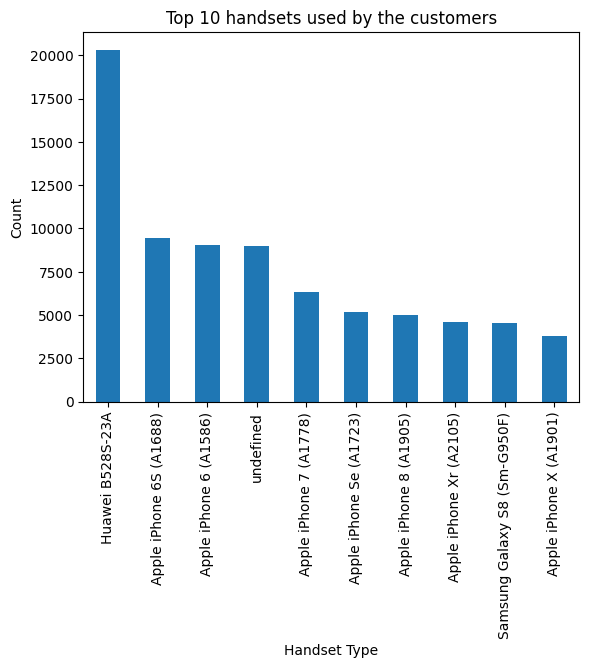

In [15]:
# Plot top 3 Handset Type through bar graph 
    
ax = data['Handset Type'].value_counts() \
       .head(10) \
       .plot (kind = 'bar',title = 'Top 10 handsets used by the customers')
ax.set_xlabel('Handset Type')  # set x label 
ax.set_ylabel('Count') #set y label
plt.show()
    

#### 2) Identify the top 3 handset manufacturers

In [13]:
# Top 3 handset manufactures

data['Handset Manufacturer'].value_counts()

Apple                                                   59565
Samsung                                                 40839
Huawei                                                  34423
undefined                                                8987
Sony Mobile Communications Ab                             980
Wiko Global Sasu                                          747
Xiaomi Communications Co Ltd                              397
Oneplus Technology (Shenzhen) Co Ltd                      342
Asustek                                                   285
Lenovo                                                    254
Tcl Communication Ltd                                     220
Crosscall                                                 202
Zte                                                       191
Microsoft Mobile Oy                                       187
Htc                                                       159
Hmd Global Oy                                             144
Sony Mob

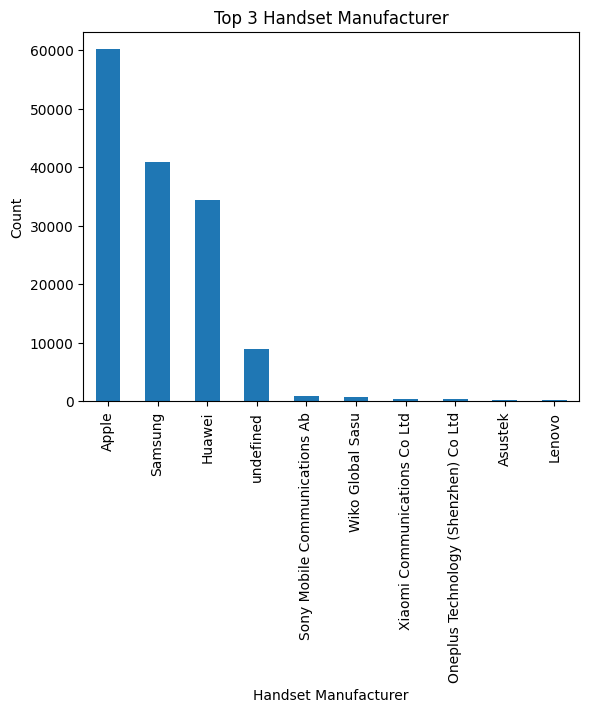

In [16]:
# plot top 3 Handset Manufacturer through bar graph

ax = data['Handset Manufacturer'].value_counts() \
      .head(10) \
       .plot(kind = 'bar',title = 'Top 3 Handset Manufacturer')

ax.set_xlabel('Handset Manufacturer')  #set x label
ax.set_ylabel('Count')  # set y label
plt.show()

#### 3) Identify the top 5 handsets / top 3 handset manufacturer

In [21]:
# Top 3 manufactureres

top_manufacturer =['Apple']

# Initialize a dictionary to store the result

top_apple_handsets ={}
# Loop through each manufacturer and find their top 5 handset

for manufacturer in top_manufacturer:
    top_handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_apple_handsets[manufacturer] =top_handsets
    
    #convert the result into dataframe
    top_apple_handsets = pd.DataFrame(top_apple_handsets)
    
# Top 5 handset manufactured by Apple
print('Top 5 Apple Handsets :')
top_apple_handsets

Top 5 Apple Handsets :


,Apple
Handset Type,
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993


In [18]:
top_manufacturer =['Samsung']

# Initialize a dictionary to store the result

top_Samsung_handsets ={}
# Loop through each manufacturer and find their top 5 handset

for manufacturer in top_manufacturer:
    top_handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_Samsung_handsets[manufacturer] =top_handsets
    
    #convert the result into dataframe
    top_Samsung_handsets = pd.DataFrame(top_Samsung_handsets)
    
# Top 5 handset manufactured by Samsung
print('Top 5 Samsung Handsets :')
top_Samsung_handsets

Top 5 Samsung Handsets :


,Samsung
Handset Type,
Samsung Galaxy S8 (Sm-G950F),4520
Samsung Galaxy A5 Sm-A520F,3724
Samsung Galaxy J5 (Sm-J530),3696
Samsung Galaxy J3 (Sm-J330),3484
Samsung Galaxy S7 (Sm-G930X),3199


In [22]:
top_manufacturer =['Huawei']

# Initialize a dictionary to store the result

top_Huawei_handsets ={}
# Loop through each manufacturer and find their top 5 handset

for manufacturer in top_manufacturer:
    top_handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_Huawei_handsets[manufacturer] =top_handsets
    
    #convert the result into dataframe
    top_Huawei_handsets = pd.DataFrame(top_Huawei_handsets)
    
# Top 5 handset manufactured by Huawei
print('Top 5 Huawei Handsets :')
top_Huawei_handsets

Top 5 Huawei Handsets :


,Huawei
Handset Type,
Huawei B528S-23A,19752
Huawei E5180,2079
Huawei P20 Lite Huawei Nova 3E,2021
Huawei P20,1480
Huawei Y6 2018,997


#### Finally pre-process the unprocessed data and write the cleaned data as new dataset for further analysis

In [24]:
# Step 1: Handle Missing Values
# Option 1: Drop rows with missing values (NaN)
df_cleaned = data.dropna()

# Option 2: Fill missing values with a specific value (e.g., 0 or mean of the column)
# df_cleaned = df.fillna(0)  # Example: Fill all NaN values with 0
# df_cleaned = df.fillna(df.mean())  # Example: Fill NaN with column mean for numerical columns

# Step 2: Remove Duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Step 3: Rename Columns (if necessary)
# Example: Rename column 'old_column_name' to 'new_column_name'
df_cleaned = df_cleaned.rename(columns={'old_column_name': 'new_column_name'})

# Step 4: Handle Outliers (optional)
# Example: Removing outliers based on z-score or IQR method
# This step is dependent on the specific dataset and columns

# Step 5: Convert Data Types (if necessary)
# Example: Convert a column to datetime
# df_cleaned['date_column'] = pd.to_datetime(df_cleaned['date_column'])

# Example: Convert a column to numeric (if it's stored as a string)
# df_cleaned['numeric_column'] = pd.to_numeric(df_cleaned['numeric_column'], errors='coerce')

# Step 6: Reset index (optional, useful if rows were dropped)
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned.head())

# Step 7: Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_telecom_dataset.csv', index=False)

print("\nCleaned data saved as 'cleaned_telecom_dataset.csv'.")


Cleaned Dataset:
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
1  1.304243e+19   4/17/2019 0:35     363.0   4/25/2019 4:52   691.0   
2  1.304243e+19  4/21/2019 10:09       1.0   4/25/2019 1:39   272.0   
3  1.304243e+19  4/21/2019 19:35     344.0   4/25/2019 2:59   259.0   
4  1.304243e+19   4/22/2019 1:17     301.0   4/25/2019 1:17   938.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0   889834.0  2.082020e+14   3.366447e+10  8.600910e+13            T21335C   
1   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
2   314961.0  2.082010e+14   3.366274e+10  3.528140e+13            T72937C   
3   285833.0  2.082020e+14   3.366917e+10  3.566260e+13            L41432B   
4   259201.0  2.082010e+14   3.366555e+10  8.637690e+13            T85779A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0            217.0    

#### Visualize the Cleaned Data

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19  4/15/2019 11:33     626.0  4/25/2019 18:44   542.0   
1  1.304243e+19   4/17/2019 0:35     363.0   4/25/2019 4:52   691.0   
2  1.304243e+19  4/21/2019 10:09       1.0   4/25/2019 1:39   272.0   
3  1.304243e+19  4/21/2019 19:35     344.0   4/25/2019 2:59   259.0   
4  1.304243e+19   4/22/2019 1:17     301.0   4/25/2019 1:17   938.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0   889834.0  2.082020e+14   3.366447e+10  8.600910e+13            T21335C   
1   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
2   314961.0  2.082010e+14   3.366274e+10  3.528140e+13            T72937C   
3   285833.0  2.082020e+14   3.366917e+10  3.566260e+13            L41432B   
4   259201.0  2.082010e+14   3.366555e+10  8.637690e+13            T85779A   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0            217.0              4.0     

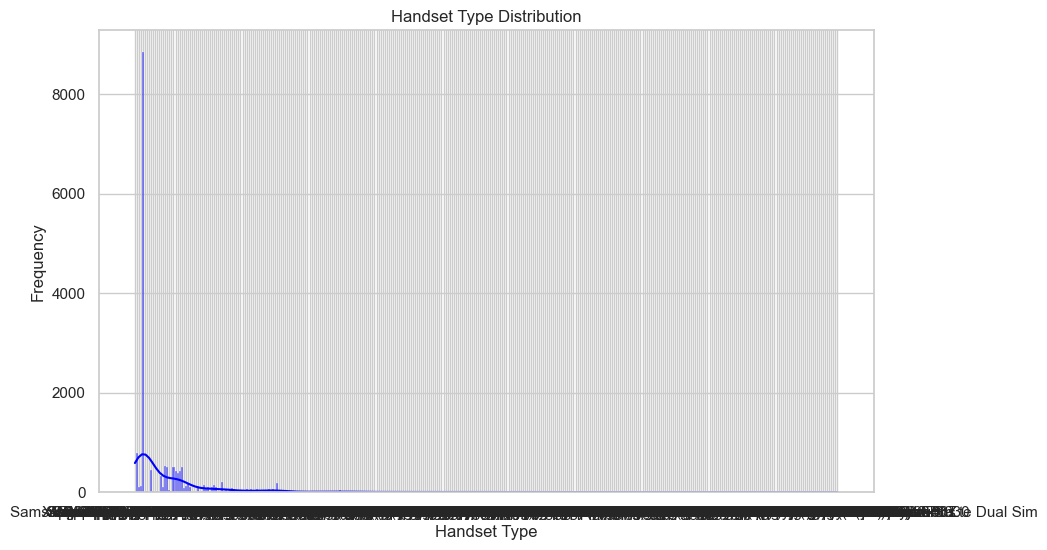

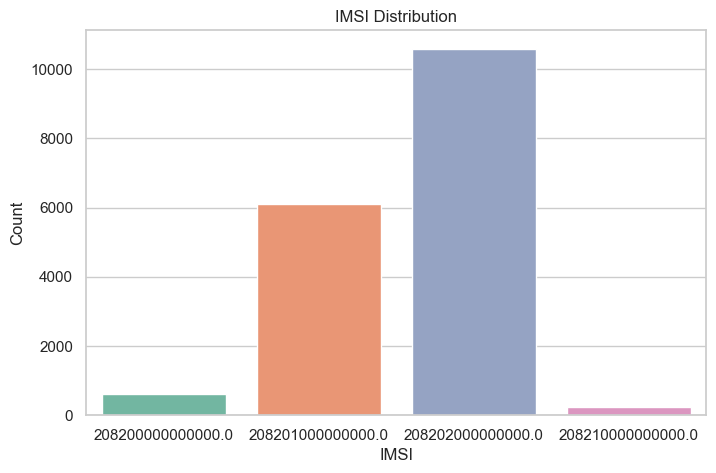

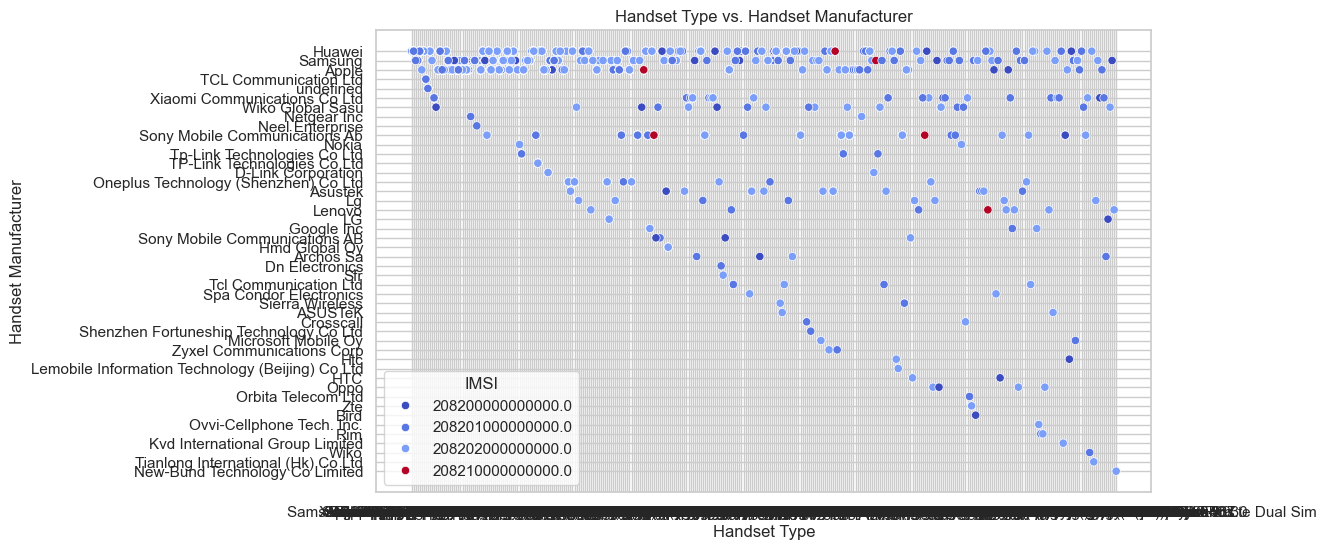

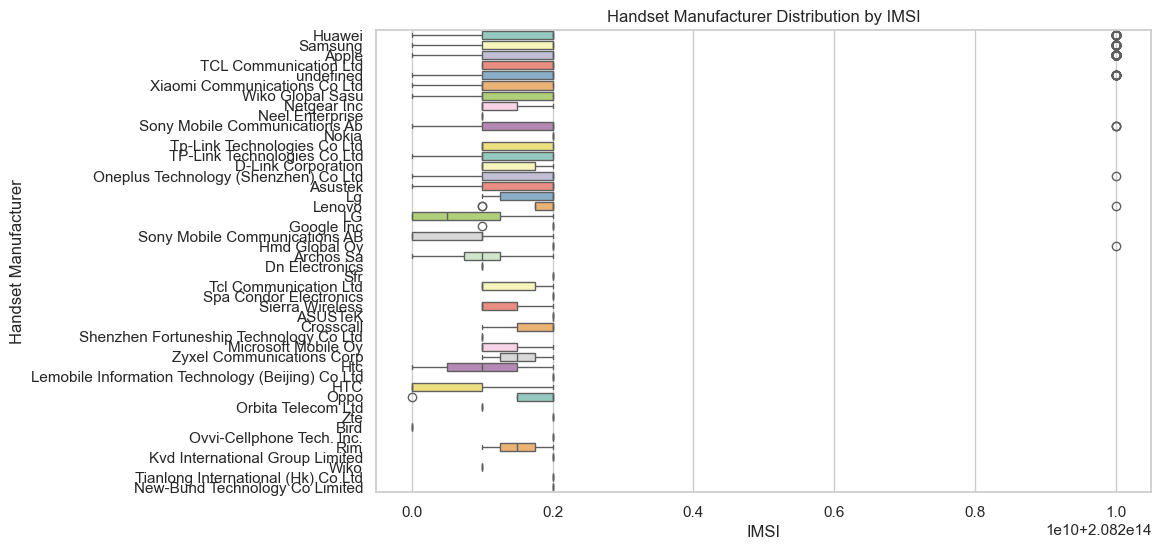

In [28]:
# Load the cleaned dataset
df_cleaned = pd.read_csv(r'E:\KAIM 2\KAIM 2 Week 2\resources\source codes\Telcom-Dataset-main\cleaned_telecom_dataset.csv')

# Display the first few rows of the cleaned data
print(df_cleaned.head())

# Set the style for the plots
sns.set(style="whitegrid")

# Example 1: Distribution of Numerical Columns (e.g., Handset Type, Handset Manufacturer)
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Handset Type'], kde=True, bins=10, color='blue')
plt.title('Handset Type Distribution')
plt.xlabel('Handset Type')
plt.ylabel('Frequency')
plt.show()

# Example 2: Bar Plot for Categorical Data (e.g., IMSI)
plt.figure(figsize=(8, 5))
sns.countplot(x='IMSI', data=df_cleaned, palette='Set2')
plt.title('IMSI Distribution')
plt.xlabel('IMSI')
plt.ylabel('Count')
plt.show()

# Example 3: Scatter Plot for Relationship between Handset Type and Handset Manufacturer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Handset Type', y='Handset Manufacturer', data=df_cleaned, hue='IMSI', palette='coolwarm')
plt.title('Handset Type vs. Handset Manufacturer')
plt.xlabel('Handset Type')
plt.ylabel('Handset Manufacturer')
plt.show()

# Example 4: Boxplot to Show Handset Manufacturer Distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='IMSI', y='Handset Manufacturer', data=df_cleaned, palette='Set3')
plt.title('Handset Manufacturer Distribution by IMSI')
plt.xlabel('IMSI')
plt.ylabel('Handset Manufacturer')
plt.show()


#### Short interpretation and recommendation to marketing teams based on the above plots

The figures above show the distribution of handset manufacturers by IMSI.  Each bar represents a manufacturer, and the height of the bar represents the percentage of handsets from that manufacturer that use a particular IMSI.  

Here's an interpretation:

* **Diverse Manufacturer Base:** The plot shows that the company's products are used by a wide range of manufacturers, from well-known brands like Samsung and Huawei to smaller, lesser-known companies. This suggests a broad target market and a potential for growth.
* **IMSI Concentration:**  The plot highlights that a significant portion of handsets from certain manufacturers use specific IMSIs. For example, a large percentage of handsets from "Lemobile Information Technology (Beijing) Co Ltd" use IMSI 208201000000000.0. This suggests that the company's products are targeted towards specific market segments or that certain manufacturers have a preference for particular IMSIs.
* **Potential for Targeted Marketing:**  The plot can be used to identify potential opportunities for targeted marketing.  For example, the company could focus its marketing efforts on manufacturers that have a high percentage of handsets using a particular IMSI. 

Here are some recommendations for the marketing team:

* **Target Specific Manufacturers:**  Identify specific manufacturers that have a high percentage of handsets using a particular IMSI and tailor messaging to their needs. This might involve highlighting features that are particularly relevant to their target audience.
* **Develop Targeted Marketing Campaigns:**  Create marketing campaigns that are specifically designed to appeal to manufacturers that use a particular IMSI. This could involve highlighting the benefits of using that IMSI or offering special promotions to manufacturers that use it.
* **Explore Partnerships:**  Explore partnerships with manufacturers that have a high percentage of handsets using a particular IMSI. This could involve joint marketing campaigns, co-branding opportunities, or other collaborations.
* **Monitor Market Trends:**  Monitor trends in the handset market to identify new opportunities and adjust marketing strategies accordingly. This could involve researching emerging technologies, understanding consumer preferences, and keeping track of competitors' activities.

By analyzing the data in the plot and following these recommendations, the marketing team can develop a more effective marketing strategy that will help the company achieve its business goals.